In [3]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version


# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

from numpy import loadtxt
from tensorflow.keras.models import load_model


from collections import Counter
from numpy import * 

import xgboost
import shap
import shap 
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPRegressor 
from sklearn.pipeline import make_pipeline 
from sklearn.datasets import load_diabetes 
from sklearn.model_selection import train_test_split

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pandas: 1.4.4
xarray: 0.20.1
geopandas: 1.22.3
tensorflow: 2.9.1
Tensorflow/Keras: 2.9.0
pandas: 1.4.4
sklearn: 1.1.2
plotly: 5.9.0
/Users/3rfanian/P_main


In [4]:
test_set = pd.read_csv('Real_Tomorrow/test_real_tom_target.csv')
validation_set = pd.read_csv('Real_Tomorrow/validation_real_tom_target.csv')
training_set = pd.read_csv('Real_Tomorrow/training_real_tom_target.csv')
#validation data set
validation_set_wt = validation_set.drop(columns=['Unnamed: 0'])
validation_set_wt
test_set_wt = test_set.drop(columns=['Unnamed: 0'])
test_set_wt
#validation data set
training_set_wt = training_set.drop(columns=['Unnamed: 0'])
training_set_wt
##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
print (x_training)
y_training = training_set_wt[['Real_tom_lsm']]
print ("******training target******")
print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
print (x_test)
y_test = test_set_wt[['Real_tom_lsm']]
print ("******test target******")
print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
print (x_validation)
y_validation = validation_set_wt[['Real_tom_lsm']]
print ("******validation target******")
print (y_validation)

******training features******
               vo          r      u_200     u_850      v_200     v_850  \
0        0.000007  80.761185   1.909660 -3.323872   1.687164 -1.823624   
1        0.000004  80.703650   1.165733 -2.844494   1.060593 -1.991425   
2        0.000007  78.231514  -1.311676 -2.125244   3.280617 -1.931789   
3        0.000010  79.631010  -3.777573 -1.122395   5.743889 -1.243538   
4        0.000010  71.573875  -5.734505 -1.362953   6.514030 -0.954163   
...           ...        ...        ...       ...        ...       ...   
4268766  0.000015  26.797535  25.075424 -3.653679  -1.221291  1.515594   
4268767 -0.000006  27.766910  24.175919 -2.866638  -6.724304  0.861771   
4268768  0.000010  29.111805  24.655510 -2.809170 -10.138817  0.051220   
4268769  0.000006  27.833050  25.088104 -2.730087 -11.036507  0.666927   
4268770  0.000007  15.843884  24.510345 -3.213837 -10.213325 -0.098499   

               ttr        sst  
0       -247.54074    0.00000  
1       -240.0059

In [5]:
def SHAP_model(model,nodes,s_row = 0 ,f_row = 5000):
    if model == 'smote' and nodes == 512:
        # load model
        model = load_model('models/model_Smoote_baseline_512n_1l')
        # print summary
        model.summary()
    elif model == 'smote' and nodes == 8:
        # load model
        model = load_model('models/model_FFNN_SMOOTE_8n_10e')
        # print summary
        model.summary()
    elif model == 'smote' and nodes == 256:
        # load model
        model = load_model('models/model_Smoote_baseline_256n_4l.h5')
        # print summary
        model.summary()
    else:
        print ('there is no model')
    
    x_train = x_training.iloc[s_row:f_row,:].values
    x_testt = x_test.iloc[s_row:f_row,:].values
    
    x_train1 = x_training.iloc[s_row:f_row,:]
    x_testt1 = x_test.iloc[s_row:f_row,:]
    # compute SHAP values / sample
    explainer1 = shap.DeepExplainer(model, x_train)
    shap_values1 = explainer1.shap_values(x_testt)
    
    # compute SHAP values / dataset
    explainer2 = shap.Explainer(model, x_train1)
    shap_values2 = explainer2(x_train1)
    #shap_obj = explainer(x_train)
    return (explainer1, shap_values1,explainer2,shap_values2)

# Smote 256n,4l

In [13]:
test = SHAP_model('smote',256)
explainer = test[0]
shap_values = test[1]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 Hidden-Layer1 (Dense)       (None, 256)               2304      
                                                                 
 Hidden-Layer2 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer3 (Dense)       (None, 256)               65792     
                                                                 
 Hidden-Layer4 (Dense)       (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 Output-Layer (Dense)        (None, 1)                

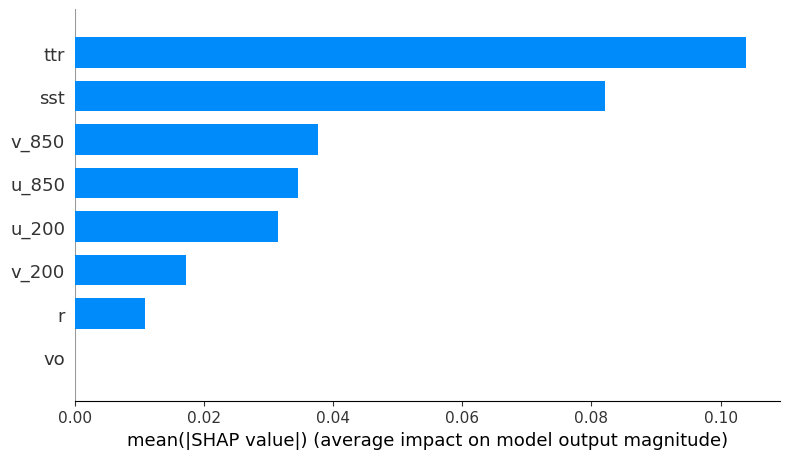

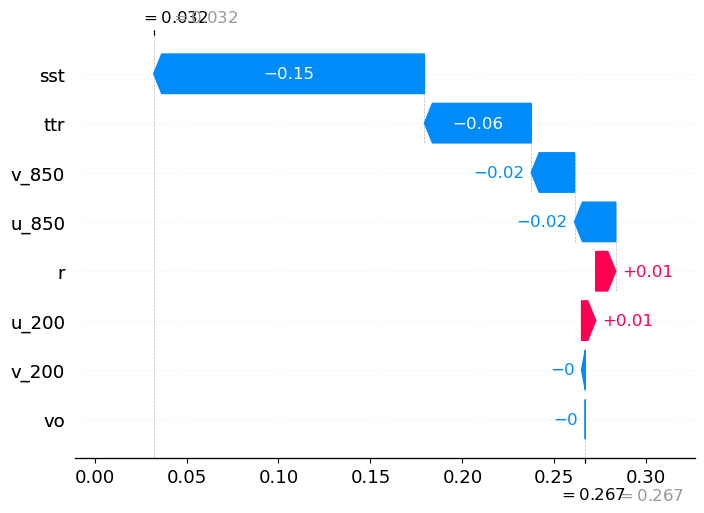

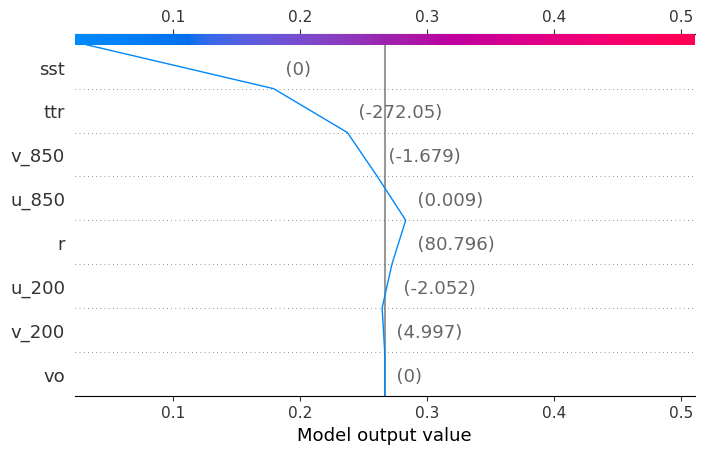

In [11]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = x_test.columns)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = x_test.columns)
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.iloc[0,:], feature_names = x_test.columns.tolist())

shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.columns)

# Smote 512n,1l

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 Hidden-Layer (Dense)        (None, 512)               4608      
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 Output-Layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


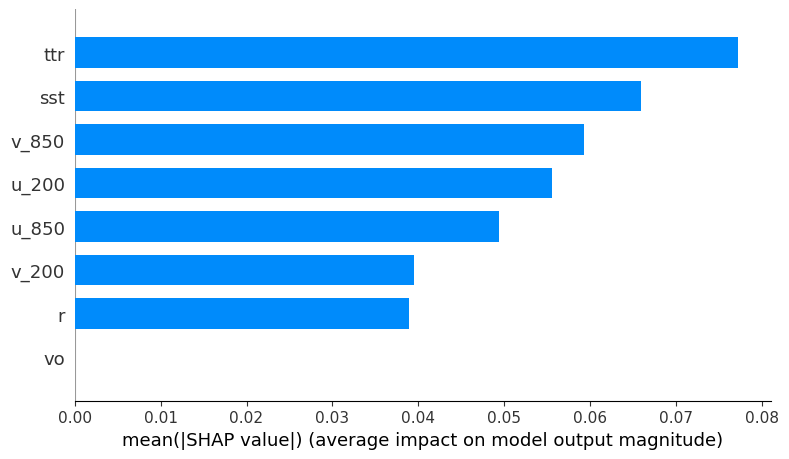

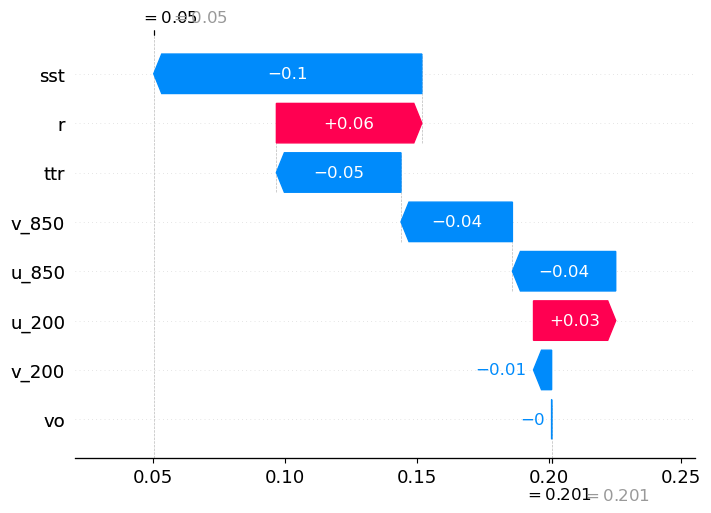

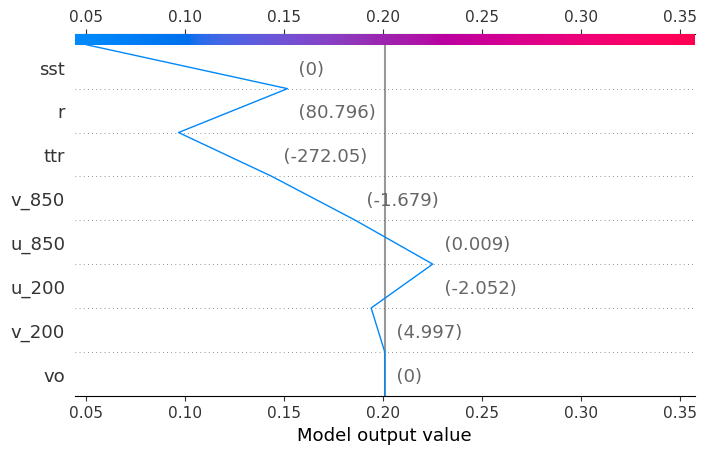

In [14]:
test = SHAP_model('smote',512)
explainer = test[0]
shap_values = test[1]

shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = x_test.columns)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = x_test.columns)
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.iloc[0,:], feature_names = x_test.columns.tolist())

shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.columns)

# Smote 8n,1l


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 Hidden-Layer (Dense)        (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 Output-Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


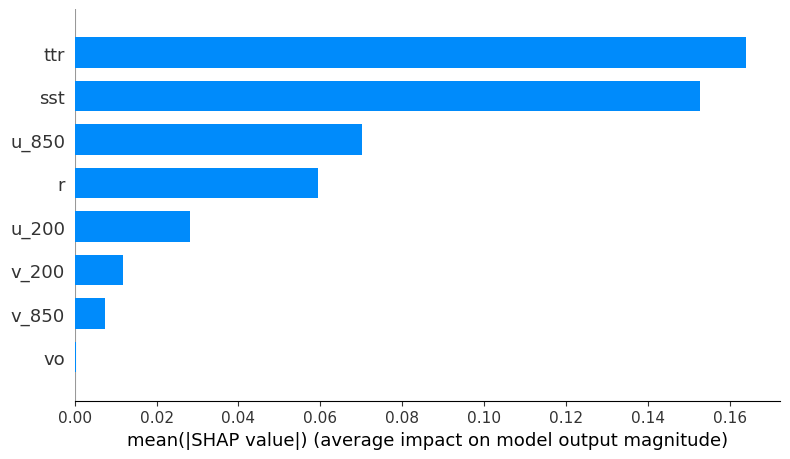

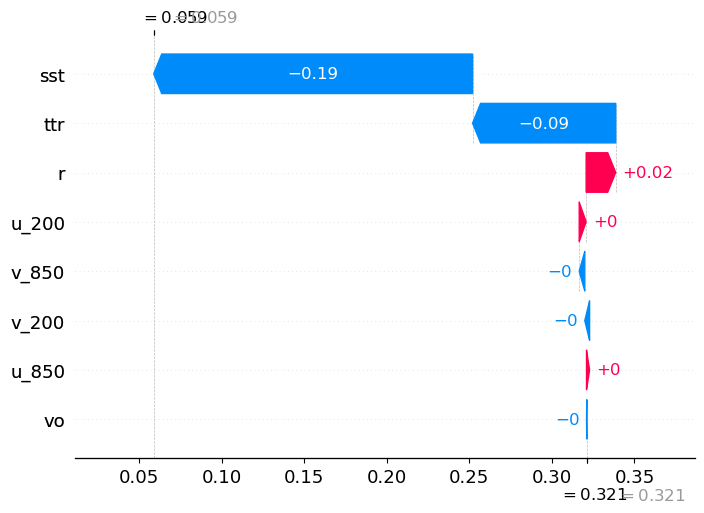

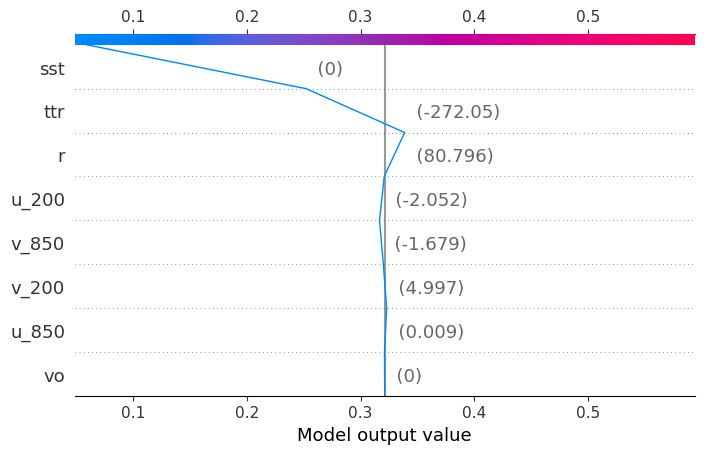

In [15]:
test = SHAP_model('smote',8)
explainer = test[0]
shap_values = test[1]

shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = x_test.columns)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = x_test.columns)
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.iloc[0,:], feature_names = x_test.columns.tolist())

shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.columns)

# Smote with 512n

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 Hidden-Layer (Dense)        (None, 512)               4608      
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 Output-Layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


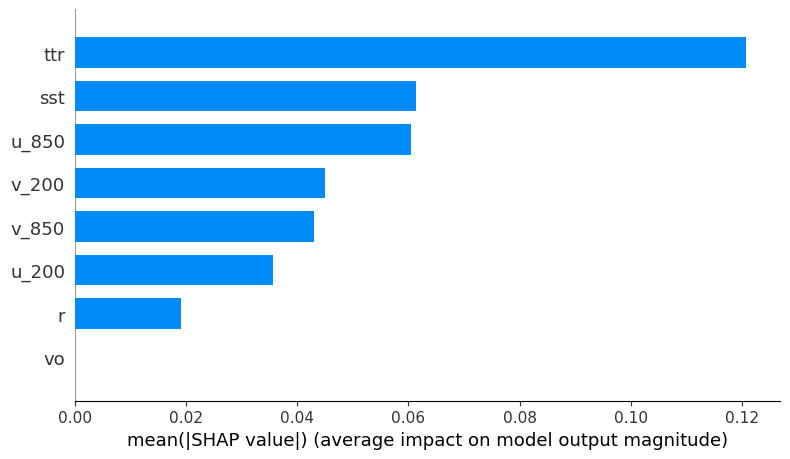

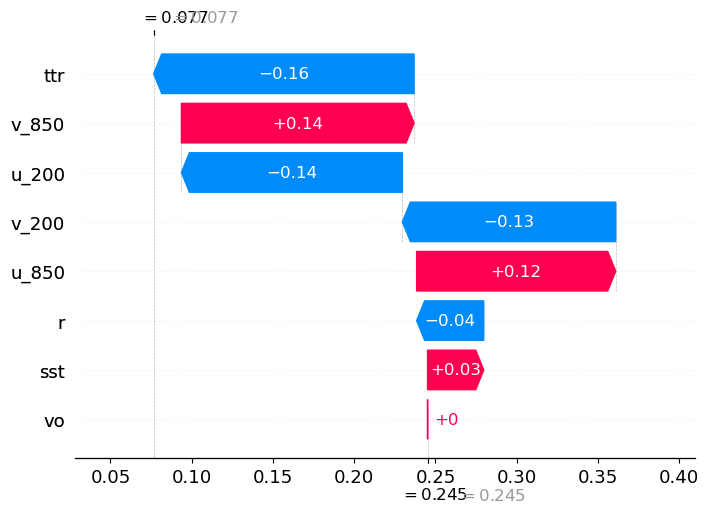

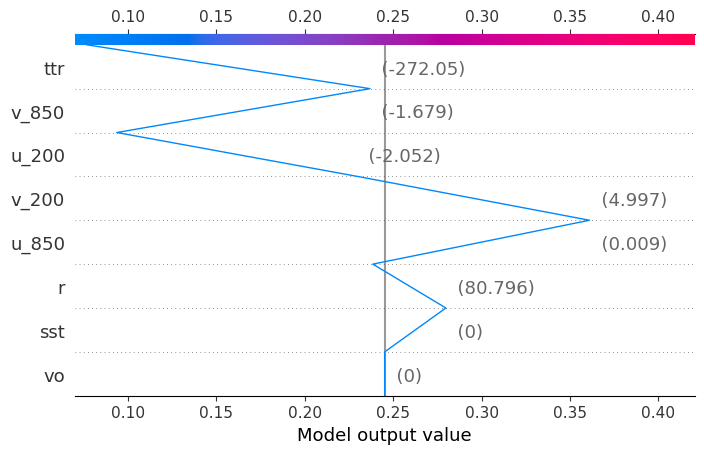

In [15]:
test = SHAP_model('smote',512,10,100)
explainer = test[0]
shap_values = test[1]
x_train = test[2]
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = x_test.columns)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = x_test.columns)
shap.decision_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.iloc[0,:], feature_names = x_test.columns.tolist())

shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy(), shap_values[0][0], features = x_test.columns)

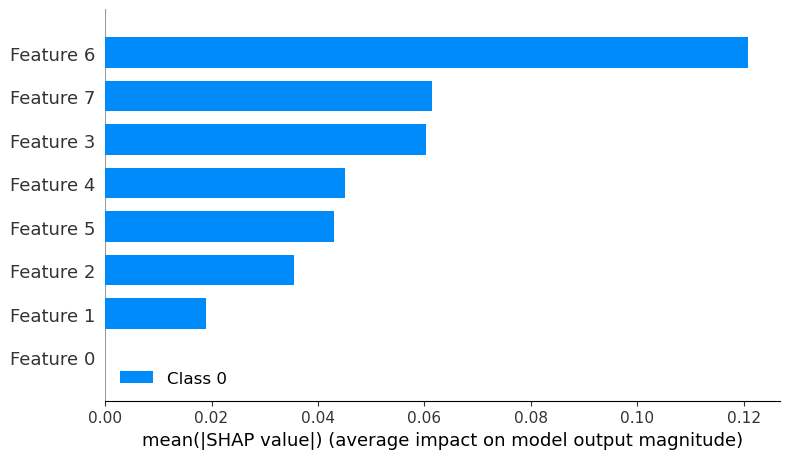

In [16]:

shap.summary_plot(shap_values,x_train)


In [19]:
X

Age  Workclass  Education-Num  Marital Status  Occupation  \
0      39.0          7           13.0               4           1   
1      50.0          6           13.0               2           4   
2      38.0          4            9.0               0           6   
3      53.0          4            7.0               2           6   
4      28.0          4           13.0               2          10   
...     ...        ...            ...             ...         ...   
32556  27.0          4           12.0               2          13   
32557  40.0          4            9.0               2           7   
32558  58.0          4            9.0               6           1   
32559  22.0          4            9.0               4           1   
32560  52.0          5            9.0               2           4   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
0                 0     4    1        2174.0           0.0            40.0   
1                 4     4    1           0.0           0.0            13.0   
2                 0     4    1           0.0           0.0            40.0   
3                 4     2    1           0.0           0.0            40.0   
4                 5     2    0           0.0           0.0            40.0   
...             ...   ...  ...           ...           ...             ...   
32556             5     4    0           0.0           0.0            38.0   
32557             4     4    1           0.0           0.0            40.0   
32558             1     4    0           0.0           0.0            40.0   
32559             3     4    1           0.0           0.0            20.0   
32560             5     4    0       15024.0           0.0            40.0   

       Country  
0           39  
1           39  
2           39  
3           39  
4            5  
...        ...  
32556       39  
32557       39  
32558       39  
32559       39  
32560       39  

[32561 rows x 12 columns]

In [21]:
x_training.iloc[0:3,:]

vo          r     u_200     u_850     v_200     v_850        ttr  sst
0  0.000007  80.761185  1.909660 -3.323872  1.687164 -1.823624 -247.54074  0.0
1  0.000004  80.703650  1.165733 -2.844494  1.060593 -1.991425 -240.00592  0.0
2  0.000007  78.231514 -1.311676 -2.125244  3.280617 -1.931789 -223.76889  0.0

# Beeswarm


In [6]:
model = load_model('models/model_Smoote_baseline_256n_4l.h5')
x_train1 = x_training
print(x_train1)
x_testt1 = x_test.iloc[1:10,]
type(x_testt1)

               vo          r      u_200     u_850      v_200     v_850  \
0        0.000007  80.761185   1.909660 -3.323872   1.687164 -1.823624   
1        0.000004  80.703650   1.165733 -2.844494   1.060593 -1.991425   
2        0.000007  78.231514  -1.311676 -2.125244   3.280617 -1.931789   
3        0.000010  79.631010  -3.777573 -1.122395   5.743889 -1.243538   
4        0.000010  71.573875  -5.734505 -1.362953   6.514030 -0.954163   
...           ...        ...        ...       ...        ...       ...   
4268766  0.000015  26.797535  25.075424 -3.653679  -1.221291  1.515594   
4268767 -0.000006  27.766910  24.175919 -2.866638  -6.724304  0.861771   
4268768  0.000010  29.111805  24.655510 -2.809170 -10.138817  0.051220   
4268769  0.000006  27.833050  25.088104 -2.730087 -11.036507  0.666927   
4268770  0.000007  15.843884  24.510345 -3.213837 -10.213325 -0.098499   

               ttr        sst  
0       -247.54074    0.00000  
1       -240.00592    0.00000  
2       -223.76

2022-10-27 12:07:23.231142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


pandas.core.frame.DataFrame

In [7]:
explainer = shap.KernelExplainer(model.predict,x_train1)


133400/133400 [==============================] - 83s 623us/step


Using 4268771 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [8]:
shap_values = explainer.shap_values(x_train1.iloc[1:10,:], nsamples=10)


  0%|          | 0/9 [00:00<?, ?it/s]

1333991/1333991 [==============================] - 841s 630us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=4.688e-04, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=4.012e-05, with an active set of 7 regressors

1333991/1333991 [==============================] - 850s 637us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 22%|██▏       | 2/9 [59:03<3:26:55, 1773.67s/it]

1333991/1333991 [==============================] - 834s 625us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.614e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.516e-04, with an active set of 6 regressors

1333991/1333991 [==============================] - 840s 629us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 44%|████▍     | 4/9 [1:57:56<2:27:24, 1768.87s/it]

1333991/1333991 [==============================] - 837s 627us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.925e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.925e-03, with an active set of 1 regressors

1333991/1333991 [==============================] - 840s 629us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
 67%|██████▋   | 6/9 [2:56:38<1:28:13, 1764.42s/it]

1333991/1333991 [==============================] - 840s 629us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.535e-04, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.970e-04, with an active set of 3 regressors

1333991/1333991 [==============================] - 842s 631us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.353e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=2.550e-04, with an active set of 6 regressors

1333991/1333991 [==============================] - 860s 644us/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
100%|██████████| 9/9 [4:25:34<00:00, 1770.51s/it]


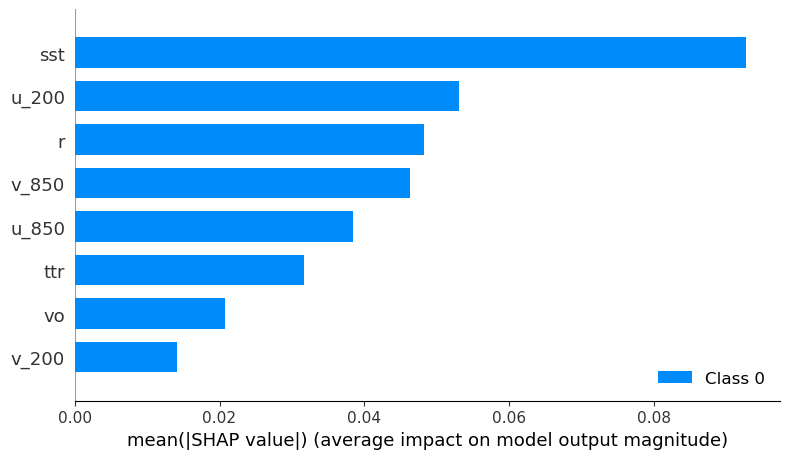

In [14]:
#shap.summary_plot(shap_values,x_testt1,feature_names = x_train1.columns)
shap.summary_plot (shap_values, x_testt1, max_display=x_testt1.shape[1]) 


In [15]:
np.save('my_array_temp.npy', shap_values)

In [23]:
shap.initjs()

In [34]:
shap_values

[array([[ 2.14045350e-01, -2.11501004e-02,  4.66721751e-02,
          2.28475677e-02, -1.08748824e-02, -1.92050793e-02,
         -3.46666728e-03, -4.41675941e-04,  3.20476249e-02,
          2.89423189e-03, -1.00742194e-01, -2.77881175e-02,
         -1.40882409e-02, -2.55323026e-03,  1.52616934e-03,
         -4.84691547e-05, -4.00852716e-04,  1.97639121e-03],
        [-8.83391460e-02, -2.00116905e-02, -2.76173642e-03,
         -1.32580228e-02,  8.07933902e-03, -1.10261221e-02,
         -2.01306572e-02, -8.01843773e-03, -2.54964442e-02,
         -1.17154873e-02,  1.78164245e-02,  4.41079660e-03,
          5.46251446e-02,  8.57632567e-03, -2.61282228e-03,
         -1.52447356e-04, -9.85215282e-04,  2.25019885e-03],
        [-7.57556968e-02, -1.38656436e-02, -4.10659229e-02,
         -5.34750073e-02, -7.84091722e-03, -1.28944568e-02,
         -9.91930022e-03,  2.58313452e-03, -1.01171521e-02,
          4.88233879e-02, -2.52599033e-02, -8.08380312e-03,
          3.34446095e-02,  2.47304746e

In [29]:
train_X.shape

(96, 18)

In [42]:
X100 = shap.utils.sample(x_train1, 10000)

In [43]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X100)

29/29 [==============================] - 0s 675us/step


Exact explainer:   0%|          | 15/10000 [00:00<?, ?it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:   0%|          | 17/10000 [00:11<1:12:44,  2.29it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:   0%|          | 18/10000 [00:12<1:27:34,  1.90it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:   0%|          | 19/10000 [00:12<1:37:20,  1.71it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:   0%|          | 20/10000 [00:13<1:43:53,  1.60it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   0%|          | 21/10000 [00:14<1:49:42,  1.52it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   0%|          | 22/10000 [00:14<1:51:49,  1.49it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   0%|          | 23/10000 [00:15<1:53:15,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   0%|          | 24/10000 [00:16<1:53:49,  1.46it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:   0%|          | 25/10000 [00:16<1:52:06,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   0%|          | 26/10000 [00:17<1:53:55,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   0%|          | 27/10000 [00:18<1:49:22,  1.52it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:   0%|          | 28/10000 [00:18<1:51:12,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   0%|          | 29/10000 [00:19<1:47:46,  1.54it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   0%|          | 30/10000 [00:20<1:50:01,  1.51it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:   0%|          | 31/10000 [00:20<1:52:01,  1.48it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   0%|          | 32/10000 [00:21<1:53:22,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   0%|          | 33/10000 [00:22<1:49:38,  1.51it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   0%|          | 34/10000 [00:23<2:30:18,  1.11it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:   0%|          | 35/10000 [00:24<2:36:23,  1.06it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   0%|          | 36/10000 [00:25<2:20:44,  1.18it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:   0%|          | 37/10000 [00:26<2:12:03,  1.26it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   0%|          | 38/10000 [00:26<2:07:56,  1.30it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:   0%|          | 39/10000 [00:27<2:06:53,  1.31it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   0%|          | 40/10000 [00:28<2:04:55,  1.33it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   0%|          | 41/10000 [00:28<2:02:23,  1.36it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   0%|          | 42/10000 [00:29<2:00:03,  1.38it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   0%|          | 43/10000 [00:30<1:58:58,  1.39it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   0%|          | 44/10000 [00:30<1:57:49,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   0%|          | 45/10000 [00:31<1:56:48,  1.42it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   0%|          | 46/10000 [00:32<1:51:48,  1.48it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   0%|          | 47/10000 [00:32<1:48:10,  1.53it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:   0%|          | 48/10000 [00:33<1:50:36,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   0%|          | 49/10000 [00:34<1:51:47,  1.48it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   0%|          | 50/10000 [00:34<1:52:22,  1.48it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   1%|          | 51/10000 [00:35<1:48:50,  1.52it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   1%|          | 52/10000 [00:36<1:50:18,  1.50it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   1%|          | 53/10000 [00:36<1:51:49,  1.48it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   1%|          | 54/10000 [00:37<1:47:56,  1.54it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   1%|          | 55/10000 [00:38<1:50:02,  1.51it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   1%|          | 56/10000 [00:38<1:46:47,  1.55it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   1%|          | 57/10000 [00:39<1:43:37,  1.60it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   1%|          | 58/10000 [00:40<1:46:49,  1.55it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   1%|          | 59/10000 [00:40<1:49:22,  1.51it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:   1%|          | 60/10000 [00:41<1:51:28,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   1%|          | 61/10000 [00:42<1:52:48,  1.47it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   1%|          | 62/10000 [00:42<1:53:42,  1.46it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   1%|          | 63/10000 [00:43<1:55:07,  1.44it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   1%|          | 64/10000 [00:44<1:54:53,  1.44it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   1%|          | 65/10000 [00:45<1:55:04,  1.44it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   1%|          | 66/10000 [00:45<1:50:12,  1.50it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   1%|          | 67/10000 [00:46<1:52:51,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   1%|          | 68/10000 [00:47<1:53:11,  1.46it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   1%|          | 69/10000 [00:47<1:53:23,  1.46it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   1%|          | 70/10000 [00:48<1:53:47,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   1%|          | 71/10000 [00:49<1:54:13,  1.45it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   1%|          | 72/10000 [00:49<1:54:24,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   1%|          | 73/10000 [00:50<1:54:55,  1.44it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   1%|          | 74/10000 [00:51<1:54:57,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   1%|          | 75/10000 [00:51<1:55:27,  1.43it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   1%|          | 76/10000 [00:52<1:55:05,  1.44it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:   1%|          | 77/10000 [00:53<1:50:30,  1.50it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   1%|          | 78/10000 [00:53<1:51:44,  1.48it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:   1%|          | 79/10000 [00:54<1:52:03,  1.48it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:   1%|          | 80/10000 [00:55<1:53:33,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   1%|          | 81/10000 [00:55<1:49:29,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   1%|          | 82/10000 [00:56<1:51:24,  1.48it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   1%|          | 83/10000 [00:57<1:52:21,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   1%|          | 84/10000 [00:57<1:53:17,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   1%|          | 85/10000 [00:58<1:54:03,  1.45it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   1%|          | 86/10000 [00:59<1:54:45,  1.44it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   1%|          | 87/10000 [01:00<1:55:27,  1.43it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   1%|          | 88/10000 [01:00<1:55:32,  1.43it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   1%|          | 89/10000 [01:01<1:55:16,  1.43it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   1%|          | 90/10000 [01:02<1:50:40,  1.49it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   1%|          | 91/10000 [01:02<1:52:03,  1.47it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:   1%|          | 92/10000 [01:03<1:53:11,  1.46it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   1%|          | 93/10000 [01:04<1:53:41,  1.45it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   1%|          | 94/10000 [01:04<1:53:51,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   1%|          | 95/10000 [01:05<1:49:19,  1.51it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   1%|          | 96/10000 [01:06<1:46:37,  1.55it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   1%|          | 97/10000 [01:06<1:49:00,  1.51it/s]

29/29 [==============================] - 0s 614us/step


Exact explainer:   1%|          | 98/10000 [01:07<1:50:48,  1.49it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   1%|          | 99/10000 [01:08<1:52:39,  1.46it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   1%|          | 100/10000 [01:08<1:48:56,  1.51it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   1%|          | 101/10000 [01:09<1:50:26,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   1%|          | 102/10000 [01:10<1:46:34,  1.55it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   1%|          | 103/10000 [01:10<1:48:54,  1.51it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   1%|          | 104/10000 [01:11<1:50:14,  1.50it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:   1%|          | 105/10000 [01:12<1:46:57,  1.54it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   1%|          | 106/10000 [01:12<1:48:55,  1.51it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   1%|          | 107/10000 [01:13<1:45:44,  1.56it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   1%|          | 108/10000 [01:13<1:43:26,  1.59it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   1%|          | 109/10000 [01:14<1:47:21,  1.54it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   1%|          | 110/10000 [01:15<1:49:14,  1.51it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   1%|          | 111/10000 [01:15<1:45:59,  1.55it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   1%|          | 112/10000 [01:16<1:48:48,  1.51it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   1%|          | 113/10000 [01:17<1:49:58,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   1%|          | 114/10000 [01:17<1:50:43,  1.49it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   1%|          | 115/10000 [01:18<1:51:18,  1.48it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   1%|          | 116/10000 [01:19<1:51:44,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   1%|          | 117/10000 [01:20<1:52:08,  1.47it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   1%|          | 118/10000 [01:20<1:52:37,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   1%|          | 119/10000 [01:21<1:52:55,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   1%|          | 120/10000 [01:22<1:47:57,  1.53it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   1%|          | 121/10000 [01:22<1:49:49,  1.50it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   1%|          | 122/10000 [01:23<1:46:43,  1.54it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   1%|          | 123/10000 [01:23<1:44:43,  1.57it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:   1%|          | 124/10000 [01:24<1:47:45,  1.53it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   1%|▏         | 125/10000 [01:25<1:44:41,  1.57it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   1%|▏         | 126/10000 [01:25<1:46:56,  1.54it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   1%|▏         | 127/10000 [01:26<1:49:05,  1.51it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   1%|▏         | 128/10000 [01:27<1:46:08,  1.55it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   1%|▏         | 129/10000 [01:27<1:44:29,  1.57it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   1%|▏         | 130/10000 [01:28<1:43:12,  1.59it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   1%|▏         | 131/10000 [01:29<1:46:11,  1.55it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   1%|▏         | 132/10000 [01:29<1:48:12,  1.52it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   1%|▏         | 133/10000 [01:30<1:49:46,  1.50it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   1%|▏         | 134/10000 [01:31<1:46:10,  1.55it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   1%|▏         | 135/10000 [01:31<1:43:28,  1.59it/s]

29/29 [==============================] - 0s 639us/step


Exact explainer:   1%|▏         | 136/10000 [01:32<1:46:16,  1.55it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   1%|▏         | 137/10000 [01:33<1:48:22,  1.52it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   1%|▏         | 138/10000 [01:33<1:50:07,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   1%|▏         | 139/10000 [01:34<1:49:44,  1.50it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:   1%|▏         | 140/10000 [01:34<1:46:01,  1.55it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   1%|▏         | 141/10000 [01:35<1:48:00,  1.52it/s]

29/29 [==============================] - 0s 632us/step


Exact explainer:   1%|▏         | 142/10000 [01:36<1:44:34,  1.57it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   1%|▏         | 143/10000 [01:36<1:46:47,  1.54it/s]

29/29 [==============================] - 0s 630us/step


Exact explainer:   1%|▏         | 144/10000 [01:37<1:48:29,  1.51it/s]

29/29 [==============================] - 0s 638us/step


Exact explainer:   1%|▏         | 145/10000 [01:38<1:49:33,  1.50it/s]

29/29 [==============================] - 0s 639us/step


Exact explainer:   1%|▏         | 146/10000 [01:38<1:45:41,  1.55it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   1%|▏         | 147/10000 [01:39<1:43:07,  1.59it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   1%|▏         | 148/10000 [01:40<1:45:58,  1.55it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:   1%|▏         | 149/10000 [01:40<1:50:38,  1.48it/s]

29/29 [==============================] - 0s 637us/step


Exact explainer:   2%|▏         | 150/10000 [01:41<1:47:18,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   2%|▏         | 151/10000 [01:42<1:44:06,  1.58it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   2%|▏         | 152/10000 [01:42<1:41:55,  1.61it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   2%|▏         | 153/10000 [01:43<1:44:57,  1.56it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   2%|▏         | 154/10000 [01:44<1:48:27,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   2%|▏         | 155/10000 [01:44<1:49:33,  1.50it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   2%|▏         | 156/10000 [01:45<1:50:35,  1.48it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   2%|▏         | 157/10000 [01:46<1:51:00,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   2%|▏         | 158/10000 [01:46<1:52:55,  1.45it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:   2%|▏         | 159/10000 [01:47<1:53:35,  1.44it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:   2%|▏         | 160/10000 [01:48<1:58:34,  1.38it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   2%|▏         | 161/10000 [01:48<1:54:09,  1.44it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   2%|▏         | 162/10000 [01:49<2:04:12,  1.32it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   2%|▏         | 163/10000 [01:50<2:13:41,  1.23it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:   2%|▏         | 164/10000 [01:51<2:09:52,  1.26it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:   2%|▏         | 165/10000 [01:52<2:11:03,  1.25it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:   2%|▏         | 166/10000 [01:53<2:11:45,  1.24it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:   2%|▏         | 167/10000 [01:53<2:06:35,  1.29it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   2%|▏         | 168/10000 [01:54<2:03:12,  1.33it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:   2%|▏         | 169/10000 [01:55<1:55:48,  1.41it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   2%|▏         | 170/10000 [01:55<1:56:45,  1.40it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   2%|▏         | 171/10000 [01:56<1:56:26,  1.41it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   2%|▏         | 172/10000 [01:57<1:55:40,  1.42it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:   2%|▏         | 173/10000 [01:58<1:56:44,  1.40it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   2%|▏         | 174/10000 [01:58<1:56:44,  1.40it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:   2%|▏         | 175/10000 [01:59<2:04:20,  1.32it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   2%|▏         | 176/10000 [02:00<2:06:02,  1.30it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   2%|▏         | 177/10000 [02:01<2:01:49,  1.34it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   2%|▏         | 178/10000 [02:01<1:58:51,  1.38it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   2%|▏         | 179/10000 [02:02<1:52:15,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   2%|▏         | 180/10000 [02:03<1:53:47,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   2%|▏         | 181/10000 [02:03<1:48:55,  1.50it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   2%|▏         | 182/10000 [02:04<1:52:16,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   2%|▏         | 183/10000 [02:05<1:53:22,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   2%|▏         | 184/10000 [02:05<1:52:52,  1.45it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:   2%|▏         | 185/10000 [02:06<1:55:53,  1.41it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:   2%|▏         | 186/10000 [02:07<2:00:24,  1.36it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   2%|▏         | 187/10000 [02:08<2:02:24,  1.34it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   2%|▏         | 188/10000 [02:08<2:01:54,  1.34it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   2%|▏         | 189/10000 [02:09<2:00:47,  1.35it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   2%|▏         | 190/10000 [02:10<2:01:08,  1.35it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   2%|▏         | 191/10000 [02:11<2:01:00,  1.35it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   2%|▏         | 192/10000 [02:11<1:54:33,  1.43it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:   2%|▏         | 193/10000 [02:12<1:50:57,  1.47it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   2%|▏         | 194/10000 [02:13<1:54:19,  1.43it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   2%|▏         | 195/10000 [02:13<1:55:38,  1.41it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   2%|▏         | 196/10000 [02:14<1:52:04,  1.46it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   2%|▏         | 197/10000 [02:15<1:54:15,  1.43it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:   2%|▏         | 198/10000 [02:15<1:57:11,  1.39it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:   2%|▏         | 199/10000 [02:16<1:58:50,  1.37it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   2%|▏         | 200/10000 [02:17<1:54:36,  1.43it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:   2%|▏         | 201/10000 [02:18<1:56:45,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   2%|▏         | 202/10000 [02:18<1:56:27,  1.40it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   2%|▏         | 203/10000 [02:19<1:56:04,  1.41it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:   2%|▏         | 204/10000 [02:20<1:51:34,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   2%|▏         | 205/10000 [02:20<1:53:35,  1.44it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:   2%|▏         | 206/10000 [02:21<1:49:13,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   2%|▏         | 207/10000 [02:22<1:46:40,  1.53it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   2%|▏         | 208/10000 [02:22<1:49:24,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   2%|▏         | 209/10000 [02:23<1:50:28,  1.48it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   2%|▏         | 210/10000 [02:24<1:52:55,  1.44it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   2%|▏         | 211/10000 [02:24<1:53:51,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   2%|▏         | 212/10000 [02:25<1:49:00,  1.50it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   2%|▏         | 213/10000 [02:26<1:45:22,  1.55it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:   2%|▏         | 214/10000 [02:26<1:45:47,  1.54it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   2%|▏         | 215/10000 [02:27<1:54:15,  1.43it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   2%|▏         | 216/10000 [02:28<1:49:46,  1.49it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   2%|▏         | 217/10000 [02:28<1:50:35,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   2%|▏         | 218/10000 [02:29<1:51:32,  1.46it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   2%|▏         | 219/10000 [02:30<1:46:52,  1.53it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:   2%|▏         | 220/10000 [02:30<1:43:36,  1.57it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   2%|▏         | 221/10000 [02:31<1:46:14,  1.53it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   2%|▏         | 222/10000 [02:32<1:48:12,  1.51it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   2%|▏         | 223/10000 [02:32<1:49:47,  1.48it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   2%|▏         | 224/10000 [02:33<1:51:01,  1.47it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:   2%|▏         | 225/10000 [02:34<1:51:46,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   2%|▏         | 226/10000 [02:34<1:52:08,  1.45it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:   2%|▏         | 227/10000 [02:35<1:53:45,  1.43it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   2%|▏         | 228/10000 [02:36<1:56:11,  1.40it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   2%|▏         | 229/10000 [02:37<1:50:44,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   2%|▏         | 230/10000 [02:37<1:55:14,  1.41it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   2%|▏         | 231/10000 [02:38<1:54:35,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   2%|▏         | 232/10000 [02:39<1:54:15,  1.42it/s]

29/29 [==============================] - 0s 639us/step


Exact explainer:   2%|▏         | 233/10000 [02:39<1:57:30,  1.39it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   2%|▏         | 234/10000 [02:40<1:56:00,  1.40it/s]

29/29 [==============================] - 0s 639us/step


Exact explainer:   2%|▏         | 235/10000 [02:41<1:54:46,  1.42it/s]

29/29 [==============================] - 0s 637us/step


Exact explainer:   2%|▏         | 236/10000 [02:42<1:55:17,  1.41it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   2%|▏         | 237/10000 [02:42<1:54:19,  1.42it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:   2%|▏         | 238/10000 [02:43<1:53:36,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   2%|▏         | 239/10000 [02:44<1:48:46,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   2%|▏         | 240/10000 [02:44<1:49:50,  1.48it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:   2%|▏         | 241/10000 [02:45<1:50:24,  1.47it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   2%|▏         | 242/10000 [02:46<1:51:27,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   2%|▏         | 243/10000 [02:46<1:51:47,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   2%|▏         | 244/10000 [02:47<1:51:59,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   2%|▏         | 245/10000 [02:48<1:55:45,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   2%|▏         | 246/10000 [02:48<1:50:03,  1.48it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:   2%|▏         | 247/10000 [02:49<1:51:10,  1.46it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   2%|▏         | 248/10000 [02:50<1:51:50,  1.45it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   2%|▏         | 249/10000 [02:50<1:53:10,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   2%|▎         | 250/10000 [02:51<1:53:24,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   3%|▎         | 251/10000 [02:52<1:53:52,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   3%|▎         | 252/10000 [02:53<1:53:44,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 253/10000 [02:53<1:49:15,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   3%|▎         | 254/10000 [02:54<1:45:21,  1.54it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 255/10000 [02:54<1:46:17,  1.53it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   3%|▎         | 256/10000 [02:55<1:43:24,  1.57it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   3%|▎         | 257/10000 [02:56<1:41:33,  1.60it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   3%|▎         | 258/10000 [02:56<1:46:30,  1.52it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   3%|▎         | 259/10000 [02:57<1:48:18,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   3%|▎         | 260/10000 [02:58<1:50:38,  1.47it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:   3%|▎         | 261/10000 [02:58<1:51:49,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   3%|▎         | 262/10000 [02:59<1:47:31,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 263/10000 [03:00<1:48:55,  1.49it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:   3%|▎         | 264/10000 [03:00<1:46:51,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   3%|▎         | 265/10000 [03:01<1:46:44,  1.52it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   3%|▎         | 266/10000 [03:02<1:43:45,  1.56it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   3%|▎         | 267/10000 [03:02<1:47:44,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 268/10000 [03:03<1:49:07,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   3%|▎         | 269/10000 [03:04<1:50:14,  1.47it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   3%|▎         | 270/10000 [03:04<1:50:38,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   3%|▎         | 271/10000 [03:05<1:50:57,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 272/10000 [03:06<1:46:32,  1.52it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   3%|▎         | 273/10000 [03:06<1:48:39,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   3%|▎         | 274/10000 [03:07<1:49:21,  1.48it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:   3%|▎         | 275/10000 [03:08<1:50:12,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   3%|▎         | 276/10000 [03:08<1:50:53,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   3%|▎         | 277/10000 [03:09<1:54:27,  1.42it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 278/10000 [03:10<1:48:09,  1.50it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   3%|▎         | 279/10000 [03:11<1:49:46,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 280/10000 [03:11<1:50:23,  1.47it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   3%|▎         | 281/10000 [03:12<1:50:42,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   3%|▎         | 282/10000 [03:13<1:50:59,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   3%|▎         | 283/10000 [03:13<1:51:05,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 284/10000 [03:14<1:46:48,  1.52it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:   3%|▎         | 285/10000 [03:15<1:48:20,  1.49it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   3%|▎         | 286/10000 [03:15<1:49:49,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 287/10000 [03:16<1:50:18,  1.47it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   3%|▎         | 288/10000 [03:17<1:51:32,  1.45it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   3%|▎         | 289/10000 [03:17<1:52:20,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   3%|▎         | 290/10000 [03:18<1:52:11,  1.44it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   3%|▎         | 291/10000 [03:19<1:47:18,  1.51it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   3%|▎         | 292/10000 [03:19<1:48:49,  1.49it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   3%|▎         | 293/10000 [03:20<1:50:08,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   3%|▎         | 294/10000 [03:21<1:50:34,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   3%|▎         | 295/10000 [03:22<1:53:54,  1.42it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   3%|▎         | 296/10000 [03:22<1:53:14,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 297/10000 [03:23<1:53:11,  1.43it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   3%|▎         | 298/10000 [03:24<1:53:11,  1.43it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   3%|▎         | 299/10000 [03:24<1:52:45,  1.43it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   3%|▎         | 300/10000 [03:25<1:52:14,  1.44it/s]

29/29 [==============================] - 0s 634us/step


Exact explainer:   3%|▎         | 301/10000 [03:26<1:52:48,  1.43it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   3%|▎         | 302/10000 [03:26<1:52:30,  1.44it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   3%|▎         | 303/10000 [03:27<1:52:04,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   3%|▎         | 304/10000 [03:28<1:47:19,  1.51it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   3%|▎         | 305/10000 [03:28<1:49:11,  1.48it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:   3%|▎         | 306/10000 [03:29<1:52:11,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 307/10000 [03:30<1:47:54,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   3%|▎         | 308/10000 [03:30<1:49:21,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 309/10000 [03:31<1:50:10,  1.47it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   3%|▎         | 310/10000 [03:32<1:46:39,  1.51it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   3%|▎         | 311/10000 [03:32<1:48:22,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   3%|▎         | 312/10000 [03:33<1:49:58,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   3%|▎         | 313/10000 [03:34<1:50:43,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   3%|▎         | 314/10000 [03:34<1:51:10,  1.45it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   3%|▎         | 315/10000 [03:35<1:52:24,  1.44it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:   3%|▎         | 316/10000 [03:36<1:54:17,  1.41it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   3%|▎         | 317/10000 [03:37<1:55:14,  1.40it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   3%|▎         | 318/10000 [03:37<1:49:30,  1.47it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   3%|▎         | 319/10000 [03:38<1:50:06,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   3%|▎         | 320/10000 [03:39<1:50:52,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   3%|▎         | 321/10000 [03:39<1:51:28,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   3%|▎         | 322/10000 [03:40<1:52:46,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 323/10000 [03:41<1:52:35,  1.43it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   3%|▎         | 324/10000 [03:41<1:52:35,  1.43it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   3%|▎         | 325/10000 [03:42<1:52:30,  1.43it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:   3%|▎         | 326/10000 [03:43<1:53:45,  1.42it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 327/10000 [03:43<1:49:03,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   3%|▎         | 328/10000 [03:44<1:50:02,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   3%|▎         | 329/10000 [03:45<1:51:01,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   3%|▎         | 330/10000 [03:46<1:47:26,  1.50it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   3%|▎         | 331/10000 [03:46<1:49:11,  1.48it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   3%|▎         | 332/10000 [03:47<1:50:40,  1.46it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   3%|▎         | 333/10000 [03:48<1:47:11,  1.50it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   3%|▎         | 334/10000 [03:48<1:49:09,  1.48it/s]

29/29 [==============================] - 0s 634us/step


Exact explainer:   3%|▎         | 335/10000 [03:49<1:45:15,  1.53it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   3%|▎         | 336/10000 [03:50<1:47:50,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   3%|▎         | 337/10000 [03:50<1:48:49,  1.48it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   3%|▎         | 338/10000 [03:51<1:45:54,  1.52it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:   3%|▎         | 339/10000 [03:52<1:48:52,  1.48it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   3%|▎         | 340/10000 [03:52<1:46:13,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 341/10000 [03:53<1:53:10,  1.42it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   3%|▎         | 342/10000 [03:54<1:53:17,  1.42it/s]

29/29 [==============================] - 0s 961us/step


Exact explainer:   3%|▎         | 343/10000 [03:54<1:55:00,  1.40it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:   3%|▎         | 344/10000 [03:55<1:53:16,  1.42it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   3%|▎         | 345/10000 [03:56<1:52:56,  1.42it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   3%|▎         | 346/10000 [03:56<1:48:08,  1.49it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:   3%|▎         | 347/10000 [03:57<1:45:33,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   3%|▎         | 348/10000 [03:58<1:47:20,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   3%|▎         | 349/10000 [03:58<1:44:19,  1.54it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   4%|▎         | 350/10000 [03:59<1:46:25,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   4%|▎         | 351/10000 [04:00<1:47:45,  1.49it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   4%|▎         | 352/10000 [04:00<1:49:24,  1.47it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   4%|▎         | 353/10000 [04:01<1:50:17,  1.46it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:   4%|▎         | 354/10000 [04:02<1:47:57,  1.49it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:   4%|▎         | 355/10000 [04:02<1:47:11,  1.50it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   4%|▎         | 356/10000 [04:03<1:48:45,  1.48it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   4%|▎         | 357/10000 [04:04<1:49:25,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   4%|▎         | 358/10000 [04:05<1:50:06,  1.46it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:   4%|▎         | 359/10000 [04:05<1:51:07,  1.45it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:   4%|▎         | 360/10000 [04:06<1:58:59,  1.35it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   4%|▎         | 361/10000 [04:07<1:57:14,  1.37it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:   4%|▎         | 362/10000 [04:07<1:56:13,  1.38it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   4%|▎         | 363/10000 [04:08<1:58:30,  1.36it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   4%|▎         | 364/10000 [04:09<1:56:36,  1.38it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   4%|▎         | 365/10000 [04:10<1:55:52,  1.39it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:   4%|▎         | 366/10000 [04:10<1:56:52,  1.37it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   4%|▎         | 367/10000 [04:11<1:55:32,  1.39it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:   4%|▎         | 368/10000 [04:12<1:58:54,  1.35it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   4%|▎         | 369/10000 [04:13<1:59:00,  1.35it/s]

29/29 [==============================] - 0s 738us/step


Exact explainer:   4%|▎         | 370/10000 [04:13<1:58:46,  1.35it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:   4%|▎         | 371/10000 [04:14<1:58:35,  1.35it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   4%|▎         | 372/10000 [04:15<1:56:48,  1.37it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   4%|▎         | 373/10000 [04:16<1:55:21,  1.39it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   4%|▎         | 374/10000 [04:16<1:54:25,  1.40it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   4%|▍         | 375/10000 [04:17<1:53:34,  1.41it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   4%|▍         | 376/10000 [04:18<1:48:24,  1.48it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   4%|▍         | 377/10000 [04:18<1:44:45,  1.53it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   4%|▍         | 378/10000 [04:19<1:46:41,  1.50it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   4%|▍         | 379/10000 [04:19<1:43:42,  1.55it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   4%|▍         | 380/10000 [04:20<1:46:10,  1.51it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   4%|▍         | 381/10000 [04:21<1:47:54,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   4%|▍         | 382/10000 [04:21<1:44:21,  1.54it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   4%|▍         | 383/10000 [04:22<1:46:26,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   4%|▍         | 384/10000 [04:23<1:48:50,  1.47it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:   4%|▍         | 385/10000 [04:24<1:54:08,  1.40it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   4%|▍         | 386/10000 [04:24<1:51:20,  1.44it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:   4%|▍         | 387/10000 [04:25<2:05:54,  1.27it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   4%|▍         | 388/10000 [04:26<2:02:36,  1.31it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   4%|▍         | 389/10000 [04:27<2:02:27,  1.31it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   4%|▍         | 390/10000 [04:27<1:59:06,  1.34it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   4%|▍         | 391/10000 [04:28<1:54:17,  1.40it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:   4%|▍         | 392/10000 [04:29<1:58:30,  1.35it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:   4%|▍         | 393/10000 [04:30<2:11:04,  1.22it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 394/10000 [04:31<2:28:58,  1.07it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   4%|▍         | 395/10000 [04:32<2:18:40,  1.15it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:   4%|▍         | 396/10000 [04:33<2:15:42,  1.18it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:   4%|▍         | 397/10000 [04:33<2:07:54,  1.25it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:   4%|▍         | 398/10000 [04:34<2:07:11,  1.26it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   4%|▍         | 399/10000 [04:35<2:09:57,  1.23it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:   4%|▍         | 400/10000 [04:36<2:05:07,  1.28it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   4%|▍         | 401/10000 [04:36<2:03:22,  1.30it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   4%|▍         | 402/10000 [04:37<1:56:26,  1.37it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   4%|▍         | 403/10000 [04:38<1:54:30,  1.40it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:   4%|▍         | 404/10000 [04:38<1:55:21,  1.39it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   4%|▍         | 405/10000 [04:39<1:49:45,  1.46it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   4%|▍         | 406/10000 [04:40<1:50:22,  1.45it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   4%|▍         | 407/10000 [04:40<1:53:23,  1.41it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   4%|▍         | 408/10000 [04:41<1:57:22,  1.36it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:   4%|▍         | 409/10000 [04:42<1:55:25,  1.38it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   4%|▍         | 410/10000 [04:43<1:55:00,  1.39it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   4%|▍         | 411/10000 [04:43<1:49:06,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   4%|▍         | 412/10000 [04:44<1:49:58,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   4%|▍         | 413/10000 [04:45<1:49:28,  1.46it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:   4%|▍         | 414/10000 [04:45<1:52:44,  1.42it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 415/10000 [04:46<2:00:05,  1.33it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   4%|▍         | 416/10000 [04:47<1:54:01,  1.40it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   4%|▍         | 417/10000 [04:48<1:54:46,  1.39it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:   4%|▍         | 418/10000 [04:48<1:49:19,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   4%|▍         | 419/10000 [04:49<1:49:53,  1.45it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:   4%|▍         | 420/10000 [04:50<1:53:29,  1.41it/s]

29/29 [==============================] - 0s 4ms/step


Exact explainer:   4%|▍         | 421/10000 [04:51<2:22:46,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:   4%|▍         | 422/10000 [04:52<2:20:32,  1.14it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:   4%|▍         | 423/10000 [04:53<2:22:41,  1.12it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:   4%|▍         | 424/10000 [04:53<2:13:50,  1.19it/s]

29/29 [==============================] - 0s 919us/step


Exact explainer:   4%|▍         | 425/10000 [04:54<2:12:15,  1.21it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:   4%|▍         | 426/10000 [04:55<2:11:12,  1.22it/s]

29/29 [==============================] - 0s 961us/step


Exact explainer:   4%|▍         | 427/10000 [04:56<2:14:36,  1.19it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:   4%|▍         | 428/10000 [04:57<2:20:40,  1.13it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:   4%|▍         | 429/10000 [04:58<2:13:01,  1.20it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:   4%|▍         | 430/10000 [04:59<2:31:35,  1.05it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:   4%|▍         | 431/10000 [05:00<2:20:43,  1.13it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:   4%|▍         | 432/10000 [05:00<2:18:16,  1.15it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:   4%|▍         | 433/10000 [05:01<2:10:55,  1.22it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:   4%|▍         | 434/10000 [05:02<2:09:13,  1.23it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:   4%|▍         | 435/10000 [05:03<2:11:19,  1.21it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:   4%|▍         | 436/10000 [05:04<2:06:24,  1.26it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:   4%|▍         | 437/10000 [05:04<2:05:04,  1.27it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   4%|▍         | 438/10000 [05:05<2:00:55,  1.32it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   4%|▍         | 439/10000 [05:06<1:53:34,  1.40it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:   4%|▍         | 440/10000 [05:06<1:49:01,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   4%|▍         | 441/10000 [05:07<1:53:49,  1.40it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   4%|▍         | 442/10000 [05:08<1:53:42,  1.40it/s]

29/29 [==============================] - 0s 900us/step


Exact explainer:   4%|▍         | 443/10000 [05:09<1:58:46,  1.34it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   4%|▍         | 444/10000 [05:09<2:00:23,  1.32it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:   4%|▍         | 445/10000 [05:10<2:03:17,  1.29it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:   4%|▍         | 446/10000 [05:11<2:01:06,  1.31it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   4%|▍         | 447/10000 [05:12<1:57:26,  1.36it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:   4%|▍         | 448/10000 [05:12<1:58:20,  1.35it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:   4%|▍         | 449/10000 [05:13<1:59:54,  1.33it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   4%|▍         | 450/10000 [05:14<1:52:44,  1.41it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   5%|▍         | 451/10000 [05:14<1:54:42,  1.39it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   5%|▍         | 452/10000 [05:15<1:58:42,  1.34it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   5%|▍         | 453/10000 [05:16<1:57:02,  1.36it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   5%|▍         | 454/10000 [05:17<1:52:57,  1.41it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:   5%|▍         | 455/10000 [05:17<1:50:04,  1.45it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   5%|▍         | 456/10000 [05:18<1:48:08,  1.47it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:   5%|▍         | 457/10000 [05:19<1:44:35,  1.52it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:   5%|▍         | 458/10000 [05:19<1:46:58,  1.49it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   5%|▍         | 459/10000 [05:20<1:48:38,  1.46it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   5%|▍         | 460/10000 [05:21<1:51:52,  1.42it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   5%|▍         | 461/10000 [05:21<1:46:57,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   5%|▍         | 462/10000 [05:22<1:48:03,  1.47it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   5%|▍         | 463/10000 [05:23<1:49:08,  1.46it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   5%|▍         | 464/10000 [05:23<1:45:16,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   5%|▍         | 465/10000 [05:24<1:48:36,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   5%|▍         | 466/10000 [05:25<1:44:53,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   5%|▍         | 467/10000 [05:25<1:46:30,  1.49it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   5%|▍         | 468/10000 [05:26<1:47:34,  1.48it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   5%|▍         | 469/10000 [05:27<1:43:55,  1.53it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   5%|▍         | 470/10000 [05:27<1:45:18,  1.51it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   5%|▍         | 471/10000 [05:28<1:47:31,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   5%|▍         | 472/10000 [05:29<1:42:53,  1.54it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:   5%|▍         | 473/10000 [05:29<1:39:54,  1.59it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   5%|▍         | 474/10000 [05:30<1:43:11,  1.54it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   5%|▍         | 475/10000 [05:31<1:45:14,  1.51it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   5%|▍         | 476/10000 [05:31<1:46:47,  1.49it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   5%|▍         | 477/10000 [05:32<1:49:50,  1.45it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   5%|▍         | 478/10000 [05:33<1:46:43,  1.49it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:   5%|▍         | 479/10000 [05:33<1:47:43,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   5%|▍         | 480/10000 [05:34<1:48:21,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   5%|▍         | 481/10000 [05:35<1:44:28,  1.52it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   5%|▍         | 482/10000 [05:35<1:46:08,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   5%|▍         | 483/10000 [05:36<1:47:53,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   5%|▍         | 484/10000 [05:37<1:47:31,  1.48it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   5%|▍         | 485/10000 [05:37<1:48:15,  1.46it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:   5%|▍         | 486/10000 [05:38<1:48:45,  1.46it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   5%|▍         | 487/10000 [05:39<1:48:56,  1.46it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:   5%|▍         | 488/10000 [05:39<1:45:27,  1.50it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   5%|▍         | 489/10000 [05:40<1:46:50,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   5%|▍         | 490/10000 [05:41<1:47:36,  1.47it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   5%|▍         | 491/10000 [05:41<1:48:43,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   5%|▍         | 492/10000 [05:42<1:49:50,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   5%|▍         | 493/10000 [05:43<1:45:10,  1.51it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   5%|▍         | 494/10000 [05:43<1:46:34,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   5%|▍         | 495/10000 [05:44<1:46:10,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   5%|▍         | 496/10000 [05:45<1:47:10,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   5%|▍         | 497/10000 [05:46<1:47:49,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   5%|▍         | 498/10000 [05:46<1:43:40,  1.53it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   5%|▍         | 499/10000 [05:47<1:41:04,  1.57it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   5%|▌         | 500/10000 [05:47<1:43:35,  1.53it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   5%|▌         | 501/10000 [05:48<1:40:44,  1.57it/s]

29/29 [==============================] - 0s 637us/step


Exact explainer:   5%|▌         | 502/10000 [05:49<1:43:25,  1.53it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:   5%|▌         | 503/10000 [05:49<1:45:53,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   5%|▌         | 504/10000 [05:50<1:47:26,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   5%|▌         | 505/10000 [05:51<1:48:28,  1.46it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   5%|▌         | 506/10000 [05:52<1:53:04,  1.40it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   5%|▌         | 507/10000 [05:52<1:52:08,  1.41it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   5%|▌         | 508/10000 [05:53<1:51:47,  1.42it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   5%|▌         | 509/10000 [05:54<1:51:14,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   5%|▌         | 510/10000 [05:54<1:50:46,  1.43it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   5%|▌         | 511/10000 [05:55<1:45:47,  1.49it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   5%|▌         | 512/10000 [05:56<1:47:28,  1.47it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:   5%|▌         | 513/10000 [05:56<1:44:16,  1.52it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   5%|▌         | 514/10000 [05:57<1:45:56,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   5%|▌         | 515/10000 [05:58<1:47:19,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   5%|▌         | 516/10000 [05:58<1:47:58,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   5%|▌         | 517/10000 [05:59<1:43:52,  1.52it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:   5%|▌         | 518/10000 [06:00<1:41:29,  1.56it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   5%|▌         | 519/10000 [06:00<1:43:58,  1.52it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   5%|▌         | 520/10000 [06:01<1:46:23,  1.49it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   5%|▌         | 521/10000 [06:02<1:47:35,  1.47it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   5%|▌         | 522/10000 [06:02<1:49:33,  1.44it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   5%|▌         | 523/10000 [06:03<1:49:40,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   5%|▌         | 524/10000 [06:04<1:46:31,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   5%|▌         | 525/10000 [06:04<1:47:34,  1.47it/s]

29/29 [==============================] - 0s 638us/step


Exact explainer:   5%|▌         | 526/10000 [06:05<1:43:35,  1.52it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:   5%|▌         | 527/10000 [06:06<1:45:25,  1.50it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   5%|▌         | 528/10000 [06:06<1:42:14,  1.54it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   5%|▌         | 529/10000 [06:07<1:44:18,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   5%|▌         | 530/10000 [06:08<1:46:06,  1.49it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   5%|▌         | 531/10000 [06:08<1:46:57,  1.48it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   5%|▌         | 532/10000 [06:09<1:48:19,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   5%|▌         | 533/10000 [06:10<1:44:06,  1.52it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   5%|▌         | 534/10000 [06:10<1:45:32,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   5%|▌         | 535/10000 [06:11<1:46:36,  1.48it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   5%|▌         | 536/10000 [06:12<1:47:50,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   5%|▌         | 537/10000 [06:12<1:45:24,  1.50it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   5%|▌         | 538/10000 [06:13<1:47:07,  1.47it/s]

28/28 [==============================] - 0s 688us/step


Exact explainer:   5%|▌         | 539/10000 [06:14<1:46:40,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   5%|▌         | 540/10000 [06:14<1:42:58,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   5%|▌         | 541/10000 [06:15<1:40:34,  1.57it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   5%|▌         | 542/10000 [06:16<1:43:12,  1.53it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   5%|▌         | 543/10000 [06:16<1:40:24,  1.57it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   5%|▌         | 544/10000 [06:17<1:43:32,  1.52it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   5%|▌         | 545/10000 [06:18<1:46:04,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   5%|▌         | 546/10000 [06:18<1:46:58,  1.47it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   5%|▌         | 547/10000 [06:19<1:47:40,  1.46it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   5%|▌         | 548/10000 [06:20<1:43:52,  1.52it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   5%|▌         | 549/10000 [06:20<1:46:03,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   6%|▌         | 550/10000 [06:21<1:47:41,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   6%|▌         | 551/10000 [06:22<1:48:20,  1.45it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   6%|▌         | 552/10000 [06:22<1:45:57,  1.49it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   6%|▌         | 553/10000 [06:23<1:42:43,  1.53it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   6%|▌         | 554/10000 [06:24<1:45:03,  1.50it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   6%|▌         | 555/10000 [06:24<1:41:46,  1.55it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   6%|▌         | 556/10000 [06:25<1:44:27,  1.51it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   6%|▌         | 557/10000 [06:26<1:49:28,  1.44it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:   6%|▌         | 558/10000 [06:27<1:52:27,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   6%|▌         | 559/10000 [06:27<1:47:25,  1.46it/s]

29/29 [==============================] - 0s 637us/step


Exact explainer:   6%|▌         | 560/10000 [06:28<1:48:43,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   6%|▌         | 561/10000 [06:28<1:45:21,  1.49it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   6%|▌         | 562/10000 [06:29<1:46:18,  1.48it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   6%|▌         | 563/10000 [06:30<2:11:11,  1.20it/s]

29/29 [==============================] - 0s 638us/step


Exact explainer:   6%|▌         | 564/10000 [06:31<2:00:59,  1.30it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   6%|▌         | 565/10000 [06:32<1:55:47,  1.36it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:   6%|▌         | 566/10000 [06:32<1:53:52,  1.38it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:   6%|▌         | 567/10000 [06:33<1:48:11,  1.45it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   6%|▌         | 568/10000 [06:34<1:43:47,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   6%|▌         | 569/10000 [06:34<1:41:05,  1.55it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   6%|▌         | 570/10000 [06:35<1:45:23,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   6%|▌         | 571/10000 [06:36<1:43:08,  1.52it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   6%|▌         | 572/10000 [06:36<1:45:51,  1.48it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   6%|▌         | 573/10000 [06:37<1:47:00,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   6%|▌         | 574/10000 [06:38<1:48:56,  1.44it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:   6%|▌         | 575/10000 [06:38<1:49:01,  1.44it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:   6%|▌         | 576/10000 [06:39<1:49:31,  1.43it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:   6%|▌         | 577/10000 [06:40<1:50:57,  1.42it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   6%|▌         | 578/10000 [06:41<1:51:37,  1.41it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:   6%|▌         | 579/10000 [06:41<1:47:33,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   6%|▌         | 580/10000 [06:42<1:48:28,  1.45it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   6%|▌         | 581/10000 [06:43<1:49:12,  1.44it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   6%|▌         | 582/10000 [06:43<1:44:42,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   6%|▌         | 583/10000 [06:44<1:47:19,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   6%|▌         | 584/10000 [06:45<1:47:56,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   6%|▌         | 585/10000 [06:45<1:43:41,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   6%|▌         | 586/10000 [06:46<1:40:46,  1.56it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   6%|▌         | 587/10000 [06:46<1:43:36,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   6%|▌         | 588/10000 [06:47<1:45:25,  1.49it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   6%|▌         | 589/10000 [06:48<1:46:29,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   6%|▌         | 590/10000 [06:49<1:46:57,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   6%|▌         | 591/10000 [06:49<1:48:03,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   6%|▌         | 592/10000 [06:50<1:48:22,  1.45it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   6%|▌         | 593/10000 [06:51<1:48:03,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   6%|▌         | 594/10000 [06:51<1:44:17,  1.50it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   6%|▌         | 595/10000 [06:52<1:45:48,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   6%|▌         | 596/10000 [06:53<1:47:00,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   6%|▌         | 597/10000 [06:53<1:43:12,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   6%|▌         | 598/10000 [06:54<1:40:57,  1.55it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   6%|▌         | 599/10000 [06:55<1:43:02,  1.52it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   6%|▌         | 600/10000 [06:55<1:40:06,  1.56it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:   6%|▌         | 601/10000 [06:56<1:38:03,  1.60it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   6%|▌         | 602/10000 [06:56<1:41:12,  1.55it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:   6%|▌         | 603/10000 [06:57<1:44:16,  1.50it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:   6%|▌         | 604/10000 [06:58<1:46:00,  1.48it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:   6%|▌         | 605/10000 [06:59<1:47:19,  1.46it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:   6%|▌         | 606/10000 [06:59<1:47:42,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   6%|▌         | 607/10000 [07:00<1:46:41,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   6%|▌         | 608/10000 [07:01<1:47:05,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   6%|▌         | 609/10000 [07:01<1:47:21,  1.46it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   6%|▌         | 610/10000 [07:02<1:47:38,  1.45it/s]

29/29 [==============================] - 0s 738us/step


Exact explainer:   6%|▌         | 611/10000 [07:03<1:49:52,  1.42it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   6%|▌         | 612/10000 [07:03<1:50:18,  1.42it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:   6%|▌         | 613/10000 [07:04<1:46:51,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   6%|▌         | 614/10000 [07:05<1:47:06,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   6%|▌         | 615/10000 [07:05<1:42:11,  1.53it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   6%|▌         | 616/10000 [07:06<1:40:06,  1.56it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   6%|▌         | 617/10000 [07:07<1:42:16,  1.53it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   6%|▌         | 618/10000 [07:07<1:42:58,  1.52it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   6%|▌         | 619/10000 [07:08<1:40:08,  1.56it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   6%|▌         | 620/10000 [07:09<1:42:32,  1.52it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   6%|▌         | 621/10000 [07:09<1:40:02,  1.56it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   6%|▌         | 622/10000 [07:10<1:37:59,  1.60it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   6%|▌         | 623/10000 [07:10<1:40:56,  1.55it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   6%|▌         | 624/10000 [07:11<1:43:06,  1.52it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   6%|▋         | 625/10000 [07:12<1:39:57,  1.56it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   6%|▋         | 626/10000 [07:12<1:42:57,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   6%|▋         | 627/10000 [07:13<1:45:39,  1.48it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   6%|▋         | 628/10000 [07:14<1:42:02,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   6%|▋         | 629/10000 [07:14<1:44:06,  1.50it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   6%|▋         | 630/10000 [07:15<1:45:23,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   6%|▋         | 631/10000 [07:16<1:41:24,  1.54it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   6%|▋         | 632/10000 [07:16<1:43:17,  1.51it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   6%|▋         | 633/10000 [07:17<1:44:58,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   6%|▋         | 634/10000 [07:18<1:41:20,  1.54it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   6%|▋         | 635/10000 [07:18<1:42:05,  1.53it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   6%|▋         | 636/10000 [07:19<1:43:46,  1.50it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:   6%|▋         | 637/10000 [07:20<1:40:25,  1.55it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:   6%|▋         | 638/10000 [07:20<1:43:02,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   6%|▋         | 639/10000 [07:21<1:44:35,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   6%|▋         | 640/10000 [07:22<1:45:46,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   6%|▋         | 641/10000 [07:22<1:46:59,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   6%|▋         | 642/10000 [07:23<1:47:22,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   6%|▋         | 643/10000 [07:24<1:48:38,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   6%|▋         | 644/10000 [07:25<1:48:19,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   6%|▋         | 645/10000 [07:25<1:43:48,  1.50it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   6%|▋         | 646/10000 [07:26<1:43:44,  1.50it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   6%|▋         | 647/10000 [07:26<1:40:27,  1.55it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   6%|▋         | 648/10000 [07:27<1:42:50,  1.52it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   6%|▋         | 649/10000 [07:28<1:38:58,  1.57it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   6%|▋         | 650/10000 [07:28<1:41:28,  1.54it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:   7%|▋         | 651/10000 [07:29<1:43:16,  1.51it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   7%|▋         | 652/10000 [07:30<1:44:36,  1.49it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   7%|▋         | 653/10000 [07:30<1:46:21,  1.46it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   7%|▋         | 654/10000 [07:31<1:43:34,  1.50it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   7%|▋         | 655/10000 [07:32<1:40:25,  1.55it/s]

29/29 [==============================] - 0s 638us/step


Exact explainer:   7%|▋         | 656/10000 [07:32<1:41:32,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   7%|▋         | 657/10000 [07:33<1:43:15,  1.51it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   7%|▋         | 658/10000 [07:34<1:46:47,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   7%|▋         | 659/10000 [07:34<1:42:28,  1.52it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   7%|▋         | 660/10000 [07:35<1:44:00,  1.50it/s]

28/28 [==============================] - 0s 659us/step


Exact explainer:   7%|▋         | 661/10000 [07:36<1:44:05,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   7%|▋         | 662/10000 [07:36<1:45:01,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   7%|▋         | 663/10000 [07:37<1:45:42,  1.47it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   7%|▋         | 664/10000 [07:38<1:45:01,  1.48it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:   7%|▋         | 665/10000 [07:39<1:46:29,  1.46it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   7%|▋         | 666/10000 [07:39<1:42:15,  1.52it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   7%|▋         | 667/10000 [07:40<1:43:43,  1.50it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:   7%|▋         | 668/10000 [07:40<1:39:31,  1.56it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   7%|▋         | 669/10000 [07:41<1:42:02,  1.52it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   7%|▋         | 670/10000 [07:42<1:43:54,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   7%|▋         | 671/10000 [07:42<1:45:03,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   7%|▋         | 672/10000 [07:43<1:45:36,  1.47it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   7%|▋         | 673/10000 [07:44<1:47:40,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   7%|▋         | 674/10000 [07:44<1:42:59,  1.51it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   7%|▋         | 675/10000 [07:45<1:44:21,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   7%|▋         | 676/10000 [07:46<1:40:46,  1.54it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   7%|▋         | 677/10000 [07:46<1:42:54,  1.51it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   7%|▋         | 678/10000 [07:47<1:40:09,  1.55it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   7%|▋         | 679/10000 [07:48<1:42:13,  1.52it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   7%|▋         | 680/10000 [07:48<1:43:39,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   7%|▋         | 681/10000 [07:49<1:45:22,  1.47it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   7%|▋         | 682/10000 [07:50<1:45:54,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   7%|▋         | 683/10000 [07:51<1:46:23,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   7%|▋         | 684/10000 [07:51<1:42:09,  1.52it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   7%|▋         | 685/10000 [07:52<1:43:50,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   7%|▋         | 686/10000 [07:52<1:40:34,  1.54it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   7%|▋         | 687/10000 [07:53<1:38:21,  1.58it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:   7%|▋         | 688/10000 [07:54<1:36:38,  1.61it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:   7%|▋         | 689/10000 [07:54<1:41:36,  1.53it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   7%|▋         | 690/10000 [07:55<1:38:46,  1.57it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   7%|▋         | 691/10000 [07:56<1:41:51,  1.52it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   7%|▋         | 692/10000 [07:56<1:43:39,  1.50it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   7%|▋         | 693/10000 [07:57<1:40:16,  1.55it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   7%|▋         | 694/10000 [07:58<1:42:50,  1.51it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   7%|▋         | 695/10000 [07:58<1:44:08,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   7%|▋         | 696/10000 [07:59<1:45:36,  1.47it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   7%|▋         | 697/10000 [08:00<1:46:01,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   7%|▋         | 698/10000 [08:00<1:45:14,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   7%|▋         | 699/10000 [08:01<1:42:13,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   7%|▋         | 700/10000 [08:02<1:39:11,  1.56it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   7%|▋         | 701/10000 [08:02<1:41:35,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   7%|▋         | 702/10000 [08:03<1:43:23,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   7%|▋         | 703/10000 [08:04<1:45:05,  1.47it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   7%|▋         | 704/10000 [08:04<1:41:33,  1.53it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   7%|▋         | 705/10000 [08:05<1:43:17,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   7%|▋         | 706/10000 [08:06<1:40:05,  1.55it/s]

28/28 [==============================] - 0s 796us/step


Exact explainer:   7%|▋         | 707/10000 [08:06<1:37:06,  1.60it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   7%|▋         | 708/10000 [08:07<1:41:27,  1.53it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   7%|▋         | 709/10000 [08:08<1:43:16,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   7%|▋         | 710/10000 [08:08<1:44:32,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   7%|▋         | 711/10000 [08:09<1:45:15,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   7%|▋         | 712/10000 [08:10<1:45:43,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   7%|▋         | 713/10000 [08:10<1:46:03,  1.46it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:   7%|▋         | 714/10000 [08:11<1:46:27,  1.45it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:   7%|▋         | 715/10000 [08:12<1:46:33,  1.45it/s]

28/28 [==============================] - 0s 686us/step


Exact explainer:   7%|▋         | 716/10000 [08:12<1:45:54,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   7%|▋         | 717/10000 [08:13<1:46:52,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   7%|▋         | 718/10000 [08:14<1:46:57,  1.45it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   7%|▋         | 719/10000 [08:14<1:47:10,  1.44it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:   7%|▋         | 720/10000 [08:15<1:47:41,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   7%|▋         | 721/10000 [08:16<1:47:25,  1.44it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   7%|▋         | 722/10000 [08:16<1:42:45,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   7%|▋         | 723/10000 [08:17<1:44:06,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   7%|▋         | 724/10000 [08:18<1:40:31,  1.54it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   7%|▋         | 725/10000 [08:18<1:38:48,  1.56it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:   7%|▋         | 726/10000 [08:19<1:41:17,  1.53it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   7%|▋         | 727/10000 [08:20<1:42:56,  1.50it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:   7%|▋         | 728/10000 [08:20<1:43:25,  1.49it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:   7%|▋         | 729/10000 [08:21<1:50:25,  1.40it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:   7%|▋         | 730/10000 [08:22<1:50:13,  1.40it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   7%|▋         | 731/10000 [08:23<1:53:59,  1.36it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   7%|▋         | 732/10000 [08:24<1:53:51,  1.36it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   7%|▋         | 733/10000 [08:24<1:48:23,  1.42it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   7%|▋         | 734/10000 [08:25<1:48:28,  1.42it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:   7%|▋         | 735/10000 [08:25<1:43:50,  1.49it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:   7%|▋         | 736/10000 [08:26<1:45:27,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   7%|▋         | 737/10000 [08:27<1:46:26,  1.45it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   7%|▋         | 738/10000 [08:28<1:47:03,  1.44it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   7%|▋         | 739/10000 [08:28<1:42:29,  1.51it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   7%|▋         | 740/10000 [08:29<1:44:11,  1.48it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   7%|▋         | 741/10000 [08:30<1:45:08,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   7%|▋         | 742/10000 [08:30<1:45:45,  1.46it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   7%|▋         | 743/10000 [08:31<1:41:40,  1.52it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   7%|▋         | 744/10000 [08:31<1:38:43,  1.56it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:   7%|▋         | 745/10000 [08:32<1:42:52,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   7%|▋         | 746/10000 [08:33<1:39:39,  1.55it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   7%|▋         | 747/10000 [08:33<1:37:30,  1.58it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   7%|▋         | 748/10000 [08:34<1:40:32,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   7%|▋         | 749/10000 [08:35<1:38:01,  1.57it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   8%|▊         | 750/10000 [08:35<1:36:57,  1.59it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   8%|▊         | 751/10000 [08:36<1:35:25,  1.62it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   8%|▊         | 752/10000 [08:37<1:38:51,  1.56it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   8%|▊         | 753/10000 [08:37<1:41:06,  1.52it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   8%|▊         | 754/10000 [08:38<1:43:30,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   8%|▊         | 755/10000 [08:39<1:40:03,  1.54it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   8%|▊         | 756/10000 [08:39<1:42:21,  1.51it/s]

28/28 [==============================] - 0s 672us/step


Exact explainer:   8%|▊         | 757/10000 [08:40<1:42:25,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   8%|▊         | 758/10000 [08:41<1:43:35,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   8%|▊         | 759/10000 [08:41<1:44:18,  1.48it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   8%|▊         | 760/10000 [08:42<1:40:31,  1.53it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   8%|▊         | 761/10000 [08:43<1:45:40,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   8%|▊         | 762/10000 [08:43<1:46:06,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   8%|▊         | 763/10000 [08:44<1:46:11,  1.45it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   8%|▊         | 764/10000 [08:45<1:46:25,  1.45it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:   8%|▊         | 765/10000 [08:45<1:46:41,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   8%|▊         | 766/10000 [08:46<1:47:29,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   8%|▊         | 767/10000 [08:47<1:42:54,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   8%|▊         | 768/10000 [08:47<1:44:33,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   8%|▊         | 769/10000 [08:48<1:45:09,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   8%|▊         | 770/10000 [08:49<1:45:30,  1.46it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   8%|▊         | 771/10000 [08:50<1:45:50,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   8%|▊         | 772/10000 [08:50<1:46:17,  1.45it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   8%|▊         | 773/10000 [08:51<1:47:29,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   8%|▊         | 774/10000 [08:52<1:47:14,  1.43it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   8%|▊         | 775/10000 [08:52<1:49:18,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   8%|▊         | 776/10000 [08:53<1:44:26,  1.47it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   8%|▊         | 777/10000 [08:54<1:40:48,  1.52it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   8%|▊         | 778/10000 [08:54<1:42:48,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   8%|▊         | 779/10000 [08:55<1:43:50,  1.48it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:   8%|▊         | 780/10000 [08:56<1:44:59,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   8%|▊         | 781/10000 [08:56<1:41:15,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   8%|▊         | 782/10000 [08:57<1:43:02,  1.49it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:   8%|▊         | 783/10000 [08:58<1:44:18,  1.47it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:   8%|▊         | 784/10000 [08:58<1:45:05,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   8%|▊         | 785/10000 [08:59<1:44:56,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   8%|▊         | 786/10000 [09:00<1:45:30,  1.46it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   8%|▊         | 787/10000 [09:00<1:45:47,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   8%|▊         | 788/10000 [09:01<1:46:07,  1.45it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:   8%|▊         | 789/10000 [09:02<1:47:40,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   8%|▊         | 790/10000 [09:03<1:50:18,  1.39it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   8%|▊         | 791/10000 [09:03<1:48:56,  1.41it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   8%|▊         | 792/10000 [09:04<1:48:06,  1.42it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:   8%|▊         | 793/10000 [09:05<1:47:31,  1.43it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:   8%|▊         | 794/10000 [09:05<1:50:15,  1.39it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:   8%|▊         | 795/10000 [09:06<1:48:25,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   8%|▊         | 796/10000 [09:07<1:45:22,  1.46it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:   8%|▊         | 797/10000 [09:07<1:42:49,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   8%|▊         | 798/10000 [09:08<1:46:46,  1.44it/s]

28/28 [==============================] - 0s 666us/step


Exact explainer:   8%|▊         | 799/10000 [09:09<1:45:35,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   8%|▊         | 800/10000 [09:10<1:46:02,  1.45it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:   8%|▊         | 801/10000 [09:10<1:46:30,  1.44it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:   8%|▊         | 802/10000 [09:11<1:46:58,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   8%|▊         | 803/10000 [09:12<1:46:38,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   8%|▊         | 804/10000 [09:12<1:44:01,  1.47it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   8%|▊         | 805/10000 [09:13<1:40:31,  1.52it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   8%|▊         | 806/10000 [09:14<1:43:13,  1.48it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:   8%|▊         | 807/10000 [09:14<1:39:57,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   8%|▊         | 808/10000 [09:15<1:41:49,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:   8%|▊         | 809/10000 [09:15<1:39:06,  1.55it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   8%|▊         | 810/10000 [09:16<1:41:27,  1.51it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   8%|▊         | 811/10000 [09:17<1:43:07,  1.49it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   8%|▊         | 812/10000 [09:18<1:43:57,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   8%|▊         | 813/10000 [09:18<1:43:46,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   8%|▊         | 814/10000 [09:19<1:44:36,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   8%|▊         | 815/10000 [09:20<1:45:58,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   8%|▊         | 816/10000 [09:20<1:46:27,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   8%|▊         | 817/10000 [09:21<1:45:16,  1.45it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   8%|▊         | 818/10000 [09:22<1:40:56,  1.52it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   8%|▊         | 819/10000 [09:22<1:40:03,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:   8%|▊         | 820/10000 [09:23<1:41:46,  1.50it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   8%|▊         | 821/10000 [09:24<1:43:10,  1.48it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:   8%|▊         | 822/10000 [09:24<1:43:58,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   8%|▊         | 823/10000 [09:25<1:44:42,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   8%|▊         | 824/10000 [09:26<1:44:53,  1.46it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   8%|▊         | 825/10000 [09:26<1:45:20,  1.45it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:   8%|▊         | 826/10000 [09:27<1:45:27,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   8%|▊         | 827/10000 [09:28<1:46:49,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   8%|▊         | 828/10000 [09:28<1:42:10,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   8%|▊         | 829/10000 [09:29<1:43:15,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   8%|▊         | 830/10000 [09:30<1:44:05,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   8%|▊         | 831/10000 [09:31<1:45:07,  1.45it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   8%|▊         | 832/10000 [09:31<1:45:30,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   8%|▊         | 833/10000 [09:32<1:45:36,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   8%|▊         | 834/10000 [09:33<1:41:32,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   8%|▊         | 835/10000 [09:33<1:42:45,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   8%|▊         | 836/10000 [09:34<1:45:55,  1.44it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   8%|▊         | 837/10000 [09:35<1:44:59,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   8%|▊         | 838/10000 [09:35<1:45:03,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   8%|▊         | 839/10000 [09:36<1:45:55,  1.44it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:   8%|▊         | 840/10000 [09:37<1:45:53,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   8%|▊         | 841/10000 [09:37<1:45:51,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   8%|▊         | 842/10000 [09:38<1:41:34,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   8%|▊         | 843/10000 [09:39<1:43:17,  1.48it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   8%|▊         | 844/10000 [09:39<1:44:05,  1.47it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:   8%|▊         | 845/10000 [09:40<1:40:20,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   8%|▊         | 846/10000 [09:41<1:37:39,  1.56it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:   8%|▊         | 847/10000 [09:41<1:34:53,  1.61it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   8%|▊         | 848/10000 [09:42<1:34:33,  1.61it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   8%|▊         | 849/10000 [09:43<1:38:31,  1.55it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:   8%|▊         | 850/10000 [09:43<1:41:14,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   9%|▊         | 851/10000 [09:44<1:40:43,  1.51it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:   9%|▊         | 852/10000 [09:45<1:42:31,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   9%|▊         | 853/10000 [09:45<1:43:23,  1.47it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:   9%|▊         | 854/10000 [09:46<1:39:35,  1.53it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   9%|▊         | 855/10000 [09:47<1:41:20,  1.50it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   9%|▊         | 856/10000 [09:47<1:42:42,  1.48it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   9%|▊         | 857/10000 [09:48<1:43:33,  1.47it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:   9%|▊         | 858/10000 [09:49<1:49:08,  1.40it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:   9%|▊         | 859/10000 [09:49<1:48:16,  1.41it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   9%|▊         | 860/10000 [09:50<1:47:54,  1.41it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   9%|▊         | 861/10000 [09:51<1:47:17,  1.42it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:   9%|▊         | 862/10000 [09:52<1:47:03,  1.42it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   9%|▊         | 863/10000 [09:52<1:42:14,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   9%|▊         | 864/10000 [09:53<1:43:49,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   9%|▊         | 865/10000 [09:53<1:39:55,  1.52it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:   9%|▊         | 866/10000 [09:54<1:43:00,  1.48it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   9%|▊         | 867/10000 [09:55<1:44:26,  1.46it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   9%|▊         | 868/10000 [09:55<1:40:22,  1.52it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:   9%|▊         | 869/10000 [09:56<1:41:57,  1.49it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:   9%|▊         | 870/10000 [09:57<1:38:35,  1.54it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   9%|▊         | 871/10000 [09:57<1:40:29,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   9%|▊         | 872/10000 [09:58<1:41:55,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:   9%|▊         | 873/10000 [09:59<1:42:54,  1.48it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:   9%|▊         | 874/10000 [09:59<1:40:01,  1.52it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   9%|▉         | 875/10000 [10:00<1:41:49,  1.49it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:   9%|▉         | 876/10000 [10:01<1:43:21,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   9%|▉         | 877/10000 [10:01<1:40:25,  1.51it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:   9%|▉         | 878/10000 [10:02<1:41:53,  1.49it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:   9%|▉         | 879/10000 [10:03<1:43:17,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   9%|▉         | 880/10000 [10:03<1:39:33,  1.53it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   9%|▉         | 881/10000 [10:04<1:38:23,  1.54it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   9%|▉         | 882/10000 [10:05<1:41:02,  1.50it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   9%|▉         | 883/10000 [10:06<1:44:25,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   9%|▉         | 884/10000 [10:06<1:44:39,  1.45it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   9%|▉         | 885/10000 [10:07<1:45:01,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   9%|▉         | 886/10000 [10:08<1:44:58,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   9%|▉         | 887/10000 [10:08<1:45:00,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   9%|▉         | 888/10000 [10:09<1:45:31,  1.44it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   9%|▉         | 889/10000 [10:10<1:46:01,  1.43it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:   9%|▉         | 890/10000 [10:10<1:41:35,  1.49it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   9%|▉         | 891/10000 [10:11<1:41:31,  1.50it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:   9%|▉         | 892/10000 [10:12<1:42:52,  1.48it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   9%|▉         | 893/10000 [10:12<1:43:33,  1.47it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   9%|▉         | 894/10000 [10:13<1:45:34,  1.44it/s]

29/29 [==============================] - 0s 993us/step


Exact explainer:   9%|▉         | 895/10000 [10:14<1:42:04,  1.49it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   9%|▉         | 896/10000 [10:14<1:39:10,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   9%|▉         | 897/10000 [10:15<1:36:49,  1.57it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   9%|▉         | 898/10000 [10:16<1:39:45,  1.52it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:   9%|▉         | 899/10000 [10:16<1:44:26,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   9%|▉         | 900/10000 [10:17<1:41:14,  1.50it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:   9%|▉         | 901/10000 [10:18<1:41:29,  1.49it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:   9%|▉         | 902/10000 [10:18<1:43:58,  1.46it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   9%|▉         | 903/10000 [10:19<1:41:04,  1.50it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:   9%|▉         | 904/10000 [10:20<1:46:40,  1.42it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:   9%|▉         | 905/10000 [10:21<1:51:23,  1.36it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:   9%|▉         | 906/10000 [10:21<1:49:36,  1.38it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:   9%|▉         | 907/10000 [10:22<1:48:37,  1.40it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:   9%|▉         | 908/10000 [10:23<1:47:48,  1.41it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   9%|▉         | 909/10000 [10:23<1:46:57,  1.42it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:   9%|▉         | 910/10000 [10:24<1:48:38,  1.39it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:   9%|▉         | 911/10000 [10:25<1:48:25,  1.40it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   9%|▉         | 912/10000 [10:25<1:43:22,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   9%|▉         | 913/10000 [10:26<1:44:13,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   9%|▉         | 914/10000 [10:27<1:45:06,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:   9%|▉         | 915/10000 [10:27<1:40:13,  1.51it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:   9%|▉         | 916/10000 [10:28<1:41:54,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   9%|▉         | 917/10000 [10:29<1:42:40,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:   9%|▉         | 918/10000 [10:30<1:43:26,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   9%|▉         | 919/10000 [10:30<1:44:22,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   9%|▉         | 920/10000 [10:31<1:45:02,  1.44it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:   9%|▉         | 921/10000 [10:32<1:41:10,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   9%|▉         | 922/10000 [10:32<1:42:09,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   9%|▉         | 923/10000 [10:33<1:43:04,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   9%|▉         | 924/10000 [10:34<1:43:38,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   9%|▉         | 925/10000 [10:34<1:45:49,  1.43it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:   9%|▉         | 926/10000 [10:35<1:46:01,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   9%|▉         | 927/10000 [10:36<1:45:32,  1.43it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   9%|▉         | 928/10000 [10:36<1:45:02,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:   9%|▉         | 929/10000 [10:37<1:45:05,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:   9%|▉         | 930/10000 [10:38<1:44:53,  1.44it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:   9%|▉         | 931/10000 [10:39<1:44:50,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:   9%|▉         | 932/10000 [10:39<1:40:26,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   9%|▉         | 933/10000 [10:40<1:41:40,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:   9%|▉         | 934/10000 [10:41<1:41:37,  1.49it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:   9%|▉         | 935/10000 [10:41<1:38:37,  1.53it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:   9%|▉         | 936/10000 [10:42<1:40:35,  1.50it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   9%|▉         | 937/10000 [10:42<1:37:22,  1.55it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:   9%|▉         | 938/10000 [10:43<1:36:04,  1.57it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:   9%|▉         | 939/10000 [10:44<1:34:34,  1.60it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:   9%|▉         | 940/10000 [10:44<1:37:45,  1.54it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:   9%|▉         | 941/10000 [10:45<1:41:15,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:   9%|▉         | 942/10000 [10:46<1:38:39,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:   9%|▉         | 943/10000 [10:46<1:40:22,  1.50it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:   9%|▉         | 944/10000 [10:47<1:37:15,  1.55it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:   9%|▉         | 945/10000 [10:48<1:36:04,  1.57it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:   9%|▉         | 946/10000 [10:48<1:34:15,  1.60it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:   9%|▉         | 947/10000 [10:49<1:37:24,  1.55it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:   9%|▉         | 948/10000 [10:50<1:39:27,  1.52it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:   9%|▉         | 949/10000 [10:50<1:40:57,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  10%|▉         | 950/10000 [10:51<1:37:47,  1.54it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  10%|▉         | 951/10000 [10:52<1:40:14,  1.50it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  10%|▉         | 952/10000 [10:52<1:41:36,  1.48it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  10%|▉         | 953/10000 [10:53<1:42:20,  1.47it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  10%|▉         | 954/10000 [10:54<1:43:24,  1.46it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  10%|▉         | 955/10000 [10:54<1:42:48,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  10%|▉         | 956/10000 [10:55<1:43:13,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  10%|▉         | 957/10000 [10:56<1:44:03,  1.45it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  10%|▉         | 958/10000 [10:56<1:44:48,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  10%|▉         | 959/10000 [10:57<1:40:20,  1.50it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  10%|▉         | 960/10000 [10:58<1:41:42,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  10%|▉         | 961/10000 [10:58<1:42:36,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  10%|▉         | 962/10000 [10:59<1:43:31,  1.46it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  10%|▉         | 963/10000 [11:00<1:43:58,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  10%|▉         | 964/10000 [11:00<1:39:43,  1.51it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  10%|▉         | 965/10000 [11:01<1:41:00,  1.49it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  10%|▉         | 966/10000 [11:02<1:46:39,  1.41it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  10%|▉         | 967/10000 [11:02<1:40:54,  1.49it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  10%|▉         | 968/10000 [11:03<1:42:04,  1.47it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  10%|▉         | 969/10000 [11:04<1:44:34,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  10%|▉         | 970/10000 [11:05<1:45:51,  1.42it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  10%|▉         | 971/10000 [11:05<1:45:33,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  10%|▉         | 972/10000 [11:06<1:45:24,  1.43it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  10%|▉         | 973/10000 [11:07<1:42:25,  1.47it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  10%|▉         | 974/10000 [11:07<1:42:50,  1.46it/s]

28/28 [==============================] - 0s 678us/step


Exact explainer:  10%|▉         | 975/10000 [11:08<1:42:30,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  10%|▉         | 976/10000 [11:09<1:42:13,  1.47it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  10%|▉         | 977/10000 [11:09<1:42:55,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  10%|▉         | 978/10000 [11:10<1:43:35,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  10%|▉         | 979/10000 [11:11<1:43:50,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  10%|▉         | 980/10000 [11:11<1:44:02,  1.44it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  10%|▉         | 981/10000 [11:12<1:44:11,  1.44it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  10%|▉         | 982/10000 [11:13<1:44:33,  1.44it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  10%|▉         | 983/10000 [11:14<1:44:28,  1.44it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  10%|▉         | 984/10000 [11:14<1:44:42,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  10%|▉         | 985/10000 [11:15<1:44:36,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  10%|▉         | 986/10000 [11:16<1:44:51,  1.43it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  10%|▉         | 987/10000 [11:16<1:40:51,  1.49it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  10%|▉         | 988/10000 [11:17<1:43:06,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  10%|▉         | 989/10000 [11:18<1:43:29,  1.45it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  10%|▉         | 990/10000 [11:18<1:42:50,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  10%|▉         | 991/10000 [11:19<1:42:43,  1.46it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  10%|▉         | 992/10000 [11:20<1:43:12,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  10%|▉         | 993/10000 [11:20<1:43:36,  1.45it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  10%|▉         | 994/10000 [11:21<1:39:29,  1.51it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  10%|▉         | 995/10000 [11:22<1:39:56,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  10%|▉         | 996/10000 [11:22<1:36:48,  1.55it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  10%|▉         | 997/10000 [11:23<1:39:04,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  10%|▉         | 998/10000 [11:24<1:36:14,  1.56it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  10%|▉         | 999/10000 [11:24<1:35:11,  1.58it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  10%|█         | 1000/10000 [11:25<1:34:17,  1.59it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  10%|█         | 1001/10000 [11:25<1:33:18,  1.61it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  10%|█         | 1002/10000 [11:26<1:36:50,  1.55it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  10%|█         | 1003/10000 [11:27<1:34:37,  1.58it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  10%|█         | 1004/10000 [11:27<1:38:57,  1.52it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  10%|█         | 1005/10000 [11:28<1:40:46,  1.49it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  10%|█         | 1006/10000 [11:29<1:37:28,  1.54it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  10%|█         | 1007/10000 [11:29<1:35:05,  1.58it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  10%|█         | 1008/10000 [11:30<1:33:33,  1.60it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  10%|█         | 1009/10000 [11:31<1:36:32,  1.55it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  10%|█         | 1010/10000 [11:31<1:34:41,  1.58it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  10%|█         | 1011/10000 [11:32<1:37:16,  1.54it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  10%|█         | 1012/10000 [11:33<1:39:22,  1.51it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  10%|█         | 1013/10000 [11:33<1:40:33,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  10%|█         | 1014/10000 [11:34<1:41:35,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  10%|█         | 1015/10000 [11:35<1:43:17,  1.45it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  10%|█         | 1016/10000 [11:35<1:44:24,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  10%|█         | 1017/10000 [11:36<1:45:20,  1.42it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  10%|█         | 1018/10000 [11:37<1:45:07,  1.42it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  10%|█         | 1019/10000 [11:38<1:42:11,  1.46it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  10%|█         | 1020/10000 [11:38<1:42:56,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  10%|█         | 1021/10000 [11:39<1:43:20,  1.45it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  10%|█         | 1022/10000 [11:40<1:43:31,  1.45it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  10%|█         | 1023/10000 [11:40<1:43:45,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  10%|█         | 1024/10000 [11:41<1:43:49,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  10%|█         | 1025/10000 [11:42<1:43:34,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  10%|█         | 1026/10000 [11:42<1:43:44,  1.44it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  10%|█         | 1027/10000 [11:43<1:43:46,  1.44it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  10%|█         | 1028/10000 [11:44<1:44:23,  1.43it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  10%|█         | 1029/10000 [11:44<1:44:16,  1.43it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  10%|█         | 1030/10000 [11:45<1:44:10,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  10%|█         | 1031/10000 [11:46<1:44:07,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  10%|█         | 1032/10000 [11:47<1:44:31,  1.43it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  10%|█         | 1033/10000 [11:47<1:43:41,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  10%|█         | 1034/10000 [11:48<1:45:13,  1.42it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  10%|█         | 1035/10000 [11:49<1:40:29,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  10%|█         | 1036/10000 [11:49<1:37:11,  1.54it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  10%|█         | 1037/10000 [11:50<1:39:22,  1.50it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  10%|█         | 1038/10000 [11:51<1:40:35,  1.48it/s]

29/29 [==============================] - 0s 940us/step


Exact explainer:  10%|█         | 1039/10000 [11:51<1:37:33,  1.53it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  10%|█         | 1040/10000 [11:52<1:39:26,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  10%|█         | 1041/10000 [11:53<1:40:54,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  10%|█         | 1042/10000 [11:53<1:41:51,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  10%|█         | 1043/10000 [11:54<1:42:13,  1.46it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  10%|█         | 1044/10000 [11:55<1:42:47,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  10%|█         | 1045/10000 [11:55<1:43:03,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  10%|█         | 1046/10000 [11:56<1:43:04,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  10%|█         | 1047/10000 [11:57<1:43:18,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  10%|█         | 1048/10000 [11:57<1:44:18,  1.43it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  10%|█         | 1049/10000 [11:58<1:45:20,  1.42it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  10%|█         | 1050/10000 [11:59<1:44:57,  1.42it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  11%|█         | 1051/10000 [12:00<1:44:48,  1.42it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  11%|█         | 1052/10000 [12:00<1:44:23,  1.43it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  11%|█         | 1053/10000 [12:01<1:39:58,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  11%|█         | 1054/10000 [12:02<1:41:01,  1.48it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  11%|█         | 1055/10000 [12:02<1:37:54,  1.52it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  11%|█         | 1056/10000 [12:03<1:35:55,  1.55it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  11%|█         | 1057/10000 [12:03<1:38:11,  1.52it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  11%|█         | 1058/10000 [12:04<1:35:32,  1.56it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  11%|█         | 1059/10000 [12:05<1:37:43,  1.52it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  11%|█         | 1060/10000 [12:05<1:39:50,  1.49it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  11%|█         | 1061/10000 [12:06<1:41:19,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  11%|█         | 1062/10000 [12:07<1:37:46,  1.52it/s]

29/29 [==============================] - 0s 624us/step


Exact explainer:  11%|█         | 1063/10000 [12:07<1:35:15,  1.56it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  11%|█         | 1064/10000 [12:08<1:38:13,  1.52it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  11%|█         | 1065/10000 [12:09<1:41:34,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  11%|█         | 1066/10000 [12:09<1:38:11,  1.52it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  11%|█         | 1067/10000 [12:10<1:39:52,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  11%|█         | 1068/10000 [12:11<1:41:17,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  11%|█         | 1069/10000 [12:12<1:42:09,  1.46it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  11%|█         | 1070/10000 [12:12<1:38:14,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  11%|█         | 1071/10000 [12:13<1:39:43,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  11%|█         | 1072/10000 [12:14<1:40:53,  1.47it/s]

28/28 [==============================] - 0s 677us/step


Exact explainer:  11%|█         | 1073/10000 [12:14<1:40:29,  1.48it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  11%|█         | 1074/10000 [12:15<1:41:37,  1.46it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  11%|█         | 1075/10000 [12:16<1:43:13,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  11%|█         | 1076/10000 [12:16<1:43:09,  1.44it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  11%|█         | 1077/10000 [12:17<1:38:58,  1.50it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  11%|█         | 1078/10000 [12:18<1:40:26,  1.48it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  11%|█         | 1079/10000 [12:18<1:41:44,  1.46it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  11%|█         | 1080/10000 [12:19<1:43:52,  1.43it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  11%|█         | 1081/10000 [12:20<1:39:12,  1.50it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  11%|█         | 1082/10000 [12:20<1:40:42,  1.48it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  11%|█         | 1083/10000 [12:21<1:37:14,  1.53it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  11%|█         | 1084/10000 [12:22<1:39:04,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  11%|█         | 1085/10000 [12:22<1:35:55,  1.55it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  11%|█         | 1086/10000 [12:23<1:39:00,  1.50it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  11%|█         | 1087/10000 [12:24<1:36:13,  1.54it/s]

29/29 [==============================] - 0s 639us/step


Exact explainer:  11%|█         | 1088/10000 [12:24<1:38:33,  1.51it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  11%|█         | 1089/10000 [12:25<1:36:15,  1.54it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  11%|█         | 1090/10000 [12:25<1:33:57,  1.58it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  11%|█         | 1091/10000 [12:26<1:36:32,  1.54it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  11%|█         | 1092/10000 [12:27<1:38:48,  1.50it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  11%|█         | 1093/10000 [12:27<1:35:58,  1.55it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  11%|█         | 1094/10000 [12:28<1:33:42,  1.58it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  11%|█         | 1095/10000 [12:29<1:36:46,  1.53it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  11%|█         | 1096/10000 [12:29<1:40:36,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  11%|█         | 1097/10000 [12:30<1:41:17,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  11%|█         | 1098/10000 [12:31<2:01:54,  1.22it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  11%|█         | 1099/10000 [12:32<1:52:34,  1.32it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  11%|█         | 1100/10000 [12:33<1:45:36,  1.40it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  11%|█         | 1101/10000 [12:33<1:45:38,  1.40it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  11%|█         | 1102/10000 [12:34<1:40:24,  1.48it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  11%|█         | 1103/10000 [12:35<1:41:16,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  11%|█         | 1104/10000 [12:35<1:37:21,  1.52it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  11%|█         | 1105/10000 [12:36<1:47:35,  1.38it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  11%|█         | 1106/10000 [12:37<1:48:36,  1.36it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  11%|█         | 1107/10000 [12:37<1:47:23,  1.38it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  11%|█         | 1108/10000 [12:38<1:44:14,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  11%|█         | 1109/10000 [12:39<1:43:13,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  11%|█         | 1110/10000 [12:39<1:41:58,  1.45it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  11%|█         | 1111/10000 [12:40<1:38:39,  1.50it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  11%|█         | 1112/10000 [12:41<1:39:48,  1.48it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  11%|█         | 1113/10000 [12:41<1:36:25,  1.54it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  11%|█         | 1114/10000 [12:42<1:38:27,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  11%|█         | 1115/10000 [12:43<1:39:47,  1.48it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  11%|█         | 1116/10000 [12:43<1:40:40,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  11%|█         | 1117/10000 [12:44<1:41:11,  1.46it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  11%|█         | 1118/10000 [12:45<1:41:49,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  11%|█         | 1119/10000 [12:46<1:42:37,  1.44it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  11%|█         | 1120/10000 [12:46<1:43:12,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  11%|█         | 1121/10000 [12:47<1:38:46,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  11%|█         | 1122/10000 [12:48<1:41:08,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  11%|█         | 1123/10000 [12:48<1:41:24,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  11%|█         | 1124/10000 [12:49<1:37:37,  1.52it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  11%|█▏        | 1125/10000 [12:50<1:35:51,  1.54it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  11%|█▏        | 1126/10000 [12:50<1:37:56,  1.51it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  11%|█▏        | 1127/10000 [12:51<1:39:15,  1.49it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  11%|█▏        | 1128/10000 [12:52<1:40:29,  1.47it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  11%|█▏        | 1129/10000 [12:52<1:43:55,  1.42it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  11%|█▏        | 1130/10000 [12:53<1:38:31,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  11%|█▏        | 1131/10000 [12:54<1:39:48,  1.48it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  11%|█▏        | 1132/10000 [12:54<1:36:40,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  11%|█▏        | 1133/10000 [12:55<1:37:33,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  11%|█▏        | 1134/10000 [12:56<1:40:44,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  11%|█▏        | 1135/10000 [12:56<1:36:54,  1.52it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  11%|█▏        | 1136/10000 [12:57<1:38:35,  1.50it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  11%|█▏        | 1137/10000 [12:58<1:35:39,  1.54it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  11%|█▏        | 1138/10000 [12:58<1:37:52,  1.51it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  11%|█▏        | 1139/10000 [12:59<1:35:31,  1.55it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  11%|█▏        | 1140/10000 [13:00<1:37:39,  1.51it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  11%|█▏        | 1141/10000 [13:00<1:34:57,  1.55it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  11%|█▏        | 1142/10000 [13:01<1:37:20,  1.52it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  11%|█▏        | 1143/10000 [13:02<1:42:33,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  11%|█▏        | 1144/10000 [13:02<1:42:31,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  11%|█▏        | 1145/10000 [13:03<1:38:33,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  11%|█▏        | 1146/10000 [13:04<1:40:02,  1.48it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  11%|█▏        | 1147/10000 [13:04<1:40:30,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  11%|█▏        | 1148/10000 [13:05<1:36:58,  1.52it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  11%|█▏        | 1149/10000 [13:06<1:40:03,  1.47it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  12%|█▏        | 1150/10000 [13:06<1:40:41,  1.46it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  12%|█▏        | 1151/10000 [13:07<1:41:09,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  12%|█▏        | 1152/10000 [13:08<1:41:35,  1.45it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  12%|█▏        | 1153/10000 [13:08<1:37:40,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  12%|█▏        | 1154/10000 [13:09<1:38:59,  1.49it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  12%|█▏        | 1155/10000 [13:10<1:37:15,  1.52it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  12%|█▏        | 1156/10000 [13:10<1:38:53,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  12%|█▏        | 1157/10000 [13:11<1:39:43,  1.48it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  12%|█▏        | 1158/10000 [13:12<1:41:23,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  12%|█▏        | 1159/10000 [13:12<1:41:33,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  12%|█▏        | 1160/10000 [13:13<1:37:18,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  12%|█▏        | 1161/10000 [13:14<1:38:43,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  12%|█▏        | 1162/10000 [13:14<1:39:31,  1.48it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  12%|█▏        | 1163/10000 [13:15<1:40:08,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  12%|█▏        | 1164/10000 [13:16<1:42:46,  1.43it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  12%|█▏        | 1165/10000 [13:17<1:45:05,  1.40it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  12%|█▏        | 1166/10000 [13:17<1:47:24,  1.37it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  12%|█▏        | 1167/10000 [13:18<1:46:16,  1.39it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  12%|█▏        | 1168/10000 [13:19<1:42:39,  1.43it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  12%|█▏        | 1169/10000 [13:19<1:43:34,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  12%|█▏        | 1170/10000 [13:20<1:39:40,  1.48it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  12%|█▏        | 1171/10000 [13:21<1:40:42,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  12%|█▏        | 1172/10000 [13:21<1:37:02,  1.52it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  12%|█▏        | 1173/10000 [13:22<1:38:53,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  12%|█▏        | 1174/10000 [13:23<1:35:52,  1.53it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  12%|█▏        | 1175/10000 [13:23<1:33:18,  1.58it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  12%|█▏        | 1176/10000 [13:24<1:35:44,  1.54it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  12%|█▏        | 1177/10000 [13:25<1:33:22,  1.57it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  12%|█▏        | 1178/10000 [13:25<1:30:54,  1.62it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  12%|█▏        | 1179/10000 [13:26<1:34:10,  1.56it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  12%|█▏        | 1180/10000 [13:26<1:36:18,  1.53it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  12%|█▏        | 1181/10000 [13:27<1:37:49,  1.50it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  12%|█▏        | 1182/10000 [13:28<1:40:06,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  12%|█▏        | 1183/10000 [13:29<1:42:05,  1.44it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  12%|█▏        | 1184/10000 [13:29<1:41:57,  1.44it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  12%|█▏        | 1185/10000 [13:30<1:41:50,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  12%|█▏        | 1186/10000 [13:31<1:37:46,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  12%|█▏        | 1187/10000 [13:31<1:39:03,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  12%|█▏        | 1188/10000 [13:32<1:40:06,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  12%|█▏        | 1189/10000 [13:33<1:40:31,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  12%|█▏        | 1190/10000 [13:33<1:36:41,  1.52it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  12%|█▏        | 1191/10000 [13:34<1:38:50,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  12%|█▏        | 1192/10000 [13:35<1:39:38,  1.47it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  12%|█▏        | 1193/10000 [13:35<1:40:04,  1.47it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  12%|█▏        | 1194/10000 [13:36<1:40:44,  1.46it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  12%|█▏        | 1195/10000 [13:37<1:41:15,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  12%|█▏        | 1196/10000 [13:37<1:41:33,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  12%|█▏        | 1197/10000 [13:38<1:41:19,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  12%|█▏        | 1198/10000 [13:39<1:37:15,  1.51it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  12%|█▏        | 1199/10000 [13:39<1:39:51,  1.47it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  12%|█▏        | 1200/10000 [13:40<1:35:59,  1.53it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  12%|█▏        | 1201/10000 [13:41<1:38:01,  1.50it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  12%|█▏        | 1202/10000 [13:41<1:35:13,  1.54it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  12%|█▏        | 1203/10000 [13:42<1:36:10,  1.52it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  12%|█▏        | 1204/10000 [13:43<1:37:47,  1.50it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  12%|█▏        | 1205/10000 [13:43<1:39:07,  1.48it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  12%|█▏        | 1206/10000 [13:44<1:35:54,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  12%|█▏        | 1207/10000 [13:45<1:37:50,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  12%|█▏        | 1208/10000 [13:45<1:38:48,  1.48it/s]

28/28 [==============================] - 0s 657us/step


Exact explainer:  12%|█▏        | 1209/10000 [13:46<1:38:15,  1.49it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  12%|█▏        | 1210/10000 [13:47<1:42:35,  1.43it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  12%|█▏        | 1211/10000 [13:48<1:42:05,  1.43it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  12%|█▏        | 1212/10000 [13:48<1:36:41,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  12%|█▏        | 1213/10000 [13:49<1:38:05,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  12%|█▏        | 1214/10000 [13:49<1:39:04,  1.48it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  12%|█▏        | 1215/10000 [13:50<1:40:55,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  12%|█▏        | 1216/10000 [13:51<1:40:58,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  12%|█▏        | 1217/10000 [13:52<1:41:15,  1.45it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  12%|█▏        | 1218/10000 [13:52<1:41:40,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  12%|█▏        | 1219/10000 [13:53<1:42:13,  1.43it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  12%|█▏        | 1220/10000 [13:54<1:41:56,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  12%|█▏        | 1221/10000 [13:54<1:41:46,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  12%|█▏        | 1222/10000 [13:55<1:41:38,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  12%|█▏        | 1223/10000 [13:56<1:41:35,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  12%|█▏        | 1224/10000 [13:56<1:42:06,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  12%|█▏        | 1225/10000 [13:57<1:37:46,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  12%|█▏        | 1226/10000 [13:58<1:38:43,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  12%|█▏        | 1227/10000 [13:58<1:39:30,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  12%|█▏        | 1228/10000 [13:59<1:35:42,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  12%|█▏        | 1229/10000 [14:00<1:38:49,  1.48it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  12%|█▏        | 1230/10000 [14:00<1:39:29,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  12%|█▏        | 1231/10000 [14:01<1:35:46,  1.53it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  12%|█▏        | 1232/10000 [14:02<1:37:59,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  12%|█▏        | 1233/10000 [14:02<1:33:59,  1.55it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  12%|█▏        | 1234/10000 [14:03<1:36:16,  1.52it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  12%|█▏        | 1235/10000 [14:04<1:33:45,  1.56it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  12%|█▏        | 1236/10000 [14:04<1:35:50,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  12%|█▏        | 1237/10000 [14:05<1:33:34,  1.56it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  12%|█▏        | 1238/10000 [14:06<1:35:46,  1.52it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  12%|█▏        | 1239/10000 [14:06<1:37:27,  1.50it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  12%|█▏        | 1240/10000 [14:07<1:38:16,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  12%|█▏        | 1241/10000 [14:08<1:41:10,  1.44it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  12%|█▏        | 1242/10000 [14:08<1:36:48,  1.51it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  12%|█▏        | 1243/10000 [14:09<1:37:59,  1.49it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  12%|█▏        | 1244/10000 [14:10<1:44:44,  1.39it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  12%|█▏        | 1245/10000 [14:11<1:48:05,  1.35it/s]

29/29 [==============================] - 0s 737us/step


Exact explainer:  12%|█▏        | 1246/10000 [14:12<2:13:28,  1.09it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  12%|█▏        | 1247/10000 [14:13<2:13:19,  1.09it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  12%|█▏        | 1248/10000 [14:14<2:09:19,  1.13it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  12%|█▏        | 1249/10000 [14:14<1:59:40,  1.22it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  12%|█▎        | 1250/10000 [14:15<1:57:55,  1.24it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  13%|█▎        | 1251/10000 [14:16<2:01:37,  1.20it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  13%|█▎        | 1252/10000 [14:17<2:00:50,  1.21it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  13%|█▎        | 1253/10000 [14:18<1:59:30,  1.22it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  13%|█▎        | 1254/10000 [14:18<1:51:23,  1.31it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  13%|█▎        | 1255/10000 [14:19<1:50:07,  1.32it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  13%|█▎        | 1256/10000 [14:20<1:46:55,  1.36it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  13%|█▎        | 1257/10000 [14:20<1:47:41,  1.35it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  13%|█▎        | 1258/10000 [14:21<1:47:30,  1.36it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  13%|█▎        | 1259/10000 [14:22<1:43:40,  1.41it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  13%|█▎        | 1260/10000 [14:23<1:44:08,  1.40it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  13%|█▎        | 1261/10000 [14:23<1:44:47,  1.39it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  13%|█▎        | 1262/10000 [14:24<1:44:50,  1.39it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  13%|█▎        | 1263/10000 [14:25<1:45:25,  1.38it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  13%|█▎        | 1264/10000 [14:26<1:48:18,  1.34it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  13%|█▎        | 1265/10000 [14:26<1:43:18,  1.41it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  13%|█▎        | 1266/10000 [14:27<1:45:25,  1.38it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  13%|█▎        | 1267/10000 [14:28<1:45:05,  1.38it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  13%|█▎        | 1268/10000 [14:28<1:40:57,  1.44it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  13%|█▎        | 1269/10000 [14:29<1:43:11,  1.41it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  13%|█▎        | 1270/10000 [14:30<1:39:15,  1.47it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  13%|█▎        | 1271/10000 [14:30<1:41:50,  1.43it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  13%|█▎        | 1272/10000 [14:31<1:47:48,  1.35it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  13%|█▎        | 1273/10000 [14:32<1:45:29,  1.38it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  13%|█▎        | 1274/10000 [14:33<1:48:02,  1.35it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  13%|█▎        | 1275/10000 [14:34<1:58:25,  1.23it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  13%|█▎        | 1276/10000 [14:34<1:49:16,  1.33it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 1277/10000 [14:35<1:44:02,  1.40it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  13%|█▎        | 1278/10000 [14:36<1:39:53,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  13%|█▎        | 1279/10000 [14:36<1:36:20,  1.51it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  13%|█▎        | 1280/10000 [14:37<1:38:30,  1.48it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  13%|█▎        | 1281/10000 [14:38<1:38:06,  1.48it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  13%|█▎        | 1282/10000 [14:38<1:39:52,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  13%|█▎        | 1283/10000 [14:39<1:40:23,  1.45it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  13%|█▎        | 1284/10000 [14:40<1:40:42,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  13%|█▎        | 1285/10000 [14:40<1:40:48,  1.44it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  13%|█▎        | 1286/10000 [14:41<1:40:52,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  13%|█▎        | 1287/10000 [14:42<1:40:42,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  13%|█▎        | 1288/10000 [14:42<1:36:31,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  13%|█▎        | 1289/10000 [14:43<1:37:38,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  13%|█▎        | 1290/10000 [14:44<1:38:31,  1.47it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  13%|█▎        | 1291/10000 [14:44<1:39:06,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  13%|█▎        | 1292/10000 [14:45<1:35:19,  1.52it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  13%|█▎        | 1293/10000 [14:46<1:34:18,  1.54it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  13%|█▎        | 1294/10000 [14:46<1:37:58,  1.48it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  13%|█▎        | 1295/10000 [14:47<1:38:38,  1.47it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  13%|█▎        | 1296/10000 [14:48<1:40:03,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  13%|█▎        | 1297/10000 [14:48<1:40:12,  1.45it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  13%|█▎        | 1298/10000 [14:49<1:40:35,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  13%|█▎        | 1299/10000 [14:50<1:36:28,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  13%|█▎        | 1300/10000 [14:50<1:33:26,  1.55it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  13%|█▎        | 1301/10000 [14:51<1:35:25,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  13%|█▎        | 1302/10000 [14:52<1:32:46,  1.56it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  13%|█▎        | 1303/10000 [14:52<1:36:37,  1.50it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  13%|█▎        | 1304/10000 [14:53<1:37:42,  1.48it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  13%|█▎        | 1305/10000 [14:54<1:39:25,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  13%|█▎        | 1306/10000 [14:54<1:40:10,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  13%|█▎        | 1307/10000 [14:55<1:40:08,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  13%|█▎        | 1308/10000 [14:56<1:41:37,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  13%|█▎        | 1309/10000 [14:57<1:41:09,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  13%|█▎        | 1310/10000 [14:57<1:41:28,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  13%|█▎        | 1311/10000 [14:58<1:41:06,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  13%|█▎        | 1312/10000 [14:59<1:36:02,  1.51it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  13%|█▎        | 1313/10000 [14:59<1:37:36,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  13%|█▎        | 1314/10000 [15:00<1:38:22,  1.47it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  13%|█▎        | 1315/10000 [15:01<1:34:06,  1.54it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  13%|█▎        | 1316/10000 [15:01<1:31:47,  1.58it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  13%|█▎        | 1317/10000 [15:02<1:34:30,  1.53it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  13%|█▎        | 1318/10000 [15:03<1:36:34,  1.50it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  13%|█▎        | 1319/10000 [15:03<1:39:12,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  13%|█▎        | 1320/10000 [15:04<1:35:33,  1.51it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  13%|█▎        | 1321/10000 [15:05<1:34:25,  1.53it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  13%|█▎        | 1322/10000 [15:05<1:36:07,  1.50it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  13%|█▎        | 1323/10000 [15:06<1:40:24,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  13%|█▎        | 1324/10000 [15:07<1:40:46,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  13%|█▎        | 1325/10000 [15:07<1:36:30,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  13%|█▎        | 1326/10000 [15:08<1:37:39,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  13%|█▎        | 1327/10000 [15:09<1:34:16,  1.53it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  13%|█▎        | 1328/10000 [15:09<1:36:18,  1.50it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  13%|█▎        | 1329/10000 [15:10<1:34:58,  1.52it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  13%|█▎        | 1330/10000 [15:11<1:32:40,  1.56it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  13%|█▎        | 1331/10000 [15:11<1:30:56,  1.59it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  13%|█▎        | 1332/10000 [15:12<1:57:02,  1.23it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  13%|█▎        | 1333/10000 [15:13<1:58:01,  1.22it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  13%|█▎        | 1334/10000 [15:14<2:00:56,  1.19it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  13%|█▎        | 1335/10000 [15:15<2:02:13,  1.18it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  13%|█▎        | 1336/10000 [15:16<1:54:00,  1.27it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  13%|█▎        | 1337/10000 [15:16<1:51:43,  1.29it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  13%|█▎        | 1338/10000 [15:17<1:51:53,  1.29it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  13%|█▎        | 1339/10000 [15:18<1:49:39,  1.32it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  13%|█▎        | 1340/10000 [15:19<1:49:08,  1.32it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  13%|█▎        | 1341/10000 [15:19<1:47:10,  1.35it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  13%|█▎        | 1342/10000 [15:20<1:48:26,  1.33it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  13%|█▎        | 1343/10000 [15:21<1:46:40,  1.35it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  13%|█▎        | 1344/10000 [15:21<1:41:34,  1.42it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  13%|█▎        | 1345/10000 [15:22<1:37:20,  1.48it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  13%|█▎        | 1346/10000 [15:23<1:40:19,  1.44it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  13%|█▎        | 1347/10000 [15:24<1:47:10,  1.35it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  13%|█▎        | 1348/10000 [15:24<1:51:09,  1.30it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  13%|█▎        | 1349/10000 [15:25<1:54:55,  1.25it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  14%|█▎        | 1350/10000 [15:26<1:55:11,  1.25it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  14%|█▎        | 1351/10000 [15:27<1:56:30,  1.24it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  14%|█▎        | 1352/10000 [15:28<1:54:43,  1.26it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▎        | 1353/10000 [15:29<1:56:25,  1.24it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  14%|█▎        | 1354/10000 [15:29<1:55:38,  1.25it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  14%|█▎        | 1355/10000 [15:30<1:53:05,  1.27it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  14%|█▎        | 1356/10000 [15:31<1:46:14,  1.36it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  14%|█▎        | 1357/10000 [15:31<1:44:51,  1.37it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  14%|█▎        | 1358/10000 [15:32<1:42:11,  1.41it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  14%|█▎        | 1359/10000 [15:33<1:41:56,  1.41it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  14%|█▎        | 1360/10000 [15:33<1:37:37,  1.48it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  14%|█▎        | 1361/10000 [15:34<1:38:25,  1.46it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  14%|█▎        | 1362/10000 [15:35<1:38:42,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  14%|█▎        | 1363/10000 [15:35<1:35:58,  1.50it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  14%|█▎        | 1364/10000 [15:36<1:39:11,  1.45it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  14%|█▎        | 1365/10000 [15:37<1:39:45,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  14%|█▎        | 1366/10000 [15:38<1:39:39,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  14%|█▎        | 1367/10000 [15:38<1:35:43,  1.50it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  14%|█▎        | 1368/10000 [15:39<1:39:22,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  14%|█▎        | 1369/10000 [15:40<1:40:38,  1.43it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  14%|█▎        | 1370/10000 [15:40<1:40:41,  1.43it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  14%|█▎        | 1371/10000 [15:41<1:37:38,  1.47it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  14%|█▎        | 1372/10000 [15:42<1:38:29,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  14%|█▎        | 1373/10000 [15:42<1:43:01,  1.40it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  14%|█▎        | 1374/10000 [15:43<1:37:56,  1.47it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  14%|█▍        | 1375/10000 [15:44<1:38:25,  1.46it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  14%|█▍        | 1376/10000 [15:44<1:39:21,  1.45it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  14%|█▍        | 1377/10000 [15:45<1:35:10,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  14%|█▍        | 1378/10000 [15:46<1:33:02,  1.54it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:  14%|█▍        | 1379/10000 [15:46<1:35:31,  1.50it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  14%|█▍        | 1380/10000 [15:47<1:38:39,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  14%|█▍        | 1381/10000 [15:48<1:39:31,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  14%|█▍        | 1382/10000 [15:48<1:38:53,  1.45it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  14%|█▍        | 1383/10000 [15:49<1:39:00,  1.45it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  14%|█▍        | 1384/10000 [15:50<1:35:23,  1.51it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:  14%|█▍        | 1385/10000 [15:50<1:33:37,  1.53it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  14%|█▍        | 1386/10000 [15:51<1:31:33,  1.57it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  14%|█▍        | 1387/10000 [15:52<1:33:58,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  14%|█▍        | 1388/10000 [15:52<1:31:35,  1.57it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  14%|█▍        | 1389/10000 [15:53<1:32:50,  1.55it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  14%|█▍        | 1390/10000 [15:54<1:35:49,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  14%|█▍        | 1391/10000 [15:54<1:32:44,  1.55it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  14%|█▍        | 1392/10000 [15:55<1:34:47,  1.51it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  14%|█▍        | 1393/10000 [15:56<1:36:11,  1.49it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  14%|█▍        | 1394/10000 [15:56<1:38:38,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  14%|█▍        | 1395/10000 [15:57<1:34:45,  1.51it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  14%|█▍        | 1396/10000 [15:58<1:38:22,  1.46it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  14%|█▍        | 1397/10000 [15:58<1:38:22,  1.46it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  14%|█▍        | 1398/10000 [15:59<1:33:45,  1.53it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  14%|█▍        | 1399/10000 [16:00<1:35:17,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  14%|█▍        | 1400/10000 [16:00<1:32:35,  1.55it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  14%|█▍        | 1401/10000 [16:01<1:34:46,  1.51it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  14%|█▍        | 1402/10000 [16:02<1:36:05,  1.49it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  14%|█▍        | 1403/10000 [16:02<1:36:52,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  14%|█▍        | 1404/10000 [16:03<1:37:17,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  14%|█▍        | 1405/10000 [16:04<1:33:34,  1.53it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  14%|█▍        | 1406/10000 [16:04<1:35:29,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  14%|█▍        | 1407/10000 [16:05<1:36:20,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  14%|█▍        | 1408/10000 [16:06<1:36:59,  1.48it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  14%|█▍        | 1409/10000 [16:06<1:37:30,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  14%|█▍        | 1410/10000 [16:07<1:38:41,  1.45it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  14%|█▍        | 1411/10000 [16:08<1:36:35,  1.48it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  14%|█▍        | 1412/10000 [16:08<1:37:16,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  14%|█▍        | 1413/10000 [16:09<1:34:56,  1.51it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  14%|█▍        | 1414/10000 [16:10<1:36:29,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  14%|█▍        | 1415/10000 [16:10<1:37:10,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  14%|█▍        | 1416/10000 [16:11<1:37:29,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  14%|█▍        | 1417/10000 [16:12<1:37:53,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  14%|█▍        | 1418/10000 [16:13<1:38:33,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  14%|█▍        | 1419/10000 [16:13<1:34:18,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  14%|█▍        | 1420/10000 [16:14<1:35:38,  1.50it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  14%|█▍        | 1421/10000 [16:14<1:37:05,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  14%|█▍        | 1422/10000 [16:15<1:37:28,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  14%|█▍        | 1423/10000 [16:16<1:37:54,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  14%|█▍        | 1424/10000 [16:17<1:38:17,  1.45it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  14%|█▍        | 1425/10000 [16:17<1:38:19,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  14%|█▍        | 1426/10000 [16:18<1:39:38,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  14%|█▍        | 1427/10000 [16:19<1:35:02,  1.50it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  14%|█▍        | 1428/10000 [16:19<1:36:22,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  14%|█▍        | 1429/10000 [16:20<1:37:03,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  14%|█▍        | 1430/10000 [16:21<1:33:35,  1.53it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  14%|█▍        | 1431/10000 [16:21<1:35:45,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  14%|█▍        | 1432/10000 [16:22<1:36:31,  1.48it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  14%|█▍        | 1433/10000 [16:23<1:33:12,  1.53it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  14%|█▍        | 1434/10000 [16:23<1:35:49,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  14%|█▍        | 1435/10000 [16:24<1:36:59,  1.47it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  14%|█▍        | 1436/10000 [16:25<1:37:24,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  14%|█▍        | 1437/10000 [16:25<1:37:35,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  14%|█▍        | 1438/10000 [16:26<1:37:50,  1.46it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  14%|█▍        | 1439/10000 [16:27<1:44:16,  1.37it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  14%|█▍        | 1440/10000 [16:28<1:45:45,  1.35it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  14%|█▍        | 1441/10000 [16:28<1:44:20,  1.37it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  14%|█▍        | 1442/10000 [16:29<1:42:57,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  14%|█▍        | 1443/10000 [16:30<1:39:54,  1.43it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  14%|█▍        | 1444/10000 [16:30<1:42:06,  1.40it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  14%|█▍        | 1445/10000 [16:31<1:41:07,  1.41it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  14%|█▍        | 1446/10000 [16:32<1:36:35,  1.48it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  14%|█▍        | 1447/10000 [16:32<1:34:16,  1.51it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  14%|█▍        | 1448/10000 [16:33<1:32:09,  1.55it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  14%|█▍        | 1449/10000 [16:34<1:34:28,  1.51it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  14%|█▍        | 1450/10000 [16:34<1:31:51,  1.55it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  15%|█▍        | 1451/10000 [16:35<1:33:58,  1.52it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  15%|█▍        | 1452/10000 [16:36<1:31:09,  1.56it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  15%|█▍        | 1453/10000 [16:36<1:29:26,  1.59it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  15%|█▍        | 1454/10000 [16:37<1:32:00,  1.55it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  15%|█▍        | 1455/10000 [16:38<1:34:43,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  15%|█▍        | 1456/10000 [16:38<1:33:18,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  15%|█▍        | 1457/10000 [16:39<1:35:00,  1.50it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  15%|█▍        | 1458/10000 [16:39<1:32:34,  1.54it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  15%|█▍        | 1459/10000 [16:40<1:34:45,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  15%|█▍        | 1460/10000 [16:41<1:35:47,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  15%|█▍        | 1461/10000 [16:42<1:36:33,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  15%|█▍        | 1462/10000 [16:42<1:32:56,  1.53it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  15%|█▍        | 1463/10000 [16:43<1:34:22,  1.51it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  15%|█▍        | 1464/10000 [16:44<1:38:02,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  15%|█▍        | 1465/10000 [16:44<1:35:23,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  15%|█▍        | 1466/10000 [16:45<1:36:23,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  15%|█▍        | 1467/10000 [16:46<1:37:06,  1.46it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  15%|█▍        | 1468/10000 [16:46<1:38:32,  1.44it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  15%|█▍        | 1469/10000 [16:47<1:38:35,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  15%|█▍        | 1470/10000 [16:48<1:34:30,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  15%|█▍        | 1471/10000 [16:48<1:37:34,  1.46it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  15%|█▍        | 1472/10000 [16:49<1:38:04,  1.45it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  15%|█▍        | 1473/10000 [16:50<1:38:03,  1.45it/s]

28/28 [==============================] - 0s 653us/step


Exact explainer:  15%|█▍        | 1474/10000 [16:50<1:36:50,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  15%|█▍        | 1475/10000 [16:51<1:33:01,  1.53it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  15%|█▍        | 1476/10000 [16:52<1:34:31,  1.50it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  15%|█▍        | 1477/10000 [16:52<1:35:37,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  15%|█▍        | 1478/10000 [16:53<1:36:30,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  15%|█▍        | 1479/10000 [16:54<1:36:53,  1.47it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  15%|█▍        | 1480/10000 [16:54<1:33:48,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  15%|█▍        | 1481/10000 [16:55<1:35:12,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  15%|█▍        | 1482/10000 [16:56<1:35:56,  1.48it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  15%|█▍        | 1483/10000 [16:56<1:36:38,  1.47it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  15%|█▍        | 1484/10000 [16:57<1:33:02,  1.53it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  15%|█▍        | 1485/10000 [16:58<1:34:35,  1.50it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  15%|█▍        | 1486/10000 [16:58<1:37:03,  1.46it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  15%|█▍        | 1487/10000 [16:59<1:33:20,  1.52it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  15%|█▍        | 1488/10000 [17:00<1:30:32,  1.57it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  15%|█▍        | 1489/10000 [17:00<1:32:54,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  15%|█▍        | 1490/10000 [17:01<1:34:28,  1.50it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  15%|█▍        | 1491/10000 [17:02<1:35:31,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  15%|█▍        | 1492/10000 [17:02<1:36:14,  1.47it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  15%|█▍        | 1493/10000 [17:03<1:33:16,  1.52it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  15%|█▍        | 1494/10000 [17:04<1:30:50,  1.56it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  15%|█▍        | 1495/10000 [17:04<1:32:57,  1.52it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  15%|█▍        | 1496/10000 [17:05<1:30:19,  1.57it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  15%|█▍        | 1497/10000 [17:06<1:32:26,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  15%|█▍        | 1498/10000 [17:06<1:30:10,  1.57it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  15%|█▍        | 1499/10000 [17:07<1:32:20,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  15%|█▌        | 1500/10000 [17:08<1:35:00,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  15%|█▌        | 1501/10000 [17:08<1:36:01,  1.48it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  15%|█▌        | 1502/10000 [17:09<1:37:35,  1.45it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  15%|█▌        | 1503/10000 [17:10<1:37:41,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  15%|█▌        | 1504/10000 [17:10<1:37:57,  1.45it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  15%|█▌        | 1505/10000 [17:11<1:38:22,  1.44it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  15%|█▌        | 1506/10000 [17:12<1:39:40,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  15%|█▌        | 1507/10000 [17:13<1:39:11,  1.43it/s]

29/29 [==============================] - 0s 638us/step


Exact explainer:  15%|█▌        | 1508/10000 [17:13<1:38:41,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  15%|█▌        | 1509/10000 [17:14<1:38:17,  1.44it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  15%|█▌        | 1510/10000 [17:15<1:38:52,  1.43it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  15%|█▌        | 1511/10000 [17:15<1:34:38,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  15%|█▌        | 1512/10000 [17:16<1:35:28,  1.48it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  15%|█▌        | 1513/10000 [17:17<1:36:14,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  15%|█▌        | 1514/10000 [17:17<1:32:39,  1.53it/s]

29/29 [==============================] - 0s 637us/step


Exact explainer:  15%|█▌        | 1515/10000 [17:18<1:34:26,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  15%|█▌        | 1516/10000 [17:18<1:31:27,  1.55it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  15%|█▌        | 1517/10000 [17:19<1:31:31,  1.54it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  15%|█▌        | 1518/10000 [17:20<1:33:12,  1.52it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  15%|█▌        | 1519/10000 [17:21<1:34:44,  1.49it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  15%|█▌        | 1520/10000 [17:21<1:31:42,  1.54it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  15%|█▌        | 1521/10000 [17:22<1:33:31,  1.51it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  15%|█▌        | 1522/10000 [17:22<1:31:17,  1.55it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  15%|█▌        | 1523/10000 [17:23<1:29:01,  1.59it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  15%|█▌        | 1524/10000 [17:24<1:31:21,  1.55it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  15%|█▌        | 1525/10000 [17:24<1:33:16,  1.51it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  15%|█▌        | 1526/10000 [17:25<1:35:19,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  15%|█▌        | 1527/10000 [17:26<1:36:06,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  15%|█▌        | 1528/10000 [17:26<1:36:54,  1.46it/s]

29/29 [==============================] - 0s 633us/step


Exact explainer:  15%|█▌        | 1529/10000 [17:27<1:37:14,  1.45it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  15%|█▌        | 1530/10000 [17:28<1:38:27,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  15%|█▌        | 1531/10000 [17:29<1:34:18,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  15%|█▌        | 1532/10000 [17:29<1:35:18,  1.48it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  15%|█▌        | 1533/10000 [17:30<1:33:06,  1.52it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  15%|█▌        | 1534/10000 [17:31<1:34:11,  1.50it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  15%|█▌        | 1535/10000 [17:31<1:35:08,  1.48it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  15%|█▌        | 1536/10000 [17:32<1:35:41,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  15%|█▌        | 1537/10000 [17:33<1:36:15,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  15%|█▌        | 1538/10000 [17:33<1:36:37,  1.46it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  15%|█▌        | 1539/10000 [17:34<1:37:14,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  15%|█▌        | 1540/10000 [17:35<1:37:14,  1.45it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  15%|█▌        | 1541/10000 [17:35<1:34:01,  1.50it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  15%|█▌        | 1542/10000 [17:36<1:35:23,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  15%|█▌        | 1543/10000 [17:37<1:36:08,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  15%|█▌        | 1544/10000 [17:37<1:36:37,  1.46it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  15%|█▌        | 1545/10000 [17:38<1:33:22,  1.51it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  15%|█▌        | 1546/10000 [17:39<1:34:41,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  15%|█▌        | 1547/10000 [17:39<1:35:29,  1.48it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  15%|█▌        | 1548/10000 [17:40<1:32:22,  1.52it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  15%|█▌        | 1549/10000 [17:41<1:36:42,  1.46it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  16%|█▌        | 1550/10000 [17:41<1:33:14,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  16%|█▌        | 1551/10000 [17:42<1:34:23,  1.49it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  16%|█▌        | 1552/10000 [17:43<1:31:31,  1.54it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  16%|█▌        | 1553/10000 [17:43<1:33:44,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  16%|█▌        | 1554/10000 [17:44<1:35:06,  1.48it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  16%|█▌        | 1555/10000 [17:45<1:35:25,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▌        | 1556/10000 [17:45<1:31:51,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  16%|█▌        | 1557/10000 [17:46<1:32:18,  1.52it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  16%|█▌        | 1558/10000 [17:47<1:33:49,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▌        | 1559/10000 [17:47<1:34:45,  1.48it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  16%|█▌        | 1560/10000 [17:48<1:31:24,  1.54it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▌        | 1561/10000 [17:49<1:28:23,  1.59it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  16%|█▌        | 1562/10000 [17:49<1:31:16,  1.54it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  16%|█▌        | 1563/10000 [17:50<1:29:06,  1.58it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▌        | 1564/10000 [17:51<1:33:07,  1.51it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  16%|█▌        | 1565/10000 [17:51<1:34:24,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  16%|█▌        | 1566/10000 [17:52<1:35:12,  1.48it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  16%|█▌        | 1567/10000 [17:53<1:36:18,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▌        | 1568/10000 [17:53<1:36:32,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▌        | 1569/10000 [17:54<1:36:50,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  16%|█▌        | 1570/10000 [17:55<1:36:50,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▌        | 1571/10000 [17:55<1:36:42,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  16%|█▌        | 1572/10000 [17:56<1:37:03,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  16%|█▌        | 1573/10000 [17:57<1:37:15,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  16%|█▌        | 1574/10000 [17:57<1:37:18,  1.44it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:  16%|█▌        | 1575/10000 [17:58<1:33:59,  1.49it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  16%|█▌        | 1576/10000 [17:59<1:30:45,  1.55it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  16%|█▌        | 1577/10000 [17:59<1:30:00,  1.56it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  16%|█▌        | 1578/10000 [18:00<1:32:38,  1.52it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  16%|█▌        | 1579/10000 [18:01<1:34:58,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  16%|█▌        | 1580/10000 [18:01<1:35:30,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  16%|█▌        | 1581/10000 [18:02<1:36:21,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▌        | 1582/10000 [18:03<1:36:35,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  16%|█▌        | 1583/10000 [18:04<1:36:31,  1.45it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  16%|█▌        | 1584/10000 [18:04<1:38:01,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  16%|█▌        | 1585/10000 [18:05<1:38:03,  1.43it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  16%|█▌        | 1586/10000 [18:06<1:37:44,  1.43it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  16%|█▌        | 1587/10000 [18:06<1:37:21,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▌        | 1588/10000 [18:07<1:37:17,  1.44it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  16%|█▌        | 1589/10000 [18:08<1:37:08,  1.44it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  16%|█▌        | 1590/10000 [18:08<1:32:57,  1.51it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  16%|█▌        | 1591/10000 [18:09<1:34:53,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▌        | 1592/10000 [18:10<1:34:26,  1.48it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  16%|█▌        | 1593/10000 [18:10<1:31:07,  1.54it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  16%|█▌        | 1594/10000 [18:11<1:28:53,  1.58it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  16%|█▌        | 1595/10000 [18:11<1:28:37,  1.58it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  16%|█▌        | 1596/10000 [18:12<1:26:59,  1.61it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  16%|█▌        | 1597/10000 [18:13<1:29:55,  1.56it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  16%|█▌        | 1598/10000 [18:13<1:32:05,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▌        | 1599/10000 [18:14<1:29:36,  1.56it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  16%|█▌        | 1600/10000 [18:15<1:32:03,  1.52it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  16%|█▌        | 1601/10000 [18:15<1:32:45,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  16%|█▌        | 1602/10000 [18:16<1:35:23,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  16%|█▌        | 1603/10000 [18:17<1:31:45,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  16%|█▌        | 1604/10000 [18:17<1:33:44,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  16%|█▌        | 1605/10000 [18:18<1:34:29,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▌        | 1606/10000 [18:19<1:35:12,  1.47it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  16%|█▌        | 1607/10000 [18:20<1:35:30,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  16%|█▌        | 1608/10000 [18:20<1:36:41,  1.45it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  16%|█▌        | 1609/10000 [18:21<1:37:02,  1.44it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  16%|█▌        | 1610/10000 [18:22<1:38:01,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  16%|█▌        | 1611/10000 [18:22<1:38:10,  1.42it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  16%|█▌        | 1612/10000 [18:23<1:33:52,  1.49it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  16%|█▌        | 1613/10000 [18:24<1:34:54,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  16%|█▌        | 1614/10000 [18:24<1:31:35,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  16%|█▌        | 1615/10000 [18:25<1:33:06,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▌        | 1616/10000 [18:26<1:30:27,  1.54it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  16%|█▌        | 1617/10000 [18:26<1:33:37,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  16%|█▌        | 1618/10000 [18:27<1:37:12,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  16%|█▌        | 1619/10000 [18:28<1:36:12,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  16%|█▌        | 1620/10000 [18:28<1:36:19,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  16%|█▌        | 1621/10000 [18:29<1:36:25,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  16%|█▌        | 1622/10000 [18:30<1:36:22,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  16%|█▌        | 1623/10000 [18:30<1:36:31,  1.45it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  16%|█▌        | 1624/10000 [18:31<1:36:50,  1.44it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  16%|█▋        | 1625/10000 [18:32<1:37:19,  1.43it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  16%|█▋        | 1626/10000 [18:33<1:38:35,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  16%|█▋        | 1627/10000 [18:33<1:33:08,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  16%|█▋        | 1628/10000 [18:34<1:34:37,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▋        | 1629/10000 [18:34<1:31:34,  1.52it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  16%|█▋        | 1630/10000 [18:35<1:32:56,  1.50it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  16%|█▋        | 1631/10000 [18:36<1:29:56,  1.55it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  16%|█▋        | 1632/10000 [18:36<1:32:02,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  16%|█▋        | 1633/10000 [18:38<1:50:27,  1.26it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  16%|█▋        | 1634/10000 [18:38<1:45:58,  1.32it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  16%|█▋        | 1635/10000 [18:39<1:43:32,  1.35it/s]

28/28 [==============================] - 0s 663us/step


Exact explainer:  16%|█▋        | 1636/10000 [18:40<1:36:22,  1.45it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  16%|█▋        | 1637/10000 [18:40<1:32:10,  1.51it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  16%|█▋        | 1638/10000 [18:41<1:29:48,  1.55it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  16%|█▋        | 1639/10000 [18:41<1:27:30,  1.59it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  16%|█▋        | 1640/10000 [18:42<1:30:04,  1.55it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  16%|█▋        | 1641/10000 [18:43<1:32:40,  1.50it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  16%|█▋        | 1642/10000 [18:43<1:33:40,  1.49it/s]

28/28 [==============================] - 0s 660us/step


Exact explainer:  16%|█▋        | 1643/10000 [18:44<1:33:19,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  16%|█▋        | 1644/10000 [18:45<1:30:32,  1.54it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  16%|█▋        | 1645/10000 [18:45<1:31:59,  1.51it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  16%|█▋        | 1646/10000 [18:46<1:33:05,  1.50it/s]

29/29 [==============================] - 0s 638us/step


Exact explainer:  16%|█▋        | 1647/10000 [18:47<1:33:45,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  16%|█▋        | 1648/10000 [18:47<1:31:20,  1.52it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  16%|█▋        | 1649/10000 [18:48<1:33:11,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  16%|█▋        | 1650/10000 [18:49<1:35:15,  1.46it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  17%|█▋        | 1651/10000 [18:49<1:31:31,  1.52it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  17%|█▋        | 1652/10000 [18:50<1:32:44,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  17%|█▋        | 1653/10000 [18:51<1:33:26,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  17%|█▋        | 1654/10000 [18:51<1:30:24,  1.54it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  17%|█▋        | 1655/10000 [18:52<1:27:52,  1.58it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  17%|█▋        | 1656/10000 [18:53<1:30:05,  1.54it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  17%|█▋        | 1657/10000 [18:53<1:31:36,  1.52it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  17%|█▋        | 1658/10000 [18:54<1:28:44,  1.57it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  17%|█▋        | 1659/10000 [18:55<1:32:00,  1.51it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  17%|█▋        | 1660/10000 [18:55<1:32:57,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  17%|█▋        | 1661/10000 [18:56<1:29:39,  1.55it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  17%|█▋        | 1662/10000 [18:56<1:27:59,  1.58it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  17%|█▋        | 1663/10000 [18:57<1:26:14,  1.61it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  17%|█▋        | 1664/10000 [18:58<1:29:01,  1.56it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  17%|█▋        | 1665/10000 [18:58<1:27:03,  1.60it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  17%|█▋        | 1666/10000 [18:59<1:29:28,  1.55it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  17%|█▋        | 1667/10000 [19:00<1:27:18,  1.59it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  17%|█▋        | 1668/10000 [19:00<1:29:30,  1.55it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  17%|█▋        | 1669/10000 [19:01<1:31:14,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  17%|█▋        | 1670/10000 [19:02<1:32:23,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  17%|█▋        | 1671/10000 [19:02<1:29:12,  1.56it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  17%|█▋        | 1672/10000 [19:03<1:27:57,  1.58it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  17%|█▋        | 1673/10000 [19:04<1:30:55,  1.53it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  17%|█▋        | 1674/10000 [19:04<1:28:17,  1.57it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  17%|█▋        | 1675/10000 [19:05<1:28:20,  1.57it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  17%|█▋        | 1676/10000 [19:05<1:26:33,  1.60it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  17%|█▋        | 1677/10000 [19:06<1:29:06,  1.56it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  17%|█▋        | 1678/10000 [19:07<1:31:04,  1.52it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  17%|█▋        | 1679/10000 [19:07<1:33:32,  1.48it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  17%|█▋        | 1680/10000 [19:08<1:29:56,  1.54it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  17%|█▋        | 1681/10000 [19:09<1:31:20,  1.52it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  17%|█▋        | 1682/10000 [19:09<1:32:34,  1.50it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  17%|█▋        | 1683/10000 [19:10<1:29:14,  1.55it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  17%|█▋        | 1684/10000 [19:11<1:30:58,  1.52it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  17%|█▋        | 1685/10000 [19:11<1:32:21,  1.50it/s]

28/28 [==============================] - 0s 649us/step


Exact explainer:  17%|█▋        | 1686/10000 [19:12<1:31:52,  1.51it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  17%|█▋        | 1687/10000 [19:13<1:32:58,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  17%|█▋        | 1688/10000 [19:13<1:33:30,  1.48it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  17%|█▋        | 1689/10000 [19:14<1:33:59,  1.47it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  17%|█▋        | 1690/10000 [19:15<1:35:33,  1.45it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  17%|█▋        | 1691/10000 [19:16<1:35:39,  1.45it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  17%|█▋        | 1692/10000 [19:16<1:35:22,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  17%|█▋        | 1693/10000 [19:17<1:31:18,  1.52it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  17%|█▋        | 1694/10000 [19:18<1:32:23,  1.50it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  17%|█▋        | 1695/10000 [19:18<1:33:13,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  17%|█▋        | 1696/10000 [19:19<1:29:43,  1.54it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  17%|█▋        | 1697/10000 [19:19<1:28:16,  1.57it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  17%|█▋        | 1698/10000 [19:20<1:30:29,  1.53it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  17%|█▋        | 1699/10000 [19:21<1:31:38,  1.51it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  17%|█▋        | 1700/10000 [19:21<1:32:53,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  17%|█▋        | 1701/10000 [19:22<1:29:33,  1.54it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  17%|█▋        | 1702/10000 [19:23<1:31:04,  1.52it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  17%|█▋        | 1703/10000 [19:23<1:32:08,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  17%|█▋        | 1704/10000 [19:24<1:28:54,  1.56it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  17%|█▋        | 1705/10000 [19:25<1:26:00,  1.61it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  17%|█▋        | 1706/10000 [19:25<1:25:58,  1.61it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  17%|█▋        | 1707/10000 [19:26<1:24:42,  1.63it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  17%|█▋        | 1708/10000 [19:26<1:27:40,  1.58it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  17%|█▋        | 1709/10000 [19:27<1:29:50,  1.54it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  17%|█▋        | 1710/10000 [19:28<1:27:33,  1.58it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  17%|█▋        | 1711/10000 [19:28<1:29:48,  1.54it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  17%|█▋        | 1712/10000 [19:29<1:31:16,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  17%|█▋        | 1713/10000 [19:30<1:29:02,  1.55it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  17%|█▋        | 1714/10000 [19:30<1:30:52,  1.52it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  17%|█▋        | 1715/10000 [19:31<1:31:59,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  17%|█▋        | 1716/10000 [19:32<1:32:50,  1.49it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  17%|█▋        | 1717/10000 [19:32<1:29:30,  1.54it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  17%|█▋        | 1718/10000 [19:33<1:27:45,  1.57it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  17%|█▋        | 1719/10000 [19:34<1:29:58,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  17%|█▋        | 1720/10000 [19:34<1:31:15,  1.51it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  17%|█▋        | 1721/10000 [19:35<1:28:25,  1.56it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  17%|█▋        | 1722/10000 [19:36<1:26:25,  1.60it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  17%|█▋        | 1723/10000 [19:36<1:24:59,  1.62it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  17%|█▋        | 1724/10000 [19:37<1:29:20,  1.54it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  17%|█▋        | 1725/10000 [19:38<1:31:21,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  17%|█▋        | 1726/10000 [19:38<1:32:22,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  17%|█▋        | 1727/10000 [19:39<1:29:16,  1.54it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  17%|█▋        | 1728/10000 [19:40<1:34:59,  1.45it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  17%|█▋        | 1729/10000 [19:40<1:31:01,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  17%|█▋        | 1730/10000 [19:41<1:32:44,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  17%|█▋        | 1731/10000 [19:42<1:29:28,  1.54it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  17%|█▋        | 1732/10000 [19:42<1:31:02,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  17%|█▋        | 1733/10000 [19:43<1:28:10,  1.56it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  17%|█▋        | 1734/10000 [19:43<1:26:05,  1.60it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  17%|█▋        | 1735/10000 [19:44<1:28:38,  1.55it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  17%|█▋        | 1736/10000 [19:45<1:26:26,  1.59it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  17%|█▋        | 1737/10000 [19:45<1:28:54,  1.55it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  17%|█▋        | 1738/10000 [19:46<1:27:26,  1.57it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  17%|█▋        | 1739/10000 [19:47<1:31:00,  1.51it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  17%|█▋        | 1740/10000 [19:47<1:27:31,  1.57it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  17%|█▋        | 1741/10000 [19:48<1:29:46,  1.53it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  17%|█▋        | 1742/10000 [19:49<1:31:23,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  17%|█▋        | 1743/10000 [19:49<1:28:36,  1.55it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  17%|█▋        | 1744/10000 [19:50<1:26:27,  1.59it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  17%|█▋        | 1745/10000 [19:51<1:28:50,  1.55it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  17%|█▋        | 1746/10000 [19:51<1:30:43,  1.52it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  17%|█▋        | 1747/10000 [19:52<1:33:37,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  17%|█▋        | 1748/10000 [19:53<1:30:01,  1.53it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  17%|█▋        | 1749/10000 [19:53<1:31:21,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1750/10000 [19:54<1:32:14,  1.49it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  18%|█▊        | 1751/10000 [19:55<1:29:28,  1.54it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  18%|█▊        | 1752/10000 [19:55<1:31:03,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  18%|█▊        | 1753/10000 [19:56<1:32:18,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  18%|█▊        | 1754/10000 [19:57<1:33:01,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  18%|█▊        | 1755/10000 [19:57<1:35:21,  1.44it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  18%|█▊        | 1756/10000 [19:58<1:30:21,  1.52it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  18%|█▊        | 1757/10000 [19:58<1:27:36,  1.57it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  18%|█▊        | 1758/10000 [19:59<1:29:52,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  18%|█▊        | 1759/10000 [20:00<1:27:12,  1.57it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  18%|█▊        | 1760/10000 [20:00<1:29:32,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  18%|█▊        | 1761/10000 [20:01<1:27:05,  1.58it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  18%|█▊        | 1762/10000 [20:02<1:29:37,  1.53it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  18%|█▊        | 1763/10000 [20:02<1:27:32,  1.57it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1764/10000 [20:03<1:25:57,  1.60it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  18%|█▊        | 1765/10000 [20:04<1:28:29,  1.55it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  18%|█▊        | 1766/10000 [20:04<1:26:19,  1.59it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  18%|█▊        | 1767/10000 [20:05<1:24:50,  1.62it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  18%|█▊        | 1768/10000 [20:06<1:34:02,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  18%|█▊        | 1769/10000 [20:06<1:36:22,  1.42it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  18%|█▊        | 1770/10000 [20:07<1:32:35,  1.48it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  18%|█▊        | 1771/10000 [20:08<1:29:41,  1.53it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  18%|█▊        | 1772/10000 [20:08<1:31:21,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  18%|█▊        | 1773/10000 [20:09<1:32:18,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  18%|█▊        | 1774/10000 [20:10<1:33:35,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  18%|█▊        | 1775/10000 [20:10<1:33:54,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  18%|█▊        | 1776/10000 [20:11<1:32:00,  1.49it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  18%|█▊        | 1777/10000 [20:12<1:32:31,  1.48it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  18%|█▊        | 1778/10000 [20:12<1:29:14,  1.54it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1779/10000 [20:13<1:31:10,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  18%|█▊        | 1780/10000 [20:14<1:32:16,  1.48it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  18%|█▊        | 1781/10000 [20:14<1:33:33,  1.46it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  18%|█▊        | 1782/10000 [20:15<1:34:15,  1.45it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  18%|█▊        | 1783/10000 [20:16<1:30:29,  1.51it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  18%|█▊        | 1784/10000 [20:17<1:35:30,  1.43it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 1785/10000 [20:17<1:36:45,  1.42it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  18%|█▊        | 1786/10000 [20:18<1:32:24,  1.48it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  18%|█▊        | 1787/10000 [20:19<1:33:01,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  18%|█▊        | 1788/10000 [20:19<1:33:51,  1.46it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  18%|█▊        | 1789/10000 [20:20<1:30:06,  1.52it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1790/10000 [20:21<1:32:21,  1.48it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  18%|█▊        | 1791/10000 [20:21<1:29:33,  1.53it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  18%|█▊        | 1792/10000 [20:22<1:30:54,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1793/10000 [20:22<1:28:06,  1.55it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  18%|█▊        | 1794/10000 [20:23<1:26:01,  1.59it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  18%|█▊        | 1795/10000 [20:24<1:25:34,  1.60it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  18%|█▊        | 1796/10000 [20:24<1:24:13,  1.62it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  18%|█▊        | 1797/10000 [20:25<1:27:12,  1.57it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  18%|█▊        | 1798/10000 [20:26<1:29:12,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  18%|█▊        | 1799/10000 [20:26<1:30:41,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  18%|█▊        | 1800/10000 [20:27<1:31:33,  1.49it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  18%|█▊        | 1801/10000 [20:28<1:33:54,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  18%|█▊        | 1802/10000 [20:28<1:33:57,  1.45it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  18%|█▊        | 1803/10000 [20:29<1:30:37,  1.51it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  18%|█▊        | 1804/10000 [20:30<1:31:48,  1.49it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  18%|█▊        | 1805/10000 [20:30<1:32:35,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  18%|█▊        | 1806/10000 [20:31<1:33:01,  1.47it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  18%|█▊        | 1807/10000 [20:32<1:33:45,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1808/10000 [20:32<1:29:55,  1.52it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  18%|█▊        | 1809/10000 [20:33<1:31:06,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  18%|█▊        | 1810/10000 [20:34<1:32:04,  1.48it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1811/10000 [20:34<1:32:30,  1.48it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  18%|█▊        | 1812/10000 [20:35<1:34:01,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1813/10000 [20:36<1:34:36,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  18%|█▊        | 1814/10000 [20:36<1:30:31,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  18%|█▊        | 1815/10000 [20:37<1:31:35,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  18%|█▊        | 1816/10000 [20:38<1:33:30,  1.46it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  18%|█▊        | 1817/10000 [20:39<1:33:48,  1.45it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  18%|█▊        | 1818/10000 [20:39<1:34:36,  1.44it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  18%|█▊        | 1819/10000 [20:40<1:35:05,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  18%|█▊        | 1820/10000 [20:41<1:34:40,  1.44it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  18%|█▊        | 1821/10000 [20:41<1:34:29,  1.44it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  18%|█▊        | 1822/10000 [20:42<1:34:24,  1.44it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  18%|█▊        | 1823/10000 [20:43<1:30:46,  1.50it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  18%|█▊        | 1824/10000 [20:43<1:31:52,  1.48it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  18%|█▊        | 1825/10000 [20:44<1:28:57,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  18%|█▊        | 1826/10000 [20:45<1:26:42,  1.57it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  18%|█▊        | 1827/10000 [20:45<1:24:54,  1.60it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  18%|█▊        | 1828/10000 [20:46<1:27:30,  1.56it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  18%|█▊        | 1829/10000 [20:46<1:29:15,  1.53it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  18%|█▊        | 1830/10000 [20:47<1:30:27,  1.51it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  18%|█▊        | 1831/10000 [20:48<1:31:19,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  18%|█▊        | 1832/10000 [20:48<1:28:12,  1.54it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  18%|█▊        | 1833/10000 [20:49<1:29:55,  1.51it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 1834/10000 [20:50<1:33:17,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  18%|█▊        | 1835/10000 [20:51<1:36:15,  1.41it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  18%|█▊        | 1836/10000 [20:51<1:35:59,  1.42it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  18%|█▊        | 1837/10000 [20:52<1:35:42,  1.42it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  18%|█▊        | 1838/10000 [20:53<1:35:27,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  18%|█▊        | 1839/10000 [20:53<1:35:02,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1840/10000 [20:54<1:34:35,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  18%|█▊        | 1841/10000 [20:55<1:30:38,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  18%|█▊        | 1842/10000 [20:55<1:31:53,  1.48it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  18%|█▊        | 1843/10000 [20:56<1:31:46,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  18%|█▊        | 1844/10000 [20:57<1:32:16,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  18%|█▊        | 1845/10000 [20:57<1:28:49,  1.53it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  18%|█▊        | 1846/10000 [20:58<1:30:07,  1.51it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  18%|█▊        | 1847/10000 [20:59<1:31:06,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  18%|█▊        | 1848/10000 [20:59<1:27:56,  1.55it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  18%|█▊        | 1849/10000 [21:00<1:30:02,  1.51it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  18%|█▊        | 1850/10000 [21:01<1:27:26,  1.55it/s]

29/29 [==============================] - 0s 980us/step


Exact explainer:  19%|█▊        | 1851/10000 [21:01<1:26:43,  1.57it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  19%|█▊        | 1852/10000 [21:02<1:32:09,  1.47it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  19%|█▊        | 1853/10000 [21:03<1:34:16,  1.44it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  19%|█▊        | 1854/10000 [21:03<1:34:15,  1.44it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  19%|█▊        | 1855/10000 [21:04<1:34:05,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  19%|█▊        | 1856/10000 [21:05<1:34:19,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  19%|█▊        | 1857/10000 [21:06<1:34:15,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  19%|█▊        | 1858/10000 [21:06<1:34:05,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  19%|█▊        | 1859/10000 [21:07<1:30:07,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  19%|█▊        | 1860/10000 [21:08<1:31:14,  1.49it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  19%|█▊        | 1861/10000 [21:08<1:31:58,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  19%|█▊        | 1862/10000 [21:09<1:32:42,  1.46it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  19%|█▊        | 1863/10000 [21:10<1:33:26,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  19%|█▊        | 1864/10000 [21:10<1:34:13,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  19%|█▊        | 1865/10000 [21:11<1:36:54,  1.40it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  19%|█▊        | 1866/10000 [21:12<1:36:22,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  19%|█▊        | 1867/10000 [21:12<1:32:14,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  19%|█▊        | 1868/10000 [21:13<1:32:45,  1.46it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  19%|█▊        | 1869/10000 [21:14<1:29:53,  1.51it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  19%|█▊        | 1870/10000 [21:14<1:31:20,  1.48it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  19%|█▊        | 1871/10000 [21:15<1:28:37,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  19%|█▊        | 1872/10000 [21:16<1:30:15,  1.50it/s]

28/28 [==============================] - 0s 739us/step


Exact explainer:  19%|█▊        | 1873/10000 [21:16<1:27:03,  1.56it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  19%|█▊        | 1874/10000 [21:17<1:25:09,  1.59it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  19%|█▉        | 1875/10000 [21:18<1:28:02,  1.54it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  19%|█▉        | 1876/10000 [21:18<1:25:48,  1.58it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  19%|█▉        | 1877/10000 [21:19<1:28:12,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  19%|█▉        | 1878/10000 [21:20<1:29:51,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  19%|█▉        | 1879/10000 [21:20<1:26:53,  1.56it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  19%|█▉        | 1880/10000 [21:21<1:30:20,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  19%|█▉        | 1881/10000 [21:22<1:30:38,  1.49it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  19%|█▉        | 1882/10000 [21:22<1:31:26,  1.48it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  19%|█▉        | 1883/10000 [21:23<1:28:42,  1.52it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  19%|█▉        | 1884/10000 [21:23<1:26:18,  1.57it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  19%|█▉        | 1885/10000 [21:24<1:28:27,  1.53it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  19%|█▉        | 1886/10000 [21:25<1:30:17,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  19%|█▉        | 1887/10000 [21:25<1:27:29,  1.55it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  19%|█▉        | 1888/10000 [21:26<1:29:59,  1.50it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  19%|█▉        | 1889/10000 [21:27<1:30:53,  1.49it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  19%|█▉        | 1890/10000 [21:28<1:32:30,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  19%|█▉        | 1891/10000 [21:28<1:33:12,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  19%|█▉        | 1892/10000 [21:29<1:33:08,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  19%|█▉        | 1893/10000 [21:30<1:29:21,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  19%|█▉        | 1894/10000 [21:30<1:30:27,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  19%|█▉        | 1895/10000 [21:31<1:31:24,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  19%|█▉        | 1896/10000 [21:32<1:33:11,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  19%|█▉        | 1897/10000 [21:32<1:33:20,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  19%|█▉        | 1898/10000 [21:33<1:29:44,  1.50it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  19%|█▉        | 1899/10000 [21:34<1:27:02,  1.55it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  19%|█▉        | 1900/10000 [21:34<1:25:29,  1.58it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  19%|█▉        | 1901/10000 [21:35<1:28:06,  1.53it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  19%|█▉        | 1902/10000 [21:36<1:29:37,  1.51it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  19%|█▉        | 1903/10000 [21:36<1:26:53,  1.55it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  19%|█▉        | 1904/10000 [21:37<1:28:49,  1.52it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  19%|█▉        | 1905/10000 [21:38<1:30:05,  1.50it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  19%|█▉        | 1906/10000 [21:38<1:35:30,  1.41it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  19%|█▉        | 1907/10000 [21:39<1:35:03,  1.42it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  19%|█▉        | 1908/10000 [21:40<1:30:31,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  19%|█▉        | 1909/10000 [21:40<1:31:14,  1.48it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  19%|█▉        | 1910/10000 [21:41<1:31:51,  1.47it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  19%|█▉        | 1911/10000 [21:42<1:33:31,  1.44it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  19%|█▉        | 1912/10000 [21:42<1:33:54,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  19%|█▉        | 1913/10000 [21:43<1:29:54,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  19%|█▉        | 1914/10000 [21:44<1:31:12,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  19%|█▉        | 1915/10000 [21:44<1:28:16,  1.53it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  19%|█▉        | 1916/10000 [21:45<1:30:44,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  19%|█▉        | 1917/10000 [21:46<1:31:24,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  19%|█▉        | 1918/10000 [21:46<1:31:59,  1.46it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  19%|█▉        | 1919/10000 [21:47<1:32:14,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  19%|█▉        | 1920/10000 [21:48<1:32:24,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  19%|█▉        | 1921/10000 [21:48<1:31:45,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  19%|█▉        | 1922/10000 [21:49<1:32:11,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  19%|█▉        | 1923/10000 [21:50<1:32:18,  1.46it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  19%|█▉        | 1924/10000 [21:51<1:32:39,  1.45it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  19%|█▉        | 1925/10000 [21:51<1:32:44,  1.45it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  19%|█▉        | 1926/10000 [21:52<1:33:58,  1.43it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  19%|█▉        | 1927/10000 [21:53<1:33:29,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  19%|█▉        | 1928/10000 [21:53<1:33:31,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  19%|█▉        | 1929/10000 [21:54<1:29:30,  1.50it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  19%|█▉        | 1930/10000 [21:55<1:30:41,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  19%|█▉        | 1931/10000 [21:55<1:31:19,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  19%|█▉        | 1932/10000 [21:56<1:31:57,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  19%|█▉        | 1933/10000 [21:57<1:32:16,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  19%|█▉        | 1934/10000 [21:57<1:28:56,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  19%|█▉        | 1935/10000 [21:58<1:30:11,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  19%|█▉        | 1936/10000 [21:59<1:31:15,  1.47it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  19%|█▉        | 1937/10000 [21:59<1:32:52,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  19%|█▉        | 1938/10000 [22:00<1:33:19,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  19%|█▉        | 1939/10000 [22:01<1:33:17,  1.44it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  19%|█▉        | 1940/10000 [22:02<1:33:15,  1.44it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  19%|█▉        | 1941/10000 [22:02<1:34:39,  1.42it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  19%|█▉        | 1942/10000 [22:03<1:30:20,  1.49it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  19%|█▉        | 1943/10000 [22:04<1:33:11,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  19%|█▉        | 1944/10000 [22:04<1:33:11,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  19%|█▉        | 1945/10000 [22:05<1:29:34,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  19%|█▉        | 1946/10000 [22:06<1:29:54,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  19%|█▉        | 1947/10000 [22:06<1:30:50,  1.48it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  19%|█▉        | 1948/10000 [22:07<1:31:22,  1.47it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  19%|█▉        | 1949/10000 [22:08<1:32:24,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  20%|█▉        | 1950/10000 [22:08<1:32:31,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  20%|█▉        | 1951/10000 [22:09<1:28:46,  1.51it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  20%|█▉        | 1952/10000 [22:10<1:30:00,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  20%|█▉        | 1953/10000 [22:10<1:30:39,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  20%|█▉        | 1954/10000 [22:11<1:27:33,  1.53it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  20%|█▉        | 1955/10000 [22:12<1:29:10,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  20%|█▉        | 1956/10000 [22:12<1:31:52,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  20%|█▉        | 1957/10000 [22:13<1:28:24,  1.52it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  20%|█▉        | 1958/10000 [22:14<1:29:56,  1.49it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  20%|█▉        | 1959/10000 [22:14<1:32:05,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  20%|█▉        | 1960/10000 [22:15<1:32:23,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|█▉        | 1961/10000 [22:16<1:33:36,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  20%|█▉        | 1962/10000 [22:16<1:29:36,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  20%|█▉        | 1963/10000 [22:17<1:30:25,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  20%|█▉        | 1964/10000 [22:18<1:31:00,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  20%|█▉        | 1965/10000 [22:18<1:27:55,  1.52it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  20%|█▉        | 1966/10000 [22:19<1:25:25,  1.57it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  20%|█▉        | 1967/10000 [22:20<1:27:33,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  20%|█▉        | 1968/10000 [22:20<1:28:57,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  20%|█▉        | 1969/10000 [22:21<1:30:01,  1.49it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  20%|█▉        | 1970/10000 [22:22<1:31:57,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  20%|█▉        | 1971/10000 [22:22<1:32:10,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  20%|█▉        | 1972/10000 [22:23<1:32:34,  1.45it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  20%|█▉        | 1973/10000 [22:24<1:37:24,  1.37it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  20%|█▉        | 1974/10000 [22:25<1:38:34,  1.36it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  20%|█▉        | 1975/10000 [22:25<1:37:12,  1.38it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  20%|█▉        | 1976/10000 [22:26<1:32:25,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  20%|█▉        | 1977/10000 [22:27<1:34:16,  1.42it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|█▉        | 1978/10000 [22:27<1:34:47,  1.41it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  20%|█▉        | 1979/10000 [22:28<1:30:55,  1.47it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  20%|█▉        | 1980/10000 [22:29<1:31:27,  1.46it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  20%|█▉        | 1981/10000 [22:30<1:32:47,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  20%|█▉        | 1982/10000 [22:30<1:32:48,  1.44it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  20%|█▉        | 1983/10000 [22:31<1:29:01,  1.50it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  20%|█▉        | 1984/10000 [22:32<1:31:40,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  20%|█▉        | 1985/10000 [22:32<1:32:08,  1.45it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  20%|█▉        | 1986/10000 [22:33<1:32:50,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  20%|█▉        | 1987/10000 [22:34<1:32:28,  1.44it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  20%|█▉        | 1988/10000 [22:34<1:32:27,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  20%|█▉        | 1989/10000 [22:35<1:29:02,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  20%|█▉        | 1990/10000 [22:36<1:30:38,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  20%|█▉        | 1991/10000 [22:36<1:27:37,  1.52it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  20%|█▉        | 1992/10000 [22:37<1:29:21,  1.49it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  20%|█▉        | 1993/10000 [22:38<1:30:26,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  20%|█▉        | 1994/10000 [22:38<1:31:23,  1.46it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  20%|█▉        | 1995/10000 [22:39<1:28:50,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  20%|█▉        | 1996/10000 [22:40<1:30:02,  1.48it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  20%|█▉        | 1997/10000 [22:40<1:30:57,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|█▉        | 1998/10000 [22:41<1:32:01,  1.45it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  20%|█▉        | 1999/10000 [22:42<1:32:33,  1.44it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  20%|██        | 2000/10000 [22:42<1:29:24,  1.49it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  20%|██        | 2001/10000 [22:43<1:30:34,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|██        | 2002/10000 [22:44<1:32:05,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  20%|██        | 2003/10000 [22:44<1:32:08,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  20%|██        | 2004/10000 [22:45<1:32:25,  1.44it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  20%|██        | 2005/10000 [22:46<1:28:21,  1.51it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|██        | 2006/10000 [22:46<1:30:30,  1.47it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  20%|██        | 2007/10000 [22:47<1:31:23,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  20%|██        | 2008/10000 [22:48<1:32:06,  1.45it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  20%|██        | 2009/10000 [22:49<1:28:23,  1.51it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  20%|██        | 2010/10000 [22:49<1:30:00,  1.48it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  20%|██        | 2011/10000 [22:50<1:27:03,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|██        | 2012/10000 [22:50<1:24:04,  1.58it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  20%|██        | 2013/10000 [22:51<1:26:32,  1.54it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  20%|██        | 2014/10000 [22:52<1:24:38,  1.57it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  20%|██        | 2015/10000 [22:52<1:27:29,  1.52it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  20%|██        | 2016/10000 [22:53<1:24:29,  1.57it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  20%|██        | 2017/10000 [22:54<1:26:58,  1.53it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  20%|██        | 2018/10000 [22:54<1:28:34,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  20%|██        | 2019/10000 [22:55<1:29:49,  1.48it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  20%|██        | 2020/10000 [22:56<1:31:30,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  20%|██        | 2021/10000 [22:56<1:32:41,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  20%|██        | 2022/10000 [22:57<1:33:52,  1.42it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  20%|██        | 2023/10000 [22:58<1:34:07,  1.41it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  20%|██        | 2024/10000 [22:59<1:33:47,  1.42it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  20%|██        | 2025/10000 [22:59<1:33:31,  1.42it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  20%|██        | 2026/10000 [23:00<1:29:31,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  20%|██        | 2027/10000 [23:01<1:30:22,  1.47it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  20%|██        | 2028/10000 [23:01<1:33:28,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  20%|██        | 2029/10000 [23:02<1:35:11,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  20%|██        | 2030/10000 [23:03<1:35:34,  1.39it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|██        | 2031/10000 [23:03<1:31:02,  1.46it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:  20%|██        | 2032/10000 [23:04<1:31:48,  1.45it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  20%|██        | 2033/10000 [23:05<1:29:43,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|██        | 2034/10000 [23:06<1:30:48,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  20%|██        | 2035/10000 [23:06<1:31:55,  1.44it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  20%|██        | 2036/10000 [23:07<1:32:09,  1.44it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  20%|██        | 2037/10000 [23:08<1:32:24,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  20%|██        | 2038/10000 [23:08<1:32:30,  1.43it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  20%|██        | 2039/10000 [23:09<1:32:31,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  20%|██        | 2040/10000 [23:10<1:33:30,  1.42it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  20%|██        | 2041/10000 [23:10<1:34:35,  1.40it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  20%|██        | 2042/10000 [23:11<1:34:01,  1.41it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  20%|██        | 2043/10000 [23:12<1:33:29,  1.42it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  20%|██        | 2044/10000 [23:13<1:33:11,  1.42it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  20%|██        | 2045/10000 [23:13<1:30:49,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  20%|██        | 2046/10000 [23:14<1:31:27,  1.45it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  20%|██        | 2047/10000 [23:15<1:32:03,  1.44it/s]

28/28 [==============================] - 0s 660us/step


Exact explainer:  20%|██        | 2048/10000 [23:15<1:27:23,  1.52it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  20%|██        | 2049/10000 [23:16<1:29:00,  1.49it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  20%|██        | 2050/10000 [23:17<1:30:01,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  21%|██        | 2051/10000 [23:17<1:26:54,  1.52it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  21%|██        | 2052/10000 [23:18<1:28:54,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  21%|██        | 2053/10000 [23:19<1:30:22,  1.47it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  21%|██        | 2054/10000 [23:19<1:31:35,  1.45it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  21%|██        | 2055/10000 [23:20<1:28:31,  1.50it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  21%|██        | 2056/10000 [23:21<1:29:46,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  21%|██        | 2057/10000 [23:21<1:30:40,  1.46it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  21%|██        | 2058/10000 [23:22<1:31:13,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  21%|██        | 2059/10000 [23:23<1:31:50,  1.44it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  21%|██        | 2060/10000 [23:23<1:32:20,  1.43it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  21%|██        | 2061/10000 [23:24<1:32:19,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  21%|██        | 2062/10000 [23:25<1:33:21,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  21%|██        | 2063/10000 [23:25<1:29:43,  1.47it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  21%|██        | 2064/10000 [23:26<1:30:22,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  21%|██        | 2065/10000 [23:27<1:30:47,  1.46it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  21%|██        | 2066/10000 [23:28<1:31:59,  1.44it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  21%|██        | 2067/10000 [23:28<1:28:23,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  21%|██        | 2068/10000 [23:29<1:29:25,  1.48it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  21%|██        | 2069/10000 [23:30<1:26:43,  1.52it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  21%|██        | 2070/10000 [23:30<1:28:39,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  21%|██        | 2071/10000 [23:31<1:31:08,  1.45it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  21%|██        | 2072/10000 [23:32<1:31:47,  1.44it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  21%|██        | 2073/10000 [23:32<1:31:57,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  21%|██        | 2074/10000 [23:33<1:31:56,  1.44it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  21%|██        | 2075/10000 [23:34<1:32:26,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  21%|██        | 2076/10000 [23:34<1:32:15,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  21%|██        | 2077/10000 [23:35<1:31:53,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  21%|██        | 2078/10000 [23:36<1:32:40,  1.42it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  21%|██        | 2079/10000 [23:37<1:32:32,  1.43it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  21%|██        | 2080/10000 [23:37<1:35:53,  1.38it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  21%|██        | 2081/10000 [23:38<1:30:50,  1.45it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  21%|██        | 2082/10000 [23:39<1:31:18,  1.45it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  21%|██        | 2083/10000 [23:39<1:31:34,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  21%|██        | 2084/10000 [23:40<1:32:41,  1.42it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  21%|██        | 2085/10000 [23:41<1:33:24,  1.41it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  21%|██        | 2086/10000 [23:41<1:33:02,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  21%|██        | 2087/10000 [23:42<1:33:02,  1.42it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  21%|██        | 2088/10000 [23:43<1:33:03,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  21%|██        | 2089/10000 [23:44<1:32:38,  1.42it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  21%|██        | 2090/10000 [23:44<1:29:53,  1.47it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  21%|██        | 2091/10000 [23:45<1:30:50,  1.45it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  21%|██        | 2092/10000 [23:46<1:31:12,  1.45it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  21%|██        | 2093/10000 [23:47<1:46:28,  1.24it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  21%|██        | 2094/10000 [23:47<1:38:22,  1.34it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  21%|██        | 2095/10000 [23:48<1:36:36,  1.36it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  21%|██        | 2096/10000 [23:49<1:32:25,  1.43it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  21%|██        | 2097/10000 [23:49<1:32:05,  1.43it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  21%|██        | 2098/10000 [23:50<1:32:24,  1.43it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  21%|██        | 2099/10000 [23:51<1:32:01,  1.43it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  21%|██        | 2100/10000 [23:51<1:33:06,  1.41it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  21%|██        | 2101/10000 [23:52<1:33:16,  1.41it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  21%|██        | 2102/10000 [23:53<1:34:34,  1.39it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  21%|██        | 2103/10000 [23:54<1:34:40,  1.39it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  21%|██        | 2104/10000 [23:54<1:30:00,  1.46it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  21%|██        | 2105/10000 [23:55<1:28:45,  1.48it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  21%|██        | 2106/10000 [23:56<1:29:35,  1.47it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  21%|██        | 2107/10000 [23:56<1:26:31,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  21%|██        | 2108/10000 [23:57<1:27:49,  1.50it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  21%|██        | 2109/10000 [23:58<1:28:54,  1.48it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  21%|██        | 2110/10000 [23:58<1:25:42,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  21%|██        | 2111/10000 [23:59<1:27:23,  1.50it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  21%|██        | 2112/10000 [23:59<1:25:38,  1.53it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  21%|██        | 2113/10000 [24:00<1:27:32,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  21%|██        | 2114/10000 [24:01<1:28:41,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  21%|██        | 2115/10000 [24:02<1:29:43,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  21%|██        | 2116/10000 [24:02<1:31:00,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  21%|██        | 2117/10000 [24:03<1:31:02,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  21%|██        | 2118/10000 [24:04<1:31:21,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  21%|██        | 2119/10000 [24:04<1:27:26,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  21%|██        | 2120/10000 [24:05<1:26:04,  1.53it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  21%|██        | 2121/10000 [24:06<1:27:31,  1.50it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  21%|██        | 2122/10000 [24:06<1:28:24,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  21%|██        | 2123/10000 [24:07<1:29:20,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  21%|██        | 2124/10000 [24:08<1:29:46,  1.46it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  21%|██▏       | 2125/10000 [24:08<1:26:31,  1.52it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  21%|██▏       | 2126/10000 [24:09<1:29:08,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  21%|██▏       | 2127/10000 [24:10<1:30:55,  1.44it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  21%|██▏       | 2128/10000 [24:10<1:31:27,  1.43it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  21%|██▏       | 2129/10000 [24:11<1:31:27,  1.43it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  21%|██▏       | 2130/10000 [24:12<1:31:42,  1.43it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  21%|██▏       | 2131/10000 [24:13<1:31:43,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  21%|██▏       | 2132/10000 [24:13<1:27:43,  1.49it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  21%|██▏       | 2133/10000 [24:14<1:24:58,  1.54it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  21%|██▏       | 2134/10000 [24:14<1:27:04,  1.51it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  21%|██▏       | 2135/10000 [24:15<1:28:25,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  21%|██▏       | 2136/10000 [24:16<1:29:04,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  21%|██▏       | 2137/10000 [24:17<1:29:28,  1.46it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  21%|██▏       | 2138/10000 [24:17<1:30:06,  1.45it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  21%|██▏       | 2139/10000 [24:18<1:33:30,  1.40it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  21%|██▏       | 2140/10000 [24:19<1:37:35,  1.34it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  21%|██▏       | 2141/10000 [24:20<1:36:31,  1.36it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  21%|██▏       | 2142/10000 [24:20<1:34:54,  1.38it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  21%|██▏       | 2143/10000 [24:21<1:33:47,  1.40it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  21%|██▏       | 2144/10000 [24:22<1:29:04,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  21%|██▏       | 2145/10000 [24:22<1:29:59,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  21%|██▏       | 2146/10000 [24:23<1:26:46,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  21%|██▏       | 2147/10000 [24:23<1:24:54,  1.54it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  21%|██▏       | 2148/10000 [24:24<1:24:47,  1.54it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  21%|██▏       | 2149/10000 [24:25<1:26:48,  1.51it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  22%|██▏       | 2150/10000 [24:26<1:30:03,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  22%|██▏       | 2151/10000 [24:26<1:30:16,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  22%|██▏       | 2152/10000 [24:27<1:30:31,  1.44it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  22%|██▏       | 2153/10000 [24:28<1:27:22,  1.50it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  22%|██▏       | 2154/10000 [24:28<1:28:39,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  22%|██▏       | 2155/10000 [24:29<1:25:32,  1.53it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  22%|██▏       | 2156/10000 [24:30<1:27:18,  1.50it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  22%|██▏       | 2157/10000 [24:30<1:24:48,  1.54it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  22%|██▏       | 2158/10000 [24:31<1:26:49,  1.51it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  22%|██▏       | 2159/10000 [24:32<1:28:22,  1.48it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  22%|██▏       | 2160/10000 [24:32<1:25:47,  1.52it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  22%|██▏       | 2161/10000 [24:33<1:27:35,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  22%|██▏       | 2162/10000 [24:34<1:28:42,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  22%|██▏       | 2163/10000 [24:34<1:25:44,  1.52it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  22%|██▏       | 2164/10000 [24:35<1:27:30,  1.49it/s]

28/28 [==============================] - 0s 654us/step


Exact explainer:  22%|██▏       | 2165/10000 [24:36<1:27:25,  1.49it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  22%|██▏       | 2166/10000 [24:36<1:29:35,  1.46it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  22%|██▏       | 2167/10000 [24:37<1:26:13,  1.51it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  22%|██▏       | 2168/10000 [24:37<1:23:47,  1.56it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  22%|██▏       | 2169/10000 [24:38<1:26:21,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  22%|██▏       | 2170/10000 [24:39<1:27:51,  1.49it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  22%|██▏       | 2171/10000 [24:40<1:28:50,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  22%|██▏       | 2172/10000 [24:40<1:29:23,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  22%|██▏       | 2173/10000 [24:41<1:29:39,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  22%|██▏       | 2174/10000 [24:42<1:29:51,  1.45it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  22%|██▏       | 2175/10000 [24:42<1:26:16,  1.51it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  22%|██▏       | 2176/10000 [24:43<1:27:44,  1.49it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  22%|██▏       | 2177/10000 [24:44<1:25:04,  1.53it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  22%|██▏       | 2178/10000 [24:44<1:27:17,  1.49it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  22%|██▏       | 2179/10000 [24:45<1:28:25,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  22%|██▏       | 2180/10000 [24:46<1:29:13,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  22%|██▏       | 2181/10000 [24:46<1:29:36,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  22%|██▏       | 2182/10000 [24:47<1:26:03,  1.51it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  22%|██▏       | 2183/10000 [24:48<1:28:34,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  22%|██▏       | 2184/10000 [24:48<1:29:06,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  22%|██▏       | 2185/10000 [24:49<1:26:09,  1.51it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  22%|██▏       | 2186/10000 [24:50<1:23:31,  1.56it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  22%|██▏       | 2187/10000 [24:50<1:25:20,  1.53it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  22%|██▏       | 2188/10000 [24:51<1:26:42,  1.50it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  22%|██▏       | 2189/10000 [24:52<1:27:37,  1.49it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  22%|██▏       | 2190/10000 [24:52<1:28:35,  1.47it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  22%|██▏       | 2191/10000 [24:53<1:29:04,  1.46it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  22%|██▏       | 2192/10000 [24:54<1:26:36,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  22%|██▏       | 2193/10000 [24:54<1:24:02,  1.55it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  22%|██▏       | 2194/10000 [24:55<1:25:53,  1.51it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  22%|██▏       | 2195/10000 [24:56<1:27:23,  1.49it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  22%|██▏       | 2196/10000 [24:56<1:28:05,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  22%|██▏       | 2197/10000 [24:57<1:24:49,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  22%|██▏       | 2198/10000 [24:58<1:26:18,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  22%|██▏       | 2199/10000 [24:58<1:24:58,  1.53it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  22%|██▏       | 2200/10000 [24:59<1:26:26,  1.50it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  22%|██▏       | 2201/10000 [25:00<1:23:51,  1.55it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  22%|██▏       | 2202/10000 [25:00<1:24:44,  1.53it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  22%|██▏       | 2203/10000 [25:01<1:26:42,  1.50it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  22%|██▏       | 2204/10000 [25:02<1:30:59,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  22%|██▏       | 2205/10000 [25:02<1:26:58,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  22%|██▏       | 2206/10000 [25:03<1:29:31,  1.45it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  22%|██▏       | 2207/10000 [25:04<1:29:33,  1.45it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  22%|██▏       | 2208/10000 [25:04<1:29:55,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  22%|██▏       | 2209/10000 [25:05<1:26:20,  1.50it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  22%|██▏       | 2210/10000 [25:06<1:32:43,  1.40it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  22%|██▏       | 2211/10000 [25:07<1:34:38,  1.37it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  22%|██▏       | 2212/10000 [25:07<1:30:32,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  22%|██▏       | 2213/10000 [25:08<1:30:42,  1.43it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  22%|██▏       | 2214/10000 [25:09<1:29:26,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  22%|██▏       | 2215/10000 [25:09<1:26:25,  1.50it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  22%|██▏       | 2216/10000 [25:10<1:29:41,  1.45it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  22%|██▏       | 2217/10000 [25:11<1:30:58,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  22%|██▏       | 2218/10000 [25:11<1:30:25,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  22%|██▏       | 2219/10000 [25:12<1:27:12,  1.49it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  22%|██▏       | 2220/10000 [25:13<1:24:34,  1.53it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  22%|██▏       | 2221/10000 [25:13<1:26:44,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  22%|██▏       | 2222/10000 [25:14<1:27:41,  1.48it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  22%|██▏       | 2223/10000 [25:15<1:28:33,  1.46it/s]

28/28 [==============================] - 0s 694us/step


Exact explainer:  22%|██▏       | 2224/10000 [25:15<1:24:28,  1.53it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  22%|██▏       | 2225/10000 [25:16<1:28:14,  1.47it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  22%|██▏       | 2226/10000 [25:17<1:30:36,  1.43it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  22%|██▏       | 2227/10000 [25:17<1:30:54,  1.42it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  22%|██▏       | 2228/10000 [25:18<1:27:34,  1.48it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  22%|██▏       | 2229/10000 [25:19<1:30:46,  1.43it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  22%|██▏       | 2230/10000 [25:20<1:30:33,  1.43it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  22%|██▏       | 2231/10000 [25:20<1:26:46,  1.49it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  22%|██▏       | 2232/10000 [25:21<1:28:15,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  22%|██▏       | 2233/10000 [25:22<1:29:28,  1.45it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  22%|██▏       | 2234/10000 [25:22<1:30:02,  1.44it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  22%|██▏       | 2235/10000 [25:23<1:31:34,  1.41it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  22%|██▏       | 2236/10000 [25:24<1:35:02,  1.36it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  22%|██▏       | 2237/10000 [25:25<1:33:41,  1.38it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  22%|██▏       | 2238/10000 [25:25<1:28:46,  1.46it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  22%|██▏       | 2239/10000 [25:26<1:25:15,  1.52it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  22%|██▏       | 2240/10000 [25:26<1:27:17,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  22%|██▏       | 2241/10000 [25:27<1:28:08,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  22%|██▏       | 2242/10000 [25:28<1:27:46,  1.47it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  22%|██▏       | 2243/10000 [25:28<1:28:15,  1.46it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  22%|██▏       | 2244/10000 [25:29<1:25:56,  1.50it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  22%|██▏       | 2245/10000 [25:30<1:27:27,  1.48it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  22%|██▏       | 2246/10000 [25:31<1:28:06,  1.47it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  22%|██▏       | 2247/10000 [25:31<1:28:37,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  22%|██▏       | 2248/10000 [25:32<1:29:29,  1.44it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  22%|██▏       | 2249/10000 [25:33<1:32:31,  1.40it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  22%|██▎       | 2250/10000 [25:33<1:32:43,  1.39it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  23%|██▎       | 2251/10000 [25:34<1:31:47,  1.41it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  23%|██▎       | 2252/10000 [25:35<1:31:33,  1.41it/s]

28/28 [==============================] - 0s 660us/step


Exact explainer:  23%|██▎       | 2253/10000 [25:35<1:26:31,  1.49it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  23%|██▎       | 2254/10000 [25:36<1:29:06,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  23%|██▎       | 2255/10000 [25:37<1:25:58,  1.50it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  23%|██▎       | 2256/10000 [25:37<1:27:39,  1.47it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  23%|██▎       | 2257/10000 [25:38<1:24:42,  1.52it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  23%|██▎       | 2258/10000 [25:39<1:26:21,  1.49it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  23%|██▎       | 2259/10000 [25:39<1:23:49,  1.54it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  23%|██▎       | 2260/10000 [25:40<1:23:04,  1.55it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  23%|██▎       | 2261/10000 [25:41<1:24:12,  1.53it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  23%|██▎       | 2262/10000 [25:41<1:26:50,  1.49it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  23%|██▎       | 2263/10000 [25:42<1:27:41,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  23%|██▎       | 2264/10000 [25:43<1:28:18,  1.46it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  23%|██▎       | 2265/10000 [25:43<1:25:37,  1.51it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  23%|██▎       | 2266/10000 [25:44<1:23:16,  1.55it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  23%|██▎       | 2267/10000 [25:45<1:25:13,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  23%|██▎       | 2268/10000 [25:45<1:26:37,  1.49it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  23%|██▎       | 2269/10000 [25:46<1:23:48,  1.54it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  23%|██▎       | 2270/10000 [25:47<1:25:37,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  23%|██▎       | 2271/10000 [25:47<1:26:58,  1.48it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  23%|██▎       | 2272/10000 [25:48<1:24:11,  1.53it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  23%|██▎       | 2273/10000 [25:49<1:26:51,  1.48it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  23%|██▎       | 2274/10000 [25:49<1:27:51,  1.47it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  23%|██▎       | 2275/10000 [25:50<1:24:02,  1.53it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  23%|██▎       | 2276/10000 [25:51<1:26:53,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  23%|██▎       | 2277/10000 [25:51<1:24:39,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  23%|██▎       | 2278/10000 [25:52<1:26:25,  1.49it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  23%|██▎       | 2279/10000 [25:53<1:23:31,  1.54it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  23%|██▎       | 2280/10000 [25:53<1:25:21,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  23%|██▎       | 2281/10000 [25:54<1:26:27,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  23%|██▎       | 2282/10000 [25:55<1:27:19,  1.47it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  23%|██▎       | 2283/10000 [25:55<1:28:03,  1.46it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  23%|██▎       | 2284/10000 [25:56<1:24:00,  1.53it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  23%|██▎       | 2285/10000 [25:57<1:26:46,  1.48it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  23%|██▎       | 2286/10000 [25:57<1:26:52,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  23%|██▎       | 2287/10000 [25:58<1:27:41,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  23%|██▎       | 2288/10000 [25:59<1:24:22,  1.52it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  23%|██▎       | 2289/10000 [25:59<1:22:31,  1.56it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  23%|██▎       | 2290/10000 [26:00<1:25:35,  1.50it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  23%|██▎       | 2291/10000 [26:01<1:27:47,  1.46it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  23%|██▎       | 2292/10000 [26:01<1:28:26,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  23%|██▎       | 2293/10000 [26:02<1:26:12,  1.49it/s]

28/28 [==============================] - 0s 668us/step


Exact explainer:  23%|██▎       | 2294/10000 [26:03<1:26:00,  1.49it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  23%|██▎       | 2295/10000 [26:03<1:27:02,  1.48it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  23%|██▎       | 2296/10000 [26:04<1:24:04,  1.53it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  23%|██▎       | 2297/10000 [26:05<1:25:33,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  23%|██▎       | 2298/10000 [26:05<1:26:44,  1.48it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  23%|██▎       | 2299/10000 [26:06<1:23:56,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  23%|██▎       | 2300/10000 [26:07<1:22:01,  1.56it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  23%|██▎       | 2301/10000 [26:07<1:24:21,  1.52it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  23%|██▎       | 2302/10000 [26:08<1:22:24,  1.56it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  23%|██▎       | 2303/10000 [26:09<1:25:10,  1.51it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  23%|██▎       | 2304/10000 [26:09<1:26:38,  1.48it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  23%|██▎       | 2305/10000 [26:10<1:26:37,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  23%|██▎       | 2306/10000 [26:11<1:27:29,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  23%|██▎       | 2307/10000 [26:11<1:29:20,  1.44it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  23%|██▎       | 2308/10000 [26:12<1:29:27,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  23%|██▎       | 2309/10000 [26:13<1:25:36,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  23%|██▎       | 2310/10000 [26:13<1:26:54,  1.47it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  23%|██▎       | 2311/10000 [26:14<1:27:20,  1.47it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  23%|██▎       | 2312/10000 [26:15<1:32:35,  1.38it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  23%|██▎       | 2313/10000 [26:16<1:33:12,  1.37it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  23%|██▎       | 2314/10000 [26:16<1:32:09,  1.39it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  23%|██▎       | 2315/10000 [26:17<1:27:46,  1.46it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  23%|██▎       | 2316/10000 [26:18<1:28:47,  1.44it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  23%|██▎       | 2317/10000 [26:18<1:29:16,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  23%|██▎       | 2318/10000 [26:19<1:25:34,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  23%|██▎       | 2319/10000 [26:20<1:26:55,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  23%|██▎       | 2320/10000 [26:20<1:27:42,  1.46it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  23%|██▎       | 2321/10000 [26:21<1:28:17,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  23%|██▎       | 2322/10000 [26:22<1:31:16,  1.40it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  23%|██▎       | 2323/10000 [26:23<1:30:50,  1.41it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  23%|██▎       | 2324/10000 [26:23<1:30:33,  1.41it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  23%|██▎       | 2325/10000 [26:24<1:26:22,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  23%|██▎       | 2326/10000 [26:25<1:27:14,  1.47it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  23%|██▎       | 2327/10000 [26:25<1:24:40,  1.51it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  23%|██▎       | 2328/10000 [26:26<1:26:07,  1.48it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  23%|██▎       | 2329/10000 [26:27<1:26:59,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  23%|██▎       | 2330/10000 [26:27<1:27:27,  1.46it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  23%|██▎       | 2331/10000 [26:28<1:28:50,  1.44it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  23%|██▎       | 2332/10000 [26:29<1:29:39,  1.43it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  23%|██▎       | 2333/10000 [26:29<1:30:13,  1.42it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  23%|██▎       | 2334/10000 [26:30<1:26:23,  1.48it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  23%|██▎       | 2335/10000 [26:31<1:23:31,  1.53it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  23%|██▎       | 2336/10000 [26:31<1:27:06,  1.47it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  23%|██▎       | 2337/10000 [26:32<1:24:29,  1.51it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  23%|██▎       | 2338/10000 [26:33<1:22:04,  1.56it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  23%|██▎       | 2339/10000 [26:33<1:25:04,  1.50it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  23%|██▎       | 2340/10000 [26:34<1:27:10,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  23%|██▎       | 2341/10000 [26:35<1:28:09,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  23%|██▎       | 2342/10000 [26:35<1:28:22,  1.44it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  23%|██▎       | 2343/10000 [26:36<1:29:32,  1.43it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  23%|██▎       | 2344/10000 [26:37<1:29:37,  1.42it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  23%|██▎       | 2345/10000 [26:38<1:30:31,  1.41it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  23%|██▎       | 2346/10000 [26:39<1:45:42,  1.21it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  23%|██▎       | 2347/10000 [26:40<1:46:57,  1.19it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  23%|██▎       | 2348/10000 [26:41<1:49:57,  1.16it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  23%|██▎       | 2349/10000 [26:41<1:52:04,  1.14it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  24%|██▎       | 2350/10000 [26:42<1:50:25,  1.15it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  24%|██▎       | 2351/10000 [26:43<1:49:26,  1.16it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  24%|██▎       | 2352/10000 [26:44<1:48:12,  1.18it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  24%|██▎       | 2353/10000 [26:45<1:46:23,  1.20it/s]

29/29 [==============================] - 0s 934us/step


Exact explainer:  24%|██▎       | 2354/10000 [26:46<1:52:55,  1.13it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  24%|██▎       | 2355/10000 [26:47<1:50:21,  1.15it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  24%|██▎       | 2356/10000 [26:47<1:43:46,  1.23it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  24%|██▎       | 2357/10000 [26:48<1:46:05,  1.20it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  24%|██▎       | 2358/10000 [26:49<1:45:08,  1.21it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  24%|██▎       | 2359/10000 [26:50<1:40:03,  1.27it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  24%|██▎       | 2360/10000 [26:50<1:38:12,  1.30it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  24%|██▎       | 2361/10000 [26:51<1:33:30,  1.36it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▎       | 2362/10000 [26:52<1:34:53,  1.34it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  24%|██▎       | 2363/10000 [26:53<1:39:16,  1.28it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  24%|██▎       | 2364/10000 [26:53<1:38:28,  1.29it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  24%|██▎       | 2365/10000 [26:54<1:37:19,  1.31it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  24%|██▎       | 2366/10000 [26:55<1:31:07,  1.40it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  24%|██▎       | 2367/10000 [26:55<1:30:50,  1.40it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  24%|██▎       | 2368/10000 [26:56<1:27:19,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  24%|██▎       | 2369/10000 [26:57<1:27:36,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  24%|██▎       | 2370/10000 [26:57<1:28:01,  1.44it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  24%|██▎       | 2371/10000 [26:58<1:27:35,  1.45it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  24%|██▎       | 2372/10000 [26:59<1:28:12,  1.44it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  24%|██▎       | 2373/10000 [27:00<1:28:10,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  24%|██▎       | 2374/10000 [27:00<1:28:34,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  24%|██▍       | 2375/10000 [27:01<1:24:27,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  24%|██▍       | 2376/10000 [27:02<1:30:57,  1.40it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  24%|██▍       | 2377/10000 [27:02<1:29:43,  1.42it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  24%|██▍       | 2378/10000 [27:03<1:28:12,  1.44it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  24%|██▍       | 2379/10000 [27:04<1:28:46,  1.43it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  24%|██▍       | 2380/10000 [27:04<1:29:03,  1.43it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  24%|██▍       | 2381/10000 [27:05<1:29:09,  1.42it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  24%|██▍       | 2382/10000 [27:06<1:30:54,  1.40it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  24%|██▍       | 2383/10000 [27:07<1:30:16,  1.41it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  24%|██▍       | 2384/10000 [27:07<1:28:46,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  24%|██▍       | 2385/10000 [27:08<1:25:04,  1.49it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  24%|██▍       | 2386/10000 [27:09<1:26:11,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  24%|██▍       | 2387/10000 [27:09<1:23:18,  1.52it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  24%|██▍       | 2388/10000 [27:10<1:23:12,  1.52it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  24%|██▍       | 2389/10000 [27:11<1:26:26,  1.47it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  24%|██▍       | 2390/10000 [27:11<1:26:56,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  24%|██▍       | 2391/10000 [27:12<1:23:39,  1.52it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  24%|██▍       | 2392/10000 [27:12<1:21:27,  1.56it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  24%|██▍       | 2393/10000 [27:13<1:23:25,  1.52it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  24%|██▍       | 2394/10000 [27:14<1:25:11,  1.49it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  24%|██▍       | 2395/10000 [27:15<1:26:17,  1.47it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  24%|██▍       | 2396/10000 [27:15<1:27:05,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  24%|██▍       | 2397/10000 [27:16<1:28:57,  1.42it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  24%|██▍       | 2398/10000 [27:17<1:24:58,  1.49it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  24%|██▍       | 2399/10000 [27:17<1:25:48,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  24%|██▍       | 2400/10000 [27:18<1:23:01,  1.53it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  24%|██▍       | 2401/10000 [27:19<1:24:53,  1.49it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  24%|██▍       | 2402/10000 [27:19<1:26:11,  1.47it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  24%|██▍       | 2403/10000 [27:20<1:27:04,  1.45it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  24%|██▍       | 2404/10000 [27:21<1:27:20,  1.45it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  24%|██▍       | 2405/10000 [27:21<1:23:55,  1.51it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  24%|██▍       | 2406/10000 [27:22<1:25:14,  1.48it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  24%|██▍       | 2407/10000 [27:23<1:27:18,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  24%|██▍       | 2408/10000 [27:23<1:27:29,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  24%|██▍       | 2409/10000 [27:24<1:28:54,  1.42it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  24%|██▍       | 2410/10000 [27:25<1:28:47,  1.42it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  24%|██▍       | 2411/10000 [27:25<1:25:13,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  24%|██▍       | 2412/10000 [27:26<1:26:15,  1.47it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  24%|██▍       | 2413/10000 [27:27<1:26:11,  1.47it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  24%|██▍       | 2414/10000 [27:28<1:26:42,  1.46it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  24%|██▍       | 2415/10000 [27:28<1:27:10,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  24%|██▍       | 2416/10000 [27:29<1:23:48,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  24%|██▍       | 2417/10000 [27:29<1:21:25,  1.55it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  24%|██▍       | 2418/10000 [27:30<1:21:21,  1.55it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  24%|██▍       | 2419/10000 [27:31<1:22:37,  1.53it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  24%|██▍       | 2420/10000 [27:32<1:31:44,  1.38it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  24%|██▍       | 2421/10000 [27:32<1:29:53,  1.41it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  24%|██▍       | 2422/10000 [27:33<1:29:55,  1.40it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  24%|██▍       | 2423/10000 [27:34<1:28:07,  1.43it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  24%|██▍       | 2424/10000 [27:34<1:27:59,  1.43it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  24%|██▍       | 2425/10000 [27:35<1:26:06,  1.47it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  24%|██▍       | 2426/10000 [27:36<1:29:07,  1.42it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  24%|██▍       | 2427/10000 [27:36<1:26:07,  1.47it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  24%|██▍       | 2428/10000 [27:37<1:27:39,  1.44it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  24%|██▍       | 2429/10000 [27:38<1:29:37,  1.41it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  24%|██▍       | 2430/10000 [27:39<1:31:42,  1.38it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  24%|██▍       | 2431/10000 [27:40<1:35:14,  1.32it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  24%|██▍       | 2432/10000 [27:40<1:35:18,  1.32it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  24%|██▍       | 2433/10000 [27:41<1:34:39,  1.33it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  24%|██▍       | 2434/10000 [27:42<1:30:17,  1.40it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  24%|██▍       | 2435/10000 [27:42<1:30:00,  1.40it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  24%|██▍       | 2436/10000 [27:43<1:31:27,  1.38it/s]

28/28 [==============================] - 0s 783us/step


Exact explainer:  24%|██▍       | 2437/10000 [27:44<1:27:07,  1.45it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  24%|██▍       | 2438/10000 [27:44<1:29:09,  1.41it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  24%|██▍       | 2439/10000 [27:45<1:29:19,  1.41it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  24%|██▍       | 2440/10000 [27:46<1:30:18,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  24%|██▍       | 2441/10000 [27:47<1:30:03,  1.40it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  24%|██▍       | 2442/10000 [27:47<1:29:58,  1.40it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  24%|██▍       | 2443/10000 [27:48<1:29:39,  1.40it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  24%|██▍       | 2444/10000 [27:49<1:30:32,  1.39it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  24%|██▍       | 2445/10000 [27:49<1:30:10,  1.40it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  24%|██▍       | 2446/10000 [27:50<1:31:31,  1.38it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  24%|██▍       | 2447/10000 [27:51<1:27:12,  1.44it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  24%|██▍       | 2448/10000 [27:52<1:25:14,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  24%|██▍       | 2449/10000 [27:52<1:26:33,  1.45it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  24%|██▍       | 2450/10000 [27:53<1:27:43,  1.43it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  25%|██▍       | 2451/10000 [27:54<1:28:42,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  25%|██▍       | 2452/10000 [27:54<1:25:21,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  25%|██▍       | 2453/10000 [27:55<1:26:01,  1.46it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  25%|██▍       | 2454/10000 [27:56<1:27:30,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  25%|██▍       | 2455/10000 [27:56<1:28:28,  1.42it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  25%|██▍       | 2456/10000 [27:57<1:24:53,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  25%|██▍       | 2457/10000 [27:58<1:28:19,  1.42it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  25%|██▍       | 2458/10000 [27:58<1:25:07,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  25%|██▍       | 2459/10000 [27:59<1:26:02,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  25%|██▍       | 2460/10000 [28:00<1:23:08,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  25%|██▍       | 2461/10000 [28:00<1:25:30,  1.47it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  25%|██▍       | 2462/10000 [28:01<1:26:20,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  25%|██▍       | 2463/10000 [28:02<1:27:14,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  25%|██▍       | 2464/10000 [28:02<1:23:57,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  25%|██▍       | 2465/10000 [28:03<1:22:00,  1.53it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  25%|██▍       | 2466/10000 [28:04<1:24:05,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  25%|██▍       | 2467/10000 [28:05<1:25:58,  1.46it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  25%|██▍       | 2468/10000 [28:05<1:27:07,  1.44it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 2469/10000 [28:06<1:24:47,  1.48it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  25%|██▍       | 2470/10000 [28:07<1:26:18,  1.45it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  25%|██▍       | 2471/10000 [28:07<1:23:50,  1.50it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  25%|██▍       | 2472/10000 [28:08<1:26:35,  1.45it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  25%|██▍       | 2473/10000 [28:09<1:29:01,  1.41it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  25%|██▍       | 2474/10000 [28:09<1:28:46,  1.41it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  25%|██▍       | 2475/10000 [28:10<1:29:28,  1.40it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  25%|██▍       | 2476/10000 [28:11<1:25:43,  1.46it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  25%|██▍       | 2477/10000 [28:11<1:26:40,  1.45it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  25%|██▍       | 2478/10000 [28:12<1:27:13,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  25%|██▍       | 2479/10000 [28:13<1:27:51,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  25%|██▍       | 2480/10000 [28:14<1:27:48,  1.43it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  25%|██▍       | 2481/10000 [28:14<1:28:45,  1.41it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  25%|██▍       | 2482/10000 [28:15<1:25:35,  1.46it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  25%|██▍       | 2483/10000 [28:16<1:22:40,  1.52it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  25%|██▍       | 2484/10000 [28:16<1:25:45,  1.46it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  25%|██▍       | 2485/10000 [28:17<1:26:28,  1.45it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  25%|██▍       | 2486/10000 [28:18<1:26:53,  1.44it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  25%|██▍       | 2487/10000 [28:18<1:24:19,  1.48it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  25%|██▍       | 2488/10000 [28:19<1:25:36,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  25%|██▍       | 2489/10000 [28:20<1:26:14,  1.45it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  25%|██▍       | 2490/10000 [28:20<1:25:40,  1.46it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  25%|██▍       | 2491/10000 [28:21<1:26:45,  1.44it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  25%|██▍       | 2492/10000 [28:22<1:27:05,  1.44it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  25%|██▍       | 2493/10000 [28:22<1:24:46,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  25%|██▍       | 2494/10000 [28:23<1:26:28,  1.45it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  25%|██▍       | 2495/10000 [28:24<1:27:23,  1.43it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  25%|██▍       | 2496/10000 [28:25<1:27:41,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  25%|██▍       | 2497/10000 [28:25<1:24:03,  1.49it/s]

28/28 [==============================] - 0s 671us/step


Exact explainer:  25%|██▍       | 2498/10000 [28:26<1:24:25,  1.48it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  25%|██▍       | 2499/10000 [28:26<1:22:06,  1.52it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  25%|██▌       | 2500/10000 [28:27<1:25:17,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  25%|██▌       | 2501/10000 [28:28<1:23:10,  1.50it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  25%|██▌       | 2502/10000 [28:29<1:25:25,  1.46it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  25%|██▌       | 2503/10000 [28:29<1:26:07,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  25%|██▌       | 2504/10000 [28:30<1:26:40,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  25%|██▌       | 2505/10000 [28:31<1:28:35,  1.41it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  25%|██▌       | 2506/10000 [28:31<1:28:20,  1.41it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  25%|██▌       | 2507/10000 [28:32<1:28:37,  1.41it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  25%|██▌       | 2508/10000 [28:33<1:24:55,  1.47it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  25%|██▌       | 2509/10000 [28:33<1:25:41,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  25%|██▌       | 2510/10000 [28:34<1:22:47,  1.51it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  25%|██▌       | 2511/10000 [28:35<1:21:16,  1.54it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  25%|██▌       | 2512/10000 [28:35<1:23:42,  1.49it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  25%|██▌       | 2513/10000 [28:36<1:24:04,  1.48it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  25%|██▌       | 2514/10000 [28:37<1:25:11,  1.46it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  25%|██▌       | 2515/10000 [28:38<1:26:38,  1.44it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  25%|██▌       | 2516/10000 [28:38<1:27:07,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  25%|██▌       | 2517/10000 [28:39<1:27:20,  1.43it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  25%|██▌       | 2518/10000 [28:40<1:28:57,  1.40it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  25%|██▌       | 2519/10000 [28:40<1:29:35,  1.39it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  25%|██▌       | 2520/10000 [28:41<1:28:56,  1.40it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  25%|██▌       | 2521/10000 [28:42<1:28:44,  1.40it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  25%|██▌       | 2522/10000 [28:43<1:28:47,  1.40it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  25%|██▌       | 2523/10000 [28:43<1:24:59,  1.47it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  25%|██▌       | 2524/10000 [28:44<1:26:41,  1.44it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  25%|██▌       | 2525/10000 [28:44<1:23:19,  1.50it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  25%|██▌       | 2526/10000 [28:45<1:21:18,  1.53it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  25%|██▌       | 2527/10000 [28:46<1:23:45,  1.49it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  25%|██▌       | 2528/10000 [28:47<1:25:09,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  25%|██▌       | 2529/10000 [28:47<1:26:03,  1.45it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  25%|██▌       | 2530/10000 [28:48<1:26:42,  1.44it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  25%|██▌       | 2531/10000 [28:49<1:23:44,  1.49it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  25%|██▌       | 2532/10000 [28:49<1:23:20,  1.49it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  25%|██▌       | 2533/10000 [28:50<1:25:04,  1.46it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  25%|██▌       | 2534/10000 [28:51<1:26:04,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  25%|██▌       | 2535/10000 [28:51<1:26:48,  1.43it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  25%|██▌       | 2536/10000 [28:52<1:27:24,  1.42it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  25%|██▌       | 2537/10000 [28:53<1:28:09,  1.41it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  25%|██▌       | 2538/10000 [28:54<1:28:58,  1.40it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  25%|██▌       | 2539/10000 [28:54<1:28:26,  1.41it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  25%|██▌       | 2540/10000 [28:55<1:24:33,  1.47it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  25%|██▌       | 2541/10000 [28:56<1:26:05,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  25%|██▌       | 2542/10000 [28:56<1:27:00,  1.43it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  25%|██▌       | 2543/10000 [28:57<1:29:17,  1.39it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  25%|██▌       | 2544/10000 [28:58<1:29:12,  1.39it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  25%|██▌       | 2545/10000 [28:58<1:29:08,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  25%|██▌       | 2546/10000 [28:59<1:31:25,  1.36it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  25%|██▌       | 2547/10000 [29:00<1:26:43,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  25%|██▌       | 2548/10000 [29:00<1:23:05,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  25%|██▌       | 2549/10000 [29:01<1:21:21,  1.53it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  26%|██▌       | 2550/10000 [29:02<1:29:10,  1.39it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  26%|██▌       | 2551/10000 [29:03<1:25:20,  1.45it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  26%|██▌       | 2552/10000 [29:03<1:27:33,  1.42it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  26%|██▌       | 2553/10000 [29:04<1:42:20,  1.21it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  26%|██▌       | 2554/10000 [29:05<1:38:47,  1.26it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  26%|██▌       | 2555/10000 [29:06<1:40:20,  1.24it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  26%|██▌       | 2556/10000 [29:07<1:37:20,  1.27it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  26%|██▌       | 2557/10000 [29:07<1:31:06,  1.36it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  26%|██▌       | 2558/10000 [29:08<1:29:08,  1.39it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  26%|██▌       | 2559/10000 [29:09<1:31:06,  1.36it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  26%|██▌       | 2560/10000 [29:10<1:31:30,  1.35it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  26%|██▌       | 2561/10000 [29:10<1:32:16,  1.34it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  26%|██▌       | 2562/10000 [29:11<1:30:42,  1.37it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  26%|██▌       | 2563/10000 [29:12<1:29:39,  1.38it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  26%|██▌       | 2564/10000 [29:12<1:28:54,  1.39it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  26%|██▌       | 2565/10000 [29:13<1:24:07,  1.47it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  26%|██▌       | 2566/10000 [29:14<1:25:20,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  26%|██▌       | 2567/10000 [29:14<1:25:26,  1.45it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  26%|██▌       | 2568/10000 [29:15<1:22:43,  1.50it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  26%|██▌       | 2569/10000 [29:16<1:21:18,  1.52it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  26%|██▌       | 2570/10000 [29:16<1:23:09,  1.49it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  26%|██▌       | 2571/10000 [29:17<1:23:32,  1.48it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  26%|██▌       | 2572/10000 [29:18<1:25:36,  1.45it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  26%|██▌       | 2573/10000 [29:18<1:26:35,  1.43it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  26%|██▌       | 2574/10000 [29:19<1:27:11,  1.42it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  26%|██▌       | 2575/10000 [29:20<1:27:31,  1.41it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  26%|██▌       | 2576/10000 [29:21<1:27:41,  1.41it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  26%|██▌       | 2577/10000 [29:21<1:28:20,  1.40it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  26%|██▌       | 2578/10000 [29:22<1:28:56,  1.39it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  26%|██▌       | 2579/10000 [29:23<1:28:22,  1.40it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  26%|██▌       | 2580/10000 [29:23<1:27:47,  1.41it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  26%|██▌       | 2581/10000 [29:24<1:28:54,  1.39it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  26%|██▌       | 2582/10000 [29:25<1:28:04,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  26%|██▌       | 2583/10000 [29:25<1:23:10,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  26%|██▌       | 2584/10000 [29:26<1:20:37,  1.53it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  26%|██▌       | 2585/10000 [29:27<1:22:14,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  26%|██▌       | 2586/10000 [29:28<1:25:00,  1.45it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  26%|██▌       | 2587/10000 [29:28<1:28:11,  1.40it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  26%|██▌       | 2588/10000 [29:29<1:24:17,  1.47it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  26%|██▌       | 2589/10000 [29:30<1:25:06,  1.45it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  26%|██▌       | 2590/10000 [29:30<1:29:21,  1.38it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  26%|██▌       | 2591/10000 [29:31<1:24:50,  1.46it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  26%|██▌       | 2592/10000 [29:32<1:25:22,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  26%|██▌       | 2593/10000 [29:32<1:25:15,  1.45it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  26%|██▌       | 2594/10000 [29:33<1:21:48,  1.51it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  26%|██▌       | 2595/10000 [29:34<1:23:18,  1.48it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  26%|██▌       | 2596/10000 [29:34<1:21:29,  1.51it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  26%|██▌       | 2597/10000 [29:35<1:23:27,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  26%|██▌       | 2598/10000 [29:36<1:20:51,  1.53it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  26%|██▌       | 2599/10000 [29:36<1:18:44,  1.57it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  26%|██▌       | 2600/10000 [29:37<1:21:41,  1.51it/s]

28/28 [==============================] - 0s 677us/step


Exact explainer:  26%|██▌       | 2601/10000 [29:38<1:22:21,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  26%|██▌       | 2602/10000 [29:38<1:25:17,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  26%|██▌       | 2603/10000 [29:39<1:25:52,  1.44it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  26%|██▌       | 2604/10000 [29:40<1:22:59,  1.49it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  26%|██▌       | 2605/10000 [29:40<1:21:00,  1.52it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  26%|██▌       | 2606/10000 [29:41<1:19:45,  1.54it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  26%|██▌       | 2607/10000 [29:42<1:21:34,  1.51it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  26%|██▌       | 2608/10000 [29:42<1:23:10,  1.48it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  26%|██▌       | 2609/10000 [29:43<1:20:41,  1.53it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  26%|██▌       | 2610/10000 [29:44<1:22:21,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  26%|██▌       | 2611/10000 [29:44<1:20:00,  1.54it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  26%|██▌       | 2612/10000 [29:45<1:18:10,  1.58it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  26%|██▌       | 2613/10000 [29:46<1:20:48,  1.52it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  26%|██▌       | 2614/10000 [29:46<1:22:27,  1.49it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  26%|██▌       | 2615/10000 [29:47<1:22:34,  1.49it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  26%|██▌       | 2616/10000 [29:48<1:24:55,  1.45it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  26%|██▌       | 2617/10000 [29:48<1:26:52,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  26%|██▌       | 2618/10000 [29:49<1:26:19,  1.43it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  26%|██▌       | 2619/10000 [29:50<1:27:08,  1.41it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  26%|██▌       | 2620/10000 [29:50<1:24:00,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  26%|██▌       | 2621/10000 [29:51<1:21:39,  1.51it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  26%|██▌       | 2622/10000 [29:52<1:23:41,  1.47it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  26%|██▌       | 2623/10000 [29:53<1:24:32,  1.45it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  26%|██▌       | 2624/10000 [29:53<1:21:25,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  26%|██▋       | 2625/10000 [29:54<1:19:32,  1.55it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  26%|██▋       | 2626/10000 [29:54<1:17:59,  1.58it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  26%|██▋       | 2627/10000 [29:55<1:16:41,  1.60it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  26%|██▋       | 2628/10000 [29:56<1:19:37,  1.54it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  26%|██▋       | 2629/10000 [29:56<1:21:21,  1.51it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  26%|██▋       | 2630/10000 [29:57<1:22:40,  1.49it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  26%|██▋       | 2631/10000 [29:58<1:24:09,  1.46it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  26%|██▋       | 2632/10000 [29:58<1:26:01,  1.43it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  26%|██▋       | 2633/10000 [29:59<1:22:34,  1.49it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  26%|██▋       | 2634/10000 [30:00<1:24:59,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  26%|██▋       | 2635/10000 [30:00<1:22:06,  1.50it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  26%|██▋       | 2636/10000 [30:01<1:20:17,  1.53it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  26%|██▋       | 2637/10000 [30:02<1:23:21,  1.47it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  26%|██▋       | 2638/10000 [30:03<1:25:02,  1.44it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  26%|██▋       | 2639/10000 [30:03<1:25:21,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  26%|██▋       | 2640/10000 [30:04<1:25:50,  1.43it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  26%|██▋       | 2641/10000 [30:05<1:26:02,  1.43it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  26%|██▋       | 2642/10000 [30:05<1:27:03,  1.41it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  26%|██▋       | 2643/10000 [30:06<1:26:29,  1.42it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  26%|██▋       | 2644/10000 [30:07<1:23:21,  1.47it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  26%|██▋       | 2645/10000 [30:07<1:24:01,  1.46it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  26%|██▋       | 2646/10000 [30:08<1:21:01,  1.51it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  26%|██▋       | 2647/10000 [30:09<1:18:53,  1.55it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  26%|██▋       | 2648/10000 [30:09<1:19:06,  1.55it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  26%|██▋       | 2649/10000 [30:10<1:21:23,  1.51it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  26%|██▋       | 2650/10000 [30:11<1:22:22,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  27%|██▋       | 2651/10000 [30:11<1:23:53,  1.46it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  27%|██▋       | 2652/10000 [30:12<1:21:48,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  27%|██▋       | 2653/10000 [30:13<1:24:10,  1.45it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  27%|██▋       | 2654/10000 [30:13<1:25:40,  1.43it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  27%|██▋       | 2655/10000 [30:14<1:27:15,  1.40it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  27%|██▋       | 2656/10000 [30:15<1:29:37,  1.37it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  27%|██▋       | 2657/10000 [30:16<1:28:47,  1.38it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  27%|██▋       | 2658/10000 [30:16<1:26:33,  1.41it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  27%|██▋       | 2659/10000 [30:17<1:27:50,  1.39it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  27%|██▋       | 2660/10000 [30:18<1:23:46,  1.46it/s]

28/28 [==============================] - 0s 664us/step


Exact explainer:  27%|██▋       | 2661/10000 [30:18<1:23:17,  1.47it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  27%|██▋       | 2662/10000 [30:19<1:25:33,  1.43it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  27%|██▋       | 2663/10000 [30:20<1:22:41,  1.48it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  27%|██▋       | 2664/10000 [30:20<1:23:43,  1.46it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  27%|██▋       | 2665/10000 [30:21<1:24:34,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  27%|██▋       | 2666/10000 [30:22<1:25:19,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  27%|██▋       | 2667/10000 [30:22<1:22:12,  1.49it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  27%|██▋       | 2668/10000 [30:23<1:23:35,  1.46it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  27%|██▋       | 2669/10000 [30:24<1:25:14,  1.43it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  27%|██▋       | 2670/10000 [30:25<1:25:23,  1.43it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  27%|██▋       | 2671/10000 [30:25<1:24:40,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  27%|██▋       | 2672/10000 [30:26<1:24:53,  1.44it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  27%|██▋       | 2673/10000 [30:27<1:21:28,  1.50it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  27%|██▋       | 2674/10000 [30:27<1:23:48,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  27%|██▋       | 2675/10000 [30:28<1:24:31,  1.44it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  27%|██▋       | 2676/10000 [30:29<1:25:40,  1.42it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  27%|██▋       | 2677/10000 [30:29<1:25:43,  1.42it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  27%|██▋       | 2678/10000 [30:30<1:26:09,  1.42it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  27%|██▋       | 2679/10000 [30:31<1:26:00,  1.42it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  27%|██▋       | 2680/10000 [30:31<1:22:47,  1.47it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  27%|██▋       | 2681/10000 [30:32<1:24:31,  1.44it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  27%|██▋       | 2682/10000 [30:33<1:21:18,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  27%|██▋       | 2683/10000 [30:33<1:19:15,  1.54it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  27%|██▋       | 2684/10000 [30:34<1:21:54,  1.49it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  27%|██▋       | 2685/10000 [30:35<1:23:28,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  27%|██▋       | 2686/10000 [30:36<1:24:13,  1.45it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  27%|██▋       | 2687/10000 [30:36<1:25:17,  1.43it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  27%|██▋       | 2688/10000 [30:37<1:25:19,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  27%|██▋       | 2689/10000 [30:38<1:25:27,  1.43it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  27%|██▋       | 2690/10000 [30:38<1:26:18,  1.41it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  27%|██▋       | 2691/10000 [30:39<1:26:02,  1.42it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  27%|██▋       | 2692/10000 [30:40<1:27:47,  1.39it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  27%|██▋       | 2693/10000 [30:41<1:27:28,  1.39it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  27%|██▋       | 2694/10000 [30:41<1:26:52,  1.40it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  27%|██▋       | 2695/10000 [30:42<1:26:42,  1.40it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  27%|██▋       | 2696/10000 [30:43<1:22:20,  1.48it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  27%|██▋       | 2697/10000 [30:43<1:23:33,  1.46it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  27%|██▋       | 2698/10000 [30:44<1:21:06,  1.50it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  27%|██▋       | 2699/10000 [30:45<1:25:41,  1.42it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  27%|██▋       | 2700/10000 [30:45<1:26:51,  1.40it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  27%|██▋       | 2701/10000 [30:46<1:27:04,  1.40it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  27%|██▋       | 2702/10000 [30:47<1:26:36,  1.40it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  27%|██▋       | 2703/10000 [30:48<1:26:56,  1.40it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  27%|██▋       | 2704/10000 [30:48<1:22:48,  1.47it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  27%|██▋       | 2705/10000 [30:49<1:20:20,  1.51it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  27%|██▋       | 2706/10000 [30:50<1:23:12,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  27%|██▋       | 2707/10000 [30:50<1:20:38,  1.51it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  27%|██▋       | 2708/10000 [30:51<1:24:29,  1.44it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  27%|██▋       | 2709/10000 [30:52<1:24:02,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  27%|██▋       | 2710/10000 [30:52<1:25:02,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  27%|██▋       | 2711/10000 [30:53<1:25:25,  1.42it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  27%|██▋       | 2712/10000 [30:54<1:25:50,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  27%|██▋       | 2713/10000 [30:54<1:26:15,  1.41it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  27%|██▋       | 2714/10000 [30:55<1:26:12,  1.41it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  27%|██▋       | 2715/10000 [30:56<1:22:34,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  27%|██▋       | 2716/10000 [30:57<1:24:11,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  27%|██▋       | 2717/10000 [30:57<1:24:53,  1.43it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  27%|██▋       | 2718/10000 [30:58<1:25:53,  1.41it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  27%|██▋       | 2719/10000 [30:59<1:25:34,  1.42it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  27%|██▋       | 2720/10000 [30:59<1:22:03,  1.48it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  27%|██▋       | 2721/10000 [31:00<1:23:05,  1.46it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  27%|██▋       | 2722/10000 [31:01<1:24:00,  1.44it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  27%|██▋       | 2723/10000 [31:02<1:28:23,  1.37it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  27%|██▋       | 2724/10000 [31:02<1:30:07,  1.35it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  27%|██▋       | 2725/10000 [31:03<1:28:53,  1.36it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  27%|██▋       | 2726/10000 [31:04<1:27:22,  1.39it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  27%|██▋       | 2727/10000 [31:04<1:23:03,  1.46it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  27%|██▋       | 2728/10000 [31:05<1:24:33,  1.43it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  27%|██▋       | 2729/10000 [31:06<1:25:15,  1.42it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  27%|██▋       | 2730/10000 [31:06<1:26:05,  1.41it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  27%|██▋       | 2731/10000 [31:07<1:26:03,  1.41it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  27%|██▋       | 2732/10000 [31:08<1:25:30,  1.42it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  27%|██▋       | 2733/10000 [31:08<1:22:01,  1.48it/s]

28/28 [==============================] - 0s 804us/step


Exact explainer:  27%|██▋       | 2734/10000 [31:09<1:23:22,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  27%|██▋       | 2735/10000 [31:10<1:24:57,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  27%|██▋       | 2736/10000 [31:11<1:22:32,  1.47it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  27%|██▋       | 2737/10000 [31:11<1:20:01,  1.51it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  27%|██▋       | 2738/10000 [31:12<1:18:20,  1.54it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  27%|██▋       | 2739/10000 [31:12<1:16:52,  1.57it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  27%|██▋       | 2740/10000 [31:13<1:19:13,  1.53it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  27%|██▋       | 2741/10000 [31:14<1:20:54,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  27%|██▋       | 2742/10000 [31:15<1:22:57,  1.46it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  27%|██▋       | 2743/10000 [31:15<1:23:55,  1.44it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  27%|██▋       | 2744/10000 [31:16<1:24:13,  1.44it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  27%|██▋       | 2745/10000 [31:17<1:24:28,  1.43it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  27%|██▋       | 2746/10000 [31:17<1:21:16,  1.49it/s]

28/28 [==============================] - 0s 676us/step


Exact explainer:  27%|██▋       | 2747/10000 [31:18<1:21:30,  1.48it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  27%|██▋       | 2748/10000 [31:19<1:23:26,  1.45it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  27%|██▋       | 2749/10000 [31:19<1:21:05,  1.49it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  28%|██▊       | 2750/10000 [31:20<1:19:15,  1.52it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  28%|██▊       | 2751/10000 [31:21<1:18:44,  1.53it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  28%|██▊       | 2752/10000 [31:21<1:17:07,  1.57it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  28%|██▊       | 2753/10000 [31:22<1:19:08,  1.53it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  28%|██▊       | 2754/10000 [31:23<1:21:04,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  28%|██▊       | 2755/10000 [31:23<1:23:12,  1.45it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  28%|██▊       | 2756/10000 [31:24<1:24:11,  1.43it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  28%|██▊       | 2757/10000 [31:25<1:20:46,  1.49it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  28%|██▊       | 2758/10000 [31:25<1:21:53,  1.47it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  28%|██▊       | 2759/10000 [31:26<1:26:16,  1.40it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  28%|██▊       | 2760/10000 [31:27<1:25:58,  1.40it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  28%|██▊       | 2761/10000 [31:27<1:22:30,  1.46it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  28%|██▊       | 2762/10000 [31:28<1:23:21,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  28%|██▊       | 2763/10000 [31:29<1:25:10,  1.42it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  28%|██▊       | 2764/10000 [31:30<1:25:32,  1.41it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  28%|██▊       | 2765/10000 [31:30<1:21:42,  1.48it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  28%|██▊       | 2766/10000 [31:31<1:23:52,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  28%|██▊       | 2767/10000 [31:32<1:20:51,  1.49it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  28%|██▊       | 2768/10000 [31:32<1:22:03,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  28%|██▊       | 2769/10000 [31:33<1:22:36,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  28%|██▊       | 2770/10000 [31:34<1:19:40,  1.51it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  28%|██▊       | 2771/10000 [31:34<1:17:31,  1.55it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  28%|██▊       | 2772/10000 [31:35<1:20:30,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  28%|██▊       | 2773/10000 [31:36<1:22:20,  1.46it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  28%|██▊       | 2774/10000 [31:36<1:22:57,  1.45it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  28%|██▊       | 2775/10000 [31:37<1:22:53,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  28%|██▊       | 2776/10000 [31:38<1:23:45,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  28%|██▊       | 2777/10000 [31:38<1:21:10,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  28%|██▊       | 2778/10000 [31:39<1:18:44,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  28%|██▊       | 2779/10000 [31:40<1:20:12,  1.50it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  28%|██▊       | 2780/10000 [31:40<1:17:59,  1.54it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  28%|██▊       | 2781/10000 [31:41<1:20:45,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  28%|██▊       | 2782/10000 [31:42<1:22:53,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  28%|██▊       | 2783/10000 [31:42<1:23:04,  1.45it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  28%|██▊       | 2784/10000 [31:43<1:20:05,  1.50it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  28%|██▊       | 2785/10000 [31:44<1:18:07,  1.54it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  28%|██▊       | 2786/10000 [31:44<1:19:51,  1.51it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  28%|██▊       | 2787/10000 [31:45<1:21:09,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  28%|██▊       | 2788/10000 [31:46<1:21:55,  1.47it/s]

28/28 [==============================] - 0s 672us/step


Exact explainer:  28%|██▊       | 2789/10000 [31:46<1:21:35,  1.47it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  28%|██▊       | 2790/10000 [31:47<1:18:37,  1.53it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  28%|██▊       | 2791/10000 [31:48<1:20:30,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  28%|██▊       | 2792/10000 [31:48<1:22:26,  1.46it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  28%|██▊       | 2793/10000 [31:49<1:23:15,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  28%|██▊       | 2794/10000 [31:50<1:23:28,  1.44it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  28%|██▊       | 2795/10000 [31:50<1:20:25,  1.49it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  28%|██▊       | 2796/10000 [31:51<1:21:54,  1.47it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  28%|██▊       | 2797/10000 [31:52<1:22:53,  1.45it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  28%|██▊       | 2798/10000 [31:53<1:24:18,  1.42it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  28%|██▊       | 2799/10000 [31:53<1:24:36,  1.42it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  28%|██▊       | 2800/10000 [31:54<1:26:42,  1.38it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  28%|██▊       | 2801/10000 [31:55<1:26:03,  1.39it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  28%|██▊       | 2802/10000 [31:55<1:25:17,  1.41it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  28%|██▊       | 2803/10000 [31:56<1:24:50,  1.41it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  28%|██▊       | 2804/10000 [31:57<1:21:46,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  28%|██▊       | 2805/10000 [31:57<1:19:49,  1.50it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  28%|██▊       | 2806/10000 [31:58<1:24:23,  1.42it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  28%|██▊       | 2807/10000 [31:59<1:25:07,  1.41it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  28%|██▊       | 2808/10000 [32:00<1:25:35,  1.40it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  28%|██▊       | 2809/10000 [32:00<1:25:46,  1.40it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  28%|██▊       | 2810/10000 [32:01<1:24:35,  1.42it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  28%|██▊       | 2811/10000 [32:02<1:24:36,  1.42it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  28%|██▊       | 2812/10000 [32:02<1:22:51,  1.45it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  28%|██▊       | 2813/10000 [32:03<1:20:06,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  28%|██▊       | 2814/10000 [32:04<1:17:56,  1.54it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  28%|██▊       | 2815/10000 [32:04<1:20:03,  1.50it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  28%|██▊       | 2816/10000 [32:05<1:22:46,  1.45it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  28%|██▊       | 2817/10000 [32:06<1:20:37,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  28%|██▊       | 2818/10000 [32:06<1:23:09,  1.44it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  28%|██▊       | 2819/10000 [32:07<1:24:05,  1.42it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  28%|██▊       | 2820/10000 [32:08<1:28:05,  1.36it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  28%|██▊       | 2821/10000 [32:09<1:27:30,  1.37it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  28%|██▊       | 2822/10000 [32:09<1:22:34,  1.45it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  28%|██▊       | 2823/10000 [32:10<1:23:37,  1.43it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  28%|██▊       | 2824/10000 [32:11<1:24:05,  1.42it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  28%|██▊       | 2825/10000 [32:11<1:20:42,  1.48it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  28%|██▊       | 2826/10000 [32:12<1:21:50,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  28%|██▊       | 2827/10000 [32:13<1:22:33,  1.45it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  28%|██▊       | 2828/10000 [32:13<1:19:49,  1.50it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  28%|██▊       | 2829/10000 [32:14<1:22:07,  1.46it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  28%|██▊       | 2830/10000 [32:15<1:26:22,  1.38it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  28%|██▊       | 2831/10000 [32:16<1:22:48,  1.44it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  28%|██▊       | 2832/10000 [32:16<1:24:56,  1.41it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  28%|██▊       | 2833/10000 [32:17<1:25:30,  1.40it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  28%|██▊       | 2834/10000 [32:18<1:27:06,  1.37it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  28%|██▊       | 2835/10000 [32:18<1:23:11,  1.44it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  28%|██▊       | 2836/10000 [32:19<1:23:46,  1.43it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  28%|██▊       | 2837/10000 [32:20<1:24:21,  1.42it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  28%|██▊       | 2838/10000 [32:21<1:25:03,  1.40it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  28%|██▊       | 2839/10000 [32:21<1:22:00,  1.46it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  28%|██▊       | 2840/10000 [32:22<1:19:30,  1.50it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  28%|██▊       | 2841/10000 [32:23<1:21:34,  1.46it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  28%|██▊       | 2842/10000 [32:23<1:23:05,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  28%|██▊       | 2843/10000 [32:24<1:20:22,  1.48it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  28%|██▊       | 2844/10000 [32:24<1:18:06,  1.53it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  28%|██▊       | 2845/10000 [32:25<1:20:03,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  28%|██▊       | 2846/10000 [32:26<1:21:16,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  28%|██▊       | 2847/10000 [32:27<1:22:12,  1.45it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  28%|██▊       | 2848/10000 [32:27<1:24:14,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  28%|██▊       | 2849/10000 [32:28<1:24:37,  1.41it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  28%|██▊       | 2850/10000 [32:29<1:21:22,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  29%|██▊       | 2851/10000 [32:29<1:18:58,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  29%|██▊       | 2852/10000 [32:30<1:21:05,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  29%|██▊       | 2853/10000 [32:31<1:19:20,  1.50it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  29%|██▊       | 2854/10000 [32:31<1:21:52,  1.45it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  29%|██▊       | 2855/10000 [32:32<1:22:42,  1.44it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  29%|██▊       | 2856/10000 [32:33<1:22:40,  1.44it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  29%|██▊       | 2857/10000 [32:34<1:23:34,  1.42it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  29%|██▊       | 2858/10000 [32:34<1:24:04,  1.42it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  29%|██▊       | 2859/10000 [32:35<1:24:35,  1.41it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  29%|██▊       | 2860/10000 [32:36<1:24:20,  1.41it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  29%|██▊       | 2861/10000 [32:36<1:24:32,  1.41it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  29%|██▊       | 2862/10000 [32:37<1:25:41,  1.39it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▊       | 2863/10000 [32:38<1:22:20,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  29%|██▊       | 2864/10000 [32:38<1:19:37,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  29%|██▊       | 2865/10000 [32:39<1:20:51,  1.47it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  29%|██▊       | 2866/10000 [32:40<1:23:12,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  29%|██▊       | 2867/10000 [32:40<1:20:32,  1.48it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  29%|██▊       | 2868/10000 [32:41<1:21:41,  1.46it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  29%|██▊       | 2869/10000 [32:42<1:23:10,  1.43it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  29%|██▊       | 2870/10000 [32:43<1:23:32,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  29%|██▊       | 2871/10000 [32:43<1:23:56,  1.42it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  29%|██▊       | 2872/10000 [32:44<1:24:06,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  29%|██▊       | 2873/10000 [32:45<1:24:21,  1.41it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  29%|██▊       | 2874/10000 [32:45<1:24:15,  1.41it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  29%|██▉       | 2875/10000 [32:46<1:24:30,  1.41it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  29%|██▉       | 2876/10000 [32:47<1:24:04,  1.41it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  29%|██▉       | 2877/10000 [32:48<1:24:49,  1.40it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  29%|██▉       | 2878/10000 [32:48<1:24:20,  1.41it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  29%|██▉       | 2879/10000 [32:49<1:20:25,  1.48it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  29%|██▉       | 2880/10000 [32:50<1:18:57,  1.50it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  29%|██▉       | 2881/10000 [32:50<1:17:22,  1.53it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  29%|██▉       | 2882/10000 [32:51<1:19:38,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  29%|██▉       | 2883/10000 [32:51<1:17:21,  1.53it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  29%|██▉       | 2884/10000 [32:52<1:19:52,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  29%|██▉       | 2885/10000 [32:53<1:21:24,  1.46it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  29%|██▉       | 2886/10000 [32:54<1:19:12,  1.50it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  29%|██▉       | 2887/10000 [32:54<1:20:44,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  29%|██▉       | 2888/10000 [32:55<1:21:56,  1.45it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  29%|██▉       | 2889/10000 [32:56<1:19:30,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  29%|██▉       | 2890/10000 [32:56<1:20:45,  1.47it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  29%|██▉       | 2891/10000 [32:57<1:22:40,  1.43it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  29%|██▉       | 2892/10000 [32:58<1:23:18,  1.42it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  29%|██▉       | 2893/10000 [32:58<1:23:18,  1.42it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  29%|██▉       | 2894/10000 [32:59<1:19:41,  1.49it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  29%|██▉       | 2895/10000 [33:00<1:20:37,  1.47it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  29%|██▉       | 2896/10000 [33:00<1:22:08,  1.44it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  29%|██▉       | 2897/10000 [33:01<1:22:33,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  29%|██▉       | 2898/10000 [33:02<1:27:28,  1.35it/s]

28/28 [==============================] - 0s 664us/step


Exact explainer:  29%|██▉       | 2899/10000 [33:03<1:24:56,  1.39it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  29%|██▉       | 2900/10000 [33:03<1:24:57,  1.39it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  29%|██▉       | 2901/10000 [33:04<1:21:09,  1.46it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  29%|██▉       | 2902/10000 [33:05<1:22:29,  1.43it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  29%|██▉       | 2903/10000 [33:06<1:24:59,  1.39it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  29%|██▉       | 2904/10000 [33:06<1:24:56,  1.39it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  29%|██▉       | 2905/10000 [33:07<1:27:24,  1.35it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  29%|██▉       | 2906/10000 [33:08<1:25:16,  1.39it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  29%|██▉       | 2907/10000 [33:08<1:24:44,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  29%|██▉       | 2908/10000 [33:09<1:24:22,  1.40it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  29%|██▉       | 2909/10000 [33:10<1:25:28,  1.38it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  29%|██▉       | 2910/10000 [33:11<1:26:08,  1.37it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  29%|██▉       | 2911/10000 [33:11<1:26:23,  1.37it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  29%|██▉       | 2912/10000 [33:12<1:25:03,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  29%|██▉       | 2913/10000 [33:13<1:20:29,  1.47it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  29%|██▉       | 2914/10000 [33:13<1:21:18,  1.45it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  29%|██▉       | 2915/10000 [33:14<1:18:44,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  29%|██▉       | 2916/10000 [33:15<1:21:16,  1.45it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  29%|██▉       | 2917/10000 [33:15<1:23:32,  1.41it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  29%|██▉       | 2918/10000 [33:16<1:24:00,  1.41it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  29%|██▉       | 2919/10000 [33:17<1:25:38,  1.38it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  29%|██▉       | 2920/10000 [33:18<1:24:57,  1.39it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  29%|██▉       | 2921/10000 [33:18<1:21:21,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  29%|██▉       | 2922/10000 [33:19<1:18:38,  1.50it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  29%|██▉       | 2923/10000 [33:20<1:20:01,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  29%|██▉       | 2924/10000 [33:20<1:20:51,  1.46it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  29%|██▉       | 2925/10000 [33:21<1:21:49,  1.44it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  29%|██▉       | 2926/10000 [33:22<1:22:30,  1.43it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  29%|██▉       | 2927/10000 [33:22<1:22:50,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  29%|██▉       | 2928/10000 [33:23<1:23:27,  1.41it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  29%|██▉       | 2929/10000 [33:24<1:20:48,  1.46it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  29%|██▉       | 2930/10000 [33:24<1:21:30,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  29%|██▉       | 2931/10000 [33:25<1:24:51,  1.39it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  29%|██▉       | 2932/10000 [33:26<1:20:53,  1.46it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  29%|██▉       | 2933/10000 [33:27<1:22:58,  1.42it/s]

29/29 [==============================] - 0s 638us/step


Exact explainer:  29%|██▉       | 2934/10000 [33:27<1:23:34,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  29%|██▉       | 2935/10000 [33:28<1:23:29,  1.41it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  29%|██▉       | 2936/10000 [33:29<1:23:04,  1.42it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  29%|██▉       | 2937/10000 [33:29<1:22:55,  1.42it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  29%|██▉       | 2938/10000 [33:30<1:19:23,  1.48it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  29%|██▉       | 2939/10000 [33:31<1:20:21,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  29%|██▉       | 2940/10000 [33:31<1:18:11,  1.50it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  29%|██▉       | 2941/10000 [33:32<1:16:44,  1.53it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  29%|██▉       | 2942/10000 [33:33<1:18:55,  1.49it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  29%|██▉       | 2943/10000 [33:33<1:16:36,  1.54it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  29%|██▉       | 2944/10000 [33:34<1:14:56,  1.57it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  29%|██▉       | 2945/10000 [33:35<1:17:12,  1.52it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  29%|██▉       | 2946/10000 [33:35<1:18:55,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  29%|██▉       | 2947/10000 [33:36<1:16:26,  1.54it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  29%|██▉       | 2948/10000 [33:37<1:19:15,  1.48it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  29%|██▉       | 2949/10000 [33:37<1:20:07,  1.47it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  30%|██▉       | 2950/10000 [33:38<1:20:52,  1.45it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  30%|██▉       | 2951/10000 [33:39<1:17:51,  1.51it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  30%|██▉       | 2952/10000 [33:39<1:15:48,  1.55it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  30%|██▉       | 2953/10000 [33:40<1:18:15,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  30%|██▉       | 2954/10000 [33:41<1:21:22,  1.44it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  30%|██▉       | 2955/10000 [33:41<1:21:32,  1.44it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  30%|██▉       | 2956/10000 [33:42<1:22:31,  1.42it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  30%|██▉       | 2957/10000 [33:43<1:22:23,  1.42it/s]

28/28 [==============================] - 0s 653us/step


Exact explainer:  30%|██▉       | 2958/10000 [33:44<1:22:06,  1.43it/s]

28/28 [==============================] - 0s 682us/step


Exact explainer:  30%|██▉       | 2959/10000 [33:44<1:18:16,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  30%|██▉       | 2960/10000 [33:45<1:19:51,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  30%|██▉       | 2961/10000 [33:45<1:16:53,  1.53it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  30%|██▉       | 2962/10000 [33:46<1:18:30,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  30%|██▉       | 2963/10000 [33:47<1:18:06,  1.50it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  30%|██▉       | 2964/10000 [33:48<1:19:18,  1.48it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  30%|██▉       | 2965/10000 [33:48<1:20:25,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  30%|██▉       | 2966/10000 [33:49<1:21:00,  1.45it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  30%|██▉       | 2967/10000 [33:50<1:17:52,  1.51it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  30%|██▉       | 2968/10000 [33:50<1:15:46,  1.55it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  30%|██▉       | 2969/10000 [33:51<1:14:22,  1.58it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  30%|██▉       | 2970/10000 [33:51<1:16:18,  1.54it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  30%|██▉       | 2971/10000 [33:52<1:18:12,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  30%|██▉       | 2972/10000 [33:53<1:16:04,  1.54it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  30%|██▉       | 2973/10000 [33:53<1:16:07,  1.54it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  30%|██▉       | 2974/10000 [33:54<1:18:00,  1.50it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  30%|██▉       | 2975/10000 [33:55<1:19:13,  1.48it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  30%|██▉       | 2976/10000 [33:55<1:20:14,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  30%|██▉       | 2977/10000 [33:56<1:17:21,  1.51it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  30%|██▉       | 2978/10000 [33:57<1:20:30,  1.45it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  30%|██▉       | 2979/10000 [33:58<1:21:43,  1.43it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  30%|██▉       | 2980/10000 [33:58<1:21:54,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  30%|██▉       | 2981/10000 [33:59<1:22:17,  1.42it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  30%|██▉       | 2982/10000 [34:00<1:22:10,  1.42it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  30%|██▉       | 2983/10000 [34:00<1:18:44,  1.49it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  30%|██▉       | 2984/10000 [34:01<1:19:39,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  30%|██▉       | 2985/10000 [34:02<1:16:51,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  30%|██▉       | 2986/10000 [34:02<1:18:14,  1.49it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  30%|██▉       | 2987/10000 [34:03<1:19:21,  1.47it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  30%|██▉       | 2988/10000 [34:04<1:21:47,  1.43it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  30%|██▉       | 2989/10000 [34:04<1:22:13,  1.42it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  30%|██▉       | 2990/10000 [34:05<1:19:19,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  30%|██▉       | 2991/10000 [34:06<1:21:17,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  30%|██▉       | 2992/10000 [34:07<1:21:39,  1.43it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  30%|██▉       | 2993/10000 [34:07<1:21:28,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  30%|██▉       | 2994/10000 [34:08<1:18:54,  1.48it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  30%|██▉       | 2995/10000 [34:08<1:16:51,  1.52it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  30%|██▉       | 2996/10000 [34:09<1:18:32,  1.49it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  30%|██▉       | 2997/10000 [34:10<1:18:41,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  30%|██▉       | 2998/10000 [34:10<1:17:07,  1.51it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  30%|██▉       | 2999/10000 [34:11<1:15:48,  1.54it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  30%|███       | 3000/10000 [34:12<1:17:46,  1.50it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  30%|███       | 3001/10000 [34:12<1:15:31,  1.54it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  30%|███       | 3002/10000 [34:13<1:17:27,  1.51it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  30%|███       | 3003/10000 [34:14<1:20:45,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  30%|███       | 3004/10000 [34:15<1:21:24,  1.43it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  30%|███       | 3005/10000 [34:15<1:23:50,  1.39it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  30%|███       | 3006/10000 [34:16<1:24:32,  1.38it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  30%|███       | 3007/10000 [34:17<1:20:58,  1.44it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  30%|███       | 3008/10000 [34:18<1:29:43,  1.30it/s]

29/29 [==============================] - 0s 965us/step


Exact explainer:  30%|███       | 3009/10000 [34:19<1:39:14,  1.17it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  30%|███       | 3010/10000 [34:20<1:43:48,  1.12it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  30%|███       | 3011/10000 [34:21<1:46:12,  1.10it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  30%|███       | 3012/10000 [34:22<1:45:54,  1.10it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  30%|███       | 3013/10000 [34:23<2:04:51,  1.07s/it]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  30%|███       | 3014/10000 [34:24<2:01:37,  1.04s/it]

29/29 [==============================] - 0s 754us/step


Exact explainer:  30%|███       | 3015/10000 [34:25<1:57:57,  1.01s/it]

29/29 [==============================] - 0s 665us/step


Exact explainer:  30%|███       | 3016/10000 [34:26<1:50:20,  1.05it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  30%|███       | 3017/10000 [34:26<1:42:16,  1.14it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  30%|███       | 3018/10000 [34:27<1:33:18,  1.25it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  30%|███       | 3019/10000 [34:28<1:32:30,  1.26it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  30%|███       | 3020/10000 [34:29<1:29:44,  1.30it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  30%|███       | 3021/10000 [34:29<1:24:04,  1.38it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  30%|███       | 3022/10000 [34:30<1:20:29,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  30%|███       | 3023/10000 [34:30<1:21:28,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  30%|███       | 3024/10000 [34:31<1:23:34,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  30%|███       | 3025/10000 [34:32<1:22:42,  1.41it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  30%|███       | 3026/10000 [34:33<1:22:03,  1.42it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  30%|███       | 3027/10000 [34:33<1:21:35,  1.42it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  30%|███       | 3028/10000 [34:34<1:21:14,  1.43it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  30%|███       | 3029/10000 [34:35<1:21:09,  1.43it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  30%|███       | 3030/10000 [34:35<1:20:53,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  30%|███       | 3031/10000 [34:36<1:20:41,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  30%|███       | 3032/10000 [34:37<1:20:30,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  30%|███       | 3033/10000 [34:37<1:20:25,  1.44it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  30%|███       | 3034/10000 [34:38<1:20:15,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  30%|███       | 3035/10000 [34:39<1:21:27,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  30%|███       | 3036/10000 [34:40<1:21:17,  1.43it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  30%|███       | 3037/10000 [34:40<1:18:51,  1.47it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  30%|███       | 3038/10000 [34:41<1:20:19,  1.44it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  30%|███       | 3039/10000 [34:42<1:18:12,  1.48it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  30%|███       | 3040/10000 [34:42<1:19:10,  1.47it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  30%|███       | 3041/10000 [34:43<1:20:47,  1.44it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  30%|███       | 3042/10000 [34:44<1:20:52,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  30%|███       | 3043/10000 [34:44<1:20:50,  1.43it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  30%|███       | 3044/10000 [34:45<1:20:55,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  30%|███       | 3045/10000 [34:46<1:21:00,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  30%|███       | 3046/10000 [34:47<1:20:56,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  30%|███       | 3047/10000 [34:47<1:21:38,  1.42it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  30%|███       | 3048/10000 [34:48<1:21:03,  1.43it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  30%|███       | 3049/10000 [34:49<1:20:45,  1.43it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  30%|███       | 3050/10000 [34:49<1:20:47,  1.43it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  31%|███       | 3051/10000 [34:50<1:20:59,  1.43it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  31%|███       | 3052/10000 [34:51<1:21:30,  1.42it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  31%|███       | 3053/10000 [34:51<1:18:27,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  31%|███       | 3054/10000 [34:52<1:19:13,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  31%|███       | 3055/10000 [34:53<1:19:36,  1.45it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  31%|███       | 3056/10000 [34:53<1:16:27,  1.51it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  31%|███       | 3057/10000 [34:54<1:15:22,  1.54it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  31%|███       | 3058/10000 [34:55<1:13:42,  1.57it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  31%|███       | 3059/10000 [34:55<1:16:09,  1.52it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  31%|███       | 3060/10000 [34:56<1:17:11,  1.50it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  31%|███       | 3061/10000 [34:57<1:18:06,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  31%|███       | 3062/10000 [34:57<1:18:40,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  31%|███       | 3063/10000 [34:58<1:19:01,  1.46it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  31%|███       | 3064/10000 [34:59<1:15:59,  1.52it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  31%|███       | 3065/10000 [34:59<1:17:27,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  31%|███       | 3066/10000 [35:00<1:18:29,  1.47it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  31%|███       | 3067/10000 [35:01<1:43:19,  1.12it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  31%|███       | 3068/10000 [35:02<1:34:05,  1.23it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  31%|███       | 3069/10000 [35:03<1:31:15,  1.27it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  31%|███       | 3070/10000 [35:04<1:28:57,  1.30it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  31%|███       | 3071/10000 [35:04<1:32:17,  1.25it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  31%|███       | 3072/10000 [35:05<1:28:55,  1.30it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  31%|███       | 3073/10000 [35:06<1:27:05,  1.33it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  31%|███       | 3074/10000 [35:07<1:25:28,  1.35it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  31%|███       | 3075/10000 [35:07<1:23:59,  1.37it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  31%|███       | 3076/10000 [35:08<1:19:50,  1.45it/s]

29/29 [==============================] - 0s 639us/step


Exact explainer:  31%|███       | 3077/10000 [35:09<1:19:58,  1.44it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  31%|███       | 3078/10000 [35:09<1:16:54,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  31%|███       | 3079/10000 [35:10<1:16:45,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  31%|███       | 3080/10000 [35:11<1:19:06,  1.46it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  31%|███       | 3081/10000 [35:11<1:19:36,  1.45it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  31%|███       | 3082/10000 [35:12<1:20:21,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  31%|███       | 3083/10000 [35:13<1:22:19,  1.40it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  31%|███       | 3084/10000 [35:13<1:22:58,  1.39it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  31%|███       | 3085/10000 [35:14<1:22:42,  1.39it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  31%|███       | 3086/10000 [35:15<1:24:18,  1.37it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  31%|███       | 3087/10000 [35:16<1:23:54,  1.37it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  31%|███       | 3088/10000 [35:16<1:25:36,  1.35it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  31%|███       | 3089/10000 [35:17<1:24:42,  1.36it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  31%|███       | 3090/10000 [35:18<1:23:10,  1.38it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  31%|███       | 3091/10000 [35:18<1:22:07,  1.40it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  31%|███       | 3092/10000 [35:19<1:21:43,  1.41it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  31%|███       | 3093/10000 [35:20<1:18:32,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  31%|███       | 3094/10000 [35:20<1:16:46,  1.50it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  31%|███       | 3095/10000 [35:21<1:18:24,  1.47it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  31%|███       | 3096/10000 [35:22<1:21:40,  1.41it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  31%|███       | 3097/10000 [35:23<1:23:50,  1.37it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  31%|███       | 3098/10000 [35:24<1:29:19,  1.29it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  31%|███       | 3099/10000 [35:24<1:27:17,  1.32it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  31%|███       | 3100/10000 [35:25<1:22:50,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  31%|███       | 3101/10000 [35:26<1:22:44,  1.39it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  31%|███       | 3102/10000 [35:26<1:22:18,  1.40it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  31%|███       | 3103/10000 [35:27<1:22:10,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  31%|███       | 3104/10000 [35:28<1:21:44,  1.41it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  31%|███       | 3105/10000 [35:28<1:21:19,  1.41it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  31%|███       | 3106/10000 [35:29<1:22:12,  1.40it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  31%|███       | 3107/10000 [35:30<1:18:24,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  31%|███       | 3108/10000 [35:30<1:16:31,  1.50it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  31%|███       | 3109/10000 [35:31<1:20:03,  1.43it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  31%|███       | 3110/10000 [35:32<1:20:10,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  31%|███       | 3111/10000 [35:33<1:20:03,  1.43it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  31%|███       | 3112/10000 [35:33<1:16:54,  1.49it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  31%|███       | 3113/10000 [35:34<1:15:02,  1.53it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  31%|███       | 3114/10000 [35:35<1:16:27,  1.50it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  31%|███       | 3115/10000 [35:35<1:19:18,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  31%|███       | 3116/10000 [35:36<1:17:26,  1.48it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  31%|███       | 3117/10000 [35:37<1:18:27,  1.46it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  31%|███       | 3118/10000 [35:37<1:19:17,  1.45it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  31%|███       | 3119/10000 [35:38<1:19:43,  1.44it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  31%|███       | 3120/10000 [35:39<1:20:16,  1.43it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  31%|███       | 3121/10000 [35:39<1:21:51,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  31%|███       | 3122/10000 [35:40<1:21:50,  1.40it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  31%|███       | 3123/10000 [35:41<1:21:40,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  31%|███       | 3124/10000 [35:42<1:21:22,  1.41it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  31%|███▏      | 3125/10000 [35:42<1:17:43,  1.47it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  31%|███▏      | 3126/10000 [35:43<1:18:12,  1.46it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  31%|███▏      | 3127/10000 [35:44<1:18:28,  1.46it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  31%|███▏      | 3128/10000 [35:44<1:16:39,  1.49it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  31%|███▏      | 3129/10000 [35:45<1:17:03,  1.49it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  31%|███▏      | 3130/10000 [35:46<1:17:57,  1.47it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  31%|███▏      | 3131/10000 [35:46<1:21:02,  1.41it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  31%|███▏      | 3132/10000 [35:47<1:21:23,  1.41it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  31%|███▏      | 3133/10000 [35:48<1:21:58,  1.40it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  31%|███▏      | 3134/10000 [35:49<1:21:17,  1.41it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  31%|███▏      | 3135/10000 [35:49<1:21:12,  1.41it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  31%|███▏      | 3136/10000 [35:50<1:21:26,  1.40it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  31%|███▏      | 3137/10000 [35:51<1:21:15,  1.41it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  31%|███▏      | 3138/10000 [35:51<1:17:12,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  31%|███▏      | 3139/10000 [35:52<1:21:31,  1.40it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  31%|███▏      | 3140/10000 [35:53<1:17:53,  1.47it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  31%|███▏      | 3141/10000 [35:53<1:17:43,  1.47it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  31%|███▏      | 3142/10000 [35:54<1:18:11,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  31%|███▏      | 3143/10000 [35:55<1:18:36,  1.45it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  31%|███▏      | 3144/10000 [35:55<1:15:43,  1.51it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  31%|███▏      | 3145/10000 [35:56<1:19:52,  1.43it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  31%|███▏      | 3146/10000 [35:57<1:19:16,  1.44it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  31%|███▏      | 3147/10000 [35:57<1:17:25,  1.48it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  31%|███▏      | 3148/10000 [35:58<1:18:51,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  31%|███▏      | 3149/10000 [35:59<1:19:22,  1.44it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 3150/10000 [35:59<1:17:01,  1.48it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  32%|███▏      | 3151/10000 [36:00<1:18:52,  1.45it/s]

29/29 [==============================] - 0s 900us/step


Exact explainer:  32%|███▏      | 3152/10000 [36:01<1:20:57,  1.41it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  32%|███▏      | 3153/10000 [36:02<1:21:28,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  32%|███▏      | 3154/10000 [36:02<1:22:22,  1.39it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  32%|███▏      | 3155/10000 [36:03<1:19:35,  1.43it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  32%|███▏      | 3156/10000 [36:04<1:19:56,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  32%|███▏      | 3157/10000 [36:05<1:20:53,  1.41it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  32%|███▏      | 3158/10000 [36:05<1:17:23,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  32%|███▏      | 3159/10000 [36:06<1:18:33,  1.45it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  32%|███▏      | 3160/10000 [36:07<1:18:59,  1.44it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  32%|███▏      | 3161/10000 [36:07<1:19:34,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  32%|███▏      | 3162/10000 [36:08<1:20:22,  1.42it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  32%|███▏      | 3163/10000 [36:09<1:20:26,  1.42it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  32%|███▏      | 3164/10000 [36:09<1:19:22,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  32%|███▏      | 3165/10000 [36:10<1:16:18,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  32%|███▏      | 3166/10000 [36:11<1:17:18,  1.47it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  32%|███▏      | 3167/10000 [36:11<1:18:11,  1.46it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  32%|███▏      | 3168/10000 [36:12<1:18:26,  1.45it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  32%|███▏      | 3169/10000 [36:13<1:18:47,  1.44it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  32%|███▏      | 3170/10000 [36:13<1:19:23,  1.43it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  32%|███▏      | 3171/10000 [36:14<1:19:34,  1.43it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  32%|███▏      | 3172/10000 [36:15<1:16:09,  1.49it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  32%|███▏      | 3173/10000 [36:15<1:17:32,  1.47it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  32%|███▏      | 3174/10000 [36:16<1:14:52,  1.52it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  32%|███▏      | 3175/10000 [36:17<1:16:25,  1.49it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  32%|███▏      | 3176/10000 [36:17<1:14:05,  1.53it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  32%|███▏      | 3177/10000 [36:18<1:15:39,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  32%|███▏      | 3178/10000 [36:19<1:17:35,  1.47it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  32%|███▏      | 3179/10000 [36:19<1:14:49,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  32%|███▏      | 3180/10000 [36:20<1:16:07,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  32%|███▏      | 3181/10000 [36:21<1:17:01,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  32%|███▏      | 3182/10000 [36:22<1:18:12,  1.45it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  32%|███▏      | 3183/10000 [36:22<1:18:44,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  32%|███▏      | 3184/10000 [36:23<1:15:41,  1.50it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  32%|███▏      | 3185/10000 [36:24<1:17:22,  1.47it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  32%|███▏      | 3186/10000 [36:24<1:18:02,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  32%|███▏      | 3187/10000 [36:25<1:15:14,  1.51it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  32%|███▏      | 3188/10000 [36:26<1:17:14,  1.47it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  32%|███▏      | 3189/10000 [36:26<1:18:15,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  32%|███▏      | 3190/10000 [36:27<1:18:31,  1.45it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  32%|███▏      | 3191/10000 [36:28<1:16:02,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  32%|███▏      | 3192/10000 [36:28<1:17:05,  1.47it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  32%|███▏      | 3193/10000 [36:29<1:19:33,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  32%|███▏      | 3194/10000 [36:30<1:19:32,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  32%|███▏      | 3195/10000 [36:30<1:19:27,  1.43it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  32%|███▏      | 3196/10000 [36:31<1:19:25,  1.43it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  32%|███▏      | 3197/10000 [36:32<1:19:24,  1.43it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  32%|███▏      | 3198/10000 [36:32<1:16:10,  1.49it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  32%|███▏      | 3199/10000 [36:33<1:17:03,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  32%|███▏      | 3200/10000 [36:34<1:17:40,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  32%|███▏      | 3201/10000 [36:35<1:17:57,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  32%|███▏      | 3202/10000 [36:35<1:18:18,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  32%|███▏      | 3203/10000 [36:36<1:18:55,  1.44it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 3204/10000 [36:37<1:15:35,  1.50it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  32%|███▏      | 3205/10000 [36:37<1:13:35,  1.54it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  32%|███▏      | 3206/10000 [36:38<1:15:20,  1.50it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  32%|███▏      | 3207/10000 [36:39<1:16:12,  1.49it/s]

29/29 [==============================] - 0s 633us/step


Exact explainer:  32%|███▏      | 3208/10000 [36:39<1:17:28,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  32%|███▏      | 3209/10000 [36:40<1:14:42,  1.51it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  32%|███▏      | 3210/10000 [36:41<1:16:05,  1.49it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  32%|███▏      | 3211/10000 [36:41<1:18:01,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  32%|███▏      | 3212/10000 [36:42<1:18:12,  1.45it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  32%|███▏      | 3213/10000 [36:43<1:18:25,  1.44it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  32%|███▏      | 3214/10000 [36:43<1:15:03,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  32%|███▏      | 3215/10000 [36:44<1:12:56,  1.55it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  32%|███▏      | 3216/10000 [36:45<1:14:30,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  32%|███▏      | 3217/10000 [36:45<1:15:54,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  32%|███▏      | 3218/10000 [36:46<1:16:44,  1.47it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  32%|███▏      | 3219/10000 [36:47<1:17:36,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  32%|███▏      | 3220/10000 [36:47<1:14:40,  1.51it/s]

28/28 [==============================] - 0s 661us/step


Exact explainer:  32%|███▏      | 3221/10000 [36:48<1:15:11,  1.50it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  32%|███▏      | 3222/10000 [36:49<1:17:07,  1.46it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  32%|███▏      | 3223/10000 [36:49<1:14:43,  1.51it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  32%|███▏      | 3224/10000 [36:50<1:12:44,  1.55it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  32%|███▏      | 3225/10000 [36:51<1:11:22,  1.58it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  32%|███▏      | 3226/10000 [36:51<1:13:41,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  32%|███▏      | 3227/10000 [36:52<1:16:22,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  32%|███▏      | 3228/10000 [36:53<1:13:43,  1.53it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  32%|███▏      | 3229/10000 [36:53<1:12:02,  1.57it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  32%|███▏      | 3230/10000 [36:54<1:14:01,  1.52it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  32%|███▏      | 3231/10000 [36:55<1:15:15,  1.50it/s]

29/29 [==============================] - 0s 634us/step


Exact explainer:  32%|███▏      | 3232/10000 [36:55<1:16:58,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  32%|███▏      | 3233/10000 [36:56<1:17:47,  1.45it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  32%|███▏      | 3234/10000 [36:57<1:17:51,  1.45it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  32%|███▏      | 3235/10000 [36:57<1:18:04,  1.44it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  32%|███▏      | 3236/10000 [36:58<1:18:15,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  32%|███▏      | 3237/10000 [36:59<1:21:31,  1.38it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  32%|███▏      | 3238/10000 [37:00<1:20:54,  1.39it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  32%|███▏      | 3239/10000 [37:00<1:23:48,  1.34it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  32%|███▏      | 3240/10000 [37:01<1:19:08,  1.42it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  32%|███▏      | 3241/10000 [37:02<1:20:15,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  32%|███▏      | 3242/10000 [37:02<1:22:58,  1.36it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  32%|███▏      | 3243/10000 [37:03<1:18:41,  1.43it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  32%|███▏      | 3244/10000 [37:04<1:20:02,  1.41it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  32%|███▏      | 3245/10000 [37:05<1:19:42,  1.41it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  32%|███▏      | 3246/10000 [37:05<1:16:40,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  32%|███▏      | 3247/10000 [37:06<1:17:03,  1.46it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  32%|███▏      | 3248/10000 [37:06<1:14:38,  1.51it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  32%|███▏      | 3249/10000 [37:07<1:12:39,  1.55it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  32%|███▎      | 3250/10000 [37:08<1:11:13,  1.58it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  33%|███▎      | 3251/10000 [37:08<1:13:48,  1.52it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  33%|███▎      | 3252/10000 [37:09<1:17:20,  1.45it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  33%|███▎      | 3253/10000 [37:10<1:19:25,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  33%|███▎      | 3254/10000 [37:11<1:20:44,  1.39it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  33%|███▎      | 3255/10000 [37:11<1:20:53,  1.39it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  33%|███▎      | 3256/10000 [37:12<1:17:30,  1.45it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  33%|███▎      | 3257/10000 [37:13<1:18:35,  1.43it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  33%|███▎      | 3258/10000 [37:13<1:18:55,  1.42it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  33%|███▎      | 3259/10000 [37:14<1:19:08,  1.42it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  33%|███▎      | 3260/10000 [37:15<1:19:00,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  33%|███▎      | 3261/10000 [37:16<1:18:39,  1.43it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  33%|███▎      | 3262/10000 [37:16<1:15:35,  1.49it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  33%|███▎      | 3263/10000 [37:17<1:16:43,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  33%|███▎      | 3264/10000 [37:17<1:14:00,  1.52it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  33%|███▎      | 3265/10000 [37:18<1:15:19,  1.49it/s]

28/28 [==============================] - 0s 703us/step


Exact explainer:  33%|███▎      | 3266/10000 [37:19<1:12:38,  1.54it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  33%|███▎      | 3267/10000 [37:19<1:15:02,  1.50it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  33%|███▎      | 3268/10000 [37:20<1:16:25,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  33%|███▎      | 3269/10000 [37:21<1:18:29,  1.43it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  33%|███▎      | 3270/10000 [37:22<1:20:32,  1.39it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  33%|███▎      | 3271/10000 [37:22<1:16:43,  1.46it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  33%|███▎      | 3272/10000 [37:23<1:17:30,  1.45it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  33%|███▎      | 3273/10000 [37:24<1:14:35,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  33%|███▎      | 3274/10000 [37:24<1:15:53,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  33%|███▎      | 3275/10000 [37:25<1:14:28,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  33%|███▎      | 3276/10000 [37:26<1:15:56,  1.48it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  33%|███▎      | 3277/10000 [37:26<1:13:20,  1.53it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  33%|███▎      | 3278/10000 [37:27<1:15:04,  1.49it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  33%|███▎      | 3279/10000 [37:28<1:16:01,  1.47it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  33%|███▎      | 3280/10000 [37:28<1:16:47,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  33%|███▎      | 3281/10000 [37:29<1:18:11,  1.43it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  33%|███▎      | 3282/10000 [37:30<1:15:05,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  33%|███▎      | 3283/10000 [37:30<1:16:26,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  33%|███▎      | 3284/10000 [37:31<1:17:30,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  33%|███▎      | 3285/10000 [37:32<1:17:56,  1.44it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  33%|███▎      | 3286/10000 [37:33<1:18:24,  1.43it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  33%|███▎      | 3287/10000 [37:33<1:19:23,  1.41it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  33%|███▎      | 3288/10000 [37:34<1:19:15,  1.41it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  33%|███▎      | 3289/10000 [37:35<1:18:58,  1.42it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  33%|███▎      | 3290/10000 [37:35<1:18:49,  1.42it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  33%|███▎      | 3291/10000 [37:36<1:17:05,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  33%|███▎      | 3292/10000 [37:37<1:17:24,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  33%|███▎      | 3293/10000 [37:37<1:14:17,  1.50it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  33%|███▎      | 3294/10000 [37:38<1:16:08,  1.47it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  33%|███▎      | 3295/10000 [37:39<1:20:54,  1.38it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  33%|███▎      | 3296/10000 [37:40<1:23:11,  1.34it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  33%|███▎      | 3297/10000 [37:40<1:24:39,  1.32it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  33%|███▎      | 3298/10000 [37:41<1:25:21,  1.31it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  33%|███▎      | 3299/10000 [37:42<1:26:17,  1.29it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  33%|███▎      | 3300/10000 [37:43<1:26:34,  1.29it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  33%|███▎      | 3301/10000 [37:44<1:26:04,  1.30it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  33%|███▎      | 3302/10000 [37:44<1:27:49,  1.27it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  33%|███▎      | 3303/10000 [37:45<1:27:17,  1.28it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  33%|███▎      | 3304/10000 [37:46<1:26:37,  1.29it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  33%|███▎      | 3305/10000 [37:47<1:28:07,  1.27it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  33%|███▎      | 3306/10000 [37:47<1:25:04,  1.31it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  33%|███▎      | 3307/10000 [37:48<1:22:20,  1.35it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  33%|███▎      | 3308/10000 [37:49<1:17:48,  1.43it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  33%|███▎      | 3309/10000 [37:49<1:14:43,  1.49it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  33%|███▎      | 3310/10000 [37:50<1:15:46,  1.47it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  33%|███▎      | 3311/10000 [37:51<1:13:10,  1.52it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  33%|███▎      | 3312/10000 [37:51<1:14:40,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  33%|███▎      | 3313/10000 [37:52<1:15:49,  1.47it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  33%|███▎      | 3314/10000 [37:53<1:13:37,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  33%|███▎      | 3315/10000 [37:53<1:12:27,  1.54it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  33%|███▎      | 3316/10000 [37:54<1:11:15,  1.56it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  33%|███▎      | 3317/10000 [37:55<1:13:41,  1.51it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  33%|███▎      | 3318/10000 [37:55<1:15:35,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  33%|███▎      | 3319/10000 [37:56<1:13:00,  1.53it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  33%|███▎      | 3320/10000 [37:57<1:14:38,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  33%|███▎      | 3321/10000 [37:57<1:17:48,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  33%|███▎      | 3322/10000 [37:58<1:17:06,  1.44it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  33%|███▎      | 3323/10000 [37:59<1:17:19,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  33%|███▎      | 3324/10000 [37:59<1:17:49,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  33%|███▎      | 3325/10000 [38:00<1:18:04,  1.42it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  33%|███▎      | 3326/10000 [38:01<1:18:01,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  33%|███▎      | 3327/10000 [38:02<1:18:01,  1.43it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  33%|███▎      | 3328/10000 [38:02<1:18:13,  1.42it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  33%|███▎      | 3329/10000 [38:03<1:15:12,  1.48it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  33%|███▎      | 3330/10000 [38:04<1:16:24,  1.46it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  33%|███▎      | 3331/10000 [38:04<1:17:47,  1.43it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  33%|███▎      | 3332/10000 [38:05<1:17:53,  1.43it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  33%|███▎      | 3333/10000 [38:06<1:17:55,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  33%|███▎      | 3334/10000 [38:06<1:17:57,  1.43it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  33%|███▎      | 3335/10000 [38:07<1:20:00,  1.39it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  33%|███▎      | 3336/10000 [38:08<1:19:18,  1.40it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  33%|███▎      | 3337/10000 [38:09<1:19:27,  1.40it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  33%|███▎      | 3338/10000 [38:09<1:20:44,  1.38it/s]

28/28 [==============================] - 0s 785us/step


Exact explainer:  33%|███▎      | 3339/10000 [38:10<1:19:01,  1.40it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  33%|███▎      | 3340/10000 [38:11<1:17:47,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  33%|███▎      | 3341/10000 [38:11<1:14:28,  1.49it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  33%|███▎      | 3342/10000 [38:12<1:12:43,  1.53it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  33%|███▎      | 3343/10000 [38:13<1:15:15,  1.47it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  33%|███▎      | 3344/10000 [38:13<1:16:08,  1.46it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  33%|███▎      | 3345/10000 [38:14<1:17:31,  1.43it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  33%|███▎      | 3346/10000 [38:15<1:17:59,  1.42it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  33%|███▎      | 3347/10000 [38:16<1:19:04,  1.40it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  33%|███▎      | 3348/10000 [38:16<1:15:41,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  33%|███▎      | 3349/10000 [38:17<1:16:25,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  34%|███▎      | 3350/10000 [38:18<1:16:53,  1.44it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  34%|███▎      | 3351/10000 [38:18<1:17:06,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▎      | 3352/10000 [38:19<1:16:57,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  34%|███▎      | 3353/10000 [38:20<1:19:01,  1.40it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  34%|███▎      | 3354/10000 [38:20<1:19:24,  1.39it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  34%|███▎      | 3355/10000 [38:21<1:17:08,  1.44it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  34%|███▎      | 3356/10000 [38:22<1:17:16,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  34%|███▎      | 3357/10000 [38:23<1:17:18,  1.43it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  34%|███▎      | 3358/10000 [38:23<1:14:05,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  34%|███▎      | 3359/10000 [38:24<1:15:06,  1.47it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  34%|███▎      | 3360/10000 [38:25<1:15:39,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  34%|███▎      | 3361/10000 [38:25<1:16:38,  1.44it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  34%|███▎      | 3362/10000 [38:26<1:17:16,  1.43it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  34%|███▎      | 3363/10000 [38:27<1:17:50,  1.42it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  34%|███▎      | 3364/10000 [38:27<1:18:15,  1.41it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  34%|███▎      | 3365/10000 [38:28<1:18:15,  1.41it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  34%|███▎      | 3366/10000 [38:29<1:14:50,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  34%|███▎      | 3367/10000 [38:29<1:13:25,  1.51it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▎      | 3368/10000 [38:30<1:11:19,  1.55it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  34%|███▎      | 3369/10000 [38:31<1:14:19,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  34%|███▎      | 3370/10000 [38:31<1:16:29,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  34%|███▎      | 3371/10000 [38:32<1:16:40,  1.44it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  34%|███▎      | 3372/10000 [38:33<1:13:28,  1.50it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  34%|███▎      | 3373/10000 [38:33<1:14:31,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  34%|███▎      | 3374/10000 [38:34<1:15:23,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▍      | 3375/10000 [38:35<1:16:20,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  34%|███▍      | 3376/10000 [38:36<1:16:47,  1.44it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  34%|███▍      | 3377/10000 [38:36<1:17:17,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  34%|███▍      | 3378/10000 [38:37<1:14:22,  1.48it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  34%|███▍      | 3379/10000 [38:38<1:16:28,  1.44it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  34%|███▍      | 3380/10000 [38:38<1:17:06,  1.43it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  34%|███▍      | 3381/10000 [38:39<1:17:16,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▍      | 3382/10000 [38:40<1:17:16,  1.43it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  34%|███▍      | 3383/10000 [38:40<1:14:03,  1.49it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  34%|███▍      | 3384/10000 [38:41<1:16:14,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  34%|███▍      | 3385/10000 [38:42<1:13:18,  1.50it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  34%|███▍      | 3386/10000 [38:42<1:15:23,  1.46it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  34%|███▍      | 3387/10000 [38:43<1:15:24,  1.46it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  34%|███▍      | 3388/10000 [38:44<1:16:26,  1.44it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  34%|███▍      | 3389/10000 [38:44<1:18:02,  1.41it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  34%|███▍      | 3390/10000 [38:45<1:18:05,  1.41it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▍      | 3391/10000 [38:46<1:18:06,  1.41it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  34%|███▍      | 3392/10000 [38:47<1:17:40,  1.42it/s]

29/29 [==============================] - 0s 627us/step


Exact explainer:  34%|███▍      | 3393/10000 [38:47<1:17:28,  1.42it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  34%|███▍      | 3394/10000 [38:48<1:18:08,  1.41it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  34%|███▍      | 3395/10000 [38:49<1:14:33,  1.48it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  34%|███▍      | 3396/10000 [38:49<1:12:09,  1.53it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  34%|███▍      | 3397/10000 [38:50<1:13:28,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  34%|███▍      | 3398/10000 [38:51<1:14:24,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▍      | 3399/10000 [38:51<1:16:31,  1.44it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  34%|███▍      | 3400/10000 [38:52<1:17:38,  1.42it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  34%|███▍      | 3401/10000 [38:53<1:17:36,  1.42it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  34%|███▍      | 3402/10000 [38:53<1:14:25,  1.48it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  34%|███▍      | 3403/10000 [38:54<1:15:29,  1.46it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  34%|███▍      | 3404/10000 [38:55<1:17:04,  1.43it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  34%|███▍      | 3405/10000 [38:56<1:17:04,  1.43it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  34%|███▍      | 3406/10000 [38:56<1:17:23,  1.42it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  34%|███▍      | 3407/10000 [38:57<1:17:09,  1.42it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  34%|███▍      | 3408/10000 [38:58<1:14:07,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  34%|███▍      | 3409/10000 [38:58<1:10:57,  1.55it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  34%|███▍      | 3410/10000 [38:59<1:09:33,  1.58it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  34%|███▍      | 3411/10000 [38:59<1:08:24,  1.61it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  34%|███▍      | 3412/10000 [39:00<1:10:49,  1.55it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  34%|███▍      | 3413/10000 [39:01<1:12:30,  1.51it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  34%|███▍      | 3414/10000 [39:02<1:20:01,  1.37it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  34%|███▍      | 3415/10000 [39:02<1:16:36,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▍      | 3416/10000 [39:03<1:16:50,  1.43it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  34%|███▍      | 3417/10000 [39:04<1:14:42,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  34%|███▍      | 3418/10000 [39:04<1:15:43,  1.45it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  34%|███▍      | 3419/10000 [39:05<1:13:22,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  34%|███▍      | 3420/10000 [39:06<1:11:31,  1.53it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  34%|███▍      | 3421/10000 [39:06<1:13:10,  1.50it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  34%|███▍      | 3422/10000 [39:07<1:14:54,  1.46it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  34%|███▍      | 3423/10000 [39:08<1:15:58,  1.44it/s]

29/29 [==============================] - 0s 955us/step


Exact explainer:  34%|███▍      | 3424/10000 [39:08<1:14:32,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  34%|███▍      | 3425/10000 [39:09<1:15:24,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  34%|███▍      | 3426/10000 [39:10<1:13:59,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  34%|███▍      | 3427/10000 [39:10<1:15:49,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  34%|███▍      | 3428/10000 [39:11<1:16:32,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  34%|███▍      | 3429/10000 [39:12<1:17:10,  1.42it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  34%|███▍      | 3430/10000 [39:13<1:18:50,  1.39it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  34%|███▍      | 3431/10000 [39:13<1:15:01,  1.46it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  34%|███▍      | 3432/10000 [39:14<1:15:44,  1.45it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  34%|███▍      | 3433/10000 [39:15<1:13:03,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  34%|███▍      | 3434/10000 [39:15<1:14:41,  1.47it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  34%|███▍      | 3435/10000 [39:16<1:12:28,  1.51it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  34%|███▍      | 3436/10000 [39:16<1:10:45,  1.55it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  34%|███▍      | 3437/10000 [39:17<1:13:02,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  34%|███▍      | 3438/10000 [39:18<1:13:40,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  34%|███▍      | 3439/10000 [39:18<1:11:28,  1.53it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  34%|███▍      | 3440/10000 [39:19<1:13:15,  1.49it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  34%|███▍      | 3441/10000 [39:20<1:16:39,  1.43it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  34%|███▍      | 3442/10000 [39:21<1:17:00,  1.42it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  34%|███▍      | 3443/10000 [39:21<1:13:44,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  34%|███▍      | 3444/10000 [39:22<1:14:36,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  34%|███▍      | 3445/10000 [39:23<1:15:03,  1.46it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  34%|███▍      | 3446/10000 [39:23<1:13:24,  1.49it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  34%|███▍      | 3447/10000 [39:24<1:14:48,  1.46it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  34%|███▍      | 3448/10000 [39:25<1:16:14,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  34%|███▍      | 3449/10000 [39:25<1:16:53,  1.42it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  34%|███▍      | 3450/10000 [39:26<1:16:21,  1.43it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  35%|███▍      | 3451/10000 [39:27<1:16:28,  1.43it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  35%|███▍      | 3452/10000 [39:28<1:16:53,  1.42it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  35%|███▍      | 3453/10000 [39:28<1:17:05,  1.42it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  35%|███▍      | 3454/10000 [39:29<1:14:15,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  35%|███▍      | 3455/10000 [39:30<1:15:00,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  35%|███▍      | 3456/10000 [39:30<1:16:20,  1.43it/s]

28/28 [==============================] - 0s 659us/step


Exact explainer:  35%|███▍      | 3457/10000 [39:31<1:15:34,  1.44it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  35%|███▍      | 3458/10000 [39:32<1:12:38,  1.50it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  35%|███▍      | 3459/10000 [39:32<1:13:44,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  35%|███▍      | 3460/10000 [39:33<1:14:54,  1.46it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  35%|███▍      | 3461/10000 [39:34<1:17:01,  1.41it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  35%|███▍      | 3462/10000 [39:35<1:16:48,  1.42it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  35%|███▍      | 3463/10000 [39:35<1:16:00,  1.43it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  35%|███▍      | 3464/10000 [39:36<1:16:03,  1.43it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  35%|███▍      | 3465/10000 [39:37<1:16:27,  1.42it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  35%|███▍      | 3466/10000 [39:37<1:14:04,  1.47it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  35%|███▍      | 3467/10000 [39:38<1:11:49,  1.52it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  35%|███▍      | 3468/10000 [39:39<1:13:47,  1.48it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  35%|███▍      | 3469/10000 [39:39<1:14:44,  1.46it/s]

28/28 [==============================] - 0s 739us/step


Exact explainer:  35%|███▍      | 3470/10000 [39:40<1:12:24,  1.50it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  35%|███▍      | 3471/10000 [39:41<1:13:42,  1.48it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  35%|███▍      | 3472/10000 [39:41<1:11:34,  1.52it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  35%|███▍      | 3473/10000 [39:42<1:09:47,  1.56it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  35%|███▍      | 3474/10000 [39:43<1:11:42,  1.52it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  35%|███▍      | 3475/10000 [39:43<1:13:06,  1.49it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  35%|███▍      | 3476/10000 [39:44<1:14:11,  1.47it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  35%|███▍      | 3477/10000 [39:45<1:17:02,  1.41it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  35%|███▍      | 3478/10000 [39:45<1:17:13,  1.41it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  35%|███▍      | 3479/10000 [39:46<1:27:28,  1.24it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  35%|███▍      | 3480/10000 [39:47<1:24:52,  1.28it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  35%|███▍      | 3481/10000 [39:48<1:19:27,  1.37it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  35%|███▍      | 3482/10000 [39:48<1:15:26,  1.44it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  35%|███▍      | 3483/10000 [39:49<1:15:54,  1.43it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  35%|███▍      | 3484/10000 [39:50<1:15:57,  1.43it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  35%|███▍      | 3485/10000 [39:50<1:15:46,  1.43it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  35%|███▍      | 3486/10000 [39:51<1:15:51,  1.43it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  35%|███▍      | 3487/10000 [39:52<1:12:46,  1.49it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  35%|███▍      | 3488/10000 [39:52<1:13:32,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  35%|███▍      | 3489/10000 [39:53<1:10:53,  1.53it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  35%|███▍      | 3490/10000 [39:54<1:11:30,  1.52it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  35%|███▍      | 3491/10000 [39:54<1:13:34,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  35%|███▍      | 3492/10000 [39:55<1:11:09,  1.52it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  35%|███▍      | 3493/10000 [39:56<1:11:56,  1.51it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  35%|███▍      | 3494/10000 [39:56<1:13:02,  1.48it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  35%|███▍      | 3495/10000 [39:57<1:14:31,  1.45it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  35%|███▍      | 3496/10000 [39:58<1:11:48,  1.51it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  35%|███▍      | 3497/10000 [39:58<1:10:05,  1.55it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  35%|███▍      | 3498/10000 [39:59<1:12:01,  1.50it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  35%|███▍      | 3499/10000 [40:00<1:13:41,  1.47it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  35%|███▌      | 3500/10000 [40:01<1:16:03,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  35%|███▌      | 3501/10000 [40:01<1:12:49,  1.49it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  35%|███▌      | 3502/10000 [40:02<1:14:09,  1.46it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  35%|███▌      | 3503/10000 [40:03<1:13:00,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  35%|███▌      | 3504/10000 [40:03<1:13:35,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  35%|███▌      | 3505/10000 [40:04<1:14:21,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  35%|███▌      | 3506/10000 [40:05<1:14:36,  1.45it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  35%|███▌      | 3507/10000 [40:06<1:21:13,  1.33it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  35%|███▌      | 3508/10000 [40:06<1:22:21,  1.31it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  35%|███▌      | 3509/10000 [40:07<1:20:31,  1.34it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  35%|███▌      | 3510/10000 [40:08<1:19:37,  1.36it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  35%|███▌      | 3511/10000 [40:08<1:19:10,  1.37it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  35%|███▌      | 3512/10000 [40:09<1:18:10,  1.38it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  35%|███▌      | 3513/10000 [40:10<1:17:23,  1.40it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  35%|███▌      | 3514/10000 [40:11<1:18:27,  1.38it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  35%|███▌      | 3515/10000 [40:11<1:17:32,  1.39it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  35%|███▌      | 3516/10000 [40:12<1:14:05,  1.46it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  35%|███▌      | 3517/10000 [40:12<1:11:08,  1.52it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  35%|███▌      | 3518/10000 [40:13<1:12:25,  1.49it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  35%|███▌      | 3519/10000 [40:14<1:13:35,  1.47it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  35%|███▌      | 3520/10000 [40:15<1:14:33,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  35%|███▌      | 3521/10000 [40:15<1:14:55,  1.44it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  35%|███▌      | 3522/10000 [40:16<1:17:50,  1.39it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  35%|███▌      | 3523/10000 [40:17<1:19:30,  1.36it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  35%|███▌      | 3524/10000 [40:18<1:18:53,  1.37it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  35%|███▌      | 3525/10000 [40:18<1:18:19,  1.38it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  35%|███▌      | 3526/10000 [40:19<1:17:38,  1.39it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  35%|███▌      | 3527/10000 [40:20<1:16:46,  1.41it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  35%|███▌      | 3528/10000 [40:20<1:14:47,  1.44it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  35%|███▌      | 3529/10000 [40:21<1:14:54,  1.44it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  35%|███▌      | 3530/10000 [40:22<1:11:42,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  35%|███▌      | 3531/10000 [40:22<1:13:03,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  35%|███▌      | 3532/10000 [40:23<1:09:56,  1.54it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  35%|███▌      | 3533/10000 [40:24<1:09:19,  1.55it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  35%|███▌      | 3534/10000 [40:24<1:11:03,  1.52it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  35%|███▌      | 3535/10000 [40:25<1:09:11,  1.56it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  35%|███▌      | 3536/10000 [40:25<1:08:17,  1.58it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  35%|███▌      | 3537/10000 [40:26<1:07:26,  1.60it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  35%|███▌      | 3538/10000 [40:27<1:08:04,  1.58it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  35%|███▌      | 3539/10000 [40:27<1:10:22,  1.53it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  35%|███▌      | 3540/10000 [40:28<1:11:59,  1.50it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  35%|███▌      | 3541/10000 [40:29<1:13:13,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  35%|███▌      | 3542/10000 [40:30<1:14:40,  1.44it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  35%|███▌      | 3543/10000 [40:30<1:14:46,  1.44it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  35%|███▌      | 3544/10000 [40:31<1:15:05,  1.43it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  35%|███▌      | 3545/10000 [40:32<1:15:00,  1.43it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  35%|███▌      | 3546/10000 [40:32<1:12:21,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  35%|███▌      | 3547/10000 [40:33<1:12:57,  1.47it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  35%|███▌      | 3548/10000 [40:34<1:14:24,  1.45it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  35%|███▌      | 3549/10000 [40:34<1:11:44,  1.50it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  36%|███▌      | 3550/10000 [40:35<1:09:58,  1.54it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  36%|███▌      | 3551/10000 [40:36<1:11:29,  1.50it/s]

29/29 [==============================] - 0s 631us/step


Exact explainer:  36%|███▌      | 3552/10000 [40:36<1:12:42,  1.48it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  36%|███▌      | 3553/10000 [40:37<1:10:49,  1.52it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  36%|███▌      | 3554/10000 [40:38<1:12:39,  1.48it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  36%|███▌      | 3555/10000 [40:38<1:13:32,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  36%|███▌      | 3556/10000 [40:39<1:14:02,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  36%|███▌      | 3557/10000 [40:40<1:14:22,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  36%|███▌      | 3558/10000 [40:41<1:15:49,  1.42it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  36%|███▌      | 3559/10000 [40:41<1:15:33,  1.42it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  36%|███▌      | 3560/10000 [40:42<1:15:14,  1.43it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  36%|███▌      | 3561/10000 [40:43<1:15:16,  1.43it/s]

28/28 [==============================] - 0s 694us/step


Exact explainer:  36%|███▌      | 3562/10000 [40:43<1:11:16,  1.51it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  36%|███▌      | 3563/10000 [40:44<1:09:03,  1.55it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  36%|███▌      | 3564/10000 [40:44<1:07:41,  1.58it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  36%|███▌      | 3565/10000 [40:45<1:06:40,  1.61it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  36%|███▌      | 3566/10000 [40:46<1:08:20,  1.57it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  36%|███▌      | 3567/10000 [40:46<1:06:42,  1.61it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  36%|███▌      | 3568/10000 [40:47<1:09:10,  1.55it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  36%|███▌      | 3569/10000 [40:48<1:07:42,  1.58it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  36%|███▌      | 3570/10000 [40:48<1:11:35,  1.50it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  36%|███▌      | 3571/10000 [40:49<1:12:34,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  36%|███▌      | 3572/10000 [40:50<1:13:14,  1.46it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  36%|███▌      | 3573/10000 [40:50<1:13:58,  1.45it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  36%|███▌      | 3574/10000 [40:51<1:11:33,  1.50it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  36%|███▌      | 3575/10000 [40:52<1:12:25,  1.48it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  36%|███▌      | 3576/10000 [40:52<1:15:34,  1.42it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  36%|███▌      | 3577/10000 [40:53<1:12:29,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  36%|███▌      | 3578/10000 [40:54<1:13:11,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  36%|███▌      | 3579/10000 [40:54<1:13:52,  1.45it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  36%|███▌      | 3580/10000 [40:55<1:10:48,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  36%|███▌      | 3581/10000 [40:56<1:12:34,  1.47it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  36%|███▌      | 3582/10000 [40:57<1:13:23,  1.46it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  36%|███▌      | 3583/10000 [40:57<1:13:54,  1.45it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  36%|███▌      | 3584/10000 [40:58<1:14:20,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  36%|███▌      | 3585/10000 [40:59<1:11:36,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  36%|███▌      | 3586/10000 [40:59<1:14:05,  1.44it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  36%|███▌      | 3587/10000 [41:00<1:14:22,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  36%|███▌      | 3588/10000 [41:01<1:13:51,  1.45it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  36%|███▌      | 3589/10000 [41:01<1:16:49,  1.39it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  36%|███▌      | 3590/10000 [41:02<1:19:00,  1.35it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  36%|███▌      | 3591/10000 [41:03<1:17:46,  1.37it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  36%|███▌      | 3592/10000 [41:04<1:13:39,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  36%|███▌      | 3593/10000 [41:04<1:10:54,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  36%|███▌      | 3594/10000 [41:05<1:12:52,  1.47it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  36%|███▌      | 3595/10000 [41:05<1:11:15,  1.50it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  36%|███▌      | 3596/10000 [41:06<1:14:08,  1.44it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  36%|███▌      | 3597/10000 [41:07<1:14:31,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  36%|███▌      | 3598/10000 [41:08<1:16:23,  1.40it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  36%|███▌      | 3599/10000 [41:08<1:13:22,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  36%|███▌      | 3600/10000 [41:09<1:13:59,  1.44it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  36%|███▌      | 3601/10000 [41:10<1:16:00,  1.40it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  36%|███▌      | 3602/10000 [41:11<1:16:49,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  36%|███▌      | 3603/10000 [41:11<1:13:15,  1.46it/s]

29/29 [==============================] - 0s 908us/step


Exact explainer:  36%|███▌      | 3604/10000 [41:12<1:30:38,  1.18it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  36%|███▌      | 3605/10000 [41:13<1:31:37,  1.16it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  36%|███▌      | 3606/10000 [41:14<1:31:45,  1.16it/s]

29/29 [==============================] - 0s 991us/step


Exact explainer:  36%|███▌      | 3607/10000 [41:15<1:30:31,  1.18it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  36%|███▌      | 3608/10000 [41:16<1:29:06,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 3609/10000 [41:17<1:31:21,  1.17it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  36%|███▌      | 3610/10000 [41:18<1:33:31,  1.14it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  36%|███▌      | 3611/10000 [41:18<1:34:30,  1.13it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  36%|███▌      | 3612/10000 [41:19<1:31:27,  1.16it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  36%|███▌      | 3613/10000 [41:20<1:29:26,  1.19it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  36%|███▌      | 3614/10000 [41:21<1:30:15,  1.18it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  36%|███▌      | 3615/10000 [41:22<1:27:09,  1.22it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  36%|███▌      | 3616/10000 [41:22<1:21:30,  1.31it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  36%|███▌      | 3617/10000 [41:23<1:22:44,  1.29it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  36%|███▌      | 3618/10000 [41:24<1:21:28,  1.31it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  36%|███▌      | 3619/10000 [41:25<1:18:00,  1.36it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  36%|███▌      | 3620/10000 [41:25<1:20:30,  1.32it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▌      | 3621/10000 [41:26<1:21:38,  1.30it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  36%|███▌      | 3622/10000 [41:27<1:23:00,  1.28it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  36%|███▌      | 3623/10000 [41:28<1:24:07,  1.26it/s]

28/28 [==============================] - 0s 751us/step


Exact explainer:  36%|███▌      | 3624/10000 [41:28<1:21:35,  1.30it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  36%|███▋      | 3625/10000 [41:29<1:16:51,  1.38it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  36%|███▋      | 3626/10000 [41:30<1:16:11,  1.39it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  36%|███▋      | 3627/10000 [41:30<1:13:26,  1.45it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  36%|███▋      | 3628/10000 [41:31<1:14:52,  1.42it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  36%|███▋      | 3629/10000 [41:32<1:11:45,  1.48it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  36%|███▋      | 3630/10000 [41:32<1:09:29,  1.53it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  36%|███▋      | 3631/10000 [41:33<1:10:55,  1.50it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  36%|███▋      | 3632/10000 [41:34<1:08:49,  1.54it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  36%|███▋      | 3633/10000 [41:34<1:07:32,  1.57it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  36%|███▋      | 3634/10000 [41:35<1:06:46,  1.59it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  36%|███▋      | 3635/10000 [41:36<1:09:10,  1.53it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  36%|███▋      | 3636/10000 [41:36<1:08:41,  1.54it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  36%|███▋      | 3637/10000 [41:37<1:07:30,  1.57it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  36%|███▋      | 3638/10000 [41:37<1:07:06,  1.58it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  36%|███▋      | 3639/10000 [41:38<1:10:27,  1.50it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  36%|███▋      | 3640/10000 [41:39<1:09:12,  1.53it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  36%|███▋      | 3641/10000 [41:40<1:12:17,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  36%|███▋      | 3642/10000 [41:40<1:13:05,  1.45it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  36%|███▋      | 3643/10000 [41:41<1:14:22,  1.42it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  36%|███▋      | 3644/10000 [41:42<1:14:43,  1.42it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  36%|███▋      | 3645/10000 [41:42<1:11:30,  1.48it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  36%|███▋      | 3646/10000 [41:43<1:09:10,  1.53it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  36%|███▋      | 3647/10000 [41:44<1:11:05,  1.49it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  36%|███▋      | 3648/10000 [41:44<1:08:57,  1.54it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  36%|███▋      | 3649/10000 [41:45<1:07:34,  1.57it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  36%|███▋      | 3650/10000 [41:45<1:06:20,  1.60it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  37%|███▋      | 3651/10000 [41:46<1:08:43,  1.54it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  37%|███▋      | 3652/10000 [41:47<1:11:09,  1.49it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  37%|███▋      | 3653/10000 [41:48<1:12:22,  1.46it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  37%|███▋      | 3654/10000 [41:48<1:12:01,  1.47it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  37%|███▋      | 3655/10000 [41:49<1:14:21,  1.42it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  37%|███▋      | 3656/10000 [41:50<1:14:19,  1.42it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  37%|███▋      | 3657/10000 [41:50<1:14:41,  1.42it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  37%|███▋      | 3658/10000 [41:51<1:12:23,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  37%|███▋      | 3659/10000 [41:52<1:12:46,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  37%|███▋      | 3660/10000 [41:52<1:09:59,  1.51it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  37%|███▋      | 3661/10000 [41:53<1:08:20,  1.55it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  37%|███▋      | 3662/10000 [41:54<1:10:25,  1.50it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  37%|███▋      | 3663/10000 [41:54<1:12:09,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  37%|███▋      | 3664/10000 [41:55<1:13:13,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  37%|███▋      | 3665/10000 [41:56<1:13:23,  1.44it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  37%|███▋      | 3666/10000 [41:57<1:13:47,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  37%|███▋      | 3667/10000 [41:57<1:14:04,  1.42it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  37%|███▋      | 3668/10000 [41:58<1:11:19,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  37%|███▋      | 3669/10000 [41:59<1:09:43,  1.51it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  37%|███▋      | 3670/10000 [41:59<1:12:55,  1.45it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  37%|███▋      | 3671/10000 [42:00<1:13:20,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  37%|███▋      | 3672/10000 [42:01<1:10:28,  1.50it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  37%|███▋      | 3673/10000 [42:01<1:08:30,  1.54it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  37%|███▋      | 3674/10000 [42:02<1:10:27,  1.50it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  37%|███▋      | 3675/10000 [42:03<1:12:36,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  37%|███▋      | 3676/10000 [42:03<1:13:10,  1.44it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  37%|███▋      | 3677/10000 [42:04<1:12:00,  1.46it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  37%|███▋      | 3678/10000 [42:05<1:13:11,  1.44it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  37%|███▋      | 3679/10000 [42:05<1:10:51,  1.49it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  37%|███▋      | 3680/10000 [42:06<1:13:12,  1.44it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  37%|███▋      | 3681/10000 [42:07<1:10:53,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  37%|███▋      | 3682/10000 [42:07<1:12:44,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  37%|███▋      | 3683/10000 [42:08<1:13:28,  1.43it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  37%|███▋      | 3684/10000 [42:09<1:11:09,  1.48it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  37%|███▋      | 3685/10000 [42:10<1:12:21,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  37%|███▋      | 3686/10000 [42:10<1:13:12,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  37%|███▋      | 3687/10000 [42:11<1:13:44,  1.43it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  37%|███▋      | 3688/10000 [42:12<1:13:45,  1.43it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  37%|███▋      | 3689/10000 [42:12<1:13:53,  1.42it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 3690/10000 [42:13<1:14:17,  1.42it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  37%|███▋      | 3691/10000 [42:14<1:14:16,  1.42it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  37%|███▋      | 3692/10000 [42:14<1:11:24,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  37%|███▋      | 3693/10000 [42:15<1:09:51,  1.50it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  37%|███▋      | 3694/10000 [42:16<1:12:01,  1.46it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  37%|███▋      | 3695/10000 [42:16<1:13:12,  1.44it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  37%|███▋      | 3696/10000 [42:17<1:14:04,  1.42it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  37%|███▋      | 3697/10000 [42:18<1:14:57,  1.40it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  37%|███▋      | 3698/10000 [42:19<1:15:11,  1.40it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  37%|███▋      | 3699/10000 [42:19<1:11:43,  1.46it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  37%|███▋      | 3700/10000 [42:20<1:11:25,  1.47it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  37%|███▋      | 3701/10000 [42:21<1:11:28,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  37%|███▋      | 3702/10000 [42:21<1:12:07,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  37%|███▋      | 3703/10000 [42:22<1:12:38,  1.44it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  37%|███▋      | 3704/10000 [42:23<1:13:23,  1.43it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  37%|███▋      | 3705/10000 [42:23<1:13:55,  1.42it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  37%|███▋      | 3706/10000 [42:24<1:13:52,  1.42it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  37%|███▋      | 3707/10000 [42:25<1:10:56,  1.48it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  37%|███▋      | 3708/10000 [42:25<1:09:23,  1.51it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  37%|███▋      | 3709/10000 [42:26<1:11:04,  1.48it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  37%|███▋      | 3710/10000 [42:27<1:12:43,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  37%|███▋      | 3711/10000 [42:28<1:13:33,  1.42it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  37%|███▋      | 3712/10000 [42:28<1:11:35,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  37%|███▋      | 3713/10000 [42:29<1:12:45,  1.44it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  37%|███▋      | 3714/10000 [42:30<1:13:00,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  37%|███▋      | 3715/10000 [42:30<1:14:22,  1.41it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  37%|███▋      | 3716/10000 [42:31<1:14:10,  1.41it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  37%|███▋      | 3717/10000 [42:32<1:11:22,  1.47it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  37%|███▋      | 3718/10000 [42:32<1:09:03,  1.52it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  37%|███▋      | 3719/10000 [42:33<1:10:17,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  37%|███▋      | 3720/10000 [42:34<1:08:14,  1.53it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  37%|███▋      | 3721/10000 [42:34<1:09:48,  1.50it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  37%|███▋      | 3722/10000 [42:35<1:13:43,  1.42it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  37%|███▋      | 3723/10000 [42:36<1:11:21,  1.47it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  37%|███▋      | 3724/10000 [42:36<1:09:29,  1.51it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  37%|███▋      | 3725/10000 [42:37<1:11:15,  1.47it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  37%|███▋      | 3726/10000 [42:38<1:12:35,  1.44it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  37%|███▋      | 3727/10000 [42:38<1:10:21,  1.49it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  37%|███▋      | 3728/10000 [42:39<1:08:28,  1.53it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  37%|███▋      | 3729/10000 [42:40<1:07:44,  1.54it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  37%|███▋      | 3730/10000 [42:40<1:07:09,  1.56it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  37%|███▋      | 3731/10000 [42:41<1:09:02,  1.51it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  37%|███▋      | 3732/10000 [42:42<1:10:26,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  37%|███▋      | 3733/10000 [42:42<1:11:14,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  37%|███▋      | 3734/10000 [42:43<1:12:38,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  37%|███▋      | 3735/10000 [42:44<1:11:13,  1.47it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  37%|███▋      | 3736/10000 [42:45<1:12:30,  1.44it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  37%|███▋      | 3737/10000 [42:45<1:13:37,  1.42it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  37%|███▋      | 3738/10000 [42:46<1:14:52,  1.39it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  37%|███▋      | 3739/10000 [42:47<1:14:58,  1.39it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  37%|███▋      | 3740/10000 [42:47<1:12:30,  1.44it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  37%|███▋      | 3741/10000 [42:48<1:13:36,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  37%|███▋      | 3742/10000 [42:49<1:14:01,  1.41it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  37%|███▋      | 3743/10000 [42:49<1:11:06,  1.47it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  37%|███▋      | 3744/10000 [42:50<1:08:36,  1.52it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  37%|███▋      | 3745/10000 [42:51<1:09:48,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  37%|███▋      | 3746/10000 [42:51<1:11:25,  1.46it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  37%|███▋      | 3747/10000 [42:52<1:12:11,  1.44it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  37%|███▋      | 3748/10000 [42:53<1:14:42,  1.39it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  37%|███▋      | 3749/10000 [42:54<1:15:17,  1.38it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  38%|███▊      | 3750/10000 [42:54<1:14:35,  1.40it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  38%|███▊      | 3751/10000 [42:55<1:14:20,  1.40it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  38%|███▊      | 3752/10000 [42:56<1:13:54,  1.41it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  38%|███▊      | 3753/10000 [42:57<1:14:39,  1.39it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  38%|███▊      | 3754/10000 [42:57<1:11:40,  1.45it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  38%|███▊      | 3755/10000 [42:58<1:12:12,  1.44it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  38%|███▊      | 3756/10000 [42:59<1:12:44,  1.43it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  38%|███▊      | 3757/10000 [42:59<1:13:17,  1.42it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  38%|███▊      | 3758/10000 [43:00<1:10:16,  1.48it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  38%|███▊      | 3759/10000 [43:00<1:08:18,  1.52it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  38%|███▊      | 3760/10000 [43:01<1:07:02,  1.55it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  38%|███▊      | 3761/10000 [43:02<1:11:07,  1.46it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  38%|███▊      | 3762/10000 [43:03<1:12:51,  1.43it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  38%|███▊      | 3763/10000 [43:03<1:14:20,  1.40it/s]

28/28 [==============================] - 0s 682us/step


Exact explainer:  38%|███▊      | 3764/10000 [43:04<1:13:58,  1.41it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  38%|███▊      | 3765/10000 [43:05<1:11:18,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  38%|███▊      | 3766/10000 [43:05<1:12:07,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  38%|███▊      | 3767/10000 [43:06<1:12:26,  1.43it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  38%|███▊      | 3768/10000 [43:07<1:09:30,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  38%|███▊      | 3769/10000 [43:07<1:10:44,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  38%|███▊      | 3770/10000 [43:08<1:08:22,  1.52it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  38%|███▊      | 3771/10000 [43:09<1:09:53,  1.49it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  38%|███▊      | 3772/10000 [43:09<1:11:56,  1.44it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  38%|███▊      | 3773/10000 [43:10<1:13:45,  1.41it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  38%|███▊      | 3774/10000 [43:11<1:14:46,  1.39it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  38%|███▊      | 3775/10000 [43:12<1:11:15,  1.46it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  38%|███▊      | 3776/10000 [43:12<1:09:03,  1.50it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  38%|███▊      | 3777/10000 [43:13<1:10:39,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  38%|███▊      | 3778/10000 [43:14<1:08:18,  1.52it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  38%|███▊      | 3779/10000 [43:14<1:09:53,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  38%|███▊      | 3780/10000 [43:15<1:08:17,  1.52it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  38%|███▊      | 3781/10000 [43:15<1:06:43,  1.55it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  38%|███▊      | 3782/10000 [43:16<1:06:24,  1.56it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  38%|███▊      | 3783/10000 [43:17<1:08:40,  1.51it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  38%|███▊      | 3784/10000 [43:18<1:10:12,  1.48it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  38%|███▊      | 3785/10000 [43:18<1:11:20,  1.45it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  38%|███▊      | 3786/10000 [43:19<1:11:34,  1.45it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  38%|███▊      | 3787/10000 [43:20<1:12:44,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  38%|███▊      | 3788/10000 [43:20<1:12:27,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  38%|███▊      | 3789/10000 [43:21<1:12:45,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  38%|███▊      | 3790/10000 [43:22<1:10:11,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  38%|███▊      | 3791/10000 [43:22<1:10:56,  1.46it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  38%|███▊      | 3792/10000 [43:23<1:11:33,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  38%|███▊      | 3793/10000 [43:24<1:11:54,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  38%|███▊      | 3794/10000 [43:25<1:12:21,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  38%|███▊      | 3795/10000 [43:25<1:09:27,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  38%|███▊      | 3796/10000 [43:26<1:11:09,  1.45it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  38%|███▊      | 3797/10000 [43:27<1:11:30,  1.45it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  38%|███▊      | 3798/10000 [43:27<1:11:36,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  38%|███▊      | 3799/10000 [43:28<1:12:29,  1.43it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  38%|███▊      | 3800/10000 [43:29<1:09:21,  1.49it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  38%|███▊      | 3801/10000 [43:29<1:10:45,  1.46it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  38%|███▊      | 3802/10000 [43:30<1:08:21,  1.51it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  38%|███▊      | 3803/10000 [43:31<1:08:02,  1.52it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  38%|███▊      | 3804/10000 [43:31<1:09:35,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  38%|███▊      | 3805/10000 [43:32<1:10:24,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  38%|███▊      | 3806/10000 [43:33<1:11:42,  1.44it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  38%|███▊      | 3807/10000 [43:33<1:11:58,  1.43it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  38%|███▊      | 3808/10000 [43:34<1:13:51,  1.40it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  38%|███▊      | 3809/10000 [43:35<1:13:36,  1.40it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  38%|███▊      | 3810/10000 [43:36<1:14:02,  1.39it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  38%|███▊      | 3811/10000 [43:36<1:14:56,  1.38it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  38%|███▊      | 3812/10000 [43:37<1:13:37,  1.40it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  38%|███▊      | 3813/10000 [43:38<1:13:04,  1.41it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  38%|███▊      | 3814/10000 [43:38<1:10:04,  1.47it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  38%|███▊      | 3815/10000 [43:39<1:11:35,  1.44it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  38%|███▊      | 3816/10000 [43:40<1:13:03,  1.41it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  38%|███▊      | 3817/10000 [43:40<1:11:16,  1.45it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  38%|███▊      | 3818/10000 [43:41<1:11:42,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  38%|███▊      | 3819/10000 [43:42<1:09:06,  1.49it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  38%|███▊      | 3820/10000 [43:42<1:10:48,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  38%|███▊      | 3821/10000 [43:43<1:11:07,  1.45it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  38%|███▊      | 3822/10000 [43:44<1:08:45,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  38%|███▊      | 3823/10000 [43:45<1:10:22,  1.46it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  38%|███▊      | 3824/10000 [43:45<1:11:28,  1.44it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  38%|███▊      | 3825/10000 [43:46<1:11:36,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  38%|███▊      | 3826/10000 [43:47<1:11:48,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  38%|███▊      | 3827/10000 [43:47<1:11:47,  1.43it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  38%|███▊      | 3828/10000 [43:48<1:09:04,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  38%|███▊      | 3829/10000 [43:49<1:10:00,  1.47it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  38%|███▊      | 3830/10000 [43:49<1:10:51,  1.45it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  38%|███▊      | 3831/10000 [43:50<1:12:27,  1.42it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  38%|███▊      | 3832/10000 [43:51<1:09:25,  1.48it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  38%|███▊      | 3833/10000 [43:51<1:11:07,  1.45it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  38%|███▊      | 3834/10000 [43:52<1:12:55,  1.41it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  38%|███▊      | 3835/10000 [43:53<1:13:20,  1.40it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  38%|███▊      | 3836/10000 [43:54<1:13:06,  1.41it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  38%|███▊      | 3837/10000 [43:54<1:10:15,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  38%|███▊      | 3838/10000 [43:55<1:10:45,  1.45it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  38%|███▊      | 3839/10000 [43:56<1:11:21,  1.44it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  38%|███▊      | 3840/10000 [43:56<1:08:28,  1.50it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  38%|███▊      | 3841/10000 [43:57<1:09:44,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  38%|███▊      | 3842/10000 [43:58<1:10:32,  1.46it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  38%|███▊      | 3843/10000 [43:58<1:08:11,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  38%|███▊      | 3844/10000 [43:59<1:09:20,  1.48it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  38%|███▊      | 3845/10000 [44:00<1:11:29,  1.43it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  38%|███▊      | 3846/10000 [44:00<1:12:07,  1.42it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  38%|███▊      | 3847/10000 [44:01<1:09:14,  1.48it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  38%|███▊      | 3848/10000 [44:02<1:07:36,  1.52it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  38%|███▊      | 3849/10000 [44:02<1:06:04,  1.55it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  38%|███▊      | 3850/10000 [44:03<1:08:10,  1.50it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  39%|███▊      | 3851/10000 [44:04<1:06:08,  1.55it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  39%|███▊      | 3852/10000 [44:04<1:07:49,  1.51it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  39%|███▊      | 3853/10000 [44:05<1:09:18,  1.48it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  39%|███▊      | 3854/10000 [44:06<1:15:52,  1.35it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  39%|███▊      | 3855/10000 [44:07<1:17:34,  1.32it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  39%|███▊      | 3856/10000 [44:07<1:18:25,  1.31it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  39%|███▊      | 3857/10000 [44:08<1:18:58,  1.30it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  39%|███▊      | 3858/10000 [44:09<1:14:14,  1.38it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  39%|███▊      | 3859/10000 [44:09<1:10:56,  1.44it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  39%|███▊      | 3860/10000 [44:10<1:12:28,  1.41it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  39%|███▊      | 3861/10000 [44:11<1:13:11,  1.40it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▊      | 3862/10000 [44:12<1:18:14,  1.31it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  39%|███▊      | 3863/10000 [44:13<1:23:02,  1.23it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  39%|███▊      | 3864/10000 [44:14<1:22:56,  1.23it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  39%|███▊      | 3865/10000 [44:14<1:25:34,  1.19it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  39%|███▊      | 3866/10000 [44:15<1:26:06,  1.19it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  39%|███▊      | 3867/10000 [44:16<1:25:20,  1.20it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  39%|███▊      | 3868/10000 [44:17<1:24:08,  1.21it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  39%|███▊      | 3869/10000 [44:18<1:20:20,  1.27it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  39%|███▊      | 3870/10000 [44:18<1:21:34,  1.25it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▊      | 3871/10000 [44:19<1:20:37,  1.27it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  39%|███▊      | 3872/10000 [44:20<1:17:58,  1.31it/s]

29/29 [==============================] - 0s 972us/step


Exact explainer:  39%|███▊      | 3873/10000 [44:21<1:19:28,  1.28it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  39%|███▊      | 3874/10000 [44:22<1:19:50,  1.28it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  39%|███▉      | 3875/10000 [44:22<1:20:58,  1.26it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  39%|███▉      | 3876/10000 [44:23<1:16:20,  1.34it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  39%|███▉      | 3877/10000 [44:24<1:16:51,  1.33it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  39%|███▉      | 3878/10000 [44:25<1:17:19,  1.32it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  39%|███▉      | 3879/10000 [44:25<1:16:41,  1.33it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  39%|███▉      | 3880/10000 [44:26<1:15:29,  1.35it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  39%|███▉      | 3881/10000 [44:27<1:15:02,  1.36it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  39%|███▉      | 3882/10000 [44:27<1:15:17,  1.35it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  39%|███▉      | 3883/10000 [44:28<1:15:20,  1.35it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  39%|███▉      | 3884/10000 [44:29<1:12:07,  1.41it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  39%|███▉      | 3885/10000 [44:30<1:14:56,  1.36it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  39%|███▉      | 3886/10000 [44:30<1:15:26,  1.35it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  39%|███▉      | 3887/10000 [44:31<1:15:35,  1.35it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  39%|███▉      | 3888/10000 [44:32<1:15:21,  1.35it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  39%|███▉      | 3889/10000 [44:33<1:12:29,  1.41it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  39%|███▉      | 3890/10000 [44:33<1:12:51,  1.40it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  39%|███▉      | 3891/10000 [44:34<1:13:29,  1.39it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  39%|███▉      | 3892/10000 [44:35<1:13:53,  1.38it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  39%|███▉      | 3893/10000 [44:35<1:10:45,  1.44it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  39%|███▉      | 3894/10000 [44:36<1:13:33,  1.38it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  39%|███▉      | 3895/10000 [44:37<1:12:47,  1.40it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  39%|███▉      | 3896/10000 [44:38<1:13:20,  1.39it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  39%|███▉      | 3897/10000 [44:38<1:13:06,  1.39it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  39%|███▉      | 3898/10000 [44:39<1:12:56,  1.39it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  39%|███▉      | 3899/10000 [44:40<1:14:17,  1.37it/s]

29/29 [==============================] - 0s 737us/step


Exact explainer:  39%|███▉      | 3900/10000 [44:40<1:14:11,  1.37it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  39%|███▉      | 3901/10000 [44:41<1:15:10,  1.35it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  39%|███▉      | 3902/10000 [44:42<1:14:04,  1.37it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  39%|███▉      | 3903/10000 [44:43<1:13:58,  1.37it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  39%|███▉      | 3904/10000 [44:43<1:14:14,  1.37it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  39%|███▉      | 3905/10000 [44:44<1:14:02,  1.37it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  39%|███▉      | 3906/10000 [44:45<1:13:55,  1.37it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  39%|███▉      | 3907/10000 [44:46<1:13:34,  1.38it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  39%|███▉      | 3908/10000 [44:46<1:15:17,  1.35it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  39%|███▉      | 3909/10000 [44:47<1:18:27,  1.29it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  39%|███▉      | 3910/10000 [44:48<1:16:33,  1.33it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  39%|███▉      | 3911/10000 [44:49<1:15:28,  1.34it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  39%|███▉      | 3912/10000 [44:49<1:15:25,  1.35it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  39%|███▉      | 3913/10000 [44:50<1:16:02,  1.33it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  39%|███▉      | 3914/10000 [44:51<1:12:24,  1.40it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  39%|███▉      | 3915/10000 [44:52<1:13:34,  1.38it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  39%|███▉      | 3916/10000 [44:52<1:14:57,  1.35it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  39%|███▉      | 3917/10000 [44:53<1:14:41,  1.36it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  39%|███▉      | 3918/10000 [44:54<1:13:50,  1.37it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  39%|███▉      | 3919/10000 [44:54<1:10:34,  1.44it/s]

28/28 [==============================] - 0s 708us/step


Exact explainer:  39%|███▉      | 3920/10000 [44:55<1:10:02,  1.45it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  39%|███▉      | 3921/10000 [44:56<1:13:49,  1.37it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  39%|███▉      | 3922/10000 [44:57<1:14:01,  1.37it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  39%|███▉      | 3923/10000 [44:57<1:13:23,  1.38it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  39%|███▉      | 3924/10000 [44:58<1:13:23,  1.38it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  39%|███▉      | 3925/10000 [44:59<1:09:48,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  39%|███▉      | 3926/10000 [44:59<1:10:38,  1.43it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  39%|███▉      | 3927/10000 [45:00<1:12:36,  1.39it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  39%|███▉      | 3928/10000 [45:01<1:13:18,  1.38it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  39%|███▉      | 3929/10000 [45:02<1:21:22,  1.24it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  39%|███▉      | 3930/10000 [45:03<1:20:55,  1.25it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  39%|███▉      | 3931/10000 [45:03<1:16:15,  1.33it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  39%|███▉      | 3932/10000 [45:04<1:15:15,  1.34it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  39%|███▉      | 3933/10000 [45:05<1:15:08,  1.35it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  39%|███▉      | 3934/10000 [45:05<1:11:39,  1.41it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  39%|███▉      | 3935/10000 [45:06<1:14:15,  1.36it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  39%|███▉      | 3936/10000 [45:07<1:13:36,  1.37it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  39%|███▉      | 3937/10000 [45:08<1:12:32,  1.39it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  39%|███▉      | 3938/10000 [45:08<1:12:27,  1.39it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  39%|███▉      | 3939/10000 [45:09<1:27:45,  1.15it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  39%|███▉      | 3940/10000 [45:10<1:25:51,  1.18it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  39%|███▉      | 3941/10000 [45:11<1:26:12,  1.17it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  39%|███▉      | 3942/10000 [45:12<1:24:21,  1.20it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  39%|███▉      | 3943/10000 [45:13<1:22:05,  1.23it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  39%|███▉      | 3944/10000 [45:13<1:17:15,  1.31it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  39%|███▉      | 3945/10000 [45:14<1:15:42,  1.33it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  39%|███▉      | 3946/10000 [45:15<1:15:03,  1.34it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  39%|███▉      | 3947/10000 [45:16<1:14:30,  1.35it/s]

29/29 [==============================] - 0s 955us/step


Exact explainer:  39%|███▉      | 3948/10000 [45:16<1:17:41,  1.30it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  39%|███▉      | 3949/10000 [45:17<1:13:35,  1.37it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  40%|███▉      | 3950/10000 [45:18<1:14:54,  1.35it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  40%|███▉      | 3951/10000 [45:19<1:14:17,  1.36it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  40%|███▉      | 3952/10000 [45:19<1:13:55,  1.36it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  40%|███▉      | 3953/10000 [45:20<1:14:22,  1.36it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  40%|███▉      | 3954/10000 [45:21<1:11:02,  1.42it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  40%|███▉      | 3955/10000 [45:21<1:12:32,  1.39it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  40%|███▉      | 3956/10000 [45:22<1:09:04,  1.46it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  40%|███▉      | 3957/10000 [45:23<1:10:55,  1.42it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  40%|███▉      | 3958/10000 [45:23<1:08:43,  1.47it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  40%|███▉      | 3959/10000 [45:24<1:13:23,  1.37it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  40%|███▉      | 3960/10000 [45:25<1:13:23,  1.37it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  40%|███▉      | 3961/10000 [45:26<1:12:45,  1.38it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  40%|███▉      | 3962/10000 [45:26<1:12:47,  1.38it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  40%|███▉      | 3963/10000 [45:27<1:09:35,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  40%|███▉      | 3964/10000 [45:28<1:10:45,  1.42it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  40%|███▉      | 3965/10000 [45:28<1:09:17,  1.45it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  40%|███▉      | 3966/10000 [45:29<1:10:24,  1.43it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  40%|███▉      | 3967/10000 [45:30<1:10:50,  1.42it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  40%|███▉      | 3968/10000 [45:30<1:07:45,  1.48it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  40%|███▉      | 3969/10000 [45:31<1:09:29,  1.45it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  40%|███▉      | 3970/10000 [45:32<1:16:07,  1.32it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  40%|███▉      | 3971/10000 [45:33<1:16:15,  1.32it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  40%|███▉      | 3972/10000 [45:33<1:12:38,  1.38it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  40%|███▉      | 3973/10000 [45:34<1:13:12,  1.37it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  40%|███▉      | 3974/10000 [45:35<1:12:38,  1.38it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  40%|███▉      | 3975/10000 [45:36<1:12:08,  1.39it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  40%|███▉      | 3976/10000 [45:36<1:12:48,  1.38it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  40%|███▉      | 3977/10000 [45:37<1:14:32,  1.35it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  40%|███▉      | 3978/10000 [45:38<1:14:14,  1.35it/s]

29/29 [==============================] - 0s 628us/step


Exact explainer:  40%|███▉      | 3979/10000 [45:39<1:14:12,  1.35it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  40%|███▉      | 3980/10000 [45:39<1:13:55,  1.36it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  40%|███▉      | 3981/10000 [45:40<1:10:27,  1.42it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  40%|███▉      | 3982/10000 [45:41<1:09:34,  1.44it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  40%|███▉      | 3983/10000 [45:41<1:09:38,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  40%|███▉      | 3984/10000 [45:42<1:09:42,  1.44it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  40%|███▉      | 3985/10000 [45:43<1:11:31,  1.40it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  40%|███▉      | 3986/10000 [45:43<1:08:37,  1.46it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  40%|███▉      | 3987/10000 [45:44<1:09:17,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  40%|███▉      | 3988/10000 [45:45<1:09:28,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  40%|███▉      | 3989/10000 [45:46<1:10:25,  1.42it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  40%|███▉      | 3990/10000 [45:46<1:11:32,  1.40it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  40%|███▉      | 3991/10000 [45:47<1:09:28,  1.44it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  40%|███▉      | 3992/10000 [45:48<1:06:40,  1.50it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  40%|███▉      | 3993/10000 [45:48<1:04:43,  1.55it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  40%|███▉      | 3994/10000 [45:49<1:06:47,  1.50it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  40%|███▉      | 3995/10000 [45:50<1:08:03,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  40%|███▉      | 3996/10000 [45:50<1:05:22,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  40%|███▉      | 3997/10000 [45:51<1:04:17,  1.56it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  40%|███▉      | 3998/10000 [45:51<1:05:58,  1.52it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  40%|███▉      | 3999/10000 [45:52<1:07:26,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  40%|████      | 4000/10000 [45:53<1:05:00,  1.54it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  40%|████      | 4001/10000 [45:53<1:06:30,  1.50it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  40%|████      | 4002/10000 [45:54<1:05:26,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  40%|████      | 4003/10000 [45:55<1:07:30,  1.48it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  40%|████      | 4004/10000 [45:56<1:08:52,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  40%|████      | 4005/10000 [45:56<1:06:18,  1.51it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  40%|████      | 4006/10000 [45:57<1:07:07,  1.49it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  40%|████      | 4007/10000 [45:58<1:07:51,  1.47it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  40%|████      | 4008/10000 [45:58<1:09:05,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  40%|████      | 4009/10000 [45:59<1:06:44,  1.50it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  40%|████      | 4010/10000 [46:00<1:07:43,  1.47it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  40%|████      | 4011/10000 [46:00<1:05:36,  1.52it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  40%|████      | 4012/10000 [46:01<1:06:37,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  40%|████      | 4013/10000 [46:02<1:07:14,  1.48it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  40%|████      | 4014/10000 [46:02<1:08:09,  1.46it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  40%|████      | 4015/10000 [46:03<1:08:49,  1.45it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  40%|████      | 4016/10000 [46:04<1:09:37,  1.43it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  40%|████      | 4017/10000 [46:04<1:09:39,  1.43it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  40%|████      | 4018/10000 [46:05<1:09:42,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  40%|████      | 4019/10000 [46:06<1:07:44,  1.47it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  40%|████      | 4020/10000 [46:06<1:05:09,  1.53it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  40%|████      | 4021/10000 [46:07<1:06:26,  1.50it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  40%|████      | 4022/10000 [46:08<1:04:15,  1.55it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  40%|████      | 4023/10000 [46:08<1:05:36,  1.52it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  40%|████      | 4024/10000 [46:09<1:07:55,  1.47it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  40%|████      | 4025/10000 [46:10<1:08:15,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  40%|████      | 4026/10000 [46:10<1:08:36,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  40%|████      | 4027/10000 [46:11<1:05:47,  1.51it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  40%|████      | 4028/10000 [46:12<1:12:14,  1.38it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  40%|████      | 4029/10000 [46:13<1:12:17,  1.38it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  40%|████      | 4030/10000 [46:13<1:08:39,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  40%|████      | 4031/10000 [46:14<1:08:56,  1.44it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  40%|████      | 4032/10000 [46:15<1:09:05,  1.44it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:  40%|████      | 4033/10000 [46:15<1:06:30,  1.50it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  40%|████      | 4034/10000 [46:16<1:05:50,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  40%|████      | 4035/10000 [46:16<1:04:00,  1.55it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  40%|████      | 4036/10000 [46:17<1:05:40,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  40%|████      | 4037/10000 [46:18<1:06:44,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  40%|████      | 4038/10000 [46:19<1:07:49,  1.47it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  40%|████      | 4039/10000 [46:19<1:09:05,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  40%|████      | 4040/10000 [46:20<1:09:29,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  40%|████      | 4041/10000 [46:21<1:09:30,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  40%|████      | 4042/10000 [46:21<1:09:33,  1.43it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  40%|████      | 4043/10000 [46:22<1:08:59,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  40%|████      | 4044/10000 [46:23<1:07:23,  1.47it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  40%|████      | 4045/10000 [46:23<1:07:49,  1.46it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  40%|████      | 4046/10000 [46:24<1:07:45,  1.46it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  40%|████      | 4047/10000 [46:25<1:08:03,  1.46it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  40%|████      | 4048/10000 [46:25<1:08:15,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  40%|████      | 4049/10000 [46:26<1:05:30,  1.51it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  40%|████      | 4050/10000 [46:27<1:07:02,  1.48it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  41%|████      | 4051/10000 [46:28<1:08:23,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████      | 4052/10000 [46:28<1:08:30,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████      | 4053/10000 [46:29<1:06:12,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  41%|████      | 4054/10000 [46:30<1:06:54,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  41%|████      | 4055/10000 [46:30<1:09:06,  1.43it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████      | 4056/10000 [46:31<1:06:08,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  41%|████      | 4057/10000 [46:32<1:08:00,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  41%|████      | 4058/10000 [46:32<1:08:08,  1.45it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  41%|████      | 4059/10000 [46:33<1:05:27,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  41%|████      | 4060/10000 [46:34<1:06:30,  1.49it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  41%|████      | 4061/10000 [46:34<1:07:04,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████      | 4062/10000 [46:35<1:05:02,  1.52it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  41%|████      | 4063/10000 [46:36<1:06:07,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  41%|████      | 4064/10000 [46:36<1:06:48,  1.48it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  41%|████      | 4065/10000 [46:37<1:08:37,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  41%|████      | 4066/10000 [46:38<1:09:31,  1.42it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  41%|████      | 4067/10000 [46:38<1:09:45,  1.42it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████      | 4068/10000 [46:39<1:09:52,  1.41it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  41%|████      | 4069/10000 [46:40<1:09:24,  1.42it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  41%|████      | 4070/10000 [46:40<1:06:26,  1.49it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  41%|████      | 4071/10000 [46:41<1:08:02,  1.45it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  41%|████      | 4072/10000 [46:42<1:08:04,  1.45it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  41%|████      | 4073/10000 [46:43<1:08:16,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  41%|████      | 4074/10000 [46:43<1:05:22,  1.51it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  41%|████      | 4075/10000 [46:44<1:06:16,  1.49it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  41%|████      | 4076/10000 [46:44<1:03:31,  1.55it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  41%|████      | 4077/10000 [46:45<1:07:36,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  41%|████      | 4078/10000 [46:46<1:08:08,  1.45it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  41%|████      | 4079/10000 [46:47<1:08:10,  1.45it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  41%|████      | 4080/10000 [46:47<1:08:32,  1.44it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  41%|████      | 4081/10000 [46:48<1:09:23,  1.42it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  41%|████      | 4082/10000 [46:49<1:09:09,  1.43it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  41%|████      | 4083/10000 [46:49<1:09:01,  1.43it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  41%|████      | 4084/10000 [46:50<1:08:47,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████      | 4085/10000 [46:51<1:09:00,  1.43it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  41%|████      | 4086/10000 [46:52<1:08:42,  1.43it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  41%|████      | 4087/10000 [46:52<1:09:50,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  41%|████      | 4088/10000 [46:53<1:09:43,  1.41it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  41%|████      | 4089/10000 [46:54<1:06:50,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  41%|████      | 4090/10000 [46:54<1:07:12,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████      | 4091/10000 [46:55<1:04:41,  1.52it/s]

29/29 [==============================] - 0s 637us/step


Exact explainer:  41%|████      | 4092/10000 [46:56<1:05:52,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████      | 4093/10000 [46:56<1:03:43,  1.55it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  41%|████      | 4094/10000 [46:57<1:05:09,  1.51it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  41%|████      | 4095/10000 [46:58<1:07:41,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████      | 4096/10000 [46:58<1:07:47,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  41%|████      | 4097/10000 [46:59<1:07:58,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  41%|████      | 4098/10000 [47:00<1:07:57,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  41%|████      | 4099/10000 [47:00<1:08:07,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  41%|████      | 4100/10000 [47:01<1:08:41,  1.43it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  41%|████      | 4101/10000 [47:02<1:14:22,  1.32it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  41%|████      | 4102/10000 [47:03<1:13:50,  1.33it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  41%|████      | 4103/10000 [47:03<1:13:09,  1.34it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  41%|████      | 4104/10000 [47:04<1:13:57,  1.33it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  41%|████      | 4105/10000 [47:05<1:12:16,  1.36it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  41%|████      | 4106/10000 [47:06<1:11:40,  1.37it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  41%|████      | 4107/10000 [47:06<1:10:46,  1.39it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  41%|████      | 4108/10000 [47:07<1:07:20,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  41%|████      | 4109/10000 [47:08<1:07:40,  1.45it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  41%|████      | 4110/10000 [47:08<1:07:48,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████      | 4111/10000 [47:09<1:08:07,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  41%|████      | 4112/10000 [47:10<1:09:03,  1.42it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  41%|████      | 4113/10000 [47:10<1:06:41,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  41%|████      | 4114/10000 [47:11<1:08:19,  1.44it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  41%|████      | 4115/10000 [47:12<1:08:14,  1.44it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  41%|████      | 4116/10000 [47:13<1:08:35,  1.43it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  41%|████      | 4117/10000 [47:13<1:05:40,  1.49it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  41%|████      | 4118/10000 [47:14<1:07:20,  1.46it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  41%|████      | 4119/10000 [47:15<1:07:36,  1.45it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  41%|████      | 4120/10000 [47:15<1:08:04,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  41%|████      | 4121/10000 [47:16<1:08:11,  1.44it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  41%|████      | 4122/10000 [47:17<1:05:14,  1.50it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  41%|████      | 4123/10000 [47:17<1:06:17,  1.48it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████      | 4124/10000 [47:18<1:04:01,  1.53it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  41%|████▏     | 4125/10000 [47:18<1:02:17,  1.57it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████▏     | 4126/10000 [47:19<1:02:13,  1.57it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  41%|████▏     | 4127/10000 [47:20<1:04:04,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  41%|████▏     | 4128/10000 [47:20<1:05:10,  1.50it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  41%|████▏     | 4129/10000 [47:21<1:02:38,  1.56it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  41%|████▏     | 4130/10000 [47:22<1:04:20,  1.52it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  41%|████▏     | 4131/10000 [47:22<1:05:22,  1.50it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  41%|████▏     | 4132/10000 [47:23<1:06:22,  1.47it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  41%|████▏     | 4133/10000 [47:24<1:03:53,  1.53it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  41%|████▏     | 4134/10000 [47:24<1:06:15,  1.48it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  41%|████▏     | 4135/10000 [47:25<1:03:56,  1.53it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  41%|████▏     | 4136/10000 [47:26<1:02:13,  1.57it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  41%|████▏     | 4137/10000 [47:26<1:04:08,  1.52it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  41%|████▏     | 4138/10000 [47:27<1:05:10,  1.50it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  41%|████▏     | 4139/10000 [47:28<1:06:54,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████▏     | 4140/10000 [47:28<1:07:21,  1.45it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  41%|████▏     | 4141/10000 [47:29<1:07:32,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████▏     | 4142/10000 [47:30<1:04:47,  1.51it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████▏     | 4143/10000 [47:30<1:02:50,  1.55it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  41%|████▏     | 4144/10000 [47:31<1:05:07,  1.50it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  41%|████▏     | 4145/10000 [47:32<1:03:02,  1.55it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  41%|████▏     | 4146/10000 [47:32<1:04:44,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  41%|████▏     | 4147/10000 [47:33<1:06:21,  1.47it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  41%|████▏     | 4148/10000 [47:34<1:06:37,  1.46it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  41%|████▏     | 4149/10000 [47:34<1:04:04,  1.52it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  42%|████▏     | 4150/10000 [47:35<1:06:03,  1.48it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  42%|████▏     | 4151/10000 [47:36<1:07:51,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  42%|████▏     | 4152/10000 [47:37<1:07:43,  1.44it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  42%|████▏     | 4153/10000 [47:37<1:04:13,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  42%|████▏     | 4154/10000 [47:38<1:05:07,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  42%|████▏     | 4155/10000 [47:39<1:05:44,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  42%|████▏     | 4156/10000 [47:39<1:03:24,  1.54it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  42%|████▏     | 4157/10000 [47:40<1:05:06,  1.50it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  42%|████▏     | 4158/10000 [47:41<1:05:43,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  42%|████▏     | 4159/10000 [47:41<1:03:23,  1.54it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  42%|████▏     | 4160/10000 [47:42<1:04:36,  1.51it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  42%|████▏     | 4161/10000 [47:42<1:05:22,  1.49it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  42%|████▏     | 4162/10000 [47:43<1:05:49,  1.48it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  42%|████▏     | 4163/10000 [47:44<1:06:35,  1.46it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  42%|████▏     | 4164/10000 [47:44<1:04:01,  1.52it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  42%|████▏     | 4165/10000 [47:45<1:05:15,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  42%|████▏     | 4166/10000 [47:46<1:06:41,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  42%|████▏     | 4167/10000 [47:47<1:08:03,  1.43it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  42%|████▏     | 4168/10000 [47:47<1:07:45,  1.43it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  42%|████▏     | 4169/10000 [47:48<1:04:44,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  42%|████▏     | 4170/10000 [47:49<1:05:21,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  42%|████▏     | 4171/10000 [47:49<1:05:51,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  42%|████▏     | 4172/10000 [47:50<1:06:12,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  42%|████▏     | 4173/10000 [47:51<1:03:40,  1.53it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  42%|████▏     | 4174/10000 [47:51<1:04:51,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  42%|████▏     | 4175/10000 [47:52<1:05:35,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  42%|████▏     | 4176/10000 [47:53<1:06:26,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  42%|████▏     | 4177/10000 [47:53<1:06:33,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  42%|████▏     | 4178/10000 [47:54<1:06:44,  1.45it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  42%|████▏     | 4179/10000 [47:55<1:04:00,  1.52it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  42%|████▏     | 4180/10000 [47:55<1:05:01,  1.49it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  42%|████▏     | 4181/10000 [47:56<1:06:50,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  42%|████▏     | 4182/10000 [47:57<1:07:14,  1.44it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  42%|████▏     | 4183/10000 [47:57<1:07:17,  1.44it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  42%|████▏     | 4184/10000 [47:58<1:07:27,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  42%|████▏     | 4185/10000 [47:59<1:07:21,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  42%|████▏     | 4186/10000 [48:00<1:07:17,  1.44it/s]

29/29 [==============================] - 0s 967us/step


Exact explainer:  42%|████▏     | 4187/10000 [48:01<1:15:53,  1.28it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  42%|████▏     | 4188/10000 [48:01<1:11:36,  1.35it/s]

28/28 [==============================] - 0s 671us/step


Exact explainer:  42%|████▏     | 4189/10000 [48:02<1:10:16,  1.38it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  42%|████▏     | 4190/10000 [48:03<1:11:12,  1.36it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  42%|████▏     | 4191/10000 [48:03<1:08:04,  1.42it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  42%|████▏     | 4192/10000 [48:04<1:08:52,  1.41it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  42%|████▏     | 4193/10000 [48:05<1:10:48,  1.37it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  42%|████▏     | 4194/10000 [48:05<1:10:19,  1.38it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  42%|████▏     | 4195/10000 [48:06<1:09:52,  1.38it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  42%|████▏     | 4196/10000 [48:07<1:10:13,  1.38it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  42%|████▏     | 4197/10000 [48:08<1:11:47,  1.35it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  42%|████▏     | 4198/10000 [48:08<1:07:59,  1.42it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  42%|████▏     | 4199/10000 [48:09<1:08:10,  1.42it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  42%|████▏     | 4200/10000 [48:10<1:09:22,  1.39it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  42%|████▏     | 4201/10000 [48:11<1:09:39,  1.39it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  42%|████▏     | 4202/10000 [48:11<1:09:37,  1.39it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  42%|████▏     | 4203/10000 [48:12<1:09:21,  1.39it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  42%|████▏     | 4204/10000 [48:13<1:10:41,  1.37it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  42%|████▏     | 4205/10000 [48:13<1:10:36,  1.37it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  42%|████▏     | 4206/10000 [48:14<1:07:31,  1.43it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  42%|████▏     | 4207/10000 [48:15<1:08:39,  1.41it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  42%|████▏     | 4208/10000 [48:16<1:08:27,  1.41it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  42%|████▏     | 4209/10000 [48:16<1:08:51,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  42%|████▏     | 4210/10000 [48:17<1:09:28,  1.39it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  42%|████▏     | 4211/10000 [48:18<1:10:03,  1.38it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  42%|████▏     | 4212/10000 [48:18<1:10:12,  1.37it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  42%|████▏     | 4213/10000 [48:19<1:09:17,  1.39it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  42%|████▏     | 4214/10000 [48:20<1:09:12,  1.39it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  42%|████▏     | 4215/10000 [48:21<1:09:18,  1.39it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  42%|████▏     | 4216/10000 [48:21<1:06:48,  1.44it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  42%|████▏     | 4217/10000 [48:22<1:07:29,  1.43it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  42%|████▏     | 4218/10000 [48:23<1:04:58,  1.48it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  42%|████▏     | 4219/10000 [48:23<1:04:28,  1.49it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  42%|████▏     | 4220/10000 [48:24<1:06:23,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  42%|████▏     | 4221/10000 [48:25<1:06:36,  1.45it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  42%|████▏     | 4222/10000 [48:25<1:06:44,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  42%|████▏     | 4223/10000 [48:26<1:06:51,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  42%|████▏     | 4224/10000 [48:27<1:08:00,  1.42it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  42%|████▏     | 4225/10000 [48:27<1:04:19,  1.50it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  42%|████▏     | 4226/10000 [48:28<1:05:14,  1.47it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  42%|████▏     | 4227/10000 [48:29<1:03:09,  1.52it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  42%|████▏     | 4228/10000 [48:29<1:05:32,  1.47it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  42%|████▏     | 4229/10000 [48:30<1:06:03,  1.46it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  42%|████▏     | 4230/10000 [48:31<1:04:23,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  42%|████▏     | 4231/10000 [48:31<1:03:41,  1.51it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  42%|████▏     | 4232/10000 [48:32<1:02:09,  1.55it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  42%|████▏     | 4233/10000 [48:33<1:03:47,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  42%|████▏     | 4234/10000 [48:33<1:05:52,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  42%|████▏     | 4235/10000 [48:34<1:03:19,  1.52it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  42%|████▏     | 4236/10000 [48:35<1:04:27,  1.49it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  42%|████▏     | 4237/10000 [48:35<1:03:04,  1.52it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  42%|████▏     | 4238/10000 [48:36<1:04:13,  1.50it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  42%|████▏     | 4239/10000 [48:37<1:05:54,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  42%|████▏     | 4240/10000 [48:37<1:06:28,  1.44it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  42%|████▏     | 4241/10000 [48:38<1:03:59,  1.50it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  42%|████▏     | 4242/10000 [48:39<1:02:15,  1.54it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  42%|████▏     | 4243/10000 [48:39<1:04:44,  1.48it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  42%|████▏     | 4244/10000 [48:40<1:06:09,  1.45it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  42%|████▏     | 4245/10000 [48:41<1:08:51,  1.39it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  42%|████▏     | 4246/10000 [48:42<1:08:58,  1.39it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  42%|████▏     | 4247/10000 [48:42<1:07:00,  1.43it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  42%|████▏     | 4248/10000 [48:43<1:07:19,  1.42it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  42%|████▏     | 4249/10000 [48:44<1:20:43,  1.19it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:  42%|████▎     | 4250/10000 [48:45<1:14:18,  1.29it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  43%|████▎     | 4251/10000 [48:45<1:10:28,  1.36it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  43%|████▎     | 4252/10000 [48:46<1:09:36,  1.38it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  43%|████▎     | 4253/10000 [48:47<1:06:04,  1.45it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  43%|████▎     | 4254/10000 [48:47<1:05:38,  1.46it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  43%|████▎     | 4255/10000 [48:48<1:03:21,  1.51it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  43%|████▎     | 4256/10000 [48:49<1:01:26,  1.56it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  43%|████▎     | 4257/10000 [48:49<1:03:22,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  43%|████▎     | 4258/10000 [48:50<1:04:51,  1.48it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  43%|████▎     | 4259/10000 [48:51<1:07:15,  1.42it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  43%|████▎     | 4260/10000 [48:51<1:04:51,  1.47it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  43%|████▎     | 4261/10000 [48:52<1:06:02,  1.45it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  43%|████▎     | 4262/10000 [48:53<1:05:50,  1.45it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  43%|████▎     | 4263/10000 [48:54<1:07:56,  1.41it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  43%|████▎     | 4264/10000 [48:54<1:05:28,  1.46it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  43%|████▎     | 4265/10000 [48:55<1:06:53,  1.43it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  43%|████▎     | 4266/10000 [48:56<1:08:13,  1.40it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  43%|████▎     | 4267/10000 [48:56<1:08:17,  1.40it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  43%|████▎     | 4268/10000 [48:57<1:08:57,  1.39it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  43%|████▎     | 4269/10000 [48:58<1:08:27,  1.40it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  43%|████▎     | 4270/10000 [48:59<1:07:44,  1.41it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  43%|████▎     | 4271/10000 [48:59<1:07:44,  1.41it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  43%|████▎     | 4272/10000 [49:00<1:07:23,  1.42it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  43%|████▎     | 4273/10000 [49:01<1:07:38,  1.41it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  43%|████▎     | 4274/10000 [49:01<1:06:16,  1.44it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  43%|████▎     | 4275/10000 [49:02<1:06:54,  1.43it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  43%|████▎     | 4276/10000 [49:03<1:08:42,  1.39it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  43%|████▎     | 4277/10000 [49:04<1:08:45,  1.39it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  43%|████▎     | 4278/10000 [49:04<1:05:57,  1.45it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  43%|████▎     | 4279/10000 [49:05<1:06:44,  1.43it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  43%|████▎     | 4280/10000 [49:06<1:15:13,  1.27it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  43%|████▎     | 4281/10000 [49:07<1:10:55,  1.34it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  43%|████▎     | 4282/10000 [49:07<1:11:46,  1.33it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  43%|████▎     | 4283/10000 [49:08<1:07:57,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  43%|████▎     | 4284/10000 [49:09<1:08:09,  1.40it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  43%|████▎     | 4285/10000 [49:09<1:07:31,  1.41it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  43%|████▎     | 4286/10000 [49:10<1:10:28,  1.35it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  43%|████▎     | 4287/10000 [49:11<1:10:18,  1.35it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  43%|████▎     | 4288/10000 [49:12<1:09:54,  1.36it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  43%|████▎     | 4289/10000 [49:12<1:06:41,  1.43it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  43%|████▎     | 4290/10000 [49:13<1:08:31,  1.39it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  43%|████▎     | 4291/10000 [49:14<1:08:26,  1.39it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  43%|████▎     | 4292/10000 [49:14<1:09:35,  1.37it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  43%|████▎     | 4293/10000 [49:15<1:10:01,  1.36it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  43%|████▎     | 4294/10000 [49:16<1:09:57,  1.36it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  43%|████▎     | 4295/10000 [49:17<1:09:49,  1.36it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  43%|████▎     | 4296/10000 [49:17<1:06:26,  1.43it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  43%|████▎     | 4297/10000 [49:18<1:06:50,  1.42it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  43%|████▎     | 4298/10000 [49:19<1:07:08,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  43%|████▎     | 4299/10000 [49:19<1:07:04,  1.42it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  43%|████▎     | 4300/10000 [49:20<1:08:24,  1.39it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  43%|████▎     | 4301/10000 [49:21<1:05:29,  1.45it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  43%|████▎     | 4302/10000 [49:21<1:05:46,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  43%|████▎     | 4303/10000 [49:22<1:06:34,  1.43it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  43%|████▎     | 4304/10000 [49:23<1:07:03,  1.42it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  43%|████▎     | 4305/10000 [49:24<1:08:27,  1.39it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  43%|████▎     | 4306/10000 [49:24<1:05:16,  1.45it/s]

28/28 [==============================] - 0s 685us/step


Exact explainer:  43%|████▎     | 4307/10000 [49:25<1:02:36,  1.52it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  43%|████▎     | 4308/10000 [49:26<1:03:58,  1.48it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  43%|████▎     | 4309/10000 [49:26<1:04:59,  1.46it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  43%|████▎     | 4310/10000 [49:27<1:06:34,  1.42it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  43%|████▎     | 4311/10000 [49:28<1:07:47,  1.40it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  43%|████▎     | 4312/10000 [49:29<1:07:44,  1.40it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  43%|████▎     | 4313/10000 [49:29<1:04:31,  1.47it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  43%|████▎     | 4314/10000 [49:30<1:06:48,  1.42it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  43%|████▎     | 4315/10000 [49:30<1:04:09,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  43%|████▎     | 4316/10000 [49:31<1:05:11,  1.45it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  43%|████▎     | 4317/10000 [49:32<1:06:08,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  43%|████▎     | 4318/10000 [49:33<1:04:01,  1.48it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  43%|████▎     | 4319/10000 [49:33<1:04:35,  1.47it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  43%|████▎     | 4320/10000 [49:34<1:03:02,  1.50it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  43%|████▎     | 4321/10000 [49:35<1:04:17,  1.47it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  43%|████▎     | 4322/10000 [49:35<1:02:27,  1.51it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  43%|████▎     | 4323/10000 [49:36<1:02:33,  1.51it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  43%|████▎     | 4324/10000 [49:36<1:01:20,  1.54it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  43%|████▎     | 4325/10000 [49:37<1:03:20,  1.49it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  43%|████▎     | 4326/10000 [49:38<1:04:38,  1.46it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  43%|████▎     | 4327/10000 [49:39<1:04:08,  1.47it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  43%|████▎     | 4328/10000 [49:39<1:05:57,  1.43it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  43%|████▎     | 4329/10000 [49:40<1:06:45,  1.42it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  43%|████▎     | 4330/10000 [49:41<1:06:48,  1.41it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  43%|████▎     | 4331/10000 [49:41<1:03:55,  1.48it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  43%|████▎     | 4332/10000 [49:42<1:04:55,  1.45it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  43%|████▎     | 4333/10000 [49:43<1:05:06,  1.45it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  43%|████▎     | 4334/10000 [49:43<1:03:21,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  43%|████▎     | 4335/10000 [49:44<1:04:20,  1.47it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  43%|████▎     | 4336/10000 [49:45<1:02:19,  1.51it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  43%|████▎     | 4337/10000 [49:45<1:04:44,  1.46it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  43%|████▎     | 4338/10000 [49:46<1:06:00,  1.43it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  43%|████▎     | 4339/10000 [49:47<1:06:17,  1.42it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  43%|████▎     | 4340/10000 [49:48<1:06:41,  1.41it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  43%|████▎     | 4341/10000 [49:48<1:07:17,  1.40it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 4342/10000 [49:49<1:08:36,  1.37it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  43%|████▎     | 4343/10000 [49:50<1:14:52,  1.26it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  43%|████▎     | 4344/10000 [49:51<1:22:00,  1.15it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  43%|████▎     | 4345/10000 [49:52<1:22:39,  1.14it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  43%|████▎     | 4346/10000 [49:53<1:20:10,  1.18it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  43%|████▎     | 4347/10000 [49:54<1:18:08,  1.21it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  43%|████▎     | 4348/10000 [49:54<1:14:37,  1.26it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  43%|████▎     | 4349/10000 [49:55<1:11:49,  1.31it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  44%|████▎     | 4350/10000 [49:56<1:07:41,  1.39it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  44%|████▎     | 4351/10000 [49:56<1:07:11,  1.40it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  44%|████▎     | 4352/10000 [49:57<1:07:02,  1.40it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  44%|████▎     | 4353/10000 [49:58<1:03:59,  1.47it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  44%|████▎     | 4354/10000 [49:58<1:05:35,  1.43it/s]

28/28 [==============================] - 0s 686us/step


Exact explainer:  44%|████▎     | 4355/10000 [49:59<1:04:44,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  44%|████▎     | 4356/10000 [50:00<1:08:33,  1.37it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  44%|████▎     | 4357/10000 [50:01<1:07:33,  1.39it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  44%|████▎     | 4358/10000 [50:01<1:05:27,  1.44it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  44%|████▎     | 4359/10000 [50:02<1:07:13,  1.40it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  44%|████▎     | 4360/10000 [50:03<1:06:38,  1.41it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  44%|████▎     | 4361/10000 [50:03<1:06:35,  1.41it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  44%|████▎     | 4362/10000 [50:04<1:06:13,  1.42it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  44%|████▎     | 4363/10000 [50:05<1:05:56,  1.42it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  44%|████▎     | 4364/10000 [50:05<1:05:41,  1.43it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  44%|████▎     | 4365/10000 [50:06<1:05:50,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  44%|████▎     | 4366/10000 [50:07<1:03:13,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  44%|████▎     | 4367/10000 [50:07<1:03:49,  1.47it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  44%|████▎     | 4368/10000 [50:08<1:04:47,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  44%|████▎     | 4369/10000 [50:09<1:04:54,  1.45it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  44%|████▎     | 4370/10000 [50:10<1:05:13,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  44%|████▎     | 4371/10000 [50:10<1:10:26,  1.33it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  44%|████▎     | 4372/10000 [50:11<1:12:15,  1.30it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  44%|████▎     | 4373/10000 [50:12<1:10:41,  1.33it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  44%|████▎     | 4374/10000 [50:13<1:11:19,  1.31it/s]

28/28 [==============================] - 0s 776us/step


Exact explainer:  44%|████▍     | 4375/10000 [50:14<1:16:20,  1.23it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  44%|████▍     | 4376/10000 [50:14<1:13:55,  1.27it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  44%|████▍     | 4377/10000 [50:15<1:15:13,  1.25it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  44%|████▍     | 4378/10000 [50:16<1:15:25,  1.24it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  44%|████▍     | 4379/10000 [50:17<1:14:50,  1.25it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  44%|████▍     | 4380/10000 [50:18<1:12:44,  1.29it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  44%|████▍     | 4381/10000 [50:18<1:08:04,  1.38it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  44%|████▍     | 4382/10000 [50:19<1:08:26,  1.37it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  44%|████▍     | 4383/10000 [50:20<1:09:16,  1.35it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  44%|████▍     | 4384/10000 [50:20<1:08:20,  1.37it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  44%|████▍     | 4385/10000 [50:21<1:09:22,  1.35it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  44%|████▍     | 4386/10000 [50:22<1:08:51,  1.36it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  44%|████▍     | 4387/10000 [50:23<1:07:57,  1.38it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  44%|████▍     | 4388/10000 [50:23<1:05:35,  1.43it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  44%|████▍     | 4389/10000 [50:24<1:03:08,  1.48it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  44%|████▍     | 4390/10000 [50:25<1:04:48,  1.44it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  44%|████▍     | 4391/10000 [50:25<1:05:52,  1.42it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  44%|████▍     | 4392/10000 [50:26<1:06:04,  1.41it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  44%|████▍     | 4393/10000 [50:27<1:03:21,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  44%|████▍     | 4394/10000 [50:27<1:01:49,  1.51it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  44%|████▍     | 4395/10000 [50:28<1:03:22,  1.47it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  44%|████▍     | 4396/10000 [50:29<1:04:13,  1.45it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  44%|████▍     | 4397/10000 [50:29<1:06:02,  1.41it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  44%|████▍     | 4398/10000 [50:30<1:05:58,  1.42it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  44%|████▍     | 4399/10000 [50:31<1:03:16,  1.48it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  44%|████▍     | 4400/10000 [50:31<1:05:21,  1.43it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  44%|████▍     | 4401/10000 [50:32<1:06:15,  1.41it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  44%|████▍     | 4402/10000 [50:33<1:06:31,  1.40it/s]

29/29 [==============================] - 0s 694us/step


Exact explainer:  44%|████▍     | 4403/10000 [50:34<1:07:02,  1.39it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  44%|████▍     | 4404/10000 [50:34<1:06:57,  1.39it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  44%|████▍     | 4405/10000 [50:35<1:07:09,  1.39it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  44%|████▍     | 4406/10000 [50:36<1:06:35,  1.40it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  44%|████▍     | 4407/10000 [50:37<1:07:11,  1.39it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  44%|████▍     | 4408/10000 [50:37<1:07:15,  1.39it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  44%|████▍     | 4409/10000 [50:38<1:06:41,  1.40it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  44%|████▍     | 4410/10000 [50:39<1:06:54,  1.39it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  44%|████▍     | 4411/10000 [50:39<1:06:44,  1.40it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  44%|████▍     | 4412/10000 [50:40<1:07:24,  1.38it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  44%|████▍     | 4413/10000 [50:41<1:07:24,  1.38it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  44%|████▍     | 4414/10000 [50:42<1:07:32,  1.38it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  44%|████▍     | 4415/10000 [50:42<1:07:11,  1.39it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  44%|████▍     | 4416/10000 [50:43<1:07:30,  1.38it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  44%|████▍     | 4417/10000 [50:44<1:07:30,  1.38it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  44%|████▍     | 4418/10000 [50:44<1:05:24,  1.42it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  44%|████▍     | 4419/10000 [50:45<1:02:09,  1.50it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  44%|████▍     | 4420/10000 [50:46<1:03:11,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  44%|████▍     | 4421/10000 [50:46<1:04:04,  1.45it/s]

28/28 [==============================] - 0s 662us/step


Exact explainer:  44%|████▍     | 4422/10000 [50:47<1:03:48,  1.46it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  44%|████▍     | 4423/10000 [50:48<1:04:31,  1.44it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  44%|████▍     | 4424/10000 [50:49<1:04:29,  1.44it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  44%|████▍     | 4425/10000 [50:49<1:03:27,  1.46it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  44%|████▍     | 4426/10000 [50:50<1:04:30,  1.44it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  44%|████▍     | 4427/10000 [50:51<1:04:52,  1.43it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  44%|████▍     | 4428/10000 [50:51<1:04:58,  1.43it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  44%|████▍     | 4429/10000 [50:52<1:02:30,  1.49it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  44%|████▍     | 4430/10000 [50:53<1:03:34,  1.46it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  44%|████▍     | 4431/10000 [50:53<1:04:51,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  44%|████▍     | 4432/10000 [50:54<1:05:08,  1.42it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  44%|████▍     | 4433/10000 [50:55<1:05:33,  1.42it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  44%|████▍     | 4434/10000 [50:55<1:05:34,  1.41it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  44%|████▍     | 4435/10000 [50:56<1:02:44,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  44%|████▍     | 4436/10000 [50:57<1:03:11,  1.47it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  44%|████▍     | 4437/10000 [50:57<1:03:42,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  44%|████▍     | 4438/10000 [50:58<1:03:59,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  44%|████▍     | 4439/10000 [50:59<1:04:41,  1.43it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  44%|████▍     | 4440/10000 [51:00<1:07:55,  1.36it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  44%|████▍     | 4441/10000 [51:00<1:07:38,  1.37it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  44%|████▍     | 4442/10000 [51:01<1:07:30,  1.37it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  44%|████▍     | 4443/10000 [51:02<1:10:46,  1.31it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  44%|████▍     | 4444/10000 [51:03<1:06:42,  1.39it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  44%|████▍     | 4445/10000 [51:03<1:08:00,  1.36it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  44%|████▍     | 4446/10000 [51:04<1:09:02,  1.34it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  44%|████▍     | 4447/10000 [51:05<1:09:41,  1.33it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  44%|████▍     | 4448/10000 [51:06<1:09:44,  1.33it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  44%|████▍     | 4449/10000 [51:06<1:10:23,  1.31it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  44%|████▍     | 4450/10000 [51:07<1:06:45,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  45%|████▍     | 4451/10000 [51:08<1:07:49,  1.36it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  45%|████▍     | 4452/10000 [51:08<1:04:29,  1.43it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  45%|████▍     | 4453/10000 [51:09<1:04:51,  1.43it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  45%|████▍     | 4454/10000 [51:10<1:04:02,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  45%|████▍     | 4455/10000 [51:11<1:05:30,  1.41it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  45%|████▍     | 4456/10000 [51:11<1:06:45,  1.38it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  45%|████▍     | 4457/10000 [51:12<1:06:43,  1.38it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  45%|████▍     | 4458/10000 [51:13<1:06:12,  1.40it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  45%|████▍     | 4459/10000 [51:14<1:06:21,  1.39it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  45%|████▍     | 4460/10000 [51:14<1:06:47,  1.38it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  45%|████▍     | 4461/10000 [51:15<1:06:31,  1.39it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  45%|████▍     | 4462/10000 [51:16<1:08:09,  1.35it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  45%|████▍     | 4463/10000 [51:16<1:08:21,  1.35it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  45%|████▍     | 4464/10000 [51:17<1:08:11,  1.35it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  45%|████▍     | 4465/10000 [51:18<1:07:27,  1.37it/s]

28/28 [==============================] - 0s 667us/step


Exact explainer:  45%|████▍     | 4466/10000 [51:19<1:06:28,  1.39it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  45%|████▍     | 4467/10000 [51:19<1:06:48,  1.38it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  45%|████▍     | 4468/10000 [51:20<1:08:07,  1.35it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  45%|████▍     | 4469/10000 [51:21<1:04:26,  1.43it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  45%|████▍     | 4470/10000 [51:21<1:04:56,  1.42it/s]

28/28 [==============================] - 0s 712us/step


Exact explainer:  45%|████▍     | 4471/10000 [51:22<1:05:06,  1.42it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  45%|████▍     | 4472/10000 [51:23<1:05:21,  1.41it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  45%|████▍     | 4473/10000 [51:24<1:05:37,  1.40it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  45%|████▍     | 4474/10000 [51:24<1:02:38,  1.47it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  45%|████▍     | 4475/10000 [51:25<1:03:38,  1.45it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  45%|████▍     | 4476/10000 [51:26<1:04:59,  1.42it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  45%|████▍     | 4477/10000 [51:26<1:05:41,  1.40it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  45%|████▍     | 4478/10000 [51:27<1:03:13,  1.46it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  45%|████▍     | 4479/10000 [51:28<1:04:01,  1.44it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  45%|████▍     | 4480/10000 [51:28<1:03:25,  1.45it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  45%|████▍     | 4481/10000 [51:29<1:04:31,  1.43it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  45%|████▍     | 4482/10000 [51:30<1:02:19,  1.48it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  45%|████▍     | 4483/10000 [51:31<1:05:34,  1.40it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  45%|████▍     | 4484/10000 [51:31<1:05:19,  1.41it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  45%|████▍     | 4485/10000 [51:32<1:06:40,  1.38it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  45%|████▍     | 4486/10000 [51:33<1:06:36,  1.38it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  45%|████▍     | 4487/10000 [51:33<1:07:09,  1.37it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  45%|████▍     | 4488/10000 [51:34<1:07:16,  1.37it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  45%|████▍     | 4489/10000 [51:35<1:03:50,  1.44it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  45%|████▍     | 4490/10000 [51:36<1:04:48,  1.42it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  45%|████▍     | 4491/10000 [51:36<1:02:21,  1.47it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  45%|████▍     | 4492/10000 [51:37<1:03:37,  1.44it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  45%|████▍     | 4493/10000 [51:38<1:04:50,  1.42it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  45%|████▍     | 4494/10000 [51:38<1:05:17,  1.41it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  45%|████▍     | 4495/10000 [51:39<1:06:00,  1.39it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  45%|████▍     | 4496/10000 [51:40<1:07:23,  1.36it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  45%|████▍     | 4497/10000 [51:40<1:03:56,  1.43it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  45%|████▍     | 4498/10000 [51:41<1:04:09,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  45%|████▍     | 4499/10000 [51:42<1:04:03,  1.43it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  45%|████▌     | 4500/10000 [51:43<1:03:32,  1.44it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  45%|████▌     | 4501/10000 [51:43<1:04:07,  1.43it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  45%|████▌     | 4502/10000 [51:44<1:01:56,  1.48it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  45%|████▌     | 4503/10000 [51:44<59:37,  1.54it/s]  

29/29 [==============================] - 0s 687us/step


Exact explainer:  45%|████▌     | 4504/10000 [51:45<1:01:09,  1.50it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  45%|████▌     | 4505/10000 [51:46<1:02:20,  1.47it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  45%|████▌     | 4506/10000 [51:47<1:00:40,  1.51it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  45%|████▌     | 4507/10000 [51:47<59:45,  1.53it/s]  

29/29 [==============================] - 0s 700us/step


Exact explainer:  45%|████▌     | 4508/10000 [51:48<1:01:40,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  45%|████▌     | 4509/10000 [51:49<1:02:44,  1.46it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  45%|████▌     | 4510/10000 [51:49<1:04:26,  1.42it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  45%|████▌     | 4511/10000 [51:50<1:05:26,  1.40it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  45%|████▌     | 4512/10000 [51:51<1:06:58,  1.37it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  45%|████▌     | 4513/10000 [51:52<1:04:30,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  45%|████▌     | 4514/10000 [51:52<1:04:48,  1.41it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  45%|████▌     | 4515/10000 [51:53<1:04:50,  1.41it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  45%|████▌     | 4516/10000 [51:54<1:04:59,  1.41it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  45%|████▌     | 4517/10000 [51:54<1:04:53,  1.41it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  45%|████▌     | 4518/10000 [51:55<1:02:04,  1.47it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  45%|████▌     | 4519/10000 [51:56<1:03:16,  1.44it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  45%|████▌     | 4520/10000 [51:56<1:03:45,  1.43it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  45%|████▌     | 4521/10000 [51:57<1:01:14,  1.49it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  45%|████▌     | 4522/10000 [51:58<1:00:20,  1.51it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  45%|████▌     | 4523/10000 [51:58<1:02:03,  1.47it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  45%|████▌     | 4524/10000 [51:59<1:00:44,  1.50it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  45%|████▌     | 4525/10000 [52:00<1:04:01,  1.43it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  45%|████▌     | 4526/10000 [52:01<1:05:29,  1.39it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  45%|████▌     | 4527/10000 [52:01<1:05:25,  1.39it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  45%|████▌     | 4528/10000 [52:02<1:02:40,  1.46it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  45%|████▌     | 4529/10000 [52:03<1:03:09,  1.44it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  45%|████▌     | 4530/10000 [52:03<1:03:38,  1.43it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  45%|████▌     | 4531/10000 [52:04<1:04:48,  1.41it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  45%|████▌     | 4532/10000 [52:05<1:05:06,  1.40it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  45%|████▌     | 4533/10000 [52:05<1:02:17,  1.46it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  45%|████▌     | 4534/10000 [52:06<1:00:21,  1.51it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  45%|████▌     | 4535/10000 [52:07<1:01:59,  1.47it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  45%|████▌     | 4536/10000 [52:07<1:01:59,  1.47it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  45%|████▌     | 4537/10000 [52:08<1:00:36,  1.50it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  45%|████▌     | 4538/10000 [52:09<1:00:14,  1.51it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  45%|████▌     | 4539/10000 [52:09<59:27,  1.53it/s]  

29/29 [==============================] - 0s 670us/step


Exact explainer:  45%|████▌     | 4540/10000 [52:10<58:49,  1.55it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  45%|████▌     | 4541/10000 [52:11<1:00:46,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  45%|████▌     | 4542/10000 [52:11<1:01:32,  1.48it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  45%|████▌     | 4543/10000 [52:12<1:02:06,  1.46it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  45%|████▌     | 4544/10000 [52:13<1:03:12,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  45%|████▌     | 4545/10000 [52:13<1:02:22,  1.46it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  45%|████▌     | 4546/10000 [52:14<1:00:14,  1.51it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  45%|████▌     | 4547/10000 [52:15<1:01:11,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  45%|████▌     | 4548/10000 [52:15<1:01:51,  1.47it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  45%|████▌     | 4549/10000 [52:16<1:02:15,  1.46it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  46%|████▌     | 4550/10000 [52:17<1:00:13,  1.51it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  46%|████▌     | 4551/10000 [52:17<1:01:36,  1.47it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  46%|████▌     | 4552/10000 [52:18<1:02:12,  1.46it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  46%|████▌     | 4553/10000 [52:19<1:02:47,  1.45it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  46%|████▌     | 4554/10000 [52:20<1:03:13,  1.44it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  46%|████▌     | 4555/10000 [52:20<1:04:49,  1.40it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  46%|████▌     | 4556/10000 [52:21<1:04:37,  1.40it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  46%|████▌     | 4557/10000 [52:22<1:04:45,  1.40it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  46%|████▌     | 4558/10000 [52:22<1:04:06,  1.41it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  46%|████▌     | 4559/10000 [52:23<1:02:45,  1.44it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  46%|████▌     | 4560/10000 [52:24<1:03:28,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  46%|████▌     | 4561/10000 [52:25<1:03:20,  1.43it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  46%|████▌     | 4562/10000 [52:25<1:03:32,  1.43it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  46%|████▌     | 4563/10000 [52:26<1:04:59,  1.39it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  46%|████▌     | 4564/10000 [52:27<1:07:26,  1.34it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  46%|████▌     | 4565/10000 [52:28<1:06:44,  1.36it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  46%|████▌     | 4566/10000 [52:28<1:06:19,  1.37it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  46%|████▌     | 4567/10000 [52:29<1:06:12,  1.37it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  46%|████▌     | 4568/10000 [52:30<1:06:30,  1.36it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  46%|████▌     | 4569/10000 [52:30<1:05:04,  1.39it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  46%|████▌     | 4570/10000 [52:31<1:04:56,  1.39it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  46%|████▌     | 4571/10000 [52:32<1:06:23,  1.36it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  46%|████▌     | 4572/10000 [52:32<1:03:00,  1.44it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  46%|████▌     | 4573/10000 [52:33<1:04:23,  1.40it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  46%|████▌     | 4574/10000 [52:34<1:01:42,  1.47it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  46%|████▌     | 4575/10000 [52:35<1:03:07,  1.43it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  46%|████▌     | 4576/10000 [52:35<1:05:06,  1.39it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  46%|████▌     | 4577/10000 [52:36<1:05:03,  1.39it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  46%|████▌     | 4578/10000 [52:37<1:02:30,  1.45it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  46%|████▌     | 4579/10000 [52:37<1:00:28,  1.49it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  46%|████▌     | 4580/10000 [52:38<59:43,  1.51it/s]  

29/29 [==============================] - 0s 644us/step


Exact explainer:  46%|████▌     | 4581/10000 [52:39<1:02:59,  1.43it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  46%|████▌     | 4582/10000 [52:39<1:01:13,  1.47it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  46%|████▌     | 4583/10000 [52:40<59:45,  1.51it/s]  

29/29 [==============================] - 0s 661us/step


Exact explainer:  46%|████▌     | 4584/10000 [52:41<1:02:21,  1.45it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  46%|████▌     | 4585/10000 [52:42<1:05:30,  1.38it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  46%|████▌     | 4586/10000 [52:42<1:04:49,  1.39it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  46%|████▌     | 4587/10000 [52:43<1:04:18,  1.40it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  46%|████▌     | 4588/10000 [52:44<1:05:07,  1.39it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  46%|████▌     | 4589/10000 [52:44<1:04:57,  1.39it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  46%|████▌     | 4590/10000 [52:45<1:02:08,  1.45it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  46%|████▌     | 4591/10000 [52:46<1:02:41,  1.44it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  46%|████▌     | 4592/10000 [52:46<1:03:33,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  46%|████▌     | 4593/10000 [52:47<1:03:38,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  46%|████▌     | 4594/10000 [52:48<1:03:36,  1.42it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  46%|████▌     | 4595/10000 [52:49<1:04:53,  1.39it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  46%|████▌     | 4596/10000 [52:49<1:04:51,  1.39it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  46%|████▌     | 4597/10000 [52:50<1:02:04,  1.45it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  46%|████▌     | 4598/10000 [52:51<1:00:59,  1.48it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  46%|████▌     | 4599/10000 [52:51<59:03,  1.52it/s]  

29/29 [==============================] - 0s 731us/step


Exact explainer:  46%|████▌     | 4600/10000 [52:52<1:00:48,  1.48it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  46%|████▌     | 4601/10000 [52:53<1:01:52,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  46%|████▌     | 4602/10000 [52:53<1:02:46,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  46%|████▌     | 4603/10000 [52:54<1:03:37,  1.41it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  46%|████▌     | 4604/10000 [52:55<1:00:49,  1.48it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  46%|████▌     | 4605/10000 [52:55<1:02:37,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  46%|████▌     | 4606/10000 [52:56<1:00:30,  1.49it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  46%|████▌     | 4607/10000 [52:57<58:58,  1.52it/s]  

29/29 [==============================] - 0s 703us/step


Exact explainer:  46%|████▌     | 4608/10000 [52:57<1:00:18,  1.49it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  46%|████▌     | 4609/10000 [52:58<1:01:23,  1.46it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  46%|████▌     | 4610/10000 [52:59<1:00:22,  1.49it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  46%|████▌     | 4611/10000 [52:59<1:01:27,  1.46it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  46%|████▌     | 4612/10000 [53:00<1:03:21,  1.42it/s]

29/29 [==============================] - 0s 681us/step


Exact explainer:  46%|████▌     | 4613/10000 [53:01<1:01:04,  1.47it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 4614/10000 [53:02<1:08:34,  1.31it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  46%|████▌     | 4615/10000 [53:03<1:10:14,  1.28it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  46%|████▌     | 4616/10000 [53:03<1:09:10,  1.30it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  46%|████▌     | 4617/10000 [53:04<1:07:30,  1.33it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  46%|████▌     | 4618/10000 [53:05<1:06:15,  1.35it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  46%|████▌     | 4619/10000 [53:05<1:02:59,  1.42it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  46%|████▌     | 4620/10000 [53:06<1:13:02,  1.23it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  46%|████▌     | 4621/10000 [53:07<1:11:43,  1.25it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  46%|████▌     | 4622/10000 [53:08<1:09:51,  1.28it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  46%|████▌     | 4623/10000 [53:09<1:07:56,  1.32it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  46%|████▌     | 4624/10000 [53:09<1:05:39,  1.36it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  46%|████▋     | 4625/10000 [53:10<1:08:37,  1.31it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  46%|████▋     | 4626/10000 [53:11<1:06:15,  1.35it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  46%|████▋     | 4627/10000 [53:12<1:07:12,  1.33it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  46%|████▋     | 4628/10000 [53:12<1:06:55,  1.34it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  46%|████▋     | 4629/10000 [53:13<1:07:44,  1.32it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  46%|████▋     | 4630/10000 [53:14<1:07:35,  1.32it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  46%|████▋     | 4631/10000 [53:15<1:06:44,  1.34it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  46%|████▋     | 4632/10000 [53:15<1:06:10,  1.35it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  46%|████▋     | 4633/10000 [53:16<1:06:07,  1.35it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  46%|████▋     | 4634/10000 [53:17<1:05:53,  1.36it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  46%|████▋     | 4635/10000 [53:18<1:05:19,  1.37it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  46%|████▋     | 4636/10000 [53:18<1:02:49,  1.42it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  46%|████▋     | 4637/10000 [53:19<1:01:10,  1.46it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  46%|████▋     | 4638/10000 [53:20<1:02:12,  1.44it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  46%|████▋     | 4639/10000 [53:20<1:02:45,  1.42it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  46%|████▋     | 4640/10000 [53:21<1:04:47,  1.38it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  46%|████▋     | 4641/10000 [53:22<1:05:29,  1.36it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  46%|████▋     | 4642/10000 [53:22<1:02:16,  1.43it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  46%|████▋     | 4643/10000 [53:23<1:02:51,  1.42it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  46%|████▋     | 4644/10000 [53:24<1:10:54,  1.26it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  46%|████▋     | 4645/10000 [53:25<1:09:04,  1.29it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  46%|████▋     | 4646/10000 [53:25<1:04:29,  1.38it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  46%|████▋     | 4647/10000 [53:26<1:05:49,  1.36it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  46%|████▋     | 4648/10000 [53:27<1:05:10,  1.37it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  46%|████▋     | 4649/10000 [53:28<1:05:59,  1.35it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  46%|████▋     | 4650/10000 [53:28<1:05:06,  1.37it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  47%|████▋     | 4651/10000 [53:29<1:04:38,  1.38it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  47%|████▋     | 4652/10000 [53:30<1:04:10,  1.39it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  47%|████▋     | 4653/10000 [53:31<1:04:08,  1.39it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  47%|████▋     | 4654/10000 [53:31<1:03:50,  1.40it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  47%|████▋     | 4655/10000 [53:32<1:02:05,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  47%|████▋     | 4656/10000 [53:33<1:05:44,  1.35it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  47%|████▋     | 4657/10000 [53:34<1:05:43,  1.35it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  47%|████▋     | 4658/10000 [53:34<1:02:51,  1.42it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  47%|████▋     | 4659/10000 [53:35<1:03:54,  1.39it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  47%|████▋     | 4660/10000 [53:36<1:01:31,  1.45it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  47%|████▋     | 4661/10000 [53:36<1:02:42,  1.42it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  47%|████▋     | 4662/10000 [53:37<1:03:40,  1.40it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  47%|████▋     | 4663/10000 [53:38<1:04:37,  1.38it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  47%|████▋     | 4664/10000 [53:38<1:04:37,  1.38it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  47%|████▋     | 4665/10000 [53:39<1:04:27,  1.38it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  47%|████▋     | 4666/10000 [53:40<1:04:01,  1.39it/s]

29/29 [==============================] - 0s 738us/step


Exact explainer:  47%|████▋     | 4667/10000 [53:41<1:04:01,  1.39it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  47%|████▋     | 4668/10000 [53:41<1:04:16,  1.38it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  47%|████▋     | 4669/10000 [53:42<1:05:18,  1.36it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  47%|████▋     | 4670/10000 [53:43<1:05:04,  1.36it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  47%|████▋     | 4671/10000 [53:44<1:03:07,  1.41it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  47%|████▋     | 4672/10000 [53:44<1:03:39,  1.39it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  47%|████▋     | 4673/10000 [53:45<1:00:52,  1.46it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  47%|████▋     | 4674/10000 [53:45<59:34,  1.49it/s]  

29/29 [==============================] - 0s 742us/step


Exact explainer:  47%|████▋     | 4675/10000 [53:46<1:01:15,  1.45it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  47%|████▋     | 4676/10000 [53:47<59:27,  1.49it/s]  

29/29 [==============================] - 0s 739us/step


Exact explainer:  47%|████▋     | 4677/10000 [53:47<58:24,  1.52it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  47%|████▋     | 4678/10000 [53:48<57:21,  1.55it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  47%|████▋     | 4679/10000 [53:49<56:39,  1.57it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  47%|████▋     | 4680/10000 [53:49<59:18,  1.50it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  47%|████▋     | 4681/10000 [53:50<1:01:03,  1.45it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  47%|████▋     | 4682/10000 [53:51<1:04:14,  1.38it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 4683/10000 [53:52<1:07:24,  1.31it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 4684/10000 [53:53<1:09:29,  1.27it/s]

29/29 [==============================] - 0s 942us/step


Exact explainer:  47%|████▋     | 4685/10000 [53:53<1:07:50,  1.31it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  47%|████▋     | 4686/10000 [53:54<1:11:11,  1.24it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  47%|████▋     | 4687/10000 [53:55<1:10:18,  1.26it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 4688/10000 [53:56<1:21:37,  1.08it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  47%|████▋     | 4689/10000 [53:57<1:19:43,  1.11it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  47%|████▋     | 4690/10000 [53:58<1:19:27,  1.11it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  47%|████▋     | 4691/10000 [53:59<1:21:38,  1.08it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  47%|████▋     | 4692/10000 [54:00<1:21:44,  1.08it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  47%|████▋     | 4693/10000 [54:01<1:20:25,  1.10it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  47%|████▋     | 4694/10000 [54:02<1:18:22,  1.13it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  47%|████▋     | 4695/10000 [54:03<1:18:40,  1.12it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  47%|████▋     | 4696/10000 [54:03<1:19:07,  1.12it/s]

29/29 [==============================] - 0s 935us/step


Exact explainer:  47%|████▋     | 4697/10000 [54:04<1:15:48,  1.17it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  47%|████▋     | 4698/10000 [54:05<1:15:18,  1.17it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  47%|████▋     | 4699/10000 [54:06<1:16:02,  1.16it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  47%|████▋     | 4700/10000 [54:07<1:13:45,  1.20it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  47%|████▋     | 4701/10000 [54:07<1:11:47,  1.23it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  47%|████▋     | 4702/10000 [54:08<1:12:46,  1.21it/s]

29/29 [==============================] - 0s 738us/step


Exact explainer:  47%|████▋     | 4703/10000 [54:09<1:11:05,  1.24it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  47%|████▋     | 4704/10000 [54:10<1:12:36,  1.22it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  47%|████▋     | 4705/10000 [54:11<1:10:27,  1.25it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  47%|████▋     | 4706/10000 [54:12<1:11:28,  1.23it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  47%|████▋     | 4707/10000 [54:12<1:12:13,  1.22it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  47%|████▋     | 4708/10000 [54:13<1:09:21,  1.27it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  47%|████▋     | 4709/10000 [54:14<1:07:26,  1.31it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  47%|████▋     | 4710/10000 [54:15<1:09:05,  1.28it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 4711/10000 [54:16<1:12:59,  1.21it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  47%|████▋     | 4712/10000 [54:16<1:13:30,  1.20it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  47%|████▋     | 4713/10000 [54:17<1:12:47,  1.21it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  47%|████▋     | 4714/10000 [54:18<1:12:15,  1.22it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  47%|████▋     | 4715/10000 [54:19<1:09:09,  1.27it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  47%|████▋     | 4716/10000 [54:19<1:07:15,  1.31it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  47%|████▋     | 4717/10000 [54:20<1:09:01,  1.28it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  47%|████▋     | 4718/10000 [54:21<1:07:08,  1.31it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  47%|████▋     | 4719/10000 [54:22<1:09:09,  1.27it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  47%|████▋     | 4720/10000 [54:23<1:07:07,  1.31it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  47%|████▋     | 4721/10000 [54:23<1:08:46,  1.28it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  47%|████▋     | 4722/10000 [54:24<1:10:03,  1.26it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  47%|████▋     | 4723/10000 [54:25<1:05:32,  1.34it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  47%|████▋     | 4724/10000 [54:26<1:09:33,  1.26it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 4725/10000 [54:27<1:15:03,  1.17it/s]

29/29 [==============================] - 0s 923us/step


Exact explainer:  47%|████▋     | 4726/10000 [54:28<1:16:51,  1.14it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  47%|████▋     | 4727/10000 [54:28<1:13:51,  1.19it/s]

29/29 [==============================] - 0s 689us/step


Exact explainer:  47%|████▋     | 4728/10000 [54:29<1:11:16,  1.23it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  47%|████▋     | 4729/10000 [54:30<1:09:09,  1.27it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  47%|████▋     | 4730/10000 [54:31<1:08:18,  1.29it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  47%|████▋     | 4731/10000 [54:31<1:08:51,  1.28it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  47%|████▋     | 4732/10000 [54:32<1:05:28,  1.34it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  47%|████▋     | 4733/10000 [54:33<1:05:20,  1.34it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  47%|████▋     | 4734/10000 [54:33<1:02:44,  1.40it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  47%|████▋     | 4735/10000 [54:34<1:00:54,  1.44it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  47%|████▋     | 4736/10000 [54:35<1:04:05,  1.37it/s]

28/28 [==============================] - 0s 763us/step


Exact explainer:  47%|████▋     | 4737/10000 [54:36<1:03:20,  1.38it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  47%|████▋     | 4738/10000 [54:36<1:02:42,  1.40it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  47%|████▋     | 4739/10000 [54:37<1:04:15,  1.36it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  47%|████▋     | 4740/10000 [54:38<1:06:46,  1.31it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  47%|████▋     | 4741/10000 [54:39<1:05:53,  1.33it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  47%|████▋     | 4742/10000 [54:39<1:05:15,  1.34it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  47%|████▋     | 4743/10000 [54:40<1:04:51,  1.35it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  47%|████▋     | 4744/10000 [54:41<1:01:41,  1.42it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  47%|████▋     | 4745/10000 [54:42<1:05:53,  1.33it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  47%|████▋     | 4746/10000 [54:42<1:07:05,  1.31it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  47%|████▋     | 4747/10000 [54:43<1:02:45,  1.40it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  47%|████▋     | 4748/10000 [54:44<1:00:10,  1.45it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  47%|████▋     | 4749/10000 [54:45<1:06:53,  1.31it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  48%|████▊     | 4750/10000 [54:45<1:08:31,  1.28it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  48%|████▊     | 4751/10000 [54:46<1:04:47,  1.35it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  48%|████▊     | 4752/10000 [54:47<1:03:49,  1.37it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  48%|████▊     | 4753/10000 [54:48<1:06:37,  1.31it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  48%|████▊     | 4754/10000 [54:48<1:04:55,  1.35it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  48%|████▊     | 4755/10000 [54:49<1:04:02,  1.36it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  48%|████▊     | 4756/10000 [54:50<1:03:11,  1.38it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  48%|████▊     | 4757/10000 [54:50<1:03:40,  1.37it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  48%|████▊     | 4758/10000 [54:51<1:04:24,  1.36it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  48%|████▊     | 4759/10000 [54:52<1:07:59,  1.28it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  48%|████▊     | 4760/10000 [54:53<1:10:54,  1.23it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  48%|████▊     | 4761/10000 [54:54<1:11:19,  1.22it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  48%|████▊     | 4762/10000 [54:55<1:09:49,  1.25it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  48%|████▊     | 4763/10000 [54:55<1:10:41,  1.23it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  48%|████▊     | 4764/10000 [54:56<1:11:04,  1.23it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  48%|████▊     | 4765/10000 [54:57<1:08:23,  1.28it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  48%|████▊     | 4766/10000 [54:58<1:09:13,  1.26it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  48%|████▊     | 4767/10000 [54:59<1:10:41,  1.23it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  48%|████▊     | 4768/10000 [54:59<1:11:05,  1.23it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  48%|████▊     | 4769/10000 [55:00<1:13:50,  1.18it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  48%|████▊     | 4770/10000 [55:01<1:11:59,  1.21it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  48%|████▊     | 4771/10000 [55:02<1:15:59,  1.15it/s]

29/29 [==============================] - 0s 988us/step


Exact explainer:  48%|████▊     | 4772/10000 [55:03<1:19:10,  1.10it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  48%|████▊     | 4773/10000 [55:04<1:19:26,  1.10it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  48%|████▊     | 4774/10000 [55:05<1:17:44,  1.12it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  48%|████▊     | 4775/10000 [55:06<1:19:05,  1.10it/s]

29/29 [==============================] - 0s 951us/step


Exact explainer:  48%|████▊     | 4776/10000 [55:07<1:16:25,  1.14it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  48%|████▊     | 4777/10000 [55:08<1:18:01,  1.12it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  48%|████▊     | 4778/10000 [55:09<1:21:15,  1.07it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  48%|████▊     | 4779/10000 [55:09<1:21:03,  1.07it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  48%|████▊     | 4780/10000 [55:10<1:23:25,  1.04it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  48%|████▊     | 4781/10000 [55:12<1:26:20,  1.01it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  48%|████▊     | 4782/10000 [55:12<1:24:22,  1.03it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  48%|████▊     | 4783/10000 [55:13<1:22:26,  1.05it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  48%|████▊     | 4784/10000 [55:14<1:21:07,  1.07it/s]

29/29 [==============================] - 0s 997us/step


Exact explainer:  48%|████▊     | 4785/10000 [55:16<1:32:12,  1.06s/it]

29/29 [==============================] - 0s 849us/step


Exact explainer:  48%|████▊     | 4786/10000 [55:16<1:26:25,  1.01it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer:  48%|████▊     | 4787/10000 [55:17<1:21:30,  1.07it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  48%|████▊     | 4788/10000 [55:18<1:19:24,  1.09it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  48%|████▊     | 4789/10000 [55:19<1:18:45,  1.10it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  48%|████▊     | 4790/10000 [55:20<1:19:31,  1.09it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  48%|████▊     | 4791/10000 [55:21<1:21:28,  1.07it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  48%|████▊     | 4792/10000 [55:22<1:17:07,  1.13it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  48%|████▊     | 4793/10000 [55:23<1:16:16,  1.14it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  48%|████▊     | 4794/10000 [55:23<1:16:33,  1.13it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  48%|████▊     | 4795/10000 [55:24<1:15:47,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  48%|████▊     | 4796/10000 [55:25<1:16:10,  1.14it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  48%|████▊     | 4797/10000 [55:26<1:16:45,  1.13it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  48%|████▊     | 4798/10000 [55:27<1:15:56,  1.14it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  48%|████▊     | 4799/10000 [55:28<1:16:01,  1.14it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  48%|████▊     | 4800/10000 [55:29<1:17:33,  1.12it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  48%|████▊     | 4801/10000 [55:30<1:16:37,  1.13it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  48%|████▊     | 4802/10000 [55:31<1:16:11,  1.14it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  48%|████▊     | 4803/10000 [55:31<1:16:58,  1.13it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  48%|████▊     | 4804/10000 [55:32<1:16:01,  1.14it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  48%|████▊     | 4805/10000 [55:33<1:15:26,  1.15it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  48%|████▊     | 4806/10000 [55:34<1:15:06,  1.15it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  48%|████▊     | 4807/10000 [55:35<1:14:52,  1.16it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  48%|████▊     | 4808/10000 [55:36<1:19:12,  1.09it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  48%|████▊     | 4809/10000 [55:37<1:20:41,  1.07it/s]

29/29 [==============================] - 0s 969us/step


Exact explainer:  48%|████▊     | 4810/10000 [55:38<1:18:45,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 4811/10000 [55:39<1:27:06,  1.01s/it]

29/29 [==============================] - 0s 942us/step


Exact explainer:  48%|████▊     | 4812/10000 [55:40<1:20:45,  1.07it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  48%|████▊     | 4813/10000 [55:41<1:19:40,  1.09it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  48%|████▊     | 4814/10000 [55:42<1:19:12,  1.09it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  48%|████▊     | 4815/10000 [55:42<1:13:56,  1.17it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  48%|████▊     | 4816/10000 [55:43<1:14:08,  1.17it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  48%|████▊     | 4817/10000 [55:44<1:15:13,  1.15it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  48%|████▊     | 4818/10000 [55:45<1:15:25,  1.15it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  48%|████▊     | 4819/10000 [55:46<1:15:01,  1.15it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  48%|████▊     | 4820/10000 [55:47<1:16:46,  1.12it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  48%|████▊     | 4821/10000 [55:47<1:12:38,  1.19it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  48%|████▊     | 4822/10000 [55:48<1:15:04,  1.15it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  48%|████▊     | 4823/10000 [55:49<1:14:54,  1.15it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  48%|████▊     | 4824/10000 [55:50<1:14:40,  1.16it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  48%|████▊     | 4825/10000 [55:51<1:14:29,  1.16it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  48%|████▊     | 4826/10000 [55:52<1:15:42,  1.14it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  48%|████▊     | 4827/10000 [55:53<1:12:02,  1.20it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  48%|████▊     | 4828/10000 [55:53<1:13:37,  1.17it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  48%|████▊     | 4829/10000 [55:54<1:13:28,  1.17it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  48%|████▊     | 4830/10000 [55:55<1:12:20,  1.19it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  48%|████▊     | 4831/10000 [55:56<1:15:19,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  48%|████▊     | 4832/10000 [55:57<1:25:11,  1.01it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  48%|████▊     | 4833/10000 [55:58<1:23:42,  1.03it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  48%|████▊     | 4834/10000 [55:59<1:22:30,  1.04it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  48%|████▊     | 4835/10000 [56:00<1:21:40,  1.05it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  48%|████▊     | 4836/10000 [56:01<1:21:26,  1.06it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  48%|████▊     | 4837/10000 [56:02<1:17:49,  1.11it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  48%|████▊     | 4838/10000 [56:03<1:13:35,  1.17it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  48%|████▊     | 4839/10000 [56:03<1:12:17,  1.19it/s]

29/29 [==============================] - 0s 900us/step


Exact explainer:  48%|████▊     | 4840/10000 [56:04<1:12:50,  1.18it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  48%|████▊     | 4841/10000 [56:05<1:14:20,  1.16it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  48%|████▊     | 4842/10000 [56:06<1:14:06,  1.16it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  48%|████▊     | 4843/10000 [56:07<1:11:11,  1.21it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  48%|████▊     | 4844/10000 [56:08<1:14:18,  1.16it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  48%|████▊     | 4845/10000 [56:09<1:17:26,  1.11it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  48%|████▊     | 4846/10000 [56:10<1:17:22,  1.11it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  48%|████▊     | 4847/10000 [56:10<1:16:33,  1.12it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  48%|████▊     | 4848/10000 [56:11<1:17:24,  1.11it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  48%|████▊     | 4849/10000 [56:12<1:16:19,  1.12it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  48%|████▊     | 4850/10000 [56:13<1:16:53,  1.12it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  49%|████▊     | 4851/10000 [56:14<1:16:34,  1.12it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  49%|████▊     | 4852/10000 [56:15<1:15:53,  1.13it/s]

28/28 [==============================] - 0s 928us/step


Exact explainer:  49%|████▊     | 4853/10000 [56:16<1:12:40,  1.18it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  49%|████▊     | 4854/10000 [56:17<1:12:45,  1.18it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  49%|████▊     | 4855/10000 [56:17<1:14:00,  1.16it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  49%|████▊     | 4856/10000 [56:18<1:16:09,  1.13it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  49%|████▊     | 4857/10000 [56:19<1:15:47,  1.13it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  49%|████▊     | 4858/10000 [56:20<1:15:47,  1.13it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  49%|████▊     | 4859/10000 [56:21<1:15:51,  1.13it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  49%|████▊     | 4860/10000 [56:22<1:16:18,  1.12it/s]

28/28 [==============================] - 0s 853us/step


Exact explainer:  49%|████▊     | 4861/10000 [56:23<1:15:16,  1.14it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  49%|████▊     | 4862/10000 [56:24<1:14:05,  1.16it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  49%|████▊     | 4863/10000 [56:24<1:14:05,  1.16it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  49%|████▊     | 4864/10000 [56:25<1:15:21,  1.14it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  49%|████▊     | 4865/10000 [56:26<1:13:50,  1.16it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  49%|████▊     | 4866/10000 [56:27<1:16:28,  1.12it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  49%|████▊     | 4867/10000 [56:28<1:13:43,  1.16it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  49%|████▊     | 4868/10000 [56:29<1:15:02,  1.14it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  49%|████▊     | 4869/10000 [56:30<1:16:34,  1.12it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  49%|████▊     | 4870/10000 [56:31<1:14:20,  1.15it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  49%|████▊     | 4871/10000 [56:32<1:14:22,  1.15it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  49%|████▊     | 4872/10000 [56:32<1:15:37,  1.13it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  49%|████▊     | 4873/10000 [56:33<1:15:05,  1.14it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  49%|████▊     | 4874/10000 [56:34<1:14:36,  1.14it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  49%|████▉     | 4875/10000 [56:35<1:11:15,  1.20it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  49%|████▉     | 4876/10000 [56:36<1:13:32,  1.16it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  49%|████▉     | 4877/10000 [56:37<1:10:26,  1.21it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  49%|████▉     | 4878/10000 [56:37<1:10:30,  1.21it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  49%|████▉     | 4879/10000 [56:38<1:12:15,  1.18it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  49%|████▉     | 4880/10000 [56:39<1:11:52,  1.19it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  49%|████▉     | 4881/10000 [56:40<1:15:35,  1.13it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  49%|████▉     | 4882/10000 [56:41<1:12:00,  1.18it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  49%|████▉     | 4883/10000 [56:42<1:09:52,  1.22it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  49%|████▉     | 4884/10000 [56:42<1:07:14,  1.27it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  49%|████▉     | 4885/10000 [56:43<1:11:18,  1.20it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  49%|████▉     | 4886/10000 [56:44<1:09:07,  1.23it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  49%|████▉     | 4887/10000 [56:45<1:11:44,  1.19it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  49%|████▉     | 4888/10000 [56:46<1:12:10,  1.18it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  49%|████▉     | 4889/10000 [56:47<1:12:47,  1.17it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  49%|████▉     | 4890/10000 [56:47<1:11:12,  1.20it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  49%|████▉     | 4891/10000 [56:48<1:11:29,  1.19it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  49%|████▉     | 4892/10000 [56:49<1:08:44,  1.24it/s]

29/29 [==============================] - 0s 978us/step


Exact explainer:  49%|████▉     | 4893/10000 [56:50<1:11:34,  1.19it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  49%|████▉     | 4894/10000 [56:51<1:10:14,  1.21it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  49%|████▉     | 4895/10000 [56:52<1:11:04,  1.20it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  49%|████▉     | 4896/10000 [56:53<1:12:25,  1.17it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  49%|████▉     | 4897/10000 [56:53<1:10:32,  1.21it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  49%|████▉     | 4898/10000 [56:54<1:10:58,  1.20it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  49%|████▉     | 4899/10000 [56:55<1:12:47,  1.17it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  49%|████▉     | 4900/10000 [56:56<1:15:00,  1.13it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  49%|████▉     | 4901/10000 [56:57<1:14:14,  1.14it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  49%|████▉     | 4902/10000 [56:58<1:14:45,  1.14it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  49%|████▉     | 4903/10000 [56:58<1:11:23,  1.19it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  49%|████▉     | 4904/10000 [56:59<1:11:51,  1.18it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  49%|████▉     | 4905/10000 [57:00<1:12:11,  1.18it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  49%|████▉     | 4906/10000 [57:01<1:13:09,  1.16it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  49%|████▉     | 4907/10000 [57:02<1:09:57,  1.21it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  49%|████▉     | 4908/10000 [57:03<1:09:29,  1.22it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  49%|████▉     | 4909/10000 [57:04<1:11:01,  1.19it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  49%|████▉     | 4910/10000 [57:04<1:12:30,  1.17it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  49%|████▉     | 4911/10000 [57:05<1:13:10,  1.16it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  49%|████▉     | 4912/10000 [57:06<1:14:21,  1.14it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  49%|████▉     | 4913/10000 [57:07<1:13:42,  1.15it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  49%|████▉     | 4914/10000 [57:08<1:14:27,  1.14it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  49%|████▉     | 4915/10000 [57:09<1:14:56,  1.13it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  49%|████▉     | 4916/10000 [57:10<1:14:20,  1.14it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  49%|████▉     | 4917/10000 [57:10<1:10:46,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  49%|████▉     | 4918/10000 [57:11<1:08:48,  1.23it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  49%|████▉     | 4919/10000 [57:12<1:09:26,  1.22it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  49%|████▉     | 4920/10000 [57:13<1:11:09,  1.19it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  49%|████▉     | 4921/10000 [57:14<1:12:41,  1.16it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  49%|████▉     | 4922/10000 [57:15<1:14:27,  1.14it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  49%|████▉     | 4923/10000 [57:16<1:13:56,  1.14it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  49%|████▉     | 4924/10000 [57:16<1:10:35,  1.20it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  49%|████▉     | 4925/10000 [57:17<1:12:43,  1.16it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  49%|████▉     | 4926/10000 [57:18<1:12:34,  1.17it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  49%|████▉     | 4927/10000 [57:19<1:11:11,  1.19it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  49%|████▉     | 4928/10000 [57:20<1:09:49,  1.21it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  49%|████▉     | 4929/10000 [57:21<1:10:37,  1.20it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  49%|████▉     | 4930/10000 [57:21<1:08:12,  1.24it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  49%|████▉     | 4931/10000 [57:22<1:10:23,  1.20it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  49%|████▉     | 4932/10000 [57:23<1:08:25,  1.23it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  49%|████▉     | 4933/10000 [57:24<1:09:50,  1.21it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  49%|████▉     | 4934/10000 [57:25<1:10:59,  1.19it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  49%|████▉     | 4935/10000 [57:26<1:13:24,  1.15it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  49%|████▉     | 4936/10000 [57:27<1:13:09,  1.15it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  49%|████▉     | 4937/10000 [57:27<1:10:12,  1.20it/s]

29/29 [==============================] - 0s 973us/step


Exact explainer:  49%|████▉     | 4938/10000 [57:28<1:13:52,  1.14it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  49%|████▉     | 4939/10000 [57:29<1:13:14,  1.15it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  49%|████▉     | 4940/10000 [57:30<1:12:54,  1.16it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  49%|████▉     | 4941/10000 [57:31<1:10:56,  1.19it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  49%|████▉     | 4942/10000 [57:32<1:12:21,  1.17it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  49%|████▉     | 4943/10000 [57:33<1:12:26,  1.16it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  49%|████▉     | 4944/10000 [57:33<1:09:54,  1.21it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  49%|████▉     | 4945/10000 [57:34<1:11:43,  1.17it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  49%|████▉     | 4946/10000 [57:35<1:08:57,  1.22it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  49%|████▉     | 4947/10000 [57:36<1:09:48,  1.21it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  49%|████▉     | 4948/10000 [57:37<1:08:13,  1.23it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  49%|████▉     | 4949/10000 [57:37<1:10:39,  1.19it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  50%|████▉     | 4950/10000 [57:38<1:11:04,  1.18it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  50%|████▉     | 4951/10000 [57:39<1:11:39,  1.17it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  50%|████▉     | 4952/10000 [57:40<1:12:50,  1.16it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  50%|████▉     | 4953/10000 [57:41<1:12:24,  1.16it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  50%|████▉     | 4954/10000 [57:42<1:09:11,  1.22it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  50%|████▉     | 4955/10000 [57:43<1:10:16,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 4956/10000 [57:43<1:12:14,  1.16it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  50%|████▉     | 4957/10000 [57:44<1:10:29,  1.19it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  50%|████▉     | 4958/10000 [57:45<1:07:55,  1.24it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  50%|████▉     | 4959/10000 [57:46<1:09:35,  1.21it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  50%|████▉     | 4960/10000 [57:47<1:11:40,  1.17it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  50%|████▉     | 4961/10000 [57:48<1:15:54,  1.11it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  50%|████▉     | 4962/10000 [57:49<1:16:16,  1.10it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  50%|████▉     | 4963/10000 [57:49<1:13:11,  1.15it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  50%|████▉     | 4964/10000 [57:50<1:12:55,  1.15it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  50%|████▉     | 4965/10000 [57:51<1:12:23,  1.16it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  50%|████▉     | 4966/10000 [57:52<1:09:19,  1.21it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  50%|████▉     | 4967/10000 [57:53<1:08:59,  1.22it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  50%|████▉     | 4968/10000 [57:54<1:10:51,  1.18it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  50%|████▉     | 4969/10000 [57:54<1:08:35,  1.22it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  50%|████▉     | 4970/10000 [57:55<1:06:47,  1.26it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  50%|████▉     | 4971/10000 [57:56<1:09:23,  1.21it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  50%|████▉     | 4972/10000 [57:57<1:11:32,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 4973/10000 [57:58<1:11:15,  1.18it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  50%|████▉     | 4974/10000 [57:59<1:09:31,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  50%|████▉     | 4975/10000 [58:00<1:14:35,  1.12it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  50%|████▉     | 4976/10000 [58:00<1:11:36,  1.17it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  50%|████▉     | 4977/10000 [58:01<1:12:00,  1.16it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  50%|████▉     | 4978/10000 [58:02<1:09:39,  1.20it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  50%|████▉     | 4979/10000 [58:03<1:11:36,  1.17it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  50%|████▉     | 4980/10000 [58:04<1:11:29,  1.17it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  50%|████▉     | 4981/10000 [58:05<1:12:46,  1.15it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  50%|████▉     | 4982/10000 [58:06<1:15:05,  1.11it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  50%|████▉     | 4983/10000 [58:07<1:14:08,  1.13it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  50%|████▉     | 4984/10000 [58:07<1:13:52,  1.13it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  50%|████▉     | 4985/10000 [58:08<1:13:14,  1.14it/s]

28/28 [==============================] - 0s 787us/step


Exact explainer:  50%|████▉     | 4986/10000 [58:09<1:13:19,  1.14it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  50%|████▉     | 4987/10000 [58:10<1:12:49,  1.15it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  50%|████▉     | 4988/10000 [58:11<1:14:09,  1.13it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  50%|████▉     | 4989/10000 [58:12<1:13:25,  1.14it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  50%|████▉     | 4990/10000 [58:13<1:14:03,  1.13it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  50%|████▉     | 4991/10000 [58:13<1:10:31,  1.18it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  50%|████▉     | 4992/10000 [58:14<1:08:50,  1.21it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  50%|████▉     | 4993/10000 [58:15<1:10:27,  1.18it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  50%|████▉     | 4994/10000 [58:16<1:13:27,  1.14it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  50%|████▉     | 4995/10000 [58:17<1:09:49,  1.19it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  50%|████▉     | 4996/10000 [58:18<1:10:39,  1.18it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  50%|████▉     | 4997/10000 [58:19<1:11:59,  1.16it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  50%|████▉     | 4998/10000 [58:19<1:12:03,  1.16it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  50%|████▉     | 4999/10000 [58:20<1:13:19,  1.14it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  50%|█████     | 5000/10000 [58:21<1:13:43,  1.13it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  50%|█████     | 5001/10000 [58:22<1:13:23,  1.14it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  50%|█████     | 5002/10000 [58:23<1:12:47,  1.14it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  50%|█████     | 5003/10000 [58:24<1:12:29,  1.15it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  50%|█████     | 5004/10000 [58:25<1:13:13,  1.14it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  50%|█████     | 5005/10000 [58:25<1:10:19,  1.18it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  50%|█████     | 5006/10000 [58:26<1:10:56,  1.17it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  50%|█████     | 5007/10000 [58:27<1:14:23,  1.12it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  50%|█████     | 5008/10000 [58:28<1:14:29,  1.12it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  50%|█████     | 5009/10000 [58:29<1:14:22,  1.12it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  50%|█████     | 5010/10000 [58:30<1:11:58,  1.16it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  50%|█████     | 5011/10000 [58:31<1:12:00,  1.15it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  50%|█████     | 5012/10000 [58:32<1:12:39,  1.14it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  50%|█████     | 5013/10000 [58:33<1:13:27,  1.13it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  50%|█████     | 5014/10000 [58:33<1:12:50,  1.14it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  50%|█████     | 5015/10000 [58:34<1:13:04,  1.14it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  50%|█████     | 5016/10000 [58:35<1:10:40,  1.18it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  50%|█████     | 5017/10000 [58:36<1:10:50,  1.17it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  50%|█████     | 5018/10000 [58:37<1:08:17,  1.22it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  50%|█████     | 5019/10000 [58:38<1:09:39,  1.19it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  50%|█████     | 5020/10000 [58:38<1:08:26,  1.21it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  50%|█████     | 5021/10000 [58:39<1:09:11,  1.20it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  50%|█████     | 5022/10000 [58:40<1:10:00,  1.19it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  50%|█████     | 5023/10000 [58:41<1:10:38,  1.17it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  50%|█████     | 5024/10000 [58:42<1:11:35,  1.16it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  50%|█████     | 5025/10000 [58:43<1:11:33,  1.16it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  50%|█████     | 5026/10000 [58:44<1:11:59,  1.15it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  50%|█████     | 5027/10000 [58:44<1:09:54,  1.19it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  50%|█████     | 5028/10000 [58:45<1:10:23,  1.18it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  50%|█████     | 5029/10000 [58:46<1:10:29,  1.18it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  50%|█████     | 5030/10000 [58:47<1:12:59,  1.13it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  50%|█████     | 5031/10000 [58:48<1:12:40,  1.14it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  50%|█████     | 5032/10000 [58:49<1:09:28,  1.19it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  50%|█████     | 5033/10000 [58:50<1:11:19,  1.16it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  50%|█████     | 5034/10000 [58:51<1:12:15,  1.15it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  50%|█████     | 5035/10000 [58:51<1:12:28,  1.14it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  50%|█████     | 5036/10000 [58:52<1:12:05,  1.15it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  50%|█████     | 5037/10000 [58:53<1:12:57,  1.13it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  50%|█████     | 5038/10000 [58:54<1:10:42,  1.17it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  50%|█████     | 5039/10000 [58:55<1:10:04,  1.18it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  50%|█████     | 5040/10000 [58:56<1:10:36,  1.17it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  50%|█████     | 5041/10000 [58:57<1:10:52,  1.17it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  50%|█████     | 5042/10000 [58:57<1:11:15,  1.16it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  50%|█████     | 5043/10000 [58:58<1:08:36,  1.20it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  50%|█████     | 5044/10000 [58:59<1:06:39,  1.24it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  50%|█████     | 5045/10000 [59:00<1:07:54,  1.22it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  50%|█████     | 5046/10000 [59:01<1:07:20,  1.23it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  50%|█████     | 5047/10000 [59:01<1:08:28,  1.21it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  50%|█████     | 5048/10000 [59:02<1:10:20,  1.17it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  50%|█████     | 5049/10000 [59:03<1:08:13,  1.21it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  50%|█████     | 5050/10000 [59:04<1:10:22,  1.17it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  51%|█████     | 5051/10000 [59:05<1:10:35,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 5052/10000 [59:06<1:19:02,  1.04it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  51%|█████     | 5053/10000 [59:07<1:17:42,  1.06it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  51%|█████     | 5054/10000 [59:08<1:17:00,  1.07it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  51%|█████     | 5055/10000 [59:09<1:16:48,  1.07it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  51%|█████     | 5056/10000 [59:10<1:15:52,  1.09it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  51%|█████     | 5057/10000 [59:11<1:15:08,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 5058/10000 [59:11<1:13:06,  1.13it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  51%|█████     | 5059/10000 [59:12<1:14:44,  1.10it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  51%|█████     | 5060/10000 [59:13<1:11:48,  1.15it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  51%|█████     | 5061/10000 [59:14<1:15:00,  1.10it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  51%|█████     | 5062/10000 [59:15<1:12:49,  1.13it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  51%|█████     | 5063/10000 [59:16<1:15:45,  1.09it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  51%|█████     | 5064/10000 [59:17<1:15:36,  1.09it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  51%|█████     | 5065/10000 [59:18<1:16:47,  1.07it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  51%|█████     | 5066/10000 [59:19<1:16:36,  1.07it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  51%|█████     | 5067/10000 [59:20<1:19:42,  1.03it/s]

29/29 [==============================] - 0s 969us/step


Exact explainer:  51%|█████     | 5068/10000 [59:21<1:18:08,  1.05it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  51%|█████     | 5069/10000 [59:22<1:14:41,  1.10it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  51%|█████     | 5070/10000 [59:22<1:11:21,  1.15it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  51%|█████     | 5071/10000 [59:23<1:11:50,  1.14it/s]

29/29 [==============================] - 0s 934us/step


Exact explainer:  51%|█████     | 5072/10000 [59:24<1:13:11,  1.12it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  51%|█████     | 5073/10000 [59:25<1:09:58,  1.17it/s]

28/28 [==============================] - 0s 879us/step


Exact explainer:  51%|█████     | 5074/10000 [59:26<1:09:44,  1.18it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  51%|█████     | 5075/10000 [59:27<1:11:51,  1.14it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  51%|█████     | 5076/10000 [59:27<1:08:28,  1.20it/s]

29/29 [==============================] - 0s 900us/step


Exact explainer:  51%|█████     | 5077/10000 [59:28<1:11:43,  1.14it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  51%|█████     | 5078/10000 [59:29<1:09:33,  1.18it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  51%|█████     | 5079/10000 [59:30<1:11:36,  1.15it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  51%|█████     | 5080/10000 [59:31<1:08:06,  1.20it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  51%|█████     | 5081/10000 [59:32<1:11:17,  1.15it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  51%|█████     | 5082/10000 [59:33<1:11:20,  1.15it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  51%|█████     | 5083/10000 [59:34<1:11:23,  1.15it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  51%|█████     | 5084/10000 [59:35<1:13:18,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 5085/10000 [59:36<1:15:27,  1.09it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  51%|█████     | 5086/10000 [59:36<1:16:10,  1.08it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  51%|█████     | 5087/10000 [59:37<1:14:56,  1.09it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  51%|█████     | 5088/10000 [59:38<1:11:22,  1.15it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  51%|█████     | 5089/10000 [59:39<1:12:40,  1.13it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  51%|█████     | 5090/10000 [59:40<1:12:45,  1.12it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  51%|█████     | 5091/10000 [59:41<1:14:43,  1.10it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  51%|█████     | 5092/10000 [59:42<1:15:27,  1.08it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  51%|█████     | 5093/10000 [59:43<1:14:36,  1.10it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  51%|█████     | 5094/10000 [59:44<1:13:28,  1.11it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  51%|█████     | 5095/10000 [59:44<1:10:34,  1.16it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  51%|█████     | 5096/10000 [59:45<1:09:08,  1.18it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  51%|█████     | 5097/10000 [59:46<1:06:56,  1.22it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  51%|█████     | 5098/10000 [59:47<1:08:48,  1.19it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  51%|█████     | 5099/10000 [59:48<1:10:51,  1.15it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  51%|█████     | 5100/10000 [59:49<1:11:07,  1.15it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  51%|█████     | 5101/10000 [59:50<1:12:20,  1.13it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  51%|█████     | 5102/10000 [59:50<1:09:13,  1.18it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████     | 5103/10000 [59:51<1:11:03,  1.15it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  51%|█████     | 5104/10000 [59:52<1:13:07,  1.12it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  51%|█████     | 5105/10000 [59:53<1:12:56,  1.12it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  51%|█████     | 5106/10000 [59:54<1:09:37,  1.17it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer:  51%|█████     | 5107/10000 [59:55<1:08:28,  1.19it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  51%|█████     | 5108/10000 [59:56<1:09:11,  1.18it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  51%|█████     | 5109/10000 [59:56<1:06:50,  1.22it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  51%|█████     | 5110/10000 [59:57<1:09:31,  1.17it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  51%|█████     | 5111/10000 [59:58<1:09:58,  1.16it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  51%|█████     | 5112/10000 [59:59<1:11:01,  1.15it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  51%|█████     | 5113/10000 [1:00:00<1:09:43,  1.17it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  51%|█████     | 5114/10000 [1:00:01<1:11:16,  1.14it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  51%|█████     | 5115/10000 [1:00:02<1:11:26,  1.14it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  51%|█████     | 5116/10000 [1:00:03<1:12:18,  1.13it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  51%|█████     | 5117/10000 [1:00:03<1:08:57,  1.18it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  51%|█████     | 5118/10000 [1:00:04<1:06:57,  1.22it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  51%|█████     | 5119/10000 [1:00:05<1:08:56,  1.18it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  51%|█████     | 5120/10000 [1:00:06<1:11:51,  1.13it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  51%|█████     | 5121/10000 [1:00:07<1:09:23,  1.17it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  51%|█████     | 5122/10000 [1:00:08<1:11:39,  1.13it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  51%|█████     | 5123/10000 [1:00:09<1:13:49,  1.10it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  51%|█████     | 5124/10000 [1:00:10<1:13:11,  1.11it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  51%|█████▏    | 5125/10000 [1:00:10<1:12:50,  1.12it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  51%|█████▏    | 5126/10000 [1:00:11<1:13:38,  1.10it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  51%|█████▏    | 5127/10000 [1:00:12<1:16:10,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  51%|█████▏    | 5128/10000 [1:00:13<1:14:39,  1.09it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  51%|█████▏    | 5129/10000 [1:00:14<1:12:08,  1.13it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  51%|█████▏    | 5130/10000 [1:00:15<1:12:08,  1.13it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  51%|█████▏    | 5131/10000 [1:00:16<1:14:00,  1.10it/s]

29/29 [==============================] - 0s 989us/step


Exact explainer:  51%|█████▏    | 5132/10000 [1:00:17<1:17:27,  1.05it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  51%|█████▏    | 5133/10000 [1:00:18<1:14:41,  1.09it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  51%|█████▏    | 5134/10000 [1:00:19<1:14:53,  1.08it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  51%|█████▏    | 5135/10000 [1:00:20<1:16:35,  1.06it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  51%|█████▏    | 5136/10000 [1:00:20<1:12:41,  1.12it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  51%|█████▏    | 5137/10000 [1:00:21<1:14:12,  1.09it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  51%|█████▏    | 5138/10000 [1:00:22<1:10:43,  1.15it/s]

29/29 [==============================] - 0s 952us/step


Exact explainer:  51%|█████▏    | 5139/10000 [1:00:23<1:08:11,  1.19it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  51%|█████▏    | 5140/10000 [1:00:24<1:11:13,  1.14it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  51%|█████▏    | 5141/10000 [1:00:25<1:11:48,  1.13it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  51%|█████▏    | 5142/10000 [1:00:26<1:09:43,  1.16it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  51%|█████▏    | 5143/10000 [1:00:27<1:11:51,  1.13it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  51%|█████▏    | 5144/10000 [1:00:27<1:09:10,  1.17it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  51%|█████▏    | 5145/10000 [1:00:28<1:09:40,  1.16it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  51%|█████▏    | 5146/10000 [1:00:29<1:10:39,  1.14it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  51%|█████▏    | 5147/10000 [1:00:30<1:08:48,  1.18it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  51%|█████▏    | 5148/10000 [1:00:31<1:09:31,  1.16it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  51%|█████▏    | 5149/10000 [1:00:32<1:08:17,  1.18it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  52%|█████▏    | 5150/10000 [1:00:33<1:09:22,  1.17it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  52%|█████▏    | 5151/10000 [1:00:33<1:09:34,  1.16it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  52%|█████▏    | 5152/10000 [1:00:34<1:11:56,  1.12it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  52%|█████▏    | 5153/10000 [1:00:35<1:12:11,  1.12it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  52%|█████▏    | 5154/10000 [1:00:36<1:10:02,  1.15it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  52%|█████▏    | 5155/10000 [1:00:37<1:07:23,  1.20it/s]

29/29 [==============================] - 0s 942us/step


Exact explainer:  52%|█████▏    | 5156/10000 [1:00:38<1:11:29,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  52%|█████▏    | 5157/10000 [1:00:39<1:16:20,  1.06it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  52%|█████▏    | 5158/10000 [1:00:40<1:12:38,  1.11it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  52%|█████▏    | 5159/10000 [1:00:40<1:07:48,  1.19it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  52%|█████▏    | 5160/10000 [1:00:41<1:04:41,  1.25it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  52%|█████▏    | 5161/10000 [1:00:42<1:02:21,  1.29it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  52%|█████▏    | 5162/10000 [1:00:42<58:22,  1.38it/s]  

29/29 [==============================] - 0s 649us/step


Exact explainer:  52%|█████▏    | 5163/10000 [1:00:43<58:00,  1.39it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  52%|█████▏    | 5164/10000 [1:00:44<55:57,  1.44it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  52%|█████▏    | 5165/10000 [1:00:45<56:04,  1.44it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  52%|█████▏    | 5166/10000 [1:00:45<53:45,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  52%|█████▏    | 5167/10000 [1:00:46<52:10,  1.54it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  52%|█████▏    | 5168/10000 [1:00:46<53:53,  1.49it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  52%|█████▏    | 5169/10000 [1:00:47<54:47,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  52%|█████▏    | 5170/10000 [1:00:48<55:10,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  52%|█████▏    | 5171/10000 [1:00:49<56:29,  1.42it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  52%|█████▏    | 5172/10000 [1:00:49<56:53,  1.41it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  52%|█████▏    | 5173/10000 [1:00:50<56:37,  1.42it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  52%|█████▏    | 5174/10000 [1:00:51<54:22,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  52%|█████▏    | 5175/10000 [1:00:51<54:52,  1.47it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  52%|█████▏    | 5176/10000 [1:00:52<55:09,  1.46it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  52%|█████▏    | 5177/10000 [1:00:53<53:15,  1.51it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  52%|█████▏    | 5178/10000 [1:00:53<54:15,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  52%|█████▏    | 5179/10000 [1:00:54<54:51,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  52%|█████▏    | 5180/10000 [1:00:55<55:32,  1.45it/s]

29/29 [==============================] - 0s 634us/step


Exact explainer:  52%|█████▏    | 5181/10000 [1:00:55<55:48,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  52%|█████▏    | 5182/10000 [1:00:56<53:49,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  52%|█████▏    | 5183/10000 [1:00:57<54:26,  1.47it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  52%|█████▏    | 5184/10000 [1:00:57<54:57,  1.46it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  52%|█████▏    | 5185/10000 [1:00:58<53:18,  1.51it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  52%|█████▏    | 5186/10000 [1:00:59<55:29,  1.45it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  52%|█████▏    | 5187/10000 [1:00:59<54:31,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  52%|█████▏    | 5188/10000 [1:01:00<54:49,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  52%|█████▏    | 5189/10000 [1:01:01<55:07,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  52%|█████▏    | 5190/10000 [1:01:01<52:58,  1.51it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  52%|█████▏    | 5191/10000 [1:01:02<51:52,  1.55it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  52%|█████▏    | 5192/10000 [1:01:03<50:46,  1.58it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  52%|█████▏    | 5193/10000 [1:01:03<52:47,  1.52it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  52%|█████▏    | 5194/10000 [1:01:04<53:40,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  52%|█████▏    | 5195/10000 [1:01:05<54:25,  1.47it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  52%|█████▏    | 5196/10000 [1:01:05<52:44,  1.52it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  52%|█████▏    | 5197/10000 [1:01:06<55:17,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  52%|█████▏    | 5198/10000 [1:01:07<53:05,  1.51it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  52%|█████▏    | 5199/10000 [1:01:07<54:21,  1.47it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  52%|█████▏    | 5200/10000 [1:01:08<54:57,  1.46it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  52%|█████▏    | 5201/10000 [1:01:09<55:20,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  52%|█████▏    | 5202/10000 [1:01:10<56:39,  1.41it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  52%|█████▏    | 5203/10000 [1:01:10<57:40,  1.39it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  52%|█████▏    | 5204/10000 [1:01:11<54:49,  1.46it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  52%|█████▏    | 5205/10000 [1:01:12<55:36,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  52%|█████▏    | 5206/10000 [1:01:12<55:31,  1.44it/s]

29/29 [==============================] - 0s 637us/step


Exact explainer:  52%|█████▏    | 5207/10000 [1:01:13<53:12,  1.50it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  52%|█████▏    | 5208/10000 [1:01:14<56:28,  1.41it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  52%|█████▏    | 5209/10000 [1:01:14<56:13,  1.42it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  52%|█████▏    | 5210/10000 [1:01:15<56:15,  1.42it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  52%|█████▏    | 5211/10000 [1:01:16<55:52,  1.43it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  52%|█████▏    | 5212/10000 [1:01:17<56:11,  1.42it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  52%|█████▏    | 5213/10000 [1:01:17<53:41,  1.49it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  52%|█████▏    | 5214/10000 [1:01:18<52:02,  1.53it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  52%|█████▏    | 5215/10000 [1:01:18<53:10,  1.50it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  52%|█████▏    | 5216/10000 [1:01:19<54:05,  1.47it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  52%|█████▏    | 5217/10000 [1:01:20<52:26,  1.52it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  52%|█████▏    | 5218/10000 [1:01:20<51:33,  1.55it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  52%|█████▏    | 5219/10000 [1:01:21<52:55,  1.51it/s]

29/29 [==============================] - 0s 676us/step


Exact explainer:  52%|█████▏    | 5220/10000 [1:01:22<54:48,  1.45it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  52%|█████▏    | 5221/10000 [1:01:22<52:51,  1.51it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  52%|█████▏    | 5222/10000 [1:01:23<51:27,  1.55it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  52%|█████▏    | 5223/10000 [1:01:24<50:22,  1.58it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  52%|█████▏    | 5224/10000 [1:01:24<51:51,  1.53it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  52%|█████▏    | 5225/10000 [1:01:25<52:52,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  52%|█████▏    | 5226/10000 [1:01:26<53:12,  1.50it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  52%|█████▏    | 5227/10000 [1:01:27<55:38,  1.43it/s]

29/29 [==============================] - 0s 640us/step


Exact explainer:  52%|█████▏    | 5228/10000 [1:01:27<55:45,  1.43it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  52%|█████▏    | 5229/10000 [1:01:28<55:47,  1.43it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  52%|█████▏    | 5230/10000 [1:01:29<56:04,  1.42it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  52%|█████▏    | 5231/10000 [1:01:29<55:42,  1.43it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  52%|█████▏    | 5232/10000 [1:01:30<55:46,  1.42it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  52%|█████▏    | 5233/10000 [1:01:31<53:23,  1.49it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  52%|█████▏    | 5234/10000 [1:01:31<51:35,  1.54it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  52%|█████▏    | 5235/10000 [1:01:32<52:59,  1.50it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer:  52%|█████▏    | 5236/10000 [1:01:33<53:35,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  52%|█████▏    | 5237/10000 [1:01:33<52:46,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  52%|█████▏    | 5238/10000 [1:01:34<53:19,  1.49it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  52%|█████▏    | 5239/10000 [1:01:35<53:55,  1.47it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  52%|█████▏    | 5240/10000 [1:01:35<53:43,  1.48it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  52%|█████▏    | 5241/10000 [1:01:36<54:24,  1.46it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  52%|█████▏    | 5242/10000 [1:01:37<54:47,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  52%|█████▏    | 5243/10000 [1:01:37<55:29,  1.43it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  52%|█████▏    | 5244/10000 [1:01:38<55:17,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  52%|█████▏    | 5245/10000 [1:01:39<55:28,  1.43it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  52%|█████▏    | 5246/10000 [1:01:39<53:06,  1.49it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  52%|█████▏    | 5247/10000 [1:01:40<53:37,  1.48it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  52%|█████▏    | 5248/10000 [1:01:41<1:04:39,  1.22it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  52%|█████▏    | 5249/10000 [1:01:42<1:04:14,  1.23it/s]

29/29 [==============================] - 0s 685us/step


Exact explainer:  52%|█████▎    | 5250/10000 [1:01:43<1:02:48,  1.26it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  53%|█████▎    | 5251/10000 [1:01:43<58:36,  1.35it/s]  

29/29 [==============================] - 0s 648us/step


Exact explainer:  53%|█████▎    | 5252/10000 [1:01:44<58:44,  1.35it/s]

28/28 [==============================] - 0s 726us/step


Exact explainer:  53%|█████▎    | 5253/10000 [1:01:45<57:11,  1.38it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  53%|█████▎    | 5254/10000 [1:01:46<56:47,  1.39it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  53%|█████▎    | 5255/10000 [1:01:46<56:22,  1.40it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  53%|█████▎    | 5256/10000 [1:01:47<56:03,  1.41it/s]

29/29 [==============================] - 0s 944us/step


Exact explainer:  53%|█████▎    | 5257/10000 [1:01:48<54:53,  1.44it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  53%|█████▎    | 5258/10000 [1:01:48<52:49,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  53%|█████▎    | 5259/10000 [1:01:49<53:23,  1.48it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5260/10000 [1:01:50<53:43,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  53%|█████▎    | 5261/10000 [1:01:50<51:46,  1.53it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  53%|█████▎    | 5262/10000 [1:01:51<53:23,  1.48it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  53%|█████▎    | 5263/10000 [1:01:52<54:07,  1.46it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  53%|█████▎    | 5264/10000 [1:01:52<54:15,  1.45it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  53%|█████▎    | 5265/10000 [1:01:53<54:37,  1.44it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  53%|█████▎    | 5266/10000 [1:01:54<55:56,  1.41it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  53%|█████▎    | 5267/10000 [1:01:55<56:51,  1.39it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  53%|█████▎    | 5268/10000 [1:01:55<56:23,  1.40it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5269/10000 [1:01:56<56:01,  1.41it/s]

29/29 [==============================] - 0s 680us/step


Exact explainer:  53%|█████▎    | 5270/10000 [1:01:57<56:24,  1.40it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  53%|█████▎    | 5271/10000 [1:01:57<55:59,  1.41it/s]

29/29 [==============================] - 0s 641us/step


Exact explainer:  53%|█████▎    | 5272/10000 [1:01:58<55:25,  1.42it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  53%|█████▎    | 5273/10000 [1:01:59<52:50,  1.49it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  53%|█████▎    | 5274/10000 [1:01:59<53:45,  1.47it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  53%|█████▎    | 5275/10000 [1:02:00<54:14,  1.45it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  53%|█████▎    | 5276/10000 [1:02:01<54:12,  1.45it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  53%|█████▎    | 5277/10000 [1:02:01<54:15,  1.45it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  53%|█████▎    | 5278/10000 [1:02:02<54:34,  1.44it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  53%|█████▎    | 5279/10000 [1:02:03<54:46,  1.44it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  53%|█████▎    | 5280/10000 [1:02:04<55:48,  1.41it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  53%|█████▎    | 5281/10000 [1:02:04<53:01,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  53%|█████▎    | 5282/10000 [1:02:05<53:24,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  53%|█████▎    | 5283/10000 [1:02:06<53:45,  1.46it/s]

29/29 [==============================] - 0s 669us/step


Exact explainer:  53%|█████▎    | 5284/10000 [1:02:06<51:39,  1.52it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  53%|█████▎    | 5285/10000 [1:02:07<52:17,  1.50it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  53%|█████▎    | 5286/10000 [1:02:07<50:53,  1.54it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  53%|█████▎    | 5287/10000 [1:02:08<51:00,  1.54it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  53%|█████▎    | 5288/10000 [1:02:09<49:45,  1.58it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  53%|█████▎    | 5289/10000 [1:02:10<52:44,  1.49it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  53%|█████▎    | 5290/10000 [1:02:10<53:11,  1.48it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  53%|█████▎    | 5291/10000 [1:02:11<54:06,  1.45it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer:  53%|█████▎    | 5292/10000 [1:02:12<54:10,  1.45it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  53%|█████▎    | 5293/10000 [1:02:12<51:28,  1.52it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  53%|█████▎    | 5294/10000 [1:02:13<52:26,  1.50it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  53%|█████▎    | 5295/10000 [1:02:13<50:58,  1.54it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  53%|█████▎    | 5296/10000 [1:02:14<51:53,  1.51it/s]

29/29 [==============================] - 0s 678us/step


Exact explainer:  53%|█████▎    | 5297/10000 [1:02:15<50:32,  1.55it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  53%|█████▎    | 5298/10000 [1:02:15<52:06,  1.50it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  53%|█████▎    | 5299/10000 [1:02:16<50:50,  1.54it/s]

29/29 [==============================] - 0s 672us/step


Exact explainer:  53%|█████▎    | 5300/10000 [1:02:17<49:49,  1.57it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  53%|█████▎    | 5301/10000 [1:02:17<51:05,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  53%|█████▎    | 5302/10000 [1:02:18<51:56,  1.51it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  53%|█████▎    | 5303/10000 [1:02:19<50:18,  1.56it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  53%|█████▎    | 5304/10000 [1:02:19<52:50,  1.48it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  53%|█████▎    | 5305/10000 [1:02:20<53:13,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5306/10000 [1:02:21<53:25,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  53%|█████▎    | 5307/10000 [1:02:22<53:41,  1.46it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  53%|█████▎    | 5308/10000 [1:02:22<53:49,  1.45it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  53%|█████▎    | 5309/10000 [1:02:23<51:37,  1.51it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  53%|█████▎    | 5310/10000 [1:02:23<52:16,  1.50it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  53%|█████▎    | 5311/10000 [1:02:24<50:31,  1.55it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  53%|█████▎    | 5312/10000 [1:02:25<53:01,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  53%|█████▎    | 5313/10000 [1:02:26<53:16,  1.47it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 5314/10000 [1:02:26<54:57,  1.42it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  53%|█████▎    | 5315/10000 [1:02:27<58:09,  1.34it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5316/10000 [1:02:28<57:10,  1.37it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  53%|█████▎    | 5317/10000 [1:02:29<56:12,  1.39it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  53%|█████▎    | 5318/10000 [1:02:29<53:13,  1.47it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  53%|█████▎    | 5319/10000 [1:02:30<51:26,  1.52it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  53%|█████▎    | 5320/10000 [1:02:30<52:19,  1.49it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  53%|█████▎    | 5321/10000 [1:02:31<52:50,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  53%|█████▎    | 5322/10000 [1:02:32<52:03,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  53%|█████▎    | 5323/10000 [1:02:32<50:22,  1.55it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  53%|█████▎    | 5324/10000 [1:02:33<51:47,  1.50it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  53%|█████▎    | 5325/10000 [1:02:34<52:21,  1.49it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████▎    | 5326/10000 [1:02:34<53:44,  1.45it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  53%|█████▎    | 5327/10000 [1:02:35<54:46,  1.42it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  53%|█████▎    | 5328/10000 [1:02:36<55:19,  1.41it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  53%|█████▎    | 5329/10000 [1:02:37<54:44,  1.42it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5330/10000 [1:02:37<52:13,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  53%|█████▎    | 5331/10000 [1:02:38<50:22,  1.54it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  53%|█████▎    | 5332/10000 [1:02:39<51:39,  1.51it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  53%|█████▎    | 5333/10000 [1:02:39<50:01,  1.56it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  53%|█████▎    | 5334/10000 [1:02:40<48:52,  1.59it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5335/10000 [1:02:40<50:25,  1.54it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  53%|█████▎    | 5336/10000 [1:02:41<51:31,  1.51it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  53%|█████▎    | 5337/10000 [1:02:42<51:22,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5338/10000 [1:02:42<52:20,  1.48it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  53%|█████▎    | 5339/10000 [1:02:43<52:54,  1.47it/s]

29/29 [==============================] - 0s 684us/step


Exact explainer:  53%|█████▎    | 5340/10000 [1:02:44<53:14,  1.46it/s]

29/29 [==============================] - 0s 639us/step


Exact explainer:  53%|█████▎    | 5341/10000 [1:02:45<53:44,  1.44it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  53%|█████▎    | 5342/10000 [1:02:45<51:42,  1.50it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  53%|█████▎    | 5343/10000 [1:02:46<52:22,  1.48it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  53%|█████▎    | 5344/10000 [1:02:46<50:26,  1.54it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  53%|█████▎    | 5345/10000 [1:02:47<52:51,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5346/10000 [1:02:48<50:57,  1.52it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  53%|█████▎    | 5347/10000 [1:02:48<51:41,  1.50it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  53%|█████▎    | 5348/10000 [1:02:49<52:20,  1.48it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  53%|█████▎    | 5349/10000 [1:02:50<53:07,  1.46it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▎    | 5350/10000 [1:02:50<51:05,  1.52it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  54%|█████▎    | 5351/10000 [1:02:51<51:50,  1.49it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  54%|█████▎    | 5352/10000 [1:02:52<52:16,  1.48it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  54%|█████▎    | 5353/10000 [1:02:53<52:36,  1.47it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  54%|█████▎    | 5354/10000 [1:02:53<51:27,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▎    | 5355/10000 [1:02:54<52:07,  1.49it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  54%|█████▎    | 5356/10000 [1:02:55<52:31,  1.47it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  54%|█████▎    | 5357/10000 [1:02:55<52:45,  1.47it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  54%|█████▎    | 5358/10000 [1:02:56<52:26,  1.48it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  54%|█████▎    | 5359/10000 [1:02:57<52:43,  1.47it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  54%|█████▎    | 5360/10000 [1:02:57<53:07,  1.46it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  54%|█████▎    | 5361/10000 [1:02:58<54:39,  1.41it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  54%|█████▎    | 5362/10000 [1:02:59<54:22,  1.42it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  54%|█████▎    | 5363/10000 [1:03:00<55:51,  1.38it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  54%|█████▎    | 5364/10000 [1:03:00<56:44,  1.36it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  54%|█████▎    | 5365/10000 [1:03:01<55:55,  1.38it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  54%|█████▎    | 5366/10000 [1:03:02<54:54,  1.41it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  54%|█████▎    | 5367/10000 [1:03:02<52:29,  1.47it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  54%|█████▎    | 5368/10000 [1:03:03<53:20,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▎    | 5369/10000 [1:03:04<53:32,  1.44it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  54%|█████▎    | 5370/10000 [1:03:04<54:17,  1.42it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  54%|█████▎    | 5371/10000 [1:03:05<54:03,  1.43it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  54%|█████▎    | 5372/10000 [1:03:06<53:46,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▎    | 5373/10000 [1:03:06<51:28,  1.50it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  54%|█████▎    | 5374/10000 [1:03:07<50:11,  1.54it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  54%|█████▍    | 5375/10000 [1:03:08<51:23,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  54%|█████▍    | 5376/10000 [1:03:08<51:56,  1.48it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  54%|█████▍    | 5377/10000 [1:03:09<51:55,  1.48it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████▍    | 5378/10000 [1:03:10<51:41,  1.49it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  54%|█████▍    | 5379/10000 [1:03:10<52:41,  1.46it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  54%|█████▍    | 5380/10000 [1:03:11<54:36,  1.41it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5381/10000 [1:03:12<52:26,  1.47it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  54%|█████▍    | 5382/10000 [1:03:13<53:13,  1.45it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  54%|█████▍    | 5383/10000 [1:03:13<53:49,  1.43it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  54%|█████▍    | 5384/10000 [1:03:14<53:50,  1.43it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  54%|█████▍    | 5385/10000 [1:03:15<53:58,  1.42it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  54%|█████▍    | 5386/10000 [1:03:15<53:49,  1.43it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5387/10000 [1:03:16<54:31,  1.41it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5388/10000 [1:03:17<54:06,  1.42it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5389/10000 [1:03:17<51:40,  1.49it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  54%|█████▍    | 5390/10000 [1:03:18<52:03,  1.48it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  54%|█████▍    | 5391/10000 [1:03:19<50:17,  1.53it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  54%|█████▍    | 5392/10000 [1:03:19<51:30,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  54%|█████▍    | 5393/10000 [1:03:20<52:13,  1.47it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  54%|█████▍    | 5394/10000 [1:03:21<50:32,  1.52it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  54%|█████▍    | 5395/10000 [1:03:21<51:31,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  54%|█████▍    | 5396/10000 [1:03:22<49:45,  1.54it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5397/10000 [1:03:23<51:02,  1.50it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5398/10000 [1:03:23<53:03,  1.45it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5399/10000 [1:03:24<50:58,  1.50it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  54%|█████▍    | 5400/10000 [1:03:25<51:30,  1.49it/s]

29/29 [==============================] - 0s 654us/step


Exact explainer:  54%|█████▍    | 5401/10000 [1:03:25<51:58,  1.47it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  54%|█████▍    | 5402/10000 [1:03:26<52:29,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  54%|█████▍    | 5403/10000 [1:03:27<50:26,  1.52it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  54%|█████▍    | 5404/10000 [1:03:27<51:59,  1.47it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  54%|█████▍    | 5405/10000 [1:03:28<49:59,  1.53it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  54%|█████▍    | 5406/10000 [1:03:29<50:58,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  54%|█████▍    | 5407/10000 [1:03:29<51:48,  1.48it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  54%|█████▍    | 5408/10000 [1:03:30<52:06,  1.47it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  54%|█████▍    | 5409/10000 [1:03:31<50:29,  1.52it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  54%|█████▍    | 5410/10000 [1:03:31<51:22,  1.49it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  54%|█████▍    | 5411/10000 [1:03:32<50:10,  1.52it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  54%|█████▍    | 5412/10000 [1:03:33<48:54,  1.56it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  54%|█████▍    | 5413/10000 [1:03:33<50:02,  1.53it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  54%|█████▍    | 5414/10000 [1:03:34<48:46,  1.57it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  54%|█████▍    | 5415/10000 [1:03:35<51:08,  1.49it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  54%|█████▍    | 5416/10000 [1:03:35<51:54,  1.47it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  54%|█████▍    | 5417/10000 [1:03:36<50:07,  1.52it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  54%|█████▍    | 5418/10000 [1:03:37<50:52,  1.50it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  54%|█████▍    | 5419/10000 [1:03:37<51:23,  1.49it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  54%|█████▍    | 5420/10000 [1:03:38<51:44,  1.48it/s]

29/29 [==============================] - 0s 647us/step


Exact explainer:  54%|█████▍    | 5421/10000 [1:03:39<53:00,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  54%|█████▍    | 5422/10000 [1:03:40<52:54,  1.44it/s]

29/29 [==============================] - 0s 643us/step


Exact explainer:  54%|█████▍    | 5423/10000 [1:03:40<51:03,  1.49it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  54%|█████▍    | 5424/10000 [1:03:41<51:41,  1.48it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  54%|█████▍    | 5425/10000 [1:03:41<49:52,  1.53it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  54%|█████▍    | 5426/10000 [1:03:42<50:46,  1.50it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  54%|█████▍    | 5427/10000 [1:03:43<51:44,  1.47it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  54%|█████▍    | 5428/10000 [1:03:43<49:49,  1.53it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  54%|█████▍    | 5429/10000 [1:03:44<51:01,  1.49it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  54%|█████▍    | 5430/10000 [1:03:45<51:32,  1.48it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  54%|█████▍    | 5431/10000 [1:03:45<49:38,  1.53it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  54%|█████▍    | 5432/10000 [1:03:46<48:17,  1.58it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  54%|█████▍    | 5433/10000 [1:03:47<49:48,  1.53it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  54%|█████▍    | 5434/10000 [1:03:47<52:21,  1.45it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  54%|█████▍    | 5435/10000 [1:03:48<52:33,  1.45it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  54%|█████▍    | 5436/10000 [1:03:49<50:32,  1.50it/s]

29/29 [==============================] - 0s 645us/step


Exact explainer:  54%|█████▍    | 5437/10000 [1:03:49<51:02,  1.49it/s]

29/29 [==============================] - 0s 649us/step


Exact explainer:  54%|█████▍    | 5438/10000 [1:03:50<52:55,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  54%|█████▍    | 5439/10000 [1:03:51<52:54,  1.44it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  54%|█████▍    | 5440/10000 [1:03:52<52:50,  1.44it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  54%|█████▍    | 5441/10000 [1:03:52<52:58,  1.43it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  54%|█████▍    | 5442/10000 [1:03:53<52:50,  1.44it/s]

29/29 [==============================] - 0s 657us/step


Exact explainer:  54%|█████▍    | 5443/10000 [1:03:54<52:42,  1.44it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  54%|█████▍    | 5444/10000 [1:03:54<52:52,  1.44it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  54%|█████▍    | 5445/10000 [1:03:55<52:47,  1.44it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  54%|█████▍    | 5446/10000 [1:03:56<52:43,  1.44it/s]

29/29 [==============================] - 0s 648us/step


Exact explainer:  54%|█████▍    | 5447/10000 [1:03:56<52:38,  1.44it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  54%|█████▍    | 5448/10000 [1:03:57<50:50,  1.49it/s]

29/29 [==============================] - 0s 642us/step


Exact explainer:  54%|█████▍    | 5449/10000 [1:03:58<51:28,  1.47it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  55%|█████▍    | 5450/10000 [1:03:59<53:14,  1.42it/s]

29/29 [==============================] - 0s 673us/step


Exact explainer:  55%|█████▍    | 5451/10000 [1:03:59<52:34,  1.44it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  55%|█████▍    | 5452/10000 [1:04:00<52:31,  1.44it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  55%|█████▍    | 5453/10000 [1:04:01<50:28,  1.50it/s]

29/29 [==============================] - 0s 651us/step


Exact explainer:  55%|█████▍    | 5454/10000 [1:04:01<48:49,  1.55it/s]

29/29 [==============================] - 0s 650us/step


Exact explainer:  55%|█████▍    | 5455/10000 [1:04:02<51:02,  1.48it/s]

29/29 [==============================] - 0s 666us/step


Exact explainer:  55%|█████▍    | 5456/10000 [1:04:02<49:15,  1.54it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  55%|█████▍    | 5457/10000 [1:04:03<50:11,  1.51it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  55%|█████▍    | 5458/10000 [1:04:04<51:40,  1.46it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  55%|█████▍    | 5459/10000 [1:04:05<51:29,  1.47it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  55%|█████▍    | 5460/10000 [1:04:05<53:26,  1.42it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  55%|█████▍    | 5461/10000 [1:04:06<56:51,  1.33it/s]

29/29 [==============================] - 0s 661us/step


Exact explainer:  55%|█████▍    | 5462/10000 [1:04:07<56:18,  1.34it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  55%|█████▍    | 5463/10000 [1:04:08<57:21,  1.32it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  55%|█████▍    | 5464/10000 [1:04:08<56:05,  1.35it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  55%|█████▍    | 5465/10000 [1:04:09<55:03,  1.37it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  55%|█████▍    | 5466/10000 [1:04:10<54:23,  1.39it/s]

29/29 [==============================] - 0s 655us/step


Exact explainer:  55%|█████▍    | 5467/10000 [1:04:11<54:12,  1.39it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  55%|█████▍    | 5468/10000 [1:04:11<54:57,  1.37it/s]

29/29 [==============================] - 0s 653us/step


Exact explainer:  55%|█████▍    | 5469/10000 [1:04:12<54:12,  1.39it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  55%|█████▍    | 5470/10000 [1:04:13<51:58,  1.45it/s]

29/29 [==============================] - 0s 636us/step


Exact explainer:  55%|█████▍    | 5471/10000 [1:04:13<52:57,  1.43it/s]

29/29 [==============================] - 0s 646us/step


Exact explainer:  55%|█████▍    | 5472/10000 [1:04:14<53:38,  1.41it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  55%|█████▍    | 5473/10000 [1:04:15<53:20,  1.41it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  55%|█████▍    | 5474/10000 [1:04:15<53:07,  1.42it/s]

29/29 [==============================] - 0s 656us/step


Exact explainer:  55%|█████▍    | 5475/10000 [1:04:16<53:34,  1.41it/s]

29/29 [==============================] - 0s 644us/step


Exact explainer:  55%|█████▍    | 5476/10000 [1:04:17<51:04,  1.48it/s]

29/29 [==============================] - 0s 652us/step


Exact explainer:  55%|█████▍    | 5477/10000 [1:04:17<51:24,  1.47it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  55%|█████▍    | 5478/10000 [1:04:18<51:57,  1.45it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer:  55%|█████▍    | 5479/10000 [1:04:19<54:20,  1.39it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  55%|█████▍    | 5480/10000 [1:04:20<54:52,  1.37it/s]

29/29 [==============================] - 0s 4ms/step


Exact explainer:  55%|█████▍    | 5481/10000 [1:04:21<56:59,  1.32it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▍    | 5482/10000 [1:04:22<1:03:45,  1.18it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  55%|█████▍    | 5483/10000 [1:04:22<1:04:00,  1.18it/s]

29/29 [==============================] - 0s 942us/step


Exact explainer:  55%|█████▍    | 5484/10000 [1:04:23<1:07:46,  1.11it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  55%|█████▍    | 5485/10000 [1:04:25<1:12:11,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▍    | 5486/10000 [1:04:26<1:13:06,  1.03it/s]

29/29 [==============================] - 0s 980us/step


Exact explainer:  55%|█████▍    | 5487/10000 [1:04:26<1:08:27,  1.10it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  55%|█████▍    | 5488/10000 [1:04:27<1:05:45,  1.14it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  55%|█████▍    | 5489/10000 [1:04:28<1:06:24,  1.13it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  55%|█████▍    | 5490/10000 [1:04:29<1:07:12,  1.12it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  55%|█████▍    | 5491/10000 [1:04:30<1:08:17,  1.10it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  55%|█████▍    | 5492/10000 [1:04:31<1:04:44,  1.16it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  55%|█████▍    | 5493/10000 [1:04:31<1:02:49,  1.20it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  55%|█████▍    | 5494/10000 [1:04:32<1:04:05,  1.17it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  55%|█████▍    | 5495/10000 [1:04:33<1:05:14,  1.15it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  55%|█████▍    | 5496/10000 [1:04:34<1:07:49,  1.11it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  55%|█████▍    | 5497/10000 [1:04:35<1:08:57,  1.09it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  55%|█████▍    | 5498/10000 [1:04:36<1:07:27,  1.11it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  55%|█████▍    | 5499/10000 [1:04:37<1:07:24,  1.11it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  55%|█████▌    | 5500/10000 [1:04:38<1:05:01,  1.15it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  55%|█████▌    | 5501/10000 [1:04:39<1:07:47,  1.11it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  55%|█████▌    | 5502/10000 [1:04:40<1:09:32,  1.08it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  55%|█████▌    | 5503/10000 [1:04:41<1:08:37,  1.09it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  55%|█████▌    | 5504/10000 [1:04:41<1:08:48,  1.09it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  55%|█████▌    | 5505/10000 [1:04:42<1:07:47,  1.11it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  55%|█████▌    | 5506/10000 [1:04:43<1:07:07,  1.12it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  55%|█████▌    | 5507/10000 [1:04:44<1:04:21,  1.16it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  55%|█████▌    | 5508/10000 [1:04:45<1:06:34,  1.12it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  55%|█████▌    | 5509/10000 [1:04:46<1:07:00,  1.12it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  55%|█████▌    | 5510/10000 [1:04:47<1:06:43,  1.12it/s]

29/29 [==============================] - 0s 699us/step


Exact explainer:  55%|█████▌    | 5511/10000 [1:04:48<1:08:23,  1.09it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  55%|█████▌    | 5512/10000 [1:04:48<1:04:53,  1.15it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  55%|█████▌    | 5513/10000 [1:04:49<1:05:24,  1.14it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  55%|█████▌    | 5514/10000 [1:04:50<1:05:51,  1.14it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  55%|█████▌    | 5515/10000 [1:04:51<1:03:02,  1.19it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  55%|█████▌    | 5516/10000 [1:04:52<1:03:28,  1.18it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  55%|█████▌    | 5517/10000 [1:04:53<1:04:06,  1.17it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  55%|█████▌    | 5518/10000 [1:04:54<1:05:37,  1.14it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  55%|█████▌    | 5519/10000 [1:04:55<1:06:43,  1.12it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  55%|█████▌    | 5520/10000 [1:04:56<1:08:46,  1.09it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  55%|█████▌    | 5521/10000 [1:04:57<1:08:58,  1.08it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  55%|█████▌    | 5522/10000 [1:04:57<1:08:36,  1.09it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  55%|█████▌    | 5523/10000 [1:04:58<1:08:18,  1.09it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  55%|█████▌    | 5524/10000 [1:04:59<1:08:06,  1.10it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  55%|█████▌    | 5525/10000 [1:05:00<1:07:42,  1.10it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  55%|█████▌    | 5526/10000 [1:05:01<1:08:33,  1.09it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  55%|█████▌    | 5527/10000 [1:05:02<1:08:17,  1.09it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  55%|█████▌    | 5528/10000 [1:05:03<1:07:48,  1.10it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  55%|█████▌    | 5529/10000 [1:05:04<1:08:28,  1.09it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  55%|█████▌    | 5530/10000 [1:05:05<1:06:09,  1.13it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  55%|█████▌    | 5531/10000 [1:05:06<1:07:02,  1.11it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  55%|█████▌    | 5532/10000 [1:05:06<1:04:02,  1.16it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  55%|█████▌    | 5533/10000 [1:05:07<1:09:00,  1.08it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  55%|█████▌    | 5534/10000 [1:05:08<1:05:10,  1.14it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  55%|█████▌    | 5535/10000 [1:05:09<1:07:20,  1.10it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  55%|█████▌    | 5536/10000 [1:05:10<1:06:15,  1.12it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  55%|█████▌    | 5537/10000 [1:05:11<1:06:18,  1.12it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  55%|█████▌    | 5538/10000 [1:05:12<1:08:48,  1.08it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  55%|█████▌    | 5539/10000 [1:05:13<1:09:05,  1.08it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  55%|█████▌    | 5540/10000 [1:05:14<1:07:07,  1.11it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  55%|█████▌    | 5541/10000 [1:05:15<1:05:06,  1.14it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  55%|█████▌    | 5542/10000 [1:05:15<1:03:22,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████▌    | 5543/10000 [1:05:16<1:05:28,  1.13it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  55%|█████▌    | 5544/10000 [1:05:17<1:03:39,  1.17it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  55%|█████▌    | 5545/10000 [1:05:18<1:02:12,  1.19it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  55%|█████▌    | 5546/10000 [1:05:19<1:05:03,  1.14it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  55%|█████▌    | 5547/10000 [1:05:20<1:05:27,  1.13it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  55%|█████▌    | 5548/10000 [1:05:21<1:06:41,  1.11it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  55%|█████▌    | 5549/10000 [1:05:22<1:06:48,  1.11it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  56%|█████▌    | 5550/10000 [1:05:22<1:04:40,  1.15it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  56%|█████▌    | 5551/10000 [1:05:23<1:05:04,  1.14it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  56%|█████▌    | 5552/10000 [1:05:24<1:05:28,  1.13it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  56%|█████▌    | 5553/10000 [1:05:25<1:05:56,  1.12it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  56%|█████▌    | 5554/10000 [1:05:26<1:03:42,  1.16it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  56%|█████▌    | 5555/10000 [1:05:27<1:04:30,  1.15it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  56%|█████▌    | 5556/10000 [1:05:28<1:07:06,  1.10it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  56%|█████▌    | 5557/10000 [1:05:29<1:06:51,  1.11it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  56%|█████▌    | 5558/10000 [1:05:29<1:04:12,  1.15it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  56%|█████▌    | 5559/10000 [1:05:30<1:04:34,  1.15it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  56%|█████▌    | 5560/10000 [1:05:31<1:02:19,  1.19it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  56%|█████▌    | 5561/10000 [1:05:32<1:03:19,  1.17it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  56%|█████▌    | 5562/10000 [1:05:33<1:02:08,  1.19it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  56%|█████▌    | 5563/10000 [1:05:34<1:01:25,  1.20it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  56%|█████▌    | 5564/10000 [1:05:34<1:02:46,  1.18it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  56%|█████▌    | 5565/10000 [1:05:35<1:03:39,  1.16it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  56%|█████▌    | 5566/10000 [1:05:36<1:02:41,  1.18it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  56%|█████▌    | 5567/10000 [1:05:37<1:03:50,  1.16it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  56%|█████▌    | 5568/10000 [1:05:38<1:04:59,  1.14it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  56%|█████▌    | 5569/10000 [1:05:39<1:02:31,  1.18it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  56%|█████▌    | 5570/10000 [1:05:40<1:01:46,  1.20it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  56%|█████▌    | 5571/10000 [1:05:40<1:03:04,  1.17it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  56%|█████▌    | 5572/10000 [1:05:41<1:05:19,  1.13it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  56%|█████▌    | 5573/10000 [1:05:42<1:05:12,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 5574/10000 [1:05:43<1:06:33,  1.11it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  56%|█████▌    | 5575/10000 [1:05:44<1:07:29,  1.09it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  56%|█████▌    | 5576/10000 [1:05:45<1:04:52,  1.14it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  56%|█████▌    | 5577/10000 [1:05:46<1:05:02,  1.13it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  56%|█████▌    | 5578/10000 [1:05:47<1:03:04,  1.17it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  56%|█████▌    | 5579/10000 [1:05:48<1:04:54,  1.14it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  56%|█████▌    | 5580/10000 [1:05:48<1:02:48,  1.17it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  56%|█████▌    | 5581/10000 [1:05:49<1:03:56,  1.15it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  56%|█████▌    | 5582/10000 [1:05:50<1:04:38,  1.14it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  56%|█████▌    | 5583/10000 [1:05:51<1:02:57,  1.17it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  56%|█████▌    | 5584/10000 [1:05:52<1:01:20,  1.20it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  56%|█████▌    | 5585/10000 [1:05:53<1:00:00,  1.23it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  56%|█████▌    | 5586/10000 [1:05:53<1:02:07,  1.18it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  56%|█████▌    | 5587/10000 [1:05:54<1:02:58,  1.17it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  56%|█████▌    | 5588/10000 [1:05:55<1:00:41,  1.21it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  56%|█████▌    | 5589/10000 [1:05:56<1:01:55,  1.19it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  56%|█████▌    | 5590/10000 [1:05:57<1:03:09,  1.16it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  56%|█████▌    | 5591/10000 [1:05:58<1:01:15,  1.20it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  56%|█████▌    | 5592/10000 [1:05:58<59:55,  1.23it/s]  

29/29 [==============================] - 0s 961us/step


Exact explainer:  56%|█████▌    | 5593/10000 [1:05:59<1:02:25,  1.18it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  56%|█████▌    | 5594/10000 [1:06:00<1:04:21,  1.14it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  56%|█████▌    | 5595/10000 [1:06:01<1:05:35,  1.12it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  56%|█████▌    | 5596/10000 [1:06:02<1:04:01,  1.15it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  56%|█████▌    | 5597/10000 [1:06:03<1:05:11,  1.13it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  56%|█████▌    | 5598/10000 [1:06:04<1:06:42,  1.10it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  56%|█████▌    | 5599/10000 [1:06:05<1:06:03,  1.11it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  56%|█████▌    | 5600/10000 [1:06:06<1:03:01,  1.16it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  56%|█████▌    | 5601/10000 [1:06:06<1:03:56,  1.15it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  56%|█████▌    | 5602/10000 [1:06:07<1:04:03,  1.14it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  56%|█████▌    | 5603/10000 [1:06:08<1:05:04,  1.13it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  56%|█████▌    | 5604/10000 [1:06:09<1:05:09,  1.12it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  56%|█████▌    | 5605/10000 [1:06:10<1:05:56,  1.11it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  56%|█████▌    | 5606/10000 [1:06:11<1:05:44,  1.11it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  56%|█████▌    | 5607/10000 [1:06:12<1:05:44,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▌    | 5608/10000 [1:06:13<1:08:34,  1.07it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  56%|█████▌    | 5609/10000 [1:06:14<1:08:25,  1.07it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  56%|█████▌    | 5610/10000 [1:06:15<1:07:32,  1.08it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  56%|█████▌    | 5611/10000 [1:06:16<1:08:19,  1.07it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  56%|█████▌    | 5612/10000 [1:06:17<1:07:07,  1.09it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  56%|█████▌    | 5613/10000 [1:06:17<1:05:01,  1.12it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  56%|█████▌    | 5614/10000 [1:06:18<1:04:55,  1.13it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  56%|█████▌    | 5615/10000 [1:06:19<1:05:01,  1.12it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  56%|█████▌    | 5616/10000 [1:06:20<1:02:28,  1.17it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  56%|█████▌    | 5617/10000 [1:06:21<1:01:16,  1.19it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  56%|█████▌    | 5618/10000 [1:06:22<1:02:28,  1.17it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  56%|█████▌    | 5619/10000 [1:06:22<1:00:38,  1.20it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  56%|█████▌    | 5620/10000 [1:06:23<1:02:22,  1.17it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  56%|█████▌    | 5621/10000 [1:06:24<1:03:53,  1.14it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  56%|█████▌    | 5622/10000 [1:06:25<1:04:08,  1.14it/s]

29/29 [==============================] - 0s 989us/step


Exact explainer:  56%|█████▌    | 5623/10000 [1:06:26<1:02:06,  1.17it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  56%|█████▌    | 5624/10000 [1:06:27<1:03:29,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  56%|█████▋    | 5625/10000 [1:06:28<1:05:48,  1.11it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  56%|█████▋    | 5626/10000 [1:06:29<1:06:21,  1.10it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  56%|█████▋    | 5627/10000 [1:06:30<1:06:47,  1.09it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  56%|█████▋    | 5628/10000 [1:06:31<1:06:31,  1.10it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  56%|█████▋    | 5629/10000 [1:06:32<1:07:36,  1.08it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  56%|█████▋    | 5630/10000 [1:06:32<1:05:29,  1.11it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  56%|█████▋    | 5631/10000 [1:06:33<1:03:28,  1.15it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  56%|█████▋    | 5632/10000 [1:06:34<1:04:24,  1.13it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  56%|█████▋    | 5633/10000 [1:06:35<1:02:26,  1.17it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  56%|█████▋    | 5634/10000 [1:06:36<1:04:08,  1.13it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  56%|█████▋    | 5635/10000 [1:06:37<1:04:58,  1.12it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  56%|█████▋    | 5636/10000 [1:06:38<1:04:11,  1.13it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  56%|█████▋    | 5637/10000 [1:06:39<1:04:16,  1.13it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  56%|█████▋    | 5638/10000 [1:06:39<1:04:56,  1.12it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  56%|█████▋    | 5639/10000 [1:06:40<1:02:59,  1.15it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  56%|█████▋    | 5640/10000 [1:06:41<1:03:46,  1.14it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  56%|█████▋    | 5641/10000 [1:06:42<1:01:31,  1.18it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  56%|█████▋    | 5642/10000 [1:06:43<1:00:17,  1.20it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  56%|█████▋    | 5643/10000 [1:06:43<59:02,  1.23it/s]  

29/29 [==============================] - 0s 844us/step


Exact explainer:  56%|█████▋    | 5644/10000 [1:06:44<1:01:23,  1.18it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  56%|█████▋    | 5645/10000 [1:06:45<1:02:25,  1.16it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  56%|█████▋    | 5646/10000 [1:06:46<1:01:40,  1.18it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  56%|█████▋    | 5647/10000 [1:06:47<1:02:37,  1.16it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  56%|█████▋    | 5648/10000 [1:06:48<1:04:46,  1.12it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  56%|█████▋    | 5649/10000 [1:06:49<1:05:23,  1.11it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  56%|█████▋    | 5650/10000 [1:06:50<1:05:05,  1.11it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  57%|█████▋    | 5651/10000 [1:06:51<1:02:59,  1.15it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  57%|█████▋    | 5652/10000 [1:06:52<1:05:12,  1.11it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  57%|█████▋    | 5653/10000 [1:06:53<1:07:28,  1.07it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  57%|█████▋    | 5654/10000 [1:06:53<1:04:37,  1.12it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  57%|█████▋    | 5655/10000 [1:06:54<1:04:26,  1.12it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  57%|█████▋    | 5656/10000 [1:06:55<1:05:14,  1.11it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  57%|█████▋    | 5657/10000 [1:06:56<1:04:57,  1.11it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  57%|█████▋    | 5658/10000 [1:06:57<1:02:14,  1.16it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  57%|█████▋    | 5659/10000 [1:06:58<1:05:03,  1.11it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  57%|█████▋    | 5660/10000 [1:06:59<1:02:08,  1.16it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  57%|█████▋    | 5661/10000 [1:06:59<1:02:34,  1.16it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  57%|█████▋    | 5662/10000 [1:07:00<1:03:42,  1.13it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  57%|█████▋    | 5663/10000 [1:07:01<1:01:15,  1.18it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  57%|█████▋    | 5664/10000 [1:07:02<59:31,  1.21it/s]  

29/29 [==============================] - 0s 864us/step


Exact explainer:  57%|█████▋    | 5665/10000 [1:07:03<58:44,  1.23it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  57%|█████▋    | 5666/10000 [1:07:04<1:03:24,  1.14it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  57%|█████▋    | 5667/10000 [1:07:05<1:03:43,  1.13it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  57%|█████▋    | 5668/10000 [1:07:06<1:06:08,  1.09it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  57%|█████▋    | 5669/10000 [1:07:07<1:06:04,  1.09it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  57%|█████▋    | 5670/10000 [1:07:08<1:07:14,  1.07it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  57%|█████▋    | 5671/10000 [1:07:08<1:07:38,  1.07it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  57%|█████▋    | 5672/10000 [1:07:09<1:07:16,  1.07it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  57%|█████▋    | 5673/10000 [1:07:10<1:06:23,  1.09it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  57%|█████▋    | 5674/10000 [1:07:11<1:05:41,  1.10it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  57%|█████▋    | 5675/10000 [1:07:12<1:05:19,  1.10it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  57%|█████▋    | 5676/10000 [1:07:13<1:05:27,  1.10it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  57%|█████▋    | 5677/10000 [1:07:14<1:02:25,  1.15it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  57%|█████▋    | 5678/10000 [1:07:15<1:01:24,  1.17it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  57%|█████▋    | 5679/10000 [1:07:15<1:02:23,  1.15it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  57%|█████▋    | 5680/10000 [1:07:16<1:02:31,  1.15it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  57%|█████▋    | 5681/10000 [1:07:17<1:01:14,  1.18it/s]

29/29 [==============================] - 0s 908us/step


Exact explainer:  57%|█████▋    | 5682/10000 [1:07:18<59:39,  1.21it/s]  

29/29 [==============================] - 0s 804us/step


Exact explainer:  57%|█████▋    | 5683/10000 [1:07:19<1:01:02,  1.18it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  57%|█████▋    | 5684/10000 [1:07:20<1:05:43,  1.09it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  57%|█████▋    | 5685/10000 [1:07:21<1:05:13,  1.10it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  57%|█████▋    | 5686/10000 [1:07:22<1:04:47,  1.11it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  57%|█████▋    | 5687/10000 [1:07:22<1:03:10,  1.14it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  57%|█████▋    | 5688/10000 [1:07:23<1:03:22,  1.13it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  57%|█████▋    | 5689/10000 [1:07:24<1:00:50,  1.18it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  57%|█████▋    | 5690/10000 [1:07:25<59:07,  1.21it/s]  

29/29 [==============================] - 0s 794us/step


Exact explainer:  57%|█████▋    | 5691/10000 [1:07:26<1:01:50,  1.16it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  57%|█████▋    | 5692/10000 [1:07:27<1:02:43,  1.14it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  57%|█████▋    | 5693/10000 [1:07:28<1:03:30,  1.13it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  57%|█████▋    | 5694/10000 [1:07:29<1:04:34,  1.11it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  57%|█████▋    | 5695/10000 [1:07:29<1:01:41,  1.16it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  57%|█████▋    | 5696/10000 [1:07:30<1:03:04,  1.14it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  57%|█████▋    | 5697/10000 [1:07:31<1:01:28,  1.17it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  57%|█████▋    | 5698/10000 [1:07:32<1:01:57,  1.16it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  57%|█████▋    | 5699/10000 [1:07:33<1:02:24,  1.15it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  57%|█████▋    | 5700/10000 [1:07:34<1:04:06,  1.12it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  57%|█████▋    | 5701/10000 [1:07:35<1:03:51,  1.12it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  57%|█████▋    | 5702/10000 [1:07:36<1:05:23,  1.10it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  57%|█████▋    | 5703/10000 [1:07:37<1:04:55,  1.10it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  57%|█████▋    | 5704/10000 [1:07:38<1:05:49,  1.09it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  57%|█████▋    | 5705/10000 [1:07:38<1:05:17,  1.10it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  57%|█████▋    | 5706/10000 [1:07:39<1:05:01,  1.10it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  57%|█████▋    | 5707/10000 [1:07:40<1:01:54,  1.16it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  57%|█████▋    | 5708/10000 [1:07:41<1:04:22,  1.11it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  57%|█████▋    | 5709/10000 [1:07:42<1:03:59,  1.12it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  57%|█████▋    | 5710/10000 [1:07:43<1:01:03,  1.17it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  57%|█████▋    | 5711/10000 [1:07:43<59:56,  1.19it/s]  

29/29 [==============================] - 0s 804us/step


Exact explainer:  57%|█████▋    | 5712/10000 [1:07:44<59:27,  1.20it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  57%|█████▋    | 5713/10000 [1:07:45<1:00:42,  1.18it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  57%|█████▋    | 5714/10000 [1:07:46<1:01:35,  1.16it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  57%|█████▋    | 5715/10000 [1:07:47<1:00:06,  1.19it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  57%|█████▋    | 5716/10000 [1:07:48<1:01:07,  1.17it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  57%|█████▋    | 5717/10000 [1:07:49<1:02:01,  1.15it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  57%|█████▋    | 5718/10000 [1:07:50<1:03:24,  1.13it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  57%|█████▋    | 5719/10000 [1:07:51<1:04:32,  1.11it/s]

29/29 [==============================] - 0s 933us/step


Exact explainer:  57%|█████▋    | 5720/10000 [1:07:51<1:05:09,  1.09it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  57%|█████▋    | 5721/10000 [1:07:52<1:05:25,  1.09it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  57%|█████▋    | 5722/10000 [1:07:53<1:04:38,  1.10it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  57%|█████▋    | 5723/10000 [1:07:54<1:01:32,  1.16it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  57%|█████▋    | 5724/10000 [1:07:55<1:02:17,  1.14it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  57%|█████▋    | 5725/10000 [1:07:56<1:03:09,  1.13it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  57%|█████▋    | 5726/10000 [1:07:57<1:03:30,  1.12it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  57%|█████▋    | 5727/10000 [1:07:58<1:03:56,  1.11it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  57%|█████▋    | 5728/10000 [1:07:58<1:01:18,  1.16it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  57%|█████▋    | 5729/10000 [1:07:59<1:02:04,  1.15it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  57%|█████▋    | 5730/10000 [1:08:00<1:02:39,  1.14it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  57%|█████▋    | 5731/10000 [1:08:01<1:03:04,  1.13it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  57%|█████▋    | 5732/10000 [1:08:02<1:03:52,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  57%|█████▋    | 5733/10000 [1:08:03<1:05:23,  1.09it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  57%|█████▋    | 5734/10000 [1:08:04<1:04:58,  1.09it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  57%|█████▋    | 5735/10000 [1:08:05<1:05:13,  1.09it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  57%|█████▋    | 5736/10000 [1:08:06<1:03:07,  1.13it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  57%|█████▋    | 5737/10000 [1:08:07<1:03:22,  1.12it/s]

29/29 [==============================] - 0s 992us/step


Exact explainer:  57%|█████▋    | 5738/10000 [1:08:08<1:05:34,  1.08it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  57%|█████▋    | 5739/10000 [1:08:09<1:05:30,  1.08it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  57%|█████▋    | 5740/10000 [1:08:09<1:04:50,  1.09it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  57%|█████▋    | 5741/10000 [1:08:10<1:04:42,  1.10it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  57%|█████▋    | 5742/10000 [1:08:11<1:05:39,  1.08it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  57%|█████▋    | 5743/10000 [1:08:12<1:02:31,  1.13it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  57%|█████▋    | 5744/10000 [1:08:13<1:02:56,  1.13it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  57%|█████▋    | 5745/10000 [1:08:14<1:03:30,  1.12it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  57%|█████▋    | 5746/10000 [1:08:15<1:01:38,  1.15it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  57%|█████▋    | 5747/10000 [1:08:16<1:03:27,  1.12it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  57%|█████▋    | 5748/10000 [1:08:16<1:00:57,  1.16it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  57%|█████▋    | 5749/10000 [1:08:17<1:02:26,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  57%|█████▊    | 5750/10000 [1:08:18<1:06:01,  1.07it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  58%|█████▊    | 5751/10000 [1:08:19<1:04:11,  1.10it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  58%|█████▊    | 5752/10000 [1:08:20<1:04:25,  1.10it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  58%|█████▊    | 5753/10000 [1:08:21<1:02:06,  1.14it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  58%|█████▊    | 5754/10000 [1:08:22<59:52,  1.18it/s]  

29/29 [==============================] - 0s 778us/step


Exact explainer:  58%|█████▊    | 5755/10000 [1:08:23<58:28,  1.21it/s]

29/29 [==============================] - 0s 984us/step


Exact explainer:  58%|█████▊    | 5756/10000 [1:08:23<57:24,  1.23it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  58%|█████▊    | 5757/10000 [1:08:24<1:00:09,  1.18it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  58%|█████▊    | 5758/10000 [1:08:25<1:02:46,  1.13it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  58%|█████▊    | 5759/10000 [1:08:26<1:01:35,  1.15it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  58%|█████▊    | 5760/10000 [1:08:27<1:00:32,  1.17it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  58%|█████▊    | 5761/10000 [1:08:28<1:02:37,  1.13it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  58%|█████▊    | 5762/10000 [1:08:29<1:03:04,  1.12it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  58%|█████▊    | 5763/10000 [1:08:30<1:00:47,  1.16it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  58%|█████▊    | 5764/10000 [1:08:30<59:10,  1.19it/s]  

29/29 [==============================] - 0s 793us/step


Exact explainer:  58%|█████▊    | 5765/10000 [1:08:31<59:27,  1.19it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  58%|█████▊    | 5766/10000 [1:08:32<58:03,  1.22it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  58%|█████▊    | 5767/10000 [1:08:33<59:21,  1.19it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  58%|█████▊    | 5768/10000 [1:08:34<57:34,  1.23it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  58%|█████▊    | 5769/10000 [1:08:34<59:54,  1.18it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  58%|█████▊    | 5770/10000 [1:08:35<1:01:19,  1.15it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  58%|█████▊    | 5771/10000 [1:08:36<1:02:40,  1.12it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  58%|█████▊    | 5772/10000 [1:08:37<1:03:02,  1.12it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  58%|█████▊    | 5773/10000 [1:08:38<1:03:58,  1.10it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  58%|█████▊    | 5774/10000 [1:08:39<1:01:05,  1.15it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  58%|█████▊    | 5775/10000 [1:08:40<1:04:14,  1.10it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  58%|█████▊    | 5776/10000 [1:08:41<1:04:05,  1.10it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  58%|█████▊    | 5777/10000 [1:08:42<1:02:05,  1.13it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  58%|█████▊    | 5778/10000 [1:08:43<1:03:01,  1.12it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  58%|█████▊    | 5779/10000 [1:08:44<1:04:00,  1.10it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  58%|█████▊    | 5780/10000 [1:08:44<1:03:54,  1.10it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  58%|█████▊    | 5781/10000 [1:08:45<1:05:07,  1.08it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  58%|█████▊    | 5782/10000 [1:08:46<1:04:16,  1.09it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  58%|█████▊    | 5783/10000 [1:08:47<1:04:03,  1.10it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  58%|█████▊    | 5784/10000 [1:08:48<1:02:40,  1.12it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  58%|█████▊    | 5785/10000 [1:08:49<1:02:59,  1.12it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  58%|█████▊    | 5786/10000 [1:08:50<1:02:54,  1.12it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  58%|█████▊    | 5787/10000 [1:08:51<1:13:16,  1.04s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 5788/10000 [1:08:52<1:08:33,  1.02it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  58%|█████▊    | 5789/10000 [1:08:53<1:07:51,  1.03it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  58%|█████▊    | 5790/10000 [1:08:54<1:06:25,  1.06it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  58%|█████▊    | 5791/10000 [1:08:55<1:05:47,  1.07it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  58%|█████▊    | 5792/10000 [1:08:56<1:05:59,  1.06it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  58%|█████▊    | 5793/10000 [1:08:57<1:05:01,  1.08it/s]

29/29 [==============================] - 0s 968us/step


Exact explainer:  58%|█████▊    | 5794/10000 [1:08:58<1:04:44,  1.08it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  58%|█████▊    | 5795/10000 [1:08:58<1:02:03,  1.13it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  58%|█████▊    | 5796/10000 [1:08:59<1:02:20,  1.12it/s]

28/28 [==============================] - 0s 792us/step


Exact explainer:  58%|█████▊    | 5797/10000 [1:09:00<1:01:34,  1.14it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  58%|█████▊    | 5798/10000 [1:09:01<1:02:20,  1.12it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  58%|█████▊    | 5799/10000 [1:09:02<1:02:47,  1.12it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  58%|█████▊    | 5800/10000 [1:09:03<1:05:07,  1.07it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  58%|█████▊    | 5801/10000 [1:09:04<1:04:39,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 5802/10000 [1:09:05<1:01:31,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 5803/10000 [1:09:06<1:05:27,  1.07it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  58%|█████▊    | 5804/10000 [1:09:07<1:06:35,  1.05it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  58%|█████▊    | 5805/10000 [1:09:08<1:06:53,  1.05it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  58%|█████▊    | 5806/10000 [1:09:09<1:06:01,  1.06it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  58%|█████▊    | 5807/10000 [1:09:10<1:05:45,  1.06it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  58%|█████▊    | 5808/10000 [1:09:10<1:05:33,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  58%|█████▊    | 5809/10000 [1:09:11<1:05:26,  1.07it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  58%|█████▊    | 5810/10000 [1:09:12<1:05:27,  1.07it/s]

29/29 [==============================] - 0s 977us/step


Exact explainer:  58%|█████▊    | 5811/10000 [1:09:13<1:02:37,  1.11it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  58%|█████▊    | 5812/10000 [1:09:14<1:00:16,  1.16it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  58%|█████▊    | 5813/10000 [1:09:15<1:01:26,  1.14it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  58%|█████▊    | 5814/10000 [1:09:16<59:13,  1.18it/s]  

29/29 [==============================] - 0s 870us/step


Exact explainer:  58%|█████▊    | 5815/10000 [1:09:17<1:00:45,  1.15it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  58%|█████▊    | 5816/10000 [1:09:17<1:00:02,  1.16it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  58%|█████▊    | 5817/10000 [1:09:18<58:18,  1.20it/s]  

29/29 [==============================] - 0s 833us/step


Exact explainer:  58%|█████▊    | 5818/10000 [1:09:19<57:11,  1.22it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  58%|█████▊    | 5819/10000 [1:09:20<59:25,  1.17it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  58%|█████▊    | 5820/10000 [1:09:21<58:07,  1.20it/s]

28/28 [==============================] - 0s 814us/step


Exact explainer:  58%|█████▊    | 5821/10000 [1:09:22<59:33,  1.17it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  58%|█████▊    | 5822/10000 [1:09:22<57:52,  1.20it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  58%|█████▊    | 5823/10000 [1:09:23<1:00:12,  1.16it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  58%|█████▊    | 5824/10000 [1:09:24<58:14,  1.19it/s]  

29/29 [==============================] - 0s 801us/step


Exact explainer:  58%|█████▊    | 5825/10000 [1:09:25<56:48,  1.22it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  58%|█████▊    | 5826/10000 [1:09:26<59:01,  1.18it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  58%|█████▊    | 5827/10000 [1:09:27<1:00:33,  1.15it/s]

29/29 [==============================] - 0s 978us/step


Exact explainer:  58%|█████▊    | 5828/10000 [1:09:28<59:05,  1.18it/s]  

29/29 [==============================] - 0s 790us/step


Exact explainer:  58%|█████▊    | 5829/10000 [1:09:28<58:03,  1.20it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  58%|█████▊    | 5830/10000 [1:09:29<57:01,  1.22it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  58%|█████▊    | 5831/10000 [1:09:30<58:27,  1.19it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  58%|█████▊    | 5832/10000 [1:09:31<57:00,  1.22it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  58%|█████▊    | 5833/10000 [1:09:32<58:50,  1.18it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  58%|█████▊    | 5834/10000 [1:09:33<1:00:13,  1.15it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  58%|█████▊    | 5835/10000 [1:09:33<57:57,  1.20it/s]  

29/29 [==============================] - 0s 775us/step


Exact explainer:  58%|█████▊    | 5836/10000 [1:09:34<56:33,  1.23it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  58%|█████▊    | 5837/10000 [1:09:35<58:00,  1.20it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  58%|█████▊    | 5838/10000 [1:09:36<59:51,  1.16it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  58%|█████▊    | 5839/10000 [1:09:37<1:00:20,  1.15it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  58%|█████▊    | 5840/10000 [1:09:38<1:00:39,  1.14it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  58%|█████▊    | 5841/10000 [1:09:39<1:01:49,  1.12it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  58%|█████▊    | 5842/10000 [1:09:40<1:02:01,  1.12it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  58%|█████▊    | 5843/10000 [1:09:40<59:17,  1.17it/s]  

29/29 [==============================] - 0s 775us/step


Exact explainer:  58%|█████▊    | 5844/10000 [1:09:41<1:00:31,  1.14it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  58%|█████▊    | 5845/10000 [1:09:42<59:39,  1.16it/s]  

29/29 [==============================] - 0s 790us/step


Exact explainer:  58%|█████▊    | 5846/10000 [1:09:43<1:00:28,  1.14it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  58%|█████▊    | 5847/10000 [1:09:44<1:02:57,  1.10it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  58%|█████▊    | 5848/10000 [1:09:45<1:00:38,  1.14it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  58%|█████▊    | 5849/10000 [1:09:46<1:00:59,  1.13it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  58%|█████▊    | 5850/10000 [1:09:46<58:46,  1.18it/s]  

29/29 [==============================] - 0s 815us/step


Exact explainer:  59%|█████▊    | 5851/10000 [1:09:47<59:03,  1.17it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  59%|█████▊    | 5852/10000 [1:09:48<1:00:40,  1.14it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  59%|█████▊    | 5853/10000 [1:09:49<1:00:50,  1.14it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  59%|█████▊    | 5854/10000 [1:09:50<1:01:21,  1.13it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  59%|█████▊    | 5855/10000 [1:09:51<1:01:25,  1.12it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  59%|█████▊    | 5856/10000 [1:09:52<1:01:46,  1.12it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  59%|█████▊    | 5857/10000 [1:09:53<59:11,  1.17it/s]  

29/29 [==============================] - 0s 734us/step


Exact explainer:  59%|█████▊    | 5858/10000 [1:09:53<1:00:01,  1.15it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  59%|█████▊    | 5859/10000 [1:09:54<58:47,  1.17it/s]  

29/29 [==============================] - 0s 846us/step


Exact explainer:  59%|█████▊    | 5860/10000 [1:09:55<59:47,  1.15it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer:  59%|█████▊    | 5861/10000 [1:09:56<1:00:12,  1.15it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  59%|█████▊    | 5862/10000 [1:09:57<1:05:18,  1.06it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  59%|█████▊    | 5863/10000 [1:09:58<1:07:14,  1.03it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  59%|█████▊    | 5864/10000 [1:09:59<1:07:05,  1.03it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  59%|█████▊    | 5865/10000 [1:10:00<1:06:04,  1.04it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  59%|█████▊    | 5866/10000 [1:10:01<1:05:46,  1.05it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  59%|█████▊    | 5867/10000 [1:10:02<1:05:35,  1.05it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  59%|█████▊    | 5868/10000 [1:10:03<1:04:44,  1.06it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  59%|█████▊    | 5869/10000 [1:10:04<1:02:43,  1.10it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  59%|█████▊    | 5870/10000 [1:10:05<1:02:27,  1.10it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  59%|█████▊    | 5871/10000 [1:10:06<1:02:25,  1.10it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  59%|█████▊    | 5872/10000 [1:10:06<1:02:20,  1.10it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  59%|█████▊    | 5873/10000 [1:10:07<1:03:52,  1.08it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  59%|█████▊    | 5874/10000 [1:10:08<1:00:53,  1.13it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  59%|█████▉    | 5875/10000 [1:10:09<58:37,  1.17it/s]  

28/28 [==============================] - 0s 735us/step


Exact explainer:  59%|█████▉    | 5876/10000 [1:10:10<59:12,  1.16it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  59%|█████▉    | 5877/10000 [1:10:11<59:49,  1.15it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  59%|█████▉    | 5878/10000 [1:10:12<1:00:22,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  59%|█████▉    | 5879/10000 [1:10:13<1:01:23,  1.12it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  59%|█████▉    | 5880/10000 [1:10:14<1:01:43,  1.11it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  59%|█████▉    | 5881/10000 [1:10:14<59:30,  1.15it/s]  

29/29 [==============================] - 0s 952us/step


Exact explainer:  59%|█████▉    | 5882/10000 [1:10:15<1:00:18,  1.14it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  59%|█████▉    | 5883/10000 [1:10:16<1:03:14,  1.08it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  59%|█████▉    | 5884/10000 [1:10:17<1:04:18,  1.07it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  59%|█████▉    | 5885/10000 [1:10:18<1:03:50,  1.07it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  59%|█████▉    | 5886/10000 [1:10:19<1:03:20,  1.08it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  59%|█████▉    | 5887/10000 [1:10:20<1:03:05,  1.09it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  59%|█████▉    | 5888/10000 [1:10:21<1:03:14,  1.08it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  59%|█████▉    | 5889/10000 [1:10:22<1:02:57,  1.09it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  59%|█████▉    | 5890/10000 [1:10:23<1:03:08,  1.08it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  59%|█████▉    | 5891/10000 [1:10:24<1:00:47,  1.13it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  59%|█████▉    | 5892/10000 [1:10:24<58:37,  1.17it/s]  

29/29 [==============================] - 0s 726us/step


Exact explainer:  59%|█████▉    | 5893/10000 [1:10:25<1:00:28,  1.13it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  59%|█████▉    | 5894/10000 [1:10:26<1:00:17,  1.14it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  59%|█████▉    | 5895/10000 [1:10:27<1:02:16,  1.10it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  59%|█████▉    | 5896/10000 [1:10:28<1:01:54,  1.10it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  59%|█████▉    | 5897/10000 [1:10:29<1:02:03,  1.10it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  59%|█████▉    | 5898/10000 [1:10:30<1:00:30,  1.13it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  59%|█████▉    | 5899/10000 [1:10:31<58:23,  1.17it/s]  

29/29 [==============================] - 0s 933us/step


Exact explainer:  59%|█████▉    | 5900/10000 [1:10:31<1:00:31,  1.13it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  59%|█████▉    | 5901/10000 [1:10:32<1:01:28,  1.11it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  59%|█████▉    | 5902/10000 [1:10:33<1:02:39,  1.09it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  59%|█████▉    | 5903/10000 [1:10:34<1:02:36,  1.09it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  59%|█████▉    | 5904/10000 [1:10:35<1:02:11,  1.10it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  59%|█████▉    | 5905/10000 [1:10:36<1:02:50,  1.09it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  59%|█████▉    | 5906/10000 [1:10:37<1:02:15,  1.10it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  59%|█████▉    | 5907/10000 [1:10:38<1:02:13,  1.10it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  59%|█████▉    | 5908/10000 [1:10:39<59:31,  1.15it/s]  

29/29 [==============================] - 0s 826us/step


Exact explainer:  59%|█████▉    | 5909/10000 [1:10:40<1:00:40,  1.12it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  59%|█████▉    | 5910/10000 [1:10:41<1:01:01,  1.12it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  59%|█████▉    | 5911/10000 [1:10:41<1:01:05,  1.12it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  59%|█████▉    | 5912/10000 [1:10:42<1:01:54,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 5913/10000 [1:10:43<59:39,  1.14it/s]  

29/29 [==============================] - 0s 773us/step


Exact explainer:  59%|█████▉    | 5914/10000 [1:10:44<1:00:19,  1.13it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  59%|█████▉    | 5915/10000 [1:10:45<1:00:40,  1.12it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  59%|█████▉    | 5916/10000 [1:10:46<1:01:11,  1.11it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  59%|█████▉    | 5917/10000 [1:10:47<1:01:42,  1.10it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  59%|█████▉    | 5918/10000 [1:10:48<1:03:27,  1.07it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  59%|█████▉    | 5919/10000 [1:10:49<1:03:06,  1.08it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  59%|█████▉    | 5920/10000 [1:10:50<1:00:35,  1.12it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  59%|█████▉    | 5921/10000 [1:10:50<59:14,  1.15it/s]  

29/29 [==============================] - 0s 787us/step


Exact explainer:  59%|█████▉    | 5922/10000 [1:10:51<59:38,  1.14it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  59%|█████▉    | 5923/10000 [1:10:52<1:00:01,  1.13it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  59%|█████▉    | 5924/10000 [1:10:53<1:00:41,  1.12it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  59%|█████▉    | 5925/10000 [1:10:54<1:01:19,  1.11it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  59%|█████▉    | 5926/10000 [1:10:55<1:01:06,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  59%|█████▉    | 5927/10000 [1:10:56<1:01:21,  1.11it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  59%|█████▉    | 5928/10000 [1:10:57<58:41,  1.16it/s]  

29/29 [==============================] - 0s 775us/step


Exact explainer:  59%|█████▉    | 5929/10000 [1:10:57<58:41,  1.16it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  59%|█████▉    | 5930/10000 [1:10:58<1:00:09,  1.13it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  59%|█████▉    | 5931/10000 [1:10:59<57:44,  1.17it/s]  

29/29 [==============================] - 0s 874us/step


Exact explainer:  59%|█████▉    | 5932/10000 [1:11:00<1:00:32,  1.12it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  59%|█████▉    | 5933/10000 [1:11:01<1:02:00,  1.09it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  59%|█████▉    | 5934/10000 [1:11:02<59:19,  1.14it/s]  

29/29 [==============================] - 0s 823us/step


Exact explainer:  59%|█████▉    | 5935/10000 [1:11:03<1:00:11,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████▉    | 5936/10000 [1:11:04<59:15,  1.14it/s]  

29/29 [==============================] - 0s 800us/step


Exact explainer:  59%|█████▉    | 5937/10000 [1:11:04<57:53,  1.17it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  59%|█████▉    | 5938/10000 [1:11:05<58:50,  1.15it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  59%|█████▉    | 5939/10000 [1:11:06<56:49,  1.19it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  59%|█████▉    | 5940/10000 [1:11:07<56:24,  1.20it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  59%|█████▉    | 5941/10000 [1:11:08<58:02,  1.17it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  59%|█████▉    | 5942/10000 [1:11:09<58:55,  1.15it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  59%|█████▉    | 5943/10000 [1:11:10<59:30,  1.14it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  59%|█████▉    | 5944/10000 [1:11:11<1:00:58,  1.11it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  59%|█████▉    | 5945/10000 [1:11:12<1:01:01,  1.11it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  59%|█████▉    | 5946/10000 [1:11:12<1:01:24,  1.10it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  59%|█████▉    | 5947/10000 [1:11:13<59:35,  1.13it/s]  

29/29 [==============================] - 0s 777us/step


Exact explainer:  59%|█████▉    | 5948/10000 [1:11:14<1:01:12,  1.10it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  59%|█████▉    | 5949/10000 [1:11:15<1:01:18,  1.10it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  60%|█████▉    | 5950/10000 [1:11:16<1:01:11,  1.10it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  60%|█████▉    | 5951/10000 [1:11:17<1:02:55,  1.07it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  60%|█████▉    | 5952/10000 [1:11:18<1:00:51,  1.11it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  60%|█████▉    | 5953/10000 [1:11:19<58:18,  1.16it/s]  

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 5954/10000 [1:11:20<1:00:08,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 5955/10000 [1:11:21<1:01:00,  1.11it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  60%|█████▉    | 5956/10000 [1:11:21<58:32,  1.15it/s]  

29/29 [==============================] - 0s 809us/step


Exact explainer:  60%|█████▉    | 5957/10000 [1:11:22<59:18,  1.14it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  60%|█████▉    | 5958/10000 [1:11:23<1:00:17,  1.12it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  60%|█████▉    | 5959/10000 [1:11:24<57:57,  1.16it/s]  

29/29 [==============================] - 0s 798us/step


Exact explainer:  60%|█████▉    | 5960/10000 [1:11:25<59:55,  1.12it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  60%|█████▉    | 5961/10000 [1:11:26<57:30,  1.17it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  60%|█████▉    | 5962/10000 [1:11:27<58:30,  1.15it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  60%|█████▉    | 5963/10000 [1:11:27<56:47,  1.18it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  60%|█████▉    | 5964/10000 [1:11:28<58:47,  1.14it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  60%|█████▉    | 5965/10000 [1:11:29<1:00:40,  1.11it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  60%|█████▉    | 5966/10000 [1:11:30<1:00:40,  1.11it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  60%|█████▉    | 5967/10000 [1:11:31<58:15,  1.15it/s]  

29/29 [==============================] - 0s 730us/step


Exact explainer:  60%|█████▉    | 5968/10000 [1:11:32<56:20,  1.19it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  60%|█████▉    | 5969/10000 [1:11:33<57:44,  1.16it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  60%|█████▉    | 5970/10000 [1:11:34<59:51,  1.12it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  60%|█████▉    | 5971/10000 [1:11:34<57:26,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████▉    | 5972/10000 [1:11:35<58:40,  1.14it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  60%|█████▉    | 5973/10000 [1:11:36<1:00:58,  1.10it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  60%|█████▉    | 5974/10000 [1:11:37<1:00:38,  1.11it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  60%|█████▉    | 5975/10000 [1:11:38<1:00:32,  1.11it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  60%|█████▉    | 5976/10000 [1:11:39<1:00:20,  1.11it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  60%|█████▉    | 5977/10000 [1:11:40<57:54,  1.16it/s]  

29/29 [==============================] - 0s 777us/step


Exact explainer:  60%|█████▉    | 5978/10000 [1:11:41<59:53,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  60%|█████▉    | 5979/10000 [1:11:42<59:54,  1.12it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  60%|█████▉    | 5980/10000 [1:11:42<57:40,  1.16it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  60%|█████▉    | 5981/10000 [1:11:43<59:19,  1.13it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  60%|█████▉    | 5982/10000 [1:11:44<59:37,  1.12it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  60%|█████▉    | 5983/10000 [1:11:45<1:00:01,  1.12it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  60%|█████▉    | 5984/10000 [1:11:46<1:00:01,  1.11it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  60%|█████▉    | 5985/10000 [1:11:47<57:58,  1.15it/s]  

29/29 [==============================] - 0s 798us/step


Exact explainer:  60%|█████▉    | 5986/10000 [1:11:48<1:00:14,  1.11it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  60%|█████▉    | 5987/10000 [1:11:49<57:48,  1.16it/s]  

29/29 [==============================] - 0s 823us/step


Exact explainer:  60%|█████▉    | 5988/10000 [1:11:50<59:19,  1.13it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  60%|█████▉    | 5989/10000 [1:11:50<59:41,  1.12it/s]

29/29 [==============================] - 0s 980us/step


Exact explainer:  60%|█████▉    | 5990/10000 [1:11:51<1:00:32,  1.10it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  60%|█████▉    | 5991/10000 [1:11:52<58:50,  1.14it/s]  

29/29 [==============================] - 0s 710us/step


Exact explainer:  60%|█████▉    | 5992/10000 [1:11:53<58:53,  1.13it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  60%|█████▉    | 5993/10000 [1:11:54<59:19,  1.13it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  60%|█████▉    | 5994/10000 [1:11:55<59:29,  1.12it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  60%|█████▉    | 5995/10000 [1:11:56<59:45,  1.12it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  60%|█████▉    | 5996/10000 [1:11:57<57:36,  1.16it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  60%|█████▉    | 5997/10000 [1:11:57<56:17,  1.19it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  60%|█████▉    | 5998/10000 [1:11:58<54:49,  1.22it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  60%|█████▉    | 5999/10000 [1:11:59<54:40,  1.22it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  60%|██████    | 6000/10000 [1:12:00<56:19,  1.18it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  60%|██████    | 6001/10000 [1:12:01<56:52,  1.17it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  60%|██████    | 6002/10000 [1:12:02<59:38,  1.12it/s]

28/28 [==============================] - 0s 808us/step


Exact explainer:  60%|██████    | 6003/10000 [1:12:03<58:48,  1.13it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  60%|██████    | 6004/10000 [1:12:03<56:35,  1.18it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 6005/10000 [1:12:04<57:46,  1.15it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  60%|██████    | 6006/10000 [1:12:05<55:52,  1.19it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 6007/10000 [1:12:06<55:27,  1.20it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  60%|██████    | 6008/10000 [1:12:07<54:51,  1.21it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 6009/10000 [1:12:08<57:20,  1.16it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  60%|██████    | 6010/10000 [1:12:08<56:27,  1.18it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  60%|██████    | 6011/10000 [1:12:10<1:00:51,  1.09it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  60%|██████    | 6012/10000 [1:12:10<59:36,  1.12it/s]  

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 6013/10000 [1:12:11<1:01:26,  1.08it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  60%|██████    | 6014/10000 [1:12:12<1:01:53,  1.07it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  60%|██████    | 6015/10000 [1:12:13<1:01:51,  1.07it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  60%|██████    | 6016/10000 [1:12:14<59:07,  1.12it/s]  

29/29 [==============================] - 0s 790us/step


Exact explainer:  60%|██████    | 6017/10000 [1:12:15<59:57,  1.11it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  60%|██████    | 6018/10000 [1:12:16<57:44,  1.15it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  60%|██████    | 6019/10000 [1:12:17<58:36,  1.13it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  60%|██████    | 6020/10000 [1:12:17<56:52,  1.17it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  60%|██████    | 6021/10000 [1:12:18<59:17,  1.12it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  60%|██████    | 6022/10000 [1:12:19<59:28,  1.11it/s]

28/28 [==============================] - 0s 863us/step


Exact explainer:  60%|██████    | 6023/10000 [1:12:20<59:02,  1.12it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  60%|██████    | 6024/10000 [1:12:21<59:29,  1.11it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  60%|██████    | 6025/10000 [1:12:22<1:00:34,  1.09it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  60%|██████    | 6026/10000 [1:12:23<1:00:16,  1.10it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  60%|██████    | 6027/10000 [1:12:24<1:01:41,  1.07it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  60%|██████    | 6028/10000 [1:12:25<58:38,  1.13it/s]  

29/29 [==============================] - 0s 692us/step


Exact explainer:  60%|██████    | 6029/10000 [1:12:26<1:00:33,  1.09it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  60%|██████    | 6030/10000 [1:12:26<56:15,  1.18it/s]  

29/29 [==============================] - 0s 749us/step


Exact explainer:  60%|██████    | 6031/10000 [1:12:27<54:46,  1.21it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  60%|██████    | 6032/10000 [1:12:28<57:13,  1.16it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  60%|██████    | 6033/10000 [1:12:29<58:10,  1.14it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  60%|██████    | 6034/10000 [1:12:30<59:16,  1.12it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  60%|██████    | 6035/10000 [1:12:31<59:25,  1.11it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  60%|██████    | 6036/10000 [1:12:32<59:21,  1.11it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  60%|██████    | 6037/10000 [1:12:33<59:18,  1.11it/s]

28/28 [==============================] - 0s 814us/step


Exact explainer:  60%|██████    | 6038/10000 [1:12:33<56:26,  1.17it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  60%|██████    | 6039/10000 [1:12:34<56:02,  1.18it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  60%|██████    | 6040/10000 [1:12:35<57:25,  1.15it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  60%|██████    | 6041/10000 [1:12:36<55:35,  1.19it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  60%|██████    | 6042/10000 [1:12:37<55:02,  1.20it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  60%|██████    | 6043/10000 [1:12:38<56:35,  1.17it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  60%|██████    | 6044/10000 [1:12:39<58:17,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████    | 6045/10000 [1:12:40<59:43,  1.10it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  60%|██████    | 6046/10000 [1:12:41<59:40,  1.10it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  60%|██████    | 6047/10000 [1:12:41<59:16,  1.11it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  60%|██████    | 6048/10000 [1:12:42<1:00:22,  1.09it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  60%|██████    | 6049/10000 [1:12:43<1:00:08,  1.09it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  60%|██████    | 6050/10000 [1:12:44<57:20,  1.15it/s]  

29/29 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 6051/10000 [1:12:45<58:59,  1.12it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  61%|██████    | 6052/10000 [1:12:46<59:41,  1.10it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  61%|██████    | 6053/10000 [1:12:47<59:53,  1.10it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  61%|██████    | 6054/10000 [1:12:48<57:19,  1.15it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  61%|██████    | 6055/10000 [1:12:49<58:18,  1.13it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  61%|██████    | 6056/10000 [1:12:49<58:32,  1.12it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  61%|██████    | 6057/10000 [1:12:50<59:59,  1.10it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  61%|██████    | 6058/10000 [1:12:51<1:00:23,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 6059/10000 [1:12:52<58:19,  1.13it/s]  

29/29 [==============================] - 0s 784us/step


Exact explainer:  61%|██████    | 6060/10000 [1:12:53<58:46,  1.12it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  61%|██████    | 6061/10000 [1:12:54<59:23,  1.11it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  61%|██████    | 6062/10000 [1:12:55<59:16,  1.11it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  61%|██████    | 6063/10000 [1:12:56<59:12,  1.11it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  61%|██████    | 6064/10000 [1:12:57<59:12,  1.11it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  61%|██████    | 6065/10000 [1:12:58<59:44,  1.10it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  61%|██████    | 6066/10000 [1:12:59<1:01:16,  1.07it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  61%|██████    | 6067/10000 [1:13:00<1:01:39,  1.06it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  61%|██████    | 6068/10000 [1:13:00<58:54,  1.11it/s]  

29/29 [==============================] - 0s 777us/step


Exact explainer:  61%|██████    | 6069/10000 [1:13:01<56:36,  1.16it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  61%|██████    | 6070/10000 [1:13:02<58:15,  1.12it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  61%|██████    | 6071/10000 [1:13:03<58:28,  1.12it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  61%|██████    | 6072/10000 [1:13:04<59:13,  1.11it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  61%|██████    | 6073/10000 [1:13:05<1:00:28,  1.08it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  61%|██████    | 6074/10000 [1:13:06<57:40,  1.13it/s]  

29/29 [==============================] - 0s 800us/step


Exact explainer:  61%|██████    | 6075/10000 [1:13:07<58:20,  1.12it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  61%|██████    | 6076/10000 [1:13:08<58:25,  1.12it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  61%|██████    | 6077/10000 [1:13:08<59:32,  1.10it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  61%|██████    | 6078/10000 [1:13:09<59:18,  1.10it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  61%|██████    | 6079/10000 [1:13:10<56:57,  1.15it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  61%|██████    | 6080/10000 [1:13:11<58:21,  1.12it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  61%|██████    | 6081/10000 [1:13:12<1:00:39,  1.08it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  61%|██████    | 6082/10000 [1:13:13<1:01:05,  1.07it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  61%|██████    | 6083/10000 [1:13:14<1:01:19,  1.06it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  61%|██████    | 6084/10000 [1:13:15<58:09,  1.12it/s]  

29/29 [==============================] - 0s 800us/step


Exact explainer:  61%|██████    | 6085/10000 [1:13:16<56:13,  1.16it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  61%|██████    | 6086/10000 [1:13:17<57:55,  1.13it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  61%|██████    | 6087/10000 [1:13:17<57:58,  1.12it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  61%|██████    | 6088/10000 [1:13:18<58:08,  1.12it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  61%|██████    | 6089/10000 [1:13:19<59:10,  1.10it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  61%|██████    | 6090/10000 [1:13:20<59:17,  1.10it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  61%|██████    | 6091/10000 [1:13:21<56:44,  1.15it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  61%|██████    | 6092/10000 [1:13:22<57:56,  1.12it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  61%|██████    | 6093/10000 [1:13:23<55:45,  1.17it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  61%|██████    | 6094/10000 [1:13:24<57:33,  1.13it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  61%|██████    | 6095/10000 [1:13:25<57:51,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████    | 6096/10000 [1:13:25<57:08,  1.14it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  61%|██████    | 6097/10000 [1:13:26<57:27,  1.13it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  61%|██████    | 6098/10000 [1:13:27<55:02,  1.18it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  61%|██████    | 6099/10000 [1:13:28<57:33,  1.13it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  61%|██████    | 6100/10000 [1:13:29<55:11,  1.18it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  61%|██████    | 6101/10000 [1:13:30<56:17,  1.15it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  61%|██████    | 6102/10000 [1:13:31<57:00,  1.14it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  61%|██████    | 6103/10000 [1:13:32<58:00,  1.12it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  61%|██████    | 6104/10000 [1:13:32<58:43,  1.11it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  61%|██████    | 6105/10000 [1:13:33<58:27,  1.11it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  61%|██████    | 6106/10000 [1:13:34<57:54,  1.12it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  61%|██████    | 6107/10000 [1:13:35<56:00,  1.16it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  61%|██████    | 6108/10000 [1:13:36<57:18,  1.13it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  61%|██████    | 6109/10000 [1:13:37<54:59,  1.18it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  61%|██████    | 6110/10000 [1:13:38<55:50,  1.16it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  61%|██████    | 6111/10000 [1:13:39<56:36,  1.15it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  61%|██████    | 6112/10000 [1:13:39<55:42,  1.16it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  61%|██████    | 6113/10000 [1:13:40<57:07,  1.13it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  61%|██████    | 6114/10000 [1:13:41<58:08,  1.11it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  61%|██████    | 6115/10000 [1:13:42<58:19,  1.11it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  61%|██████    | 6116/10000 [1:13:43<59:43,  1.08it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  61%|██████    | 6117/10000 [1:13:44<1:00:39,  1.07it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  61%|██████    | 6118/10000 [1:13:45<57:25,  1.13it/s]  

29/29 [==============================] - 0s 803us/step


Exact explainer:  61%|██████    | 6119/10000 [1:13:46<56:07,  1.15it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  61%|██████    | 6120/10000 [1:13:47<56:31,  1.14it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  61%|██████    | 6121/10000 [1:13:48<58:18,  1.11it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  61%|██████    | 6122/10000 [1:13:48<58:28,  1.11it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  61%|██████    | 6123/10000 [1:13:49<58:18,  1.11it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  61%|██████    | 6124/10000 [1:13:50<55:51,  1.16it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  61%|██████▏   | 6125/10000 [1:13:51<55:57,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████▏   | 6126/10000 [1:13:52<54:45,  1.18it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  61%|██████▏   | 6127/10000 [1:13:53<55:42,  1.16it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  61%|██████▏   | 6128/10000 [1:13:54<56:15,  1.15it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  61%|██████▏   | 6129/10000 [1:13:54<57:03,  1.13it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  61%|██████▏   | 6130/10000 [1:13:55<56:28,  1.14it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  61%|██████▏   | 6131/10000 [1:13:56<54:19,  1.19it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  61%|██████▏   | 6132/10000 [1:13:57<52:35,  1.23it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  61%|██████▏   | 6133/10000 [1:13:58<54:34,  1.18it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  61%|██████▏   | 6134/10000 [1:13:59<55:39,  1.16it/s]

29/29 [==============================] - 0s 967us/step


Exact explainer:  61%|██████▏   | 6135/10000 [1:14:00<56:48,  1.13it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  61%|██████▏   | 6136/10000 [1:14:00<55:10,  1.17it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  61%|██████▏   | 6137/10000 [1:14:01<56:27,  1.14it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  61%|██████▏   | 6138/10000 [1:14:02<56:50,  1.13it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  61%|██████▏   | 6139/10000 [1:14:03<56:06,  1.15it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  61%|██████▏   | 6140/10000 [1:14:04<54:02,  1.19it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████▏   | 6141/10000 [1:14:05<55:29,  1.16it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  61%|██████▏   | 6142/10000 [1:14:06<1:00:44,  1.06it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  61%|██████▏   | 6143/10000 [1:14:07<1:02:28,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████▏   | 6144/10000 [1:14:08<59:08,  1.09it/s]  

29/29 [==============================] - 0s 807us/step


Exact explainer:  61%|██████▏   | 6145/10000 [1:14:09<59:28,  1.08it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  61%|██████▏   | 6146/10000 [1:14:10<1:00:20,  1.06it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  61%|██████▏   | 6147/10000 [1:14:10<56:56,  1.13it/s]  

29/29 [==============================] - 0s 806us/step


Exact explainer:  61%|██████▏   | 6148/10000 [1:14:11<57:36,  1.11it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  61%|██████▏   | 6149/10000 [1:14:12<55:53,  1.15it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  62%|██████▏   | 6150/10000 [1:14:13<1:02:44,  1.02it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  62%|██████▏   | 6151/10000 [1:14:14<59:21,  1.08it/s]  

29/29 [==============================] - 0s 788us/step


Exact explainer:  62%|██████▏   | 6152/10000 [1:14:15<57:39,  1.11it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  62%|██████▏   | 6153/10000 [1:14:16<59:51,  1.07it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  62%|██████▏   | 6154/10000 [1:14:17<56:55,  1.13it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  62%|██████▏   | 6155/10000 [1:14:18<57:42,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 6156/10000 [1:14:19<58:06,  1.10it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  62%|██████▏   | 6157/10000 [1:14:19<55:46,  1.15it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  62%|██████▏   | 6158/10000 [1:14:20<57:00,  1.12it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer:  62%|██████▏   | 6159/10000 [1:14:21<56:01,  1.14it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  62%|██████▏   | 6160/10000 [1:14:22<54:32,  1.17it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  62%|██████▏   | 6161/10000 [1:14:23<55:34,  1.15it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  62%|██████▏   | 6162/10000 [1:14:24<56:25,  1.13it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  62%|██████▏   | 6163/10000 [1:14:25<54:56,  1.16it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  62%|██████▏   | 6164/10000 [1:14:26<57:40,  1.11it/s]

29/29 [==============================] - 0s 908us/step


Exact explainer:  62%|██████▏   | 6165/10000 [1:14:26<53:57,  1.18it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  62%|██████▏   | 6166/10000 [1:14:27<55:22,  1.15it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  62%|██████▏   | 6167/10000 [1:14:28<55:31,  1.15it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  62%|██████▏   | 6168/10000 [1:14:29<53:56,  1.18it/s]

28/28 [==============================] - 0s 788us/step


Exact explainer:  62%|██████▏   | 6169/10000 [1:14:30<54:39,  1.17it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  62%|██████▏   | 6170/10000 [1:14:31<56:13,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 6171/10000 [1:14:32<54:47,  1.16it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  62%|██████▏   | 6172/10000 [1:14:32<55:43,  1.15it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  62%|██████▏   | 6173/10000 [1:14:33<56:58,  1.12it/s]

28/28 [==============================] - 0s 820us/step


Exact explainer:  62%|██████▏   | 6174/10000 [1:14:34<55:10,  1.16it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  62%|██████▏   | 6175/10000 [1:14:35<53:10,  1.20it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  62%|██████▏   | 6176/10000 [1:14:36<54:27,  1.17it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  62%|██████▏   | 6177/10000 [1:14:37<54:03,  1.18it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  62%|██████▏   | 6178/10000 [1:14:37<52:30,  1.21it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  62%|██████▏   | 6179/10000 [1:14:38<54:50,  1.16it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  62%|██████▏   | 6180/10000 [1:14:39<55:10,  1.15it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  62%|██████▏   | 6181/10000 [1:14:40<53:24,  1.19it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  62%|██████▏   | 6182/10000 [1:14:41<53:03,  1.20it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  62%|██████▏   | 6183/10000 [1:14:42<51:40,  1.23it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  62%|██████▏   | 6184/10000 [1:14:42<52:32,  1.21it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  62%|██████▏   | 6185/10000 [1:14:43<54:04,  1.18it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  62%|██████▏   | 6186/10000 [1:14:44<55:38,  1.14it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  62%|██████▏   | 6187/10000 [1:14:45<1:00:08,  1.06it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  62%|██████▏   | 6188/10000 [1:14:46<1:00:45,  1.05it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  62%|██████▏   | 6189/10000 [1:14:47<1:02:08,  1.02it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  62%|██████▏   | 6190/10000 [1:14:48<1:03:01,  1.01it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  62%|██████▏   | 6191/10000 [1:14:49<58:57,  1.08it/s]  

29/29 [==============================] - 0s 767us/step


Exact explainer:  62%|██████▏   | 6192/10000 [1:14:50<59:03,  1.07it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  62%|██████▏   | 6193/10000 [1:14:51<58:29,  1.08it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  62%|██████▏   | 6194/10000 [1:14:52<58:03,  1.09it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  62%|██████▏   | 6195/10000 [1:14:53<57:19,  1.11it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  62%|██████▏   | 6196/10000 [1:14:54<57:15,  1.11it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  62%|██████▏   | 6197/10000 [1:14:55<54:32,  1.16it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  62%|██████▏   | 6198/10000 [1:14:55<54:09,  1.17it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  62%|██████▏   | 6199/10000 [1:14:56<55:36,  1.14it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  62%|██████▏   | 6200/10000 [1:14:57<53:26,  1.19it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  62%|██████▏   | 6201/10000 [1:14:58<55:15,  1.15it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  62%|██████▏   | 6202/10000 [1:14:59<53:37,  1.18it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  62%|██████▏   | 6203/10000 [1:15:00<54:39,  1.16it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  62%|██████▏   | 6204/10000 [1:15:01<53:24,  1.18it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  62%|██████▏   | 6205/10000 [1:15:01<51:37,  1.23it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  62%|██████▏   | 6206/10000 [1:15:02<54:23,  1.16it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  62%|██████▏   | 6207/10000 [1:15:03<56:14,  1.12it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  62%|██████▏   | 6208/10000 [1:15:04<58:27,  1.08it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  62%|██████▏   | 6209/10000 [1:15:05<57:33,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 6210/10000 [1:15:06<57:03,  1.11it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  62%|██████▏   | 6211/10000 [1:15:07<56:58,  1.11it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  62%|██████▏   | 6212/10000 [1:15:08<57:25,  1.10it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  62%|██████▏   | 6213/10000 [1:15:09<56:49,  1.11it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  62%|██████▏   | 6214/10000 [1:15:09<53:59,  1.17it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  62%|██████▏   | 6215/10000 [1:15:10<55:18,  1.14it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  62%|██████▏   | 6216/10000 [1:15:11<56:46,  1.11it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  62%|██████▏   | 6217/10000 [1:15:12<56:57,  1.11it/s]

28/28 [==============================] - 0s 845us/step


Exact explainer:  62%|██████▏   | 6218/10000 [1:15:13<56:14,  1.12it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  62%|██████▏   | 6219/10000 [1:15:14<56:21,  1.12it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  62%|██████▏   | 6220/10000 [1:15:15<57:23,  1.10it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  62%|██████▏   | 6221/10000 [1:15:16<55:33,  1.13it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  62%|██████▏   | 6222/10000 [1:15:17<57:45,  1.09it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  62%|██████▏   | 6223/10000 [1:15:18<57:06,  1.10it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  62%|██████▏   | 6224/10000 [1:15:18<55:13,  1.14it/s]

29/29 [==============================] - 0s 958us/step


Exact explainer:  62%|██████▏   | 6225/10000 [1:15:19<55:20,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  62%|██████▏   | 6226/10000 [1:15:20<59:05,  1.06it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  62%|██████▏   | 6227/10000 [1:15:21<58:17,  1.08it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  62%|██████▏   | 6228/10000 [1:15:22<56:52,  1.11it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  62%|██████▏   | 6229/10000 [1:15:23<54:53,  1.14it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  62%|██████▏   | 6230/10000 [1:15:24<54:50,  1.15it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  62%|██████▏   | 6231/10000 [1:15:25<52:40,  1.19it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  62%|██████▏   | 6232/10000 [1:15:25<53:35,  1.17it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  62%|██████▏   | 6233/10000 [1:15:26<54:37,  1.15it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  62%|██████▏   | 6234/10000 [1:15:27<52:26,  1.20it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  62%|██████▏   | 6235/10000 [1:15:28<53:07,  1.18it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  62%|██████▏   | 6236/10000 [1:15:29<51:26,  1.22it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  62%|██████▏   | 6237/10000 [1:15:30<54:04,  1.16it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  62%|██████▏   | 6238/10000 [1:15:31<56:48,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████▏   | 6239/10000 [1:15:32<1:03:25,  1.01s/it]

29/29 [==============================] - 0s 792us/step


Exact explainer:  62%|██████▏   | 6240/10000 [1:15:33<1:02:50,  1.00s/it]

29/29 [==============================] - 0s 795us/step


Exact explainer:  62%|██████▏   | 6241/10000 [1:15:34<1:01:00,  1.03it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  62%|██████▏   | 6242/10000 [1:15:35<58:13,  1.08it/s]  

29/29 [==============================] - 0s 968us/step


Exact explainer:  62%|██████▏   | 6243/10000 [1:15:36<58:46,  1.07it/s]

28/28 [==============================] - 0s 813us/step


Exact explainer:  62%|██████▏   | 6244/10000 [1:15:36<55:29,  1.13it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  62%|██████▏   | 6245/10000 [1:15:37<55:46,  1.12it/s]

29/29 [==============================] - 0s 737us/step


Exact explainer:  62%|██████▏   | 6246/10000 [1:15:38<55:39,  1.12it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  62%|██████▏   | 6247/10000 [1:15:39<56:17,  1.11it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  62%|██████▏   | 6248/10000 [1:15:40<56:08,  1.11it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  62%|██████▏   | 6249/10000 [1:15:41<55:43,  1.12it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  62%|██████▎   | 6250/10000 [1:15:42<53:51,  1.16it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  63%|██████▎   | 6251/10000 [1:15:42<52:20,  1.19it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  63%|██████▎   | 6252/10000 [1:15:43<53:59,  1.16it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  63%|██████▎   | 6253/10000 [1:15:44<52:13,  1.20it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  63%|██████▎   | 6254/10000 [1:15:45<52:52,  1.18it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  63%|██████▎   | 6255/10000 [1:15:46<54:42,  1.14it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  63%|██████▎   | 6256/10000 [1:15:47<54:57,  1.14it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  63%|██████▎   | 6257/10000 [1:15:48<55:05,  1.13it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  63%|██████▎   | 6258/10000 [1:15:49<55:50,  1.12it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  63%|██████▎   | 6259/10000 [1:15:50<55:47,  1.12it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  63%|██████▎   | 6260/10000 [1:15:51<56:46,  1.10it/s]

29/29 [==============================] - 0s 963us/step


Exact explainer:  63%|██████▎   | 6261/10000 [1:15:51<56:48,  1.10it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  63%|██████▎   | 6262/10000 [1:15:52<54:59,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 6263/10000 [1:15:53<54:30,  1.14it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  63%|██████▎   | 6264/10000 [1:15:54<56:38,  1.10it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  63%|██████▎   | 6265/10000 [1:15:55<56:10,  1.11it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  63%|██████▎   | 6266/10000 [1:15:56<57:39,  1.08it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  63%|██████▎   | 6267/10000 [1:15:57<57:22,  1.08it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  63%|██████▎   | 6268/10000 [1:15:58<57:42,  1.08it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  63%|██████▎   | 6269/10000 [1:15:59<57:55,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 6270/10000 [1:16:00<55:21,  1.12it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  63%|██████▎   | 6271/10000 [1:16:00<55:22,  1.12it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  63%|██████▎   | 6272/10000 [1:16:01<56:30,  1.10it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  63%|██████▎   | 6273/10000 [1:16:02<53:40,  1.16it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  63%|██████▎   | 6274/10000 [1:16:03<54:29,  1.14it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  63%|██████▎   | 6275/10000 [1:16:04<56:01,  1.11it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  63%|██████▎   | 6276/10000 [1:16:05<56:33,  1.10it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  63%|██████▎   | 6277/10000 [1:16:06<54:56,  1.13it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  63%|██████▎   | 6278/10000 [1:16:07<53:50,  1.15it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  63%|██████▎   | 6279/10000 [1:16:08<57:41,  1.08it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  63%|██████▎   | 6280/10000 [1:16:09<57:21,  1.08it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  63%|██████▎   | 6281/10000 [1:16:10<57:16,  1.08it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  63%|██████▎   | 6282/10000 [1:16:11<58:53,  1.05it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  63%|██████▎   | 6283/10000 [1:16:11<57:51,  1.07it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  63%|██████▎   | 6284/10000 [1:16:12<57:28,  1.08it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  63%|██████▎   | 6285/10000 [1:16:13<56:28,  1.10it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  63%|██████▎   | 6286/10000 [1:16:14<54:46,  1.13it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  63%|██████▎   | 6287/10000 [1:16:15<54:39,  1.13it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  63%|██████▎   | 6288/10000 [1:16:16<55:36,  1.11it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  63%|██████▎   | 6289/10000 [1:16:17<55:31,  1.11it/s]

29/29 [==============================] - 0s 737us/step


Exact explainer:  63%|██████▎   | 6290/10000 [1:16:18<54:07,  1.14it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  63%|██████▎   | 6291/10000 [1:16:18<54:13,  1.14it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  63%|██████▎   | 6292/10000 [1:16:19<54:28,  1.13it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  63%|██████▎   | 6293/10000 [1:16:20<55:15,  1.12it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  63%|██████▎   | 6294/10000 [1:16:21<55:50,  1.11it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  63%|██████▎   | 6295/10000 [1:16:22<55:52,  1.11it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  63%|██████▎   | 6296/10000 [1:16:23<55:24,  1.11it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  63%|██████▎   | 6297/10000 [1:16:24<54:28,  1.13it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  63%|██████▎   | 6298/10000 [1:16:25<52:51,  1.17it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  63%|██████▎   | 6299/10000 [1:16:26<57:02,  1.08it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  63%|██████▎   | 6300/10000 [1:16:26<53:41,  1.15it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  63%|██████▎   | 6301/10000 [1:16:27<54:43,  1.13it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  63%|██████▎   | 6302/10000 [1:16:28<54:25,  1.13it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  63%|██████▎   | 6303/10000 [1:16:29<55:07,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 6304/10000 [1:16:30<55:25,  1.11it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  63%|██████▎   | 6305/10000 [1:16:31<56:06,  1.10it/s]

29/29 [==============================] - 0s 964us/step


Exact explainer:  63%|██████▎   | 6306/10000 [1:16:32<54:15,  1.13it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  63%|██████▎   | 6307/10000 [1:16:33<51:52,  1.19it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 6308/10000 [1:16:33<51:26,  1.20it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  63%|██████▎   | 6309/10000 [1:16:34<51:44,  1.19it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  63%|██████▎   | 6310/10000 [1:16:35<54:11,  1.13it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  63%|██████▎   | 6311/10000 [1:16:36<52:46,  1.17it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  63%|██████▎   | 6312/10000 [1:16:37<54:14,  1.13it/s]

29/29 [==============================] - 0s 985us/step


Exact explainer:  63%|██████▎   | 6313/10000 [1:16:38<56:05,  1.10it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  63%|██████▎   | 6314/10000 [1:16:39<57:00,  1.08it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  63%|██████▎   | 6315/10000 [1:16:40<57:47,  1.06it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  63%|██████▎   | 6316/10000 [1:16:41<54:33,  1.13it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  63%|██████▎   | 6317/10000 [1:16:42<56:02,  1.10it/s]

29/29 [==============================] - 0s 940us/step


Exact explainer:  63%|██████▎   | 6318/10000 [1:16:42<53:44,  1.14it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  63%|██████▎   | 6319/10000 [1:16:43<54:14,  1.13it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  63%|██████▎   | 6320/10000 [1:16:44<55:11,  1.11it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  63%|██████▎   | 6321/10000 [1:16:45<54:57,  1.12it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  63%|██████▎   | 6322/10000 [1:16:46<55:01,  1.11it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  63%|██████▎   | 6323/10000 [1:16:47<55:51,  1.10it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  63%|██████▎   | 6324/10000 [1:16:48<55:31,  1.10it/s]

29/29 [==============================] - 0s 975us/step


Exact explainer:  63%|██████▎   | 6325/10000 [1:16:49<1:02:32,  1.02s/it]

29/29 [==============================] - 0s 815us/step


Exact explainer:  63%|██████▎   | 6326/10000 [1:16:50<1:01:31,  1.00s/it]

29/29 [==============================] - 0s 778us/step


Exact explainer:  63%|██████▎   | 6327/10000 [1:16:51<59:44,  1.02it/s]  

29/29 [==============================] - 0s 787us/step


Exact explainer:  63%|██████▎   | 6328/10000 [1:16:52<55:39,  1.10it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  63%|██████▎   | 6329/10000 [1:16:53<53:39,  1.14it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  63%|██████▎   | 6330/10000 [1:16:53<52:05,  1.17it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  63%|██████▎   | 6331/10000 [1:16:54<51:09,  1.20it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  63%|██████▎   | 6332/10000 [1:16:55<52:26,  1.17it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  63%|██████▎   | 6333/10000 [1:16:56<54:27,  1.12it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  63%|██████▎   | 6334/10000 [1:16:57<55:01,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████▎   | 6335/10000 [1:16:58<53:08,  1.15it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  63%|██████▎   | 6336/10000 [1:16:59<54:56,  1.11it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  63%|██████▎   | 6337/10000 [1:17:00<54:39,  1.12it/s]

29/29 [==============================] - 0s 949us/step


Exact explainer:  63%|██████▎   | 6338/10000 [1:17:00<53:00,  1.15it/s]

29/29 [==============================] - 0s 993us/step


Exact explainer:  63%|██████▎   | 6339/10000 [1:17:01<54:35,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  63%|██████▎   | 6340/10000 [1:17:02<53:21,  1.14it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  63%|██████▎   | 6341/10000 [1:17:03<53:43,  1.14it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  63%|██████▎   | 6342/10000 [1:17:04<53:34,  1.14it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  63%|██████▎   | 6343/10000 [1:17:05<54:50,  1.11it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  63%|██████▎   | 6344/10000 [1:17:06<54:16,  1.12it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  63%|██████▎   | 6345/10000 [1:17:07<54:19,  1.12it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  63%|██████▎   | 6346/10000 [1:17:07<51:46,  1.18it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  63%|██████▎   | 6347/10000 [1:17:08<50:17,  1.21it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  63%|██████▎   | 6348/10000 [1:17:09<51:39,  1.18it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  63%|██████▎   | 6349/10000 [1:17:10<52:56,  1.15it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  64%|██████▎   | 6350/10000 [1:17:11<53:22,  1.14it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  64%|██████▎   | 6351/10000 [1:17:12<56:33,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▎   | 6352/10000 [1:17:13<56:11,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▎   | 6353/10000 [1:17:14<54:23,  1.12it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  64%|██████▎   | 6354/10000 [1:17:15<55:15,  1.10it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  64%|██████▎   | 6355/10000 [1:17:16<55:07,  1.10it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  64%|██████▎   | 6356/10000 [1:17:16<54:34,  1.11it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  64%|██████▎   | 6357/10000 [1:17:17<53:04,  1.14it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  64%|██████▎   | 6358/10000 [1:17:18<53:20,  1.14it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  64%|██████▎   | 6359/10000 [1:17:19<52:01,  1.17it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  64%|██████▎   | 6360/10000 [1:17:20<51:01,  1.19it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  64%|██████▎   | 6361/10000 [1:17:21<51:59,  1.17it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  64%|██████▎   | 6362/10000 [1:17:22<53:06,  1.14it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  64%|██████▎   | 6363/10000 [1:17:23<53:20,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▎   | 6364/10000 [1:17:23<54:16,  1.12it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  64%|██████▎   | 6365/10000 [1:17:24<54:16,  1.12it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  64%|██████▎   | 6366/10000 [1:17:25<53:56,  1.12it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  64%|██████▎   | 6367/10000 [1:17:26<55:11,  1.10it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  64%|██████▎   | 6368/10000 [1:17:27<54:17,  1.11it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  64%|██████▎   | 6369/10000 [1:17:28<56:17,  1.08it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  64%|██████▎   | 6370/10000 [1:17:29<54:57,  1.10it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  64%|██████▎   | 6371/10000 [1:17:30<54:12,  1.12it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  64%|██████▎   | 6372/10000 [1:17:31<54:15,  1.11it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  64%|██████▎   | 6373/10000 [1:17:32<53:54,  1.12it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  64%|██████▎   | 6374/10000 [1:17:32<52:58,  1.14it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  64%|██████▍   | 6375/10000 [1:17:33<50:45,  1.19it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  64%|██████▍   | 6376/10000 [1:17:34<51:22,  1.18it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  64%|██████▍   | 6377/10000 [1:17:35<53:18,  1.13it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  64%|██████▍   | 6378/10000 [1:17:36<53:01,  1.14it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  64%|██████▍   | 6379/10000 [1:17:37<52:49,  1.14it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  64%|██████▍   | 6380/10000 [1:17:38<52:49,  1.14it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  64%|██████▍   | 6381/10000 [1:17:38<51:16,  1.18it/s]

29/29 [==============================] - 0s 969us/step


Exact explainer:  64%|██████▍   | 6382/10000 [1:17:39<49:37,  1.21it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  64%|██████▍   | 6383/10000 [1:17:40<50:27,  1.19it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  64%|██████▍   | 6384/10000 [1:17:41<48:57,  1.23it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  64%|██████▍   | 6385/10000 [1:17:42<51:00,  1.18it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  64%|██████▍   | 6386/10000 [1:17:42<49:16,  1.22it/s]

29/29 [==============================] - 0s 935us/step


Exact explainer:  64%|██████▍   | 6387/10000 [1:17:43<51:17,  1.17it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  64%|██████▍   | 6388/10000 [1:17:44<50:30,  1.19it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  64%|██████▍   | 6389/10000 [1:17:45<48:26,  1.24it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  64%|██████▍   | 6390/10000 [1:17:46<49:32,  1.21it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  64%|██████▍   | 6391/10000 [1:17:47<48:09,  1.25it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  64%|██████▍   | 6392/10000 [1:17:47<48:05,  1.25it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  64%|██████▍   | 6393/10000 [1:17:48<50:08,  1.20it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  64%|██████▍   | 6394/10000 [1:17:49<50:53,  1.18it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  64%|██████▍   | 6395/10000 [1:17:50<51:06,  1.18it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  64%|██████▍   | 6396/10000 [1:17:51<50:16,  1.19it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  64%|██████▍   | 6397/10000 [1:17:52<51:37,  1.16it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  64%|██████▍   | 6398/10000 [1:17:52<49:52,  1.20it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  64%|██████▍   | 6399/10000 [1:17:53<50:48,  1.18it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  64%|██████▍   | 6400/10000 [1:17:54<52:03,  1.15it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  64%|██████▍   | 6401/10000 [1:17:55<52:19,  1.15it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  64%|██████▍   | 6402/10000 [1:17:56<50:59,  1.18it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  64%|██████▍   | 6403/10000 [1:17:57<51:15,  1.17it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  64%|██████▍   | 6404/10000 [1:17:58<51:21,  1.17it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  64%|██████▍   | 6405/10000 [1:17:59<52:06,  1.15it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  64%|██████▍   | 6406/10000 [1:17:59<50:04,  1.20it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  64%|██████▍   | 6407/10000 [1:18:00<52:29,  1.14it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  64%|██████▍   | 6408/10000 [1:18:01<52:14,  1.15it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  64%|██████▍   | 6409/10000 [1:18:02<52:58,  1.13it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  64%|██████▍   | 6410/10000 [1:18:03<50:56,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████▍   | 6411/10000 [1:18:04<51:35,  1.16it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  64%|██████▍   | 6412/10000 [1:18:05<53:14,  1.12it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  64%|██████▍   | 6413/10000 [1:18:06<52:57,  1.13it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  64%|██████▍   | 6414/10000 [1:18:06<51:04,  1.17it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  64%|██████▍   | 6415/10000 [1:18:07<51:21,  1.16it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  64%|██████▍   | 6416/10000 [1:18:08<52:30,  1.14it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  64%|██████▍   | 6417/10000 [1:18:09<52:20,  1.14it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  64%|██████▍   | 6418/10000 [1:18:10<52:09,  1.14it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  64%|██████▍   | 6419/10000 [1:18:11<53:27,  1.12it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  64%|██████▍   | 6420/10000 [1:18:12<53:09,  1.12it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  64%|██████▍   | 6421/10000 [1:18:13<52:56,  1.13it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  64%|██████▍   | 6422/10000 [1:18:13<50:55,  1.17it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  64%|██████▍   | 6423/10000 [1:18:14<51:27,  1.16it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  64%|██████▍   | 6424/10000 [1:18:15<52:39,  1.13it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  64%|██████▍   | 6425/10000 [1:18:16<54:22,  1.10it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  64%|██████▍   | 6426/10000 [1:18:17<51:01,  1.17it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  64%|██████▍   | 6427/10000 [1:18:18<52:32,  1.13it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  64%|██████▍   | 6428/10000 [1:18:19<52:14,  1.14it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  64%|██████▍   | 6429/10000 [1:18:20<52:44,  1.13it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  64%|██████▍   | 6430/10000 [1:18:21<53:11,  1.12it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  64%|██████▍   | 6431/10000 [1:18:21<54:52,  1.08it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  64%|██████▍   | 6432/10000 [1:18:22<53:58,  1.10it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  64%|██████▍   | 6433/10000 [1:18:23<53:38,  1.11it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  64%|██████▍   | 6434/10000 [1:18:24<51:48,  1.15it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  64%|██████▍   | 6435/10000 [1:18:25<49:42,  1.20it/s]

29/29 [==============================] - 0s 688us/step


Exact explainer:  64%|██████▍   | 6436/10000 [1:18:26<52:32,  1.13it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  64%|██████▍   | 6437/10000 [1:18:27<51:48,  1.15it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  64%|██████▍   | 6438/10000 [1:18:27<49:45,  1.19it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  64%|██████▍   | 6439/10000 [1:18:28<48:16,  1.23it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  64%|██████▍   | 6440/10000 [1:18:29<50:42,  1.17it/s]

29/29 [==============================] - 0s 928us/step


Exact explainer:  64%|██████▍   | 6441/10000 [1:18:30<51:35,  1.15it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  64%|██████▍   | 6442/10000 [1:18:31<50:13,  1.18it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  64%|██████▍   | 6443/10000 [1:18:32<52:05,  1.14it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  64%|██████▍   | 6444/10000 [1:18:33<53:35,  1.11it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  64%|██████▍   | 6445/10000 [1:18:34<54:49,  1.08it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  64%|██████▍   | 6446/10000 [1:18:35<52:26,  1.13it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  64%|██████▍   | 6447/10000 [1:18:36<56:32,  1.05it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  64%|██████▍   | 6448/10000 [1:18:37<56:19,  1.05it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  64%|██████▍   | 6449/10000 [1:18:37<53:03,  1.12it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  64%|██████▍   | 6450/10000 [1:18:38<54:44,  1.08it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  65%|██████▍   | 6451/10000 [1:18:39<51:55,  1.14it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  65%|██████▍   | 6452/10000 [1:18:40<52:20,  1.13it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  65%|██████▍   | 6453/10000 [1:18:41<50:00,  1.18it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  65%|██████▍   | 6454/10000 [1:18:41<48:09,  1.23it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  65%|██████▍   | 6455/10000 [1:18:42<49:13,  1.20it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  65%|██████▍   | 6456/10000 [1:18:43<50:04,  1.18it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  65%|██████▍   | 6457/10000 [1:18:44<51:15,  1.15it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  65%|██████▍   | 6458/10000 [1:18:45<51:20,  1.15it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  65%|██████▍   | 6459/10000 [1:18:46<51:56,  1.14it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  65%|██████▍   | 6460/10000 [1:18:47<51:46,  1.14it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  65%|██████▍   | 6461/10000 [1:18:48<53:22,  1.11it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  65%|██████▍   | 6462/10000 [1:18:49<52:55,  1.11it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  65%|██████▍   | 6463/10000 [1:18:50<53:11,  1.11it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  65%|██████▍   | 6464/10000 [1:18:50<52:25,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  65%|██████▍   | 6465/10000 [1:18:51<50:09,  1.17it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  65%|██████▍   | 6466/10000 [1:18:52<47:51,  1.23it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  65%|██████▍   | 6467/10000 [1:18:53<46:52,  1.26it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  65%|██████▍   | 6468/10000 [1:18:54<48:21,  1.22it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  65%|██████▍   | 6469/10000 [1:18:54<47:10,  1.25it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  65%|██████▍   | 6470/10000 [1:18:55<46:56,  1.25it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  65%|██████▍   | 6471/10000 [1:18:56<46:24,  1.27it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  65%|██████▍   | 6472/10000 [1:18:57<48:18,  1.22it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  65%|██████▍   | 6473/10000 [1:18:58<49:32,  1.19it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  65%|██████▍   | 6474/10000 [1:18:59<50:24,  1.17it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  65%|██████▍   | 6475/10000 [1:18:59<48:10,  1.22it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  65%|██████▍   | 6476/10000 [1:19:00<46:58,  1.25it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  65%|██████▍   | 6477/10000 [1:19:01<48:18,  1.22it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  65%|██████▍   | 6478/10000 [1:19:02<49:21,  1.19it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  65%|██████▍   | 6479/10000 [1:19:03<50:23,  1.16it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  65%|██████▍   | 6480/10000 [1:19:04<52:31,  1.12it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  65%|██████▍   | 6481/10000 [1:19:04<49:59,  1.17it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  65%|██████▍   | 6482/10000 [1:19:05<48:28,  1.21it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  65%|██████▍   | 6483/10000 [1:19:06<51:29,  1.14it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  65%|██████▍   | 6484/10000 [1:19:07<50:04,  1.17it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  65%|██████▍   | 6485/10000 [1:19:08<48:54,  1.20it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  65%|██████▍   | 6486/10000 [1:19:09<49:57,  1.17it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  65%|██████▍   | 6487/10000 [1:19:10<50:59,  1.15it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  65%|██████▍   | 6488/10000 [1:19:11<51:43,  1.13it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  65%|██████▍   | 6489/10000 [1:19:11<52:29,  1.11it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  65%|██████▍   | 6490/10000 [1:19:12<50:06,  1.17it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  65%|██████▍   | 6491/10000 [1:19:13<48:24,  1.21it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  65%|██████▍   | 6492/10000 [1:19:14<49:15,  1.19it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  65%|██████▍   | 6493/10000 [1:19:15<49:46,  1.17it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  65%|██████▍   | 6494/10000 [1:19:16<50:04,  1.17it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  65%|██████▍   | 6495/10000 [1:19:16<48:17,  1.21it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  65%|██████▍   | 6496/10000 [1:19:17<49:45,  1.17it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  65%|██████▍   | 6497/10000 [1:19:18<50:09,  1.16it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  65%|██████▍   | 6498/10000 [1:19:19<50:28,  1.16it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  65%|██████▍   | 6499/10000 [1:19:20<49:56,  1.17it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  65%|██████▌   | 6500/10000 [1:19:21<50:27,  1.16it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  65%|██████▌   | 6501/10000 [1:19:22<51:16,  1.14it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  65%|██████▌   | 6502/10000 [1:19:22<49:16,  1.18it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  65%|██████▌   | 6503/10000 [1:19:23<49:56,  1.17it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  65%|██████▌   | 6504/10000 [1:19:24<50:08,  1.16it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  65%|██████▌   | 6505/10000 [1:19:25<50:14,  1.16it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  65%|██████▌   | 6506/10000 [1:19:26<50:54,  1.14it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  65%|██████▌   | 6507/10000 [1:19:27<51:11,  1.14it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  65%|██████▌   | 6508/10000 [1:19:28<51:30,  1.13it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  65%|██████▌   | 6509/10000 [1:19:29<51:07,  1.14it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  65%|██████▌   | 6510/10000 [1:19:29<49:58,  1.16it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  65%|██████▌   | 6511/10000 [1:19:30<51:34,  1.13it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  65%|██████▌   | 6512/10000 [1:19:31<51:26,  1.13it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  65%|██████▌   | 6513/10000 [1:19:32<51:15,  1.13it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  65%|██████▌   | 6514/10000 [1:19:33<51:18,  1.13it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  65%|██████▌   | 6515/10000 [1:19:34<50:55,  1.14it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  65%|██████▌   | 6516/10000 [1:19:35<51:07,  1.14it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  65%|██████▌   | 6517/10000 [1:19:36<49:29,  1.17it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  65%|██████▌   | 6518/10000 [1:19:36<50:43,  1.14it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  65%|██████▌   | 6519/10000 [1:19:37<50:39,  1.15it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  65%|██████▌   | 6520/10000 [1:19:38<50:38,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  65%|██████▌   | 6521/10000 [1:19:39<48:49,  1.19it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  65%|██████▌   | 6522/10000 [1:19:40<49:52,  1.16it/s]

28/28 [==============================] - 0s 804us/step


Exact explainer:  65%|██████▌   | 6523/10000 [1:19:41<49:20,  1.17it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  65%|██████▌   | 6524/10000 [1:19:42<52:22,  1.11it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  65%|██████▌   | 6525/10000 [1:19:43<53:08,  1.09it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  65%|██████▌   | 6526/10000 [1:19:44<53:33,  1.08it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  65%|██████▌   | 6527/10000 [1:19:44<51:17,  1.13it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  65%|██████▌   | 6528/10000 [1:19:45<50:40,  1.14it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  65%|██████▌   | 6529/10000 [1:19:46<50:46,  1.14it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  65%|██████▌   | 6530/10000 [1:19:47<51:50,  1.12it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  65%|██████▌   | 6531/10000 [1:19:48<49:31,  1.17it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  65%|██████▌   | 6532/10000 [1:19:49<50:13,  1.15it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  65%|██████▌   | 6533/10000 [1:19:49<48:14,  1.20it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  65%|██████▌   | 6534/10000 [1:19:50<49:57,  1.16it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  65%|██████▌   | 6535/10000 [1:19:51<50:24,  1.15it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  65%|██████▌   | 6536/10000 [1:19:52<50:50,  1.14it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  65%|██████▌   | 6537/10000 [1:19:53<50:46,  1.14it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  65%|██████▌   | 6538/10000 [1:19:54<50:44,  1.14it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  65%|██████▌   | 6539/10000 [1:19:55<48:36,  1.19it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  65%|██████▌   | 6540/10000 [1:19:56<48:55,  1.18it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  65%|██████▌   | 6541/10000 [1:19:56<49:26,  1.17it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  65%|██████▌   | 6542/10000 [1:19:57<50:05,  1.15it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  65%|██████▌   | 6543/10000 [1:19:58<50:07,  1.15it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  65%|██████▌   | 6544/10000 [1:19:59<51:15,  1.12it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  65%|██████▌   | 6545/10000 [1:20:00<50:58,  1.13it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  65%|██████▌   | 6546/10000 [1:20:01<49:21,  1.17it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  65%|██████▌   | 6547/10000 [1:20:02<50:07,  1.15it/s]

29/29 [==============================] - 0s 949us/step


Exact explainer:  65%|██████▌   | 6548/10000 [1:20:03<50:48,  1.13it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  65%|██████▌   | 6549/10000 [1:20:04<50:34,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 6550/10000 [1:20:04<48:48,  1.18it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  66%|██████▌   | 6551/10000 [1:20:05<47:35,  1.21it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  66%|██████▌   | 6552/10000 [1:20:06<48:28,  1.19it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  66%|██████▌   | 6553/10000 [1:20:07<49:08,  1.17it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  66%|██████▌   | 6554/10000 [1:20:08<52:13,  1.10it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  66%|██████▌   | 6555/10000 [1:20:09<51:40,  1.11it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  66%|██████▌   | 6556/10000 [1:20:10<51:42,  1.11it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  66%|██████▌   | 6557/10000 [1:20:11<51:31,  1.11it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  66%|██████▌   | 6558/10000 [1:20:11<51:42,  1.11it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  66%|██████▌   | 6559/10000 [1:20:12<49:19,  1.16it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  66%|██████▌   | 6560/10000 [1:20:13<50:17,  1.14it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  66%|██████▌   | 6561/10000 [1:20:14<50:55,  1.13it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  66%|██████▌   | 6562/10000 [1:20:15<50:33,  1.13it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  66%|██████▌   | 6563/10000 [1:20:16<48:22,  1.18it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  66%|██████▌   | 6564/10000 [1:20:17<51:15,  1.12it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  66%|██████▌   | 6565/10000 [1:20:18<50:48,  1.13it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  66%|██████▌   | 6566/10000 [1:20:18<50:44,  1.13it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  66%|██████▌   | 6567/10000 [1:20:19<50:31,  1.13it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  66%|██████▌   | 6568/10000 [1:20:20<51:10,  1.12it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  66%|██████▌   | 6569/10000 [1:20:21<49:11,  1.16it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  66%|██████▌   | 6570/10000 [1:20:22<50:01,  1.14it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  66%|██████▌   | 6571/10000 [1:20:23<51:17,  1.11it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  66%|██████▌   | 6572/10000 [1:20:24<53:16,  1.07it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  66%|██████▌   | 6573/10000 [1:20:25<50:14,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 6574/10000 [1:20:26<50:47,  1.12it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  66%|██████▌   | 6575/10000 [1:20:26<49:51,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 6576/10000 [1:20:27<51:11,  1.11it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  66%|██████▌   | 6577/10000 [1:20:28<51:00,  1.12it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  66%|██████▌   | 6578/10000 [1:20:29<50:41,  1.13it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  66%|██████▌   | 6579/10000 [1:20:30<50:50,  1.12it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  66%|██████▌   | 6580/10000 [1:20:31<50:51,  1.12it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  66%|██████▌   | 6581/10000 [1:20:32<51:16,  1.11it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  66%|██████▌   | 6582/10000 [1:20:33<52:06,  1.09it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  66%|██████▌   | 6583/10000 [1:20:34<51:51,  1.10it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  66%|██████▌   | 6584/10000 [1:20:35<51:18,  1.11it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  66%|██████▌   | 6585/10000 [1:20:35<50:58,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  66%|██████▌   | 6586/10000 [1:20:36<48:45,  1.17it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  66%|██████▌   | 6587/10000 [1:20:37<49:12,  1.16it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  66%|██████▌   | 6588/10000 [1:20:38<47:28,  1.20it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  66%|██████▌   | 6589/10000 [1:20:39<48:45,  1.17it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  66%|██████▌   | 6590/10000 [1:20:40<50:13,  1.13it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  66%|██████▌   | 6591/10000 [1:20:41<50:17,  1.13it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  66%|██████▌   | 6592/10000 [1:20:42<51:04,  1.11it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  66%|██████▌   | 6593/10000 [1:20:42<51:15,  1.11it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  66%|██████▌   | 6594/10000 [1:20:43<51:06,  1.11it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  66%|██████▌   | 6595/10000 [1:20:44<51:19,  1.11it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  66%|██████▌   | 6596/10000 [1:20:45<50:57,  1.11it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  66%|██████▌   | 6597/10000 [1:20:46<48:39,  1.17it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  66%|██████▌   | 6598/10000 [1:20:47<48:56,  1.16it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  66%|██████▌   | 6599/10000 [1:20:48<49:20,  1.15it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  66%|██████▌   | 6600/10000 [1:20:49<49:43,  1.14it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  66%|██████▌   | 6601/10000 [1:20:49<49:45,  1.14it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  66%|██████▌   | 6602/10000 [1:20:50<47:53,  1.18it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  66%|██████▌   | 6603/10000 [1:20:51<46:22,  1.22it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  66%|██████▌   | 6604/10000 [1:20:52<45:37,  1.24it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  66%|██████▌   | 6605/10000 [1:20:53<47:15,  1.20it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  66%|██████▌   | 6606/10000 [1:20:54<48:08,  1.17it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  66%|██████▌   | 6607/10000 [1:20:54<48:45,  1.16it/s]

29/29 [==============================] - 0s 944us/step


Exact explainer:  66%|██████▌   | 6608/10000 [1:20:55<49:16,  1.15it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  66%|██████▌   | 6609/10000 [1:20:56<48:30,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  66%|██████▌   | 6610/10000 [1:20:57<50:10,  1.13it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  66%|██████▌   | 6611/10000 [1:20:58<48:16,  1.17it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  66%|██████▌   | 6612/10000 [1:20:59<48:34,  1.16it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  66%|██████▌   | 6613/10000 [1:21:00<46:57,  1.20it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  66%|██████▌   | 6614/10000 [1:21:00<45:49,  1.23it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  66%|██████▌   | 6615/10000 [1:21:01<46:58,  1.20it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  66%|██████▌   | 6616/10000 [1:21:02<47:12,  1.19it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  66%|██████▌   | 6617/10000 [1:21:03<48:05,  1.17it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  66%|██████▌   | 6618/10000 [1:21:04<48:39,  1.16it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  66%|██████▌   | 6619/10000 [1:21:05<48:51,  1.15it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  66%|██████▌   | 6620/10000 [1:21:06<49:29,  1.14it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  66%|██████▌   | 6621/10000 [1:21:06<49:48,  1.13it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  66%|██████▌   | 6622/10000 [1:21:07<50:02,  1.12it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  66%|██████▌   | 6623/10000 [1:21:08<47:29,  1.19it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  66%|██████▌   | 6624/10000 [1:21:09<50:18,  1.12it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  66%|██████▋   | 6625/10000 [1:21:10<50:32,  1.11it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  66%|██████▋   | 6626/10000 [1:21:11<48:15,  1.17it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  66%|██████▋   | 6627/10000 [1:21:12<47:16,  1.19it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  66%|██████▋   | 6628/10000 [1:21:12<48:17,  1.16it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  66%|██████▋   | 6629/10000 [1:21:13<48:53,  1.15it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  66%|██████▋   | 6630/10000 [1:21:14<49:59,  1.12it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  66%|██████▋   | 6631/10000 [1:21:15<47:52,  1.17it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  66%|██████▋   | 6632/10000 [1:21:16<48:49,  1.15it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  66%|██████▋   | 6633/10000 [1:21:17<49:20,  1.14it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  66%|██████▋   | 6634/10000 [1:21:18<49:21,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  66%|██████▋   | 6635/10000 [1:21:19<49:29,  1.13it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  66%|██████▋   | 6636/10000 [1:21:20<49:31,  1.13it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  66%|██████▋   | 6637/10000 [1:21:20<49:51,  1.12it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  66%|██████▋   | 6638/10000 [1:21:21<49:35,  1.13it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  66%|██████▋   | 6639/10000 [1:21:22<49:38,  1.13it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  66%|██████▋   | 6640/10000 [1:21:23<47:40,  1.17it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  66%|██████▋   | 6641/10000 [1:21:24<48:33,  1.15it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  66%|██████▋   | 6642/10000 [1:21:25<48:16,  1.16it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  66%|██████▋   | 6643/10000 [1:21:26<48:54,  1.14it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  66%|██████▋   | 6644/10000 [1:21:27<49:40,  1.13it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  66%|██████▋   | 6645/10000 [1:21:27<50:18,  1.11it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  66%|██████▋   | 6646/10000 [1:21:28<50:24,  1.11it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  66%|██████▋   | 6647/10000 [1:21:29<47:58,  1.16it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  66%|██████▋   | 6648/10000 [1:21:30<48:27,  1.15it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  66%|██████▋   | 6649/10000 [1:21:31<48:32,  1.15it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  66%|██████▋   | 6650/10000 [1:21:32<48:44,  1.15it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  67%|██████▋   | 6651/10000 [1:21:33<46:49,  1.19it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  67%|██████▋   | 6652/10000 [1:21:33<46:06,  1.21it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  67%|██████▋   | 6653/10000 [1:21:34<47:10,  1.18it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  67%|██████▋   | 6654/10000 [1:21:35<48:07,  1.16it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  67%|██████▋   | 6655/10000 [1:21:36<48:20,  1.15it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  67%|██████▋   | 6656/10000 [1:21:37<48:53,  1.14it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  67%|██████▋   | 6657/10000 [1:21:38<47:12,  1.18it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  67%|██████▋   | 6658/10000 [1:21:38<45:52,  1.21it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  67%|██████▋   | 6659/10000 [1:21:39<46:43,  1.19it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  67%|██████▋   | 6660/10000 [1:21:40<47:33,  1.17it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  67%|██████▋   | 6661/10000 [1:21:41<48:03,  1.16it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  67%|██████▋   | 6662/10000 [1:21:42<48:44,  1.14it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  67%|██████▋   | 6663/10000 [1:21:43<48:40,  1.14it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  67%|██████▋   | 6664/10000 [1:21:44<48:13,  1.15it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  67%|██████▋   | 6665/10000 [1:21:45<50:04,  1.11it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  67%|██████▋   | 6666/10000 [1:21:46<47:47,  1.16it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  67%|██████▋   | 6667/10000 [1:21:46<48:06,  1.15it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  67%|██████▋   | 6668/10000 [1:21:47<48:32,  1.14it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  67%|██████▋   | 6669/10000 [1:21:48<48:56,  1.13it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  67%|██████▋   | 6670/10000 [1:21:49<48:52,  1.14it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  67%|██████▋   | 6671/10000 [1:21:50<48:46,  1.14it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  67%|██████▋   | 6672/10000 [1:21:51<48:43,  1.14it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  67%|██████▋   | 6673/10000 [1:21:52<46:48,  1.18it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  67%|██████▋   | 6674/10000 [1:21:53<48:24,  1.15it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  67%|██████▋   | 6675/10000 [1:21:53<48:42,  1.14it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  67%|██████▋   | 6676/10000 [1:21:54<48:40,  1.14it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  67%|██████▋   | 6677/10000 [1:21:55<48:12,  1.15it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  67%|██████▋   | 6678/10000 [1:21:56<48:25,  1.14it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  67%|██████▋   | 6679/10000 [1:21:57<48:20,  1.14it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  67%|██████▋   | 6680/10000 [1:21:58<48:47,  1.13it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  67%|██████▋   | 6681/10000 [1:21:59<49:04,  1.13it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  67%|██████▋   | 6682/10000 [1:21:59<47:30,  1.16it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  67%|██████▋   | 6683/10000 [1:22:00<47:54,  1.15it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  67%|██████▋   | 6684/10000 [1:22:01<48:05,  1.15it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  67%|██████▋   | 6685/10000 [1:22:02<48:10,  1.15it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  67%|██████▋   | 6686/10000 [1:22:03<48:35,  1.14it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  67%|██████▋   | 6687/10000 [1:22:04<48:23,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  67%|██████▋   | 6688/10000 [1:22:05<48:24,  1.14it/s]

28/28 [==============================] - 0s 732us/step


Exact explainer:  67%|██████▋   | 6689/10000 [1:22:06<46:04,  1.20it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  67%|██████▋   | 6690/10000 [1:22:06<46:46,  1.18it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  67%|██████▋   | 6691/10000 [1:22:07<45:18,  1.22it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  67%|██████▋   | 6692/10000 [1:22:08<45:19,  1.22it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  67%|██████▋   | 6693/10000 [1:22:09<46:26,  1.19it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  67%|██████▋   | 6694/10000 [1:22:10<47:34,  1.16it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  67%|██████▋   | 6695/10000 [1:22:11<48:42,  1.13it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  67%|██████▋   | 6696/10000 [1:22:11<46:39,  1.18it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  67%|██████▋   | 6697/10000 [1:22:12<45:11,  1.22it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  67%|██████▋   | 6698/10000 [1:22:13<46:05,  1.19it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  67%|██████▋   | 6699/10000 [1:22:14<44:37,  1.23it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  67%|██████▋   | 6700/10000 [1:22:15<45:49,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 6701/10000 [1:22:16<47:54,  1.15it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  67%|██████▋   | 6702/10000 [1:22:17<47:55,  1.15it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  67%|██████▋   | 6703/10000 [1:22:17<48:11,  1.14it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  67%|██████▋   | 6704/10000 [1:22:18<48:30,  1.13it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  67%|██████▋   | 6705/10000 [1:22:19<46:32,  1.18it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  67%|██████▋   | 6706/10000 [1:22:20<47:47,  1.15it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  67%|██████▋   | 6707/10000 [1:22:21<48:33,  1.13it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  67%|██████▋   | 6708/10000 [1:22:22<48:27,  1.13it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  67%|██████▋   | 6709/10000 [1:22:23<48:55,  1.12it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  67%|██████▋   | 6710/10000 [1:22:24<47:04,  1.17it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  67%|██████▋   | 6711/10000 [1:22:25<48:59,  1.12it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  67%|██████▋   | 6712/10000 [1:22:25<49:20,  1.11it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  67%|██████▋   | 6713/10000 [1:22:26<46:41,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 6714/10000 [1:22:27<45:40,  1.20it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  67%|██████▋   | 6715/10000 [1:22:28<48:50,  1.12it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  67%|██████▋   | 6716/10000 [1:22:29<49:40,  1.10it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  67%|██████▋   | 6717/10000 [1:22:30<49:18,  1.11it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  67%|██████▋   | 6718/10000 [1:22:31<49:37,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 6719/10000 [1:22:32<50:15,  1.09it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  67%|██████▋   | 6720/10000 [1:22:33<49:29,  1.10it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  67%|██████▋   | 6721/10000 [1:22:33<49:08,  1.11it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  67%|██████▋   | 6722/10000 [1:22:34<47:08,  1.16it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  67%|██████▋   | 6723/10000 [1:22:35<47:27,  1.15it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  67%|██████▋   | 6724/10000 [1:22:36<47:33,  1.15it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  67%|██████▋   | 6725/10000 [1:22:37<47:54,  1.14it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  67%|██████▋   | 6726/10000 [1:22:38<48:00,  1.14it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  67%|██████▋   | 6727/10000 [1:22:39<46:02,  1.18it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  67%|██████▋   | 6728/10000 [1:22:40<50:00,  1.09it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  67%|██████▋   | 6729/10000 [1:22:41<51:26,  1.06it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  67%|██████▋   | 6730/10000 [1:22:41<49:54,  1.09it/s]

29/29 [==============================] - 0s 961us/step


Exact explainer:  67%|██████▋   | 6731/10000 [1:22:42<50:44,  1.07it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  67%|██████▋   | 6732/10000 [1:22:43<51:03,  1.07it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  67%|██████▋   | 6733/10000 [1:22:44<50:58,  1.07it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  67%|██████▋   | 6734/10000 [1:22:45<51:28,  1.06it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  67%|██████▋   | 6735/10000 [1:22:46<51:45,  1.05it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  67%|██████▋   | 6736/10000 [1:22:47<51:38,  1.05it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  67%|██████▋   | 6737/10000 [1:22:48<52:43,  1.03it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  67%|██████▋   | 6738/10000 [1:22:49<50:24,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████▋   | 6739/10000 [1:22:50<51:55,  1.05it/s]

28/28 [==============================] - 0s 935us/step


Exact explainer:  67%|██████▋   | 6740/10000 [1:22:51<49:48,  1.09it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  67%|██████▋   | 6741/10000 [1:22:52<49:27,  1.10it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  67%|██████▋   | 6742/10000 [1:22:53<47:31,  1.14it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  67%|██████▋   | 6743/10000 [1:22:53<47:46,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  67%|██████▋   | 6744/10000 [1:22:54<48:22,  1.12it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  67%|██████▋   | 6745/10000 [1:22:55<48:26,  1.12it/s]

28/28 [==============================] - 0s 810us/step


Exact explainer:  67%|██████▋   | 6746/10000 [1:22:56<45:49,  1.18it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  67%|██████▋   | 6747/10000 [1:22:57<46:59,  1.15it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  67%|██████▋   | 6748/10000 [1:22:58<47:18,  1.15it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  67%|██████▋   | 6749/10000 [1:22:59<47:38,  1.14it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  68%|██████▊   | 6750/10000 [1:23:00<47:41,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  68%|██████▊   | 6751/10000 [1:23:00<47:50,  1.13it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  68%|██████▊   | 6752/10000 [1:23:01<46:12,  1.17it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  68%|██████▊   | 6753/10000 [1:23:02<47:10,  1.15it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  68%|██████▊   | 6754/10000 [1:23:03<47:26,  1.14it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  68%|██████▊   | 6755/10000 [1:23:04<49:21,  1.10it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  68%|██████▊   | 6756/10000 [1:23:05<46:48,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 6757/10000 [1:23:06<47:28,  1.14it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  68%|██████▊   | 6758/10000 [1:23:07<47:55,  1.13it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  68%|██████▊   | 6759/10000 [1:23:08<47:53,  1.13it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  68%|██████▊   | 6760/10000 [1:23:08<48:18,  1.12it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  68%|██████▊   | 6761/10000 [1:23:09<49:32,  1.09it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  68%|██████▊   | 6762/10000 [1:23:10<49:15,  1.10it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  68%|██████▊   | 6763/10000 [1:23:11<48:40,  1.11it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  68%|██████▊   | 6764/10000 [1:23:12<48:39,  1.11it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  68%|██████▊   | 6765/10000 [1:23:13<48:26,  1.11it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  68%|██████▊   | 6766/10000 [1:23:14<46:18,  1.16it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  68%|██████▊   | 6767/10000 [1:23:15<46:50,  1.15it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  68%|██████▊   | 6768/10000 [1:23:16<47:09,  1.14it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  68%|██████▊   | 6769/10000 [1:23:16<47:47,  1.13it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  68%|██████▊   | 6770/10000 [1:23:17<45:40,  1.18it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  68%|██████▊   | 6771/10000 [1:23:18<46:10,  1.17it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  68%|██████▊   | 6772/10000 [1:23:19<44:54,  1.20it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  68%|██████▊   | 6773/10000 [1:23:20<47:30,  1.13it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  68%|██████▊   | 6774/10000 [1:23:21<45:47,  1.17it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  68%|██████▊   | 6775/10000 [1:23:22<46:15,  1.16it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  68%|██████▊   | 6776/10000 [1:23:22<45:08,  1.19it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  68%|██████▊   | 6777/10000 [1:23:23<45:55,  1.17it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  68%|██████▊   | 6778/10000 [1:23:24<44:26,  1.21it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  68%|██████▊   | 6779/10000 [1:23:25<45:21,  1.18it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  68%|██████▊   | 6780/10000 [1:23:26<46:53,  1.14it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  68%|██████▊   | 6781/10000 [1:23:27<46:54,  1.14it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  68%|██████▊   | 6782/10000 [1:23:28<46:58,  1.14it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  68%|██████▊   | 6783/10000 [1:23:28<45:05,  1.19it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  68%|██████▊   | 6784/10000 [1:23:29<45:55,  1.17it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  68%|██████▊   | 6785/10000 [1:23:30<46:18,  1.16it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  68%|██████▊   | 6786/10000 [1:23:31<46:33,  1.15it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  68%|██████▊   | 6787/10000 [1:23:32<46:45,  1.15it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  68%|██████▊   | 6788/10000 [1:23:33<46:40,  1.15it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  68%|██████▊   | 6789/10000 [1:23:34<46:56,  1.14it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  68%|██████▊   | 6790/10000 [1:23:34<47:03,  1.14it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  68%|██████▊   | 6791/10000 [1:23:35<45:47,  1.17it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  68%|██████▊   | 6792/10000 [1:23:36<47:46,  1.12it/s]

29/29 [==============================] - 0s 988us/step


Exact explainer:  68%|██████▊   | 6793/10000 [1:23:37<47:43,  1.12it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  68%|██████▊   | 6794/10000 [1:23:38<45:39,  1.17it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  68%|██████▊   | 6795/10000 [1:23:39<44:06,  1.21it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  68%|██████▊   | 6796/10000 [1:23:40<45:24,  1.18it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  68%|██████▊   | 6797/10000 [1:23:40<46:17,  1.15it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  68%|██████▊   | 6798/10000 [1:23:41<46:29,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 6799/10000 [1:23:42<45:39,  1.17it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  68%|██████▊   | 6800/10000 [1:23:43<46:21,  1.15it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  68%|██████▊   | 6801/10000 [1:23:44<46:24,  1.15it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  68%|██████▊   | 6802/10000 [1:23:45<46:46,  1.14it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  68%|██████▊   | 6803/10000 [1:23:46<46:52,  1.14it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  68%|██████▊   | 6804/10000 [1:23:47<48:54,  1.09it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  68%|██████▊   | 6805/10000 [1:23:48<48:10,  1.11it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  68%|██████▊   | 6806/10000 [1:23:49<47:48,  1.11it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  68%|██████▊   | 6807/10000 [1:23:49<47:26,  1.12it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  68%|██████▊   | 6808/10000 [1:23:50<47:19,  1.12it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  68%|██████▊   | 6809/10000 [1:23:51<47:36,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████▊   | 6810/10000 [1:23:52<50:33,  1.05it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  68%|██████▊   | 6811/10000 [1:23:53<48:17,  1.10it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  68%|██████▊   | 6812/10000 [1:23:54<48:25,  1.10it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  68%|██████▊   | 6813/10000 [1:23:55<48:00,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  68%|██████▊   | 6814/10000 [1:23:56<49:33,  1.07it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  68%|██████▊   | 6815/10000 [1:23:57<50:29,  1.05it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  68%|██████▊   | 6816/10000 [1:23:58<50:01,  1.06it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  68%|██████▊   | 6817/10000 [1:23:59<49:51,  1.06it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  68%|██████▊   | 6818/10000 [1:24:00<47:16,  1.12it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  68%|██████▊   | 6819/10000 [1:24:00<45:17,  1.17it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  68%|██████▊   | 6820/10000 [1:24:01<44:05,  1.20it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  68%|██████▊   | 6821/10000 [1:24:02<43:30,  1.22it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  68%|██████▊   | 6822/10000 [1:24:03<45:24,  1.17it/s]

29/29 [==============================] - 0s 998us/step


Exact explainer:  68%|██████▊   | 6823/10000 [1:24:04<46:15,  1.14it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  68%|██████▊   | 6824/10000 [1:24:05<47:24,  1.12it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  68%|██████▊   | 6825/10000 [1:24:06<50:28,  1.05it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  68%|██████▊   | 6826/10000 [1:24:07<51:41,  1.02it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  68%|██████▊   | 6827/10000 [1:24:08<51:38,  1.02it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  68%|██████▊   | 6828/10000 [1:24:09<50:28,  1.05it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  68%|██████▊   | 6829/10000 [1:24:10<50:21,  1.05it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  68%|██████▊   | 6830/10000 [1:24:10<49:31,  1.07it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  68%|██████▊   | 6831/10000 [1:24:11<47:13,  1.12it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  68%|██████▊   | 6832/10000 [1:24:12<47:10,  1.12it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  68%|██████▊   | 6833/10000 [1:24:13<45:21,  1.16it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  68%|██████▊   | 6834/10000 [1:24:14<45:59,  1.15it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  68%|██████▊   | 6835/10000 [1:24:15<46:22,  1.14it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  68%|██████▊   | 6836/10000 [1:24:16<47:11,  1.12it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  68%|██████▊   | 6837/10000 [1:24:17<47:24,  1.11it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  68%|██████▊   | 6838/10000 [1:24:18<48:00,  1.10it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  68%|██████▊   | 6839/10000 [1:24:18<47:46,  1.10it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  68%|██████▊   | 6840/10000 [1:24:19<47:31,  1.11it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  68%|██████▊   | 6841/10000 [1:24:20<47:25,  1.11it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  68%|██████▊   | 6842/10000 [1:24:21<47:46,  1.10it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  68%|██████▊   | 6843/10000 [1:24:22<47:39,  1.10it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  68%|██████▊   | 6844/10000 [1:24:23<50:34,  1.04it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  68%|██████▊   | 6845/10000 [1:24:24<49:07,  1.07it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  68%|██████▊   | 6846/10000 [1:24:25<46:32,  1.13it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  68%|██████▊   | 6847/10000 [1:24:26<47:34,  1.10it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  68%|██████▊   | 6848/10000 [1:24:27<45:21,  1.16it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  68%|██████▊   | 6849/10000 [1:24:27<45:08,  1.16it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  68%|██████▊   | 6850/10000 [1:24:28<45:38,  1.15it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  69%|██████▊   | 6851/10000 [1:24:29<46:44,  1.12it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  69%|██████▊   | 6852/10000 [1:24:30<46:52,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  69%|██████▊   | 6853/10000 [1:24:31<47:13,  1.11it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  69%|██████▊   | 6854/10000 [1:24:32<47:29,  1.10it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  69%|██████▊   | 6855/10000 [1:24:33<45:18,  1.16it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  69%|██████▊   | 6856/10000 [1:24:34<45:56,  1.14it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  69%|██████▊   | 6857/10000 [1:24:34<46:18,  1.13it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  69%|██████▊   | 6858/10000 [1:24:35<47:36,  1.10it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  69%|██████▊   | 6859/10000 [1:24:36<47:24,  1.10it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  69%|██████▊   | 6860/10000 [1:24:37<47:21,  1.11it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  69%|██████▊   | 6861/10000 [1:24:38<45:32,  1.15it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  69%|██████▊   | 6862/10000 [1:24:39<45:53,  1.14it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  69%|██████▊   | 6863/10000 [1:24:40<53:12,  1.02s/it]

29/29 [==============================] - 0s 787us/step


Exact explainer:  69%|██████▊   | 6864/10000 [1:24:41<51:31,  1.01it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  69%|██████▊   | 6865/10000 [1:24:42<48:54,  1.07it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  69%|██████▊   | 6866/10000 [1:24:43<49:07,  1.06it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  69%|██████▊   | 6867/10000 [1:24:44<48:43,  1.07it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  69%|██████▊   | 6868/10000 [1:24:45<47:50,  1.09it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  69%|██████▊   | 6869/10000 [1:24:46<45:35,  1.14it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  69%|██████▊   | 6870/10000 [1:24:46<44:09,  1.18it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  69%|██████▊   | 6871/10000 [1:24:47<44:44,  1.17it/s]

29/29 [==============================] - 0s 969us/step


Exact explainer:  69%|██████▊   | 6872/10000 [1:24:48<45:30,  1.15it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  69%|██████▊   | 6873/10000 [1:24:49<45:45,  1.14it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  69%|██████▊   | 6874/10000 [1:24:50<46:11,  1.13it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  69%|██████▉   | 6875/10000 [1:24:51<46:19,  1.12it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  69%|██████▉   | 6876/10000 [1:24:52<46:25,  1.12it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  69%|██████▉   | 6877/10000 [1:24:53<46:28,  1.12it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  69%|██████▉   | 6878/10000 [1:24:53<46:19,  1.12it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  69%|██████▉   | 6879/10000 [1:24:54<46:40,  1.11it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  69%|██████▉   | 6880/10000 [1:24:55<46:51,  1.11it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  69%|██████▉   | 6881/10000 [1:24:56<47:40,  1.09it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  69%|██████▉   | 6882/10000 [1:24:57<47:05,  1.10it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  69%|██████▉   | 6883/10000 [1:24:58<47:01,  1.10it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  69%|██████▉   | 6884/10000 [1:24:59<44:55,  1.16it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  69%|██████▉   | 6885/10000 [1:25:00<43:25,  1.20it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  69%|██████▉   | 6886/10000 [1:25:00<44:15,  1.17it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  69%|██████▉   | 6887/10000 [1:25:01<45:41,  1.14it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  69%|██████▉   | 6888/10000 [1:25:02<46:18,  1.12it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  69%|██████▉   | 6889/10000 [1:25:03<44:15,  1.17it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  69%|██████▉   | 6890/10000 [1:25:04<45:35,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  69%|██████▉   | 6891/10000 [1:25:05<44:01,  1.18it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 6892/10000 [1:25:06<46:07,  1.12it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  69%|██████▉   | 6893/10000 [1:25:07<46:01,  1.12it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  69%|██████▉   | 6894/10000 [1:25:08<46:05,  1.12it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  69%|██████▉   | 6895/10000 [1:25:08<46:00,  1.12it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  69%|██████▉   | 6896/10000 [1:25:09<44:16,  1.17it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  69%|██████▉   | 6897/10000 [1:25:10<45:56,  1.13it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  69%|██████▉   | 6898/10000 [1:25:11<46:16,  1.12it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  69%|██████▉   | 6899/10000 [1:25:12<45:44,  1.13it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  69%|██████▉   | 6900/10000 [1:25:13<44:53,  1.15it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  69%|██████▉   | 6901/10000 [1:25:14<44:02,  1.17it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  69%|██████▉   | 6902/10000 [1:25:15<45:04,  1.15it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  69%|██████▉   | 6903/10000 [1:25:15<43:31,  1.19it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  69%|██████▉   | 6904/10000 [1:25:16<45:01,  1.15it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  69%|██████▉   | 6905/10000 [1:25:17<46:35,  1.11it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  69%|██████▉   | 6906/10000 [1:25:18<44:54,  1.15it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  69%|██████▉   | 6907/10000 [1:25:19<45:35,  1.13it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  69%|██████▉   | 6908/10000 [1:25:20<43:55,  1.17it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  69%|██████▉   | 6909/10000 [1:25:21<44:47,  1.15it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  69%|██████▉   | 6910/10000 [1:25:22<45:17,  1.14it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  69%|██████▉   | 6911/10000 [1:25:23<46:24,  1.11it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  69%|██████▉   | 6912/10000 [1:25:23<46:35,  1.10it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  69%|██████▉   | 6913/10000 [1:25:24<46:37,  1.10it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  69%|██████▉   | 6914/10000 [1:25:25<46:22,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  69%|██████▉   | 6915/10000 [1:25:26<44:09,  1.16it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  69%|██████▉   | 6916/10000 [1:25:27<44:58,  1.14it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  69%|██████▉   | 6917/10000 [1:25:28<46:22,  1.11it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  69%|██████▉   | 6918/10000 [1:25:29<44:18,  1.16it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  69%|██████▉   | 6919/10000 [1:25:30<45:24,  1.13it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  69%|██████▉   | 6920/10000 [1:25:30<45:43,  1.12it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  69%|██████▉   | 6921/10000 [1:25:31<45:59,  1.12it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  69%|██████▉   | 6922/10000 [1:25:32<45:55,  1.12it/s]

28/28 [==============================] - 0s 805us/step


Exact explainer:  69%|██████▉   | 6923/10000 [1:25:33<43:28,  1.18it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  69%|██████▉   | 6924/10000 [1:25:34<44:07,  1.16it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  69%|██████▉   | 6925/10000 [1:25:35<44:54,  1.14it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  69%|██████▉   | 6926/10000 [1:25:36<45:03,  1.14it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  69%|██████▉   | 6927/10000 [1:25:37<45:30,  1.13it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  69%|██████▉   | 6928/10000 [1:25:37<43:52,  1.17it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  69%|██████▉   | 6929/10000 [1:25:38<42:49,  1.20it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  69%|██████▉   | 6930/10000 [1:25:39<43:26,  1.18it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  69%|██████▉   | 6931/10000 [1:25:40<42:21,  1.21it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  69%|██████▉   | 6932/10000 [1:25:41<43:51,  1.17it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  69%|██████▉   | 6933/10000 [1:25:42<44:33,  1.15it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  69%|██████▉   | 6934/10000 [1:25:43<44:51,  1.14it/s]

29/29 [==============================] - 0s 932us/step


Exact explainer:  69%|██████▉   | 6935/10000 [1:25:43<45:41,  1.12it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  69%|██████▉   | 6936/10000 [1:25:44<46:08,  1.11it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  69%|██████▉   | 6937/10000 [1:25:45<46:09,  1.11it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  69%|██████▉   | 6938/10000 [1:25:46<43:56,  1.16it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  69%|██████▉   | 6939/10000 [1:25:47<42:20,  1.20it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  69%|██████▉   | 6940/10000 [1:25:48<44:45,  1.14it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  69%|██████▉   | 6941/10000 [1:25:49<44:56,  1.13it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  69%|██████▉   | 6942/10000 [1:25:50<45:07,  1.13it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  69%|██████▉   | 6943/10000 [1:25:51<45:11,  1.13it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  69%|██████▉   | 6944/10000 [1:25:51<46:49,  1.09it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  69%|██████▉   | 6945/10000 [1:25:52<46:22,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████▉   | 6946/10000 [1:25:53<47:09,  1.08it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  69%|██████▉   | 6947/10000 [1:25:54<46:56,  1.08it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  69%|██████▉   | 6948/10000 [1:25:55<46:51,  1.09it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  69%|██████▉   | 6949/10000 [1:25:56<47:16,  1.08it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  70%|██████▉   | 6950/10000 [1:25:57<46:53,  1.08it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  70%|██████▉   | 6951/10000 [1:25:58<44:55,  1.13it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  70%|██████▉   | 6952/10000 [1:25:59<45:02,  1.13it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  70%|██████▉   | 6953/10000 [1:26:00<46:13,  1.10it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  70%|██████▉   | 6954/10000 [1:26:00<44:30,  1.14it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  70%|██████▉   | 6955/10000 [1:26:01<45:04,  1.13it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  70%|██████▉   | 6956/10000 [1:26:02<45:48,  1.11it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  70%|██████▉   | 6957/10000 [1:26:03<46:44,  1.09it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  70%|██████▉   | 6958/10000 [1:26:04<46:21,  1.09it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  70%|██████▉   | 6959/10000 [1:26:05<45:54,  1.10it/s]

29/29 [==============================] - 0s 996us/step


Exact explainer:  70%|██████▉   | 6960/10000 [1:26:06<44:54,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 6961/10000 [1:26:07<45:09,  1.12it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  70%|██████▉   | 6962/10000 [1:26:08<45:14,  1.12it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  70%|██████▉   | 6963/10000 [1:26:09<45:56,  1.10it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  70%|██████▉   | 6964/10000 [1:26:09<43:31,  1.16it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  70%|██████▉   | 6965/10000 [1:26:10<43:49,  1.15it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  70%|██████▉   | 6966/10000 [1:26:11<42:36,  1.19it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  70%|██████▉   | 6967/10000 [1:26:12<44:02,  1.15it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  70%|██████▉   | 6968/10000 [1:26:13<42:25,  1.19it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  70%|██████▉   | 6969/10000 [1:26:14<43:27,  1.16it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  70%|██████▉   | 6970/10000 [1:26:15<42:59,  1.17it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  70%|██████▉   | 6971/10000 [1:26:15<43:57,  1.15it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  70%|██████▉   | 6972/10000 [1:26:16<45:15,  1.11it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  70%|██████▉   | 6973/10000 [1:26:17<45:43,  1.10it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  70%|██████▉   | 6974/10000 [1:26:18<46:51,  1.08it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  70%|██████▉   | 6975/10000 [1:26:19<47:04,  1.07it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  70%|██████▉   | 6976/10000 [1:26:20<46:25,  1.09it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  70%|██████▉   | 6977/10000 [1:26:21<45:50,  1.10it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  70%|██████▉   | 6978/10000 [1:26:22<46:29,  1.08it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  70%|██████▉   | 6979/10000 [1:26:23<46:20,  1.09it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  70%|██████▉   | 6980/10000 [1:26:24<45:48,  1.10it/s]

29/29 [==============================] - 0s 737us/step


Exact explainer:  70%|██████▉   | 6981/10000 [1:26:25<45:44,  1.10it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  70%|██████▉   | 6982/10000 [1:26:26<47:10,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████▉   | 6983/10000 [1:26:26<44:34,  1.13it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  70%|██████▉   | 6984/10000 [1:26:27<46:12,  1.09it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  70%|██████▉   | 6985/10000 [1:26:28<45:39,  1.10it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  70%|██████▉   | 6986/10000 [1:26:29<45:37,  1.10it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  70%|██████▉   | 6987/10000 [1:26:30<45:40,  1.10it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  70%|██████▉   | 6988/10000 [1:26:31<43:46,  1.15it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  70%|██████▉   | 6989/10000 [1:26:32<45:43,  1.10it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  70%|██████▉   | 6990/10000 [1:26:33<45:23,  1.11it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  70%|██████▉   | 6991/10000 [1:26:34<45:23,  1.10it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  70%|██████▉   | 6992/10000 [1:26:35<45:28,  1.10it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  70%|██████▉   | 6993/10000 [1:26:35<43:17,  1.16it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  70%|██████▉   | 6994/10000 [1:26:36<41:50,  1.20it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  70%|██████▉   | 6995/10000 [1:26:37<42:36,  1.18it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  70%|██████▉   | 6996/10000 [1:26:38<41:16,  1.21it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  70%|██████▉   | 6997/10000 [1:26:39<42:17,  1.18it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  70%|██████▉   | 6998/10000 [1:26:40<43:09,  1.16it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  70%|██████▉   | 6999/10000 [1:26:41<43:41,  1.14it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  70%|███████   | 7000/10000 [1:26:41<44:01,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  70%|███████   | 7001/10000 [1:26:42<44:21,  1.13it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  70%|███████   | 7002/10000 [1:26:43<44:39,  1.12it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  70%|███████   | 7003/10000 [1:26:44<45:20,  1.10it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  70%|███████   | 7004/10000 [1:26:45<43:03,  1.16it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  70%|███████   | 7005/10000 [1:26:46<43:30,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 7006/10000 [1:26:47<44:25,  1.12it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  70%|███████   | 7007/10000 [1:26:48<45:41,  1.09it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  70%|███████   | 7008/10000 [1:26:49<45:11,  1.10it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  70%|███████   | 7009/10000 [1:26:50<44:40,  1.12it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  70%|███████   | 7010/10000 [1:26:50<42:54,  1.16it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  70%|███████   | 7011/10000 [1:26:51<41:56,  1.19it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  70%|███████   | 7012/10000 [1:26:52<42:49,  1.16it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  70%|███████   | 7013/10000 [1:26:53<41:15,  1.21it/s]

28/28 [==============================] - 0s 743us/step


Exact explainer:  70%|███████   | 7014/10000 [1:26:54<41:46,  1.19it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  70%|███████   | 7015/10000 [1:26:54<42:28,  1.17it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  70%|███████   | 7016/10000 [1:26:55<41:18,  1.20it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  70%|███████   | 7017/10000 [1:26:56<40:46,  1.22it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  70%|███████   | 7018/10000 [1:26:57<41:51,  1.19it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  70%|███████   | 7019/10000 [1:26:58<42:22,  1.17it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  70%|███████   | 7020/10000 [1:26:59<42:54,  1.16it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  70%|███████   | 7021/10000 [1:27:00<42:59,  1.15it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  70%|███████   | 7022/10000 [1:27:01<43:47,  1.13it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  70%|███████   | 7023/10000 [1:27:01<42:30,  1.17it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  70%|███████   | 7024/10000 [1:27:02<43:44,  1.13it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  70%|███████   | 7025/10000 [1:27:03<42:07,  1.18it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 7026/10000 [1:27:04<45:37,  1.09it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  70%|███████   | 7027/10000 [1:27:05<45:26,  1.09it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  70%|███████   | 7028/10000 [1:27:06<43:18,  1.14it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  70%|███████   | 7029/10000 [1:27:07<43:30,  1.14it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  70%|███████   | 7030/10000 [1:27:07<42:00,  1.18it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  70%|███████   | 7031/10000 [1:27:08<42:30,  1.16it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  70%|███████   | 7032/10000 [1:27:09<43:02,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 7033/10000 [1:27:10<43:31,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 7034/10000 [1:27:11<42:40,  1.16it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  70%|███████   | 7035/10000 [1:27:12<41:23,  1.19it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  70%|███████   | 7036/10000 [1:27:13<42:24,  1.16it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  70%|███████   | 7037/10000 [1:27:14<42:54,  1.15it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  70%|███████   | 7038/10000 [1:27:14<43:28,  1.14it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  70%|███████   | 7039/10000 [1:27:15<43:31,  1.13it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  70%|███████   | 7040/10000 [1:27:16<43:49,  1.13it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  70%|███████   | 7041/10000 [1:27:17<44:07,  1.12it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  70%|███████   | 7042/10000 [1:27:18<42:15,  1.17it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  70%|███████   | 7043/10000 [1:27:19<41:12,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████   | 7044/10000 [1:27:20<42:56,  1.15it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  70%|███████   | 7045/10000 [1:27:21<43:14,  1.14it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  70%|███████   | 7046/10000 [1:27:21<43:26,  1.13it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  70%|███████   | 7047/10000 [1:27:22<44:56,  1.10it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  70%|███████   | 7048/10000 [1:27:23<45:33,  1.08it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  70%|███████   | 7049/10000 [1:27:24<43:08,  1.14it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  70%|███████   | 7050/10000 [1:27:25<43:25,  1.13it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  71%|███████   | 7051/10000 [1:27:26<43:44,  1.12it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  71%|███████   | 7052/10000 [1:27:27<43:46,  1.12it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  71%|███████   | 7053/10000 [1:27:28<42:43,  1.15it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  71%|███████   | 7054/10000 [1:27:29<43:00,  1.14it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  71%|███████   | 7055/10000 [1:27:29<43:06,  1.14it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  71%|███████   | 7056/10000 [1:27:30<43:42,  1.12it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  71%|███████   | 7057/10000 [1:27:31<43:47,  1.12it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  71%|███████   | 7058/10000 [1:27:32<43:38,  1.12it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  71%|███████   | 7059/10000 [1:27:33<41:49,  1.17it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  71%|███████   | 7060/10000 [1:27:34<42:49,  1.14it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  71%|███████   | 7061/10000 [1:27:35<43:18,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 7062/10000 [1:27:36<44:46,  1.09it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  71%|███████   | 7063/10000 [1:27:37<44:19,  1.10it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  71%|███████   | 7064/10000 [1:27:38<44:07,  1.11it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  71%|███████   | 7065/10000 [1:27:38<43:49,  1.12it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  71%|███████   | 7066/10000 [1:27:39<43:43,  1.12it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  71%|███████   | 7067/10000 [1:27:40<45:14,  1.08it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  71%|███████   | 7068/10000 [1:27:41<44:44,  1.09it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  71%|███████   | 7069/10000 [1:27:42<42:28,  1.15it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  71%|███████   | 7070/10000 [1:27:43<42:48,  1.14it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  71%|███████   | 7071/10000 [1:27:44<41:28,  1.18it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  71%|███████   | 7072/10000 [1:27:45<42:20,  1.15it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  71%|███████   | 7073/10000 [1:27:45<43:09,  1.13it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  71%|███████   | 7074/10000 [1:27:46<43:18,  1.13it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  71%|███████   | 7075/10000 [1:27:47<43:16,  1.13it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  71%|███████   | 7076/10000 [1:27:48<43:35,  1.12it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  71%|███████   | 7077/10000 [1:27:49<43:37,  1.12it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  71%|███████   | 7078/10000 [1:27:50<41:41,  1.17it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  71%|███████   | 7079/10000 [1:27:51<42:08,  1.16it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  71%|███████   | 7080/10000 [1:27:51<41:11,  1.18it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  71%|███████   | 7081/10000 [1:27:52<40:43,  1.19it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  71%|███████   | 7082/10000 [1:27:53<41:16,  1.18it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  71%|███████   | 7083/10000 [1:27:54<40:48,  1.19it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  71%|███████   | 7084/10000 [1:27:55<41:34,  1.17it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  71%|███████   | 7085/10000 [1:27:56<42:45,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 7086/10000 [1:27:57<43:10,  1.12it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  71%|███████   | 7087/10000 [1:27:58<43:45,  1.11it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  71%|███████   | 7088/10000 [1:27:59<43:33,  1.11it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  71%|███████   | 7089/10000 [1:27:59<43:30,  1.12it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  71%|███████   | 7090/10000 [1:28:00<42:01,  1.15it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  71%|███████   | 7091/10000 [1:28:01<40:52,  1.19it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  71%|███████   | 7092/10000 [1:28:02<41:33,  1.17it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  71%|███████   | 7093/10000 [1:28:03<41:41,  1.16it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  71%|███████   | 7094/10000 [1:28:04<42:03,  1.15it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  71%|███████   | 7095/10000 [1:28:04<40:26,  1.20it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  71%|███████   | 7096/10000 [1:28:05<39:31,  1.22it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  71%|███████   | 7097/10000 [1:28:06<41:37,  1.16it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  71%|███████   | 7098/10000 [1:28:07<42:23,  1.14it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  71%|███████   | 7099/10000 [1:28:08<42:14,  1.14it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████   | 7100/10000 [1:28:09<40:37,  1.19it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  71%|███████   | 7101/10000 [1:28:10<41:21,  1.17it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  71%|███████   | 7102/10000 [1:28:11<41:50,  1.15it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  71%|███████   | 7103/10000 [1:28:11<42:13,  1.14it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  71%|███████   | 7104/10000 [1:28:12<43:01,  1.12it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  71%|███████   | 7105/10000 [1:28:13<42:50,  1.13it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  71%|███████   | 7106/10000 [1:28:14<42:49,  1.13it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  71%|███████   | 7107/10000 [1:28:15<42:45,  1.13it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  71%|███████   | 7108/10000 [1:28:16<42:38,  1.13it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  71%|███████   | 7109/10000 [1:28:17<42:54,  1.12it/s]

28/28 [==============================] - 0s 845us/step


Exact explainer:  71%|███████   | 7110/10000 [1:28:18<40:50,  1.18it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  71%|███████   | 7111/10000 [1:28:18<39:39,  1.21it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  71%|███████   | 7112/10000 [1:28:19<40:35,  1.19it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  71%|███████   | 7113/10000 [1:28:20<43:13,  1.11it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  71%|███████   | 7114/10000 [1:28:21<43:11,  1.11it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  71%|███████   | 7115/10000 [1:28:22<41:17,  1.16it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  71%|███████   | 7116/10000 [1:28:23<41:46,  1.15it/s]

29/29 [==============================] - 0s 935us/step


Exact explainer:  71%|███████   | 7117/10000 [1:28:24<43:10,  1.11it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  71%|███████   | 7118/10000 [1:28:25<43:05,  1.11it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  71%|███████   | 7119/10000 [1:28:26<43:56,  1.09it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  71%|███████   | 7120/10000 [1:28:26<42:06,  1.14it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  71%|███████   | 7121/10000 [1:28:27<40:50,  1.17it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  71%|███████   | 7122/10000 [1:28:28<41:38,  1.15it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  71%|███████   | 7123/10000 [1:28:29<40:26,  1.19it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  71%|███████   | 7124/10000 [1:28:30<39:33,  1.21it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  71%|███████▏  | 7125/10000 [1:28:30<39:01,  1.23it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  71%|███████▏  | 7126/10000 [1:28:31<38:11,  1.25it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  71%|███████▏  | 7127/10000 [1:28:32<38:02,  1.26it/s]

29/29 [==============================] - 0s 972us/step


Exact explainer:  71%|███████▏  | 7128/10000 [1:28:33<39:19,  1.22it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  71%|███████▏  | 7129/10000 [1:28:34<40:30,  1.18it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  71%|███████▏  | 7130/10000 [1:28:35<40:45,  1.17it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  71%|███████▏  | 7131/10000 [1:28:36<41:14,  1.16it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  71%|███████▏  | 7132/10000 [1:28:36<41:30,  1.15it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  71%|███████▏  | 7133/10000 [1:28:37<41:44,  1.14it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  71%|███████▏  | 7134/10000 [1:28:38<42:16,  1.13it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  71%|███████▏  | 7135/10000 [1:28:39<42:28,  1.12it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  71%|███████▏  | 7136/10000 [1:28:40<44:11,  1.08it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  71%|███████▏  | 7137/10000 [1:28:41<43:51,  1.09it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  71%|███████▏  | 7138/10000 [1:28:42<41:38,  1.15it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  71%|███████▏  | 7139/10000 [1:28:43<40:08,  1.19it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  71%|███████▏  | 7140/10000 [1:28:43<40:58,  1.16it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  71%|███████▏  | 7141/10000 [1:28:44<39:50,  1.20it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  71%|███████▏  | 7142/10000 [1:28:45<38:43,  1.23it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  71%|███████▏  | 7143/10000 [1:28:46<38:10,  1.25it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  71%|███████▏  | 7144/10000 [1:28:47<37:37,  1.27it/s]

29/29 [==============================] - 0s 737us/step


Exact explainer:  71%|███████▏  | 7145/10000 [1:28:47<38:49,  1.23it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  71%|███████▏  | 7146/10000 [1:28:48<40:20,  1.18it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  71%|███████▏  | 7147/10000 [1:28:49<41:13,  1.15it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  71%|███████▏  | 7148/10000 [1:28:50<41:58,  1.13it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  71%|███████▏  | 7149/10000 [1:28:51<42:00,  1.13it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  72%|███████▏  | 7150/10000 [1:28:52<40:23,  1.18it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  72%|███████▏  | 7151/10000 [1:28:53<40:52,  1.16it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  72%|███████▏  | 7152/10000 [1:28:54<41:15,  1.15it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  72%|███████▏  | 7153/10000 [1:28:54<41:33,  1.14it/s]

29/29 [==============================] - 0s 932us/step


Exact explainer:  72%|███████▏  | 7154/10000 [1:28:55<42:04,  1.13it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  72%|███████▏  | 7155/10000 [1:28:56<41:46,  1.13it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  72%|███████▏  | 7156/10000 [1:28:57<41:58,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 7157/10000 [1:28:58<42:07,  1.12it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  72%|███████▏  | 7158/10000 [1:28:59<42:17,  1.12it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  72%|███████▏  | 7159/10000 [1:29:00<40:37,  1.17it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  72%|███████▏  | 7160/10000 [1:29:01<41:03,  1.15it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer:  72%|███████▏  | 7161/10000 [1:29:01<39:57,  1.18it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  72%|███████▏  | 7162/10000 [1:29:02<38:49,  1.22it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  72%|███████▏  | 7163/10000 [1:29:03<40:38,  1.16it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  72%|███████▏  | 7164/10000 [1:29:04<39:39,  1.19it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  72%|███████▏  | 7165/10000 [1:29:05<40:28,  1.17it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  72%|███████▏  | 7166/10000 [1:29:06<41:49,  1.13it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  72%|███████▏  | 7167/10000 [1:29:07<40:28,  1.17it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  72%|███████▏  | 7168/10000 [1:29:07<41:23,  1.14it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  72%|███████▏  | 7169/10000 [1:29:08<41:52,  1.13it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  72%|███████▏  | 7170/10000 [1:29:09<40:40,  1.16it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  72%|███████▏  | 7171/10000 [1:29:10<40:39,  1.16it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  72%|███████▏  | 7172/10000 [1:29:11<42:45,  1.10it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  72%|███████▏  | 7173/10000 [1:29:12<43:48,  1.08it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  72%|███████▏  | 7174/10000 [1:29:13<43:20,  1.09it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  72%|███████▏  | 7175/10000 [1:29:14<43:13,  1.09it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  72%|███████▏  | 7176/10000 [1:29:15<41:34,  1.13it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  72%|███████▏  | 7177/10000 [1:29:16<41:42,  1.13it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  72%|███████▏  | 7178/10000 [1:29:16<42:16,  1.11it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  72%|███████▏  | 7179/10000 [1:29:17<40:47,  1.15it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  72%|███████▏  | 7180/10000 [1:29:18<41:12,  1.14it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  72%|███████▏  | 7181/10000 [1:29:19<41:57,  1.12it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  72%|███████▏  | 7182/10000 [1:29:20<42:04,  1.12it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  72%|███████▏  | 7183/10000 [1:29:21<42:17,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  72%|███████▏  | 7184/10000 [1:29:22<43:02,  1.09it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  72%|███████▏  | 7185/10000 [1:29:23<40:59,  1.14it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  72%|███████▏  | 7186/10000 [1:29:23<39:43,  1.18it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  72%|███████▏  | 7187/10000 [1:29:24<38:48,  1.21it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  72%|███████▏  | 7188/10000 [1:29:25<39:39,  1.18it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  72%|███████▏  | 7189/10000 [1:29:26<38:55,  1.20it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  72%|███████▏  | 7190/10000 [1:29:27<38:17,  1.22it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  72%|███████▏  | 7191/10000 [1:29:28<41:10,  1.14it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  72%|███████▏  | 7192/10000 [1:29:29<41:23,  1.13it/s]

29/29 [==============================] - 0s 923us/step


Exact explainer:  72%|███████▏  | 7193/10000 [1:29:30<41:47,  1.12it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  72%|███████▏  | 7194/10000 [1:29:30<42:12,  1.11it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  72%|███████▏  | 7195/10000 [1:29:31<40:25,  1.16it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  72%|███████▏  | 7196/10000 [1:29:32<39:12,  1.19it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  72%|███████▏  | 7197/10000 [1:29:33<40:26,  1.16it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  72%|███████▏  | 7198/10000 [1:29:34<40:14,  1.16it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  72%|███████▏  | 7199/10000 [1:29:35<41:01,  1.14it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  72%|███████▏  | 7200/10000 [1:29:36<41:38,  1.12it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  72%|███████▏  | 7201/10000 [1:29:36<39:59,  1.17it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  72%|███████▏  | 7202/10000 [1:29:37<40:28,  1.15it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  72%|███████▏  | 7203/10000 [1:29:38<42:07,  1.11it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  72%|███████▏  | 7204/10000 [1:29:39<41:49,  1.11it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  72%|███████▏  | 7205/10000 [1:29:40<41:41,  1.12it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  72%|███████▏  | 7206/10000 [1:29:41<41:37,  1.12it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  72%|███████▏  | 7207/10000 [1:29:42<41:35,  1.12it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  72%|███████▏  | 7208/10000 [1:29:43<41:51,  1.11it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  72%|███████▏  | 7209/10000 [1:29:44<41:00,  1.13it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  72%|███████▏  | 7210/10000 [1:29:45<41:59,  1.11it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  72%|███████▏  | 7211/10000 [1:29:45<40:06,  1.16it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  72%|███████▏  | 7212/10000 [1:29:46<40:36,  1.14it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  72%|███████▏  | 7213/10000 [1:29:47<39:18,  1.18it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  72%|███████▏  | 7214/10000 [1:29:48<38:12,  1.22it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  72%|███████▏  | 7215/10000 [1:29:49<37:33,  1.24it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 7216/10000 [1:29:49<37:19,  1.24it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  72%|███████▏  | 7217/10000 [1:29:50<38:23,  1.21it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  72%|███████▏  | 7218/10000 [1:29:51<39:13,  1.18it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  72%|███████▏  | 7219/10000 [1:29:52<38:35,  1.20it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  72%|███████▏  | 7220/10000 [1:29:53<37:39,  1.23it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  72%|███████▏  | 7221/10000 [1:29:53<37:10,  1.25it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  72%|███████▏  | 7222/10000 [1:29:54<38:45,  1.19it/s]

28/28 [==============================] - 0s 817us/step


Exact explainer:  72%|███████▏  | 7223/10000 [1:29:55<39:04,  1.18it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  72%|███████▏  | 7224/10000 [1:29:56<38:19,  1.21it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  72%|███████▏  | 7225/10000 [1:29:57<39:11,  1.18it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  72%|███████▏  | 7226/10000 [1:29:58<38:15,  1.21it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  72%|███████▏  | 7227/10000 [1:29:58<37:58,  1.22it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  72%|███████▏  | 7228/10000 [1:29:59<39:06,  1.18it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  72%|███████▏  | 7229/10000 [1:30:00<40:26,  1.14it/s]

29/29 [==============================] - 0s 737us/step


Exact explainer:  72%|███████▏  | 7230/10000 [1:30:01<40:38,  1.14it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  72%|███████▏  | 7231/10000 [1:30:02<41:14,  1.12it/s]

29/29 [==============================] - 0s 706us/step


Exact explainer:  72%|███████▏  | 7232/10000 [1:30:03<39:46,  1.16it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  72%|███████▏  | 7233/10000 [1:30:04<40:48,  1.13it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  72%|███████▏  | 7234/10000 [1:30:05<39:28,  1.17it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  72%|███████▏  | 7235/10000 [1:30:06<40:39,  1.13it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  72%|███████▏  | 7236/10000 [1:30:07<40:56,  1.13it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  72%|███████▏  | 7237/10000 [1:30:07<39:17,  1.17it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  72%|███████▏  | 7238/10000 [1:30:08<41:28,  1.11it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  72%|███████▏  | 7239/10000 [1:30:09<41:42,  1.10it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  72%|███████▏  | 7240/10000 [1:30:10<41:29,  1.11it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  72%|███████▏  | 7241/10000 [1:30:11<41:28,  1.11it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  72%|███████▏  | 7242/10000 [1:30:12<41:44,  1.10it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  72%|███████▏  | 7243/10000 [1:30:13<40:19,  1.14it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  72%|███████▏  | 7244/10000 [1:30:14<41:11,  1.12it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  72%|███████▏  | 7245/10000 [1:30:15<40:08,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 7246/10000 [1:30:15<41:04,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████▏  | 7247/10000 [1:30:17<43:29,  1.06it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  72%|███████▏  | 7248/10000 [1:30:17<41:13,  1.11it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  72%|███████▏  | 7249/10000 [1:30:18<42:57,  1.07it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  72%|███████▎  | 7250/10000 [1:30:19<42:46,  1.07it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  73%|███████▎  | 7251/10000 [1:30:20<40:58,  1.12it/s]

28/28 [==============================] - 0s 808us/step


Exact explainer:  73%|███████▎  | 7252/10000 [1:30:21<40:36,  1.13it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  73%|███████▎  | 7253/10000 [1:30:22<39:34,  1.16it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  73%|███████▎  | 7254/10000 [1:30:23<40:11,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  73%|███████▎  | 7255/10000 [1:30:24<40:27,  1.13it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  73%|███████▎  | 7256/10000 [1:30:24<40:43,  1.12it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  73%|███████▎  | 7257/10000 [1:30:25<39:18,  1.16it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  73%|███████▎  | 7258/10000 [1:30:26<41:23,  1.10it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  73%|███████▎  | 7259/10000 [1:30:27<41:24,  1.10it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  73%|███████▎  | 7260/10000 [1:30:28<42:01,  1.09it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  73%|███████▎  | 7261/10000 [1:30:29<41:52,  1.09it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  73%|███████▎  | 7262/10000 [1:30:30<41:29,  1.10it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  73%|███████▎  | 7263/10000 [1:30:31<41:40,  1.09it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  73%|███████▎  | 7264/10000 [1:30:32<42:45,  1.07it/s]

28/28 [==============================] - 0s 824us/step


Exact explainer:  73%|███████▎  | 7265/10000 [1:30:33<41:22,  1.10it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  73%|███████▎  | 7266/10000 [1:30:34<41:25,  1.10it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  73%|███████▎  | 7267/10000 [1:30:35<41:27,  1.10it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  73%|███████▎  | 7268/10000 [1:30:35<41:30,  1.10it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  73%|███████▎  | 7269/10000 [1:30:36<40:59,  1.11it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  73%|███████▎  | 7270/10000 [1:30:37<39:29,  1.15it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  73%|███████▎  | 7271/10000 [1:30:38<39:54,  1.14it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  73%|███████▎  | 7272/10000 [1:30:39<40:23,  1.13it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  73%|███████▎  | 7273/10000 [1:30:40<40:28,  1.12it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  73%|███████▎  | 7274/10000 [1:30:41<40:48,  1.11it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  73%|███████▎  | 7275/10000 [1:30:42<40:50,  1.11it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  73%|███████▎  | 7276/10000 [1:30:43<40:43,  1.11it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  73%|███████▎  | 7277/10000 [1:30:43<39:09,  1.16it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  73%|███████▎  | 7278/10000 [1:30:44<39:35,  1.15it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  73%|███████▎  | 7279/10000 [1:30:45<39:42,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 7280/10000 [1:30:46<40:08,  1.13it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  73%|███████▎  | 7281/10000 [1:30:47<40:16,  1.13it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  73%|███████▎  | 7282/10000 [1:30:48<41:00,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  73%|███████▎  | 7283/10000 [1:30:49<39:19,  1.15it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  73%|███████▎  | 7284/10000 [1:30:50<40:22,  1.12it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  73%|███████▎  | 7285/10000 [1:30:50<40:26,  1.12it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  73%|███████▎  | 7286/10000 [1:30:51<40:52,  1.11it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  73%|███████▎  | 7287/10000 [1:30:52<40:50,  1.11it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  73%|███████▎  | 7288/10000 [1:30:53<40:41,  1.11it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  73%|███████▎  | 7289/10000 [1:30:54<40:40,  1.11it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  73%|███████▎  | 7290/10000 [1:30:55<40:09,  1.12it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  73%|███████▎  | 7291/10000 [1:30:56<40:02,  1.13it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  73%|███████▎  | 7292/10000 [1:30:57<40:24,  1.12it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  73%|███████▎  | 7293/10000 [1:30:58<38:58,  1.16it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  73%|███████▎  | 7294/10000 [1:30:58<39:25,  1.14it/s]

29/29 [==============================] - 0s 742us/step


Exact explainer:  73%|███████▎  | 7295/10000 [1:30:59<39:35,  1.14it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  73%|███████▎  | 7296/10000 [1:31:00<38:33,  1.17it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  73%|███████▎  | 7297/10000 [1:31:01<39:12,  1.15it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  73%|███████▎  | 7298/10000 [1:31:02<39:47,  1.13it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  73%|███████▎  | 7299/10000 [1:31:03<39:56,  1.13it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  73%|███████▎  | 7300/10000 [1:31:04<41:35,  1.08it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  73%|███████▎  | 7301/10000 [1:31:05<43:44,  1.03it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  73%|███████▎  | 7302/10000 [1:31:06<42:42,  1.05it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  73%|███████▎  | 7303/10000 [1:31:07<40:07,  1.12it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  73%|███████▎  | 7304/10000 [1:31:07<38:06,  1.18it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  73%|███████▎  | 7305/10000 [1:31:08<38:39,  1.16it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  73%|███████▎  | 7306/10000 [1:31:09<39:11,  1.15it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  73%|███████▎  | 7307/10000 [1:31:10<37:55,  1.18it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  73%|███████▎  | 7308/10000 [1:31:11<39:08,  1.15it/s]

29/29 [==============================] - 0s 977us/step


Exact explainer:  73%|███████▎  | 7309/10000 [1:31:12<41:47,  1.07it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  73%|███████▎  | 7310/10000 [1:31:13<40:19,  1.11it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  73%|███████▎  | 7311/10000 [1:31:14<40:29,  1.11it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  73%|███████▎  | 7312/10000 [1:31:15<40:53,  1.10it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  73%|███████▎  | 7313/10000 [1:31:15<39:13,  1.14it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  73%|███████▎  | 7314/10000 [1:31:16<39:44,  1.13it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  73%|███████▎  | 7315/10000 [1:31:17<39:53,  1.12it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  73%|███████▎  | 7316/10000 [1:31:18<39:56,  1.12it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  73%|███████▎  | 7317/10000 [1:31:19<40:14,  1.11it/s]

28/28 [==============================] - 0s 787us/step


Exact explainer:  73%|███████▎  | 7318/10000 [1:31:20<39:10,  1.14it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  73%|███████▎  | 7319/10000 [1:31:21<39:23,  1.13it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  73%|███████▎  | 7320/10000 [1:31:22<38:24,  1.16it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  73%|███████▎  | 7321/10000 [1:31:22<37:21,  1.20it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  73%|███████▎  | 7322/10000 [1:31:23<36:32,  1.22it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  73%|███████▎  | 7323/10000 [1:31:24<36:19,  1.23it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  73%|███████▎  | 7324/10000 [1:31:25<37:29,  1.19it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  73%|███████▎  | 7325/10000 [1:31:26<38:12,  1.17it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  73%|███████▎  | 7326/10000 [1:31:26<37:10,  1.20it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  73%|███████▎  | 7327/10000 [1:31:27<36:25,  1.22it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  73%|███████▎  | 7328/10000 [1:31:28<37:44,  1.18it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  73%|███████▎  | 7329/10000 [1:31:29<43:53,  1.01it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  73%|███████▎  | 7330/10000 [1:31:30<41:29,  1.07it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  73%|███████▎  | 7331/10000 [1:31:31<39:57,  1.11it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  73%|███████▎  | 7332/10000 [1:31:32<39:55,  1.11it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  73%|███████▎  | 7333/10000 [1:31:33<40:04,  1.11it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  73%|███████▎  | 7334/10000 [1:31:34<40:25,  1.10it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  73%|███████▎  | 7335/10000 [1:31:35<40:17,  1.10it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  73%|███████▎  | 7336/10000 [1:31:36<39:22,  1.13it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  73%|███████▎  | 7337/10000 [1:31:36<38:29,  1.15it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  73%|███████▎  | 7338/10000 [1:31:37<37:04,  1.20it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  73%|███████▎  | 7339/10000 [1:31:38<36:41,  1.21it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  73%|███████▎  | 7340/10000 [1:31:39<35:52,  1.24it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  73%|███████▎  | 7341/10000 [1:31:40<37:20,  1.19it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  73%|███████▎  | 7342/10000 [1:31:41<38:50,  1.14it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  73%|███████▎  | 7343/10000 [1:31:41<39:15,  1.13it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  73%|███████▎  | 7344/10000 [1:31:42<37:40,  1.17it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  73%|███████▎  | 7345/10000 [1:31:43<37:15,  1.19it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  73%|███████▎  | 7346/10000 [1:31:44<40:04,  1.10it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  73%|███████▎  | 7347/10000 [1:31:45<39:48,  1.11it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  73%|███████▎  | 7348/10000 [1:31:46<41:30,  1.06it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  73%|███████▎  | 7349/10000 [1:31:47<40:31,  1.09it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  74%|███████▎  | 7350/10000 [1:31:48<40:12,  1.10it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  74%|███████▎  | 7351/10000 [1:31:49<38:25,  1.15it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  74%|███████▎  | 7352/10000 [1:31:49<38:50,  1.14it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  74%|███████▎  | 7353/10000 [1:31:50<38:59,  1.13it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  74%|███████▎  | 7354/10000 [1:31:51<39:24,  1.12it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  74%|███████▎  | 7355/10000 [1:31:52<40:28,  1.09it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  74%|███████▎  | 7356/10000 [1:31:53<40:05,  1.10it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  74%|███████▎  | 7357/10000 [1:31:54<41:11,  1.07it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  74%|███████▎  | 7358/10000 [1:31:55<40:40,  1.08it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  74%|███████▎  | 7359/10000 [1:31:56<40:31,  1.09it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  74%|███████▎  | 7360/10000 [1:31:57<38:28,  1.14it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  74%|███████▎  | 7361/10000 [1:31:58<37:16,  1.18it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  74%|███████▎  | 7362/10000 [1:31:58<36:12,  1.21it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  74%|███████▎  | 7363/10000 [1:31:59<35:27,  1.24it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  74%|███████▎  | 7364/10000 [1:32:00<36:31,  1.20it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  74%|███████▎  | 7365/10000 [1:32:01<37:11,  1.18it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  74%|███████▎  | 7366/10000 [1:32:02<37:57,  1.16it/s]

28/28 [==============================] - 0s 787us/step


Exact explainer:  74%|███████▎  | 7367/10000 [1:32:03<38:08,  1.15it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  74%|███████▎  | 7368/10000 [1:32:04<38:34,  1.14it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  74%|███████▎  | 7369/10000 [1:32:04<39:16,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  74%|███████▎  | 7370/10000 [1:32:05<39:17,  1.12it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  74%|███████▎  | 7371/10000 [1:32:06<39:28,  1.11it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  74%|███████▎  | 7372/10000 [1:32:07<38:00,  1.15it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  74%|███████▎  | 7373/10000 [1:32:08<39:14,  1.12it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  74%|███████▎  | 7374/10000 [1:32:09<39:08,  1.12it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  74%|███████▍  | 7375/10000 [1:32:10<37:52,  1.16it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  74%|███████▍  | 7376/10000 [1:32:11<38:13,  1.14it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  74%|███████▍  | 7377/10000 [1:32:12<38:35,  1.13it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  74%|███████▍  | 7378/10000 [1:32:12<39:00,  1.12it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  74%|███████▍  | 7379/10000 [1:32:13<37:47,  1.16it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  74%|███████▍  | 7380/10000 [1:32:14<38:14,  1.14it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  74%|███████▍  | 7381/10000 [1:32:15<36:57,  1.18it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  74%|███████▍  | 7382/10000 [1:32:16<37:36,  1.16it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  74%|███████▍  | 7383/10000 [1:32:17<37:54,  1.15it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  74%|███████▍  | 7384/10000 [1:32:18<38:17,  1.14it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  74%|███████▍  | 7385/10000 [1:32:18<37:15,  1.17it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  74%|███████▍  | 7386/10000 [1:32:19<37:51,  1.15it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  74%|███████▍  | 7387/10000 [1:32:20<38:14,  1.14it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  74%|███████▍  | 7388/10000 [1:32:21<38:29,  1.13it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  74%|███████▍  | 7389/10000 [1:32:22<37:02,  1.17it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  74%|███████▍  | 7390/10000 [1:32:23<36:26,  1.19it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  74%|███████▍  | 7391/10000 [1:32:24<38:34,  1.13it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  74%|███████▍  | 7392/10000 [1:32:25<39:35,  1.10it/s]

29/29 [==============================] - 0s 991us/step


Exact explainer:  74%|███████▍  | 7393/10000 [1:32:26<39:45,  1.09it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  74%|███████▍  | 7394/10000 [1:32:26<38:08,  1.14it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  74%|███████▍  | 7395/10000 [1:32:27<39:34,  1.10it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  74%|███████▍  | 7396/10000 [1:32:28<39:13,  1.11it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  74%|███████▍  | 7397/10000 [1:32:29<39:04,  1.11it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  74%|███████▍  | 7398/10000 [1:32:30<38:51,  1.12it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  74%|███████▍  | 7399/10000 [1:32:31<38:47,  1.12it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  74%|███████▍  | 7400/10000 [1:32:32<37:40,  1.15it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  74%|███████▍  | 7401/10000 [1:32:32<36:22,  1.19it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  74%|███████▍  | 7402/10000 [1:32:33<37:09,  1.17it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  74%|███████▍  | 7403/10000 [1:32:34<36:23,  1.19it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  74%|███████▍  | 7404/10000 [1:32:35<35:47,  1.21it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  74%|███████▍  | 7405/10000 [1:32:36<36:15,  1.19it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  74%|███████▍  | 7406/10000 [1:32:37<36:55,  1.17it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  74%|███████▍  | 7407/10000 [1:32:38<37:20,  1.16it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  74%|███████▍  | 7408/10000 [1:32:38<36:23,  1.19it/s]

29/29 [==============================] - 0s 955us/step


Exact explainer:  74%|███████▍  | 7409/10000 [1:32:39<37:14,  1.16it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  74%|███████▍  | 7410/10000 [1:32:40<38:34,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 7411/10000 [1:32:41<38:44,  1.11it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  74%|███████▍  | 7412/10000 [1:32:42<38:32,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  74%|███████▍  | 7413/10000 [1:32:43<36:54,  1.17it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  74%|███████▍  | 7414/10000 [1:32:44<35:43,  1.21it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  74%|███████▍  | 7415/10000 [1:32:44<36:19,  1.19it/s]

29/29 [==============================] - 0s 738us/step


Exact explainer:  74%|███████▍  | 7416/10000 [1:32:45<35:17,  1.22it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  74%|███████▍  | 7417/10000 [1:32:46<36:33,  1.18it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  74%|███████▍  | 7418/10000 [1:32:47<37:26,  1.15it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  74%|███████▍  | 7419/10000 [1:32:48<36:04,  1.19it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  74%|███████▍  | 7420/10000 [1:32:49<36:44,  1.17it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  74%|███████▍  | 7421/10000 [1:32:50<37:09,  1.16it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  74%|███████▍  | 7422/10000 [1:32:51<37:35,  1.14it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  74%|███████▍  | 7423/10000 [1:32:51<37:49,  1.14it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  74%|███████▍  | 7424/10000 [1:32:52<37:50,  1.13it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  74%|███████▍  | 7425/10000 [1:32:53<38:00,  1.13it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  74%|███████▍  | 7426/10000 [1:32:54<38:11,  1.12it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  74%|███████▍  | 7427/10000 [1:32:55<38:09,  1.12it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  74%|███████▍  | 7428/10000 [1:32:56<39:42,  1.08it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  74%|███████▍  | 7429/10000 [1:32:57<38:17,  1.12it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  74%|███████▍  | 7430/10000 [1:32:58<38:46,  1.10it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  74%|███████▍  | 7431/10000 [1:32:59<37:12,  1.15it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  74%|███████▍  | 7432/10000 [1:32:59<35:56,  1.19it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  74%|███████▍  | 7433/10000 [1:33:00<34:57,  1.22it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  74%|███████▍  | 7434/10000 [1:33:01<34:13,  1.25it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  74%|███████▍  | 7435/10000 [1:33:02<35:41,  1.20it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  74%|███████▍  | 7436/10000 [1:33:03<34:50,  1.23it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  74%|███████▍  | 7437/10000 [1:33:03<35:53,  1.19it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  74%|███████▍  | 7438/10000 [1:33:04<36:31,  1.17it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  74%|███████▍  | 7439/10000 [1:33:05<36:56,  1.16it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  74%|███████▍  | 7440/10000 [1:33:06<35:52,  1.19it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  74%|███████▍  | 7441/10000 [1:33:07<34:54,  1.22it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 7442/10000 [1:33:08<37:49,  1.13it/s]

29/29 [==============================] - 0s 998us/step


Exact explainer:  74%|███████▍  | 7443/10000 [1:33:09<36:54,  1.15it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  74%|███████▍  | 7444/10000 [1:33:10<37:42,  1.13it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  74%|███████▍  | 7445/10000 [1:33:10<36:27,  1.17it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  74%|███████▍  | 7446/10000 [1:33:11<37:03,  1.15it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  74%|███████▍  | 7447/10000 [1:33:12<38:25,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 7448/10000 [1:33:13<38:32,  1.10it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  74%|███████▍  | 7449/10000 [1:33:14<39:50,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  74%|███████▍  | 7450/10000 [1:33:15<38:14,  1.11it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  75%|███████▍  | 7451/10000 [1:33:16<36:33,  1.16it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  75%|███████▍  | 7452/10000 [1:33:17<35:33,  1.19it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  75%|███████▍  | 7453/10000 [1:33:17<36:33,  1.16it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  75%|███████▍  | 7454/10000 [1:33:18<37:15,  1.14it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  75%|███████▍  | 7455/10000 [1:33:19<37:42,  1.12it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  75%|███████▍  | 7456/10000 [1:33:20<37:47,  1.12it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  75%|███████▍  | 7457/10000 [1:33:21<36:33,  1.16it/s]

28/28 [==============================] - 0s 851us/step


Exact explainer:  75%|███████▍  | 7458/10000 [1:33:22<35:14,  1.20it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  75%|███████▍  | 7459/10000 [1:33:23<36:20,  1.17it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  75%|███████▍  | 7460/10000 [1:33:24<36:44,  1.15it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  75%|███████▍  | 7461/10000 [1:33:24<35:23,  1.20it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  75%|███████▍  | 7462/10000 [1:33:25<36:14,  1.17it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  75%|███████▍  | 7463/10000 [1:33:26<36:59,  1.14it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  75%|███████▍  | 7464/10000 [1:33:27<35:53,  1.18it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  75%|███████▍  | 7465/10000 [1:33:28<37:39,  1.12it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  75%|███████▍  | 7466/10000 [1:33:29<37:17,  1.13it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  75%|███████▍  | 7467/10000 [1:33:30<36:09,  1.17it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  75%|███████▍  | 7468/10000 [1:33:30<36:48,  1.15it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  75%|███████▍  | 7469/10000 [1:33:31<35:38,  1.18it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  75%|███████▍  | 7470/10000 [1:33:32<36:18,  1.16it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  75%|███████▍  | 7471/10000 [1:33:33<36:48,  1.15it/s]

29/29 [==============================] - 0s 739us/step


Exact explainer:  75%|███████▍  | 7472/10000 [1:33:34<37:01,  1.14it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  75%|███████▍  | 7473/10000 [1:33:35<37:25,  1.13it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  75%|███████▍  | 7474/10000 [1:33:36<35:52,  1.17it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  75%|███████▍  | 7475/10000 [1:33:37<36:35,  1.15it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  75%|███████▍  | 7476/10000 [1:33:37<36:50,  1.14it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  75%|███████▍  | 7477/10000 [1:33:38<36:59,  1.14it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  75%|███████▍  | 7478/10000 [1:33:39<35:27,  1.19it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  75%|███████▍  | 7479/10000 [1:33:40<36:19,  1.16it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  75%|███████▍  | 7480/10000 [1:33:41<36:59,  1.14it/s]

29/29 [==============================] - 0s 944us/step


Exact explainer:  75%|███████▍  | 7481/10000 [1:33:42<37:38,  1.12it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  75%|███████▍  | 7482/10000 [1:33:43<38:30,  1.09it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  75%|███████▍  | 7483/10000 [1:33:44<39:04,  1.07it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  75%|███████▍  | 7484/10000 [1:33:45<38:38,  1.09it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  75%|███████▍  | 7485/10000 [1:33:46<38:23,  1.09it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  75%|███████▍  | 7486/10000 [1:33:46<38:06,  1.10it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  75%|███████▍  | 7487/10000 [1:33:47<38:01,  1.10it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  75%|███████▍  | 7488/10000 [1:33:48<37:55,  1.10it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  75%|███████▍  | 7489/10000 [1:33:49<36:13,  1.16it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  75%|███████▍  | 7490/10000 [1:33:50<37:22,  1.12it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  75%|███████▍  | 7491/10000 [1:33:51<36:07,  1.16it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  75%|███████▍  | 7492/10000 [1:33:52<36:38,  1.14it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  75%|███████▍  | 7493/10000 [1:33:52<35:33,  1.18it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▍  | 7494/10000 [1:33:53<36:01,  1.16it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  75%|███████▍  | 7495/10000 [1:33:54<36:30,  1.14it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  75%|███████▍  | 7496/10000 [1:33:55<36:59,  1.13it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  75%|███████▍  | 7497/10000 [1:33:56<37:15,  1.12it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  75%|███████▍  | 7498/10000 [1:33:57<37:14,  1.12it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  75%|███████▍  | 7499/10000 [1:33:58<36:07,  1.15it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  75%|███████▌  | 7500/10000 [1:33:59<36:58,  1.13it/s]

29/29 [==============================] - 0s 928us/step


Exact explainer:  75%|███████▌  | 7501/10000 [1:34:00<37:35,  1.11it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  75%|███████▌  | 7502/10000 [1:34:01<37:42,  1.10it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  75%|███████▌  | 7503/10000 [1:34:01<36:07,  1.15it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  75%|███████▌  | 7504/10000 [1:34:02<37:07,  1.12it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  75%|███████▌  | 7505/10000 [1:34:03<37:15,  1.12it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  75%|███████▌  | 7506/10000 [1:34:04<37:19,  1.11it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  75%|███████▌  | 7507/10000 [1:34:05<37:08,  1.12it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  75%|███████▌  | 7508/10000 [1:34:06<41:02,  1.01it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  75%|███████▌  | 7509/10000 [1:34:07<39:28,  1.05it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  75%|███████▌  | 7510/10000 [1:34:08<38:59,  1.06it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  75%|███████▌  | 7511/10000 [1:34:09<38:39,  1.07it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  75%|███████▌  | 7512/10000 [1:34:10<38:22,  1.08it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  75%|███████▌  | 7513/10000 [1:34:11<36:37,  1.13it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  75%|███████▌  | 7514/10000 [1:34:11<36:52,  1.12it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  75%|███████▌  | 7515/10000 [1:34:13<38:26,  1.08it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  75%|███████▌  | 7516/10000 [1:34:13<38:43,  1.07it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  75%|███████▌  | 7517/10000 [1:34:14<38:41,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 7518/10000 [1:34:15<38:41,  1.07it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  75%|███████▌  | 7519/10000 [1:34:16<39:14,  1.05it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  75%|███████▌  | 7520/10000 [1:34:17<37:08,  1.11it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  75%|███████▌  | 7521/10000 [1:34:18<37:11,  1.11it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  75%|███████▌  | 7522/10000 [1:34:19<35:42,  1.16it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  75%|███████▌  | 7523/10000 [1:34:20<36:04,  1.14it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  75%|███████▌  | 7524/10000 [1:34:20<35:00,  1.18it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  75%|███████▌  | 7525/10000 [1:34:21<36:02,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 7526/10000 [1:34:22<35:45,  1.15it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  75%|███████▌  | 7527/10000 [1:34:23<36:08,  1.14it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  75%|███████▌  | 7528/10000 [1:34:24<35:10,  1.17it/s]

29/29 [==============================] - 0s 738us/step


Exact explainer:  75%|███████▌  | 7529/10000 [1:34:25<35:48,  1.15it/s]

29/29 [==============================] - 0s 667us/step


Exact explainer:  75%|███████▌  | 7530/10000 [1:34:26<37:16,  1.10it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  75%|███████▌  | 7531/10000 [1:34:27<35:55,  1.15it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  75%|███████▌  | 7532/10000 [1:34:28<36:12,  1.14it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  75%|███████▌  | 7533/10000 [1:34:28<34:49,  1.18it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████▌  | 7534/10000 [1:34:29<34:22,  1.20it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  75%|███████▌  | 7535/10000 [1:34:30<35:09,  1.17it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  75%|███████▌  | 7536/10000 [1:34:31<35:26,  1.16it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  75%|███████▌  | 7537/10000 [1:34:32<37:37,  1.09it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  75%|███████▌  | 7538/10000 [1:34:33<37:20,  1.10it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  75%|███████▌  | 7539/10000 [1:34:34<35:45,  1.15it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  75%|███████▌  | 7540/10000 [1:34:35<36:11,  1.13it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  75%|███████▌  | 7541/10000 [1:34:35<36:53,  1.11it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  75%|███████▌  | 7542/10000 [1:34:36<37:07,  1.10it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  75%|███████▌  | 7543/10000 [1:34:37<37:07,  1.10it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  75%|███████▌  | 7544/10000 [1:34:38<37:01,  1.11it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  75%|███████▌  | 7545/10000 [1:34:39<36:35,  1.12it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  75%|███████▌  | 7546/10000 [1:34:40<35:30,  1.15it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  75%|███████▌  | 7547/10000 [1:34:41<34:33,  1.18it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  75%|███████▌  | 7548/10000 [1:34:42<35:16,  1.16it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  75%|███████▌  | 7549/10000 [1:34:42<34:14,  1.19it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  76%|███████▌  | 7550/10000 [1:34:43<35:03,  1.16it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  76%|███████▌  | 7551/10000 [1:34:44<35:34,  1.15it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  76%|███████▌  | 7552/10000 [1:34:45<34:18,  1.19it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  76%|███████▌  | 7553/10000 [1:34:46<35:13,  1.16it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  76%|███████▌  | 7554/10000 [1:34:47<35:35,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 7555/10000 [1:34:48<36:47,  1.11it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  76%|███████▌  | 7556/10000 [1:34:48<35:04,  1.16it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  76%|███████▌  | 7557/10000 [1:34:49<35:33,  1.15it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  76%|███████▌  | 7558/10000 [1:34:50<36:10,  1.13it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  76%|███████▌  | 7559/10000 [1:34:51<36:18,  1.12it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  76%|███████▌  | 7560/10000 [1:34:52<36:31,  1.11it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  76%|███████▌  | 7561/10000 [1:34:53<36:29,  1.11it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  76%|███████▌  | 7562/10000 [1:34:54<36:36,  1.11it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  76%|███████▌  | 7563/10000 [1:34:55<36:36,  1.11it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  76%|███████▌  | 7564/10000 [1:34:56<36:40,  1.11it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  76%|███████▌  | 7565/10000 [1:34:57<36:50,  1.10it/s]

29/29 [==============================] - 0s 712us/step


Exact explainer:  76%|███████▌  | 7566/10000 [1:34:58<36:57,  1.10it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  76%|███████▌  | 7567/10000 [1:34:58<36:53,  1.10it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  76%|███████▌  | 7568/10000 [1:34:59<36:49,  1.10it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  76%|███████▌  | 7569/10000 [1:35:00<35:20,  1.15it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  76%|███████▌  | 7570/10000 [1:35:01<35:43,  1.13it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  76%|███████▌  | 7571/10000 [1:35:02<36:04,  1.12it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  76%|███████▌  | 7572/10000 [1:35:03<36:22,  1.11it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  76%|███████▌  | 7573/10000 [1:35:04<37:26,  1.08it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  76%|███████▌  | 7574/10000 [1:35:05<35:32,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 7575/10000 [1:35:06<35:52,  1.13it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  76%|███████▌  | 7576/10000 [1:35:06<36:20,  1.11it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  76%|███████▌  | 7577/10000 [1:35:07<37:04,  1.09it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  76%|███████▌  | 7578/10000 [1:35:08<37:18,  1.08it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  76%|███████▌  | 7579/10000 [1:35:09<37:05,  1.09it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  76%|███████▌  | 7580/10000 [1:35:10<37:05,  1.09it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  76%|███████▌  | 7581/10000 [1:35:11<38:06,  1.06it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  76%|███████▌  | 7582/10000 [1:35:12<36:05,  1.12it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  76%|███████▌  | 7583/10000 [1:35:13<36:01,  1.12it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  76%|███████▌  | 7584/10000 [1:35:14<36:05,  1.12it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  76%|███████▌  | 7585/10000 [1:35:15<36:12,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  76%|███████▌  | 7586/10000 [1:35:16<36:13,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  76%|███████▌  | 7587/10000 [1:35:17<36:26,  1.10it/s]

29/29 [==============================] - 0s 935us/step


Exact explainer:  76%|███████▌  | 7588/10000 [1:35:17<36:34,  1.10it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  76%|███████▌  | 7589/10000 [1:35:18<35:04,  1.15it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  76%|███████▌  | 7590/10000 [1:35:19<35:48,  1.12it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  76%|███████▌  | 7591/10000 [1:35:20<36:46,  1.09it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  76%|███████▌  | 7592/10000 [1:35:21<36:31,  1.10it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  76%|███████▌  | 7593/10000 [1:35:22<35:16,  1.14it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  76%|███████▌  | 7594/10000 [1:35:23<34:19,  1.17it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  76%|███████▌  | 7595/10000 [1:35:24<35:00,  1.15it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  76%|███████▌  | 7596/10000 [1:35:24<35:30,  1.13it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  76%|███████▌  | 7597/10000 [1:35:25<36:07,  1.11it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  76%|███████▌  | 7598/10000 [1:35:26<37:03,  1.08it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  76%|███████▌  | 7599/10000 [1:35:27<36:18,  1.10it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  76%|███████▌  | 7600/10000 [1:35:28<36:11,  1.11it/s]

28/28 [==============================] - 0s 801us/step


Exact explainer:  76%|███████▌  | 7601/10000 [1:35:29<35:39,  1.12it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  76%|███████▌  | 7602/10000 [1:35:30<36:03,  1.11it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  76%|███████▌  | 7603/10000 [1:35:31<35:58,  1.11it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  76%|███████▌  | 7604/10000 [1:35:32<34:31,  1.16it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  76%|███████▌  | 7605/10000 [1:35:33<35:41,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 7606/10000 [1:35:34<39:05,  1.02it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  76%|███████▌  | 7607/10000 [1:35:35<39:05,  1.02it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 7608/10000 [1:35:36<38:57,  1.02it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  76%|███████▌  | 7609/10000 [1:35:37<38:01,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▌  | 7610/10000 [1:35:37<35:40,  1.12it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  76%|███████▌  | 7611/10000 [1:35:38<36:42,  1.08it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  76%|███████▌  | 7612/10000 [1:35:39<34:56,  1.14it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  76%|███████▌  | 7613/10000 [1:35:40<33:39,  1.18it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  76%|███████▌  | 7614/10000 [1:35:41<34:36,  1.15it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  76%|███████▌  | 7615/10000 [1:35:42<35:15,  1.13it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  76%|███████▌  | 7616/10000 [1:35:43<35:39,  1.11it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  76%|███████▌  | 7617/10000 [1:35:43<34:02,  1.17it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  76%|███████▌  | 7618/10000 [1:35:44<34:32,  1.15it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  76%|███████▌  | 7619/10000 [1:35:45<36:04,  1.10it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  76%|███████▌  | 7620/10000 [1:35:46<36:03,  1.10it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  76%|███████▌  | 7621/10000 [1:35:47<35:33,  1.11it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  76%|███████▌  | 7622/10000 [1:35:48<35:41,  1.11it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  76%|███████▌  | 7623/10000 [1:35:49<37:03,  1.07it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  76%|███████▌  | 7624/10000 [1:35:50<35:34,  1.11it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  76%|███████▋  | 7625/10000 [1:35:51<35:34,  1.11it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  76%|███████▋  | 7626/10000 [1:35:52<36:26,  1.09it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  76%|███████▋  | 7627/10000 [1:35:53<36:20,  1.09it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  76%|███████▋  | 7628/10000 [1:35:54<36:04,  1.10it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  76%|███████▋  | 7629/10000 [1:35:54<36:28,  1.08it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  76%|███████▋  | 7630/10000 [1:35:55<35:40,  1.11it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  76%|███████▋  | 7631/10000 [1:35:56<36:01,  1.10it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  76%|███████▋  | 7632/10000 [1:35:57<35:54,  1.10it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  76%|███████▋  | 7633/10000 [1:35:58<36:26,  1.08it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  76%|███████▋  | 7634/10000 [1:35:59<34:49,  1.13it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  76%|███████▋  | 7635/10000 [1:36:00<35:18,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▋  | 7636/10000 [1:36:01<35:29,  1.11it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  76%|███████▋  | 7637/10000 [1:36:02<34:46,  1.13it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  76%|███████▋  | 7638/10000 [1:36:03<35:42,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▋  | 7639/10000 [1:36:04<39:40,  1.01s/it]

29/29 [==============================] - 0s 755us/step


Exact explainer:  76%|███████▋  | 7640/10000 [1:36:05<37:17,  1.05it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  76%|███████▋  | 7641/10000 [1:36:05<36:16,  1.08it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  76%|███████▋  | 7642/10000 [1:36:06<35:39,  1.10it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  76%|███████▋  | 7643/10000 [1:36:07<36:21,  1.08it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  76%|███████▋  | 7644/10000 [1:36:08<35:30,  1.11it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  76%|███████▋  | 7645/10000 [1:36:09<37:37,  1.04it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  76%|███████▋  | 7646/10000 [1:36:10<37:08,  1.06it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  76%|███████▋  | 7647/10000 [1:36:11<36:39,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████▋  | 7648/10000 [1:36:12<36:49,  1.06it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  76%|███████▋  | 7649/10000 [1:36:13<36:30,  1.07it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  76%|███████▋  | 7650/10000 [1:36:14<36:13,  1.08it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  77%|███████▋  | 7651/10000 [1:36:15<35:12,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 7652/10000 [1:36:15<33:56,  1.15it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  77%|███████▋  | 7653/10000 [1:36:16<34:41,  1.13it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  77%|███████▋  | 7654/10000 [1:36:17<35:06,  1.11it/s]

29/29 [==============================] - 0s 731us/step


Exact explainer:  77%|███████▋  | 7655/10000 [1:36:18<33:53,  1.15it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  77%|███████▋  | 7656/10000 [1:36:19<34:24,  1.14it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  77%|███████▋  | 7657/10000 [1:36:20<36:23,  1.07it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  77%|███████▋  | 7658/10000 [1:36:21<36:09,  1.08it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  77%|███████▋  | 7659/10000 [1:36:22<34:22,  1.14it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  77%|███████▋  | 7660/10000 [1:36:23<34:27,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 7661/10000 [1:36:24<35:31,  1.10it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  77%|███████▋  | 7662/10000 [1:36:25<35:30,  1.10it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  77%|███████▋  | 7663/10000 [1:36:26<36:31,  1.07it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  77%|███████▋  | 7664/10000 [1:36:26<33:42,  1.16it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  77%|███████▋  | 7665/10000 [1:36:27<33:44,  1.15it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  77%|███████▋  | 7666/10000 [1:36:28<35:03,  1.11it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  77%|███████▋  | 7667/10000 [1:36:29<33:44,  1.15it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  77%|███████▋  | 7668/10000 [1:36:30<32:30,  1.20it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  77%|███████▋  | 7669/10000 [1:36:31<33:44,  1.15it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  77%|███████▋  | 7670/10000 [1:36:32<34:10,  1.14it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  77%|███████▋  | 7671/10000 [1:36:32<34:25,  1.13it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  77%|███████▋  | 7672/10000 [1:36:33<34:48,  1.11it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  77%|███████▋  | 7673/10000 [1:36:34<34:48,  1.11it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  77%|███████▋  | 7674/10000 [1:36:35<34:54,  1.11it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  77%|███████▋  | 7675/10000 [1:36:36<34:44,  1.12it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  77%|███████▋  | 7676/10000 [1:36:37<34:33,  1.12it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  77%|███████▋  | 7677/10000 [1:36:38<34:33,  1.12it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  77%|███████▋  | 7678/10000 [1:36:39<33:22,  1.16it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  77%|███████▋  | 7679/10000 [1:36:40<34:29,  1.12it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  77%|███████▋  | 7680/10000 [1:36:40<34:47,  1.11it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  77%|███████▋  | 7681/10000 [1:36:41<35:20,  1.09it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  77%|███████▋  | 7682/10000 [1:36:42<35:07,  1.10it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  77%|███████▋  | 7683/10000 [1:36:43<35:27,  1.09it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  77%|███████▋  | 7684/10000 [1:36:44<35:39,  1.08it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer:  77%|███████▋  | 7685/10000 [1:36:45<35:30,  1.09it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  77%|███████▋  | 7686/10000 [1:36:46<35:17,  1.09it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  77%|███████▋  | 7687/10000 [1:36:47<33:42,  1.14it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  77%|███████▋  | 7688/10000 [1:36:48<32:46,  1.18it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  77%|███████▋  | 7689/10000 [1:36:48<32:01,  1.20it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  77%|███████▋  | 7690/10000 [1:36:49<32:50,  1.17it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  77%|███████▋  | 7691/10000 [1:36:50<33:16,  1.16it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  77%|███████▋  | 7692/10000 [1:36:51<33:53,  1.14it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  77%|███████▋  | 7693/10000 [1:36:52<33:53,  1.13it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  77%|███████▋  | 7694/10000 [1:36:53<34:41,  1.11it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  77%|███████▋  | 7695/10000 [1:36:54<34:35,  1.11it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  77%|███████▋  | 7696/10000 [1:36:55<33:02,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 7697/10000 [1:36:56<33:47,  1.14it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  77%|███████▋  | 7698/10000 [1:36:56<34:21,  1.12it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  77%|███████▋  | 7699/10000 [1:36:57<34:34,  1.11it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  77%|███████▋  | 7700/10000 [1:36:58<34:49,  1.10it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  77%|███████▋  | 7701/10000 [1:36:59<36:28,  1.05it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  77%|███████▋  | 7702/10000 [1:37:00<36:05,  1.06it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  77%|███████▋  | 7703/10000 [1:37:01<35:34,  1.08it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  77%|███████▋  | 7704/10000 [1:37:02<35:11,  1.09it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  77%|███████▋  | 7705/10000 [1:37:03<35:18,  1.08it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  77%|███████▋  | 7706/10000 [1:37:04<35:22,  1.08it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  77%|███████▋  | 7707/10000 [1:37:05<35:07,  1.09it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  77%|███████▋  | 7708/10000 [1:37:06<34:48,  1.10it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  77%|███████▋  | 7709/10000 [1:37:06<33:06,  1.15it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  77%|███████▋  | 7710/10000 [1:37:07<33:25,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 7711/10000 [1:37:08<34:20,  1.11it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  77%|███████▋  | 7712/10000 [1:37:09<32:46,  1.16it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  77%|███████▋  | 7713/10000 [1:37:10<31:49,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████▋  | 7714/10000 [1:37:11<32:15,  1.18it/s]

29/29 [==============================] - 0s 933us/step


Exact explainer:  77%|███████▋  | 7715/10000 [1:37:12<32:16,  1.18it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  77%|███████▋  | 7716/10000 [1:37:13<33:03,  1.15it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  77%|███████▋  | 7717/10000 [1:37:13<33:20,  1.14it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  77%|███████▋  | 7718/10000 [1:37:14<33:56,  1.12it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  77%|███████▋  | 7719/10000 [1:37:15<32:31,  1.17it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  77%|███████▋  | 7720/10000 [1:37:16<32:57,  1.15it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  77%|███████▋  | 7721/10000 [1:37:17<33:53,  1.12it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  77%|███████▋  | 7722/10000 [1:37:18<33:50,  1.12it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  77%|███████▋  | 7723/10000 [1:37:19<32:33,  1.17it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  77%|███████▋  | 7724/10000 [1:37:20<33:09,  1.14it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  77%|███████▋  | 7725/10000 [1:37:20<33:42,  1.12it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  77%|███████▋  | 7726/10000 [1:37:21<32:24,  1.17it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  77%|███████▋  | 7727/10000 [1:37:22<31:45,  1.19it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  77%|███████▋  | 7728/10000 [1:37:23<30:53,  1.23it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  77%|███████▋  | 7729/10000 [1:37:24<31:54,  1.19it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  77%|███████▋  | 7730/10000 [1:37:25<32:36,  1.16it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  77%|███████▋  | 7731/10000 [1:37:25<31:45,  1.19it/s]

29/29 [==============================] - 0s 725us/step


Exact explainer:  77%|███████▋  | 7732/10000 [1:37:26<32:01,  1.18it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  77%|███████▋  | 7733/10000 [1:37:27<32:32,  1.16it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  77%|███████▋  | 7734/10000 [1:37:28<32:34,  1.16it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  77%|███████▋  | 7735/10000 [1:37:29<32:53,  1.15it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  77%|███████▋  | 7736/10000 [1:37:30<33:12,  1.14it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  77%|███████▋  | 7737/10000 [1:37:31<33:32,  1.12it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  77%|███████▋  | 7738/10000 [1:37:31<31:51,  1.18it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  77%|███████▋  | 7739/10000 [1:37:32<32:36,  1.16it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  77%|███████▋  | 7740/10000 [1:37:33<33:04,  1.14it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  77%|███████▋  | 7741/10000 [1:37:34<31:49,  1.18it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  77%|███████▋  | 7742/10000 [1:37:35<31:08,  1.21it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  77%|███████▋  | 7743/10000 [1:37:36<31:46,  1.18it/s]

28/28 [==============================] - 0s 868us/step


Exact explainer:  77%|███████▋  | 7744/10000 [1:37:37<31:52,  1.18it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  77%|███████▋  | 7745/10000 [1:37:37<31:19,  1.20it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  77%|███████▋  | 7746/10000 [1:37:38<30:39,  1.23it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  77%|███████▋  | 7747/10000 [1:37:39<31:38,  1.19it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  77%|███████▋  | 7748/10000 [1:37:40<31:04,  1.21it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  77%|███████▋  | 7749/10000 [1:37:41<32:18,  1.16it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  78%|███████▊  | 7750/10000 [1:37:42<32:42,  1.15it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  78%|███████▊  | 7751/10000 [1:37:42<31:30,  1.19it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  78%|███████▊  | 7752/10000 [1:37:43<30:44,  1.22it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  78%|███████▊  | 7753/10000 [1:37:44<31:12,  1.20it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  78%|███████▊  | 7754/10000 [1:37:45<31:43,  1.18it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  78%|███████▊  | 7755/10000 [1:37:46<32:13,  1.16it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  78%|███████▊  | 7756/10000 [1:37:47<32:46,  1.14it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  78%|███████▊  | 7757/10000 [1:37:48<34:11,  1.09it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  78%|███████▊  | 7758/10000 [1:37:49<33:40,  1.11it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  78%|███████▊  | 7759/10000 [1:37:50<33:35,  1.11it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  78%|███████▊  | 7760/10000 [1:37:50<33:27,  1.12it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  78%|███████▊  | 7761/10000 [1:37:51<31:53,  1.17it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  78%|███████▊  | 7762/10000 [1:37:52<30:52,  1.21it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  78%|███████▊  | 7763/10000 [1:37:53<31:34,  1.18it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  78%|███████▊  | 7764/10000 [1:37:54<32:04,  1.16it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  78%|███████▊  | 7765/10000 [1:37:55<31:06,  1.20it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  78%|███████▊  | 7766/10000 [1:37:55<30:44,  1.21it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  78%|███████▊  | 7767/10000 [1:37:56<29:53,  1.25it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  78%|███████▊  | 7768/10000 [1:37:57<31:02,  1.20it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  78%|███████▊  | 7769/10000 [1:37:58<32:01,  1.16it/s]

28/28 [==============================] - 0s 809us/step


Exact explainer:  78%|███████▊  | 7770/10000 [1:37:59<32:06,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 7771/10000 [1:38:00<31:39,  1.17it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  78%|███████▊  | 7772/10000 [1:38:01<32:20,  1.15it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  78%|███████▊  | 7773/10000 [1:38:01<32:56,  1.13it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  78%|███████▊  | 7774/10000 [1:38:02<31:55,  1.16it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  78%|███████▊  | 7775/10000 [1:38:03<32:17,  1.15it/s]

29/29 [==============================] - 0s 749us/step


Exact explainer:  78%|███████▊  | 7776/10000 [1:38:04<31:41,  1.17it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  78%|███████▊  | 7777/10000 [1:38:05<33:25,  1.11it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  78%|███████▊  | 7778/10000 [1:38:06<32:01,  1.16it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  78%|███████▊  | 7779/10000 [1:38:07<32:20,  1.14it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  78%|███████▊  | 7780/10000 [1:38:08<32:42,  1.13it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  78%|███████▊  | 7781/10000 [1:38:08<32:00,  1.16it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  78%|███████▊  | 7782/10000 [1:38:09<32:29,  1.14it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  78%|███████▊  | 7783/10000 [1:38:10<31:24,  1.18it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  78%|███████▊  | 7784/10000 [1:38:11<31:55,  1.16it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  78%|███████▊  | 7785/10000 [1:38:12<33:55,  1.09it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  78%|███████▊  | 7786/10000 [1:38:13<35:15,  1.05it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  78%|███████▊  | 7787/10000 [1:38:14<34:39,  1.06it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  78%|███████▊  | 7788/10000 [1:38:15<34:27,  1.07it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  78%|███████▊  | 7789/10000 [1:38:16<35:09,  1.05it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  78%|███████▊  | 7790/10000 [1:38:17<33:14,  1.11it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  78%|███████▊  | 7791/10000 [1:38:17<31:54,  1.15it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  78%|███████▊  | 7792/10000 [1:38:18<30:49,  1.19it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  78%|███████▊  | 7793/10000 [1:38:19<31:40,  1.16it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  78%|███████▊  | 7794/10000 [1:38:20<32:04,  1.15it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  78%|███████▊  | 7795/10000 [1:38:21<30:57,  1.19it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  78%|███████▊  | 7796/10000 [1:38:22<30:10,  1.22it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  78%|███████▊  | 7797/10000 [1:38:22<29:36,  1.24it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 7798/10000 [1:38:23<31:08,  1.18it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  78%|███████▊  | 7799/10000 [1:38:24<32:29,  1.13it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  78%|███████▊  | 7800/10000 [1:38:25<32:46,  1.12it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  78%|███████▊  | 7801/10000 [1:38:26<32:20,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 7802/10000 [1:38:27<31:21,  1.17it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  78%|███████▊  | 7803/10000 [1:38:28<31:44,  1.15it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  78%|███████▊  | 7804/10000 [1:38:28<30:36,  1.20it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  78%|███████▊  | 7805/10000 [1:38:29<29:39,  1.23it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  78%|███████▊  | 7806/10000 [1:38:30<31:01,  1.18it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  78%|███████▊  | 7807/10000 [1:38:31<31:28,  1.16it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  78%|███████▊  | 7808/10000 [1:38:32<31:30,  1.16it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  78%|███████▊  | 7809/10000 [1:38:33<31:44,  1.15it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  78%|███████▊  | 7810/10000 [1:38:34<32:00,  1.14it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  78%|███████▊  | 7811/10000 [1:38:35<32:21,  1.13it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  78%|███████▊  | 7812/10000 [1:38:36<32:35,  1.12it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  78%|███████▊  | 7813/10000 [1:38:36<31:20,  1.16it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  78%|███████▊  | 7814/10000 [1:38:37<31:41,  1.15it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  78%|███████▊  | 7815/10000 [1:38:38<31:57,  1.14it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  78%|███████▊  | 7816/10000 [1:38:39<32:04,  1.13it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  78%|███████▊  | 7817/10000 [1:38:40<32:09,  1.13it/s]

29/29 [==============================] - 0s 950us/step


Exact explainer:  78%|███████▊  | 7818/10000 [1:38:41<32:22,  1.12it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  78%|███████▊  | 7819/10000 [1:38:42<32:36,  1.11it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  78%|███████▊  | 7820/10000 [1:38:43<33:44,  1.08it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  78%|███████▊  | 7821/10000 [1:38:43<32:04,  1.13it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  78%|███████▊  | 7822/10000 [1:38:44<32:14,  1.13it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  78%|███████▊  | 7823/10000 [1:38:45<30:59,  1.17it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  78%|███████▊  | 7824/10000 [1:38:46<30:11,  1.20it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  78%|███████▊  | 7825/10000 [1:38:47<30:57,  1.17it/s]

29/29 [==============================] - 0s 738us/step


Exact explainer:  78%|███████▊  | 7826/10000 [1:38:48<32:14,  1.12it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  78%|███████▊  | 7827/10000 [1:38:49<32:13,  1.12it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  78%|███████▊  | 7828/10000 [1:38:49<31:05,  1.16it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  78%|███████▊  | 7829/10000 [1:38:50<30:13,  1.20it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  78%|███████▊  | 7830/10000 [1:38:51<30:51,  1.17it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  78%|███████▊  | 7831/10000 [1:38:52<31:31,  1.15it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  78%|███████▊  | 7832/10000 [1:38:53<30:59,  1.17it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  78%|███████▊  | 7833/10000 [1:38:54<31:24,  1.15it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  78%|███████▊  | 7834/10000 [1:38:55<31:47,  1.14it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  78%|███████▊  | 7835/10000 [1:38:56<32:04,  1.13it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  78%|███████▊  | 7836/10000 [1:38:57<32:06,  1.12it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  78%|███████▊  | 7837/10000 [1:38:57<32:33,  1.11it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  78%|███████▊  | 7838/10000 [1:38:58<32:23,  1.11it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  78%|███████▊  | 7839/10000 [1:38:59<32:48,  1.10it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  78%|███████▊  | 7840/10000 [1:39:00<31:30,  1.14it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  78%|███████▊  | 7841/10000 [1:39:01<30:34,  1.18it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  78%|███████▊  | 7842/10000 [1:39:02<29:46,  1.21it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  78%|███████▊  | 7843/10000 [1:39:03<30:47,  1.17it/s]

29/29 [==============================] - 0s 919us/step


Exact explainer:  78%|███████▊  | 7844/10000 [1:39:03<30:10,  1.19it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  78%|███████▊  | 7845/10000 [1:39:04<31:26,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████▊  | 7846/10000 [1:39:05<32:00,  1.12it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████▊  | 7847/10000 [1:39:06<34:45,  1.03it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  78%|███████▊  | 7848/10000 [1:39:07<34:13,  1.05it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  78%|███████▊  | 7849/10000 [1:39:08<33:38,  1.07it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  78%|███████▊  | 7850/10000 [1:39:09<31:52,  1.12it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  79%|███████▊  | 7851/10000 [1:39:10<32:04,  1.12it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  79%|███████▊  | 7852/10000 [1:39:11<32:06,  1.12it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  79%|███████▊  | 7853/10000 [1:39:12<30:55,  1.16it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  79%|███████▊  | 7854/10000 [1:39:12<31:22,  1.14it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  79%|███████▊  | 7855/10000 [1:39:13<30:14,  1.18it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  79%|███████▊  | 7856/10000 [1:39:14<29:51,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▊  | 7857/10000 [1:39:15<30:46,  1.16it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  79%|███████▊  | 7858/10000 [1:39:16<31:25,  1.14it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  79%|███████▊  | 7859/10000 [1:39:17<30:19,  1.18it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  79%|███████▊  | 7860/10000 [1:39:17<29:41,  1.20it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  79%|███████▊  | 7861/10000 [1:39:18<30:34,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▊  | 7862/10000 [1:39:19<31:15,  1.14it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  79%|███████▊  | 7863/10000 [1:39:20<32:16,  1.10it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  79%|███████▊  | 7864/10000 [1:39:21<32:17,  1.10it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  79%|███████▊  | 7865/10000 [1:39:22<32:16,  1.10it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  79%|███████▊  | 7866/10000 [1:39:23<32:13,  1.10it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  79%|███████▊  | 7867/10000 [1:39:24<32:26,  1.10it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  79%|███████▊  | 7868/10000 [1:39:25<32:26,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▊  | 7869/10000 [1:39:26<32:27,  1.09it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  79%|███████▊  | 7870/10000 [1:39:27<32:15,  1.10it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  79%|███████▊  | 7871/10000 [1:39:28<32:08,  1.10it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  79%|███████▊  | 7872/10000 [1:39:28<31:44,  1.12it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  79%|███████▊  | 7873/10000 [1:39:29<31:51,  1.11it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  79%|███████▊  | 7874/10000 [1:39:30<31:37,  1.12it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  79%|███████▉  | 7875/10000 [1:39:31<31:37,  1.12it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  79%|███████▉  | 7876/10000 [1:39:32<32:07,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7877/10000 [1:39:33<32:19,  1.09it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  79%|███████▉  | 7878/10000 [1:39:34<32:13,  1.10it/s]

28/28 [==============================] - 0s 844us/step


Exact explainer:  79%|███████▉  | 7879/10000 [1:39:35<31:53,  1.11it/s]

29/29 [==============================] - 0s 968us/step


Exact explainer:  79%|███████▉  | 7880/10000 [1:39:36<31:15,  1.13it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  79%|███████▉  | 7881/10000 [1:39:37<31:35,  1.12it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  79%|███████▉  | 7882/10000 [1:39:38<34:47,  1.01it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7883/10000 [1:39:39<37:20,  1.06s/it]

29/29 [==============================] - 0s 874us/step


Exact explainer:  79%|███████▉  | 7884/10000 [1:39:40<36:26,  1.03s/it]

29/29 [==============================] - 0s 784us/step


Exact explainer:  79%|███████▉  | 7885/10000 [1:39:41<35:23,  1.00s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7886/10000 [1:39:42<34:43,  1.01it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  79%|███████▉  | 7887/10000 [1:39:43<34:53,  1.01it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  79%|███████▉  | 7888/10000 [1:39:44<34:15,  1.03it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  79%|███████▉  | 7889/10000 [1:39:45<32:20,  1.09it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  79%|███████▉  | 7890/10000 [1:39:45<30:46,  1.14it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  79%|███████▉  | 7891/10000 [1:39:46<30:00,  1.17it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  79%|███████▉  | 7892/10000 [1:39:47<30:41,  1.14it/s]

28/28 [==============================] - 0s 791us/step


Exact explainer:  79%|███████▉  | 7893/10000 [1:39:48<32:12,  1.09it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  79%|███████▉  | 7894/10000 [1:39:49<32:05,  1.09it/s]

29/29 [==============================] - 0s 969us/step


Exact explainer:  79%|███████▉  | 7895/10000 [1:39:50<31:48,  1.10it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  79%|███████▉  | 7896/10000 [1:39:51<31:46,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7897/10000 [1:39:52<30:48,  1.14it/s]

29/29 [==============================] - 0s 934us/step


Exact explainer:  79%|███████▉  | 7898/10000 [1:39:52<30:26,  1.15it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  79%|███████▉  | 7899/10000 [1:39:53<30:53,  1.13it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  79%|███████▉  | 7900/10000 [1:39:54<30:05,  1.16it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  79%|███████▉  | 7901/10000 [1:39:55<29:11,  1.20it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  79%|███████▉  | 7902/10000 [1:39:56<28:39,  1.22it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  79%|███████▉  | 7903/10000 [1:39:57<29:42,  1.18it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  79%|███████▉  | 7904/10000 [1:39:57<29:06,  1.20it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  79%|███████▉  | 7905/10000 [1:39:58<30:12,  1.16it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  79%|███████▉  | 7906/10000 [1:39:59<30:36,  1.14it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  79%|███████▉  | 7907/10000 [1:40:00<31:03,  1.12it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  79%|███████▉  | 7908/10000 [1:40:01<31:07,  1.12it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  79%|███████▉  | 7909/10000 [1:40:02<31:44,  1.10it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  79%|███████▉  | 7910/10000 [1:40:03<30:10,  1.15it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  79%|███████▉  | 7911/10000 [1:40:04<32:27,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7912/10000 [1:40:05<33:43,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7913/10000 [1:40:06<34:11,  1.02it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  79%|███████▉  | 7914/10000 [1:40:07<34:48,  1.00s/it]

29/29 [==============================] - 0s 702us/step


Exact explainer:  79%|███████▉  | 7915/10000 [1:40:08<36:06,  1.04s/it]

29/29 [==============================] - 0s 657us/step


Exact explainer:  79%|███████▉  | 7916/10000 [1:40:09<32:32,  1.07it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  79%|███████▉  | 7917/10000 [1:40:10<31:44,  1.09it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  79%|███████▉  | 7918/10000 [1:40:11<31:41,  1.09it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  79%|███████▉  | 7919/10000 [1:40:12<32:17,  1.07it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  79%|███████▉  | 7920/10000 [1:40:12<31:16,  1.11it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  79%|███████▉  | 7921/10000 [1:40:13<30:02,  1.15it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  79%|███████▉  | 7922/10000 [1:40:14<29:12,  1.19it/s]

29/29 [==============================] - 0s 741us/step


Exact explainer:  79%|███████▉  | 7923/10000 [1:40:15<27:00,  1.28it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  79%|███████▉  | 7924/10000 [1:40:16<28:06,  1.23it/s]

29/29 [==============================] - 0s 975us/step


Exact explainer:  79%|███████▉  | 7925/10000 [1:40:16<29:55,  1.16it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  79%|███████▉  | 7926/10000 [1:40:17<28:41,  1.20it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  79%|███████▉  | 7927/10000 [1:40:18<27:43,  1.25it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  79%|███████▉  | 7928/10000 [1:40:19<27:02,  1.28it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  79%|███████▉  | 7929/10000 [1:40:19<26:38,  1.30it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  79%|███████▉  | 7930/10000 [1:40:20<25:33,  1.35it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  79%|███████▉  | 7931/10000 [1:40:21<26:37,  1.30it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  79%|███████▉  | 7932/10000 [1:40:22<25:11,  1.37it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  79%|███████▉  | 7933/10000 [1:40:22<25:28,  1.35it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  79%|███████▉  | 7934/10000 [1:40:23<24:31,  1.40it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  79%|███████▉  | 7935/10000 [1:40:24<28:01,  1.23it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  79%|███████▉  | 7936/10000 [1:40:25<27:45,  1.24it/s]

29/29 [==============================] - 0s 954us/step


Exact explainer:  79%|███████▉  | 7937/10000 [1:40:26<29:40,  1.16it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  79%|███████▉  | 7938/10000 [1:40:27<30:30,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7939/10000 [1:40:28<32:34,  1.05it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  79%|███████▉  | 7940/10000 [1:40:29<32:03,  1.07it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  79%|███████▉  | 7941/10000 [1:40:30<30:14,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7942/10000 [1:40:31<31:53,  1.08it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  79%|███████▉  | 7943/10000 [1:40:31<30:24,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████▉  | 7944/10000 [1:40:32<32:04,  1.07it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  79%|███████▉  | 7945/10000 [1:40:33<33:23,  1.03it/s]

29/29 [==============================] - 0s 943us/step


Exact explainer:  79%|███████▉  | 7946/10000 [1:40:34<33:20,  1.03it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  79%|███████▉  | 7947/10000 [1:40:35<32:50,  1.04it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  79%|███████▉  | 7948/10000 [1:40:36<32:20,  1.06it/s]

29/29 [==============================] - 0s 955us/step


Exact explainer:  79%|███████▉  | 7949/10000 [1:40:37<30:33,  1.12it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  80%|███████▉  | 7950/10000 [1:40:38<31:21,  1.09it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  80%|███████▉  | 7951/10000 [1:40:39<31:51,  1.07it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  80%|███████▉  | 7952/10000 [1:40:40<32:55,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 7953/10000 [1:40:41<33:00,  1.03it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  80%|███████▉  | 7954/10000 [1:40:42<31:30,  1.08it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  80%|███████▉  | 7955/10000 [1:40:43<31:34,  1.08it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  80%|███████▉  | 7956/10000 [1:40:44<31:46,  1.07it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  80%|███████▉  | 7957/10000 [1:40:45<30:15,  1.13it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  80%|███████▉  | 7958/10000 [1:40:45<30:43,  1.11it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  80%|███████▉  | 7959/10000 [1:40:46<30:57,  1.10it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  80%|███████▉  | 7960/10000 [1:40:47<31:11,  1.09it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  80%|███████▉  | 7961/10000 [1:40:48<31:21,  1.08it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  80%|███████▉  | 7962/10000 [1:40:49<30:12,  1.12it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  80%|███████▉  | 7963/10000 [1:40:50<29:15,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 7964/10000 [1:40:51<29:55,  1.13it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  80%|███████▉  | 7965/10000 [1:40:52<29:59,  1.13it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  80%|███████▉  | 7966/10000 [1:40:53<29:43,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  80%|███████▉  | 7967/10000 [1:40:53<30:17,  1.12it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  80%|███████▉  | 7968/10000 [1:40:54<31:03,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 7969/10000 [1:40:55<30:04,  1.13it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  80%|███████▉  | 7970/10000 [1:40:56<29:59,  1.13it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  80%|███████▉  | 7971/10000 [1:40:57<28:48,  1.17it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  80%|███████▉  | 7972/10000 [1:40:58<28:25,  1.19it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  80%|███████▉  | 7973/10000 [1:40:59<28:59,  1.17it/s]

29/29 [==============================] - 0s 953us/step


Exact explainer:  80%|███████▉  | 7974/10000 [1:40:59<28:31,  1.18it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  80%|███████▉  | 7975/10000 [1:41:00<29:20,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 7976/10000 [1:41:01<29:56,  1.13it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  80%|███████▉  | 7977/10000 [1:41:02<28:55,  1.17it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  80%|███████▉  | 7978/10000 [1:41:03<29:15,  1.15it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  80%|███████▉  | 7979/10000 [1:41:04<29:00,  1.16it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  80%|███████▉  | 7980/10000 [1:41:05<30:16,  1.11it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  80%|███████▉  | 7981/10000 [1:41:06<30:55,  1.09it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  80%|███████▉  | 7982/10000 [1:41:07<31:22,  1.07it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  80%|███████▉  | 7983/10000 [1:41:08<30:06,  1.12it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  80%|███████▉  | 7984/10000 [1:41:09<30:43,  1.09it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  80%|███████▉  | 7985/10000 [1:41:09<30:31,  1.10it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  80%|███████▉  | 7986/10000 [1:41:10<29:31,  1.14it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  80%|███████▉  | 7987/10000 [1:41:11<29:47,  1.13it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  80%|███████▉  | 7988/10000 [1:41:12<31:27,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 7989/10000 [1:41:13<31:36,  1.06it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  80%|███████▉  | 7990/10000 [1:41:14<31:30,  1.06it/s]

29/29 [==============================] - 0s 969us/step


Exact explainer:  80%|███████▉  | 7991/10000 [1:41:15<31:26,  1.06it/s]

29/29 [==============================] - 0s 978us/step


Exact explainer:  80%|███████▉  | 7992/10000 [1:41:16<31:51,  1.05it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  80%|███████▉  | 7993/10000 [1:41:17<31:31,  1.06it/s]

29/29 [==============================] - 0s 958us/step


Exact explainer:  80%|███████▉  | 7994/10000 [1:41:18<32:23,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|███████▉  | 7995/10000 [1:41:19<30:53,  1.08it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  80%|███████▉  | 7996/10000 [1:41:20<30:48,  1.08it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  80%|███████▉  | 7997/10000 [1:41:21<30:36,  1.09it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  80%|███████▉  | 7998/10000 [1:41:21<30:19,  1.10it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  80%|███████▉  | 7999/10000 [1:41:22<29:04,  1.15it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  80%|████████  | 8000/10000 [1:41:23<29:29,  1.13it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  80%|████████  | 8001/10000 [1:41:24<28:34,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 8002/10000 [1:41:25<29:28,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 8003/10000 [1:41:26<29:58,  1.11it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  80%|████████  | 8004/10000 [1:41:27<29:05,  1.14it/s]

29/29 [==============================] - 0s 966us/step


Exact explainer:  80%|████████  | 8005/10000 [1:41:28<30:07,  1.10it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  80%|████████  | 8006/10000 [1:41:29<30:17,  1.10it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  80%|████████  | 8007/10000 [1:41:30<30:27,  1.09it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  80%|████████  | 8008/10000 [1:41:30<30:28,  1.09it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  80%|████████  | 8009/10000 [1:41:31<30:49,  1.08it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  80%|████████  | 8010/10000 [1:41:32<29:33,  1.12it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  80%|████████  | 8011/10000 [1:41:33<28:41,  1.16it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  80%|████████  | 8012/10000 [1:41:34<29:15,  1.13it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  80%|████████  | 8013/10000 [1:41:35<28:14,  1.17it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  80%|████████  | 8014/10000 [1:41:36<28:56,  1.14it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  80%|████████  | 8015/10000 [1:41:37<29:46,  1.11it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  80%|████████  | 8016/10000 [1:41:37<29:51,  1.11it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  80%|████████  | 8017/10000 [1:41:38<29:06,  1.14it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer:  80%|████████  | 8018/10000 [1:41:39<29:22,  1.12it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  80%|████████  | 8019/10000 [1:41:40<29:32,  1.12it/s]

29/29 [==============================] - 0s 935us/step


Exact explainer:  80%|████████  | 8020/10000 [1:41:41<29:40,  1.11it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  80%|████████  | 8021/10000 [1:41:42<28:38,  1.15it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  80%|████████  | 8022/10000 [1:41:43<28:54,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 8023/10000 [1:41:44<29:42,  1.11it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  80%|████████  | 8024/10000 [1:41:45<28:45,  1.14it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  80%|████████  | 8025/10000 [1:41:45<28:04,  1.17it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  80%|████████  | 8026/10000 [1:41:46<29:10,  1.13it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  80%|████████  | 8027/10000 [1:41:47<27:53,  1.18it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  80%|████████  | 8028/10000 [1:41:48<28:29,  1.15it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  80%|████████  | 8029/10000 [1:41:49<29:28,  1.11it/s]

29/29 [==============================] - 0s 962us/step


Exact explainer:  80%|████████  | 8030/10000 [1:41:50<29:34,  1.11it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  80%|████████  | 8031/10000 [1:41:51<29:50,  1.10it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  80%|████████  | 8032/10000 [1:41:52<30:02,  1.09it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  80%|████████  | 8033/10000 [1:41:52<28:41,  1.14it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  80%|████████  | 8034/10000 [1:41:53<29:22,  1.12it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  80%|████████  | 8035/10000 [1:41:54<28:31,  1.15it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  80%|████████  | 8036/10000 [1:41:55<28:49,  1.14it/s]

29/29 [==============================] - 0s 972us/step


Exact explainer:  80%|████████  | 8037/10000 [1:41:56<29:13,  1.12it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  80%|████████  | 8038/10000 [1:41:57<29:53,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 8039/10000 [1:41:58<30:20,  1.08it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  80%|████████  | 8040/10000 [1:41:59<30:22,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████  | 8041/10000 [1:42:00<29:39,  1.10it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  80%|████████  | 8042/10000 [1:42:01<30:15,  1.08it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  80%|████████  | 8043/10000 [1:42:02<29:20,  1.11it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  80%|████████  | 8044/10000 [1:42:02<29:23,  1.11it/s]

29/29 [==============================] - 0s 944us/step


Exact explainer:  80%|████████  | 8045/10000 [1:42:03<29:27,  1.11it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  80%|████████  | 8046/10000 [1:42:04<29:34,  1.10it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  80%|████████  | 8047/10000 [1:42:05<30:07,  1.08it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  80%|████████  | 8048/10000 [1:42:06<30:41,  1.06it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  80%|████████  | 8049/10000 [1:42:07<30:36,  1.06it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  80%|████████  | 8050/10000 [1:42:08<30:31,  1.06it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  81%|████████  | 8051/10000 [1:42:09<29:22,  1.11it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  81%|████████  | 8052/10000 [1:42:10<28:11,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8053/10000 [1:42:11<28:45,  1.13it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  81%|████████  | 8054/10000 [1:42:12<29:11,  1.11it/s]

29/29 [==============================] - 0s 989us/step


Exact explainer:  81%|████████  | 8055/10000 [1:42:13<29:29,  1.10it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  81%|████████  | 8056/10000 [1:42:13<29:41,  1.09it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  81%|████████  | 8057/10000 [1:42:14<30:01,  1.08it/s]

29/29 [==============================] - 0s 966us/step


Exact explainer:  81%|████████  | 8058/10000 [1:42:15<29:55,  1.08it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  81%|████████  | 8059/10000 [1:42:16<30:34,  1.06it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  81%|████████  | 8060/10000 [1:42:17<30:29,  1.06it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  81%|████████  | 8061/10000 [1:42:18<30:21,  1.06it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  81%|████████  | 8062/10000 [1:42:19<29:09,  1.11it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  81%|████████  | 8063/10000 [1:42:20<29:25,  1.10it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  81%|████████  | 8064/10000 [1:42:21<28:17,  1.14it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  81%|████████  | 8065/10000 [1:42:22<28:45,  1.12it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  81%|████████  | 8066/10000 [1:42:23<29:34,  1.09it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  81%|████████  | 8067/10000 [1:42:24<29:21,  1.10it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  81%|████████  | 8068/10000 [1:42:24<28:14,  1.14it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  81%|████████  | 8069/10000 [1:42:25<27:24,  1.17it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  81%|████████  | 8070/10000 [1:42:26<29:26,  1.09it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  81%|████████  | 8071/10000 [1:42:27<28:27,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8072/10000 [1:42:28<27:46,  1.16it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  81%|████████  | 8073/10000 [1:42:29<28:25,  1.13it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  81%|████████  | 8074/10000 [1:42:30<28:56,  1.11it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  81%|████████  | 8075/10000 [1:42:31<29:11,  1.10it/s]

29/29 [==============================] - 0s 973us/step


Exact explainer:  81%|████████  | 8076/10000 [1:42:32<29:32,  1.09it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  81%|████████  | 8077/10000 [1:42:33<29:46,  1.08it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  81%|████████  | 8078/10000 [1:42:33<28:45,  1.11it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  81%|████████  | 8079/10000 [1:42:34<29:06,  1.10it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  81%|████████  | 8080/10000 [1:42:35<29:03,  1.10it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  81%|████████  | 8081/10000 [1:42:36<29:21,  1.09it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  81%|████████  | 8082/10000 [1:42:37<29:13,  1.09it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  81%|████████  | 8083/10000 [1:42:38<29:10,  1.10it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  81%|████████  | 8084/10000 [1:42:39<29:15,  1.09it/s]

29/29 [==============================] - 0s 951us/step


Exact explainer:  81%|████████  | 8085/10000 [1:42:40<29:08,  1.10it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  81%|████████  | 8086/10000 [1:42:41<28:08,  1.13it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  81%|████████  | 8087/10000 [1:42:42<28:31,  1.12it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  81%|████████  | 8088/10000 [1:42:42<28:43,  1.11it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  81%|████████  | 8089/10000 [1:42:43<28:00,  1.14it/s]

29/29 [==============================] - 0s 947us/step


Exact explainer:  81%|████████  | 8090/10000 [1:42:44<27:27,  1.16it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  81%|████████  | 8091/10000 [1:42:45<28:00,  1.14it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  81%|████████  | 8092/10000 [1:42:46<27:00,  1.18it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  81%|████████  | 8093/10000 [1:42:47<27:40,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8094/10000 [1:42:48<28:32,  1.11it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  81%|████████  | 8095/10000 [1:42:49<28:49,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8096/10000 [1:42:49<27:51,  1.14it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  81%|████████  | 8097/10000 [1:42:50<28:19,  1.12it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  81%|████████  | 8098/10000 [1:42:51<28:18,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8099/10000 [1:42:52<28:34,  1.11it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  81%|████████  | 8100/10000 [1:42:53<28:51,  1.10it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  81%|████████  | 8101/10000 [1:42:54<28:59,  1.09it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  81%|████████  | 8102/10000 [1:42:55<27:42,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8103/10000 [1:42:56<28:19,  1.12it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  81%|████████  | 8104/10000 [1:42:57<27:17,  1.16it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  81%|████████  | 8105/10000 [1:42:57<27:55,  1.13it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  81%|████████  | 8106/10000 [1:42:58<28:14,  1.12it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  81%|████████  | 8107/10000 [1:42:59<28:26,  1.11it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  81%|████████  | 8108/10000 [1:43:00<27:07,  1.16it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  81%|████████  | 8109/10000 [1:43:01<27:45,  1.14it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  81%|████████  | 8110/10000 [1:43:02<28:10,  1.12it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  81%|████████  | 8111/10000 [1:43:03<28:34,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8112/10000 [1:43:04<28:04,  1.12it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  81%|████████  | 8113/10000 [1:43:05<28:21,  1.11it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  81%|████████  | 8114/10000 [1:43:06<28:33,  1.10it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  81%|████████  | 8115/10000 [1:43:06<27:11,  1.16it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  81%|████████  | 8116/10000 [1:43:07<27:49,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8117/10000 [1:43:08<28:09,  1.11it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  81%|████████  | 8118/10000 [1:43:09<27:10,  1.15it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  81%|████████  | 8119/10000 [1:43:10<26:34,  1.18it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  81%|████████  | 8120/10000 [1:43:11<26:00,  1.20it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  81%|████████  | 8121/10000 [1:43:11<26:27,  1.18it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████  | 8122/10000 [1:43:12<26:02,  1.20it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  81%|████████  | 8123/10000 [1:43:13<26:41,  1.17it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  81%|████████  | 8124/10000 [1:43:14<27:28,  1.14it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  81%|████████▏ | 8125/10000 [1:43:15<28:24,  1.10it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  81%|████████▏ | 8126/10000 [1:43:16<28:33,  1.09it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  81%|████████▏ | 8127/10000 [1:43:17<27:17,  1.14it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  81%|████████▏ | 8128/10000 [1:43:18<27:46,  1.12it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  81%|████████▏ | 8129/10000 [1:43:19<27:58,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████▏ | 8130/10000 [1:43:19<27:03,  1.15it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  81%|████████▏ | 8131/10000 [1:43:20<26:49,  1.16it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  81%|████████▏ | 8132/10000 [1:43:21<27:11,  1.15it/s]

29/29 [==============================] - 0s 928us/step


Exact explainer:  81%|████████▏ | 8133/10000 [1:43:22<27:25,  1.13it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  81%|████████▏ | 8134/10000 [1:43:23<28:03,  1.11it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  81%|████████▏ | 8135/10000 [1:43:24<28:10,  1.10it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  81%|████████▏ | 8136/10000 [1:43:25<28:23,  1.09it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  81%|████████▏ | 8137/10000 [1:43:26<28:28,  1.09it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  81%|████████▏ | 8138/10000 [1:43:27<28:26,  1.09it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  81%|████████▏ | 8139/10000 [1:43:27<27:15,  1.14it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  81%|████████▏ | 8140/10000 [1:43:28<27:38,  1.12it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  81%|████████▏ | 8141/10000 [1:43:29<27:59,  1.11it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  81%|████████▏ | 8142/10000 [1:43:30<28:08,  1.10it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  81%|████████▏ | 8143/10000 [1:43:31<28:40,  1.08it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  81%|████████▏ | 8144/10000 [1:43:32<27:30,  1.12it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  81%|████████▏ | 8145/10000 [1:43:33<26:42,  1.16it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  81%|████████▏ | 8146/10000 [1:43:34<26:09,  1.18it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  81%|████████▏ | 8147/10000 [1:43:35<26:45,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  81%|████████▏ | 8148/10000 [1:43:36<27:46,  1.11it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer:  81%|████████▏ | 8149/10000 [1:43:36<27:07,  1.14it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  82%|████████▏ | 8150/10000 [1:43:37<27:29,  1.12it/s]

29/29 [==============================] - 0s 971us/step


Exact explainer:  82%|████████▏ | 8151/10000 [1:43:38<26:36,  1.16it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  82%|████████▏ | 8152/10000 [1:43:39<26:58,  1.14it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  82%|████████▏ | 8153/10000 [1:43:40<26:48,  1.15it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  82%|████████▏ | 8154/10000 [1:43:41<27:25,  1.12it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  82%|████████▏ | 8155/10000 [1:43:42<26:41,  1.15it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  82%|████████▏ | 8156/10000 [1:43:42<26:16,  1.17it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  82%|████████▏ | 8157/10000 [1:43:43<26:46,  1.15it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  82%|████████▏ | 8158/10000 [1:43:44<27:27,  1.12it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  82%|████████▏ | 8159/10000 [1:43:45<28:07,  1.09it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  82%|████████▏ | 8160/10000 [1:43:46<28:29,  1.08it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  82%|████████▏ | 8161/10000 [1:43:47<29:21,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8162/10000 [1:43:48<29:54,  1.02it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  82%|████████▏ | 8163/10000 [1:43:49<30:01,  1.02it/s]

29/29 [==============================] - 0s 968us/step


Exact explainer:  82%|████████▏ | 8164/10000 [1:43:50<29:01,  1.05it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  82%|████████▏ | 8165/10000 [1:43:51<29:43,  1.03it/s]

29/29 [==============================] - 0s 958us/step


Exact explainer:  82%|████████▏ | 8166/10000 [1:43:52<30:33,  1.00it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  82%|████████▏ | 8167/10000 [1:43:53<30:00,  1.02it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  82%|████████▏ | 8168/10000 [1:43:54<29:24,  1.04it/s]

29/29 [==============================] - 0s 931us/step


Exact explainer:  82%|████████▏ | 8169/10000 [1:43:55<29:03,  1.05it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  82%|████████▏ | 8170/10000 [1:43:56<28:45,  1.06it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  82%|████████▏ | 8171/10000 [1:43:57<28:41,  1.06it/s]

29/29 [==============================] - 0s 987us/step


Exact explainer:  82%|████████▏ | 8172/10000 [1:43:58<27:45,  1.10it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  82%|████████▏ | 8173/10000 [1:43:59<27:44,  1.10it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  82%|████████▏ | 8174/10000 [1:44:00<28:06,  1.08it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  82%|████████▏ | 8175/10000 [1:44:01<33:26,  1.10s/it]

29/29 [==============================] - 0s 807us/step


Exact explainer:  82%|████████▏ | 8176/10000 [1:44:02<32:08,  1.06s/it]

29/29 [==============================] - 0s 727us/step


Exact explainer:  82%|████████▏ | 8177/10000 [1:44:03<30:48,  1.01s/it]

29/29 [==============================] - 0s 851us/step


Exact explainer:  82%|████████▏ | 8178/10000 [1:44:04<28:58,  1.05it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  82%|████████▏ | 8179/10000 [1:44:05<27:32,  1.10it/s]

29/29 [==============================] - 0s 981us/step


Exact explainer:  82%|████████▏ | 8180/10000 [1:44:06<28:53,  1.05it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  82%|████████▏ | 8181/10000 [1:44:07<31:20,  1.03s/it]

29/29 [==============================] - 0s 887us/step


Exact explainer:  82%|████████▏ | 8182/10000 [1:44:08<32:13,  1.06s/it]

29/29 [==============================] - 0s 901us/step


Exact explainer:  82%|████████▏ | 8183/10000 [1:44:09<31:11,  1.03s/it]

29/29 [==============================] - 0s 774us/step


Exact explainer:  82%|████████▏ | 8184/10000 [1:44:10<29:15,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8185/10000 [1:44:11<28:45,  1.05it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  82%|████████▏ | 8186/10000 [1:44:11<27:53,  1.08it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  82%|████████▏ | 8187/10000 [1:44:12<28:19,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8188/10000 [1:44:13<28:46,  1.05it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  82%|████████▏ | 8189/10000 [1:44:14<27:53,  1.08it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  82%|████████▏ | 8190/10000 [1:44:15<28:58,  1.04it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  82%|████████▏ | 8191/10000 [1:44:16<28:49,  1.05it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  82%|████████▏ | 8192/10000 [1:44:17<28:24,  1.06it/s]

29/29 [==============================] - 0s 954us/step


Exact explainer:  82%|████████▏ | 8193/10000 [1:44:18<30:59,  1.03s/it]

29/29 [==============================] - 0s 936us/step


Exact explainer:  82%|████████▏ | 8194/10000 [1:44:19<29:07,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8195/10000 [1:44:20<28:52,  1.04it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  82%|████████▏ | 8196/10000 [1:44:21<27:32,  1.09it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  82%|████████▏ | 8197/10000 [1:44:22<27:28,  1.09it/s]

29/29 [==============================] - 0s 1000us/step


Exact explainer:  82%|████████▏ | 8198/10000 [1:44:23<26:37,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8199/10000 [1:44:24<27:47,  1.08it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  82%|████████▏ | 8200/10000 [1:44:25<28:03,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8201/10000 [1:44:26<27:50,  1.08it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  82%|████████▏ | 8202/10000 [1:44:26<26:49,  1.12it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  82%|████████▏ | 8203/10000 [1:44:27<27:24,  1.09it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  82%|████████▏ | 8204/10000 [1:44:28<27:00,  1.11it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  82%|████████▏ | 8205/10000 [1:44:29<27:27,  1.09it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  82%|████████▏ | 8206/10000 [1:44:30<27:37,  1.08it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  82%|████████▏ | 8207/10000 [1:44:31<26:19,  1.13it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  82%|████████▏ | 8208/10000 [1:44:32<25:18,  1.18it/s]

29/29 [==============================] - 0s 940us/step


Exact explainer:  82%|████████▏ | 8209/10000 [1:44:33<24:52,  1.20it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  82%|████████▏ | 8210/10000 [1:44:33<25:34,  1.17it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  82%|████████▏ | 8211/10000 [1:44:34<24:58,  1.19it/s]

29/29 [==============================] - 0s 970us/step


Exact explainer:  82%|████████▏ | 8212/10000 [1:44:35<25:41,  1.16it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  82%|████████▏ | 8213/10000 [1:44:36<25:59,  1.15it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  82%|████████▏ | 8214/10000 [1:44:37<25:18,  1.18it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  82%|████████▏ | 8215/10000 [1:44:38<26:12,  1.13it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  82%|████████▏ | 8216/10000 [1:44:39<25:24,  1.17it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  82%|████████▏ | 8217/10000 [1:44:40<26:18,  1.13it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  82%|████████▏ | 8218/10000 [1:44:40<26:40,  1.11it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  82%|████████▏ | 8219/10000 [1:44:41<25:50,  1.15it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  82%|████████▏ | 8220/10000 [1:44:42<26:07,  1.14it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  82%|████████▏ | 8221/10000 [1:44:43<26:10,  1.13it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  82%|████████▏ | 8222/10000 [1:44:44<26:16,  1.13it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  82%|████████▏ | 8223/10000 [1:44:45<26:47,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8224/10000 [1:44:46<26:54,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8225/10000 [1:44:47<26:43,  1.11it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  82%|████████▏ | 8226/10000 [1:44:48<26:57,  1.10it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  82%|████████▏ | 8227/10000 [1:44:49<27:08,  1.09it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  82%|████████▏ | 8228/10000 [1:44:50<27:22,  1.08it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  82%|████████▏ | 8229/10000 [1:44:50<27:15,  1.08it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  82%|████████▏ | 8230/10000 [1:44:51<26:45,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8231/10000 [1:44:52<26:50,  1.10it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  82%|████████▏ | 8232/10000 [1:44:53<26:55,  1.09it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  82%|████████▏ | 8233/10000 [1:44:54<27:15,  1.08it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  82%|████████▏ | 8234/10000 [1:44:55<26:54,  1.09it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  82%|████████▏ | 8235/10000 [1:44:56<27:59,  1.05it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  82%|████████▏ | 8236/10000 [1:44:57<27:57,  1.05it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  82%|████████▏ | 8237/10000 [1:44:58<28:02,  1.05it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  82%|████████▏ | 8238/10000 [1:44:59<27:46,  1.06it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  82%|████████▏ | 8239/10000 [1:45:00<26:32,  1.11it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  82%|████████▏ | 8240/10000 [1:45:01<27:01,  1.09it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  82%|████████▏ | 8241/10000 [1:45:02<27:07,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  82%|████████▏ | 8242/10000 [1:45:03<27:13,  1.08it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  82%|████████▏ | 8243/10000 [1:45:04<27:53,  1.05it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  82%|████████▏ | 8244/10000 [1:45:04<27:37,  1.06it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  82%|████████▏ | 8245/10000 [1:45:05<27:36,  1.06it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  82%|████████▏ | 8246/10000 [1:45:06<26:24,  1.11it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  82%|████████▏ | 8247/10000 [1:45:07<25:48,  1.13it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  82%|████████▏ | 8248/10000 [1:45:08<26:38,  1.10it/s]

29/29 [==============================] - 0s 958us/step


Exact explainer:  82%|████████▏ | 8249/10000 [1:45:09<25:40,  1.14it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  82%|████████▎ | 8250/10000 [1:45:10<24:55,  1.17it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  83%|████████▎ | 8251/10000 [1:45:11<25:21,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8252/10000 [1:45:12<26:19,  1.11it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  83%|████████▎ | 8253/10000 [1:45:12<26:48,  1.09it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  83%|████████▎ | 8254/10000 [1:45:13<27:10,  1.07it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  83%|████████▎ | 8255/10000 [1:45:14<27:16,  1.07it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  83%|████████▎ | 8256/10000 [1:45:15<26:05,  1.11it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  83%|████████▎ | 8257/10000 [1:45:16<26:55,  1.08it/s]

29/29 [==============================] - 0s 984us/step


Exact explainer:  83%|████████▎ | 8258/10000 [1:45:17<26:45,  1.09it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  83%|████████▎ | 8259/10000 [1:45:18<27:20,  1.06it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  83%|████████▎ | 8260/10000 [1:45:19<27:43,  1.05it/s]

29/29 [==============================] - 0s 986us/step


Exact explainer:  83%|████████▎ | 8261/10000 [1:45:20<27:01,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8262/10000 [1:45:21<27:37,  1.05it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  83%|████████▎ | 8263/10000 [1:45:22<27:22,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8264/10000 [1:45:23<27:14,  1.06it/s]

29/29 [==============================] - 0s 965us/step


Exact explainer:  83%|████████▎ | 8265/10000 [1:45:24<27:08,  1.07it/s]

29/29 [==============================] - 0s 949us/step


Exact explainer:  83%|████████▎ | 8266/10000 [1:45:25<27:14,  1.06it/s]

29/29 [==============================] - 0s 940us/step


Exact explainer:  83%|████████▎ | 8267/10000 [1:45:26<27:09,  1.06it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  83%|████████▎ | 8268/10000 [1:45:27<27:01,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8269/10000 [1:45:28<27:18,  1.06it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  83%|████████▎ | 8270/10000 [1:45:28<27:20,  1.05it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  83%|████████▎ | 8271/10000 [1:45:29<27:05,  1.06it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  83%|████████▎ | 8272/10000 [1:45:30<25:46,  1.12it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  83%|████████▎ | 8273/10000 [1:45:31<25:08,  1.14it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  83%|████████▎ | 8274/10000 [1:45:32<25:26,  1.13it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  83%|████████▎ | 8275/10000 [1:45:33<24:44,  1.16it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  83%|████████▎ | 8276/10000 [1:45:34<26:08,  1.10it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  83%|████████▎ | 8277/10000 [1:45:35<26:34,  1.08it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  83%|████████▎ | 8278/10000 [1:45:36<26:41,  1.08it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  83%|████████▎ | 8279/10000 [1:45:37<26:38,  1.08it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  83%|████████▎ | 8280/10000 [1:45:38<26:43,  1.07it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  83%|████████▎ | 8281/10000 [1:45:38<25:58,  1.10it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  83%|████████▎ | 8282/10000 [1:45:39<27:12,  1.05it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  83%|████████▎ | 8283/10000 [1:45:40<27:22,  1.05it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  83%|████████▎ | 8284/10000 [1:45:41<27:39,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8285/10000 [1:45:42<28:16,  1.01it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8286/10000 [1:45:43<28:05,  1.02it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  83%|████████▎ | 8287/10000 [1:45:44<27:12,  1.05it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  83%|████████▎ | 8288/10000 [1:45:45<27:18,  1.04it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  83%|████████▎ | 8289/10000 [1:45:46<27:04,  1.05it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  83%|████████▎ | 8290/10000 [1:45:47<26:46,  1.06it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  83%|████████▎ | 8291/10000 [1:45:48<26:41,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8292/10000 [1:45:49<27:02,  1.05it/s]

28/28 [==============================] - 0s 862us/step


Exact explainer:  83%|████████▎ | 8293/10000 [1:45:50<25:21,  1.12it/s]

29/29 [==============================] - 0s 982us/step


Exact explainer:  83%|████████▎ | 8294/10000 [1:45:51<25:39,  1.11it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  83%|████████▎ | 8295/10000 [1:45:52<26:06,  1.09it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  83%|████████▎ | 8296/10000 [1:45:52<25:03,  1.13it/s]

29/29 [==============================] - 0s 935us/step


Exact explainer:  83%|████████▎ | 8297/10000 [1:45:53<25:57,  1.09it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  83%|████████▎ | 8298/10000 [1:45:54<26:27,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8299/10000 [1:45:55<25:39,  1.10it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  83%|████████▎ | 8300/10000 [1:45:56<26:09,  1.08it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  83%|████████▎ | 8301/10000 [1:45:57<25:10,  1.13it/s]

29/29 [==============================] - 0s 992us/step


Exact explainer:  83%|████████▎ | 8302/10000 [1:45:58<25:33,  1.11it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  83%|████████▎ | 8303/10000 [1:45:59<25:46,  1.10it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  83%|████████▎ | 8304/10000 [1:46:00<25:43,  1.10it/s]

29/29 [==============================] - 0s 962us/step


Exact explainer:  83%|████████▎ | 8305/10000 [1:46:01<25:47,  1.10it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  83%|████████▎ | 8306/10000 [1:46:02<25:49,  1.09it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  83%|████████▎ | 8307/10000 [1:46:03<26:11,  1.08it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  83%|████████▎ | 8308/10000 [1:46:04<26:24,  1.07it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  83%|████████▎ | 8309/10000 [1:46:05<26:35,  1.06it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  83%|████████▎ | 8310/10000 [1:46:05<26:47,  1.05it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  83%|████████▎ | 8311/10000 [1:46:06<26:31,  1.06it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  83%|████████▎ | 8312/10000 [1:46:07<26:22,  1.07it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  83%|████████▎ | 8313/10000 [1:46:08<26:04,  1.08it/s]

29/29 [==============================] - 0s 940us/step


Exact explainer:  83%|████████▎ | 8314/10000 [1:46:09<25:17,  1.11it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  83%|████████▎ | 8315/10000 [1:46:10<25:43,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8316/10000 [1:46:11<24:47,  1.13it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  83%|████████▎ | 8317/10000 [1:46:12<25:09,  1.12it/s]

29/29 [==============================] - 0s 952us/step


Exact explainer:  83%|████████▎ | 8318/10000 [1:46:13<25:34,  1.10it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  83%|████████▎ | 8319/10000 [1:46:14<25:44,  1.09it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  83%|████████▎ | 8320/10000 [1:46:15<25:48,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8321/10000 [1:46:16<25:59,  1.08it/s]

29/29 [==============================] - 0s 919us/step


Exact explainer:  83%|████████▎ | 8322/10000 [1:46:16<25:22,  1.10it/s]

29/29 [==============================] - 0s 967us/step


Exact explainer:  83%|████████▎ | 8323/10000 [1:46:17<25:33,  1.09it/s]

29/29 [==============================] - 0s 967us/step


Exact explainer:  83%|████████▎ | 8324/10000 [1:46:18<24:41,  1.13it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  83%|████████▎ | 8325/10000 [1:46:19<24:57,  1.12it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  83%|████████▎ | 8326/10000 [1:46:20<25:13,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8327/10000 [1:46:21<25:18,  1.10it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  83%|████████▎ | 8328/10000 [1:46:22<25:21,  1.10it/s]

29/29 [==============================] - 0s 987us/step


Exact explainer:  83%|████████▎ | 8329/10000 [1:46:23<25:21,  1.10it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  83%|████████▎ | 8330/10000 [1:46:24<24:25,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████▎ | 8331/10000 [1:46:24<24:41,  1.13it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  83%|████████▎ | 8332/10000 [1:46:25<24:53,  1.12it/s]

29/29 [==============================] - 0s 597us/step


Exact explainer:  83%|████████▎ | 8333/10000 [1:46:26<25:25,  1.09it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  83%|████████▎ | 8334/10000 [1:46:27<25:10,  1.10it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  83%|████████▎ | 8335/10000 [1:46:28<24:14,  1.14it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  83%|████████▎ | 8336/10000 [1:46:29<24:25,  1.14it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  83%|████████▎ | 8337/10000 [1:46:30<24:26,  1.13it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  83%|████████▎ | 8338/10000 [1:46:31<24:55,  1.11it/s]

29/29 [==============================] - 0s 986us/step


Exact explainer:  83%|████████▎ | 8339/10000 [1:46:32<24:10,  1.15it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  83%|████████▎ | 8340/10000 [1:46:32<24:46,  1.12it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  83%|████████▎ | 8341/10000 [1:46:33<23:56,  1.15it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  83%|████████▎ | 8342/10000 [1:46:34<24:25,  1.13it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  83%|████████▎ | 8343/10000 [1:46:35<24:35,  1.12it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  83%|████████▎ | 8344/10000 [1:46:36<23:51,  1.16it/s]

28/28 [==============================] - 0s 959us/step


Exact explainer:  83%|████████▎ | 8345/10000 [1:46:37<23:47,  1.16it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  83%|████████▎ | 8346/10000 [1:46:38<24:12,  1.14it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  83%|████████▎ | 8347/10000 [1:46:39<24:44,  1.11it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  83%|████████▎ | 8348/10000 [1:46:40<24:56,  1.10it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  83%|████████▎ | 8349/10000 [1:46:40<24:55,  1.10it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  84%|████████▎ | 8350/10000 [1:46:41<25:03,  1.10it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  84%|████████▎ | 8351/10000 [1:46:42<25:00,  1.10it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  84%|████████▎ | 8352/10000 [1:46:43<25:24,  1.08it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  84%|████████▎ | 8353/10000 [1:46:44<25:35,  1.07it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  84%|████████▎ | 8354/10000 [1:46:45<25:24,  1.08it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  84%|████████▎ | 8355/10000 [1:46:46<25:17,  1.08it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  84%|████████▎ | 8356/10000 [1:46:47<24:09,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▎ | 8357/10000 [1:46:48<25:02,  1.09it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  84%|████████▎ | 8358/10000 [1:46:49<23:57,  1.14it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  84%|████████▎ | 8359/10000 [1:46:50<24:29,  1.12it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  84%|████████▎ | 8360/10000 [1:46:50<24:30,  1.12it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  84%|████████▎ | 8361/10000 [1:46:51<23:33,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▎ | 8362/10000 [1:46:52<23:57,  1.14it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  84%|████████▎ | 8363/10000 [1:46:53<24:09,  1.13it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  84%|████████▎ | 8364/10000 [1:46:54<23:16,  1.17it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  84%|████████▎ | 8365/10000 [1:46:55<23:49,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  84%|████████▎ | 8366/10000 [1:46:56<24:09,  1.13it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  84%|████████▎ | 8367/10000 [1:46:57<24:20,  1.12it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  84%|████████▎ | 8368/10000 [1:46:57<24:33,  1.11it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  84%|████████▎ | 8369/10000 [1:46:58<24:49,  1.10it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  84%|████████▎ | 8370/10000 [1:46:59<24:51,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▎ | 8371/10000 [1:47:00<23:52,  1.14it/s]

29/29 [==============================] - 0s 990us/step


Exact explainer:  84%|████████▎ | 8372/10000 [1:47:01<24:10,  1.12it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  84%|████████▎ | 8373/10000 [1:47:02<23:32,  1.15it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  84%|████████▎ | 8374/10000 [1:47:03<23:55,  1.13it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  84%|████████▍ | 8375/10000 [1:47:04<23:48,  1.14it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  84%|████████▍ | 8376/10000 [1:47:04<23:16,  1.16it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  84%|████████▍ | 8377/10000 [1:47:05<22:34,  1.20it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  84%|████████▍ | 8378/10000 [1:47:06<23:30,  1.15it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  84%|████████▍ | 8379/10000 [1:47:07<22:57,  1.18it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  84%|████████▍ | 8380/10000 [1:47:08<23:26,  1.15it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  84%|████████▍ | 8381/10000 [1:47:09<23:44,  1.14it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  84%|████████▍ | 8382/10000 [1:47:10<23:03,  1.17it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  84%|████████▍ | 8383/10000 [1:47:10<22:30,  1.20it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  84%|████████▍ | 8384/10000 [1:47:11<22:08,  1.22it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  84%|████████▍ | 8385/10000 [1:47:12<22:58,  1.17it/s]

29/29 [==============================] - 0s 933us/step


Exact explainer:  84%|████████▍ | 8386/10000 [1:47:13<23:25,  1.15it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  84%|████████▍ | 8387/10000 [1:47:14<23:52,  1.13it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  84%|████████▍ | 8388/10000 [1:47:15<24:24,  1.10it/s]

29/29 [==============================] - 0s 931us/step


Exact explainer:  84%|████████▍ | 8389/10000 [1:47:16<24:55,  1.08it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  84%|████████▍ | 8390/10000 [1:47:17<24:40,  1.09it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  84%|████████▍ | 8391/10000 [1:47:18<24:33,  1.09it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  84%|████████▍ | 8392/10000 [1:47:18<23:27,  1.14it/s]

29/29 [==============================] - 0s 962us/step


Exact explainer:  84%|████████▍ | 8393/10000 [1:47:19<23:35,  1.14it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  84%|████████▍ | 8394/10000 [1:47:20<24:11,  1.11it/s]

28/28 [==============================] - 0s 761us/step


Exact explainer:  84%|████████▍ | 8395/10000 [1:47:21<23:43,  1.13it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  84%|████████▍ | 8396/10000 [1:47:22<23:46,  1.12it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  84%|████████▍ | 8397/10000 [1:47:23<24:37,  1.08it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  84%|████████▍ | 8398/10000 [1:47:24<24:02,  1.11it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  84%|████████▍ | 8399/10000 [1:47:25<24:04,  1.11it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  84%|████████▍ | 8400/10000 [1:47:26<24:07,  1.11it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  84%|████████▍ | 8401/10000 [1:47:27<24:06,  1.11it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  84%|████████▍ | 8402/10000 [1:47:28<24:12,  1.10it/s]

29/29 [==============================] - 0s 943us/step


Exact explainer:  84%|████████▍ | 8403/10000 [1:47:28<24:14,  1.10it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  84%|████████▍ | 8404/10000 [1:47:29<23:18,  1.14it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  84%|████████▍ | 8405/10000 [1:47:30<23:36,  1.13it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  84%|████████▍ | 8406/10000 [1:47:31<23:51,  1.11it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  84%|████████▍ | 8407/10000 [1:47:32<23:50,  1.11it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  84%|████████▍ | 8408/10000 [1:47:33<23:52,  1.11it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  84%|████████▍ | 8409/10000 [1:47:34<24:14,  1.09it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  84%|████████▍ | 8410/10000 [1:47:35<23:19,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 8411/10000 [1:47:36<23:40,  1.12it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  84%|████████▍ | 8412/10000 [1:47:36<23:12,  1.14it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  84%|████████▍ | 8413/10000 [1:47:37<22:39,  1.17it/s]

29/29 [==============================] - 0s 998us/step


Exact explainer:  84%|████████▍ | 8414/10000 [1:47:38<23:06,  1.14it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  84%|████████▍ | 8415/10000 [1:47:39<23:19,  1.13it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  84%|████████▍ | 8416/10000 [1:47:40<22:38,  1.17it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  84%|████████▍ | 8417/10000 [1:47:41<23:07,  1.14it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  84%|████████▍ | 8418/10000 [1:47:42<22:17,  1.18it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  84%|████████▍ | 8419/10000 [1:47:43<23:42,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 8420/10000 [1:47:43<23:02,  1.14it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  84%|████████▍ | 8421/10000 [1:47:44<23:32,  1.12it/s]

29/29 [==============================] - 0s 919us/step


Exact explainer:  84%|████████▍ | 8422/10000 [1:47:45<23:44,  1.11it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  84%|████████▍ | 8423/10000 [1:47:46<23:47,  1.10it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  84%|████████▍ | 8424/10000 [1:47:47<23:49,  1.10it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  84%|████████▍ | 8425/10000 [1:47:48<24:07,  1.09it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  84%|████████▍ | 8426/10000 [1:47:49<23:11,  1.13it/s]

29/29 [==============================] - 0s 949us/step


Exact explainer:  84%|████████▍ | 8427/10000 [1:47:50<22:29,  1.17it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  84%|████████▍ | 8428/10000 [1:47:50<21:54,  1.20it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  84%|████████▍ | 8429/10000 [1:47:51<22:31,  1.16it/s]

29/29 [==============================] - 0s 943us/step


Exact explainer:  84%|████████▍ | 8430/10000 [1:47:52<23:48,  1.10it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  84%|████████▍ | 8431/10000 [1:47:53<23:50,  1.10it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  84%|████████▍ | 8432/10000 [1:47:54<23:56,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 8433/10000 [1:47:55<23:56,  1.09it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  84%|████████▍ | 8434/10000 [1:47:56<24:01,  1.09it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  84%|████████▍ | 8435/10000 [1:47:57<23:55,  1.09it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  84%|████████▍ | 8436/10000 [1:47:58<24:06,  1.08it/s]

29/29 [==============================] - 0s 981us/step


Exact explainer:  84%|████████▍ | 8437/10000 [1:47:59<23:12,  1.12it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  84%|████████▍ | 8438/10000 [1:48:00<23:21,  1.11it/s]

29/29 [==============================] - 0s 951us/step


Exact explainer:  84%|████████▍ | 8439/10000 [1:48:00<22:26,  1.16it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  84%|████████▍ | 8440/10000 [1:48:01<22:48,  1.14it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  84%|████████▍ | 8441/10000 [1:48:02<22:23,  1.16it/s]

29/29 [==============================] - 0s 990us/step


Exact explainer:  84%|████████▍ | 8442/10000 [1:48:03<22:29,  1.15it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  84%|████████▍ | 8443/10000 [1:48:04<23:11,  1.12it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  84%|████████▍ | 8444/10000 [1:48:05<23:24,  1.11it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  84%|████████▍ | 8445/10000 [1:48:06<23:14,  1.12it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  84%|████████▍ | 8446/10000 [1:48:07<23:34,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████▍ | 8447/10000 [1:48:08<23:52,  1.08it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  84%|████████▍ | 8448/10000 [1:48:09<23:54,  1.08it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  84%|████████▍ | 8449/10000 [1:48:09<23:46,  1.09it/s]

28/28 [==============================] - 0s 872us/step


Exact explainer:  84%|████████▍ | 8450/10000 [1:48:10<23:15,  1.11it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  85%|████████▍ | 8451/10000 [1:48:11<22:45,  1.13it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  85%|████████▍ | 8452/10000 [1:48:12<23:10,  1.11it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  85%|████████▍ | 8453/10000 [1:48:13<23:21,  1.10it/s]

29/29 [==============================] - 0s 762us/step


Exact explainer:  85%|████████▍ | 8454/10000 [1:48:14<23:35,  1.09it/s]

29/29 [==============================] - 0s 966us/step


Exact explainer:  85%|████████▍ | 8455/10000 [1:48:15<23:34,  1.09it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  85%|████████▍ | 8456/10000 [1:48:16<23:33,  1.09it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  85%|████████▍ | 8457/10000 [1:48:17<23:32,  1.09it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  85%|████████▍ | 8458/10000 [1:48:18<22:58,  1.12it/s]

29/29 [==============================] - 0s 979us/step


Exact explainer:  85%|████████▍ | 8459/10000 [1:48:18<23:05,  1.11it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  85%|████████▍ | 8460/10000 [1:48:19<22:12,  1.16it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  85%|████████▍ | 8461/10000 [1:48:20<21:25,  1.20it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  85%|████████▍ | 8462/10000 [1:48:21<21:57,  1.17it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  85%|████████▍ | 8463/10000 [1:48:22<22:21,  1.15it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  85%|████████▍ | 8464/10000 [1:48:23<21:23,  1.20it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  85%|████████▍ | 8465/10000 [1:48:24<22:11,  1.15it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  85%|████████▍ | 8466/10000 [1:48:24<22:44,  1.12it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  85%|████████▍ | 8467/10000 [1:48:25<22:01,  1.16it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  85%|████████▍ | 8468/10000 [1:48:26<21:47,  1.17it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  85%|████████▍ | 8469/10000 [1:48:27<21:22,  1.19it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  85%|████████▍ | 8470/10000 [1:48:28<21:13,  1.20it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  85%|████████▍ | 8471/10000 [1:48:29<21:45,  1.17it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  85%|████████▍ | 8472/10000 [1:48:30<22:09,  1.15it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  85%|████████▍ | 8473/10000 [1:48:30<21:23,  1.19it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  85%|████████▍ | 8474/10000 [1:48:31<22:02,  1.15it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  85%|████████▍ | 8475/10000 [1:48:32<22:18,  1.14it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  85%|████████▍ | 8476/10000 [1:48:33<22:13,  1.14it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  85%|████████▍ | 8477/10000 [1:48:34<22:26,  1.13it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  85%|████████▍ | 8478/10000 [1:48:35<22:34,  1.12it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  85%|████████▍ | 8479/10000 [1:48:36<22:41,  1.12it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  85%|████████▍ | 8480/10000 [1:48:37<21:49,  1.16it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  85%|████████▍ | 8481/10000 [1:48:37<22:26,  1.13it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  85%|████████▍ | 8482/10000 [1:48:38<22:47,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▍ | 8483/10000 [1:48:39<23:10,  1.09it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  85%|████████▍ | 8484/10000 [1:48:40<22:40,  1.11it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  85%|████████▍ | 8485/10000 [1:48:41<22:51,  1.10it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  85%|████████▍ | 8486/10000 [1:48:42<21:56,  1.15it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  85%|████████▍ | 8487/10000 [1:48:43<22:13,  1.14it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  85%|████████▍ | 8488/10000 [1:48:44<22:24,  1.12it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  85%|████████▍ | 8489/10000 [1:48:45<21:40,  1.16it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  85%|████████▍ | 8490/10000 [1:48:45<22:07,  1.14it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  85%|████████▍ | 8491/10000 [1:48:46<22:23,  1.12it/s]

29/29 [==============================] - 0s 942us/step


Exact explainer:  85%|████████▍ | 8492/10000 [1:48:47<22:37,  1.11it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  85%|████████▍ | 8493/10000 [1:48:48<22:28,  1.12it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  85%|████████▍ | 8494/10000 [1:48:49<21:37,  1.16it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  85%|████████▍ | 8495/10000 [1:48:50<22:09,  1.13it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer:  85%|████████▍ | 8496/10000 [1:48:51<21:26,  1.17it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  85%|████████▍ | 8497/10000 [1:48:51<21:09,  1.18it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  85%|████████▍ | 8498/10000 [1:48:52<21:30,  1.16it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  85%|████████▍ | 8499/10000 [1:48:53<21:49,  1.15it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  85%|████████▌ | 8500/10000 [1:48:54<22:01,  1.14it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  85%|████████▌ | 8501/10000 [1:48:55<22:08,  1.13it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  85%|████████▌ | 8502/10000 [1:48:56<22:50,  1.09it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  85%|████████▌ | 8503/10000 [1:48:57<22:42,  1.10it/s]

29/29 [==============================] - 0s 970us/step


Exact explainer:  85%|████████▌ | 8504/10000 [1:48:58<22:57,  1.09it/s]

29/29 [==============================] - 0s 923us/step


Exact explainer:  85%|████████▌ | 8505/10000 [1:48:59<22:51,  1.09it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  85%|████████▌ | 8506/10000 [1:49:00<22:12,  1.12it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  85%|████████▌ | 8507/10000 [1:49:01<22:23,  1.11it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  85%|████████▌ | 8508/10000 [1:49:02<22:42,  1.10it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  85%|████████▌ | 8509/10000 [1:49:02<22:37,  1.10it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  85%|████████▌ | 8510/10000 [1:49:03<21:44,  1.14it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  85%|████████▌ | 8511/10000 [1:49:04<22:07,  1.12it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  85%|████████▌ | 8512/10000 [1:49:05<22:18,  1.11it/s]

29/29 [==============================] - 0s 952us/step


Exact explainer:  85%|████████▌ | 8513/10000 [1:49:06<23:57,  1.03it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  85%|████████▌ | 8514/10000 [1:49:07<23:38,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 8515/10000 [1:49:08<23:16,  1.06it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  85%|████████▌ | 8516/10000 [1:49:09<23:02,  1.07it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  85%|████████▌ | 8517/10000 [1:49:10<22:15,  1.11it/s]

29/29 [==============================] - 0s 951us/step


Exact explainer:  85%|████████▌ | 8518/10000 [1:49:11<22:42,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████▌ | 8519/10000 [1:49:12<23:20,  1.06it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  85%|████████▌ | 8520/10000 [1:49:13<23:26,  1.05it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  85%|████████▌ | 8521/10000 [1:49:13<22:15,  1.11it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  85%|████████▌ | 8522/10000 [1:49:14<22:55,  1.07it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  85%|████████▌ | 8523/10000 [1:49:15<23:27,  1.05it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  85%|████████▌ | 8524/10000 [1:49:16<22:06,  1.11it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  85%|████████▌ | 8525/10000 [1:49:17<22:08,  1.11it/s]

29/29 [==============================] - 0s 976us/step


Exact explainer:  85%|████████▌ | 8526/10000 [1:49:18<22:10,  1.11it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  85%|████████▌ | 8527/10000 [1:49:19<22:10,  1.11it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  85%|████████▌ | 8528/10000 [1:49:20<22:10,  1.11it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  85%|████████▌ | 8529/10000 [1:49:21<21:12,  1.16it/s]

29/29 [==============================] - 0s 951us/step


Exact explainer:  85%|████████▌ | 8530/10000 [1:49:22<22:00,  1.11it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  85%|████████▌ | 8531/10000 [1:49:22<21:09,  1.16it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  85%|████████▌ | 8532/10000 [1:49:23<20:40,  1.18it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  85%|████████▌ | 8533/10000 [1:49:24<21:16,  1.15it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  85%|████████▌ | 8534/10000 [1:49:25<21:12,  1.15it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  85%|████████▌ | 8535/10000 [1:49:26<21:25,  1.14it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer:  85%|████████▌ | 8536/10000 [1:49:27<20:47,  1.17it/s]

29/29 [==============================] - 0s 989us/step


Exact explainer:  85%|████████▌ | 8537/10000 [1:49:28<21:25,  1.14it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  85%|████████▌ | 8538/10000 [1:49:28<20:51,  1.17it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  85%|████████▌ | 8539/10000 [1:49:29<21:11,  1.15it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  85%|████████▌ | 8540/10000 [1:49:30<20:47,  1.17it/s]

29/29 [==============================] - 0s 934us/step


Exact explainer:  85%|████████▌ | 8541/10000 [1:49:31<21:08,  1.15it/s]

29/29 [==============================] - 0s 954us/step


Exact explainer:  85%|████████▌ | 8542/10000 [1:49:32<21:27,  1.13it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer:  85%|████████▌ | 8543/10000 [1:49:33<21:41,  1.12it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  85%|████████▌ | 8544/10000 [1:49:34<21:45,  1.12it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  85%|████████▌ | 8545/10000 [1:49:35<20:59,  1.16it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  85%|████████▌ | 8546/10000 [1:49:36<21:15,  1.14it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  85%|████████▌ | 8547/10000 [1:49:36<21:29,  1.13it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  85%|████████▌ | 8548/10000 [1:49:37<21:42,  1.11it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  85%|████████▌ | 8549/10000 [1:49:38<21:44,  1.11it/s]

29/29 [==============================] - 0s 970us/step


Exact explainer:  86%|████████▌ | 8550/10000 [1:49:39<22:00,  1.10it/s]

29/29 [==============================] - 0s 4ms/step


Exact explainer:  86%|████████▌ | 8551/10000 [1:49:40<22:39,  1.07it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  86%|████████▌ | 8552/10000 [1:49:41<21:49,  1.11it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  86%|████████▌ | 8553/10000 [1:49:42<21:46,  1.11it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  86%|████████▌ | 8554/10000 [1:49:43<20:52,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8555/10000 [1:49:44<21:24,  1.12it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  86%|████████▌ | 8556/10000 [1:49:45<21:47,  1.10it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  86%|████████▌ | 8557/10000 [1:49:46<22:11,  1.08it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  86%|████████▌ | 8558/10000 [1:49:46<22:02,  1.09it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  86%|████████▌ | 8559/10000 [1:49:47<21:52,  1.10it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  86%|████████▌ | 8560/10000 [1:49:48<21:50,  1.10it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  86%|████████▌ | 8561/10000 [1:49:49<21:48,  1.10it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  86%|████████▌ | 8562/10000 [1:49:50<20:46,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8563/10000 [1:49:51<21:02,  1.14it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  86%|████████▌ | 8564/10000 [1:49:52<20:42,  1.16it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  86%|████████▌ | 8565/10000 [1:49:53<21:21,  1.12it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  86%|████████▌ | 8566/10000 [1:49:54<21:26,  1.11it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  86%|████████▌ | 8567/10000 [1:49:55<22:10,  1.08it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  86%|████████▌ | 8568/10000 [1:49:55<21:58,  1.09it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  86%|████████▌ | 8569/10000 [1:49:56<21:03,  1.13it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  86%|████████▌ | 8570/10000 [1:49:57<21:14,  1.12it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  86%|████████▌ | 8571/10000 [1:49:58<21:22,  1.11it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  86%|████████▌ | 8572/10000 [1:49:59<21:30,  1.11it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  86%|████████▌ | 8573/10000 [1:50:00<22:23,  1.06it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  86%|████████▌ | 8574/10000 [1:50:01<22:01,  1.08it/s]

29/29 [==============================] - 0s 971us/step


Exact explainer:  86%|████████▌ | 8575/10000 [1:50:02<22:06,  1.07it/s]

29/29 [==============================] - 0s 955us/step


Exact explainer:  86%|████████▌ | 8576/10000 [1:50:03<22:11,  1.07it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  86%|████████▌ | 8577/10000 [1:50:04<21:53,  1.08it/s]

29/29 [==============================] - 0s 953us/step


Exact explainer:  86%|████████▌ | 8578/10000 [1:50:05<21:59,  1.08it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  86%|████████▌ | 8579/10000 [1:50:06<23:08,  1.02it/s]

29/29 [==============================] - 0s 990us/step


Exact explainer:  86%|████████▌ | 8580/10000 [1:50:07<22:56,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8581/10000 [1:50:08<22:58,  1.03it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  86%|████████▌ | 8582/10000 [1:50:08<21:57,  1.08it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  86%|████████▌ | 8583/10000 [1:50:09<20:59,  1.13it/s]

29/29 [==============================] - 0s 993us/step


Exact explainer:  86%|████████▌ | 8584/10000 [1:50:10<21:07,  1.12it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  86%|████████▌ | 8585/10000 [1:50:11<21:18,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8586/10000 [1:50:12<21:34,  1.09it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  86%|████████▌ | 8587/10000 [1:50:13<21:50,  1.08it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  86%|████████▌ | 8588/10000 [1:50:14<22:01,  1.07it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  86%|████████▌ | 8589/10000 [1:50:15<21:46,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8590/10000 [1:50:16<22:33,  1.04it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  86%|████████▌ | 8591/10000 [1:50:17<23:20,  1.01it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  86%|████████▌ | 8592/10000 [1:50:18<21:55,  1.07it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  86%|████████▌ | 8593/10000 [1:50:19<21:01,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8594/10000 [1:50:19<21:20,  1.10it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  86%|████████▌ | 8595/10000 [1:50:20<21:20,  1.10it/s]

29/29 [==============================] - 0s 942us/step


Exact explainer:  86%|████████▌ | 8596/10000 [1:50:21<21:21,  1.10it/s]

29/29 [==============================] - 0s 963us/step


Exact explainer:  86%|████████▌ | 8597/10000 [1:50:22<21:20,  1.10it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  86%|████████▌ | 8598/10000 [1:50:23<20:25,  1.14it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  86%|████████▌ | 8599/10000 [1:50:24<20:37,  1.13it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  86%|████████▌ | 8600/10000 [1:50:25<20:01,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8601/10000 [1:50:26<20:33,  1.13it/s]

29/29 [==============================] - 0s 713us/step


Exact explainer:  86%|████████▌ | 8602/10000 [1:50:27<21:03,  1.11it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  86%|████████▌ | 8603/10000 [1:50:28<21:42,  1.07it/s]

29/29 [==============================] - 0s 792us/step


Exact explainer:  86%|████████▌ | 8604/10000 [1:50:28<20:32,  1.13it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  86%|████████▌ | 8605/10000 [1:50:29<20:40,  1.12it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  86%|████████▌ | 8606/10000 [1:50:30<20:47,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▌ | 8607/10000 [1:50:31<20:57,  1.11it/s]

29/29 [==============================] - 0s 812us/step


Exact explainer:  86%|████████▌ | 8608/10000 [1:50:32<21:38,  1.07it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  86%|████████▌ | 8609/10000 [1:50:33<21:36,  1.07it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  86%|████████▌ | 8610/10000 [1:50:34<20:31,  1.13it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  86%|████████▌ | 8611/10000 [1:50:35<20:50,  1.11it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  86%|████████▌ | 8612/10000 [1:50:36<20:54,  1.11it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  86%|████████▌ | 8613/10000 [1:50:37<20:52,  1.11it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  86%|████████▌ | 8614/10000 [1:50:37<20:01,  1.15it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  86%|████████▌ | 8615/10000 [1:50:38<20:17,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  86%|████████▌ | 8616/10000 [1:50:39<20:27,  1.13it/s]

28/28 [==============================] - 0s 871us/step


Exact explainer:  86%|████████▌ | 8617/10000 [1:50:40<20:16,  1.14it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  86%|████████▌ | 8618/10000 [1:50:41<19:48,  1.16it/s]

29/29 [==============================] - 0s 995us/step


Exact explainer:  86%|████████▌ | 8619/10000 [1:50:42<19:02,  1.21it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  86%|████████▌ | 8620/10000 [1:50:43<19:35,  1.17it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  86%|████████▌ | 8621/10000 [1:50:43<19:49,  1.16it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  86%|████████▌ | 8622/10000 [1:50:44<20:33,  1.12it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  86%|████████▌ | 8623/10000 [1:50:45<19:46,  1.16it/s]

28/28 [==============================] - 0s 796us/step


Exact explainer:  86%|████████▌ | 8624/10000 [1:50:46<19:43,  1.16it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  86%|████████▋ | 8625/10000 [1:50:47<20:03,  1.14it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  86%|████████▋ | 8626/10000 [1:50:48<20:52,  1.10it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  86%|████████▋ | 8627/10000 [1:50:49<20:50,  1.10it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  86%|████████▋ | 8628/10000 [1:50:50<19:59,  1.14it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  86%|████████▋ | 8629/10000 [1:50:50<19:17,  1.18it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  86%|████████▋ | 8630/10000 [1:50:51<19:48,  1.15it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer:  86%|████████▋ | 8631/10000 [1:50:52<19:19,  1.18it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  86%|████████▋ | 8632/10000 [1:50:53<18:58,  1.20it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  86%|████████▋ | 8633/10000 [1:50:54<18:37,  1.22it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  86%|████████▋ | 8634/10000 [1:50:55<19:18,  1.18it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  86%|████████▋ | 8635/10000 [1:50:56<19:44,  1.15it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  86%|████████▋ | 8636/10000 [1:50:56<19:57,  1.14it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  86%|████████▋ | 8637/10000 [1:50:57<19:24,  1.17it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  86%|████████▋ | 8638/10000 [1:50:59<23:07,  1.02s/it]

29/29 [==============================] - 0s 895us/step


Exact explainer:  86%|████████▋ | 8639/10000 [1:51:00<22:33,  1.01it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  86%|████████▋ | 8640/10000 [1:51:00<22:06,  1.02it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████▋ | 8641/10000 [1:51:01<21:50,  1.04it/s]

29/29 [==============================] - 0s 964us/step


Exact explainer:  86%|████████▋ | 8642/10000 [1:51:02<20:51,  1.09it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  86%|████████▋ | 8643/10000 [1:51:03<19:53,  1.14it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  86%|████████▋ | 8644/10000 [1:51:04<20:58,  1.08it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  86%|████████▋ | 8645/10000 [1:51:05<20:52,  1.08it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  86%|████████▋ | 8646/10000 [1:51:06<20:58,  1.08it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  86%|████████▋ | 8647/10000 [1:51:07<20:39,  1.09it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  86%|████████▋ | 8648/10000 [1:51:08<20:32,  1.10it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  86%|████████▋ | 8649/10000 [1:51:09<20:42,  1.09it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  86%|████████▋ | 8650/10000 [1:51:10<20:36,  1.09it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  87%|████████▋ | 8651/10000 [1:51:10<19:57,  1.13it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  87%|████████▋ | 8652/10000 [1:51:11<19:09,  1.17it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  87%|████████▋ | 8653/10000 [1:51:12<19:34,  1.15it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  87%|████████▋ | 8654/10000 [1:51:13<19:30,  1.15it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  87%|████████▋ | 8655/10000 [1:51:14<18:48,  1.19it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  87%|████████▋ | 8656/10000 [1:51:15<19:21,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 8657/10000 [1:51:16<19:46,  1.13it/s]

29/29 [==============================] - 0s 763us/step


Exact explainer:  87%|████████▋ | 8658/10000 [1:51:16<19:54,  1.12it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  87%|████████▋ | 8659/10000 [1:51:17<19:47,  1.13it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  87%|████████▋ | 8660/10000 [1:51:18<19:52,  1.12it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  87%|████████▋ | 8661/10000 [1:51:19<19:05,  1.17it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  87%|████████▋ | 8662/10000 [1:51:20<18:57,  1.18it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  87%|████████▋ | 8663/10000 [1:51:21<19:12,  1.16it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  87%|████████▋ | 8664/10000 [1:51:22<19:36,  1.14it/s]

29/29 [==============================] - 0s 964us/step


Exact explainer:  87%|████████▋ | 8665/10000 [1:51:22<18:52,  1.18it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  87%|████████▋ | 8666/10000 [1:51:23<19:37,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 8667/10000 [1:51:24<19:55,  1.12it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  87%|████████▋ | 8668/10000 [1:51:25<19:58,  1.11it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  87%|████████▋ | 8669/10000 [1:51:26<19:08,  1.16it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  87%|████████▋ | 8670/10000 [1:51:27<19:21,  1.14it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  87%|████████▋ | 8671/10000 [1:51:28<19:30,  1.14it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  87%|████████▋ | 8672/10000 [1:51:29<19:38,  1.13it/s]

29/29 [==============================] - 0s 953us/step


Exact explainer:  87%|████████▋ | 8673/10000 [1:51:30<19:42,  1.12it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  87%|████████▋ | 8674/10000 [1:51:31<19:41,  1.12it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  87%|████████▋ | 8675/10000 [1:51:31<19:02,  1.16it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  87%|████████▋ | 8676/10000 [1:51:32<19:16,  1.15it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  87%|████████▋ | 8677/10000 [1:51:33<19:30,  1.13it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  87%|████████▋ | 8678/10000 [1:51:34<19:26,  1.13it/s]

29/29 [==============================] - 0s 963us/step


Exact explainer:  87%|████████▋ | 8679/10000 [1:51:35<19:26,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 8680/10000 [1:51:36<19:13,  1.14it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  87%|████████▋ | 8681/10000 [1:51:37<20:09,  1.09it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  87%|████████▋ | 8682/10000 [1:51:38<20:03,  1.10it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  87%|████████▋ | 8683/10000 [1:51:39<19:45,  1.11it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  87%|████████▋ | 8684/10000 [1:51:39<19:49,  1.11it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  87%|████████▋ | 8685/10000 [1:51:40<18:53,  1.16it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  87%|████████▋ | 8686/10000 [1:51:41<19:00,  1.15it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  87%|████████▋ | 8687/10000 [1:51:42<18:20,  1.19it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  87%|████████▋ | 8688/10000 [1:51:43<17:54,  1.22it/s]

29/29 [==============================] - 0s 728us/step


Exact explainer:  87%|████████▋ | 8689/10000 [1:51:43<17:41,  1.23it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  87%|████████▋ | 8690/10000 [1:51:44<18:09,  1.20it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  87%|████████▋ | 8691/10000 [1:51:45<17:44,  1.23it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  87%|████████▋ | 8692/10000 [1:51:46<18:09,  1.20it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 8693/10000 [1:51:47<18:48,  1.16it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  87%|████████▋ | 8694/10000 [1:51:48<18:53,  1.15it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  87%|████████▋ | 8695/10000 [1:51:49<18:17,  1.19it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  87%|████████▋ | 8696/10000 [1:51:49<18:40,  1.16it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  87%|████████▋ | 8697/10000 [1:51:50<18:55,  1.15it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  87%|████████▋ | 8698/10000 [1:51:51<19:11,  1.13it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  87%|████████▋ | 8699/10000 [1:51:52<19:00,  1.14it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  87%|████████▋ | 8700/10000 [1:51:53<19:02,  1.14it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  87%|████████▋ | 8701/10000 [1:51:54<18:33,  1.17it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  87%|████████▋ | 8702/10000 [1:51:55<18:40,  1.16it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  87%|████████▋ | 8703/10000 [1:51:56<18:35,  1.16it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  87%|████████▋ | 8704/10000 [1:51:56<18:58,  1.14it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  87%|████████▋ | 8705/10000 [1:51:57<19:11,  1.12it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  87%|████████▋ | 8706/10000 [1:51:58<19:18,  1.12it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  87%|████████▋ | 8707/10000 [1:51:59<19:16,  1.12it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  87%|████████▋ | 8708/10000 [1:52:00<19:11,  1.12it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  87%|████████▋ | 8709/10000 [1:52:01<19:06,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 8710/10000 [1:52:02<19:36,  1.10it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  87%|████████▋ | 8711/10000 [1:52:03<19:33,  1.10it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  87%|████████▋ | 8712/10000 [1:52:04<19:25,  1.10it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  87%|████████▋ | 8713/10000 [1:52:05<19:00,  1.13it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  87%|████████▋ | 8714/10000 [1:52:06<19:46,  1.08it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  87%|████████▋ | 8715/10000 [1:52:06<19:18,  1.11it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  87%|████████▋ | 8716/10000 [1:52:07<19:16,  1.11it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  87%|████████▋ | 8717/10000 [1:52:08<19:41,  1.09it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  87%|████████▋ | 8718/10000 [1:52:09<19:29,  1.10it/s]

29/29 [==============================] - 0s 931us/step


Exact explainer:  87%|████████▋ | 8719/10000 [1:52:10<18:32,  1.15it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  87%|████████▋ | 8720/10000 [1:52:11<18:08,  1.18it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  87%|████████▋ | 8721/10000 [1:52:12<18:22,  1.16it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  87%|████████▋ | 8722/10000 [1:52:12<17:49,  1.19it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  87%|████████▋ | 8723/10000 [1:52:13<18:13,  1.17it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  87%|████████▋ | 8724/10000 [1:52:14<17:42,  1.20it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  87%|████████▋ | 8725/10000 [1:52:15<18:10,  1.17it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  87%|████████▋ | 8726/10000 [1:52:16<18:24,  1.15it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  87%|████████▋ | 8727/10000 [1:52:17<18:36,  1.14it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  87%|████████▋ | 8728/10000 [1:52:18<18:40,  1.13it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  87%|████████▋ | 8729/10000 [1:52:18<17:58,  1.18it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  87%|████████▋ | 8730/10000 [1:52:19<18:27,  1.15it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  87%|████████▋ | 8731/10000 [1:52:20<17:51,  1.18it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  87%|████████▋ | 8732/10000 [1:52:21<18:50,  1.12it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  87%|████████▋ | 8733/10000 [1:52:22<19:04,  1.11it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  87%|████████▋ | 8734/10000 [1:52:23<19:08,  1.10it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  87%|████████▋ | 8735/10000 [1:52:24<19:33,  1.08it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  87%|████████▋ | 8736/10000 [1:52:25<18:29,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████▋ | 8737/10000 [1:52:26<18:59,  1.11it/s]

28/28 [==============================] - 0s 691us/step


Exact explainer:  87%|████████▋ | 8738/10000 [1:52:27<18:32,  1.13it/s]

29/29 [==============================] - 0s 964us/step


Exact explainer:  87%|████████▋ | 8739/10000 [1:52:28<19:23,  1.08it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  87%|████████▋ | 8740/10000 [1:52:28<19:09,  1.10it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  87%|████████▋ | 8741/10000 [1:52:29<18:59,  1.11it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  87%|████████▋ | 8742/10000 [1:52:30<18:56,  1.11it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  87%|████████▋ | 8743/10000 [1:52:31<18:20,  1.14it/s]

29/29 [==============================] - 0s 950us/step


Exact explainer:  87%|████████▋ | 8744/10000 [1:52:32<18:32,  1.13it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  87%|████████▋ | 8745/10000 [1:52:33<17:56,  1.17it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  87%|████████▋ | 8746/10000 [1:52:34<18:06,  1.15it/s]

29/29 [==============================] - 0s 726us/step


Exact explainer:  87%|████████▋ | 8747/10000 [1:52:35<18:24,  1.13it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  87%|████████▋ | 8748/10000 [1:52:35<17:51,  1.17it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  87%|████████▋ | 8749/10000 [1:52:36<18:05,  1.15it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  88%|████████▊ | 8750/10000 [1:52:37<18:18,  1.14it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  88%|████████▊ | 8751/10000 [1:52:38<17:33,  1.19it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  88%|████████▊ | 8752/10000 [1:52:39<17:14,  1.21it/s]

29/29 [==============================] - 0s 967us/step


Exact explainer:  88%|████████▊ | 8753/10000 [1:52:40<17:54,  1.16it/s]

28/28 [==============================] - 0s 995us/step


Exact explainer:  88%|████████▊ | 8754/10000 [1:52:40<17:22,  1.19it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 8755/10000 [1:52:41<17:50,  1.16it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  88%|████████▊ | 8756/10000 [1:52:42<18:03,  1.15it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  88%|████████▊ | 8757/10000 [1:52:43<18:12,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 8758/10000 [1:52:44<17:46,  1.16it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  88%|████████▊ | 8759/10000 [1:52:45<17:52,  1.16it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  88%|████████▊ | 8760/10000 [1:52:46<18:07,  1.14it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  88%|████████▊ | 8761/10000 [1:52:47<18:22,  1.12it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  88%|████████▊ | 8762/10000 [1:52:48<18:22,  1.12it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  88%|████████▊ | 8763/10000 [1:52:48<18:26,  1.12it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  88%|████████▊ | 8764/10000 [1:52:49<17:41,  1.16it/s]

29/29 [==============================] - 0s 753us/step


Exact explainer:  88%|████████▊ | 8765/10000 [1:52:50<17:53,  1.15it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  88%|████████▊ | 8766/10000 [1:52:51<17:49,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 8767/10000 [1:52:52<18:02,  1.14it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  88%|████████▊ | 8768/10000 [1:52:53<17:55,  1.15it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  88%|████████▊ | 8769/10000 [1:52:54<17:59,  1.14it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  88%|████████▊ | 8770/10000 [1:52:54<18:00,  1.14it/s]

29/29 [==============================] - 0s 931us/step


Exact explainer:  88%|████████▊ | 8771/10000 [1:52:55<18:04,  1.13it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  88%|████████▊ | 8772/10000 [1:52:56<18:36,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 8773/10000 [1:52:57<17:48,  1.15it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  88%|████████▊ | 8774/10000 [1:52:58<17:57,  1.14it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  88%|████████▊ | 8775/10000 [1:52:59<17:19,  1.18it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  88%|████████▊ | 8776/10000 [1:53:00<17:04,  1.19it/s]

29/29 [==============================] - 0s 952us/step


Exact explainer:  88%|████████▊ | 8777/10000 [1:53:01<17:23,  1.17it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  88%|████████▊ | 8778/10000 [1:53:01<17:35,  1.16it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  88%|████████▊ | 8779/10000 [1:53:02<17:47,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  88%|████████▊ | 8780/10000 [1:53:03<17:55,  1.13it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  88%|████████▊ | 8781/10000 [1:53:04<17:56,  1.13it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  88%|████████▊ | 8782/10000 [1:53:05<18:02,  1.13it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  88%|████████▊ | 8783/10000 [1:53:06<17:19,  1.17it/s]

29/29 [==============================] - 0s 752us/step


Exact explainer:  88%|████████▊ | 8784/10000 [1:53:07<16:47,  1.21it/s]

29/29 [==============================] - 0s 972us/step


Exact explainer:  88%|████████▊ | 8785/10000 [1:53:07<17:14,  1.17it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  88%|████████▊ | 8786/10000 [1:53:08<17:53,  1.13it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  88%|████████▊ | 8787/10000 [1:53:09<18:04,  1.12it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  88%|████████▊ | 8788/10000 [1:53:10<18:14,  1.11it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  88%|████████▊ | 8789/10000 [1:53:11<17:26,  1.16it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  88%|████████▊ | 8790/10000 [1:53:12<17:16,  1.17it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  88%|████████▊ | 8791/10000 [1:53:13<17:30,  1.15it/s]

29/29 [==============================] - 0s 970us/step


Exact explainer:  88%|████████▊ | 8792/10000 [1:53:14<16:59,  1.18it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  88%|████████▊ | 8793/10000 [1:53:14<17:16,  1.16it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  88%|████████▊ | 8794/10000 [1:53:15<17:47,  1.13it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  88%|████████▊ | 8795/10000 [1:53:16<18:27,  1.09it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  88%|████████▊ | 8796/10000 [1:53:17<18:15,  1.10it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  88%|████████▊ | 8797/10000 [1:53:18<18:10,  1.10it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  88%|████████▊ | 8798/10000 [1:53:19<18:05,  1.11it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  88%|████████▊ | 8799/10000 [1:53:20<18:10,  1.10it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  88%|████████▊ | 8800/10000 [1:53:21<18:01,  1.11it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  88%|████████▊ | 8801/10000 [1:53:22<18:02,  1.11it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  88%|████████▊ | 8802/10000 [1:53:23<17:58,  1.11it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  88%|████████▊ | 8803/10000 [1:53:23<17:09,  1.16it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  88%|████████▊ | 8804/10000 [1:53:24<17:33,  1.14it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  88%|████████▊ | 8805/10000 [1:53:25<17:32,  1.13it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  88%|████████▊ | 8806/10000 [1:53:26<17:44,  1.12it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  88%|████████▊ | 8807/10000 [1:53:27<17:58,  1.11it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  88%|████████▊ | 8808/10000 [1:53:28<17:41,  1.12it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  88%|████████▊ | 8809/10000 [1:53:29<16:59,  1.17it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  88%|████████▊ | 8810/10000 [1:53:30<17:15,  1.15it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  88%|████████▊ | 8811/10000 [1:53:31<17:32,  1.13it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  88%|████████▊ | 8812/10000 [1:53:31<17:44,  1.12it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  88%|████████▊ | 8813/10000 [1:53:32<17:03,  1.16it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  88%|████████▊ | 8814/10000 [1:53:33<17:17,  1.14it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  88%|████████▊ | 8815/10000 [1:53:34<16:39,  1.19it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  88%|████████▊ | 8816/10000 [1:53:35<17:34,  1.12it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  88%|████████▊ | 8817/10000 [1:53:36<16:49,  1.17it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  88%|████████▊ | 8818/10000 [1:53:36<16:17,  1.21it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  88%|████████▊ | 8819/10000 [1:53:37<16:51,  1.17it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  88%|████████▊ | 8820/10000 [1:53:38<17:02,  1.15it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  88%|████████▊ | 8821/10000 [1:53:39<16:34,  1.19it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  88%|████████▊ | 8822/10000 [1:53:40<16:53,  1.16it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  88%|████████▊ | 8823/10000 [1:53:41<16:20,  1.20it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  88%|████████▊ | 8824/10000 [1:53:42<16:55,  1.16it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  88%|████████▊ | 8825/10000 [1:53:43<17:32,  1.12it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  88%|████████▊ | 8826/10000 [1:53:44<17:41,  1.11it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  88%|████████▊ | 8827/10000 [1:53:44<17:52,  1.09it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  88%|████████▊ | 8828/10000 [1:53:45<17:40,  1.10it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  88%|████████▊ | 8829/10000 [1:53:46<16:52,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 8830/10000 [1:53:47<16:20,  1.19it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  88%|████████▊ | 8831/10000 [1:53:48<16:37,  1.17it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer:  88%|████████▊ | 8832/10000 [1:53:49<16:07,  1.21it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  88%|████████▊ | 8833/10000 [1:53:49<16:31,  1.18it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  88%|████████▊ | 8834/10000 [1:53:50<16:55,  1.15it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  88%|████████▊ | 8835/10000 [1:53:51<17:03,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  88%|████████▊ | 8836/10000 [1:53:52<17:16,  1.12it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  88%|████████▊ | 8837/10000 [1:53:53<17:33,  1.10it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  88%|████████▊ | 8838/10000 [1:53:54<17:31,  1.10it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  88%|████████▊ | 8839/10000 [1:53:55<17:34,  1.10it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  88%|████████▊ | 8840/10000 [1:53:56<16:42,  1.16it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  88%|████████▊ | 8841/10000 [1:53:57<16:09,  1.20it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  88%|████████▊ | 8842/10000 [1:53:57<16:33,  1.17it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  88%|████████▊ | 8843/10000 [1:53:58<16:56,  1.14it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  88%|████████▊ | 8844/10000 [1:53:59<16:47,  1.15it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  88%|████████▊ | 8845/10000 [1:54:00<16:49,  1.14it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  88%|████████▊ | 8846/10000 [1:54:01<17:02,  1.13it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  88%|████████▊ | 8847/10000 [1:54:02<17:07,  1.12it/s]

29/29 [==============================] - 0s 970us/step


Exact explainer:  88%|████████▊ | 8848/10000 [1:54:03<17:11,  1.12it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  88%|████████▊ | 8849/10000 [1:54:04<17:20,  1.11it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  88%|████████▊ | 8850/10000 [1:54:05<17:56,  1.07it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  89%|████████▊ | 8851/10000 [1:54:06<18:52,  1.01it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  89%|████████▊ | 8852/10000 [1:54:07<18:31,  1.03it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  89%|████████▊ | 8853/10000 [1:54:08<17:31,  1.09it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  89%|████████▊ | 8854/10000 [1:54:08<17:33,  1.09it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  89%|████████▊ | 8855/10000 [1:54:09<17:09,  1.11it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  89%|████████▊ | 8856/10000 [1:54:10<16:23,  1.16it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  89%|████████▊ | 8857/10000 [1:54:11<16:56,  1.12it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  89%|████████▊ | 8858/10000 [1:54:12<17:01,  1.12it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  89%|████████▊ | 8859/10000 [1:54:13<17:12,  1.11it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  89%|████████▊ | 8860/10000 [1:54:14<17:13,  1.10it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  89%|████████▊ | 8861/10000 [1:54:15<17:39,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▊ | 8862/10000 [1:54:16<17:37,  1.08it/s]

29/29 [==============================] - 0s 946us/step


Exact explainer:  89%|████████▊ | 8863/10000 [1:54:17<16:58,  1.12it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  89%|████████▊ | 8864/10000 [1:54:17<17:06,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▊ | 8865/10000 [1:54:18<17:18,  1.09it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  89%|████████▊ | 8866/10000 [1:54:19<17:23,  1.09it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  89%|████████▊ | 8867/10000 [1:54:20<17:29,  1.08it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  89%|████████▊ | 8868/10000 [1:54:21<16:48,  1.12it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  89%|████████▊ | 8869/10000 [1:54:22<17:02,  1.11it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  89%|████████▊ | 8870/10000 [1:54:23<17:08,  1.10it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  89%|████████▊ | 8871/10000 [1:54:24<17:06,  1.10it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  89%|████████▊ | 8872/10000 [1:54:25<17:07,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▊ | 8873/10000 [1:54:26<17:11,  1.09it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  89%|████████▊ | 8874/10000 [1:54:27<16:57,  1.11it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  89%|████████▉ | 8875/10000 [1:54:28<17:11,  1.09it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  89%|████████▉ | 8876/10000 [1:54:28<17:00,  1.10it/s]

29/29 [==============================] - 0s 958us/step


Exact explainer:  89%|████████▉ | 8877/10000 [1:54:29<16:07,  1.16it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  89%|████████▉ | 8878/10000 [1:54:30<15:36,  1.20it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  89%|████████▉ | 8879/10000 [1:54:31<16:03,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8880/10000 [1:54:32<16:33,  1.13it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  89%|████████▉ | 8881/10000 [1:54:33<16:32,  1.13it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  89%|████████▉ | 8882/10000 [1:54:34<16:36,  1.12it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  89%|████████▉ | 8883/10000 [1:54:35<16:43,  1.11it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  89%|████████▉ | 8884/10000 [1:54:35<16:41,  1.11it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  89%|████████▉ | 8885/10000 [1:54:36<16:46,  1.11it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  89%|████████▉ | 8886/10000 [1:54:37<16:50,  1.10it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  89%|████████▉ | 8887/10000 [1:54:38<16:08,  1.15it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  89%|████████▉ | 8888/10000 [1:54:39<16:22,  1.13it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  89%|████████▉ | 8889/10000 [1:54:40<16:26,  1.13it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  89%|████████▉ | 8890/10000 [1:54:41<15:52,  1.17it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  89%|████████▉ | 8891/10000 [1:54:42<16:08,  1.14it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  89%|████████▉ | 8892/10000 [1:54:42<15:36,  1.18it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  89%|████████▉ | 8893/10000 [1:54:43<15:16,  1.21it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  89%|████████▉ | 8894/10000 [1:54:44<15:50,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8895/10000 [1:54:45<16:18,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8896/10000 [1:54:46<17:10,  1.07it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  89%|████████▉ | 8897/10000 [1:54:47<18:04,  1.02it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  89%|████████▉ | 8898/10000 [1:54:48<18:17,  1.00it/s]

29/29 [==============================] - 0s 671us/step


Exact explainer:  89%|████████▉ | 8899/10000 [1:54:49<16:20,  1.12it/s]

29/29 [==============================] - 0s 665us/step


Exact explainer:  89%|████████▉ | 8900/10000 [1:54:50<15:24,  1.19it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  89%|████████▉ | 8901/10000 [1:54:50<15:04,  1.22it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  89%|████████▉ | 8902/10000 [1:54:51<15:04,  1.21it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8903/10000 [1:54:52<15:48,  1.16it/s]

29/29 [==============================] - 0s 983us/step


Exact explainer:  89%|████████▉ | 8904/10000 [1:54:53<16:08,  1.13it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  89%|████████▉ | 8905/10000 [1:54:54<16:25,  1.11it/s]

29/29 [==============================] - 0s 942us/step


Exact explainer:  89%|████████▉ | 8906/10000 [1:54:55<16:42,  1.09it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  89%|████████▉ | 8907/10000 [1:54:56<16:36,  1.10it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  89%|████████▉ | 8908/10000 [1:54:57<15:50,  1.15it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  89%|████████▉ | 8909/10000 [1:54:57<15:32,  1.17it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  89%|████████▉ | 8910/10000 [1:54:58<15:50,  1.15it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  89%|████████▉ | 8911/10000 [1:54:59<15:35,  1.16it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  89%|████████▉ | 8912/10000 [1:55:00<16:12,  1.12it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  89%|████████▉ | 8913/10000 [1:55:01<15:33,  1.17it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  89%|████████▉ | 8914/10000 [1:55:02<15:20,  1.18it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  89%|████████▉ | 8915/10000 [1:55:03<15:51,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8916/10000 [1:55:03<15:34,  1.16it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  89%|████████▉ | 8917/10000 [1:55:04<15:44,  1.15it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  89%|████████▉ | 8918/10000 [1:55:05<15:47,  1.14it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  89%|████████▉ | 8919/10000 [1:55:06<15:23,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8920/10000 [1:55:07<15:09,  1.19it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  89%|████████▉ | 8921/10000 [1:55:08<14:50,  1.21it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  89%|████████▉ | 8922/10000 [1:55:09<15:53,  1.13it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  89%|████████▉ | 8923/10000 [1:55:10<15:59,  1.12it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  89%|████████▉ | 8924/10000 [1:55:11<16:30,  1.09it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  89%|████████▉ | 8925/10000 [1:55:11<15:59,  1.12it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  89%|████████▉ | 8926/10000 [1:55:12<15:22,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8927/10000 [1:55:13<15:41,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  89%|████████▉ | 8928/10000 [1:55:14<16:12,  1.10it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  89%|████████▉ | 8929/10000 [1:55:15<16:40,  1.07it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  89%|████████▉ | 8930/10000 [1:55:16<16:29,  1.08it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  89%|████████▉ | 8931/10000 [1:55:17<17:47,  1.00it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8932/10000 [1:55:18<17:25,  1.02it/s]

29/29 [==============================] - 0s 973us/step


Exact explainer:  89%|████████▉ | 8933/10000 [1:55:19<17:15,  1.03it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  89%|████████▉ | 8934/10000 [1:55:20<16:54,  1.05it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  89%|████████▉ | 8935/10000 [1:55:21<16:47,  1.06it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  89%|████████▉ | 8936/10000 [1:55:22<16:49,  1.05it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  89%|████████▉ | 8937/10000 [1:55:23<16:01,  1.11it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  89%|████████▉ | 8938/10000 [1:55:24<16:20,  1.08it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  89%|████████▉ | 8939/10000 [1:55:25<16:22,  1.08it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  89%|████████▉ | 8940/10000 [1:55:25<16:22,  1.08it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  89%|████████▉ | 8941/10000 [1:55:26<15:59,  1.10it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  89%|████████▉ | 8942/10000 [1:55:27<16:03,  1.10it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  89%|████████▉ | 8943/10000 [1:55:28<15:59,  1.10it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  89%|████████▉ | 8944/10000 [1:55:29<15:58,  1.10it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  89%|████████▉ | 8945/10000 [1:55:30<16:13,  1.08it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  89%|████████▉ | 8946/10000 [1:55:31<16:12,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████▉ | 8947/10000 [1:55:32<15:49,  1.11it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  89%|████████▉ | 8948/10000 [1:55:33<16:03,  1.09it/s]

29/29 [==============================] - 0s 964us/step


Exact explainer:  89%|████████▉ | 8949/10000 [1:55:34<15:26,  1.13it/s]

28/28 [==============================] - 0s 912us/step


Exact explainer:  90%|████████▉ | 8950/10000 [1:55:34<15:06,  1.16it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  90%|████████▉ | 8951/10000 [1:55:35<15:26,  1.13it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  90%|████████▉ | 8952/10000 [1:55:36<16:04,  1.09it/s]

29/29 [==============================] - 0s 944us/step


Exact explainer:  90%|████████▉ | 8953/10000 [1:55:37<15:43,  1.11it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  90%|████████▉ | 8954/10000 [1:55:38<15:06,  1.15it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  90%|████████▉ | 8955/10000 [1:55:39<15:32,  1.12it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  90%|████████▉ | 8956/10000 [1:55:40<15:59,  1.09it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  90%|████████▉ | 8957/10000 [1:55:41<15:26,  1.13it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  90%|████████▉ | 8958/10000 [1:55:42<15:33,  1.12it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  90%|████████▉ | 8959/10000 [1:55:42<15:22,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8960/10000 [1:55:43<15:44,  1.10it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  90%|████████▉ | 8961/10000 [1:55:44<16:00,  1.08it/s]

29/29 [==============================] - 0s 784us/step


Exact explainer:  90%|████████▉ | 8962/10000 [1:55:45<16:00,  1.08it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  90%|████████▉ | 8963/10000 [1:55:46<15:59,  1.08it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  90%|████████▉ | 8964/10000 [1:55:47<15:59,  1.08it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  90%|████████▉ | 8965/10000 [1:55:48<15:59,  1.08it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  90%|████████▉ | 8966/10000 [1:55:49<16:11,  1.06it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  90%|████████▉ | 8967/10000 [1:55:50<16:10,  1.06it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  90%|████████▉ | 8968/10000 [1:55:51<15:58,  1.08it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  90%|████████▉ | 8969/10000 [1:55:52<16:17,  1.06it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  90%|████████▉ | 8970/10000 [1:55:53<16:08,  1.06it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  90%|████████▉ | 8971/10000 [1:55:54<15:59,  1.07it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  90%|████████▉ | 8972/10000 [1:55:55<16:10,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8973/10000 [1:55:56<16:41,  1.02it/s]

29/29 [==============================] - 0s 715us/step


Exact explainer:  90%|████████▉ | 8974/10000 [1:55:57<16:44,  1.02it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  90%|████████▉ | 8975/10000 [1:55:58<16:25,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8976/10000 [1:55:59<16:05,  1.06it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  90%|████████▉ | 8977/10000 [1:56:00<16:05,  1.06it/s]

29/29 [==============================] - 0s 933us/step


Exact explainer:  90%|████████▉ | 8978/10000 [1:56:01<16:59,  1.00it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  90%|████████▉ | 8979/10000 [1:56:02<16:40,  1.02it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  90%|████████▉ | 8980/10000 [1:56:03<16:34,  1.03it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  90%|████████▉ | 8981/10000 [1:56:03<16:18,  1.04it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  90%|████████▉ | 8982/10000 [1:56:04<15:27,  1.10it/s]

29/29 [==============================] - 0s 970us/step


Exact explainer:  90%|████████▉ | 8983/10000 [1:56:05<14:53,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8984/10000 [1:56:06<14:43,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8985/10000 [1:56:07<14:57,  1.13it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  90%|████████▉ | 8986/10000 [1:56:08<16:55,  1.00s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8987/10000 [1:56:09<16:48,  1.00it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  90%|████████▉ | 8988/10000 [1:56:10<17:02,  1.01s/it]

29/29 [==============================] - 0s 855us/step


Exact explainer:  90%|████████▉ | 8989/10000 [1:56:11<17:37,  1.05s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8990/10000 [1:56:12<16:58,  1.01s/it]

29/29 [==============================] - 0s 881us/step


Exact explainer:  90%|████████▉ | 8991/10000 [1:56:13<16:14,  1.03it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  90%|████████▉ | 8992/10000 [1:56:14<16:04,  1.05it/s]

29/29 [==============================] - 0s 971us/step


Exact explainer:  90%|████████▉ | 8993/10000 [1:56:15<15:51,  1.06it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  90%|████████▉ | 8994/10000 [1:56:16<15:16,  1.10it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  90%|████████▉ | 8995/10000 [1:56:17<15:50,  1.06it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8996/10000 [1:56:18<15:31,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████▉ | 8997/10000 [1:56:19<17:37,  1.05s/it]

29/29 [==============================] - 0s 860us/step


Exact explainer:  90%|████████▉ | 8998/10000 [1:56:20<17:36,  1.05s/it]

29/29 [==============================] - 0s 988us/step


Exact explainer:  90%|████████▉ | 8999/10000 [1:56:21<17:04,  1.02s/it]

29/29 [==============================] - 0s 994us/step


Exact explainer:  90%|█████████ | 9000/10000 [1:56:22<16:20,  1.02it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  90%|█████████ | 9001/10000 [1:56:23<15:33,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9002/10000 [1:56:24<15:53,  1.05it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  90%|█████████ | 9003/10000 [1:56:25<16:01,  1.04it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  90%|█████████ | 9004/10000 [1:56:26<15:14,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9005/10000 [1:56:26<14:55,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9006/10000 [1:56:27<15:06,  1.10it/s]

29/29 [==============================] - 0s 836us/step


Exact explainer:  90%|█████████ | 9007/10000 [1:56:28<15:38,  1.06it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  90%|█████████ | 9008/10000 [1:56:29<15:01,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9009/10000 [1:56:30<15:03,  1.10it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9010/10000 [1:56:31<15:11,  1.09it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  90%|█████████ | 9011/10000 [1:56:32<15:14,  1.08it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  90%|█████████ | 9012/10000 [1:56:33<15:14,  1.08it/s]

29/29 [==============================] - 0s 785us/step


Exact explainer:  90%|█████████ | 9013/10000 [1:56:34<15:30,  1.06it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  90%|█████████ | 9014/10000 [1:56:35<14:36,  1.12it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  90%|█████████ | 9015/10000 [1:56:35<14:19,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9016/10000 [1:56:36<14:45,  1.11it/s]

29/29 [==============================] - 0s 963us/step


Exact explainer:  90%|█████████ | 9017/10000 [1:56:37<14:58,  1.09it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  90%|█████████ | 9018/10000 [1:56:38<14:56,  1.10it/s]

29/29 [==============================] - 0s 994us/step


Exact explainer:  90%|█████████ | 9019/10000 [1:56:39<14:55,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9020/10000 [1:56:40<15:21,  1.06it/s]

29/29 [==============================] - 0s 931us/step


Exact explainer:  90%|█████████ | 9021/10000 [1:56:41<15:30,  1.05it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  90%|█████████ | 9022/10000 [1:56:42<15:36,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9023/10000 [1:56:43<15:42,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9024/10000 [1:56:44<16:08,  1.01it/s]

29/29 [==============================] - 0s 913us/step


Exact explainer:  90%|█████████ | 9025/10000 [1:56:45<16:02,  1.01it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  90%|█████████ | 9026/10000 [1:56:46<15:17,  1.06it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  90%|█████████ | 9027/10000 [1:56:47<15:12,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9028/10000 [1:56:48<15:07,  1.07it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  90%|█████████ | 9029/10000 [1:56:49<14:41,  1.10it/s]

29/29 [==============================] - 0s 766us/step


Exact explainer:  90%|█████████ | 9030/10000 [1:56:50<15:04,  1.07it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  90%|█████████ | 9031/10000 [1:56:51<15:20,  1.05it/s]

29/29 [==============================] - 0s 987us/step


Exact explainer:  90%|█████████ | 9032/10000 [1:56:52<14:57,  1.08it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  90%|█████████ | 9033/10000 [1:56:53<15:12,  1.06it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  90%|█████████ | 9034/10000 [1:56:53<14:41,  1.10it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  90%|█████████ | 9035/10000 [1:56:54<15:09,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  90%|█████████ | 9036/10000 [1:56:55<15:02,  1.07it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  90%|█████████ | 9037/10000 [1:56:56<14:57,  1.07it/s]

29/29 [==============================] - 0s 978us/step


Exact explainer:  90%|█████████ | 9038/10000 [1:56:57<15:50,  1.01it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  90%|█████████ | 9039/10000 [1:56:58<16:25,  1.03s/it]

29/29 [==============================] - 0s 916us/step


Exact explainer:  90%|█████████ | 9040/10000 [1:56:59<15:42,  1.02it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  90%|█████████ | 9041/10000 [1:57:00<15:10,  1.05it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  90%|█████████ | 9042/10000 [1:57:01<15:56,  1.00it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  90%|█████████ | 9043/10000 [1:57:02<15:34,  1.02it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  90%|█████████ | 9044/10000 [1:57:03<15:07,  1.05it/s]

29/29 [==============================] - 0s 760us/step


Exact explainer:  90%|█████████ | 9045/10000 [1:57:04<14:23,  1.11it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  90%|█████████ | 9046/10000 [1:57:05<14:14,  1.12it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  90%|█████████ | 9047/10000 [1:57:05<13:08,  1.21it/s]

29/29 [==============================] - 0s 783us/step


Exact explainer:  90%|█████████ | 9048/10000 [1:57:06<13:06,  1.21it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  90%|█████████ | 9049/10000 [1:57:07<12:27,  1.27it/s]

29/29 [==============================] - 0s 820us/step


Exact explainer:  90%|█████████ | 9050/10000 [1:57:08<12:34,  1.26it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  91%|█████████ | 9051/10000 [1:57:09<12:34,  1.26it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  91%|█████████ | 9052/10000 [1:57:09<12:51,  1.23it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  91%|█████████ | 9053/10000 [1:57:10<13:06,  1.20it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  91%|█████████ | 9054/10000 [1:57:11<12:36,  1.25it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9055/10000 [1:57:12<12:49,  1.23it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9056/10000 [1:57:13<14:29,  1.09it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  91%|█████████ | 9057/10000 [1:57:14<14:57,  1.05it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  91%|█████████ | 9058/10000 [1:57:15<14:59,  1.05it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  91%|█████████ | 9059/10000 [1:57:16<15:10,  1.03it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  91%|█████████ | 9060/10000 [1:57:17<15:26,  1.01it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  91%|█████████ | 9061/10000 [1:57:18<15:32,  1.01it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  91%|█████████ | 9062/10000 [1:57:19<15:41,  1.00s/it]

29/29 [==============================] - 0s 906us/step


Exact explainer:  91%|█████████ | 9063/10000 [1:57:20<16:24,  1.05s/it]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  91%|█████████ | 9064/10000 [1:57:21<16:49,  1.08s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9065/10000 [1:57:23<17:32,  1.13s/it]

29/29 [==============================] - 0s 825us/step


Exact explainer:  91%|█████████ | 9066/10000 [1:57:24<16:50,  1.08s/it]

29/29 [==============================] - 0s 861us/step


Exact explainer:  91%|█████████ | 9067/10000 [1:57:25<17:59,  1.16s/it]

29/29 [==============================] - 0s 881us/step


Exact explainer:  91%|█████████ | 9068/10000 [1:57:26<16:55,  1.09s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9069/10000 [1:57:27<15:27,  1.00it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  91%|█████████ | 9070/10000 [1:57:27<14:28,  1.07it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  91%|█████████ | 9071/10000 [1:57:28<14:10,  1.09it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  91%|█████████ | 9072/10000 [1:57:29<13:45,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9073/10000 [1:57:30<14:32,  1.06it/s]

29/29 [==============================] - 0s 776us/step


Exact explainer:  91%|█████████ | 9074/10000 [1:57:31<15:42,  1.02s/it]

29/29 [==============================] - 0s 725us/step


Exact explainer:  91%|█████████ | 9075/10000 [1:57:32<15:06,  1.02it/s]

29/29 [==============================] - 0s 780us/step


Exact explainer:  91%|█████████ | 9076/10000 [1:57:33<14:15,  1.08it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  91%|█████████ | 9077/10000 [1:57:34<13:20,  1.15it/s]

29/29 [==============================] - 0s 662us/step


Exact explainer:  91%|█████████ | 9078/10000 [1:57:35<12:42,  1.21it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  91%|█████████ | 9079/10000 [1:57:36<13:17,  1.15it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer:  91%|█████████ | 9080/10000 [1:57:36<12:07,  1.27it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  91%|█████████ | 9081/10000 [1:57:37<11:50,  1.29it/s]

29/29 [==============================] - 0s 695us/step


Exact explainer:  91%|█████████ | 9082/10000 [1:57:38<11:09,  1.37it/s]

29/29 [==============================] - 0s 719us/step


Exact explainer:  91%|█████████ | 9083/10000 [1:57:38<11:04,  1.38it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  91%|█████████ | 9084/10000 [1:57:39<11:16,  1.35it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  91%|█████████ | 9085/10000 [1:57:40<11:41,  1.30it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  91%|█████████ | 9086/10000 [1:57:41<11:20,  1.34it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9087/10000 [1:57:41<11:30,  1.32it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  91%|█████████ | 9088/10000 [1:57:42<11:37,  1.31it/s]

29/29 [==============================] - 0s 4ms/step


Exact explainer:  91%|█████████ | 9089/10000 [1:57:43<11:41,  1.30it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9090/10000 [1:57:45<15:36,  1.03s/it]

29/29 [==============================] - 0s 918us/step


Exact explainer:  91%|█████████ | 9091/10000 [1:57:46<15:51,  1.05s/it]

29/29 [==============================] - 0s 927us/step


Exact explainer:  91%|█████████ | 9092/10000 [1:57:47<15:51,  1.05s/it]

29/29 [==============================] - 0s 853us/step


Exact explainer:  91%|█████████ | 9093/10000 [1:57:48<15:42,  1.04s/it]

29/29 [==============================] - 0s 991us/step


Exact explainer:  91%|█████████ | 9094/10000 [1:57:49<15:38,  1.04s/it]

29/29 [==============================] - 0s 827us/step


Exact explainer:  91%|█████████ | 9095/10000 [1:57:50<14:58,  1.01it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9096/10000 [1:57:51<15:13,  1.01s/it]

29/29 [==============================] - 0s 831us/step


Exact explainer:  91%|█████████ | 9097/10000 [1:57:52<15:07,  1.00s/it]

29/29 [==============================] - 0s 862us/step


Exact explainer:  91%|█████████ | 9098/10000 [1:57:53<15:11,  1.01s/it]

29/29 [==============================] - 0s 830us/step


Exact explainer:  91%|█████████ | 9099/10000 [1:57:54<15:07,  1.01s/it]

29/29 [==============================] - 0s 915us/step


Exact explainer:  91%|█████████ | 9100/10000 [1:57:55<15:18,  1.02s/it]

29/29 [==============================] - 0s 882us/step


Exact explainer:  91%|█████████ | 9101/10000 [1:57:56<15:28,  1.03s/it]

29/29 [==============================] - 0s 912us/step


Exact explainer:  91%|█████████ | 9102/10000 [1:57:57<15:21,  1.03s/it]

29/29 [==============================] - 0s 881us/step


Exact explainer:  91%|█████████ | 9103/10000 [1:57:58<14:41,  1.02it/s]

29/29 [==============================] - 0s 928us/step


Exact explainer:  91%|█████████ | 9104/10000 [1:57:59<17:36,  1.18s/it]

29/29 [==============================] - 0s 928us/step


Exact explainer:  91%|█████████ | 9105/10000 [1:58:00<17:20,  1.16s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9106/10000 [1:58:02<17:17,  1.16s/it]

29/29 [==============================] - 0s 833us/step


Exact explainer:  91%|█████████ | 9107/10000 [1:58:03<16:49,  1.13s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9108/10000 [1:58:04<16:37,  1.12s/it]

29/29 [==============================] - 0s 779us/step


Exact explainer:  91%|█████████ | 9109/10000 [1:58:05<16:38,  1.12s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9110/10000 [1:58:06<15:44,  1.06s/it]

29/29 [==============================] - 0s 853us/step


Exact explainer:  91%|█████████ | 9111/10000 [1:58:07<15:35,  1.05s/it]

29/29 [==============================] - 0s 749us/step


Exact explainer:  91%|█████████ | 9112/10000 [1:58:08<15:18,  1.03s/it]

29/29 [==============================] - 0s 805us/step


Exact explainer:  91%|█████████ | 9113/10000 [1:58:09<15:04,  1.02s/it]

29/29 [==============================] - 0s 913us/step


Exact explainer:  91%|█████████ | 9114/10000 [1:58:10<14:49,  1.00s/it]

29/29 [==============================] - 0s 915us/step


Exact explainer:  91%|█████████ | 9115/10000 [1:58:11<14:42,  1.00it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  91%|█████████ | 9116/10000 [1:58:12<15:57,  1.08s/it]

29/29 [==============================] - 0s 907us/step


Exact explainer:  91%|█████████ | 9117/10000 [1:58:13<15:13,  1.03s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████ | 9118/10000 [1:58:14<15:10,  1.03s/it]

29/29 [==============================] - 0s 943us/step


Exact explainer:  91%|█████████ | 9119/10000 [1:58:15<15:05,  1.03s/it]

29/29 [==============================] - 0s 911us/step


Exact explainer:  91%|█████████ | 9120/10000 [1:58:16<15:46,  1.08s/it]

29/29 [==============================] - 0s 948us/step


Exact explainer:  91%|█████████ | 9121/10000 [1:58:17<15:17,  1.04s/it]

29/29 [==============================] - 0s 892us/step


Exact explainer:  91%|█████████ | 9122/10000 [1:58:18<14:59,  1.02s/it]

29/29 [==============================] - 0s 888us/step


Exact explainer:  91%|█████████ | 9123/10000 [1:58:19<15:24,  1.05s/it]

29/29 [==============================] - 0s 880us/step


Exact explainer:  91%|█████████ | 9124/10000 [1:58:20<14:48,  1.01s/it]

28/28 [==============================] - 0s 808us/step


Exact explainer:  91%|█████████▏| 9125/10000 [1:58:21<14:17,  1.02it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  91%|█████████▏| 9126/10000 [1:58:22<13:45,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9127/10000 [1:58:23<13:47,  1.06it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  91%|█████████▏| 9128/10000 [1:58:24<14:09,  1.03it/s]

29/29 [==============================] - 0s 949us/step


Exact explainer:  91%|█████████▏| 9129/10000 [1:58:25<14:18,  1.01it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  91%|█████████▏| 9130/10000 [1:58:26<14:00,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9131/10000 [1:58:27<13:44,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9132/10000 [1:58:28<13:37,  1.06it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  91%|█████████▏| 9133/10000 [1:58:29<13:43,  1.05it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  91%|█████████▏| 9134/10000 [1:58:29<13:13,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9135/10000 [1:58:31<14:26,  1.00s/it]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9136/10000 [1:58:32<14:33,  1.01s/it]

29/29 [==============================] - 0s 852us/step


Exact explainer:  91%|█████████▏| 9137/10000 [1:58:33<14:26,  1.00s/it]

29/29 [==============================] - 0s 864us/step


Exact explainer:  91%|█████████▏| 9138/10000 [1:58:34<14:29,  1.01s/it]

29/29 [==============================] - 0s 899us/step


Exact explainer:  91%|█████████▏| 9139/10000 [1:58:35<14:16,  1.00it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  91%|█████████▏| 9140/10000 [1:58:36<14:18,  1.00it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9141/10000 [1:58:37<14:13,  1.01it/s]

29/29 [==============================] - 0s 720us/step


Exact explainer:  91%|█████████▏| 9142/10000 [1:58:38<13:43,  1.04it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  91%|█████████▏| 9143/10000 [1:58:38<13:10,  1.08it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  91%|█████████▏| 9144/10000 [1:58:39<13:52,  1.03it/s]

29/29 [==============================] - 0s 756us/step


Exact explainer:  91%|█████████▏| 9145/10000 [1:58:40<12:56,  1.10it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  91%|█████████▏| 9146/10000 [1:58:41<13:02,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9147/10000 [1:58:42<13:08,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9148/10000 [1:58:43<12:41,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████▏| 9149/10000 [1:58:44<13:16,  1.07it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  92%|█████████▏| 9150/10000 [1:58:45<13:31,  1.05it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  92%|█████████▏| 9151/10000 [1:58:46<12:51,  1.10it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  92%|█████████▏| 9152/10000 [1:58:47<12:28,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9153/10000 [1:58:47<12:16,  1.15it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  92%|█████████▏| 9154/10000 [1:58:49<13:58,  1.01it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  92%|█████████▏| 9155/10000 [1:58:50<13:51,  1.02it/s]

29/29 [==============================] - 0s 972us/step


Exact explainer:  92%|█████████▏| 9156/10000 [1:58:50<13:03,  1.08it/s]

29/29 [==============================] - 0s 973us/step


Exact explainer:  92%|█████████▏| 9157/10000 [1:58:51<12:26,  1.13it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  92%|█████████▏| 9158/10000 [1:58:52<12:38,  1.11it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  92%|█████████▏| 9159/10000 [1:58:53<13:04,  1.07it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  92%|█████████▏| 9160/10000 [1:58:54<12:21,  1.13it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  92%|█████████▏| 9161/10000 [1:58:55<12:34,  1.11it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  92%|█████████▏| 9162/10000 [1:58:56<12:42,  1.10it/s]

29/29 [==============================] - 0s 943us/step


Exact explainer:  92%|█████████▏| 9163/10000 [1:58:57<12:13,  1.14it/s]

29/29 [==============================] - 0s 900us/step


Exact explainer:  92%|█████████▏| 9164/10000 [1:58:58<12:27,  1.12it/s]

29/29 [==============================] - 0s 969us/step


Exact explainer:  92%|█████████▏| 9165/10000 [1:58:59<12:53,  1.08it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  92%|█████████▏| 9166/10000 [1:59:00<13:19,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9167/10000 [1:59:01<13:15,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9168/10000 [1:59:02<13:20,  1.04it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  92%|█████████▏| 9169/10000 [1:59:02<13:11,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9170/10000 [1:59:03<13:06,  1.05it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  92%|█████████▏| 9171/10000 [1:59:04<13:23,  1.03it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  92%|█████████▏| 9172/10000 [1:59:05<13:33,  1.02it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  92%|█████████▏| 9173/10000 [1:59:07<13:56,  1.01s/it]

29/29 [==============================] - 0s 948us/step


Exact explainer:  92%|█████████▏| 9174/10000 [1:59:07<13:08,  1.05it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  92%|█████████▏| 9175/10000 [1:59:08<13:07,  1.05it/s]

29/29 [==============================] - 0s 934us/step


Exact explainer:  92%|█████████▏| 9176/10000 [1:59:09<13:07,  1.05it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  92%|█████████▏| 9177/10000 [1:59:10<13:11,  1.04it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  92%|█████████▏| 9178/10000 [1:59:11<13:09,  1.04it/s]

29/29 [==============================] - 0s 932us/step


Exact explainer:  92%|█████████▏| 9179/10000 [1:59:12<13:10,  1.04it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  92%|█████████▏| 9180/10000 [1:59:13<12:45,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9181/10000 [1:59:14<12:09,  1.12it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  92%|█████████▏| 9182/10000 [1:59:15<12:31,  1.09it/s]

29/29 [==============================] - 0s 962us/step


Exact explainer:  92%|█████████▏| 9183/10000 [1:59:16<12:31,  1.09it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  92%|█████████▏| 9184/10000 [1:59:17<12:30,  1.09it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  92%|█████████▏| 9185/10000 [1:59:17<12:07,  1.12it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  92%|█████████▏| 9186/10000 [1:59:18<12:23,  1.10it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  92%|█████████▏| 9187/10000 [1:59:19<12:50,  1.06it/s]

29/29 [==============================] - 0s 905us/step


Exact explainer:  92%|█████████▏| 9188/10000 [1:59:21<13:17,  1.02it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9189/10000 [1:59:22<13:17,  1.02it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  92%|█████████▏| 9190/10000 [1:59:22<12:40,  1.07it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  92%|█████████▏| 9191/10000 [1:59:23<12:55,  1.04it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  92%|█████████▏| 9192/10000 [1:59:24<12:18,  1.09it/s]

29/29 [==============================] - 0s 973us/step


Exact explainer:  92%|█████████▏| 9193/10000 [1:59:25<12:00,  1.12it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  92%|█████████▏| 9194/10000 [1:59:26<11:30,  1.17it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  92%|█████████▏| 9195/10000 [1:59:27<11:56,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9196/10000 [1:59:28<12:16,  1.09it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  92%|█████████▏| 9197/10000 [1:59:29<12:52,  1.04it/s]

29/29 [==============================] - 0s 972us/step


Exact explainer:  92%|█████████▏| 9198/10000 [1:59:30<12:12,  1.10it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  92%|█████████▏| 9199/10000 [1:59:31<12:16,  1.09it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  92%|█████████▏| 9200/10000 [1:59:31<12:23,  1.08it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  92%|█████████▏| 9201/10000 [1:59:32<12:25,  1.07it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  92%|█████████▏| 9202/10000 [1:59:33<12:31,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9203/10000 [1:59:34<12:40,  1.05it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  92%|█████████▏| 9204/10000 [1:59:35<12:42,  1.04it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  92%|█████████▏| 9205/10000 [1:59:36<12:28,  1.06it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  92%|█████████▏| 9206/10000 [1:59:37<12:38,  1.05it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  92%|█████████▏| 9207/10000 [1:59:38<12:31,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9208/10000 [1:59:39<12:55,  1.02it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  92%|█████████▏| 9209/10000 [1:59:40<13:12,  1.00s/it]

29/29 [==============================] - 0s 912us/step


Exact explainer:  92%|█████████▏| 9210/10000 [1:59:41<12:55,  1.02it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9211/10000 [1:59:42<12:13,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9212/10000 [1:59:43<12:01,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9213/10000 [1:59:44<11:36,  1.13it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  92%|█████████▏| 9214/10000 [1:59:45<11:53,  1.10it/s]

29/29 [==============================] - 0s 949us/step


Exact explainer:  92%|█████████▏| 9215/10000 [1:59:46<12:07,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9216/10000 [1:59:47<12:12,  1.07it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  92%|█████████▏| 9217/10000 [1:59:48<12:12,  1.07it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  92%|█████████▏| 9218/10000 [1:59:49<12:40,  1.03it/s]

29/29 [==============================] - 0s 937us/step


Exact explainer:  92%|█████████▏| 9219/10000 [1:59:49<12:01,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9220/10000 [1:59:50<12:06,  1.07it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  92%|█████████▏| 9221/10000 [1:59:51<11:40,  1.11it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  92%|█████████▏| 9222/10000 [1:59:52<11:42,  1.11it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  92%|█████████▏| 9223/10000 [1:59:53<12:04,  1.07it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  92%|█████████▏| 9224/10000 [1:59:54<12:12,  1.06it/s]

29/29 [==============================] - 0s 946us/step


Exact explainer:  92%|█████████▏| 9225/10000 [1:59:55<12:06,  1.07it/s]

29/29 [==============================] - 0s 900us/step


Exact explainer:  92%|█████████▏| 9226/10000 [1:59:56<12:06,  1.07it/s]

28/28 [==============================] - 0s 982us/step


Exact explainer:  92%|█████████▏| 9227/10000 [1:59:57<12:00,  1.07it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  92%|█████████▏| 9228/10000 [1:59:58<12:10,  1.06it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  92%|█████████▏| 9229/10000 [1:59:59<12:29,  1.03it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  92%|█████████▏| 9230/10000 [2:00:00<12:10,  1.05it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  92%|█████████▏| 9231/10000 [2:00:01<12:18,  1.04it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  92%|█████████▏| 9232/10000 [2:00:02<11:39,  1.10it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  92%|█████████▏| 9233/10000 [2:00:02<11:39,  1.10it/s]

29/29 [==============================] - 0s 988us/step


Exact explainer:  92%|█████████▏| 9234/10000 [2:00:03<11:53,  1.07it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  92%|█████████▏| 9235/10000 [2:00:04<11:59,  1.06it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  92%|█████████▏| 9236/10000 [2:00:05<12:04,  1.05it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  92%|█████████▏| 9237/10000 [2:00:06<11:59,  1.06it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  92%|█████████▏| 9238/10000 [2:00:07<11:58,  1.06it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  92%|█████████▏| 9239/10000 [2:00:08<12:20,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████▏| 9240/10000 [2:00:09<11:51,  1.07it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  92%|█████████▏| 9241/10000 [2:00:10<12:01,  1.05it/s]

29/29 [==============================] - 0s 943us/step


Exact explainer:  92%|█████████▏| 9242/10000 [2:00:11<12:00,  1.05it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  92%|█████████▏| 9243/10000 [2:00:12<11:53,  1.06it/s]

29/29 [==============================] - 0s 992us/step


Exact explainer:  92%|█████████▏| 9244/10000 [2:00:13<11:57,  1.05it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  92%|█████████▏| 9245/10000 [2:00:14<11:26,  1.10it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  92%|█████████▏| 9246/10000 [2:00:15<11:34,  1.09it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  92%|█████████▏| 9247/10000 [2:00:16<11:35,  1.08it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  92%|█████████▏| 9248/10000 [2:00:17<12:11,  1.03it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  92%|█████████▏| 9249/10000 [2:00:18<12:03,  1.04it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  92%|█████████▎| 9250/10000 [2:00:19<12:14,  1.02it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  93%|█████████▎| 9251/10000 [2:00:20<11:54,  1.05it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  93%|█████████▎| 9252/10000 [2:00:20<11:37,  1.07it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  93%|█████████▎| 9253/10000 [2:00:21<11:50,  1.05it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  93%|█████████▎| 9254/10000 [2:00:22<11:53,  1.05it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  93%|█████████▎| 9255/10000 [2:00:23<11:42,  1.06it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  93%|█████████▎| 9256/10000 [2:00:24<12:25,  1.00s/it]

29/29 [==============================] - 0s 816us/step


Exact explainer:  93%|█████████▎| 9257/10000 [2:00:25<12:16,  1.01it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  93%|█████████▎| 9258/10000 [2:00:27<12:34,  1.02s/it]

29/29 [==============================] - 0s 855us/step


Exact explainer:  93%|█████████▎| 9259/10000 [2:00:28<12:31,  1.01s/it]

29/29 [==============================] - 0s 941us/step


Exact explainer:  93%|█████████▎| 9260/10000 [2:00:28<11:55,  1.03it/s]

29/29 [==============================] - 0s 971us/step


Exact explainer:  93%|█████████▎| 9261/10000 [2:00:29<11:21,  1.08it/s]

29/29 [==============================] - 0s 930us/step


Exact explainer:  93%|█████████▎| 9262/10000 [2:00:30<11:26,  1.08it/s]

29/29 [==============================] - 0s 950us/step


Exact explainer:  93%|█████████▎| 9263/10000 [2:00:31<11:29,  1.07it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  93%|█████████▎| 9264/10000 [2:00:32<11:56,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9265/10000 [2:00:33<11:41,  1.05it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  93%|█████████▎| 9266/10000 [2:00:34<11:35,  1.06it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  93%|█████████▎| 9267/10000 [2:00:35<11:51,  1.03it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  93%|█████████▎| 9268/10000 [2:00:36<11:33,  1.06it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  93%|█████████▎| 9269/10000 [2:00:37<11:01,  1.10it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  93%|█████████▎| 9270/10000 [2:00:38<11:07,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9271/10000 [2:00:38<10:50,  1.12it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  93%|█████████▎| 9272/10000 [2:00:39<11:07,  1.09it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  93%|█████████▎| 9273/10000 [2:00:40<10:56,  1.11it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  93%|█████████▎| 9274/10000 [2:00:41<11:01,  1.10it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  93%|█████████▎| 9275/10000 [2:00:42<10:40,  1.13it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  93%|█████████▎| 9276/10000 [2:00:43<11:02,  1.09it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  93%|█████████▎| 9277/10000 [2:00:44<11:13,  1.07it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  93%|█████████▎| 9278/10000 [2:00:45<10:46,  1.12it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  93%|█████████▎| 9279/10000 [2:00:46<10:54,  1.10it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  93%|█████████▎| 9280/10000 [2:00:47<11:04,  1.08it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer:  93%|█████████▎| 9281/10000 [2:00:48<10:57,  1.09it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  93%|█████████▎| 9282/10000 [2:00:49<11:05,  1.08it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  93%|█████████▎| 9283/10000 [2:00:49<10:39,  1.12it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  93%|█████████▎| 9284/10000 [2:00:50<10:46,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9285/10000 [2:00:51<10:53,  1.09it/s]

29/29 [==============================] - 0s 944us/step


Exact explainer:  93%|█████████▎| 9286/10000 [2:00:52<10:55,  1.09it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  93%|█████████▎| 9287/10000 [2:00:53<10:56,  1.09it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  93%|█████████▎| 9288/10000 [2:00:54<10:52,  1.09it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  93%|█████████▎| 9289/10000 [2:00:55<10:35,  1.12it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  93%|█████████▎| 9290/10000 [2:00:56<10:59,  1.08it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  93%|█████████▎| 9291/10000 [2:00:57<10:58,  1.08it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  93%|█████████▎| 9292/10000 [2:00:58<11:16,  1.05it/s]

29/29 [==============================] - 0s 805us/step


Exact explainer:  93%|█████████▎| 9293/10000 [2:00:59<11:02,  1.07it/s]

29/29 [==============================] - 0s 940us/step


Exact explainer:  93%|█████████▎| 9294/10000 [2:01:00<10:27,  1.12it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  93%|█████████▎| 9295/10000 [2:01:00<10:37,  1.11it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  93%|█████████▎| 9296/10000 [2:01:01<10:40,  1.10it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  93%|█████████▎| 9297/10000 [2:01:02<10:18,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9298/10000 [2:01:03<10:01,  1.17it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  93%|█████████▎| 9299/10000 [2:01:04<10:39,  1.10it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  93%|█████████▎| 9300/10000 [2:01:05<10:37,  1.10it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  93%|█████████▎| 9301/10000 [2:01:06<10:47,  1.08it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  93%|█████████▎| 9302/10000 [2:01:07<10:40,  1.09it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  93%|█████████▎| 9303/10000 [2:01:08<10:17,  1.13it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  93%|█████████▎| 9304/10000 [2:01:08<10:03,  1.15it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  93%|█████████▎| 9305/10000 [2:01:09<09:54,  1.17it/s]

29/29 [==============================] - 0s 995us/step


Exact explainer:  93%|█████████▎| 9306/10000 [2:01:10<10:26,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9307/10000 [2:01:11<10:31,  1.10it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  93%|█████████▎| 9308/10000 [2:01:12<11:45,  1.02s/it]

29/29 [==============================] - 0s 939us/step


Exact explainer:  93%|█████████▎| 9309/10000 [2:01:13<11:23,  1.01it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  93%|█████████▎| 9310/10000 [2:01:14<11:09,  1.03it/s]

29/29 [==============================] - 0s 789us/step


Exact explainer:  93%|█████████▎| 9311/10000 [2:01:15<10:45,  1.07it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  93%|█████████▎| 9312/10000 [2:01:16<10:59,  1.04it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  93%|█████████▎| 9313/10000 [2:01:17<10:13,  1.12it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  93%|█████████▎| 9314/10000 [2:01:18<10:04,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9315/10000 [2:01:19<11:32,  1.01s/it]

29/29 [==============================] - 0s 715us/step


Exact explainer:  93%|█████████▎| 9316/10000 [2:01:20<10:47,  1.06it/s]

29/29 [==============================] - 0s 660us/step


Exact explainer:  93%|█████████▎| 9317/10000 [2:01:21<10:04,  1.13it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  93%|█████████▎| 9318/10000 [2:01:21<09:33,  1.19it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9319/10000 [2:01:22<09:25,  1.20it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  93%|█████████▎| 9320/10000 [2:01:23<09:55,  1.14it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  93%|█████████▎| 9321/10000 [2:01:24<10:03,  1.12it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  93%|█████████▎| 9322/10000 [2:01:25<09:40,  1.17it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  93%|█████████▎| 9323/10000 [2:01:26<09:48,  1.15it/s]

29/29 [==============================] - 0s 831us/step


Exact explainer:  93%|█████████▎| 9324/10000 [2:01:27<09:43,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  93%|█████████▎| 9325/10000 [2:01:27<09:29,  1.19it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  93%|█████████▎| 9326/10000 [2:01:28<09:59,  1.12it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  93%|█████████▎| 9327/10000 [2:01:29<10:16,  1.09it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  93%|█████████▎| 9328/10000 [2:01:30<10:13,  1.10it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  93%|█████████▎| 9329/10000 [2:01:31<09:43,  1.15it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  93%|█████████▎| 9330/10000 [2:01:32<09:32,  1.17it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  93%|█████████▎| 9331/10000 [2:01:33<09:48,  1.14it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  93%|█████████▎| 9332/10000 [2:01:34<09:49,  1.13it/s]

29/29 [==============================] - 0s 778us/step


Exact explainer:  93%|█████████▎| 9333/10000 [2:01:35<09:49,  1.13it/s]

29/29 [==============================] - 0s 788us/step


Exact explainer:  93%|█████████▎| 9334/10000 [2:01:36<10:03,  1.10it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer:  93%|█████████▎| 9335/10000 [2:01:37<10:16,  1.08it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  93%|█████████▎| 9336/10000 [2:01:37<10:10,  1.09it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  93%|█████████▎| 9337/10000 [2:01:38<10:04,  1.10it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  93%|█████████▎| 9338/10000 [2:01:39<10:30,  1.05it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  93%|█████████▎| 9339/10000 [2:01:40<10:18,  1.07it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  93%|█████████▎| 9340/10000 [2:01:41<10:17,  1.07it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  93%|█████████▎| 9341/10000 [2:01:42<09:59,  1.10it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  93%|█████████▎| 9342/10000 [2:01:43<09:55,  1.10it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  93%|█████████▎| 9343/10000 [2:01:44<10:30,  1.04it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  93%|█████████▎| 9344/10000 [2:01:45<09:50,  1.11it/s]

29/29 [==============================] - 0s 887us/step


Exact explainer:  93%|█████████▎| 9345/10000 [2:01:46<09:50,  1.11it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  93%|█████████▎| 9346/10000 [2:01:46<09:22,  1.16it/s]

29/29 [==============================] - 0s 944us/step


Exact explainer:  93%|█████████▎| 9347/10000 [2:01:47<09:54,  1.10it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  93%|█████████▎| 9348/10000 [2:01:48<09:49,  1.11it/s]

29/29 [==============================] - 0s 938us/step


Exact explainer:  93%|█████████▎| 9349/10000 [2:01:49<09:21,  1.16it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  94%|█████████▎| 9350/10000 [2:01:50<09:03,  1.20it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  94%|█████████▎| 9351/10000 [2:01:51<09:36,  1.13it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  94%|█████████▎| 9352/10000 [2:01:52<09:33,  1.13it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  94%|█████████▎| 9353/10000 [2:01:53<09:35,  1.12it/s]

29/29 [==============================] - 0s 819us/step


Exact explainer:  94%|█████████▎| 9354/10000 [2:01:54<09:48,  1.10it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  94%|█████████▎| 9355/10000 [2:01:55<09:58,  1.08it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  94%|█████████▎| 9356/10000 [2:01:56<10:03,  1.07it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  94%|█████████▎| 9357/10000 [2:01:57<10:03,  1.07it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  94%|█████████▎| 9358/10000 [2:01:57<09:54,  1.08it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  94%|█████████▎| 9359/10000 [2:01:58<10:03,  1.06it/s]

29/29 [==============================] - 0s 947us/step


Exact explainer:  94%|█████████▎| 9360/10000 [2:01:59<09:36,  1.11it/s]

28/28 [==============================] - 0s 791us/step


Exact explainer:  94%|█████████▎| 9361/10000 [2:02:00<09:44,  1.09it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  94%|█████████▎| 9362/10000 [2:02:01<09:49,  1.08it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  94%|█████████▎| 9363/10000 [2:02:02<09:56,  1.07it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  94%|█████████▎| 9364/10000 [2:02:03<09:45,  1.09it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  94%|█████████▎| 9365/10000 [2:02:04<09:42,  1.09it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  94%|█████████▎| 9366/10000 [2:02:05<09:11,  1.15it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  94%|█████████▎| 9367/10000 [2:02:06<09:18,  1.13it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  94%|█████████▎| 9368/10000 [2:02:06<09:02,  1.17it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  94%|█████████▎| 9369/10000 [2:02:07<09:13,  1.14it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  94%|█████████▎| 9370/10000 [2:02:08<09:16,  1.13it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  94%|█████████▎| 9371/10000 [2:02:09<08:53,  1.18it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  94%|█████████▎| 9372/10000 [2:02:10<09:07,  1.15it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  94%|█████████▎| 9373/10000 [2:02:11<09:19,  1.12it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  94%|█████████▎| 9374/10000 [2:02:12<08:55,  1.17it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  94%|█████████▍| 9375/10000 [2:02:13<09:18,  1.12it/s]

29/29 [==============================] - 0s 971us/step


Exact explainer:  94%|█████████▍| 9376/10000 [2:02:13<09:05,  1.14it/s]

29/29 [==============================] - 0s 965us/step


Exact explainer:  94%|█████████▍| 9377/10000 [2:02:14<09:32,  1.09it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  94%|█████████▍| 9378/10000 [2:02:15<09:07,  1.14it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  94%|█████████▍| 9379/10000 [2:02:16<09:24,  1.10it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  94%|█████████▍| 9380/10000 [2:02:17<09:25,  1.10it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  94%|█████████▍| 9381/10000 [2:02:18<09:26,  1.09it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  94%|█████████▍| 9382/10000 [2:02:19<09:39,  1.07it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  94%|█████████▍| 9383/10000 [2:02:20<09:38,  1.07it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  94%|█████████▍| 9384/10000 [2:02:21<09:29,  1.08it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  94%|█████████▍| 9385/10000 [2:02:22<09:28,  1.08it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  94%|█████████▍| 9386/10000 [2:02:23<09:23,  1.09it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  94%|█████████▍| 9387/10000 [2:02:24<09:32,  1.07it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  94%|█████████▍| 9388/10000 [2:02:25<09:26,  1.08it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  94%|█████████▍| 9389/10000 [2:02:25<09:21,  1.09it/s]

29/29 [==============================] - 0s 658us/step


Exact explainer:  94%|█████████▍| 9390/10000 [2:02:26<09:29,  1.07it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  94%|█████████▍| 9391/10000 [2:02:27<09:18,  1.09it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  94%|█████████▍| 9392/10000 [2:02:28<09:20,  1.08it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  94%|█████████▍| 9393/10000 [2:02:29<09:18,  1.09it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  94%|█████████▍| 9394/10000 [2:02:30<09:13,  1.10it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  94%|█████████▍| 9395/10000 [2:02:31<09:12,  1.10it/s]

29/29 [==============================] - 0s 977us/step


Exact explainer:  94%|█████████▍| 9396/10000 [2:02:32<08:58,  1.12it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  94%|█████████▍| 9397/10000 [2:02:33<08:58,  1.12it/s]

28/28 [==============================] - 0s 952us/step


Exact explainer:  94%|█████████▍| 9398/10000 [2:02:34<09:04,  1.11it/s]

29/29 [==============================] - 0s 936us/step


Exact explainer:  94%|█████████▍| 9399/10000 [2:02:34<08:40,  1.16it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  94%|█████████▍| 9400/10000 [2:02:35<08:59,  1.11it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  94%|█████████▍| 9401/10000 [2:02:36<08:58,  1.11it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  94%|█████████▍| 9402/10000 [2:02:37<08:59,  1.11it/s]

29/29 [==============================] - 0s 942us/step


Exact explainer:  94%|█████████▍| 9403/10000 [2:02:38<09:04,  1.10it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  94%|█████████▍| 9404/10000 [2:02:39<08:59,  1.10it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  94%|█████████▍| 9405/10000 [2:02:40<08:35,  1.15it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  94%|█████████▍| 9406/10000 [2:02:41<08:41,  1.14it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  94%|█████████▍| 9407/10000 [2:02:41<08:29,  1.16it/s]

29/29 [==============================] - 0s 800us/step


Exact explainer:  94%|█████████▍| 9408/10000 [2:02:42<08:20,  1.18it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  94%|█████████▍| 9409/10000 [2:02:43<08:36,  1.14it/s]

29/29 [==============================] - 0s 947us/step


Exact explainer:  94%|█████████▍| 9410/10000 [2:02:44<08:48,  1.12it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  94%|█████████▍| 9411/10000 [2:02:45<08:25,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 9412/10000 [2:02:46<08:39,  1.13it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  94%|█████████▍| 9413/10000 [2:02:47<08:22,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 9414/10000 [2:02:48<08:56,  1.09it/s]

29/29 [==============================] - 0s 758us/step


Exact explainer:  94%|█████████▍| 9415/10000 [2:02:49<09:10,  1.06it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  94%|█████████▍| 9416/10000 [2:02:50<08:50,  1.10it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  94%|█████████▍| 9417/10000 [2:02:50<08:37,  1.13it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  94%|█████████▍| 9418/10000 [2:02:51<08:43,  1.11it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  94%|█████████▍| 9419/10000 [2:02:52<08:23,  1.15it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer:  94%|█████████▍| 9420/10000 [2:02:53<08:26,  1.14it/s]

29/29 [==============================] - 0s 868us/step


Exact explainer:  94%|█████████▍| 9421/10000 [2:02:54<08:31,  1.13it/s]

29/29 [==============================] - 0s 795us/step


Exact explainer:  94%|█████████▍| 9422/10000 [2:02:55<08:35,  1.12it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  94%|█████████▍| 9423/10000 [2:02:56<08:38,  1.11it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  94%|█████████▍| 9424/10000 [2:02:57<08:40,  1.11it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer:  94%|█████████▍| 9425/10000 [2:02:58<08:48,  1.09it/s]

29/29 [==============================] - 0s 940us/step


Exact explainer:  94%|█████████▍| 9426/10000 [2:02:58<08:21,  1.14it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer:  94%|█████████▍| 9427/10000 [2:02:59<08:05,  1.18it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  94%|█████████▍| 9428/10000 [2:03:00<08:16,  1.15it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  94%|█████████▍| 9429/10000 [2:03:01<08:02,  1.18it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  94%|█████████▍| 9430/10000 [2:03:02<08:12,  1.16it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  94%|█████████▍| 9431/10000 [2:03:03<08:18,  1.14it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 9432/10000 [2:03:04<08:37,  1.10it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  94%|█████████▍| 9433/10000 [2:03:05<08:45,  1.08it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  94%|█████████▍| 9434/10000 [2:03:06<08:42,  1.08it/s]

29/29 [==============================] - 0s 900us/step


Exact explainer:  94%|█████████▍| 9435/10000 [2:03:06<08:42,  1.08it/s]

29/29 [==============================] - 0s 946us/step


Exact explainer:  94%|█████████▍| 9436/10000 [2:03:07<08:41,  1.08it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  94%|█████████▍| 9437/10000 [2:03:08<08:27,  1.11it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  94%|█████████▍| 9438/10000 [2:03:09<08:35,  1.09it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  94%|█████████▍| 9439/10000 [2:03:10<08:49,  1.06it/s]

29/29 [==============================] - 0s 941us/step


Exact explainer:  94%|█████████▍| 9440/10000 [2:03:11<08:56,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 9441/10000 [2:03:13<09:50,  1.06s/it]

29/29 [==============================] - 0s 795us/step


Exact explainer:  94%|█████████▍| 9442/10000 [2:03:13<09:09,  1.02it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 9443/10000 [2:03:14<08:51,  1.05it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  94%|█████████▍| 9444/10000 [2:03:15<08:41,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████▍| 9445/10000 [2:03:16<08:16,  1.12it/s]

29/29 [==============================] - 0s 771us/step


Exact explainer:  94%|█████████▍| 9446/10000 [2:03:17<08:21,  1.10it/s]

29/29 [==============================] - 0s 765us/step


Exact explainer:  94%|█████████▍| 9447/10000 [2:03:18<08:00,  1.15it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  94%|█████████▍| 9448/10000 [2:03:18<07:52,  1.17it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  94%|█████████▍| 9449/10000 [2:03:19<07:42,  1.19it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  94%|█████████▍| 9450/10000 [2:03:20<07:34,  1.21it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  95%|█████████▍| 9451/10000 [2:03:21<07:26,  1.23it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  95%|█████████▍| 9452/10000 [2:03:21<06:58,  1.31it/s]

29/29 [==============================] - 0s 794us/step


Exact explainer:  95%|█████████▍| 9453/10000 [2:03:22<06:59,  1.30it/s]

29/29 [==============================] - 0s 984us/step


Exact explainer:  95%|█████████▍| 9454/10000 [2:03:23<06:57,  1.31it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  95%|█████████▍| 9455/10000 [2:03:24<06:47,  1.34it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  95%|█████████▍| 9456/10000 [2:03:25<06:55,  1.31it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  95%|█████████▍| 9457/10000 [2:03:25<06:37,  1.37it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  95%|█████████▍| 9458/10000 [2:03:26<06:37,  1.36it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  95%|█████████▍| 9459/10000 [2:03:27<06:21,  1.42it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  95%|█████████▍| 9460/10000 [2:03:27<06:41,  1.34it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  95%|█████████▍| 9461/10000 [2:03:28<07:06,  1.26it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  95%|█████████▍| 9462/10000 [2:03:29<07:08,  1.25it/s]

29/29 [==============================] - 0s 721us/step


Exact explainer:  95%|█████████▍| 9463/10000 [2:03:30<07:34,  1.18it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  95%|█████████▍| 9464/10000 [2:03:31<07:03,  1.27it/s]

29/29 [==============================] - 0s 709us/step


Exact explainer:  95%|█████████▍| 9465/10000 [2:03:31<06:59,  1.28it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  95%|█████████▍| 9466/10000 [2:03:32<06:58,  1.28it/s]

29/29 [==============================] - 0s 924us/step


Exact explainer:  95%|█████████▍| 9467/10000 [2:03:33<07:03,  1.26it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  95%|█████████▍| 9468/10000 [2:03:34<06:40,  1.33it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  95%|█████████▍| 9469/10000 [2:03:35<06:43,  1.32it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 9470/10000 [2:03:35<06:45,  1.31it/s]

29/29 [==============================] - 0s 764us/step


Exact explainer:  95%|█████████▍| 9471/10000 [2:03:36<06:41,  1.32it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  95%|█████████▍| 9472/10000 [2:03:37<06:42,  1.31it/s]

29/29 [==============================] - 0s 679us/step


Exact explainer:  95%|█████████▍| 9473/10000 [2:03:38<06:56,  1.27it/s]

29/29 [==============================] - 0s 796us/step


Exact explainer:  95%|█████████▍| 9474/10000 [2:03:38<06:47,  1.29it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  95%|█████████▍| 9475/10000 [2:03:39<06:29,  1.35it/s]

29/29 [==============================] - 0s 754us/step


Exact explainer:  95%|█████████▍| 9476/10000 [2:03:40<06:16,  1.39it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  95%|█████████▍| 9477/10000 [2:03:40<06:04,  1.43it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  95%|█████████▍| 9478/10000 [2:03:41<06:19,  1.37it/s]

29/29 [==============================] - 0s 773us/step


Exact explainer:  95%|█████████▍| 9479/10000 [2:03:42<06:07,  1.42it/s]

29/29 [==============================] - 0s 970us/step


Exact explainer:  95%|█████████▍| 9480/10000 [2:03:43<06:18,  1.38it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  95%|█████████▍| 9481/10000 [2:03:44<06:48,  1.27it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  95%|█████████▍| 9482/10000 [2:03:44<06:49,  1.26it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 9483/10000 [2:03:45<06:41,  1.29it/s]

29/29 [==============================] - 0s 722us/step


Exact explainer:  95%|█████████▍| 9484/10000 [2:03:46<06:23,  1.34it/s]

29/29 [==============================] - 0s 770us/step


Exact explainer:  95%|█████████▍| 9485/10000 [2:03:47<06:30,  1.32it/s]

29/29 [==============================] - 0s 736us/step


Exact explainer:  95%|█████████▍| 9486/10000 [2:03:47<06:31,  1.31it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  95%|█████████▍| 9487/10000 [2:03:48<06:15,  1.37it/s]

29/29 [==============================] - 0s 675us/step


Exact explainer:  95%|█████████▍| 9488/10000 [2:03:49<06:08,  1.39it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  95%|█████████▍| 9489/10000 [2:03:49<06:13,  1.37it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  95%|█████████▍| 9490/10000 [2:03:50<06:10,  1.38it/s]

29/29 [==============================] - 0s 711us/step


Exact explainer:  95%|█████████▍| 9491/10000 [2:03:51<06:01,  1.41it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  95%|█████████▍| 9492/10000 [2:03:52<06:12,  1.36it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  95%|█████████▍| 9493/10000 [2:03:52<06:21,  1.33it/s]

29/29 [==============================] - 0s 727us/step


Exact explainer:  95%|█████████▍| 9494/10000 [2:03:53<06:26,  1.31it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  95%|█████████▍| 9495/10000 [2:03:54<06:28,  1.30it/s]

29/29 [==============================] - 0s 755us/step


Exact explainer:  95%|█████████▍| 9496/10000 [2:03:55<06:26,  1.31it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  95%|█████████▍| 9497/10000 [2:03:55<06:27,  1.30it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▍| 9498/10000 [2:03:56<06:38,  1.26it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  95%|█████████▍| 9499/10000 [2:03:57<07:15,  1.15it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  95%|█████████▌| 9500/10000 [2:03:58<06:47,  1.23it/s]

29/29 [==============================] - 0s 777us/step


Exact explainer:  95%|█████████▌| 9501/10000 [2:03:59<06:22,  1.30it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  95%|█████████▌| 9502/10000 [2:03:59<06:21,  1.31it/s]

29/29 [==============================] - 0s 748us/step


Exact explainer:  95%|█████████▌| 9503/10000 [2:04:00<06:34,  1.26it/s]

29/29 [==============================] - 0s 733us/step


Exact explainer:  95%|█████████▌| 9504/10000 [2:04:01<06:20,  1.30it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  95%|█████████▌| 9505/10000 [2:04:02<06:32,  1.26it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  95%|█████████▌| 9506/10000 [2:04:03<06:40,  1.23it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer:  95%|█████████▌| 9507/10000 [2:04:03<06:16,  1.31it/s]

29/29 [==============================] - 0s 745us/step


Exact explainer:  95%|█████████▌| 9508/10000 [2:04:04<06:14,  1.32it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  95%|█████████▌| 9509/10000 [2:04:05<06:02,  1.36it/s]

29/29 [==============================] - 0s 769us/step


Exact explainer:  95%|█████████▌| 9510/10000 [2:04:06<06:25,  1.27it/s]

29/29 [==============================] - 0s 787us/step


Exact explainer:  95%|█████████▌| 9511/10000 [2:04:07<06:26,  1.26it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 9512/10000 [2:04:07<06:45,  1.20it/s]

29/29 [==============================] - 0s 735us/step


Exact explainer:  95%|█████████▌| 9513/10000 [2:04:08<06:27,  1.26it/s]

29/29 [==============================] - 0s 744us/step


Exact explainer:  95%|█████████▌| 9514/10000 [2:04:09<06:18,  1.28it/s]

29/29 [==============================] - 0s 700us/step


Exact explainer:  95%|█████████▌| 9515/10000 [2:04:10<06:20,  1.28it/s]

29/29 [==============================] - 0s 757us/step


Exact explainer:  95%|█████████▌| 9516/10000 [2:04:11<06:39,  1.21it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  95%|█████████▌| 9517/10000 [2:04:11<06:32,  1.23it/s]

29/29 [==============================] - 0s 708us/step


Exact explainer:  95%|█████████▌| 9518/10000 [2:04:12<06:29,  1.24it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  95%|█████████▌| 9519/10000 [2:04:13<06:27,  1.24it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  95%|█████████▌| 9520/10000 [2:04:14<06:04,  1.32it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  95%|█████████▌| 9521/10000 [2:04:14<06:04,  1.31it/s]

29/29 [==============================] - 0s 759us/step


Exact explainer:  95%|█████████▌| 9522/10000 [2:04:15<06:07,  1.30it/s]

29/29 [==============================] - 0s 718us/step


Exact explainer:  95%|█████████▌| 9523/10000 [2:04:16<05:53,  1.35it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 9524/10000 [2:04:17<06:08,  1.29it/s]

29/29 [==============================] - 0s 729us/step


Exact explainer:  95%|█████████▌| 9525/10000 [2:04:18<06:10,  1.28it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  95%|█████████▌| 9526/10000 [2:04:18<06:06,  1.29it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer:  95%|█████████▌| 9527/10000 [2:04:19<05:49,  1.35it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  95%|█████████▌| 9528/10000 [2:04:20<06:55,  1.13it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  95%|█████████▌| 9529/10000 [2:04:21<06:45,  1.16it/s]

29/29 [==============================] - 0s 919us/step


Exact explainer:  95%|█████████▌| 9530/10000 [2:04:22<06:55,  1.13it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  95%|█████████▌| 9531/10000 [2:04:23<06:43,  1.16it/s]

29/29 [==============================] - 0s 999us/step


Exact explainer:  95%|█████████▌| 9532/10000 [2:04:24<07:08,  1.09it/s]

29/29 [==============================] - 0s 806us/step


Exact explainer:  95%|█████████▌| 9533/10000 [2:04:25<07:07,  1.09it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  95%|█████████▌| 9534/10000 [2:04:25<06:48,  1.14it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer:  95%|█████████▌| 9535/10000 [2:04:27<07:17,  1.06it/s]

29/29 [==============================] - 0s 925us/step


Exact explainer:  95%|█████████▌| 9536/10000 [2:04:27<06:57,  1.11it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  95%|█████████▌| 9537/10000 [2:04:28<06:51,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████▌| 9538/10000 [2:04:29<06:40,  1.15it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  95%|█████████▌| 9539/10000 [2:04:30<06:29,  1.18it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  95%|█████████▌| 9540/10000 [2:04:31<06:24,  1.20it/s]

29/29 [==============================] - 0s 957us/step


Exact explainer:  95%|█████████▌| 9541/10000 [2:04:32<06:36,  1.16it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer:  95%|█████████▌| 9542/10000 [2:04:33<06:42,  1.14it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  95%|█████████▌| 9543/10000 [2:04:34<06:57,  1.09it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  95%|█████████▌| 9544/10000 [2:04:34<07:03,  1.08it/s]

29/29 [==============================] - 0s 965us/step


Exact explainer:  95%|█████████▌| 9545/10000 [2:04:35<06:40,  1.14it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  95%|█████████▌| 9546/10000 [2:04:36<06:43,  1.12it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  95%|█████████▌| 9547/10000 [2:04:37<06:48,  1.11it/s]

29/29 [==============================] - 0s 961us/step


Exact explainer:  95%|█████████▌| 9548/10000 [2:04:38<06:54,  1.09it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  95%|█████████▌| 9549/10000 [2:04:39<07:08,  1.05it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  96%|█████████▌| 9550/10000 [2:04:40<07:04,  1.06it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  96%|█████████▌| 9551/10000 [2:04:41<07:07,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9552/10000 [2:04:42<07:04,  1.06it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  96%|█████████▌| 9553/10000 [2:04:43<06:41,  1.11it/s]

29/29 [==============================] - 0s 965us/step


Exact explainer:  96%|█████████▌| 9554/10000 [2:04:44<06:44,  1.10it/s]

29/29 [==============================] - 0s 832us/step


Exact explainer:  96%|█████████▌| 9555/10000 [2:04:45<06:48,  1.09it/s]

29/29 [==============================] - 0s 875us/step


Exact explainer:  96%|█████████▌| 9556/10000 [2:04:45<06:30,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  96%|█████████▌| 9557/10000 [2:04:46<06:38,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9558/10000 [2:04:47<06:25,  1.15it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  96%|█████████▌| 9559/10000 [2:04:48<06:30,  1.13it/s]

29/29 [==============================] - 0s 981us/step


Exact explainer:  96%|█████████▌| 9560/10000 [2:04:49<06:41,  1.10it/s]

29/29 [==============================] - 0s 781us/step


Exact explainer:  96%|█████████▌| 9561/10000 [2:04:50<06:53,  1.06it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  96%|█████████▌| 9562/10000 [2:04:51<07:07,  1.02it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  96%|█████████▌| 9563/10000 [2:04:52<07:04,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9564/10000 [2:04:53<06:41,  1.08it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  96%|█████████▌| 9565/10000 [2:04:54<06:40,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9566/10000 [2:04:55<06:51,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9567/10000 [2:04:56<07:07,  1.01it/s]

29/29 [==============================] - 0s 988us/step


Exact explainer:  96%|█████████▌| 9568/10000 [2:04:57<07:04,  1.02it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  96%|█████████▌| 9569/10000 [2:04:58<07:00,  1.02it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9570/10000 [2:04:59<08:21,  1.17s/it]

29/29 [==============================] - 0s 900us/step


Exact explainer:  96%|█████████▌| 9571/10000 [2:05:00<07:55,  1.11s/it]

29/29 [==============================] - 0s 789us/step


Exact explainer:  96%|█████████▌| 9572/10000 [2:05:01<07:36,  1.07s/it]

29/29 [==============================] - 0s 775us/step


Exact explainer:  96%|█████████▌| 9573/10000 [2:05:02<07:18,  1.03s/it]

29/29 [==============================] - 0s 967us/step


Exact explainer:  96%|█████████▌| 9574/10000 [2:05:03<07:13,  1.02s/it]

29/29 [==============================] - 0s 876us/step


Exact explainer:  96%|█████████▌| 9575/10000 [2:05:04<06:46,  1.05it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  96%|█████████▌| 9576/10000 [2:05:05<06:54,  1.02it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  96%|█████████▌| 9577/10000 [2:05:06<06:50,  1.03it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  96%|█████████▌| 9578/10000 [2:05:07<06:43,  1.05it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  96%|█████████▌| 9579/10000 [2:05:08<06:23,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9580/10000 [2:05:09<06:30,  1.07it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  96%|█████████▌| 9581/10000 [2:05:10<06:17,  1.11it/s]

29/29 [==============================] - 0s 793us/step


Exact explainer:  96%|█████████▌| 9582/10000 [2:05:10<06:03,  1.15it/s]

29/29 [==============================] - 0s 889us/step


Exact explainer:  96%|█████████▌| 9583/10000 [2:05:11<05:56,  1.17it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9584/10000 [2:05:12<06:24,  1.08it/s]

29/29 [==============================] - 0s 746us/step


Exact explainer:  96%|█████████▌| 9585/10000 [2:05:13<06:26,  1.07it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  96%|█████████▌| 9586/10000 [2:05:14<06:28,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9587/10000 [2:05:15<06:08,  1.12it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  96%|█████████▌| 9588/10000 [2:05:16<06:39,  1.03it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  96%|█████████▌| 9589/10000 [2:05:17<06:26,  1.06it/s]

29/29 [==============================] - 0s 904us/step


Exact explainer:  96%|█████████▌| 9590/10000 [2:05:18<06:29,  1.05it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  96%|█████████▌| 9591/10000 [2:05:19<06:30,  1.05it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  96%|█████████▌| 9592/10000 [2:05:20<06:30,  1.04it/s]

29/29 [==============================] - 0s 929us/step


Exact explainer:  96%|█████████▌| 9593/10000 [2:05:21<06:08,  1.10it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  96%|█████████▌| 9594/10000 [2:05:22<06:18,  1.07it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  96%|█████████▌| 9595/10000 [2:05:23<06:13,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9596/10000 [2:05:24<06:16,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9597/10000 [2:05:24<06:14,  1.08it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  96%|█████████▌| 9598/10000 [2:05:25<06:19,  1.06it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  96%|█████████▌| 9599/10000 [2:05:26<05:59,  1.12it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer:  96%|█████████▌| 9600/10000 [2:05:27<05:51,  1.14it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  96%|█████████▌| 9601/10000 [2:05:28<05:55,  1.12it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  96%|█████████▌| 9602/10000 [2:05:29<05:57,  1.11it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  96%|█████████▌| 9603/10000 [2:05:30<05:57,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9604/10000 [2:05:31<05:44,  1.15it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  96%|█████████▌| 9605/10000 [2:05:31<05:40,  1.16it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  96%|█████████▌| 9606/10000 [2:05:32<05:48,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9607/10000 [2:05:33<06:04,  1.08it/s]

29/29 [==============================] - 0s 963us/step


Exact explainer:  96%|█████████▌| 9608/10000 [2:05:34<06:09,  1.06it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  96%|█████████▌| 9609/10000 [2:05:35<05:51,  1.11it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  96%|█████████▌| 9610/10000 [2:05:36<05:52,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9611/10000 [2:05:37<06:01,  1.08it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  96%|█████████▌| 9612/10000 [2:05:38<06:04,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9613/10000 [2:05:39<06:01,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9614/10000 [2:05:40<05:45,  1.12it/s]

29/29 [==============================] - 0s 768us/step


Exact explainer:  96%|█████████▌| 9615/10000 [2:05:41<05:30,  1.16it/s]

29/29 [==============================] - 0s 959us/step


Exact explainer:  96%|█████████▌| 9616/10000 [2:05:41<05:22,  1.19it/s]

29/29 [==============================] - 0s 798us/step


Exact explainer:  96%|█████████▌| 9617/10000 [2:05:42<05:31,  1.15it/s]

29/29 [==============================] - 0s 984us/step


Exact explainer:  96%|█████████▌| 9618/10000 [2:05:43<05:36,  1.14it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  96%|█████████▌| 9619/10000 [2:05:44<05:54,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▌| 9620/10000 [2:05:45<05:52,  1.08it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  96%|█████████▌| 9621/10000 [2:05:46<05:36,  1.12it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  96%|█████████▌| 9622/10000 [2:05:47<05:42,  1.10it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  96%|█████████▌| 9623/10000 [2:05:48<05:46,  1.09it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  96%|█████████▌| 9624/10000 [2:05:49<05:45,  1.09it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  96%|█████████▋| 9625/10000 [2:05:50<05:44,  1.09it/s]

29/29 [==============================] - 0s 928us/step


Exact explainer:  96%|█████████▋| 9626/10000 [2:05:51<05:41,  1.10it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  96%|█████████▋| 9627/10000 [2:05:51<05:40,  1.10it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  96%|█████████▋| 9628/10000 [2:05:52<05:38,  1.10it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  96%|█████████▋| 9629/10000 [2:05:53<05:26,  1.14it/s]

29/29 [==============================] - 0s 996us/step


Exact explainer:  96%|█████████▋| 9630/10000 [2:05:54<05:32,  1.11it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  96%|█████████▋| 9631/10000 [2:05:55<05:20,  1.15it/s]

29/29 [==============================] - 0s 844us/step


Exact explainer:  96%|█████████▋| 9632/10000 [2:05:56<05:26,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  96%|█████████▋| 9633/10000 [2:05:57<05:29,  1.11it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  96%|█████████▋| 9634/10000 [2:05:58<05:21,  1.14it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  96%|█████████▋| 9635/10000 [2:05:59<05:23,  1.13it/s]

29/29 [==============================] - 0s 996us/step


Exact explainer:  96%|█████████▋| 9636/10000 [2:06:00<05:35,  1.09it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  96%|█████████▋| 9637/10000 [2:06:00<05:38,  1.07it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  96%|█████████▋| 9638/10000 [2:06:01<05:37,  1.07it/s]

29/29 [==============================] - 0s 840us/step


Exact explainer:  96%|█████████▋| 9639/10000 [2:06:02<05:21,  1.12it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  96%|█████████▋| 9640/10000 [2:06:03<05:22,  1.12it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  96%|█████████▋| 9641/10000 [2:06:04<05:21,  1.12it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  96%|█████████▋| 9642/10000 [2:06:05<05:10,  1.15it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  96%|█████████▋| 9643/10000 [2:06:06<05:13,  1.14it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  96%|█████████▋| 9644/10000 [2:06:07<05:16,  1.12it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  96%|█████████▋| 9645/10000 [2:06:08<05:19,  1.11it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  96%|█████████▋| 9646/10000 [2:06:08<05:08,  1.15it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  96%|█████████▋| 9647/10000 [2:06:09<05:08,  1.14it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer:  96%|█████████▋| 9648/10000 [2:06:10<05:11,  1.13it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  96%|█████████▋| 9649/10000 [2:06:11<05:11,  1.13it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  96%|█████████▋| 9650/10000 [2:06:12<05:13,  1.12it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  97%|█████████▋| 9651/10000 [2:06:13<05:21,  1.08it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  97%|█████████▋| 9652/10000 [2:06:14<05:03,  1.15it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  97%|█████████▋| 9653/10000 [2:06:15<05:53,  1.02s/it]

29/29 [==============================] - 0s 823us/step


Exact explainer:  97%|█████████▋| 9654/10000 [2:06:16<05:39,  1.02it/s]

29/29 [==============================] - 0s 927us/step


Exact explainer:  97%|█████████▋| 9655/10000 [2:06:17<05:34,  1.03it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  97%|█████████▋| 9656/10000 [2:06:18<05:25,  1.06it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  97%|█████████▋| 9657/10000 [2:06:19<05:07,  1.11it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  97%|█████████▋| 9658/10000 [2:06:19<05:08,  1.11it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  97%|█████████▋| 9659/10000 [2:06:20<05:10,  1.10it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  97%|█████████▋| 9660/10000 [2:06:21<05:00,  1.13it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  97%|█████████▋| 9661/10000 [2:06:22<04:59,  1.13it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  97%|█████████▋| 9662/10000 [2:06:23<04:47,  1.17it/s]

29/29 [==============================] - 0s 734us/step


Exact explainer:  97%|█████████▋| 9663/10000 [2:06:24<04:50,  1.16it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  97%|█████████▋| 9664/10000 [2:06:25<04:44,  1.18it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  97%|█████████▋| 9665/10000 [2:06:26<04:52,  1.15it/s]

29/29 [==============================] - 0s 629us/step


Exact explainer:  97%|█████████▋| 9666/10000 [2:06:27<05:08,  1.08it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  97%|█████████▋| 9667/10000 [2:06:28<05:07,  1.08it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  97%|█████████▋| 9668/10000 [2:06:28<05:09,  1.07it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  97%|█████████▋| 9669/10000 [2:06:29<05:06,  1.08it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  97%|█████████▋| 9670/10000 [2:06:30<04:52,  1.13it/s]

29/29 [==============================] - 0s 888us/step


Exact explainer:  97%|█████████▋| 9671/10000 [2:06:31<04:53,  1.12it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  97%|█████████▋| 9672/10000 [2:06:32<05:04,  1.08it/s]

29/29 [==============================] - 0s 965us/step


Exact explainer:  97%|█████████▋| 9673/10000 [2:06:33<05:03,  1.08it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  97%|█████████▋| 9674/10000 [2:06:34<04:52,  1.12it/s]

29/29 [==============================] - 0s 968us/step


Exact explainer:  97%|█████████▋| 9675/10000 [2:06:35<04:42,  1.15it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  97%|█████████▋| 9676/10000 [2:06:36<04:45,  1.13it/s]

29/29 [==============================] - 0s 991us/step


Exact explainer:  97%|█████████▋| 9677/10000 [2:06:36<04:44,  1.14it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  97%|█████████▋| 9678/10000 [2:06:37<04:45,  1.13it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  97%|█████████▋| 9679/10000 [2:06:38<04:34,  1.17it/s]

29/29 [==============================] - 0s 864us/step


Exact explainer:  97%|█████████▋| 9680/10000 [2:06:39<04:37,  1.15it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  97%|█████████▋| 9681/10000 [2:06:40<04:42,  1.13it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  97%|█████████▋| 9682/10000 [2:06:41<04:35,  1.16it/s]

29/29 [==============================] - 0s 838us/step


Exact explainer:  97%|█████████▋| 9683/10000 [2:06:42<04:37,  1.14it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  97%|█████████▋| 9684/10000 [2:06:43<04:41,  1.12it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  97%|█████████▋| 9685/10000 [2:06:43<04:31,  1.16it/s]

29/29 [==============================] - 0s 898us/step


Exact explainer:  97%|█████████▋| 9686/10000 [2:06:44<04:36,  1.14it/s]

29/29 [==============================] - 0s 911us/step


Exact explainer:  97%|█████████▋| 9687/10000 [2:06:45<04:38,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 9688/10000 [2:06:46<04:39,  1.12it/s]

29/29 [==============================] - 0s 933us/step


Exact explainer:  97%|█████████▋| 9689/10000 [2:06:47<04:39,  1.11it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  97%|█████████▋| 9690/10000 [2:06:48<04:36,  1.12it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  97%|█████████▋| 9691/10000 [2:06:49<04:35,  1.12it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  97%|█████████▋| 9692/10000 [2:06:50<04:36,  1.11it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  97%|█████████▋| 9693/10000 [2:06:51<04:27,  1.15it/s]

29/29 [==============================] - 0s 975us/step


Exact explainer:  97%|█████████▋| 9694/10000 [2:06:51<04:29,  1.13it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  97%|█████████▋| 9695/10000 [2:06:52<04:31,  1.12it/s]

29/29 [==============================] - 0s 829us/step


Exact explainer:  97%|█████████▋| 9696/10000 [2:06:53<04:35,  1.10it/s]

29/29 [==============================] - 0s 782us/step


Exact explainer:  97%|█████████▋| 9697/10000 [2:06:54<04:32,  1.11it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  97%|█████████▋| 9698/10000 [2:06:55<04:31,  1.11it/s]

29/29 [==============================] - 0s 830us/step


Exact explainer:  97%|█████████▋| 9699/10000 [2:06:56<04:20,  1.15it/s]

29/29 [==============================] - 0s 954us/step


Exact explainer:  97%|█████████▋| 9700/10000 [2:06:57<04:11,  1.19it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  97%|█████████▋| 9701/10000 [2:06:58<04:17,  1.16it/s]

29/29 [==============================] - 0s 790us/step


Exact explainer:  97%|█████████▋| 9702/10000 [2:06:58<04:19,  1.15it/s]

29/29 [==============================] - 0s 902us/step


Exact explainer:  97%|█████████▋| 9703/10000 [2:06:59<04:22,  1.13it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  97%|█████████▋| 9704/10000 [2:07:00<04:27,  1.10it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  97%|█████████▋| 9705/10000 [2:07:01<04:28,  1.10it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  97%|█████████▋| 9706/10000 [2:07:02<04:30,  1.09it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  97%|█████████▋| 9707/10000 [2:07:03<04:28,  1.09it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  97%|█████████▋| 9708/10000 [2:07:04<04:37,  1.05it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  97%|█████████▋| 9709/10000 [2:07:05<04:22,  1.11it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  97%|█████████▋| 9710/10000 [2:07:06<04:22,  1.11it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer:  97%|█████████▋| 9711/10000 [2:07:07<04:22,  1.10it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  97%|█████████▋| 9712/10000 [2:07:08<04:21,  1.10it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  97%|█████████▋| 9713/10000 [2:07:08<04:09,  1.15it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  97%|█████████▋| 9714/10000 [2:07:09<04:11,  1.14it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  97%|█████████▋| 9715/10000 [2:07:10<04:22,  1.09it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  97%|█████████▋| 9716/10000 [2:07:11<04:30,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 9717/10000 [2:07:12<04:29,  1.05it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  97%|█████████▋| 9718/10000 [2:07:13<04:26,  1.06it/s]

29/29 [==============================] - 0s 923us/step


Exact explainer:  97%|█████████▋| 9719/10000 [2:07:14<04:23,  1.07it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  97%|█████████▋| 9720/10000 [2:07:15<04:20,  1.08it/s]

29/29 [==============================] - 0s 933us/step


Exact explainer:  97%|█████████▋| 9721/10000 [2:07:16<04:17,  1.08it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  97%|█████████▋| 9722/10000 [2:07:17<04:04,  1.14it/s]

29/29 [==============================] - 0s 853us/step


Exact explainer:  97%|█████████▋| 9723/10000 [2:07:18<03:56,  1.17it/s]

29/29 [==============================] - 0s 882us/step


Exact explainer:  97%|█████████▋| 9724/10000 [2:07:18<04:00,  1.15it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  97%|█████████▋| 9725/10000 [2:07:19<03:51,  1.19it/s]

29/29 [==============================] - 0s 901us/step


Exact explainer:  97%|█████████▋| 9726/10000 [2:07:20<04:04,  1.12it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  97%|█████████▋| 9727/10000 [2:07:21<04:05,  1.11it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  97%|█████████▋| 9728/10000 [2:07:22<04:06,  1.11it/s]

29/29 [==============================] - 0s 960us/step


Exact explainer:  97%|█████████▋| 9729/10000 [2:07:23<03:57,  1.14it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  97%|█████████▋| 9730/10000 [2:07:24<04:03,  1.11it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer:  97%|█████████▋| 9731/10000 [2:07:25<04:05,  1.10it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer:  97%|█████████▋| 9732/10000 [2:07:26<04:06,  1.09it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer:  97%|█████████▋| 9733/10000 [2:07:27<04:06,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 9734/10000 [2:07:28<04:04,  1.09it/s]

29/29 [==============================] - 0s 879us/step


Exact explainer:  97%|█████████▋| 9735/10000 [2:07:29<04:07,  1.07it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  97%|█████████▋| 9736/10000 [2:07:29<04:06,  1.07it/s]

29/29 [==============================] - 0s 826us/step


Exact explainer:  97%|█████████▋| 9737/10000 [2:07:30<04:01,  1.09it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  97%|█████████▋| 9738/10000 [2:07:31<03:50,  1.14it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  97%|█████████▋| 9739/10000 [2:07:32<03:51,  1.13it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  97%|█████████▋| 9740/10000 [2:07:33<03:52,  1.12it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  97%|█████████▋| 9741/10000 [2:07:34<03:52,  1.12it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  97%|█████████▋| 9742/10000 [2:07:35<03:54,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████▋| 9743/10000 [2:07:36<04:16,  1.00it/s]

29/29 [==============================] - 0s 914us/step


Exact explainer:  97%|█████████▋| 9744/10000 [2:07:37<04:15,  1.00it/s]

29/29 [==============================] - 0s 876us/step


Exact explainer:  97%|█████████▋| 9745/10000 [2:07:38<04:22,  1.03s/it]

29/29 [==============================] - 0s 6ms/step


Exact explainer:  97%|█████████▋| 9746/10000 [2:07:39<04:23,  1.04s/it]

29/29 [==============================] - 0s 879us/step


Exact explainer:  97%|█████████▋| 9747/10000 [2:07:40<04:14,  1.00s/it]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  97%|█████████▋| 9748/10000 [2:07:41<03:58,  1.06it/s]

29/29 [==============================] - 0s 774us/step


Exact explainer:  97%|█████████▋| 9749/10000 [2:07:42<04:05,  1.02it/s]

29/29 [==============================] - 0s 717us/step


Exact explainer:  98%|█████████▊| 9750/10000 [2:07:43<03:46,  1.11it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  98%|█████████▊| 9751/10000 [2:07:44<03:55,  1.06it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  98%|█████████▊| 9752/10000 [2:07:45<03:51,  1.07it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer:  98%|█████████▊| 9753/10000 [2:07:45<03:42,  1.11it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  98%|█████████▊| 9754/10000 [2:07:46<03:44,  1.10it/s]

29/29 [==============================] - 0s 4ms/step


Exact explainer:  98%|█████████▊| 9755/10000 [2:07:47<03:52,  1.05it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  98%|█████████▊| 9756/10000 [2:07:48<03:54,  1.04it/s]

29/29 [==============================] - 0s 828us/step


Exact explainer:  98%|█████████▊| 9757/10000 [2:07:49<03:33,  1.14it/s]

29/29 [==============================] - 0s 710us/step


Exact explainer:  98%|█████████▊| 9758/10000 [2:07:50<03:21,  1.20it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  98%|█████████▊| 9759/10000 [2:07:51<03:14,  1.24it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  98%|█████████▊| 9760/10000 [2:07:51<03:09,  1.27it/s]

29/29 [==============================] - 0s 747us/step


Exact explainer:  98%|█████████▊| 9761/10000 [2:07:52<03:01,  1.32it/s]

29/29 [==============================] - 0s 697us/step


Exact explainer:  98%|█████████▊| 9762/10000 [2:07:53<02:59,  1.33it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer:  98%|█████████▊| 9763/10000 [2:07:53<02:56,  1.35it/s]

29/29 [==============================] - 0s 677us/step


Exact explainer:  98%|█████████▊| 9764/10000 [2:07:54<02:54,  1.35it/s]

29/29 [==============================] - 0s 750us/step


Exact explainer:  98%|█████████▊| 9765/10000 [2:07:55<02:55,  1.34it/s]

29/29 [==============================] - 0s 801us/step


Exact explainer:  98%|█████████▊| 9766/10000 [2:07:56<02:47,  1.40it/s]

29/29 [==============================] - 0s 701us/step


Exact explainer:  98%|█████████▊| 9767/10000 [2:07:56<02:51,  1.36it/s]

29/29 [==============================] - 0s 761us/step


Exact explainer:  98%|█████████▊| 9768/10000 [2:07:57<02:51,  1.35it/s]

29/29 [==============================] - 0s 691us/step


Exact explainer:  98%|█████████▊| 9769/10000 [2:07:58<02:55,  1.32it/s]

29/29 [==============================] - 0s 704us/step


Exact explainer:  98%|█████████▊| 9770/10000 [2:07:59<02:52,  1.33it/s]

29/29 [==============================] - 0s 705us/step


Exact explainer:  98%|█████████▊| 9771/10000 [2:07:59<02:45,  1.39it/s]

29/29 [==============================] - 0s 716us/step


Exact explainer:  98%|█████████▊| 9772/10000 [2:08:00<02:49,  1.34it/s]

29/29 [==============================] - 0s 703us/step


Exact explainer:  98%|█████████▊| 9773/10000 [2:08:01<02:49,  1.34it/s]

29/29 [==============================] - 0s 797us/step


Exact explainer:  98%|█████████▊| 9774/10000 [2:08:02<02:50,  1.33it/s]

29/29 [==============================] - 0s 723us/step


Exact explainer:  98%|█████████▊| 9775/10000 [2:08:02<02:45,  1.36it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  98%|█████████▊| 9776/10000 [2:08:03<02:48,  1.33it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9777/10000 [2:08:04<02:52,  1.30it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  98%|█████████▊| 9778/10000 [2:08:05<02:50,  1.30it/s]

29/29 [==============================] - 0s 687us/step


Exact explainer:  98%|█████████▊| 9779/10000 [2:08:05<02:50,  1.29it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9780/10000 [2:08:06<03:04,  1.19it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  98%|█████████▊| 9781/10000 [2:08:07<03:11,  1.14it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer:  98%|█████████▊| 9782/10000 [2:08:08<03:19,  1.09it/s]

28/28 [==============================] - 0s 845us/step


Exact explainer:  98%|█████████▊| 9783/10000 [2:08:09<03:17,  1.10it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer:  98%|█████████▊| 9784/10000 [2:08:10<03:09,  1.14it/s]

29/29 [==============================] - 0s 965us/step


Exact explainer:  98%|█████████▊| 9785/10000 [2:08:11<03:11,  1.12it/s]

29/29 [==============================] - 0s 910us/step


Exact explainer:  98%|█████████▊| 9786/10000 [2:08:12<03:12,  1.11it/s]

29/29 [==============================] - 0s 850us/step


Exact explainer:  98%|█████████▊| 9787/10000 [2:08:13<03:14,  1.10it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  98%|█████████▊| 9788/10000 [2:08:14<03:04,  1.15it/s]

29/29 [==============================] - 0s 813us/step


Exact explainer:  98%|█████████▊| 9789/10000 [2:08:15<03:07,  1.12it/s]

29/29 [==============================] - 0s 877us/step


Exact explainer:  98%|█████████▊| 9790/10000 [2:08:16<03:07,  1.12it/s]

29/29 [==============================] - 0s 886us/step


Exact explainer:  98%|█████████▊| 9791/10000 [2:08:16<03:11,  1.09it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  98%|█████████▊| 9792/10000 [2:08:17<03:05,  1.12it/s]

29/29 [==============================] - 0s 816us/step


Exact explainer:  98%|█████████▊| 9793/10000 [2:08:18<03:06,  1.11it/s]

29/29 [==============================] - 0s 865us/step


Exact explainer:  98%|█████████▊| 9794/10000 [2:08:19<03:04,  1.12it/s]

29/29 [==============================] - 0s 939us/step


Exact explainer:  98%|█████████▊| 9795/10000 [2:08:20<03:06,  1.10it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  98%|█████████▊| 9796/10000 [2:08:21<03:07,  1.09it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  98%|█████████▊| 9797/10000 [2:08:22<03:02,  1.11it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  98%|█████████▊| 9798/10000 [2:08:23<03:02,  1.11it/s]

28/28 [==============================] - 0s 980us/step


Exact explainer:  98%|█████████▊| 9799/10000 [2:08:24<02:53,  1.16it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  98%|█████████▊| 9800/10000 [2:08:24<02:51,  1.17it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  98%|█████████▊| 9801/10000 [2:08:25<02:52,  1.15it/s]

29/29 [==============================] - 0s 775us/step


Exact explainer:  98%|█████████▊| 9802/10000 [2:08:26<03:05,  1.07it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  98%|█████████▊| 9803/10000 [2:08:27<02:50,  1.15it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9804/10000 [2:08:28<02:51,  1.14it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  98%|█████████▊| 9805/10000 [2:08:29<02:53,  1.13it/s]

29/29 [==============================] - 0s 921us/step


Exact explainer:  98%|█████████▊| 9806/10000 [2:08:30<02:46,  1.16it/s]

29/29 [==============================] - 0s 724us/step


Exact explainer:  98%|█████████▊| 9807/10000 [2:08:31<02:48,  1.15it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  98%|█████████▊| 9808/10000 [2:08:31<02:43,  1.18it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  98%|█████████▊| 9809/10000 [2:08:32<02:47,  1.14it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  98%|█████████▊| 9810/10000 [2:08:33<02:41,  1.18it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  98%|█████████▊| 9811/10000 [2:08:34<02:45,  1.14it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  98%|█████████▊| 9812/10000 [2:08:35<02:46,  1.13it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  98%|█████████▊| 9813/10000 [2:08:36<02:47,  1.11it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer:  98%|█████████▊| 9814/10000 [2:08:37<02:47,  1.11it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  98%|█████████▊| 9815/10000 [2:08:38<02:40,  1.16it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  98%|█████████▊| 9816/10000 [2:08:39<02:45,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9817/10000 [2:08:39<02:46,  1.10it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer:  98%|█████████▊| 9818/10000 [2:08:40<02:48,  1.08it/s]

29/29 [==============================] - 0s 854us/step


Exact explainer:  98%|█████████▊| 9819/10000 [2:08:41<02:47,  1.08it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9820/10000 [2:08:42<02:47,  1.08it/s]

29/29 [==============================] - 0s 802us/step


Exact explainer:  98%|█████████▊| 9821/10000 [2:08:43<02:47,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9822/10000 [2:08:44<02:39,  1.11it/s]

29/29 [==============================] - 0s 856us/step


Exact explainer:  98%|█████████▊| 9823/10000 [2:08:45<02:38,  1.11it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  98%|█████████▊| 9824/10000 [2:08:46<02:42,  1.09it/s]

29/29 [==============================] - 0s 878us/step


Exact explainer:  98%|█████████▊| 9825/10000 [2:08:47<02:33,  1.14it/s]

29/29 [==============================] - 0s 897us/step


Exact explainer:  98%|█████████▊| 9826/10000 [2:08:48<02:36,  1.11it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  98%|█████████▊| 9827/10000 [2:08:48<02:29,  1.15it/s]

29/29 [==============================] - 0s 918us/step


Exact explainer:  98%|█████████▊| 9828/10000 [2:08:49<02:27,  1.17it/s]

29/29 [==============================] - 0s 848us/step


Exact explainer:  98%|█████████▊| 9829/10000 [2:08:50<02:31,  1.13it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  98%|█████████▊| 9830/10000 [2:08:51<02:32,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9831/10000 [2:08:52<02:31,  1.12it/s]

29/29 [==============================] - 0s 906us/step


Exact explainer:  98%|█████████▊| 9832/10000 [2:08:53<02:33,  1.09it/s]

29/29 [==============================] - 0s 867us/step


Exact explainer:  98%|█████████▊| 9833/10000 [2:08:54<02:29,  1.12it/s]

29/29 [==============================] - 0s 834us/step


Exact explainer:  98%|█████████▊| 9834/10000 [2:08:55<02:29,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9835/10000 [2:08:56<02:33,  1.07it/s]

29/29 [==============================] - 0s 833us/step


Exact explainer:  98%|█████████▊| 9836/10000 [2:08:57<02:34,  1.06it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  98%|█████████▊| 9837/10000 [2:08:58<02:32,  1.07it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  98%|█████████▊| 9838/10000 [2:08:59<02:31,  1.07it/s]

29/29 [==============================] - 0s 846us/step


Exact explainer:  98%|█████████▊| 9839/10000 [2:09:00<02:30,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████▊| 9840/10000 [2:09:00<02:29,  1.07it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer:  98%|█████████▊| 9841/10000 [2:09:01<02:30,  1.06it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  98%|█████████▊| 9842/10000 [2:09:02<02:23,  1.10it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  98%|█████████▊| 9843/10000 [2:09:03<02:22,  1.10it/s]

29/29 [==============================] - 0s 945us/step


Exact explainer:  98%|█████████▊| 9844/10000 [2:09:04<02:22,  1.09it/s]

29/29 [==============================] - 0s 839us/step


Exact explainer:  98%|█████████▊| 9845/10000 [2:09:05<02:20,  1.10it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  98%|█████████▊| 9846/10000 [2:09:06<02:28,  1.03it/s]

28/28 [==============================] - 0s 922us/step


Exact explainer:  98%|█████████▊| 9847/10000 [2:09:07<02:25,  1.05it/s]

29/29 [==============================] - 0s 855us/step


Exact explainer:  98%|█████████▊| 9848/10000 [2:09:08<02:23,  1.06it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  98%|█████████▊| 9849/10000 [2:09:09<02:18,  1.09it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer:  98%|█████████▊| 9850/10000 [2:09:10<02:24,  1.04it/s]

29/29 [==============================] - 0s 922us/step


Exact explainer:  99%|█████████▊| 9851/10000 [2:09:11<02:21,  1.05it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▊| 9852/10000 [2:09:12<02:17,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▊| 9853/10000 [2:09:13<02:21,  1.04it/s]

29/29 [==============================] - 0s 893us/step


Exact explainer:  99%|█████████▊| 9854/10000 [2:09:14<02:20,  1.04it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▊| 9855/10000 [2:09:15<02:18,  1.04it/s]

29/29 [==============================] - 0s 823us/step


Exact explainer:  99%|█████████▊| 9856/10000 [2:09:16<02:15,  1.06it/s]

29/29 [==============================] - 0s 894us/step


Exact explainer:  99%|█████████▊| 9857/10000 [2:09:16<02:13,  1.07it/s]

29/29 [==============================] - 0s 966us/step


Exact explainer:  99%|█████████▊| 9858/10000 [2:09:17<02:15,  1.05it/s]

29/29 [==============================] - 0s 948us/step


Exact explainer:  99%|█████████▊| 9859/10000 [2:09:18<02:17,  1.03it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  99%|█████████▊| 9860/10000 [2:09:19<02:13,  1.05it/s]

29/29 [==============================] - 0s 743us/step


Exact explainer:  99%|█████████▊| 9861/10000 [2:09:20<02:05,  1.11it/s]

29/29 [==============================] - 0s 786us/step


Exact explainer:  99%|█████████▊| 9862/10000 [2:09:21<02:05,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▊| 9863/10000 [2:09:22<01:59,  1.14it/s]

29/29 [==============================] - 0s 903us/step


Exact explainer:  99%|█████████▊| 9864/10000 [2:09:23<02:02,  1.11it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  99%|█████████▊| 9865/10000 [2:09:24<02:03,  1.09it/s]

29/29 [==============================] - 0s 751us/step


Exact explainer:  99%|█████████▊| 9866/10000 [2:09:25<02:03,  1.09it/s]

29/29 [==============================] - 0s 880us/step


Exact explainer:  99%|█████████▊| 9867/10000 [2:09:26<02:02,  1.08it/s]

29/29 [==============================] - 0s 890us/step


Exact explainer:  99%|█████████▊| 9868/10000 [2:09:26<01:57,  1.13it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  99%|█████████▊| 9869/10000 [2:09:27<01:57,  1.12it/s]

29/29 [==============================] - 0s 767us/step


Exact explainer:  99%|█████████▊| 9870/10000 [2:09:28<02:00,  1.08it/s]

29/29 [==============================] - 0s 872us/step


Exact explainer:  99%|█████████▊| 9871/10000 [2:09:29<02:00,  1.07it/s]

29/29 [==============================] - 0s 956us/step


Exact explainer:  99%|█████████▊| 9872/10000 [2:09:30<01:59,  1.07it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  99%|█████████▊| 9873/10000 [2:09:31<01:58,  1.07it/s]

29/29 [==============================] - 0s 808us/step


Exact explainer:  99%|█████████▊| 9874/10000 [2:09:32<01:56,  1.08it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  99%|█████████▉| 9875/10000 [2:09:33<01:55,  1.08it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  99%|█████████▉| 9876/10000 [2:09:34<01:53,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9877/10000 [2:09:35<01:49,  1.12it/s]

29/29 [==============================] - 0s 827us/step


Exact explainer:  99%|█████████▉| 9878/10000 [2:09:36<01:45,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9879/10000 [2:09:36<01:41,  1.19it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer:  99%|█████████▉| 9880/10000 [2:09:37<01:43,  1.16it/s]

29/29 [==============================] - 0s 807us/step


Exact explainer:  99%|█████████▉| 9881/10000 [2:09:38<01:45,  1.13it/s]

29/29 [==============================] - 0s 814us/step


Exact explainer:  99%|█████████▉| 9882/10000 [2:09:39<01:45,  1.12it/s]

29/29 [==============================] - 0s 825us/step


Exact explainer:  99%|█████████▉| 9883/10000 [2:09:40<01:45,  1.11it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  99%|█████████▉| 9884/10000 [2:09:41<01:45,  1.10it/s]

29/29 [==============================] - 0s 926us/step


Exact explainer:  99%|█████████▉| 9885/10000 [2:09:42<01:45,  1.10it/s]

29/29 [==============================] - 0s 952us/step


Exact explainer:  99%|█████████▉| 9886/10000 [2:09:43<01:44,  1.09it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9887/10000 [2:09:44<01:47,  1.05it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer:  99%|█████████▉| 9888/10000 [2:09:45<01:50,  1.01it/s]

29/29 [==============================] - 0s 817us/step


Exact explainer:  99%|█████████▉| 9889/10000 [2:09:46<01:48,  1.02it/s]

29/29 [==============================] - 0s 874us/step


Exact explainer:  99%|█████████▉| 9890/10000 [2:09:47<01:45,  1.05it/s]

29/29 [==============================] - 0s 824us/step


Exact explainer:  99%|█████████▉| 9891/10000 [2:09:48<01:42,  1.06it/s]

29/29 [==============================] - 0s 851us/step


Exact explainer:  99%|█████████▉| 9892/10000 [2:09:48<01:36,  1.12it/s]

29/29 [==============================] - 0s 909us/step


Exact explainer:  99%|█████████▉| 9893/10000 [2:09:49<01:36,  1.11it/s]

29/29 [==============================] - 0s 931us/step


Exact explainer:  99%|█████████▉| 9894/10000 [2:09:50<01:32,  1.14it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9895/10000 [2:09:51<01:28,  1.19it/s]

29/29 [==============================] - 0s 972us/step


Exact explainer:  99%|█████████▉| 9896/10000 [2:09:52<01:26,  1.20it/s]

29/29 [==============================] - 0s 873us/step


Exact explainer:  99%|█████████▉| 9897/10000 [2:09:53<01:28,  1.16it/s]

29/29 [==============================] - 0s 841us/step


Exact explainer:  99%|█████████▉| 9898/10000 [2:09:54<01:29,  1.13it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer:  99%|█████████▉| 9899/10000 [2:09:54<01:26,  1.17it/s]

29/29 [==============================] - 0s 859us/step


Exact explainer:  99%|█████████▉| 9900/10000 [2:09:55<01:26,  1.15it/s]

29/29 [==============================] - 0s 883us/step


Exact explainer:  99%|█████████▉| 9901/10000 [2:09:56<01:26,  1.14it/s]

29/29 [==============================] - 0s 917us/step


Exact explainer:  99%|█████████▉| 9902/10000 [2:09:57<01:29,  1.10it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9903/10000 [2:09:58<01:25,  1.13it/s]

29/29 [==============================] - 0s 858us/step


Exact explainer:  99%|█████████▉| 9904/10000 [2:09:59<01:22,  1.16it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9905/10000 [2:10:00<01:21,  1.17it/s]

29/29 [==============================] - 0s 892us/step


Exact explainer:  99%|█████████▉| 9906/10000 [2:10:01<01:22,  1.14it/s]

29/29 [==============================] - 0s 871us/step


Exact explainer:  99%|█████████▉| 9907/10000 [2:10:02<01:22,  1.12it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  99%|█████████▉| 9908/10000 [2:10:02<01:22,  1.12it/s]

29/29 [==============================] - 0s 815us/step


Exact explainer:  99%|█████████▉| 9909/10000 [2:10:03<01:18,  1.17it/s]

29/29 [==============================] - 0s 810us/step


Exact explainer:  99%|█████████▉| 9910/10000 [2:10:04<01:18,  1.15it/s]

29/29 [==============================] - 0s 837us/step


Exact explainer:  99%|█████████▉| 9911/10000 [2:10:05<01:18,  1.14it/s]

29/29 [==============================] - 0s 849us/step


Exact explainer:  99%|█████████▉| 9912/10000 [2:10:06<01:17,  1.13it/s]

29/29 [==============================] - 0s 809us/step


Exact explainer:  99%|█████████▉| 9913/10000 [2:10:07<01:17,  1.13it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9914/10000 [2:10:08<01:17,  1.11it/s]

29/29 [==============================] - 0s 915us/step


Exact explainer:  99%|█████████▉| 9915/10000 [2:10:09<01:13,  1.15it/s]

29/29 [==============================] - 0s 869us/step


Exact explainer:  99%|█████████▉| 9916/10000 [2:10:09<01:10,  1.19it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer:  99%|█████████▉| 9917/10000 [2:10:10<01:11,  1.16it/s]

29/29 [==============================] - 0s 843us/step


Exact explainer:  99%|█████████▉| 9918/10000 [2:10:11<01:08,  1.19it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer:  99%|█████████▉| 9919/10000 [2:10:12<01:10,  1.16it/s]

29/29 [==============================] - 0s 857us/step


Exact explainer:  99%|█████████▉| 9920/10000 [2:10:13<01:10,  1.14it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer:  99%|█████████▉| 9921/10000 [2:10:14<01:10,  1.12it/s]

29/29 [==============================] - 0s 852us/step


Exact explainer:  99%|█████████▉| 9922/10000 [2:10:15<01:10,  1.11it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9923/10000 [2:10:16<01:09,  1.10it/s]

29/29 [==============================] - 0s 896us/step


Exact explainer:  99%|█████████▉| 9924/10000 [2:10:17<01:13,  1.03it/s]

29/29 [==============================] - 0s 861us/step


Exact explainer:  99%|█████████▉| 9925/10000 [2:10:18<01:12,  1.03it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9926/10000 [2:10:19<01:13,  1.00it/s]

29/29 [==============================] - 0s 860us/step


Exact explainer:  99%|█████████▉| 9927/10000 [2:10:20<01:13,  1.01s/it]

29/29 [==============================] - 0s 761us/step


Exact explainer:  99%|█████████▉| 9928/10000 [2:10:21<01:09,  1.03it/s]

29/29 [==============================] - 0s 3ms/step


Exact explainer:  99%|█████████▉| 9929/10000 [2:10:22<01:11,  1.01s/it]

29/29 [==============================] - 0s 718us/step


Exact explainer:  99%|█████████▉| 9930/10000 [2:10:23<01:09,  1.01it/s]

29/29 [==============================] - 0s 714us/step


Exact explainer:  99%|█████████▉| 9931/10000 [2:10:23<01:03,  1.09it/s]

29/29 [==============================] - 0s 863us/step


Exact explainer:  99%|█████████▉| 9932/10000 [2:10:24<01:00,  1.13it/s]

29/29 [==============================] - 0s 740us/step


Exact explainer:  99%|█████████▉| 9933/10000 [2:10:25<00:57,  1.16it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer:  99%|█████████▉| 9934/10000 [2:10:26<00:54,  1.21it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer:  99%|█████████▉| 9935/10000 [2:10:27<00:57,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9936/10000 [2:10:28<00:56,  1.14it/s]

29/29 [==============================] - 0s 659us/step


Exact explainer:  99%|█████████▉| 9937/10000 [2:10:29<00:55,  1.14it/s]

29/29 [==============================] - 0s 791us/step


Exact explainer:  99%|█████████▉| 9938/10000 [2:10:29<00:50,  1.24it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  99%|█████████▉| 9939/10000 [2:10:30<00:49,  1.24it/s]

29/29 [==============================] - 0s 732us/step


Exact explainer:  99%|█████████▉| 9940/10000 [2:10:31<00:45,  1.31it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer:  99%|█████████▉| 9941/10000 [2:10:31<00:44,  1.32it/s]

29/29 [==============================] - 0s 693us/step


Exact explainer:  99%|█████████▉| 9942/10000 [2:10:32<00:43,  1.33it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer:  99%|█████████▉| 9943/10000 [2:10:33<00:42,  1.34it/s]

29/29 [==============================] - 0s 663us/step


Exact explainer:  99%|█████████▉| 9944/10000 [2:10:34<00:39,  1.43it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer:  99%|█████████▉| 9945/10000 [2:10:34<00:37,  1.48it/s]

29/29 [==============================] - 0s 811us/step


Exact explainer:  99%|█████████▉| 9946/10000 [2:10:35<00:37,  1.44it/s]

29/29 [==============================] - 0s 2ms/step


Exact explainer:  99%|█████████▉| 9947/10000 [2:10:36<00:40,  1.31it/s]

29/29 [==============================] - 0s 772us/step


Exact explainer:  99%|█████████▉| 9948/10000 [2:10:37<00:40,  1.29it/s]

29/29 [==============================] - 0s 730us/step


Exact explainer:  99%|█████████▉| 9949/10000 [2:10:37<00:37,  1.35it/s]

29/29 [==============================] - 0s 664us/step


Exact explainer: 100%|█████████▉| 9950/10000 [2:10:38<00:36,  1.36it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer: 100%|█████████▉| 9951/10000 [2:10:39<00:36,  1.34it/s]

29/29 [==============================] - 0s 698us/step


Exact explainer: 100%|█████████▉| 9952/10000 [2:10:39<00:35,  1.35it/s]

29/29 [==============================] - 0s 692us/step


Exact explainer: 100%|█████████▉| 9953/10000 [2:10:40<00:34,  1.37it/s]

29/29 [==============================] - 0s 804us/step


Exact explainer: 100%|█████████▉| 9954/10000 [2:10:41<00:34,  1.34it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 9955/10000 [2:10:42<00:35,  1.26it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 9956/10000 [2:10:43<00:37,  1.17it/s]

29/29 [==============================] - 0s 920us/step


Exact explainer: 100%|█████████▉| 9957/10000 [2:10:44<00:38,  1.12it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 9958/10000 [2:10:45<00:39,  1.07it/s]

29/29 [==============================] - 0s 899us/step


Exact explainer: 100%|█████████▉| 9959/10000 [2:10:46<00:36,  1.12it/s]

29/29 [==============================] - 0s 891us/step


Exact explainer: 100%|█████████▉| 9960/10000 [2:10:47<00:35,  1.11it/s]

29/29 [==============================] - 0s 779us/step


Exact explainer: 100%|█████████▉| 9961/10000 [2:10:47<00:33,  1.15it/s]

29/29 [==============================] - 0s 822us/step


Exact explainer: 100%|█████████▉| 9962/10000 [2:10:48<00:34,  1.10it/s]

29/29 [==============================] - 0s 799us/step


Exact explainer: 100%|█████████▉| 9963/10000 [2:10:49<00:33,  1.09it/s]

29/29 [==============================] - 0s 912us/step


Exact explainer: 100%|█████████▉| 9964/10000 [2:10:50<00:32,  1.12it/s]

29/29 [==============================] - 0s 974us/step


Exact explainer: 100%|█████████▉| 9965/10000 [2:10:51<00:31,  1.11it/s]

29/29 [==============================] - 0s 884us/step


Exact explainer: 100%|█████████▉| 9966/10000 [2:10:52<00:30,  1.10it/s]

29/29 [==============================] - 0s 821us/step


Exact explainer: 100%|█████████▉| 9967/10000 [2:10:53<00:28,  1.15it/s]

29/29 [==============================] - 0s 847us/step


Exact explainer: 100%|█████████▉| 9968/10000 [2:10:54<00:28,  1.12it/s]

29/29 [==============================] - 0s 931us/step


Exact explainer: 100%|█████████▉| 9969/10000 [2:10:55<00:28,  1.09it/s]

29/29 [==============================] - 0s 845us/step


Exact explainer: 100%|█████████▉| 9970/10000 [2:10:56<00:27,  1.07it/s]

29/29 [==============================] - 0s 885us/step


Exact explainer: 100%|█████████▉| 9971/10000 [2:10:57<00:26,  1.08it/s]

29/29 [==============================] - 0s 881us/step


Exact explainer: 100%|█████████▉| 9972/10000 [2:10:57<00:24,  1.12it/s]

29/29 [==============================] - 0s 866us/step


Exact explainer: 100%|█████████▉| 9973/10000 [2:10:58<00:24,  1.11it/s]

29/29 [==============================] - 0s 958us/step


Exact explainer: 100%|█████████▉| 9974/10000 [2:10:59<00:23,  1.10it/s]

29/29 [==============================] - 0s 971us/step


Exact explainer: 100%|█████████▉| 9975/10000 [2:11:00<00:23,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 9976/10000 [2:11:01<00:24,  1.01s/it]

29/29 [==============================] - 0s 709us/step


Exact explainer: 100%|█████████▉| 9977/10000 [2:11:02<00:21,  1.05it/s]

29/29 [==============================] - 0s 818us/step


Exact explainer: 100%|█████████▉| 9978/10000 [2:11:03<00:19,  1.11it/s]

29/29 [==============================] - 0s 682us/step


Exact explainer: 100%|█████████▉| 9979/10000 [2:11:04<00:17,  1.19it/s]

29/29 [==============================] - 0s 668us/step


Exact explainer: 100%|█████████▉| 9980/10000 [2:11:04<00:16,  1.22it/s]

29/29 [==============================] - 0s 670us/step


Exact explainer: 100%|█████████▉| 9981/10000 [2:11:05<00:15,  1.26it/s]

29/29 [==============================] - 0s 683us/step


Exact explainer: 100%|█████████▉| 9982/10000 [2:11:06<00:13,  1.29it/s]

29/29 [==============================] - 0s 674us/step


Exact explainer: 100%|█████████▉| 9983/10000 [2:11:07<00:13,  1.31it/s]

29/29 [==============================] - 0s 842us/step


Exact explainer: 100%|█████████▉| 9984/10000 [2:11:08<00:12,  1.27it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 9985/10000 [2:11:08<00:11,  1.26it/s]

29/29 [==============================] - 0s 690us/step


Exact explainer: 100%|█████████▉| 9986/10000 [2:11:09<00:10,  1.30it/s]

29/29 [==============================] - 0s 686us/step


Exact explainer: 100%|█████████▉| 9987/10000 [2:11:10<00:09,  1.32it/s]

29/29 [==============================] - 0s 707us/step


Exact explainer: 100%|█████████▉| 9988/10000 [2:11:10<00:08,  1.40it/s]

29/29 [==============================] - 0s 696us/step


Exact explainer: 100%|█████████▉| 9989/10000 [2:11:11<00:07,  1.38it/s]

29/29 [==============================] - 0s 702us/step


Exact explainer: 100%|█████████▉| 9990/10000 [2:11:12<00:07,  1.39it/s]

29/29 [==============================] - 0s 803us/step


Exact explainer: 100%|█████████▉| 9991/10000 [2:11:13<00:07,  1.25it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 9992/10000 [2:11:14<00:06,  1.21it/s]

29/29 [==============================] - 0s 949us/step


Exact explainer: 100%|█████████▉| 9993/10000 [2:11:15<00:05,  1.18it/s]

29/29 [==============================] - 0s 916us/step


Exact explainer: 100%|█████████▉| 9994/10000 [2:11:16<00:05,  1.12it/s]

29/29 [==============================] - 0s 862us/step


Exact explainer: 100%|█████████▉| 9995/10000 [2:11:17<00:04,  1.10it/s]

29/29 [==============================] - 0s 895us/step


Exact explainer: 100%|█████████▉| 9996/10000 [2:11:18<00:03,  1.07it/s]

29/29 [==============================] - 0s 835us/step


Exact explainer: 100%|█████████▉| 9997/10000 [2:11:19<00:02,  1.06it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|█████████▉| 9998/10000 [2:11:19<00:01,  1.06it/s]

29/29 [==============================] - 0s 907us/step


Exact explainer: 100%|█████████▉| 9999/10000 [2:11:20<00:00,  1.07it/s]

29/29 [==============================] - 0s 1ms/step


Exact explainer: 100%|██████████| 10000/10000 [2:11:21<00:00,  1.06it/s]

29/29 [==============================] - 0s 870us/step


Exact explainer: 10001it [2:11:22,  1.27it/s]                           


In [44]:
np.save('shap_values_10000.npy', shap_values)

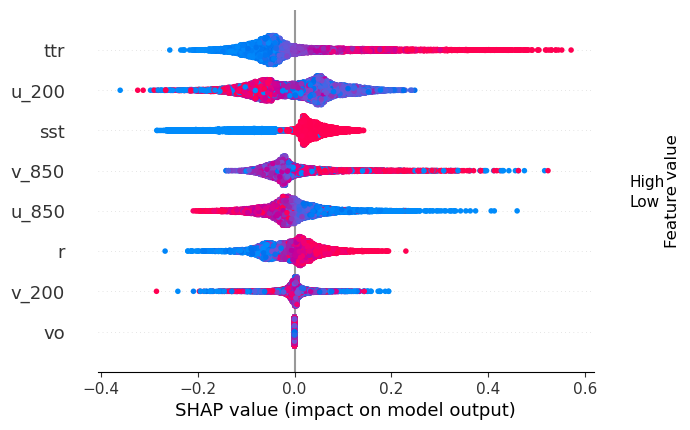

In [45]:
shap.summary_plot(shap_values, max_display=15, show=False)


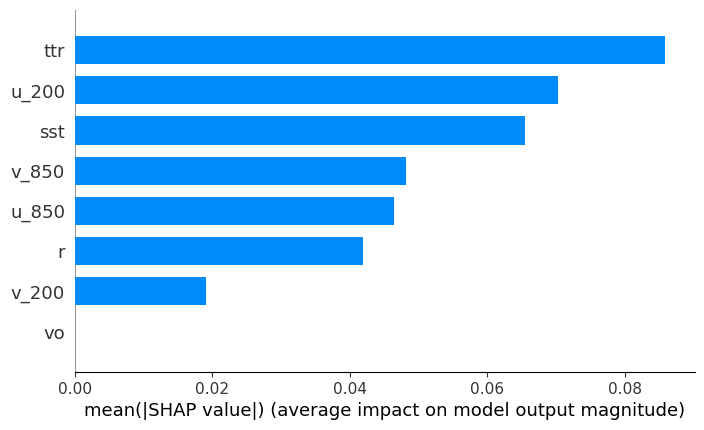

In [46]:
shap.summary_plot(shap_values, max_display=15, show=False, plot_type='bar')
